In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, MeanAbsolutePercentageError
from sklearn import preprocessing

#from keras import regularizers
#from keras.layers import Dense

Using TensorFlow backend.


In [6]:
df = pd.read_csv('Heston_data_input')
X = df.drop(['C_price'], axis=1)
y = df[['C_price']]
#X = df[['k','T','C_price']]
#y = df[['v0','rho','kappa','theta','sigma']]

In [7]:
df['C_price'].describe()

count    1294.000000
mean        0.256979
std         0.146909
min         0.001106
25%         0.102825
50%         0.290283
75%         0.375185
max         0.499173
Name: C_price, dtype: float64

In [8]:
y

C_price
0     0.381700
1     0.381703
2     0.381706
3     0.381709
4     0.381712
...        ...
1289  0.060526
1290  0.060707
1291  0.060890
1292  0.061073
1293  0.061256

[1294 rows x 1 columns]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)
input_scaler = preprocessing.MinMaxScaler()
output_scaler = preprocessing.MinMaxScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
#y_train_scaled = output_scaler.fit_transform(y_train)
y_train_scaled = y_train
#X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],1) # for lstm
X_test_scaled = input_scaler.transform(X_test)
y_test_scaled = y_test

In [16]:
# parameters
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
num_epochs = 50000
#num_epochs = 30000
#num_epochs = 20000
#num_epochs = 10000
#num_epochs = 5000
num_neurons = 128
num_sigmoid = 8
batch_size = 512

# design the neural network model
model = Sequential()
model.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(output_dim, activation='relu')) # Output layer

# define the loss function and optimization algorithm
#opt = keras.optimizers.Adam(learning_rate = 0.0005)
opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss=MeanSquaredError(), optimizer=keras.optimizers.Adam(learning_rate = 0.0001), metrics=['mse']) # MeanAbsoluteError
#model.compile(loss=MeanAbsolutePercentageError(), optimizer=keras.optimizers.Adam(learning_rate = 0.01), metrics=['mse']) # MeanAbsoluteError
#model.compile(loss=keras.losses.MeanAbsolutePercentageError(), optimizer=opt, metrics=['mse'])

# ft the model on the training dataset
history = model.fit(X_train_scaled, y_train_scaled, epochs=num_epochs, batch_size=256, verbose=1, validation_split = 0.2)
# make predictions for the input data
y_predict_scaled = model.predict(X_test_scaled)


Epoch 1/50000
4/4 [==============================] - 0s 70ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 2/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 3/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 4/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 5/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.0836 - val_mse: 0.0836
Epoch 6/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 7/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0810 - val_mse: 0.0810
Epoch 8/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0846 - 

Epoch 63/50000
4/4 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 64/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 65/50000
4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 66/50000
4/4 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 67/50000
4/4 [==============================] - 0s 9ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0012
Epoch 68/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.7831e-04 - mse: 9.6728e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 69/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.5602e-04 - mse: 9.4506e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 70/50000
4/4 [==============================] - 0s 6ms

4/4 [==============================] - 0s 7ms/step - loss: 2.4225e-04 - mse: 2.3104e-04 - val_loss: 2.6308e-04 - val_mse: 2.5183e-04
Epoch 120/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.4201e-04 - mse: 2.3083e-04 - val_loss: 2.5261e-04 - val_mse: 2.4134e-04
Epoch 121/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3633e-04 - mse: 2.2510e-04 - val_loss: 2.4152e-04 - val_mse: 2.3027e-04
Epoch 122/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3646e-04 - mse: 2.2529e-04 - val_loss: 2.5379e-04 - val_mse: 2.4251e-04
Epoch 123/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2950e-04 - mse: 2.1828e-04 - val_loss: 2.4076e-04 - val_mse: 2.2956e-04
Epoch 124/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2768e-04 - mse: 2.1652e-04 - val_loss: 2.3605e-04 - val_mse: 2.2477e-04
Epoch 125/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1917e-04 - mse: 2.0797e-04 - val_loss: 2.3083

4/4 [==============================] - 0s 6ms/step - loss: 1.0173e-04 - mse: 9.0522e-05 - val_loss: 1.1910e-04 - val_mse: 1.0776e-04
Epoch 175/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0007e-04 - mse: 8.8854e-05 - val_loss: 1.0972e-04 - val_mse: 9.8455e-05
Epoch 176/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.8517e-05 - mse: 8.7294e-05 - val_loss: 1.0692e-04 - val_mse: 9.5625e-05
Epoch 177/50000
4/4 [==============================] - 0s 9ms/step - loss: 9.8566e-05 - mse: 8.7359e-05 - val_loss: 1.1372e-04 - val_mse: 1.0239e-04
Epoch 178/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.7124e-05 - mse: 8.5884e-05 - val_loss: 1.0821e-04 - val_mse: 9.6939e-05
Epoch 179/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.5653e-05 - mse: 8.4427e-05 - val_loss: 1.0431e-04 - val_mse: 9.3022e-05
Epoch 180/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.4400e-05 - mse: 8.3196e-05 - val_loss: 1.1763

4/4 [==============================] - 0s 10ms/step - loss: 4.8371e-05 - mse: 3.7170e-05 - val_loss: 5.7266e-05 - val_mse: 4.6035e-05
Epoch 230/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.0141e-05 - mse: 3.8961e-05 - val_loss: 5.5868e-05 - val_mse: 4.4581e-05
Epoch 231/50000
4/4 [==============================] - 0s 13ms/step - loss: 4.9176e-05 - mse: 3.7986e-05 - val_loss: 5.2861e-05 - val_mse: 4.1597e-05
Epoch 232/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.8007e-05 - mse: 3.6807e-05 - val_loss: 5.2918e-05 - val_mse: 4.1679e-05
Epoch 233/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.6747e-05 - mse: 3.5561e-05 - val_loss: 5.2414e-05 - val_mse: 4.1137e-05
Epoch 234/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6100e-05 - mse: 3.4916e-05 - val_loss: 5.0774e-05 - val_mse: 3.9527e-05
Epoch 235/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5200e-05 - mse: 3.4010e-05 - val_loss: 5.

4/4 [==============================] - 0s 8ms/step - loss: 2.9689e-05 - mse: 1.8572e-05 - val_loss: 3.4197e-05 - val_mse: 2.2986e-05
Epoch 285/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9785e-05 - mse: 1.8665e-05 - val_loss: 3.2655e-05 - val_mse: 2.1454e-05
Epoch 286/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8705e-05 - mse: 1.7572e-05 - val_loss: 3.3483e-05 - val_mse: 2.2305e-05
Epoch 287/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8384e-05 - mse: 1.7269e-05 - val_loss: 3.2777e-05 - val_mse: 2.1563e-05
Epoch 288/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9453e-05 - mse: 1.8329e-05 - val_loss: 3.2444e-05 - val_mse: 2.1236e-05
Epoch 289/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8733e-05 - mse: 1.7605e-05 - val_loss: 3.2460e-05 - val_mse: 2.1273e-05
Epoch 290/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8209e-05 - mse: 1.7090e-05 - val_loss: 3.2694

4/4 [==============================] - 0s 9ms/step - loss: 2.1119e-05 - mse: 1.0074e-05 - val_loss: 3.0768e-05 - val_mse: 1.9688e-05
Epoch 340/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2113e-05 - mse: 1.1085e-05 - val_loss: 2.7994e-05 - val_mse: 1.6893e-05
Epoch 341/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0667e-05 - mse: 9.6384e-06 - val_loss: 2.7829e-05 - val_mse: 1.6711e-05
Epoch 342/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.1227e-05 - mse: 1.0201e-05 - val_loss: 2.7937e-05 - val_mse: 1.6813e-05
Epoch 343/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.1293e-05 - mse: 1.0247e-05 - val_loss: 2.8194e-05 - val_mse: 1.7107e-05
Epoch 344/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0939e-05 - mse: 9.9102e-06 - val_loss: 2.8460e-05 - val_mse: 1.7366e-05
Epoch 345/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0608e-05 - mse: 9.5811e-06 - val_loss: 2.7232

4/4 [==============================] - 0s 6ms/step - loss: 1.6585e-05 - mse: 5.6671e-06 - val_loss: 2.6614e-05 - val_mse: 1.5639e-05
Epoch 395/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7073e-05 - mse: 6.1650e-06 - val_loss: 2.5831e-05 - val_mse: 1.4839e-05
Epoch 396/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6981e-05 - mse: 6.0673e-06 - val_loss: 2.5133e-05 - val_mse: 1.4148e-05
Epoch 397/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6915e-05 - mse: 6.0105e-06 - val_loss: 2.5241e-05 - val_mse: 1.4241e-05
Epoch 398/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6967e-05 - mse: 6.0576e-06 - val_loss: 2.5248e-05 - val_mse: 1.4250e-05
Epoch 399/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6576e-05 - mse: 5.6675e-06 - val_loss: 2.4662e-05 - val_mse: 1.3673e-05
Epoch 400/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6410e-05 - mse: 5.5037e-06 - val_loss: 2.4417

4/4 [==============================] - 0s 7ms/step - loss: 1.4920e-05 - mse: 4.1348e-06 - val_loss: 2.3346e-05 - val_mse: 1.2473e-05
Epoch 450/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.4932e-05 - mse: 4.1431e-06 - val_loss: 2.3395e-05 - val_mse: 1.2529e-05
Epoch 451/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.4886e-05 - mse: 4.1042e-06 - val_loss: 2.3803e-05 - val_mse: 1.2936e-05
Epoch 452/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.4885e-05 - mse: 4.1048e-06 - val_loss: 2.3633e-05 - val_mse: 1.2766e-05
Epoch 453/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4864e-05 - mse: 4.0858e-06 - val_loss: 2.3247e-05 - val_mse: 1.2390e-05
Epoch 454/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4627e-05 - mse: 3.8477e-06 - val_loss: 2.3514e-05 - val_mse: 1.2672e-05
Epoch 455/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4882e-05 - mse: 4.1098e-06 - val_loss: 2.522

4/4 [==============================] - 0s 6ms/step - loss: 1.4693e-05 - mse: 4.0427e-06 - val_loss: 2.3627e-05 - val_mse: 1.2874e-05
Epoch 505/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4933e-05 - mse: 4.2806e-06 - val_loss: 2.1792e-05 - val_mse: 1.1059e-05
Epoch 506/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4224e-05 - mse: 3.5768e-06 - val_loss: 2.1954e-05 - val_mse: 1.1221e-05
Epoch 507/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4211e-05 - mse: 3.5669e-06 - val_loss: 2.2609e-05 - val_mse: 1.1876e-05
Epoch 508/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.4302e-05 - mse: 3.6603e-06 - val_loss: 2.2149e-05 - val_mse: 1.1420e-05
Epoch 509/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.4163e-05 - mse: 3.5236e-06 - val_loss: 2.1797e-05 - val_mse: 1.1078e-05
Epoch 510/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.4018e-05 - mse: 3.3829e-06 - val_loss: 2.16

4/4 [==============================] - 0s 7ms/step - loss: 1.3565e-05 - mse: 3.0634e-06 - val_loss: 2.1516e-05 - val_mse: 1.0927e-05
Epoch 560/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3493e-05 - mse: 2.9880e-06 - val_loss: 2.1019e-05 - val_mse: 1.0447e-05
Epoch 561/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3367e-05 - mse: 2.8685e-06 - val_loss: 2.0897e-05 - val_mse: 1.0322e-05
Epoch 562/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3230e-05 - mse: 2.7334e-06 - val_loss: 2.0952e-05 - val_mse: 1.0374e-05
Epoch 563/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3266e-05 - mse: 2.7724e-06 - val_loss: 2.0780e-05 - val_mse: 1.0206e-05
Epoch 564/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3249e-05 - mse: 2.7568e-06 - val_loss: 2.0758e-05 - val_mse: 1.0189e-05
Epoch 565/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3284e-05 - mse: 2.7954e-06 - val_loss: 2.0997

4/4 [==============================] - 0s 7ms/step - loss: 1.4101e-05 - mse: 3.7460e-06 - val_loss: 2.2098e-05 - val_mse: 1.1659e-05
Epoch 615/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3821e-05 - mse: 3.4760e-06 - val_loss: 2.2315e-05 - val_mse: 1.1869e-05
Epoch 616/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4018e-05 - mse: 3.6728e-06 - val_loss: 2.0274e-05 - val_mse: 9.8577e-06
Epoch 617/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3039e-05 - mse: 2.7004e-06 - val_loss: 2.0295e-05 - val_mse: 9.8806e-06
Epoch 618/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2918e-05 - mse: 2.5850e-06 - val_loss: 2.0522e-05 - val_mse: 1.0112e-05
Epoch 619/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2991e-05 - mse: 2.6559e-06 - val_loss: 2.0418e-05 - val_mse: 1.0019e-05
Epoch 620/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2955e-05 - mse: 2.6260e-06 - val_loss: 2.0492

4/4 [==============================] - 0s 6ms/step - loss: 1.2878e-05 - mse: 2.7021e-06 - val_loss: 2.1143e-05 - val_mse: 1.0873e-05
Epoch 670/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3200e-05 - mse: 3.0197e-06 - val_loss: 1.9937e-05 - val_mse: 9.7013e-06
Epoch 671/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2999e-05 - mse: 2.8259e-06 - val_loss: 2.0749e-05 - val_mse: 1.0518e-05
Epoch 672/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3265e-05 - mse: 3.0957e-06 - val_loss: 1.9790e-05 - val_mse: 9.5496e-06
Epoch 673/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2893e-05 - mse: 2.7221e-06 - val_loss: 1.9690e-05 - val_mse: 9.4494e-06
Epoch 674/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2956e-05 - mse: 2.7927e-06 - val_loss: 2.2191e-05 - val_mse: 1.1931e-05
Epoch 675/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3970e-05 - mse: 3.8114e-06 - val_loss: 2.1826

4/4 [==============================] - 0s 6ms/step - loss: 1.2200e-05 - mse: 2.1959e-06 - val_loss: 1.9104e-05 - val_mse: 9.0317e-06
Epoch 725/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2226e-05 - mse: 2.2253e-06 - val_loss: 1.9297e-05 - val_mse: 9.2316e-06
Epoch 726/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2215e-05 - mse: 2.2220e-06 - val_loss: 1.9442e-05 - val_mse: 9.3663e-06
Epoch 727/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2379e-05 - mse: 2.3867e-06 - val_loss: 1.8981e-05 - val_mse: 8.9241e-06
Epoch 728/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2346e-05 - mse: 2.3576e-06 - val_loss: 1.9546e-05 - val_mse: 9.4981e-06
Epoch 729/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2300e-05 - mse: 2.3164e-06 - val_loss: 1.9345e-05 - val_mse: 9.2842e-06
Epoch 730/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2373e-05 - mse: 2.3897e-06 - val_loss: 1.9747

4/4 [==============================] - 0s 6ms/step - loss: 1.1817e-05 - mse: 2.0060e-06 - val_loss: 1.8514e-05 - val_mse: 8.6327e-06
Epoch 780/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1817e-05 - mse: 2.0087e-06 - val_loss: 1.9347e-05 - val_mse: 9.4775e-06
Epoch 781/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2223e-05 - mse: 2.4158e-06 - val_loss: 1.8750e-05 - val_mse: 8.8843e-06
Epoch 782/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2106e-05 - mse: 2.3040e-06 - val_loss: 1.8967e-05 - val_mse: 9.0864e-06
Epoch 783/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1916e-05 - mse: 2.1176e-06 - val_loss: 1.8808e-05 - val_mse: 8.9372e-06
Epoch 784/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1803e-05 - mse: 2.0065e-06 - val_loss: 1.9131e-05 - val_mse: 9.2586e-06
Epoch 785/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2133e-05 - mse: 2.3402e-06 - val_loss: 1.8587

4/4 [==============================] - 0s 6ms/step - loss: 1.1630e-05 - mse: 2.0006e-06 - val_loss: 1.8116e-05 - val_mse: 8.4168e-06
Epoch 835/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1617e-05 - mse: 1.9936e-06 - val_loss: 1.7991e-05 - val_mse: 8.3108e-06
Epoch 836/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2077e-05 - mse: 2.4579e-06 - val_loss: 1.8273e-05 - val_mse: 8.5999e-06
Epoch 837/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2217e-05 - mse: 2.6038e-06 - val_loss: 1.8489e-05 - val_mse: 8.7998e-06
Epoch 838/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1721e-05 - mse: 2.1069e-06 - val_loss: 1.7812e-05 - val_mse: 8.1364e-06
Epoch 839/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1555e-05 - mse: 1.9451e-06 - val_loss: 1.9439e-05 - val_mse: 9.7524e-06
Epoch 840/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2285e-05 - mse: 2.6809e-06 - val_loss: 1.8740

4/4 [==============================] - 0s 6ms/step - loss: 1.2057e-05 - mse: 2.6258e-06 - val_loss: 1.7658e-05 - val_mse: 8.1608e-06
Epoch 890/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1785e-05 - mse: 2.3590e-06 - val_loss: 1.8305e-05 - val_mse: 8.8020e-06
Epoch 891/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1738e-05 - mse: 2.3145e-06 - val_loss: 1.7868e-05 - val_mse: 8.3884e-06
Epoch 892/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1312e-05 - mse: 1.8936e-06 - val_loss: 1.7930e-05 - val_mse: 8.4570e-06
Epoch 893/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1508e-05 - mse: 2.0922e-06 - val_loss: 1.7614e-05 - val_mse: 8.1436e-06
Epoch 894/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1422e-05 - mse: 2.0091e-06 - val_loss: 1.7466e-05 - val_mse: 7.9875e-06
Epoch 895/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1243e-05 - mse: 1.8329e-06 - val_loss: 1.7574

4/4 [==============================] - 0s 6ms/step - loss: 1.1807e-05 - mse: 2.5686e-06 - val_loss: 1.8367e-05 - val_mse: 9.0614e-06
Epoch 945/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2311e-05 - mse: 3.0742e-06 - val_loss: 1.7573e-05 - val_mse: 8.2658e-06
Epoch 946/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1609e-05 - mse: 2.3718e-06 - val_loss: 1.7415e-05 - val_mse: 8.1219e-06
Epoch 947/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1575e-05 - mse: 2.3425e-06 - val_loss: 1.7742e-05 - val_mse: 8.4628e-06
Epoch 948/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1340e-05 - mse: 2.1150e-06 - val_loss: 1.7830e-05 - val_mse: 8.5309e-06
Epoch 949/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1376e-05 - mse: 2.1515e-06 - val_loss: 1.7687e-05 - val_mse: 8.3944e-06
Epoch 950/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1397e-05 - mse: 2.1752e-06 - val_loss: 1.8564

4/4 [==============================] - 0s 6ms/step - loss: 1.1052e-05 - mse: 2.0019e-06 - val_loss: 1.6519e-05 - val_mse: 7.4178e-06
Epoch 1000/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1071e-05 - mse: 2.0247e-06 - val_loss: 1.7045e-05 - val_mse: 7.9300e-06
Epoch 1001/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0990e-05 - mse: 1.9449e-06 - val_loss: 1.7274e-05 - val_mse: 8.1904e-06
Epoch 1002/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1159e-05 - mse: 2.1224e-06 - val_loss: 1.6753e-05 - val_mse: 7.6575e-06
Epoch 1003/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0973e-05 - mse: 1.9402e-06 - val_loss: 1.7463e-05 - val_mse: 8.3593e-06
Epoch 1004/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0923e-05 - mse: 1.8912e-06 - val_loss: 1.6506e-05 - val_mse: 7.4194e-06
Epoch 1005/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0622e-05 - mse: 1.5956e-06 - val_loss: 

Epoch 1054/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2125e-05 - mse: 3.2712e-06 - val_loss: 2.0374e-05 - val_mse: 1.1433e-05
Epoch 1055/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2571e-05 - mse: 3.7155e-06 - val_loss: 1.7481e-05 - val_mse: 8.5952e-06
Epoch 1056/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1641e-05 - mse: 2.7933e-06 - val_loss: 1.6089e-05 - val_mse: 7.1845e-06
Epoch 1057/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1027e-05 - mse: 2.1836e-06 - val_loss: 1.6536e-05 - val_mse: 7.6327e-06
Epoch 1058/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0659e-05 - mse: 1.8196e-06 - val_loss: 1.6755e-05 - val_mse: 7.8721e-06
Epoch 1059/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0640e-05 - mse: 1.8070e-06 - val_loss: 1.6934e-05 - val_mse: 8.0336e-06
Epoch 1060/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0623e-05 - mse: 1.7887

4/4 [==============================] - 0s 6ms/step - loss: 1.0394e-05 - mse: 1.7215e-06 - val_loss: 1.6163e-05 - val_mse: 7.4315e-06
Epoch 1109/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0440e-05 - mse: 1.7694e-06 - val_loss: 1.7316e-05 - val_mse: 8.6173e-06
Epoch 1110/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0915e-05 - mse: 2.2537e-06 - val_loss: 1.7779e-05 - val_mse: 9.0481e-06
Epoch 1111/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1149e-05 - mse: 2.4880e-06 - val_loss: 1.9479e-05 - val_mse: 1.0788e-05
Epoch 1112/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2338e-05 - mse: 3.6846e-06 - val_loss: 1.8460e-05 - val_mse: 9.7275e-06
Epoch 1113/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1858e-05 - mse: 3.2007e-06 - val_loss: 1.9881e-05 - val_mse: 1.1193e-05
Epoch 1114/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3193e-05 - mse: 4.5407e-06 - val_loss: 

Epoch 1163/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0251e-05 - mse: 1.7702e-06 - val_loss: 1.5880e-05 - val_mse: 7.3425e-06
Epoch 1164/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0141e-05 - mse: 1.6629e-06 - val_loss: 1.5683e-05 - val_mse: 7.1528e-06
Epoch 1165/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0252e-05 - mse: 1.7775e-06 - val_loss: 1.5433e-05 - val_mse: 6.9139e-06
Epoch 1166/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.9885e-06 - mse: 1.5176e-06 - val_loss: 1.5553e-05 - val_mse: 7.0400e-06
Epoch 1167/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0021e-05 - mse: 1.5547e-06 - val_loss: 1.5748e-05 - val_mse: 7.2245e-06
Epoch 1168/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0076e-05 - mse: 1.6103e-06 - val_loss: 1.5740e-05 - val_mse: 7.2253e-06
Epoch 1169/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0076e-05 - mse: 1.6131

4/4 [==============================] - 0s 6ms/step - loss: 1.0210e-05 - mse: 1.9044e-06 - val_loss: 1.6691e-05 - val_mse: 8.3534e-06
Epoch 1218/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0527e-05 - mse: 2.2268e-06 - val_loss: 1.6359e-05 - val_mse: 8.0015e-06
Epoch 1219/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0292e-05 - mse: 1.9910e-06 - val_loss: 1.5831e-05 - val_mse: 7.4973e-06
Epoch 1220/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0228e-05 - mse: 1.9358e-06 - val_loss: 1.5202e-05 - val_mse: 6.8675e-06
Epoch 1221/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0327e-05 - mse: 2.0408e-06 - val_loss: 1.5564e-05 - val_mse: 7.2255e-06
Epoch 1222/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0453e-05 - mse: 2.1673e-06 - val_loss: 1.6697e-05 - val_mse: 8.3480e-06
Epoch 1223/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0277e-05 - mse: 1.9912e-06 - val_loss: 

Epoch 1272/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6929e-06 - mse: 1.5702e-06 - val_loss: 1.5406e-05 - val_mse: 7.2412e-06
Epoch 1273/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.9707e-06 - mse: 1.8511e-06 - val_loss: 1.4998e-05 - val_mse: 6.8440e-06
Epoch 1274/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0357e-05 - mse: 2.2447e-06 - val_loss: 1.5366e-05 - val_mse: 7.1973e-06
Epoch 1275/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0787e-05 - mse: 2.6747e-06 - val_loss: 1.5864e-05 - val_mse: 7.7100e-06
Epoch 1276/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0832e-05 - mse: 2.7238e-06 - val_loss: 1.5000e-05 - val_mse: 6.8462e-06
Epoch 1277/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.9661e-06 - mse: 1.8597e-06 - val_loss: 1.5131e-05 - val_mse: 6.9913e-06
Epoch 1278/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.8051e-06 - mse: 1.7066

4/4 [==============================] - 0s 6ms/step - loss: 9.4372e-06 - mse: 1.4897e-06 - val_loss: 1.4773e-05 - val_mse: 6.7867e-06
Epoch 1327/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.4330e-06 - mse: 1.4882e-06 - val_loss: 1.4658e-05 - val_mse: 6.6782e-06
Epoch 1328/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.4707e-06 - mse: 1.5301e-06 - val_loss: 1.4704e-05 - val_mse: 6.7196e-06
Epoch 1329/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.4622e-06 - mse: 1.5239e-06 - val_loss: 1.4847e-05 - val_mse: 6.8656e-06
Epoch 1330/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.5362e-06 - mse: 1.5994e-06 - val_loss: 1.5159e-05 - val_mse: 7.1725e-06
Epoch 1331/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.7283e-06 - mse: 1.7924e-06 - val_loss: 1.4958e-05 - val_mse: 6.9807e-06
Epoch 1332/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.7030e-06 - mse: 1.7709e-06 - val_loss: 

Epoch 1381/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.2862e-06 - mse: 1.5163e-06 - val_loss: 1.4376e-05 - val_mse: 6.5758e-06
Epoch 1382/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3469e-06 - mse: 1.5824e-06 - val_loss: 1.4882e-05 - val_mse: 7.0704e-06
Epoch 1383/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.5796e-06 - mse: 1.8159e-06 - val_loss: 1.4805e-05 - val_mse: 7.0120e-06
Epoch 1384/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.3886e-06 - mse: 1.6304e-06 - val_loss: 1.4382e-05 - val_mse: 6.5844e-06
Epoch 1385/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.0877e-06 - mse: 1.3312e-06 - val_loss: 1.4391e-05 - val_mse: 6.5925e-06
Epoch 1386/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.0830e-06 - mse: 1.3287e-06 - val_loss: 1.4358e-05 - val_mse: 6.5647e-06
Epoch 1387/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.0766e-06 - mse: 1.3255

4/4 [==============================] - 0s 6ms/step - loss: 9.8408e-06 - mse: 2.2635e-06 - val_loss: 1.4908e-05 - val_mse: 7.2937e-06
Epoch 1436/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.6857e-06 - mse: 2.1106e-06 - val_loss: 1.4256e-05 - val_mse: 6.6520e-06
Epoch 1437/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.4942e-06 - mse: 1.9267e-06 - val_loss: 1.5147e-05 - val_mse: 7.5467e-06
Epoch 1438/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.5238e-06 - mse: 1.9562e-06 - val_loss: 1.4357e-05 - val_mse: 6.7599e-06
Epoch 1439/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.4701e-06 - mse: 1.9028e-06 - val_loss: 1.4867e-05 - val_mse: 7.2600e-06
Epoch 1440/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.2727e-06 - mse: 1.7107e-06 - val_loss: 1.4058e-05 - val_mse: 6.4611e-06
Epoch 1441/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1033e-06 - mse: 1.5457e-06 - val_loss: 

Epoch 1490/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.8043e-06 - mse: 1.3748e-06 - val_loss: 1.3865e-05 - val_mse: 6.4052e-06
Epoch 1491/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7498e-06 - mse: 1.3220e-06 - val_loss: 1.3943e-05 - val_mse: 6.4822e-06
Epoch 1492/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7476e-06 - mse: 1.3233e-06 - val_loss: 1.3960e-05 - val_mse: 6.5118e-06
Epoch 1493/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.8511e-06 - mse: 1.4319e-06 - val_loss: 1.4185e-05 - val_mse: 6.7262e-06
Epoch 1494/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7886e-06 - mse: 1.3697e-06 - val_loss: 1.3985e-05 - val_mse: 6.5309e-06
Epoch 1495/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7171e-06 - mse: 1.3009e-06 - val_loss: 1.3843e-05 - val_mse: 6.3940e-06
Epoch 1496/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7069e-06 - mse: 1.2924

4/4 [==============================] - 0s 6ms/step - loss: 8.9903e-06 - mse: 1.7064e-06 - val_loss: 1.4286e-05 - val_mse: 6.9796e-06
Epoch 1545/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.8456e-06 - mse: 1.5656e-06 - val_loss: 1.4363e-05 - val_mse: 7.0428e-06
Epoch 1546/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.9643e-06 - mse: 1.6843e-06 - val_loss: 1.3911e-05 - val_mse: 6.6124e-06
Epoch 1547/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7799e-06 - mse: 1.5058e-06 - val_loss: 1.3578e-05 - val_mse: 6.2737e-06
Epoch 1548/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7589e-06 - mse: 1.4876e-06 - val_loss: 1.3779e-05 - val_mse: 6.4778e-06
Epoch 1549/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.5533e-06 - mse: 1.2840e-06 - val_loss: 1.3883e-05 - val_mse: 6.5777e-06
Epoch 1550/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6495e-06 - mse: 1.3824e-06 - val_loss: 

4/4 [==============================] - 0s 6ms/step - loss: 8.5391e-06 - mse: 1.4049e-06 - val_loss: 1.3484e-05 - val_mse: 6.3171e-06
Epoch 1599/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.5101e-06 - mse: 1.3773e-06 - val_loss: 1.3695e-05 - val_mse: 6.5455e-06
Epoch 1600/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7840e-06 - mse: 1.6573e-06 - val_loss: 1.3890e-05 - val_mse: 6.7251e-06
Epoch 1601/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.6641e-06 - mse: 1.5372e-06 - val_loss: 1.3686e-05 - val_mse: 6.5396e-06
Epoch 1602/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.5620e-06 - mse: 1.4408e-06 - val_loss: 1.4450e-05 - val_mse: 7.2862e-06
Epoch 1603/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.0016e-06 - mse: 1.8791e-06 - val_loss: 1.4334e-05 - val_mse: 7.1935e-06
Epoch 1604/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.1934e-06 - mse: 2.0774e-06 - val_loss: 

Epoch 1653/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4904e-06 - mse: 1.5095e-06 - val_loss: 1.3718e-05 - val_mse: 6.7007e-06
Epoch 1654/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4188e-06 - mse: 1.4375e-06 - val_loss: 1.3426e-05 - val_mse: 6.4277e-06
Epoch 1655/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3800e-06 - mse: 1.4040e-06 - val_loss: 1.3264e-05 - val_mse: 6.2631e-06
Epoch 1656/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.6473e-06 - mse: 1.6751e-06 - val_loss: 1.3305e-05 - val_mse: 6.3137e-06
Epoch 1657/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4027e-06 - mse: 1.4332e-06 - val_loss: 1.3362e-05 - val_mse: 6.3678e-06
Epoch 1658/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7721e-06 - mse: 1.8050e-06 - val_loss: 1.4414e-05 - val_mse: 7.4054e-06
Epoch 1659/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.3525e-06 - mse: 2.3833

4/4 [==============================] - 0s 6ms/step - loss: 8.2182e-06 - mse: 1.3759e-06 - val_loss: 1.3468e-05 - val_mse: 6.6017e-06
Epoch 1708/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.2541e-06 - mse: 1.4141e-06 - val_loss: 1.3031e-05 - val_mse: 6.1693e-06
Epoch 1709/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.1635e-06 - mse: 1.3258e-06 - val_loss: 1.3049e-05 - val_mse: 6.1891e-06
Epoch 1710/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.1366e-06 - mse: 1.3031e-06 - val_loss: 1.3092e-05 - val_mse: 6.2361e-06
Epoch 1711/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0756e-06 - mse: 1.2450e-06 - val_loss: 1.3191e-05 - val_mse: 6.3345e-06
Epoch 1712/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0426e-06 - mse: 1.2142e-06 - val_loss: 1.3171e-05 - val_mse: 6.3161e-06
Epoch 1713/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0416e-06 - mse: 1.2156e-06 - val_loss: 

Epoch 1762/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.2365e-06 - mse: 2.5276e-06 - val_loss: 1.2928e-05 - val_mse: 6.2039e-06
Epoch 1763/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.5856e-06 - mse: 1.8832e-06 - val_loss: 1.3129e-05 - val_mse: 6.4109e-06
Epoch 1764/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0581e-06 - mse: 1.3586e-06 - val_loss: 1.3281e-05 - val_mse: 6.5550e-06
Epoch 1765/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.1219e-06 - mse: 1.4235e-06 - val_loss: 1.3058e-05 - val_mse: 6.3398e-06
Epoch 1766/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9547e-06 - mse: 1.2585e-06 - val_loss: 1.3019e-05 - val_mse: 6.2983e-06
Epoch 1767/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9076e-06 - mse: 1.2132e-06 - val_loss: 1.2984e-05 - val_mse: 6.2725e-06
Epoch 1768/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9535e-06 - mse: 1.2631

4/4 [==============================] - 0s 6ms/step - loss: 8.6145e-06 - mse: 2.0374e-06 - val_loss: 1.3346e-05 - val_mse: 6.7606e-06
Epoch 1817/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.9833e-06 - mse: 2.4142e-06 - val_loss: 1.3012e-05 - val_mse: 6.4264e-06
Epoch 1818/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0972e-06 - mse: 1.5284e-06 - val_loss: 1.3553e-05 - val_mse: 6.9505e-06
Epoch 1819/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.2066e-06 - mse: 1.6370e-06 - val_loss: 1.3153e-05 - val_mse: 6.5725e-06
Epoch 1820/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0628e-06 - mse: 1.4982e-06 - val_loss: 1.3492e-05 - val_mse: 6.8993e-06
Epoch 1821/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0836e-06 - mse: 1.5192e-06 - val_loss: 1.2785e-05 - val_mse: 6.2027e-06
Epoch 1822/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9275e-06 - mse: 1.3680e-06 - val_loss: 

Epoch 1871/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8698e-06 - mse: 1.4275e-06 - val_loss: 1.2937e-05 - val_mse: 6.4755e-06
Epoch 1872/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7921e-06 - mse: 1.3521e-06 - val_loss: 1.2847e-05 - val_mse: 6.3863e-06
Epoch 1873/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7519e-06 - mse: 1.3140e-06 - val_loss: 1.2944e-05 - val_mse: 6.4884e-06
Epoch 1874/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.2549e-06 - mse: 1.8209e-06 - val_loss: 1.4396e-05 - val_mse: 7.9536e-06
Epoch 1875/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4315e-06 - mse: 1.9989e-06 - val_loss: 1.2459e-05 - val_mse: 6.0059e-06
Epoch 1876/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1237e-06 - mse: 1.6919e-06 - val_loss: 1.2707e-05 - val_mse: 6.2579e-06
Epoch 1877/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3369e-06 - mse: 1.9076

4/4 [==============================] - 0s 6ms/step - loss: 7.6065e-06 - mse: 1.2907e-06 - val_loss: 1.2516e-05 - val_mse: 6.1792e-06
Epoch 1926/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6903e-06 - mse: 1.3746e-06 - val_loss: 1.2190e-05 - val_mse: 5.8579e-06
Epoch 1927/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5424e-06 - mse: 1.2292e-06 - val_loss: 1.2229e-05 - val_mse: 5.9006e-06
Epoch 1928/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4882e-06 - mse: 1.1787e-06 - val_loss: 1.2614e-05 - val_mse: 6.2836e-06
Epoch 1929/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6040e-06 - mse: 1.2942e-06 - val_loss: 1.2438e-05 - val_mse: 6.1115e-06
Epoch 1930/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5181e-06 - mse: 1.2098e-06 - val_loss: 1.2152e-05 - val_mse: 5.8301e-06
Epoch 1931/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5905e-06 - mse: 1.2854e-06 - val_loss: 

Epoch 1980/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5505e-06 - mse: 1.3493e-06 - val_loss: 1.2367e-05 - val_mse: 6.1483e-06
Epoch 1981/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5025e-06 - mse: 1.3030e-06 - val_loss: 1.2671e-05 - val_mse: 6.4703e-06
Epoch 1982/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4349e-06 - mse: 2.2426e-06 - val_loss: 1.1956e-05 - val_mse: 5.7505e-06
Epoch 1983/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5766e-06 - mse: 1.3848e-06 - val_loss: 1.3518e-05 - val_mse: 7.3150e-06
Epoch 1984/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0884e-05 - mse: 4.6964e-06 - val_loss: 1.3099e-05 - val_mse: 6.8905e-06
Epoch 1985/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7333e-06 - mse: 2.5444e-06 - val_loss: 1.2937e-05 - val_mse: 6.7253e-06
Epoch 1986/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9924e-06 - mse: 1.8029

4/4 [==============================] - 0s 6ms/step - loss: 7.6281e-06 - mse: 1.5332e-06 - val_loss: 1.2031e-05 - val_mse: 5.9254e-06
Epoch 2035/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7437e-06 - mse: 1.6500e-06 - val_loss: 1.1809e-05 - val_mse: 5.7087e-06
Epoch 2036/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9868e-06 - mse: 1.8962e-06 - val_loss: 1.2340e-05 - val_mse: 6.2340e-06
Epoch 2037/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8756e-06 - mse: 1.7865e-06 - val_loss: 1.1670e-05 - val_mse: 5.5698e-06
Epoch 2038/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5067e-06 - mse: 1.4224e-06 - val_loss: 1.2169e-05 - val_mse: 6.0684e-06
Epoch 2039/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3610e-06 - mse: 1.2783e-06 - val_loss: 1.2549e-05 - val_mse: 6.4558e-06
Epoch 2040/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4581e-06 - mse: 1.3769e-06 - val_loss: 

Epoch 2089/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3421e-06 - mse: 1.3534e-06 - val_loss: 1.1241e-05 - val_mse: 5.2418e-06
Epoch 2090/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2082e-06 - mse: 1.2232e-06 - val_loss: 1.1171e-05 - val_mse: 5.1777e-06
Epoch 2091/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3018e-06 - mse: 1.3187e-06 - val_loss: 1.1715e-05 - val_mse: 5.7154e-06
Epoch 2092/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5283e-06 - mse: 1.5470e-06 - val_loss: 1.2137e-05 - val_mse: 6.1513e-06
Epoch 2093/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4140e-06 - mse: 1.4363e-06 - val_loss: 1.2139e-05 - val_mse: 6.1376e-06
Epoch 2094/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5539e-06 - mse: 1.5745e-06 - val_loss: 1.1702e-05 - val_mse: 5.7147e-06
Epoch 2095/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2962e-06 - mse: 1.3185

4/4 [==============================] - 0s 6ms/step - loss: 8.5936e-06 - mse: 2.7045e-06 - val_loss: 1.1427e-05 - val_mse: 5.5405e-06
Epoch 2144/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2052e-06 - mse: 1.3214e-06 - val_loss: 1.1786e-05 - val_mse: 5.8832e-06
Epoch 2145/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3929e-06 - mse: 1.5088e-06 - val_loss: 1.2729e-05 - val_mse: 6.8469e-06
Epoch 2146/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9950e-06 - mse: 2.1166e-06 - val_loss: 1.2844e-05 - val_mse: 6.9394e-06
Epoch 2147/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8359e-06 - mse: 1.9554e-06 - val_loss: 1.3028e-05 - val_mse: 7.1537e-06
Epoch 2148/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9994e-06 - mse: 2.1239e-06 - val_loss: 1.2163e-05 - val_mse: 6.2676e-06
Epoch 2149/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3015e-06 - mse: 1.4269e-06 - val_loss: 

Epoch 2198/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1762e-06 - mse: 1.3868e-06 - val_loss: 1.1072e-05 - val_mse: 5.2732e-06
Epoch 2199/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8897e-06 - mse: 1.1018e-06 - val_loss: 1.0933e-05 - val_mse: 5.1412e-06
Epoch 2200/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9689e-06 - mse: 1.1840e-06 - val_loss: 1.0886e-05 - val_mse: 5.0947e-06
Epoch 2201/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8629e-06 - mse: 1.0798e-06 - val_loss: 1.1219e-05 - val_mse: 5.4220e-06
Epoch 2202/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8307e-06 - mse: 1.0487e-06 - val_loss: 1.1335e-05 - val_mse: 5.5440e-06
Epoch 2203/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8827e-06 - mse: 1.1030e-06 - val_loss: 1.0993e-05 - val_mse: 5.2021e-06
Epoch 2204/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.9412e-06 - mse: 1.1618

4/4 [==============================] - 0s 7ms/step - loss: 8.1067e-06 - mse: 2.4055e-06 - val_loss: 1.3074e-05 - val_mse: 7.3823e-06
Epoch 2253/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.4612e-06 - mse: 2.7673e-06 - val_loss: 1.1103e-05 - val_mse: 5.4005e-06
Epoch 2254/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7757e-06 - mse: 2.0781e-06 - val_loss: 1.0765e-05 - val_mse: 5.0614e-06
Epoch 2255/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4576e-06 - mse: 1.7649e-06 - val_loss: 1.1071e-05 - val_mse: 5.3747e-06
Epoch 2256/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2024e-06 - mse: 1.5109e-06 - val_loss: 1.3240e-05 - val_mse: 7.5304e-06
Epoch 2257/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3229e-06 - mse: 2.6325e-06 - val_loss: 1.2899e-05 - val_mse: 7.2049e-06
Epoch 2258/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7505e-06 - mse: 2.0620e-06 - val_loss: 

Epoch 2307/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4344e-06 - mse: 2.8275e-06 - val_loss: 1.2451e-05 - val_mse: 6.8597e-06
Epoch 2308/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7221e-06 - mse: 2.1254e-06 - val_loss: 1.2747e-05 - val_mse: 7.1302e-06
Epoch 2309/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.5799e-06 - mse: 2.9824e-06 - val_loss: 1.2215e-05 - val_mse: 6.6248e-06
Epoch 2310/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6141e-06 - mse: 2.0216e-06 - val_loss: 1.1714e-05 - val_mse: 6.1000e-06
Epoch 2311/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1695e-06 - mse: 1.5740e-06 - val_loss: 1.1116e-05 - val_mse: 5.5182e-06
Epoch 2312/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7510e-06 - mse: 1.1588e-06 - val_loss: 1.0894e-05 - val_mse: 5.2967e-06
Epoch 2313/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5534e-06 - mse: 9.6021

4/4 [==============================] - 0s 6ms/step - loss: 6.4044e-06 - mse: 8.8622e-07 - val_loss: 1.0202e-05 - val_mse: 4.6796e-06
Epoch 2362/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4134e-06 - mse: 8.9624e-07 - val_loss: 9.9291e-06 - val_mse: 4.4091e-06
Epoch 2363/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3517e-06 - mse: 8.3671e-07 - val_loss: 1.0207e-05 - val_mse: 4.6895e-06
Epoch 2364/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4563e-06 - mse: 9.4319e-07 - val_loss: 1.0350e-05 - val_mse: 4.8231e-06
Epoch 2365/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3410e-06 - mse: 8.2675e-07 - val_loss: 1.0188e-05 - val_mse: 4.6722e-06
Epoch 2366/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2635e-06 - mse: 7.5156e-07 - val_loss: 1.0175e-05 - val_mse: 4.6558e-06
Epoch 2367/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2667e-06 - mse: 7.5576e-07 - val_loss: 

Epoch 2416/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3253e-06 - mse: 8.8799e-07 - val_loss: 1.0176e-05 - val_mse: 4.7384e-06
Epoch 2417/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2555e-06 - mse: 8.2082e-07 - val_loss: 9.8571e-06 - val_mse: 4.4157e-06
Epoch 2418/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2842e-06 - mse: 8.4898e-07 - val_loss: 9.8617e-06 - val_mse: 4.4239e-06
Epoch 2419/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.2051e-06 - mse: 7.7258e-07 - val_loss: 1.0042e-05 - val_mse: 4.6107e-06
Epoch 2420/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2105e-06 - mse: 7.8080e-07 - val_loss: 9.8846e-06 - val_mse: 4.4482e-06
Epoch 2421/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2869e-06 - mse: 8.5730e-07 - val_loss: 9.9008e-06 - val_mse: 4.4638e-06
Epoch 2422/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2013e-06 - mse: 7.7397

4/4 [==============================] - 0s 6ms/step - loss: 6.3485e-06 - mse: 9.9710e-07 - val_loss: 9.8122e-06 - val_mse: 4.4560e-06
Epoch 2471/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9841e-06 - mse: 1.6328e-06 - val_loss: 1.0039e-05 - val_mse: 4.6808e-06
Epoch 2472/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6669e-06 - mse: 1.3176e-06 - val_loss: 1.2705e-05 - val_mse: 7.3638e-06
Epoch 2473/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6045e-06 - mse: 2.2602e-06 - val_loss: 1.1478e-05 - val_mse: 6.1136e-06
Epoch 2474/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1924e-06 - mse: 2.8420e-06 - val_loss: 1.2589e-05 - val_mse: 7.2191e-06
Epoch 2475/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2264e-06 - mse: 1.8767e-06 - val_loss: 1.1629e-05 - val_mse: 6.2937e-06
Epoch 2476/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1524e-06 - mse: 1.8080e-06 - val_loss: 

Epoch 2525/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2208e-06 - mse: 9.4931e-07 - val_loss: 9.7470e-06 - val_mse: 4.4772e-06
Epoch 2526/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3832e-06 - mse: 1.1149e-06 - val_loss: 9.8983e-06 - val_mse: 4.6249e-06
Epoch 2527/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2491e-06 - mse: 9.8038e-07 - val_loss: 1.0651e-05 - val_mse: 5.3721e-06
Epoch 2528/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2506e-06 - mse: 9.8288e-07 - val_loss: 1.1251e-05 - val_mse: 5.9871e-06
Epoch 2529/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6500e-06 - mse: 1.3854e-06 - val_loss: 1.1734e-05 - val_mse: 6.4525e-06
Epoch 2530/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1286e-06 - mse: 1.8611e-06 - val_loss: 1.0722e-05 - val_mse: 5.4705e-06
Epoch 2531/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.0117e-06 - mse: 1.7518

4/4 [==============================] - 0s 6ms/step - loss: 5.9410e-06 - mse: 7.4835e-07 - val_loss: 1.0163e-05 - val_mse: 4.9637e-06
Epoch 2580/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9219e-06 - mse: 7.2970e-07 - val_loss: 9.8431e-06 - val_mse: 4.6490e-06
Epoch 2581/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8624e-06 - mse: 6.7159e-07 - val_loss: 9.8354e-06 - val_mse: 4.6409e-06
Epoch 2582/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9888e-06 - mse: 7.9823e-07 - val_loss: 9.7804e-06 - val_mse: 4.5894e-06
Epoch 2583/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8756e-06 - mse: 6.8744e-07 - val_loss: 9.7703e-06 - val_mse: 4.5796e-06
Epoch 2584/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0074e-06 - mse: 8.2137e-07 - val_loss: 1.0090e-05 - val_mse: 4.8982e-06
Epoch 2585/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9023e-06 - mse: 7.1714e-07 - val_loss: 

Epoch 2634/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2122e-06 - mse: 1.0991e-06 - val_loss: 1.0136e-05 - val_mse: 5.0149e-06
Epoch 2635/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9383e-06 - mse: 8.2275e-07 - val_loss: 9.8673e-06 - val_mse: 4.7573e-06
Epoch 2636/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2815e-06 - mse: 1.1699e-06 - val_loss: 9.8851e-06 - val_mse: 4.7721e-06
Epoch 2637/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8591e-06 - mse: 7.4787e-07 - val_loss: 9.9906e-06 - val_mse: 4.8749e-06
Epoch 2638/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9460e-06 - mse: 8.3514e-07 - val_loss: 9.9490e-06 - val_mse: 4.8372e-06
Epoch 2639/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8312e-06 - mse: 7.2332e-07 - val_loss: 1.0325e-05 - val_mse: 5.2241e-06
Epoch 2640/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1476e-06 - mse: 1.0420

4/4 [==============================] - 0s 7ms/step - loss: 6.3707e-06 - mse: 1.3329e-06 - val_loss: 1.0657e-05 - val_mse: 5.6319e-06
Epoch 2689/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3067e-06 - mse: 1.2713e-06 - val_loss: 1.1760e-05 - val_mse: 6.7099e-06
Epoch 2690/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4594e-06 - mse: 2.4210e-06 - val_loss: 1.0574e-05 - val_mse: 5.5478e-06
Epoch 2691/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1050e-06 - mse: 2.0738e-06 - val_loss: 1.0330e-05 - val_mse: 5.2993e-06
Epoch 2692/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1710e-06 - mse: 1.1388e-06 - val_loss: 1.0794e-05 - val_mse: 5.7571e-06
Epoch 2693/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1411e-06 - mse: 1.1098e-06 - val_loss: 1.0709e-05 - val_mse: 5.6831e-06
Epoch 2694/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6745e-06 - mse: 1.6485e-06 - val_loss: 

Epoch 2743/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7486e-06 - mse: 7.8683e-07 - val_loss: 1.0188e-05 - val_mse: 5.2231e-06
Epoch 2744/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6640e-06 - mse: 7.0240e-07 - val_loss: 9.9160e-06 - val_mse: 4.9578e-06
Epoch 2745/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6352e-06 - mse: 6.7561e-07 - val_loss: 9.8143e-06 - val_mse: 4.8561e-06
Epoch 2746/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7496e-06 - mse: 7.9160e-07 - val_loss: 1.0411e-05 - val_mse: 5.4665e-06
Epoch 2747/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1504e-06 - mse: 1.1961e-06 - val_loss: 1.0235e-05 - val_mse: 5.2747e-06
Epoch 2748/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4598e-06 - mse: 1.5042e-06 - val_loss: 1.0295e-05 - val_mse: 5.3382e-06
Epoch 2749/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0292e-06 - mse: 1.0764

4/4 [==============================] - 0s 6ms/step - loss: 5.6269e-06 - mse: 7.3381e-07 - val_loss: 9.9058e-06 - val_mse: 5.0161e-06
Epoch 2798/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7443e-06 - mse: 8.5349e-07 - val_loss: 9.9577e-06 - val_mse: 5.0693e-06
Epoch 2799/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6303e-06 - mse: 7.3988e-07 - val_loss: 9.8516e-06 - val_mse: 4.9621e-06
Epoch 2800/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6091e-06 - mse: 7.1931e-07 - val_loss: 9.7441e-06 - val_mse: 4.8569e-06
Epoch 2801/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5852e-06 - mse: 6.9610e-07 - val_loss: 9.8157e-06 - val_mse: 4.9296e-06
Epoch 2802/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5411e-06 - mse: 6.5396e-07 - val_loss: 9.9476e-06 - val_mse: 5.0677e-06
Epoch 2803/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5897e-06 - mse: 7.0492e-07 - val_loss: 

Epoch 2852/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5401e-06 - mse: 7.1687e-07 - val_loss: 1.0408e-05 - val_mse: 5.5811e-06
Epoch 2853/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6896e-06 - mse: 8.6651e-07 - val_loss: 1.0019e-05 - val_mse: 5.2007e-06
Epoch 2854/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5031e-06 - mse: 6.8243e-07 - val_loss: 9.9163e-06 - val_mse: 5.0992e-06
Epoch 2855/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6271e-06 - mse: 8.0728e-07 - val_loss: 1.0616e-05 - val_mse: 5.7907e-06
Epoch 2856/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7324e-06 - mse: 9.1220e-07 - val_loss: 9.9657e-06 - val_mse: 5.1530e-06
Epoch 2857/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7409e-06 - mse: 9.2436e-07 - val_loss: 1.0601e-05 - val_mse: 5.7938e-06
Epoch 2858/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8075e-06 - mse: 9.9193

4/4 [==============================] - 0s 6ms/step - loss: 5.6370e-06 - mse: 8.7925e-07 - val_loss: 1.0264e-05 - val_mse: 5.5146e-06
Epoch 2907/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5754e-06 - mse: 8.1939e-07 - val_loss: 1.0277e-05 - val_mse: 5.5202e-06
Epoch 2908/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5044e-06 - mse: 7.4817e-07 - val_loss: 1.0226e-05 - val_mse: 5.4701e-06
Epoch 2909/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5981e-06 - mse: 8.4226e-07 - val_loss: 9.8700e-06 - val_mse: 5.1209e-06
Epoch 2910/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6347e-06 - mse: 8.8066e-07 - val_loss: 9.8963e-06 - val_mse: 5.1494e-06
Epoch 2911/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4179e-06 - mse: 6.6564e-07 - val_loss: 1.0051e-05 - val_mse: 5.3022e-06
Epoch 2912/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.4449e-06 - mse: 6.9418e-07 - val_loss: 

Epoch 2961/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.2908e-06 - mse: 5.9560e-07 - val_loss: 1.0173e-05 - val_mse: 5.4843e-06
Epoch 2962/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3336e-06 - mse: 6.3970e-07 - val_loss: 1.0103e-05 - val_mse: 5.4126e-06
Epoch 2963/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3271e-06 - mse: 6.3362e-07 - val_loss: 1.0104e-05 - val_mse: 5.4195e-06
Epoch 2964/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3360e-06 - mse: 6.4459e-07 - val_loss: 1.0202e-05 - val_mse: 5.5125e-06
Epoch 2965/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3876e-06 - mse: 6.9724e-07 - val_loss: 1.0211e-05 - val_mse: 5.5285e-06
Epoch 2966/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.4069e-06 - mse: 7.1789e-07 - val_loss: 1.0882e-05 - val_mse: 6.1883e-06
Epoch 2967/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6375e-06 - mse: 9.4774

4/4 [==============================] - 0s 6ms/step - loss: 5.6906e-06 - mse: 1.0598e-06 - val_loss: 1.0222e-05 - val_mse: 5.5936e-06
Epoch 3016/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3021e-06 - mse: 6.7112e-07 - val_loss: 1.0466e-05 - val_mse: 5.8460e-06
Epoch 3017/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3993e-06 - mse: 7.7127e-07 - val_loss: 1.0482e-05 - val_mse: 5.8539e-06
Epoch 3018/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9354e-06 - mse: 1.3064e-06 - val_loss: 1.1066e-05 - val_mse: 6.4376e-06
Epoch 3019/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6118e-06 - mse: 9.8458e-07 - val_loss: 1.0676e-05 - val_mse: 6.0580e-06
Epoch 3020/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5542e-06 - mse: 9.3083e-07 - val_loss: 1.0662e-05 - val_mse: 6.0379e-06
Epoch 3021/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6093e-06 - mse: 9.8450e-07 - val_loss: 

Epoch 3070/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3473e-06 - mse: 7.7976e-07 - val_loss: 1.0674e-05 - val_mse: 6.1132e-06
Epoch 3071/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1967e-06 - mse: 6.2985e-07 - val_loss: 1.0733e-05 - val_mse: 6.1702e-06
Epoch 3072/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2490e-06 - mse: 6.8262e-07 - val_loss: 1.0374e-05 - val_mse: 5.8186e-06
Epoch 3073/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.2703e-06 - mse: 7.0625e-07 - val_loss: 1.0632e-05 - val_mse: 6.0717e-06
Epoch 3074/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4562e-06 - mse: 8.9219e-07 - val_loss: 1.0371e-05 - val_mse: 5.8180e-06
Epoch 3075/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3254e-06 - mse: 7.6386e-07 - val_loss: 1.0458e-05 - val_mse: 5.8972e-06
Epoch 3076/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.2564e-06 - mse: 6.9376

4/4 [==============================] - 0s 6ms/step - loss: 5.3457e-06 - mse: 8.3471e-07 - val_loss: 1.1303e-05 - val_mse: 6.8030e-06
Epoch 3125/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6676e-06 - mse: 1.1590e-06 - val_loss: 1.0947e-05 - val_mse: 6.4390e-06
Epoch 3126/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4264e-06 - mse: 9.1547e-07 - val_loss: 1.0439e-05 - val_mse: 5.9334e-06
Epoch 3127/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1482e-06 - mse: 6.3825e-07 - val_loss: 1.0443e-05 - val_mse: 5.9411e-06
Epoch 3128/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1419e-06 - mse: 6.3360e-07 - val_loss: 1.0210e-05 - val_mse: 5.7114e-06
Epoch 3129/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0971e-06 - mse: 5.9062e-07 - val_loss: 1.0292e-05 - val_mse: 5.7891e-06
Epoch 3130/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1506e-06 - mse: 6.4450e-07 - val_loss: 

Epoch 3179/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0807e-06 - mse: 6.2853e-07 - val_loss: 1.0061e-05 - val_mse: 5.6147e-06
Epoch 3180/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1816e-06 - mse: 7.2998e-07 - val_loss: 1.0449e-05 - val_mse: 6.0044e-06
Epoch 3181/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1091e-06 - mse: 6.5933e-07 - val_loss: 1.0399e-05 - val_mse: 5.9597e-06
Epoch 3182/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0573e-06 - mse: 6.0870e-07 - val_loss: 1.0459e-05 - val_mse: 6.0136e-06
Epoch 3183/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.0914e-06 - mse: 6.4246e-07 - val_loss: 1.0326e-05 - val_mse: 5.8900e-06
Epoch 3184/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.0141e-06 - mse: 5.6760e-07 - val_loss: 1.0104e-05 - val_mse: 5.6660e-06
Epoch 3185/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9857e-06 - mse: 5.4038

4/4 [==============================] - 0s 7ms/step - loss: 4.9124e-06 - mse: 5.1435e-07 - val_loss: 1.0288e-05 - val_mse: 5.8996e-06
Epoch 3234/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0388e-06 - mse: 6.4256e-07 - val_loss: 1.0227e-05 - val_mse: 5.8368e-06
Epoch 3235/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.0555e-06 - mse: 6.5873e-07 - val_loss: 1.0150e-05 - val_mse: 5.7610e-06
Epoch 3236/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0894e-06 - mse: 6.9339e-07 - val_loss: 1.1354e-05 - val_mse: 6.9715e-06
Epoch 3237/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3945e-06 - mse: 1.0015e-06 - val_loss: 1.0337e-05 - val_mse: 5.9466e-06
Epoch 3238/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5124e-06 - mse: 1.1171e-06 - val_loss: 1.0088e-05 - val_mse: 5.7065e-06
Epoch 3239/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3460e-06 - mse: 9.5354e-07 - val_loss: 

Epoch 3288/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.2111e-06 - mse: 8.6455e-07 - val_loss: 1.0782e-05 - val_mse: 6.4530e-06
Epoch 3289/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5684e-06 - mse: 1.2257e-06 - val_loss: 1.0626e-05 - val_mse: 6.2860e-06
Epoch 3290/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7374e-06 - mse: 1.3923e-06 - val_loss: 1.0693e-05 - val_mse: 6.3612e-06
Epoch 3291/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3994e-06 - mse: 1.0582e-06 - val_loss: 1.0461e-05 - val_mse: 6.1300e-06
Epoch 3292/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9997e-06 - mse: 6.5799e-07 - val_loss: 1.0539e-05 - val_mse: 6.2012e-06
Epoch 3293/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0908e-06 - mse: 7.4939e-07 - val_loss: 1.0450e-05 - val_mse: 6.1266e-06
Epoch 3294/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.4481e-06 - mse: 1.1101

4/4 [==============================] - 0s 6ms/step - loss: 6.6284e-06 - mse: 2.3370e-06 - val_loss: 9.8314e-06 - val_mse: 5.5530e-06
Epoch 3343/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8591e-06 - mse: 1.5657e-06 - val_loss: 1.1224e-05 - val_mse: 6.9352e-06
Epoch 3344/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5618e-06 - mse: 1.2707e-06 - val_loss: 1.1144e-05 - val_mse: 6.8730e-06
Epoch 3345/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6532e-06 - mse: 1.3664e-06 - val_loss: 1.0736e-05 - val_mse: 6.4578e-06
Epoch 3346/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.2286e-06 - mse: 9.4147e-07 - val_loss: 1.0584e-05 - val_mse: 6.3083e-06
Epoch 3347/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1465e-06 - mse: 8.6097e-07 - val_loss: 1.1377e-05 - val_mse: 7.1012e-06
Epoch 3348/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1627e-06 - mse: 8.7660e-07 - val_loss: 

Epoch 3397/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9925e-06 - mse: 7.5058e-07 - val_loss: 1.0258e-05 - val_mse: 6.0289e-06
Epoch 3398/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8223e-06 - mse: 5.8135e-07 - val_loss: 9.9712e-06 - val_mse: 5.7397e-06
Epoch 3399/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8114e-06 - mse: 5.7073e-07 - val_loss: 1.0222e-05 - val_mse: 5.9953e-06
Epoch 3400/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8000e-06 - mse: 5.6132e-07 - val_loss: 1.0278e-05 - val_mse: 6.0442e-06
Epoch 3401/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3513e-06 - mse: 1.1117e-06 - val_loss: 1.0160e-05 - val_mse: 5.9356e-06
Epoch 3402/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1470e-06 - mse: 9.1038e-07 - val_loss: 1.0037e-05 - val_mse: 5.8106e-06
Epoch 3403/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9114e-06 - mse: 6.7516

4/4 [==============================] - 0s 6ms/step - loss: 5.6472e-06 - mse: 1.4569e-06 - val_loss: 1.0705e-05 - val_mse: 6.5169e-06
Epoch 3452/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6822e-06 - mse: 1.4890e-06 - val_loss: 1.0778e-05 - val_mse: 6.5988e-06
Epoch 3453/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3415e-06 - mse: 1.1519e-06 - val_loss: 1.0534e-05 - val_mse: 6.3537e-06
Epoch 3454/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1736e-06 - mse: 9.8365e-07 - val_loss: 1.0823e-05 - val_mse: 6.6405e-06
Epoch 3455/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9073e-06 - mse: 7.1851e-07 - val_loss: 1.0612e-05 - val_mse: 6.4416e-06
Epoch 3456/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9708e-06 - mse: 7.8416e-07 - val_loss: 1.1401e-05 - val_mse: 7.2156e-06
Epoch 3457/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1890e-06 - mse: 2.0002e-06 - val_loss: 

Epoch 3506/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1247e-06 - mse: 9.8042e-07 - val_loss: 1.0036e-05 - val_mse: 5.9000e-06
Epoch 3507/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0227e-06 - mse: 8.7732e-07 - val_loss: 1.0303e-05 - val_mse: 6.1686e-06
Epoch 3508/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0572e-06 - mse: 9.1419e-07 - val_loss: 1.1391e-05 - val_mse: 7.2626e-06
Epoch 3509/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1484e-06 - mse: 1.0062e-06 - val_loss: 1.0333e-05 - val_mse: 6.1969e-06
Epoch 3510/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2100e-06 - mse: 1.0659e-06 - val_loss: 1.0216e-05 - val_mse: 6.0882e-06
Epoch 3511/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2134e-06 - mse: 2.0711e-06 - val_loss: 1.2101e-05 - val_mse: 7.9776e-06
Epoch 3512/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2209e-06 - mse: 3.0787

4/4 [==============================] - 0s 6ms/step - loss: 4.6651e-06 - mse: 5.6469e-07 - val_loss: 1.0349e-05 - val_mse: 6.2651e-06
Epoch 3561/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8114e-06 - mse: 7.1253e-07 - val_loss: 1.0124e-05 - val_mse: 6.0319e-06
Epoch 3562/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1311e-06 - mse: 1.0315e-06 - val_loss: 1.0076e-05 - val_mse: 5.9948e-06
Epoch 3563/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.2240e-06 - mse: 1.1278e-06 - val_loss: 9.9103e-06 - val_mse: 5.8253e-06
Epoch 3564/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8088e-06 - mse: 7.1157e-07 - val_loss: 9.9859e-06 - val_mse: 5.9001e-06
Epoch 3565/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7386e-06 - mse: 6.4127e-07 - val_loss: 9.8373e-06 - val_mse: 5.7557e-06
Epoch 3566/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6530e-06 - mse: 5.5783e-07 - val_loss: 

Epoch 3615/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6086e-06 - mse: 5.5316e-07 - val_loss: 9.6964e-06 - val_mse: 5.6554e-06
Epoch 3616/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5646e-06 - mse: 5.0992e-07 - val_loss: 9.6856e-06 - val_mse: 5.6446e-06
Epoch 3617/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5974e-06 - mse: 5.4397e-07 - val_loss: 9.9317e-06 - val_mse: 5.8925e-06
Epoch 3618/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5635e-06 - mse: 5.1082e-07 - val_loss: 9.8212e-06 - val_mse: 5.7799e-06
Epoch 3619/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5485e-06 - mse: 4.9627e-07 - val_loss: 9.7549e-06 - val_mse: 5.7157e-06
Epoch 3620/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5400e-06 - mse: 4.8843e-07 - val_loss: 9.7494e-06 - val_mse: 5.7095e-06
Epoch 3621/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7086e-06 - mse: 6.5720

4/4 [==============================] - 0s 6ms/step - loss: 4.7115e-06 - mse: 6.9986e-07 - val_loss: 1.0098e-05 - val_mse: 6.1063e-06
Epoch 3670/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8762e-06 - mse: 8.6729e-07 - val_loss: 9.6479e-06 - val_mse: 5.6476e-06
Epoch 3671/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6160e-06 - mse: 6.0643e-07 - val_loss: 9.8721e-06 - val_mse: 5.8769e-06
Epoch 3672/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6191e-06 - mse: 6.1017e-07 - val_loss: 9.8127e-06 - val_mse: 5.8188e-06
Epoch 3673/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5639e-06 - mse: 5.5621e-07 - val_loss: 9.4120e-06 - val_mse: 5.4181e-06
Epoch 3674/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6129e-06 - mse: 6.0565e-07 - val_loss: 9.7193e-06 - val_mse: 5.7254e-06
Epoch 3675/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6711e-06 - mse: 6.6420e-07 - val_loss: 

Epoch 3724/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1016e-05 - mse: 7.0546e-06 - val_loss: 1.3664e-05 - val_mse: 9.6966e-06
Epoch 3725/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0161e-05 - mse: 6.1947e-06 - val_loss: 1.1499e-05 - val_mse: 7.5514e-06
Epoch 3726/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8378e-06 - mse: 3.8755e-06 - val_loss: 1.0864e-05 - val_mse: 6.9133e-06
Epoch 3727/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3243e-06 - mse: 2.3598e-06 - val_loss: 1.0445e-05 - val_mse: 6.5047e-06
Epoch 3728/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1194e-06 - mse: 2.1585e-06 - val_loss: 1.2528e-05 - val_mse: 8.5721e-06
Epoch 3729/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7858e-06 - mse: 2.8239e-06 - val_loss: 1.3376e-05 - val_mse: 9.4399e-06
Epoch 3730/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9154e-06 - mse: 1.9574

4/4 [==============================] - 0s 7ms/step - loss: 4.6688e-06 - mse: 7.3984e-07 - val_loss: 9.7465e-06 - val_mse: 5.8245e-06
Epoch 3779/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6372e-06 - mse: 7.0810e-07 - val_loss: 9.9615e-06 - val_mse: 6.0551e-06
Epoch 3780/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6044e-06 - mse: 6.7924e-07 - val_loss: 1.0070e-05 - val_mse: 6.1517e-06
Epoch 3781/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6922e-06 - mse: 7.6582e-07 - val_loss: 1.1069e-05 - val_mse: 7.1670e-06
Epoch 3782/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8331e-06 - mse: 9.0996e-07 - val_loss: 1.0372e-05 - val_mse: 6.4534e-06
Epoch 3783/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0741e-06 - mse: 1.1481e-06 - val_loss: 1.0352e-05 - val_mse: 6.4479e-06
Epoch 3784/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9366e-06 - mse: 1.0131e-06 - val_loss: 

Epoch 3833/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3106e-06 - mse: 4.2018e-07 - val_loss: 9.9334e-06 - val_mse: 6.0630e-06
Epoch 3834/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2811e-06 - mse: 3.9253e-07 - val_loss: 9.5730e-06 - val_mse: 5.6948e-06
Epoch 3835/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2524e-06 - mse: 3.6381e-07 - val_loss: 9.7108e-06 - val_mse: 5.8371e-06
Epoch 3836/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2088e-06 - mse: 3.2159e-07 - val_loss: 9.5880e-06 - val_mse: 5.7161e-06
Epoch 3837/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.3238e-06 - mse: 4.3755e-07 - val_loss: 9.6057e-06 - val_mse: 5.7348e-06
Epoch 3838/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2267e-06 - mse: 3.4027e-07 - val_loss: 9.4974e-06 - val_mse: 5.6238e-06
Epoch 3839/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1926e-06 - mse: 3.0643

4/4 [==============================] - 0s 6ms/step - loss: 4.1118e-06 - mse: 2.6223e-07 - val_loss: 9.4213e-06 - val_mse: 5.5895e-06
Epoch 3888/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1387e-06 - mse: 2.9139e-07 - val_loss: 9.4402e-06 - val_mse: 5.6088e-06
Epoch 3889/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0758e-06 - mse: 2.2875e-07 - val_loss: 9.3913e-06 - val_mse: 5.5578e-06
Epoch 3890/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0746e-06 - mse: 2.2763e-07 - val_loss: 9.5128e-06 - val_mse: 5.6817e-06
Epoch 3891/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.0743e-06 - mse: 2.2812e-07 - val_loss: 9.1910e-06 - val_mse: 5.3584e-06
Epoch 3892/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0780e-06 - mse: 2.3192e-07 - val_loss: 9.3540e-06 - val_mse: 5.5247e-06
Epoch 3893/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1049e-06 - mse: 2.6016e-07 - val_loss: 

Epoch 3942/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9135e-06 - mse: 1.1054e-06 - val_loss: 1.0210e-05 - val_mse: 6.4194e-06
Epoch 3943/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4337e-06 - mse: 6.2502e-07 - val_loss: 9.6047e-06 - val_mse: 5.8111e-06
Epoch 3944/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9142e-06 - mse: 1.1066e-06 - val_loss: 1.2151e-05 - val_mse: 8.3675e-06
Epoch 3945/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8625e-06 - mse: 2.0574e-06 - val_loss: 1.0060e-05 - val_mse: 6.2613e-06
Epoch 3946/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1764e-06 - mse: 1.3679e-06 - val_loss: 9.6744e-06 - val_mse: 5.8920e-06
Epoch 3947/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8066e-06 - mse: 1.0028e-06 - val_loss: 1.1649e-05 - val_mse: 7.8498e-06
Epoch 3948/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.6863e-06 - mse: 4.8811

4/4 [==============================] - 0s 7ms/step - loss: 4.0285e-06 - mse: 2.5573e-07 - val_loss: 8.9790e-06 - val_mse: 5.2228e-06
Epoch 3997/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1426e-06 - mse: 3.7007e-07 - val_loss: 9.1112e-06 - val_mse: 5.3561e-06
Epoch 3998/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2214e-06 - mse: 4.5034e-07 - val_loss: 8.9211e-06 - val_mse: 5.1633e-06
Epoch 3999/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2217e-06 - mse: 4.4985e-07 - val_loss: 9.1452e-06 - val_mse: 5.3932e-06
Epoch 4000/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2209e-06 - mse: 4.5126e-07 - val_loss: 9.2515e-06 - val_mse: 5.4919e-06
Epoch 4001/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.3229e-06 - mse: 5.5267e-07 - val_loss: 9.4555e-06 - val_mse: 5.7057e-06
Epoch 4002/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1555e-06 - mse: 3.8673e-07 - val_loss: 

Epoch 4051/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9938e-06 - mse: 2.5640e-07 - val_loss: 9.1205e-06 - val_mse: 5.4028e-06
Epoch 4052/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1266e-06 - mse: 3.9071e-07 - val_loss: 8.8078e-06 - val_mse: 5.0861e-06
Epoch 4053/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1496e-06 - mse: 4.1293e-07 - val_loss: 8.9428e-06 - val_mse: 5.2207e-06
Epoch 4054/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0504e-06 - mse: 3.1424e-07 - val_loss: 9.6052e-06 - val_mse: 5.8936e-06
Epoch 4055/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2095e-06 - mse: 4.7576e-07 - val_loss: 8.9410e-06 - val_mse: 5.2185e-06
Epoch 4056/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1632e-06 - mse: 4.2834e-07 - val_loss: 9.0815e-06 - val_mse: 5.3664e-06
Epoch 4057/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1150e-06 - mse: 3.8287

4/4 [==============================] - 0s 6ms/step - loss: 3.9265e-06 - mse: 2.2562e-07 - val_loss: 8.7482e-06 - val_mse: 5.0625e-06
Epoch 4106/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9351e-06 - mse: 2.3450e-07 - val_loss: 8.9522e-06 - val_mse: 5.2705e-06
Epoch 4107/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9423e-06 - mse: 2.4277e-07 - val_loss: 8.6980e-06 - val_mse: 5.0160e-06
Epoch 4108/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9418e-06 - mse: 2.4302e-07 - val_loss: 8.8343e-06 - val_mse: 5.1547e-06
Epoch 4109/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0561e-06 - mse: 3.5879e-07 - val_loss: 8.9726e-06 - val_mse: 5.2923e-06
Epoch 4110/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9928e-06 - mse: 2.9593e-07 - val_loss: 9.4021e-06 - val_mse: 5.7143e-06
Epoch 4111/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3081e-06 - mse: 6.1066e-07 - val_loss: 

Epoch 4160/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2046e-06 - mse: 5.4392e-07 - val_loss: 1.0263e-05 - val_mse: 6.6229e-06
Epoch 4161/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8337e-06 - mse: 1.1743e-06 - val_loss: 9.2354e-06 - val_mse: 5.5945e-06
Epoch 4162/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3860e-06 - mse: 7.2575e-07 - val_loss: 9.9467e-06 - val_mse: 6.2942e-06
Epoch 4163/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1059e-06 - mse: 2.4433e-06 - val_loss: 1.0076e-05 - val_mse: 6.4261e-06
Epoch 4164/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5692e-06 - mse: 9.0913e-07 - val_loss: 1.2934e-05 - val_mse: 9.3049e-06
Epoch 4165/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7890e-06 - mse: 5.1341e-06 - val_loss: 9.7959e-06 - val_mse: 6.1613e-06
Epoch 4166/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6690e-06 - mse: 1.0119

4/4 [==============================] - 0s 7ms/step - loss: 4.2456e-06 - mse: 6.1914e-07 - val_loss: 9.0956e-06 - val_mse: 5.4802e-06
Epoch 4215/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1754e-06 - mse: 5.4777e-07 - val_loss: 9.2279e-06 - val_mse: 5.6223e-06
Epoch 4216/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1113e-06 - mse: 4.8564e-07 - val_loss: 9.1171e-06 - val_mse: 5.5026e-06
Epoch 4217/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9852e-06 - mse: 3.5819e-07 - val_loss: 8.7234e-06 - val_mse: 5.1163e-06
Epoch 4218/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9554e-06 - mse: 3.2896e-07 - val_loss: 8.6372e-06 - val_mse: 5.0269e-06
Epoch 4219/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9494e-06 - mse: 3.2369e-07 - val_loss: 8.7215e-06 - val_mse: 5.1150e-06
Epoch 4220/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9771e-06 - mse: 3.5177e-07 - val_loss: 

Epoch 4269/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1536e-06 - mse: 5.5810e-07 - val_loss: 9.0237e-06 - val_mse: 5.4438e-06
Epoch 4270/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8985e-06 - mse: 3.0279e-07 - val_loss: 8.6890e-06 - val_mse: 5.1127e-06
Epoch 4271/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8963e-06 - mse: 3.0141e-07 - val_loss: 8.5342e-06 - val_mse: 4.9557e-06
Epoch 4272/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9498e-06 - mse: 3.5491e-07 - val_loss: 8.6805e-06 - val_mse: 5.1051e-06
Epoch 4273/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8971e-06 - mse: 3.0422e-07 - val_loss: 8.8445e-06 - val_mse: 5.2722e-06
Epoch 4274/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8289e-06 - mse: 2.3755e-07 - val_loss: 8.6942e-06 - val_mse: 5.1160e-06
Epoch 4275/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8287e-06 - mse: 2.3672

4/4 [==============================] - 0s 6ms/step - loss: 4.0135e-06 - mse: 4.5209e-07 - val_loss: 8.9458e-06 - val_mse: 5.4065e-06
Epoch 4324/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1299e-06 - mse: 5.7028e-07 - val_loss: 8.6747e-06 - val_mse: 5.1335e-06
Epoch 4325/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8323e-06 - mse: 2.7257e-07 - val_loss: 8.8195e-06 - val_mse: 5.2751e-06
Epoch 4326/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8359e-06 - mse: 2.7649e-07 - val_loss: 9.2020e-06 - val_mse: 5.6652e-06
Epoch 4327/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2991e-06 - mse: 7.4134e-07 - val_loss: 9.1731e-06 - val_mse: 5.6368e-06
Epoch 4328/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9355e-06 - mse: 3.7872e-07 - val_loss: 8.5874e-06 - val_mse: 5.0447e-06
Epoch 4329/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8057e-06 - mse: 2.4749e-07 - val_loss: 

Epoch 4378/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7978e-06 - mse: 2.6309e-07 - val_loss: 8.9429e-06 - val_mse: 5.4233e-06
Epoch 4379/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8274e-06 - mse: 2.9217e-07 - val_loss: 8.8737e-06 - val_mse: 5.3593e-06
Epoch 4380/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8037e-06 - mse: 2.6966e-07 - val_loss: 8.9005e-06 - val_mse: 5.3868e-06
Epoch 4381/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7906e-06 - mse: 2.5690e-07 - val_loss: 8.7954e-06 - val_mse: 5.2808e-06
Epoch 4382/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7606e-06 - mse: 2.2690e-07 - val_loss: 8.8115e-06 - val_mse: 5.2969e-06
Epoch 4383/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7475e-06 - mse: 2.1456e-07 - val_loss: 8.7847e-06 - val_mse: 5.2706e-06
Epoch 4384/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7480e-06 - mse: 2.1523

4/4 [==============================] - 0s 6ms/step - loss: 3.7131e-06 - mse: 2.0345e-07 - val_loss: 8.6961e-06 - val_mse: 5.2042e-06
Epoch 4433/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7040e-06 - mse: 1.9451e-07 - val_loss: 8.7613e-06 - val_mse: 5.2694e-06
Epoch 4434/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7080e-06 - mse: 1.9900e-07 - val_loss: 8.6380e-06 - val_mse: 5.1484e-06
Epoch 4435/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6898e-06 - mse: 1.8172e-07 - val_loss: 8.7154e-06 - val_mse: 5.2258e-06
Epoch 4436/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6888e-06 - mse: 1.8096e-07 - val_loss: 8.6997e-06 - val_mse: 5.2111e-06
Epoch 4437/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6909e-06 - mse: 1.8375e-07 - val_loss: 8.6504e-06 - val_mse: 5.1618e-06
Epoch 4438/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6842e-06 - mse: 1.7756e-07 - val_loss: 

4/4 [==============================] - 0s 6ms/step - loss: 3.6692e-06 - mse: 1.8752e-07 - val_loss: 8.6276e-06 - val_mse: 5.1624e-06
Epoch 4487/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7096e-06 - mse: 2.2789e-07 - val_loss: 8.7056e-06 - val_mse: 5.2451e-06
Epoch 4488/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6826e-06 - mse: 2.0195e-07 - val_loss: 8.5032e-06 - val_mse: 5.0407e-06
Epoch 4489/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6612e-06 - mse: 1.8051e-07 - val_loss: 8.5329e-06 - val_mse: 5.0699e-06
Epoch 4490/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6939e-06 - mse: 2.1368e-07 - val_loss: 8.6805e-06 - val_mse: 5.2223e-06
Epoch 4491/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7441e-06 - mse: 2.6488e-07 - val_loss: 8.6610e-06 - val_mse: 5.1995e-06
Epoch 4492/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6882e-06 - mse: 2.0938e-07 - val_loss: 

Epoch 4541/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6541e-06 - mse: 2.0283e-07 - val_loss: 8.4840e-06 - val_mse: 5.0519e-06
Epoch 4542/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6266e-06 - mse: 1.7562e-07 - val_loss: 8.5127e-06 - val_mse: 5.0826e-06
Epoch 4543/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6617e-06 - mse: 2.1174e-07 - val_loss: 8.4482e-06 - val_mse: 5.0160e-06
Epoch 4544/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6280e-06 - mse: 1.7786e-07 - val_loss: 8.5147e-06 - val_mse: 5.0850e-06
Epoch 4545/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6303e-06 - mse: 1.8084e-07 - val_loss: 8.4731e-06 - val_mse: 5.0435e-06
Epoch 4546/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6436e-06 - mse: 1.9483e-07 - val_loss: 8.4129e-06 - val_mse: 4.9831e-06
Epoch 4547/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6245e-06 - mse: 1.7616

4/4 [==============================] - 0s 6ms/step - loss: 3.7121e-06 - mse: 2.9081e-07 - val_loss: 8.5290e-06 - val_mse: 5.1281e-06
Epoch 4596/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6316e-06 - mse: 2.1176e-07 - val_loss: 8.7461e-06 - val_mse: 5.3463e-06
Epoch 4597/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6246e-06 - mse: 2.0512e-07 - val_loss: 8.6447e-06 - val_mse: 5.2443e-06
Epoch 4598/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6135e-06 - mse: 1.9395e-07 - val_loss: 8.5951e-06 - val_mse: 5.1978e-06
Epoch 4599/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6261e-06 - mse: 2.0777e-07 - val_loss: 8.4354e-06 - val_mse: 5.0345e-06
Epoch 4600/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6557e-06 - mse: 2.3740e-07 - val_loss: 8.6004e-06 - val_mse: 5.2033e-06
Epoch 4601/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7884e-06 - mse: 3.7198e-07 - val_loss: 

Epoch 4650/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5952e-06 - mse: 2.0680e-07 - val_loss: 8.4712e-06 - val_mse: 5.1011e-06
Epoch 4651/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6116e-06 - mse: 2.2351e-07 - val_loss: 8.4538e-06 - val_mse: 5.0854e-06
Epoch 4652/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6510e-06 - mse: 2.6366e-07 - val_loss: 8.6291e-06 - val_mse: 5.2598e-06
Epoch 4653/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6006e-06 - mse: 2.1395e-07 - val_loss: 8.7821e-06 - val_mse: 5.4185e-06
Epoch 4654/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8160e-06 - mse: 4.3099e-07 - val_loss: 8.5904e-06 - val_mse: 5.2251e-06
Epoch 4655/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6748e-06 - mse: 2.8945e-07 - val_loss: 8.5910e-06 - val_mse: 5.2223e-06
Epoch 4656/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7107e-06 - mse: 3.2535

4/4 [==============================] - 0s 6ms/step - loss: 4.2672e-06 - mse: 9.0797e-07 - val_loss: 8.6351e-06 - val_mse: 5.2989e-06
Epoch 4705/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7813e-06 - mse: 4.2344e-07 - val_loss: 8.6448e-06 - val_mse: 5.3119e-06
Epoch 4706/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9576e-06 - mse: 6.0128e-07 - val_loss: 9.0724e-06 - val_mse: 5.7418e-06
Epoch 4707/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9058e-06 - mse: 5.5107e-07 - val_loss: 8.3267e-06 - val_mse: 4.9915e-06
Epoch 4708/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6133e-06 - mse: 2.5842e-07 - val_loss: 8.4604e-06 - val_mse: 5.1226e-06
Epoch 4709/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6404e-06 - mse: 2.8580e-07 - val_loss: 8.7241e-06 - val_mse: 5.3914e-06
Epoch 4710/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6718e-06 - mse: 3.1882e-07 - val_loss: 

Epoch 4759/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7536e-06 - mse: 4.3028e-07 - val_loss: 9.6484e-06 - val_mse: 6.3487e-06
Epoch 4760/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1429e-06 - mse: 8.1975e-07 - val_loss: 9.0515e-06 - val_mse: 5.7509e-06
Epoch 4761/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6934e-06 - mse: 3.6998e-07 - val_loss: 8.5241e-06 - val_mse: 5.2215e-06
Epoch 4762/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7645e-06 - mse: 4.4098e-07 - val_loss: 8.6661e-06 - val_mse: 5.3618e-06
Epoch 4763/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6833e-06 - mse: 3.6095e-07 - val_loss: 8.3580e-06 - val_mse: 5.0585e-06
Epoch 4764/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5892e-06 - mse: 2.6854e-07 - val_loss: 8.5126e-06 - val_mse: 5.2098e-06
Epoch 4765/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5615e-06 - mse: 2.4058

4/4 [==============================] - 0s 6ms/step - loss: 5.4035e-06 - mse: 2.1132e-06 - val_loss: 1.0812e-05 - val_mse: 7.5278e-06
Epoch 4814/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9921e-06 - mse: 1.6976e-06 - val_loss: 1.4228e-05 - val_mse: 1.0973e-05
Epoch 4815/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3613e-06 - mse: 4.0724e-06 - val_loss: 9.9370e-06 - val_mse: 6.6567e-06
Epoch 4816/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1985e-06 - mse: 1.9047e-06 - val_loss: 9.4482e-06 - val_mse: 6.1844e-06
Epoch 4817/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.3077e-06 - mse: 2.0195e-06 - val_loss: 9.0616e-06 - val_mse: 5.7848e-06
Epoch 4818/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1043e-06 - mse: 2.8132e-06 - val_loss: 1.2194e-05 - val_mse: 8.9170e-06
Epoch 4819/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3370e-06 - mse: 5.0470e-06 - val_loss: 

Epoch 4868/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4640e-06 - mse: 1.9716e-07 - val_loss: 8.6951e-06 - val_mse: 5.4483e-06
Epoch 4869/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4517e-06 - mse: 1.8461e-07 - val_loss: 8.7053e-06 - val_mse: 5.4619e-06
Epoch 4870/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5134e-06 - mse: 2.4752e-07 - val_loss: 8.5910e-06 - val_mse: 5.3455e-06
Epoch 4871/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4565e-06 - mse: 1.9095e-07 - val_loss: 8.7341e-06 - val_mse: 5.4916e-06
Epoch 4872/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4756e-06 - mse: 2.1091e-07 - val_loss: 8.5971e-06 - val_mse: 5.3512e-06
Epoch 4873/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4531e-06 - mse: 1.8825e-07 - val_loss: 8.6021e-06 - val_mse: 5.3593e-06
Epoch 4874/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4518e-06 - mse: 1.8778

4/4 [==============================] - 0s 7ms/step - loss: 3.8331e-06 - mse: 5.9537e-07 - val_loss: 8.5453e-06 - val_mse: 5.3280e-06
Epoch 4923/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6353e-06 - mse: 3.9731e-07 - val_loss: 8.9119e-06 - val_mse: 5.6918e-06
Epoch 4924/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5912e-06 - mse: 3.5395e-07 - val_loss: 8.9811e-06 - val_mse: 5.7661e-06
Epoch 4925/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5940e-06 - mse: 3.5689e-07 - val_loss: 8.7145e-06 - val_mse: 5.4951e-06
Epoch 4926/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5628e-06 - mse: 3.2494e-07 - val_loss: 9.0138e-06 - val_mse: 5.8040e-06
Epoch 4927/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6403e-06 - mse: 4.0512e-07 - val_loss: 8.7532e-06 - val_mse: 5.5357e-06
Epoch 4928/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6338e-06 - mse: 3.9771e-07 - val_loss: 

Epoch 4977/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4733e-06 - mse: 2.6488e-07 - val_loss: 9.1118e-06 - val_mse: 5.9193e-06
Epoch 4978/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7368e-06 - mse: 5.2777e-07 - val_loss: 8.7090e-06 - val_mse: 5.5243e-06
Epoch 4979/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8821e-06 - mse: 6.7574e-07 - val_loss: 9.6098e-06 - val_mse: 6.4285e-06
Epoch 4980/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6529e-06 - mse: 4.4730e-07 - val_loss: 8.9863e-06 - val_mse: 5.7967e-06
Epoch 4981/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9705e-06 - mse: 7.6347e-07 - val_loss: 8.7605e-06 - val_mse: 5.5738e-06
Epoch 4982/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4680e-06 - mse: 2.6150e-07 - val_loss: 8.6682e-06 - val_mse: 5.4843e-06
Epoch 4983/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4148e-06 - mse: 2.0962

4/4 [==============================] - 0s 7ms/step - loss: 3.4702e-06 - mse: 2.8926e-07 - val_loss: 8.7374e-06 - val_mse: 5.5744e-06
Epoch 5032/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4554e-06 - mse: 2.7434e-07 - val_loss: 8.8684e-06 - val_mse: 5.7122e-06
Epoch 5033/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5229e-06 - mse: 3.4281e-07 - val_loss: 8.6117e-06 - val_mse: 5.4501e-06
Epoch 5034/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4382e-06 - mse: 2.5728e-07 - val_loss: 8.4927e-06 - val_mse: 5.3359e-06
Epoch 5035/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4114e-06 - mse: 2.3224e-07 - val_loss: 8.5878e-06 - val_mse: 5.4337e-06
Epoch 5036/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4680e-06 - mse: 2.9019e-07 - val_loss: 8.6294e-06 - val_mse: 5.4706e-06
Epoch 5037/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4883e-06 - mse: 3.1017e-07 - val_loss: 

Epoch 5086/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.3743e-06 - mse: 1.2229e-06 - val_loss: 8.8803e-06 - val_mse: 5.7534e-06
Epoch 5087/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5673e-06 - mse: 4.1574e-07 - val_loss: 8.6593e-06 - val_mse: 5.5274e-06
Epoch 5088/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6082e-06 - mse: 4.5638e-07 - val_loss: 9.4369e-06 - val_mse: 6.3169e-06
Epoch 5089/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6642e-06 - mse: 1.5168e-06 - val_loss: 8.3777e-06 - val_mse: 5.2513e-06
Epoch 5090/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9365e-06 - mse: 7.8761e-07 - val_loss: 9.8243e-06 - val_mse: 6.6900e-06
Epoch 5091/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9400e-06 - mse: 7.9098e-07 - val_loss: 1.0829e-05 - val_mse: 7.7116e-06
Epoch 5092/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.7964e-06 - mse: 1.6504

4/4 [==============================] - 0s 6ms/step - loss: 3.5368e-06 - mse: 4.1325e-07 - val_loss: 9.4992e-06 - val_mse: 6.3941e-06
Epoch 5141/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.7634e-06 - mse: 6.3910e-07 - val_loss: 9.1403e-06 - val_mse: 6.0420e-06
Epoch 5142/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9864e-06 - mse: 8.6450e-07 - val_loss: 1.2087e-05 - val_mse: 9.0010e-06
Epoch 5143/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7778e-06 - mse: 2.6602e-06 - val_loss: 9.4811e-06 - val_mse: 6.3787e-06
Epoch 5144/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1907e-06 - mse: 1.0681e-06 - val_loss: 9.8129e-06 - val_mse: 6.7065e-06
Epoch 5145/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7005e-06 - mse: 5.7837e-07 - val_loss: 9.5485e-06 - val_mse: 6.4532e-06
Epoch 5146/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4990e-06 - mse: 3.7868e-07 - val_loss: 

Epoch 5195/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3402e-06 - mse: 2.4535e-07 - val_loss: 8.7673e-06 - val_mse: 5.6916e-06
Epoch 5196/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4168e-06 - mse: 3.2124e-07 - val_loss: 8.4738e-06 - val_mse: 5.3980e-06
Epoch 5197/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4699e-06 - mse: 3.7373e-07 - val_loss: 8.6315e-06 - val_mse: 5.5623e-06
Epoch 5198/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6242e-06 - mse: 5.3060e-07 - val_loss: 8.5929e-06 - val_mse: 5.5229e-06
Epoch 5199/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6137e-06 - mse: 5.2024e-07 - val_loss: 8.9469e-06 - val_mse: 5.8723e-06
Epoch 5200/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7679e-06 - mse: 6.7458e-07 - val_loss: 8.8921e-06 - val_mse: 5.8242e-06
Epoch 5201/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5294e-06 - mse: 4.3653

4/4 [==============================] - 0s 6ms/step - loss: 3.7393e-06 - mse: 6.7157e-07 - val_loss: 8.9587e-06 - val_mse: 5.9098e-06
Epoch 5250/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6928e-06 - mse: 6.2577e-07 - val_loss: 9.5507e-06 - val_mse: 6.5127e-06
Epoch 5251/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0193e-06 - mse: 9.5258e-07 - val_loss: 9.9256e-06 - val_mse: 6.8743e-06
Epoch 5252/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0487e-06 - mse: 9.8068e-07 - val_loss: 8.7335e-06 - val_mse: 5.6904e-06
Epoch 5253/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4760e-06 - mse: 4.0960e-07 - val_loss: 8.6500e-06 - val_mse: 5.6064e-06
Epoch 5254/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4321e-06 - mse: 3.6596e-07 - val_loss: 8.2475e-06 - val_mse: 5.2053e-06
Epoch 5255/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3369e-06 - mse: 2.7185e-07 - val_loss: 

Epoch 5304/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5230e-06 - mse: 4.8085e-07 - val_loss: 8.7343e-06 - val_mse: 5.7198e-06
Epoch 5305/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.3710e-06 - mse: 3.3093e-07 - val_loss: 8.7333e-06 - val_mse: 5.7134e-06
Epoch 5306/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3262e-06 - mse: 2.8624e-07 - val_loss: 8.5794e-06 - val_mse: 5.5630e-06
Epoch 5307/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2492e-06 - mse: 2.1008e-07 - val_loss: 8.4378e-06 - val_mse: 5.4220e-06
Epoch 5308/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3288e-06 - mse: 2.9026e-07 - val_loss: 8.5966e-06 - val_mse: 5.5818e-06
Epoch 5309/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3062e-06 - mse: 2.6808e-07 - val_loss: 8.5283e-06 - val_mse: 5.5086e-06
Epoch 5310/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4929e-06 - mse: 4.5374

4/4 [==============================] - 0s 7ms/step - loss: 4.1329e-06 - mse: 1.1195e-06 - val_loss: 8.8682e-06 - val_mse: 5.8767e-06
Epoch 5359/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7353e-06 - mse: 7.2023e-07 - val_loss: 8.7030e-06 - val_mse: 5.7115e-06
Epoch 5360/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5677e-06 - mse: 5.5291e-07 - val_loss: 8.3380e-06 - val_mse: 5.3480e-06
Epoch 5361/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5056e-06 - mse: 4.9156e-07 - val_loss: 9.5072e-06 - val_mse: 6.5099e-06
Epoch 5362/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2070e-06 - mse: 1.1927e-06 - val_loss: 8.4523e-06 - val_mse: 5.4659e-06
Epoch 5363/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8505e-06 - mse: 8.3906e-07 - val_loss: 8.5662e-06 - val_mse: 5.5755e-06
Epoch 5364/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4889e-06 - mse: 4.7667e-07 - val_loss: 

Epoch 5413/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2937e-06 - mse: 3.0466e-07 - val_loss: 8.9043e-06 - val_mse: 5.9448e-06
Epoch 5414/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6476e-06 - mse: 6.6111e-07 - val_loss: 8.6528e-06 - val_mse: 5.6860e-06
Epoch 5415/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6550e-06 - mse: 6.6743e-07 - val_loss: 9.0428e-06 - val_mse: 6.0727e-06
Epoch 5416/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5323e-06 - mse: 5.4412e-07 - val_loss: 8.6661e-06 - val_mse: 5.7060e-06
Epoch 5417/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4190e-06 - mse: 4.3316e-07 - val_loss: 8.5675e-06 - val_mse: 5.6058e-06
Epoch 5418/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2776e-06 - mse: 2.9205e-07 - val_loss: 8.5360e-06 - val_mse: 5.5698e-06
Epoch 5419/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3674e-06 - mse: 3.8070

4/4 [==============================] - 0s 6ms/step - loss: 3.1450e-06 - mse: 1.8153e-07 - val_loss: 8.6334e-06 - val_mse: 5.6980e-06
Epoch 5468/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4662e-06 - mse: 5.0440e-07 - val_loss: 8.4757e-06 - val_mse: 5.5368e-06
Epoch 5469/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3645e-06 - mse: 4.0253e-07 - val_loss: 8.4065e-06 - val_mse: 5.4659e-06
Epoch 5470/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2176e-06 - mse: 2.5576e-07 - val_loss: 8.5451e-06 - val_mse: 5.6086e-06
Epoch 5471/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2517e-06 - mse: 2.9084e-07 - val_loss: 8.5887e-06 - val_mse: 5.6473e-06
Epoch 5472/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.3024e-06 - mse: 3.4084e-07 - val_loss: 8.5116e-06 - val_mse: 5.5730e-06
Epoch 5473/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2414e-06 - mse: 2.8043e-07 - val_loss: 

Epoch 5522/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4238e-06 - mse: 4.8519e-07 - val_loss: 8.5439e-06 - val_mse: 5.6328e-06
Epoch 5523/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7198e-06 - mse: 7.8342e-07 - val_loss: 8.2538e-06 - val_mse: 5.3435e-06
Epoch 5524/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2882e-06 - mse: 3.5254e-07 - val_loss: 8.6182e-06 - val_mse: 5.7039e-06
Epoch 5525/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2859e-06 - mse: 3.5016e-07 - val_loss: 8.8525e-06 - val_mse: 5.9454e-06
Epoch 5526/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6627e-06 - mse: 7.2830e-07 - val_loss: 8.3944e-06 - val_mse: 5.4860e-06
Epoch 5527/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2593e-06 - mse: 3.2507e-07 - val_loss: 8.5596e-06 - val_mse: 5.6436e-06
Epoch 5528/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8968e-06 - mse: 9.6118

4/4 [==============================] - 0s 6ms/step - loss: 5.9462e-06 - mse: 3.0306e-06 - val_loss: 1.2966e-05 - val_mse: 1.0057e-05
Epoch 5577/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1928e-06 - mse: 2.2739e-06 - val_loss: 9.8490e-06 - val_mse: 6.9621e-06
Epoch 5578/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5648e-06 - mse: 1.6465e-06 - val_loss: 9.0898e-06 - val_mse: 6.1980e-06
Epoch 5579/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7451e-06 - mse: 8.2820e-07 - val_loss: 9.9850e-06 - val_mse: 7.0863e-06
Epoch 5580/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7873e-06 - mse: 8.7128e-07 - val_loss: 9.0491e-06 - val_mse: 6.1612e-06
Epoch 5581/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7458e-06 - mse: 8.2977e-07 - val_loss: 8.4703e-06 - val_mse: 5.5762e-06
Epoch 5582/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5150e-06 - mse: 5.9888e-07 - val_loss: 

Epoch 5631/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0443e-06 - mse: 1.4968e-07 - val_loss: 8.2833e-06 - val_mse: 5.4133e-06
Epoch 5632/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0450e-06 - mse: 1.5070e-07 - val_loss: 8.2883e-06 - val_mse: 5.4192e-06
Epoch 5633/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0591e-06 - mse: 1.6537e-07 - val_loss: 8.3248e-06 - val_mse: 5.4530e-06
Epoch 5634/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0922e-06 - mse: 1.9854e-07 - val_loss: 8.4190e-06 - val_mse: 5.5522e-06
Epoch 5635/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1494e-06 - mse: 2.5663e-07 - val_loss: 8.3521e-06 - val_mse: 5.4810e-06
Epoch 5636/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0895e-06 - mse: 1.9634e-07 - val_loss: 8.2216e-06 - val_mse: 5.3544e-06
Epoch 5637/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0687e-06 - mse: 1.7639

4/4 [==============================] - 0s 7ms/step - loss: 3.0936e-06 - mse: 2.2234e-07 - val_loss: 8.2530e-06 - val_mse: 5.4044e-06
Epoch 5686/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0402e-06 - mse: 1.6896e-07 - val_loss: 8.1286e-06 - val_mse: 5.2809e-06
Epoch 5687/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0427e-06 - mse: 1.7175e-07 - val_loss: 8.1581e-06 - val_mse: 5.3107e-06
Epoch 5688/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0471e-06 - mse: 1.7674e-07 - val_loss: 8.0505e-06 - val_mse: 5.2045e-06
Epoch 5689/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0417e-06 - mse: 1.7159e-07 - val_loss: 8.2151e-06 - val_mse: 5.3671e-06
Epoch 5690/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0726e-06 - mse: 2.0264e-07 - val_loss: 8.1268e-06 - val_mse: 5.2824e-06
Epoch 5691/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0681e-06 - mse: 1.9929e-07 - val_loss: 

Epoch 5740/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1933e-06 - mse: 3.4375e-07 - val_loss: 8.4734e-06 - val_mse: 5.6521e-06
Epoch 5741/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3219e-06 - mse: 4.7384e-07 - val_loss: 8.2878e-06 - val_mse: 5.4644e-06
Epoch 5742/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1530e-06 - mse: 3.0494e-07 - val_loss: 8.5948e-06 - val_mse: 5.7695e-06
Epoch 5743/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1608e-06 - mse: 3.1281e-07 - val_loss: 8.2675e-06 - val_mse: 5.4427e-06
Epoch 5744/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1300e-06 - mse: 2.8262e-07 - val_loss: 8.4520e-06 - val_mse: 5.6274e-06
Epoch 5745/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3450e-06 - mse: 4.9757e-07 - val_loss: 8.6343e-06 - val_mse: 5.8067e-06
Epoch 5746/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3074e-06 - mse: 4.6015

4/4 [==============================] - 0s 7ms/step - loss: 3.0316e-06 - mse: 2.0318e-07 - val_loss: 8.0293e-06 - val_mse: 5.2264e-06
Epoch 5795/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0571e-06 - mse: 2.2942e-07 - val_loss: 8.0150e-06 - val_mse: 5.2116e-06
Epoch 5796/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0116e-06 - mse: 1.8376e-07 - val_loss: 8.2807e-06 - val_mse: 5.4768e-06
Epoch 5797/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0142e-06 - mse: 1.8677e-07 - val_loss: 8.3133e-06 - val_mse: 5.5122e-06
Epoch 5798/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0292e-06 - mse: 2.0240e-07 - val_loss: 8.2276e-06 - val_mse: 5.4231e-06
Epoch 5799/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0221e-06 - mse: 1.9509e-07 - val_loss: 8.1677e-06 - val_mse: 5.3666e-06
Epoch 5800/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0345e-06 - mse: 2.0855e-07 - val_loss: 

Epoch 5849/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9819e-06 - mse: 1.7641e-07 - val_loss: 8.3292e-06 - val_mse: 5.5465e-06
Epoch 5850/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1475e-06 - mse: 3.4194e-07 - val_loss: 8.1193e-06 - val_mse: 5.3373e-06
Epoch 5851/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9811e-06 - mse: 1.7632e-07 - val_loss: 8.2374e-06 - val_mse: 5.4603e-06
Epoch 5852/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1713e-06 - mse: 3.6774e-07 - val_loss: 7.9876e-06 - val_mse: 5.2078e-06
Epoch 5853/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0624e-06 - mse: 2.5837e-07 - val_loss: 8.2293e-06 - val_mse: 5.4475e-06
Epoch 5854/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0267e-06 - mse: 2.2322e-07 - val_loss: 8.1340e-06 - val_mse: 5.3569e-06
Epoch 5855/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9833e-06 - mse: 1.8105

4/4 [==============================] - 0s 6ms/step - loss: 3.2856e-06 - mse: 5.0088e-07 - val_loss: 9.0306e-06 - val_mse: 6.2633e-06
Epoch 5904/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7225e-06 - mse: 9.3680e-07 - val_loss: 8.1742e-06 - val_mse: 5.4119e-06
Epoch 5905/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2128e-06 - mse: 4.2766e-07 - val_loss: 8.2063e-06 - val_mse: 5.4485e-06
Epoch 5906/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1308e-06 - mse: 3.4730e-07 - val_loss: 8.4254e-06 - val_mse: 5.6680e-06
Epoch 5907/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0689e-06 - mse: 2.8664e-07 - val_loss: 8.4115e-06 - val_mse: 5.6494e-06
Epoch 5908/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1371e-06 - mse: 3.5436e-07 - val_loss: 8.1114e-06 - val_mse: 5.3540e-06
Epoch 5909/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0693e-06 - mse: 2.8744e-07 - val_loss: 

Epoch 5958/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1034e-06 - mse: 1.3396e-06 - val_loss: 8.7767e-06 - val_mse: 6.0419e-06
Epoch 5959/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4192e-06 - mse: 6.5702e-07 - val_loss: 8.3157e-06 - val_mse: 5.5771e-06
Epoch 5960/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1157e-06 - mse: 3.5343e-07 - val_loss: 8.4705e-06 - val_mse: 5.7384e-06
Epoch 5961/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6092e-06 - mse: 8.4852e-07 - val_loss: 8.1523e-06 - val_mse: 5.4168e-06
Epoch 5962/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1026e-06 - mse: 3.4175e-07 - val_loss: 8.4552e-06 - val_mse: 5.7174e-06
Epoch 5963/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1069e-06 - mse: 3.4680e-07 - val_loss: 8.7604e-06 - val_mse: 6.0293e-06
Epoch 5964/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5280e-06 - mse: 7.6882

4/4 [==============================] - 0s 6ms/step - loss: 3.1635e-06 - mse: 4.2281e-07 - val_loss: 8.5617e-06 - val_mse: 5.8413e-06
Epoch 6013/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1644e-06 - mse: 4.2261e-07 - val_loss: 8.5208e-06 - val_mse: 5.8089e-06
Epoch 6014/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7960e-06 - mse: 1.0570e-06 - val_loss: 1.0082e-05 - val_mse: 7.3735e-06
Epoch 6015/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4505e-06 - mse: 1.7120e-06 - val_loss: 8.2101e-06 - val_mse: 5.4941e-06
Epoch 6016/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1738e-06 - mse: 4.3349e-07 - val_loss: 8.3371e-06 - val_mse: 5.6181e-06
Epoch 6017/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.2191e-06 - mse: 4.7863e-07 - val_loss: 8.0063e-06 - val_mse: 5.2950e-06
Epoch 6018/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2958e-06 - mse: 5.5651e-07 - val_loss: 

Epoch 6067/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1728e-06 - mse: 4.5084e-07 - val_loss: 7.9861e-06 - val_mse: 5.2849e-06
Epoch 6068/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1289e-06 - mse: 4.0610e-07 - val_loss: 7.9934e-06 - val_mse: 5.2990e-06
Epoch 6069/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0939e-06 - mse: 3.7217e-07 - val_loss: 7.9611e-06 - val_mse: 5.2625e-06
Epoch 6070/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0775e-06 - mse: 3.5588e-07 - val_loss: 7.7995e-06 - val_mse: 5.1034e-06
Epoch 6071/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1104e-06 - mse: 3.8937e-07 - val_loss: 7.9945e-06 - val_mse: 5.2992e-06
Epoch 6072/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1885e-06 - mse: 4.6790e-07 - val_loss: 8.2150e-06 - val_mse: 5.5169e-06
Epoch 6073/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0279e-06 - mse: 3.0706

4/4 [==============================] - 0s 6ms/step - loss: 2.8828e-06 - mse: 1.8014e-07 - val_loss: 7.9485e-06 - val_mse: 5.2689e-06
Epoch 6122/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8995e-06 - mse: 1.9718e-07 - val_loss: 7.9248e-06 - val_mse: 5.2496e-06
Epoch 6123/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9613e-06 - mse: 2.6026e-07 - val_loss: 7.9954e-06 - val_mse: 5.3180e-06
Epoch 6124/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9498e-06 - mse: 2.4822e-07 - val_loss: 8.0023e-06 - val_mse: 5.3273e-06
Epoch 6125/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9495e-06 - mse: 2.4910e-07 - val_loss: 8.0583e-06 - val_mse: 5.3838e-06
Epoch 6126/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8997e-06 - mse: 1.9979e-07 - val_loss: 7.9865e-06 - val_mse: 5.3106e-06
Epoch 6127/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9482e-06 - mse: 2.4891e-07 - val_loss: 

Epoch 6176/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.7251e-06 - mse: 2.0420e-06 - val_loss: 7.8030e-06 - val_mse: 5.1508e-06
Epoch 6177/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.7227e-06 - mse: 1.0425e-06 - val_loss: 8.1186e-06 - val_mse: 5.4675e-06
Epoch 6178/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1168e-06 - mse: 4.3757e-07 - val_loss: 7.9671e-06 - val_mse: 5.3110e-06
Epoch 6179/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0751e-06 - mse: 3.9504e-07 - val_loss: 8.0467e-06 - val_mse: 5.3918e-06
Epoch 6180/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0078e-06 - mse: 3.2729e-07 - val_loss: 7.9879e-06 - val_mse: 5.3348e-06
Epoch 6181/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0832e-06 - mse: 4.0342e-07 - val_loss: 7.9851e-06 - val_mse: 5.3295e-06
Epoch 6182/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2414e-06 - mse: 5.6096

4/4 [==============================] - 0s 6ms/step - loss: 6.5337e-06 - mse: 3.8727e-06 - val_loss: 1.2798e-05 - val_mse: 1.0145e-05
Epoch 6231/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5265e-06 - mse: 4.8622e-06 - val_loss: 1.0898e-05 - val_mse: 8.2693e-06
Epoch 6232/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8579e-06 - mse: 2.1963e-06 - val_loss: 1.1865e-05 - val_mse: 9.2131e-06
Epoch 6233/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9830e-06 - mse: 2.3187e-06 - val_loss: 1.0724e-05 - val_mse: 8.0996e-06
Epoch 6234/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.1556e-06 - mse: 2.4957e-06 - val_loss: 1.0364e-05 - val_mse: 7.7211e-06
Epoch 6235/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.3413e-06 - mse: 1.6798e-06 - val_loss: 8.9400e-06 - val_mse: 6.3112e-06
Epoch 6236/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6962e-06 - mse: 1.0373e-06 - val_loss: 

Epoch 6285/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8654e-06 - mse: 2.2009e-07 - val_loss: 7.7824e-06 - val_mse: 5.1601e-06
Epoch 6286/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8819e-06 - mse: 2.3655e-07 - val_loss: 7.6978e-06 - val_mse: 5.0802e-06
Epoch 6287/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8277e-06 - mse: 1.8348e-07 - val_loss: 7.7695e-06 - val_mse: 5.1515e-06
Epoch 6288/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8473e-06 - mse: 2.0346e-07 - val_loss: 7.8800e-06 - val_mse: 5.2589e-06
Epoch 6289/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9378e-06 - mse: 2.9419e-07 - val_loss: 8.3394e-06 - val_mse: 5.7260e-06
Epoch 6290/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2083e-06 - mse: 5.6584e-07 - val_loss: 8.0343e-06 - val_mse: 5.4133e-06
Epoch 6291/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0732e-06 - mse: 4.2994

4/4 [==============================] - 0s 6ms/step - loss: 2.8101e-06 - mse: 1.8521e-07 - val_loss: 7.8747e-06 - val_mse: 5.2791e-06
Epoch 6340/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9575e-06 - mse: 3.3377e-07 - val_loss: 7.8779e-06 - val_mse: 5.2759e-06
Epoch 6341/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3482e-06 - mse: 7.2303e-07 - val_loss: 7.9838e-06 - val_mse: 5.3818e-06
Epoch 6342/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9641e-06 - mse: 3.3929e-07 - val_loss: 7.9023e-06 - val_mse: 5.3074e-06
Epoch 6343/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9147e-06 - mse: 2.9099e-07 - val_loss: 7.8367e-06 - val_mse: 5.2386e-06
Epoch 6344/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9253e-06 - mse: 3.0211e-07 - val_loss: 7.7582e-06 - val_mse: 5.1632e-06
Epoch 6345/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0877e-06 - mse: 4.6562e-07 - val_loss: 

Epoch 6394/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8585e-06 - mse: 2.5197e-07 - val_loss: 7.9193e-06 - val_mse: 5.3356e-06
Epoch 6395/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8494e-06 - mse: 2.4283e-07 - val_loss: 7.9979e-06 - val_mse: 5.4199e-06
Epoch 6396/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.9910e-06 - mse: 3.8575e-07 - val_loss: 7.6200e-06 - val_mse: 5.0401e-06
Epoch 6397/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7810e-06 - mse: 1.7510e-07 - val_loss: 7.6509e-06 - val_mse: 5.0707e-06
Epoch 6398/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7846e-06 - mse: 1.7908e-07 - val_loss: 7.5660e-06 - val_mse: 4.9862e-06
Epoch 6399/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7656e-06 - mse: 1.6021e-07 - val_loss: 7.6706e-06 - val_mse: 5.0904e-06
Epoch 6400/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7945e-06 - mse: 1.8972

4/4 [==============================] - 0s 6ms/step - loss: 2.8584e-06 - mse: 2.7191e-07 - val_loss: 7.4185e-06 - val_mse: 4.8569e-06
Epoch 6449/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8675e-06 - mse: 2.8079e-07 - val_loss: 7.4705e-06 - val_mse: 4.9072e-06
Epoch 6450/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7980e-06 - mse: 2.1116e-07 - val_loss: 7.4641e-06 - val_mse: 4.9047e-06
Epoch 6451/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8140e-06 - mse: 2.2833e-07 - val_loss: 7.6669e-06 - val_mse: 5.1080e-06
Epoch 6452/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8271e-06 - mse: 2.4187e-07 - val_loss: 7.5587e-06 - val_mse: 4.9984e-06
Epoch 6453/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8755e-06 - mse: 2.8980e-07 - val_loss: 7.6855e-06 - val_mse: 5.1241e-06
Epoch 6454/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.8049e-06 - mse: 2.1974e-07 - val_loss: 

Epoch 6503/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8406e-06 - mse: 2.7075e-07 - val_loss: 7.8132e-06 - val_mse: 5.2717e-06
Epoch 6504/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8070e-06 - mse: 2.3852e-07 - val_loss: 7.6447e-06 - val_mse: 5.1017e-06
Epoch 6505/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8465e-06 - mse: 2.7733e-07 - val_loss: 7.8556e-06 - val_mse: 5.3109e-06
Epoch 6506/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8894e-06 - mse: 3.2059e-07 - val_loss: 8.1735e-06 - val_mse: 5.6364e-06
Epoch 6507/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2289e-06 - mse: 6.6215e-07 - val_loss: 7.4558e-06 - val_mse: 4.9134e-06
Epoch 6508/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8521e-06 - mse: 2.8408e-07 - val_loss: 7.4842e-06 - val_mse: 4.9413e-06
Epoch 6509/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7577e-06 - mse: 1.9033

4/4 [==============================] - 0s 6ms/step - loss: 3.0785e-06 - mse: 5.2924e-07 - val_loss: 7.5719e-06 - val_mse: 5.0479e-06
Epoch 6558/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7625e-06 - mse: 2.1302e-07 - val_loss: 7.3976e-06 - val_mse: 4.8742e-06
Epoch 6559/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8152e-06 - mse: 2.6609e-07 - val_loss: 7.8270e-06 - val_mse: 5.3098e-06
Epoch 6560/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9951e-06 - mse: 4.4756e-07 - val_loss: 7.4320e-06 - val_mse: 4.9077e-06
Epoch 6561/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9246e-06 - mse: 3.7603e-07 - val_loss: 7.7920e-06 - val_mse: 5.2666e-06
Epoch 6562/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8364e-06 - mse: 2.8793e-07 - val_loss: 7.5931e-06 - val_mse: 5.0707e-06
Epoch 6563/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7995e-06 - mse: 2.5131e-07 - val_loss: 

Epoch 6612/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9182e-06 - mse: 3.8575e-07 - val_loss: 8.5466e-06 - val_mse: 6.0443e-06
Epoch 6613/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3280e-06 - mse: 7.9712e-07 - val_loss: 8.3175e-06 - val_mse: 5.8061e-06
Epoch 6614/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5260e-06 - mse: 9.9301e-07 - val_loss: 8.3419e-06 - val_mse: 5.8384e-06
Epoch 6615/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2245e-06 - mse: 6.9249e-07 - val_loss: 8.3353e-06 - val_mse: 5.8269e-06
Epoch 6616/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1155e-06 - mse: 5.8382e-07 - val_loss: 7.8845e-06 - val_mse: 5.3835e-06
Epoch 6617/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9263e-06 - mse: 3.9676e-07 - val_loss: 7.5686e-06 - val_mse: 5.0634e-06
Epoch 6618/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7796e-06 - mse: 2.4979

4/4 [==============================] - 0s 6ms/step - loss: 3.0553e-06 - mse: 5.4160e-07 - val_loss: 7.6437e-06 - val_mse: 5.1565e-06
Epoch 6667/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0745e-06 - mse: 5.6020e-07 - val_loss: 8.5109e-06 - val_mse: 6.0169e-06
Epoch 6668/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1404e-06 - mse: 6.2503e-07 - val_loss: 7.9787e-06 - val_mse: 5.4961e-06
Epoch 6669/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9303e-06 - mse: 4.1755e-07 - val_loss: 7.6562e-06 - val_mse: 5.1657e-06
Epoch 6670/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8924e-06 - mse: 3.7841e-07 - val_loss: 7.9596e-06 - val_mse: 5.4754e-06
Epoch 6671/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2533e-06 - mse: 7.4084e-07 - val_loss: 7.8843e-06 - val_mse: 5.3937e-06
Epoch 6672/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.3803e-06 - mse: 8.6630e-07 - val_loss: 

Epoch 6721/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2513e-06 - mse: 7.5373e-07 - val_loss: 7.4295e-06 - val_mse: 4.9568e-06
Epoch 6722/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0323e-06 - mse: 5.3488e-07 - val_loss: 7.7551e-06 - val_mse: 5.2870e-06
Epoch 6723/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0376e-06 - mse: 5.4128e-07 - val_loss: 7.5981e-06 - val_mse: 5.1294e-06
Epoch 6724/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7797e-06 - mse: 2.8301e-07 - val_loss: 7.6915e-06 - val_mse: 5.2185e-06
Epoch 6725/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8927e-06 - mse: 3.9580e-07 - val_loss: 7.5438e-06 - val_mse: 5.0751e-06
Epoch 6726/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8984e-06 - mse: 4.0207e-07 - val_loss: 7.5038e-06 - val_mse: 5.0320e-06
Epoch 6727/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9853e-06 - mse: 4.8873

4/4 [==============================] - 0s 6ms/step - loss: 2.6953e-06 - mse: 2.1619e-07 - val_loss: 7.2905e-06 - val_mse: 4.8366e-06
Epoch 6776/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6861e-06 - mse: 2.0648e-07 - val_loss: 7.3222e-06 - val_mse: 4.8685e-06
Epoch 6777/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6686e-06 - mse: 1.8944e-07 - val_loss: 7.3333e-06 - val_mse: 4.8825e-06
Epoch 6778/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6707e-06 - mse: 1.9283e-07 - val_loss: 7.3437e-06 - val_mse: 4.8928e-06
Epoch 6779/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6415e-06 - mse: 1.6392e-07 - val_loss: 7.3864e-06 - val_mse: 4.9329e-06
Epoch 6780/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7180e-06 - mse: 2.4009e-07 - val_loss: 7.4308e-06 - val_mse: 4.9793e-06
Epoch 6781/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6658e-06 - mse: 1.8806e-07 - val_loss: 

Epoch 6830/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2440e-06 - mse: 7.8044e-07 - val_loss: 8.2303e-06 - val_mse: 5.7911e-06
Epoch 6831/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8215e-06 - mse: 3.5844e-07 - val_loss: 8.2043e-06 - val_mse: 5.7722e-06
Epoch 6832/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8435e-06 - mse: 3.8171e-07 - val_loss: 7.9045e-06 - val_mse: 5.4694e-06
Epoch 6833/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9713e-06 - mse: 5.0895e-07 - val_loss: 7.7869e-06 - val_mse: 5.3537e-06
Epoch 6834/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7940e-06 - mse: 3.3311e-07 - val_loss: 7.8757e-06 - val_mse: 5.4443e-06
Epoch 6835/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8944e-06 - mse: 4.3441e-07 - val_loss: 7.5949e-06 - val_mse: 5.1611e-06
Epoch 6836/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7184e-06 - mse: 2.5784

4/4 [==============================] - 0s 6ms/step - loss: 2.8548e-06 - mse: 4.0821e-07 - val_loss: 7.6335e-06 - val_mse: 5.2171e-06
Epoch 6885/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8189e-06 - mse: 3.7372e-07 - val_loss: 7.2217e-06 - val_mse: 4.8010e-06
Epoch 6886/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6693e-06 - mse: 2.2314e-07 - val_loss: 7.0934e-06 - val_mse: 4.6742e-06
Epoch 6887/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6641e-06 - mse: 2.1849e-07 - val_loss: 7.3465e-06 - val_mse: 4.9291e-06
Epoch 6888/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6418e-06 - mse: 1.9758e-07 - val_loss: 7.5266e-06 - val_mse: 5.1105e-06
Epoch 6889/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6369e-06 - mse: 1.9303e-07 - val_loss: 7.6964e-06 - val_mse: 5.2772e-06
Epoch 6890/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7162e-06 - mse: 2.7215e-07 - val_loss: 

Epoch 6939/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8804e-06 - mse: 4.5143e-07 - val_loss: 7.5686e-06 - val_mse: 5.1672e-06
Epoch 6940/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8986e-06 - mse: 4.7126e-07 - val_loss: 8.8948e-06 - val_mse: 6.4990e-06
Epoch 6941/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3187e-06 - mse: 8.9225e-07 - val_loss: 8.2661e-06 - val_mse: 5.8653e-06
Epoch 6942/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8805e-06 - mse: 4.5380e-07 - val_loss: 7.8876e-06 - val_mse: 5.4889e-06
Epoch 6943/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7428e-06 - mse: 3.1610e-07 - val_loss: 7.7253e-06 - val_mse: 5.3256e-06
Epoch 6944/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.0418e-06 - mse: 6.1481e-07 - val_loss: 8.3813e-06 - val_mse: 5.9795e-06
Epoch 6945/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1546e-06 - mse: 7.2786

4/4 [==============================] - 0s 6ms/step - loss: 2.6670e-06 - mse: 2.5474e-07 - val_loss: 7.8046e-06 - val_mse: 5.4212e-06
Epoch 6994/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6608e-06 - mse: 2.4900e-07 - val_loss: 7.8133e-06 - val_mse: 5.4241e-06
Epoch 6995/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8028e-06 - mse: 3.8998e-07 - val_loss: 7.4542e-06 - val_mse: 5.0702e-06
Epoch 6996/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6616e-06 - mse: 2.4974e-07 - val_loss: 7.5952e-06 - val_mse: 5.2113e-06
Epoch 6997/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6350e-06 - mse: 2.2322e-07 - val_loss: 7.7185e-06 - val_mse: 5.3324e-06
Epoch 6998/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6866e-06 - mse: 2.7520e-07 - val_loss: 7.8119e-06 - val_mse: 5.4296e-06
Epoch 6999/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7405e-06 - mse: 3.3001e-07 - val_loss: 

Epoch 7048/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6027e-06 - mse: 1.2076e-06 - val_loss: 8.3725e-06 - val_mse: 6.0049e-06
Epoch 7049/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9565e-06 - mse: 5.6095e-07 - val_loss: 9.3948e-06 - val_mse: 7.0180e-06
Epoch 7050/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.0763e-06 - mse: 1.6786e-06 - val_loss: 8.5107e-06 - val_mse: 6.1482e-06
Epoch 7051/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2042e-06 - mse: 1.8103e-06 - val_loss: 8.4898e-06 - val_mse: 6.1283e-06
Epoch 7052/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0595e-06 - mse: 6.6542e-07 - val_loss: 8.4758e-06 - val_mse: 6.1016e-06
Epoch 7053/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6124e-06 - mse: 1.2167e-06 - val_loss: 8.7432e-06 - val_mse: 6.3820e-06
Epoch 7054/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6938e-06 - mse: 3.3016

4/4 [==============================] - 0s 7ms/step - loss: 2.6372e-06 - mse: 2.5665e-07 - val_loss: 7.4332e-06 - val_mse: 5.0795e-06
Epoch 7103/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5707e-06 - mse: 1.8996e-07 - val_loss: 7.5785e-06 - val_mse: 5.2233e-06
Epoch 7104/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5648e-06 - mse: 1.8410e-07 - val_loss: 7.5280e-06 - val_mse: 5.1751e-06
Epoch 7105/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5390e-06 - mse: 1.5858e-07 - val_loss: 7.4988e-06 - val_mse: 5.1444e-06
Epoch 7106/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6026e-06 - mse: 2.2213e-07 - val_loss: 7.6549e-06 - val_mse: 5.3045e-06
Epoch 7107/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7113e-06 - mse: 3.3223e-07 - val_loss: 7.6116e-06 - val_mse: 5.2588e-06
Epoch 7108/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6654e-06 - mse: 2.8605e-07 - val_loss: 

Epoch 7157/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7394e-06 - mse: 3.7362e-07 - val_loss: 7.9057e-06 - val_mse: 5.5706e-06
Epoch 7158/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6787e-06 - mse: 3.1374e-07 - val_loss: 7.8482e-06 - val_mse: 5.5060e-06
Epoch 7159/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7465e-06 - mse: 3.8100e-07 - val_loss: 8.3447e-06 - val_mse: 6.0115e-06
Epoch 7160/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8726e-06 - mse: 5.0869e-07 - val_loss: 8.0204e-06 - val_mse: 5.6784e-06
Epoch 7161/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8749e-06 - mse: 5.0927e-07 - val_loss: 7.8493e-06 - val_mse: 5.5134e-06
Epoch 7162/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7462e-06 - mse: 3.8253e-07 - val_loss: 7.6502e-06 - val_mse: 5.3138e-06
Epoch 7163/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7207e-06 - mse: 3.5667

4/4 [==============================] - 0s 6ms/step - loss: 3.9277e-06 - mse: 1.5773e-06 - val_loss: 7.7880e-06 - val_mse: 5.4600e-06
Epoch 7212/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4505e-06 - mse: 1.0977e-06 - val_loss: 8.3592e-06 - val_mse: 6.0413e-06
Epoch 7213/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8220e-06 - mse: 1.4698e-06 - val_loss: 7.7545e-06 - val_mse: 5.4265e-06
Epoch 7214/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.6434e-06 - mse: 1.2922e-06 - val_loss: 8.9044e-06 - val_mse: 6.5836e-06
Epoch 7215/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5423e-06 - mse: 1.1915e-06 - val_loss: 8.9162e-06 - val_mse: 6.5852e-06
Epoch 7216/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4721e-06 - mse: 1.1200e-06 - val_loss: 8.7799e-06 - val_mse: 6.4636e-06
Epoch 7217/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3991e-06 - mse: 1.0498e-06 - val_loss: 

Epoch 7266/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5330e-06 - mse: 1.9720e-07 - val_loss: 7.5536e-06 - val_mse: 5.2443e-06
Epoch 7267/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5015e-06 - mse: 1.6589e-07 - val_loss: 7.4970e-06 - val_mse: 5.1887e-06
Epoch 7268/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4826e-06 - mse: 1.4752e-07 - val_loss: 7.5930e-06 - val_mse: 5.2852e-06
Epoch 7269/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4777e-06 - mse: 1.4278e-07 - val_loss: 7.5894e-06 - val_mse: 5.2828e-06
Epoch 7270/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4960e-06 - mse: 1.6169e-07 - val_loss: 7.5517e-06 - val_mse: 5.2438e-06
Epoch 7271/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5504e-06 - mse: 2.1602e-07 - val_loss: 7.4618e-06 - val_mse: 5.1539e-06
Epoch 7272/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4774e-06 - mse: 1.4322

4/4 [==============================] - 0s 6ms/step - loss: 2.7413e-06 - mse: 4.1965e-07 - val_loss: 8.3113e-06 - val_mse: 6.0170e-06
Epoch 7321/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0832e-06 - mse: 7.6171e-07 - val_loss: 8.0913e-06 - val_mse: 5.7932e-06
Epoch 7322/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0104e-06 - mse: 6.8744e-07 - val_loss: 8.2632e-06 - val_mse: 5.9746e-06
Epoch 7323/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9842e-06 - mse: 6.6369e-07 - val_loss: 8.4160e-06 - val_mse: 6.1205e-06
Epoch 7324/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8149e-06 - mse: 4.9406e-07 - val_loss: 8.4229e-06 - val_mse: 6.1313e-06
Epoch 7325/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6537e-06 - mse: 3.3372e-07 - val_loss: 8.0835e-06 - val_mse: 5.7864e-06
Epoch 7326/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6547e-06 - mse: 3.3344e-07 - val_loss: 

4/4 [==============================] - 0s 7ms/step - loss: 3.3144e-06 - mse: 1.0103e-06 - val_loss: 7.7700e-06 - val_mse: 5.4944e-06
Epoch 7375/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1964e-06 - mse: 8.9180e-07 - val_loss: 9.7121e-06 - val_mse: 7.4250e-06
Epoch 7376/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7698e-06 - mse: 1.4619e-06 - val_loss: 8.1234e-06 - val_mse: 5.8513e-06
Epoch 7377/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3106e-06 - mse: 1.0064e-06 - val_loss: 7.3901e-06 - val_mse: 5.1112e-06
Epoch 7378/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7110e-06 - mse: 4.0633e-07 - val_loss: 7.6023e-06 - val_mse: 5.3211e-06
Epoch 7379/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6553e-06 - mse: 3.4956e-07 - val_loss: 7.6982e-06 - val_mse: 5.4224e-06
Epoch 7380/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6268e-06 - mse: 3.2319e-07 - val_loss: 

Epoch 7429/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4868e-06 - mse: 1.9624e-07 - val_loss: 7.7229e-06 - val_mse: 5.4619e-06
Epoch 7430/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5218e-06 - mse: 2.3160e-07 - val_loss: 7.4793e-06 - val_mse: 5.2146e-06
Epoch 7431/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5423e-06 - mse: 2.5185e-07 - val_loss: 7.4945e-06 - val_mse: 5.2325e-06
Epoch 7432/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4593e-06 - mse: 1.6943e-07 - val_loss: 7.4091e-06 - val_mse: 5.1468e-06
Epoch 7433/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4659e-06 - mse: 1.7621e-07 - val_loss: 7.4946e-06 - val_mse: 5.2324e-06
Epoch 7434/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4760e-06 - mse: 1.8694e-07 - val_loss: 7.8037e-06 - val_mse: 5.5441e-06
Epoch 7435/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5593e-06 - mse: 2.7060

4/4 [==============================] - 0s 6ms/step - loss: 2.5158e-06 - mse: 2.3992e-07 - val_loss: 7.6631e-06 - val_mse: 5.4167e-06
Epoch 7484/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5449e-06 - mse: 2.6984e-07 - val_loss: 7.7743e-06 - val_mse: 5.5247e-06
Epoch 7485/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6242e-06 - mse: 3.4876e-07 - val_loss: 8.1734e-06 - val_mse: 5.9205e-06
Epoch 7486/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7548e-06 - mse: 4.7839e-07 - val_loss: 7.5380e-06 - val_mse: 5.2904e-06
Epoch 7487/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5408e-06 - mse: 2.6530e-07 - val_loss: 7.7524e-06 - val_mse: 5.5079e-06
Epoch 7488/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5513e-06 - mse: 2.7694e-07 - val_loss: 7.6971e-06 - val_mse: 5.4478e-06
Epoch 7489/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5652e-06 - mse: 2.9015e-07 - val_loss: 

Epoch 7538/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2692e-06 - mse: 2.0107e-06 - val_loss: 1.0400e-05 - val_mse: 8.1570e-06
Epoch 7539/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9264e-06 - mse: 2.6647e-06 - val_loss: 9.0337e-06 - val_mse: 6.8054e-06
Epoch 7540/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.7059e-06 - mse: 2.4465e-06 - val_loss: 8.4766e-06 - val_mse: 6.2372e-06
Epoch 7541/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.0207e-06 - mse: 2.7585e-06 - val_loss: 8.8741e-06 - val_mse: 6.6480e-06
Epoch 7542/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8817e-06 - mse: 2.6222e-06 - val_loss: 8.8367e-06 - val_mse: 6.6018e-06
Epoch 7543/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9588e-06 - mse: 2.6975e-06 - val_loss: 8.4583e-06 - val_mse: 6.2311e-06
Epoch 7544/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0458e-06 - mse: 1.7878

4/4 [==============================] - 0s 6ms/step - loss: 2.4076e-06 - mse: 1.5915e-07 - val_loss: 7.2796e-06 - val_mse: 5.0587e-06
Epoch 7593/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3990e-06 - mse: 1.5069e-07 - val_loss: 7.3418e-06 - val_mse: 5.1216e-06
Epoch 7594/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3928e-06 - mse: 1.4493e-07 - val_loss: 7.4231e-06 - val_mse: 5.2015e-06
Epoch 7595/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4628e-06 - mse: 2.1467e-07 - val_loss: 7.4411e-06 - val_mse: 5.2223e-06
Epoch 7596/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5085e-06 - mse: 2.6129e-07 - val_loss: 7.4233e-06 - val_mse: 5.2011e-06
Epoch 7597/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4738e-06 - mse: 2.2594e-07 - val_loss: 7.3612e-06 - val_mse: 5.1426e-06
Epoch 7598/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4409e-06 - mse: 1.9388e-07 - val_loss: 

Epoch 7647/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6276e-06 - mse: 3.9515e-07 - val_loss: 7.4179e-06 - val_mse: 5.2129e-06
Epoch 7648/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3991e-06 - mse: 1.6666e-07 - val_loss: 7.5058e-06 - val_mse: 5.2987e-06
Epoch 7649/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4848e-06 - mse: 2.5165e-07 - val_loss: 7.4669e-06 - val_mse: 5.2639e-06
Epoch 7650/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7398e-06 - mse: 5.0818e-07 - val_loss: 7.5117e-06 - val_mse: 5.3085e-06
Epoch 7651/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6065e-06 - mse: 3.7476e-07 - val_loss: 7.8601e-06 - val_mse: 5.6519e-06
Epoch 7652/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6116e-06 - mse: 3.7924e-07 - val_loss: 7.7276e-06 - val_mse: 5.5254e-06
Epoch 7653/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4760e-06 - mse: 2.4553

4/4 [==============================] - 0s 7ms/step - loss: 4.3077e-06 - mse: 2.0863e-06 - val_loss: 9.9721e-06 - val_mse: 7.7844e-06
Epoch 7702/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4778e-06 - mse: 1.2588e-06 - val_loss: 8.8671e-06 - val_mse: 6.6668e-06
Epoch 7703/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2585e-06 - mse: 1.0359e-06 - val_loss: 8.3455e-06 - val_mse: 6.1542e-06
Epoch 7704/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9761e-06 - mse: 7.5521e-07 - val_loss: 7.9400e-06 - val_mse: 5.7473e-06
Epoch 7705/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7957e-06 - mse: 5.7653e-07 - val_loss: 7.7048e-06 - val_mse: 5.5123e-06
Epoch 7706/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6224e-06 - mse: 4.0283e-07 - val_loss: 7.2791e-06 - val_mse: 5.0862e-06
Epoch 7707/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5348e-06 - mse: 3.1475e-07 - val_loss: 

Epoch 7756/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3455e-06 - mse: 1.3915e-07 - val_loss: 7.3831e-06 - val_mse: 5.2047e-06
Epoch 7757/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3447e-06 - mse: 1.3882e-07 - val_loss: 7.4189e-06 - val_mse: 5.2411e-06
Epoch 7758/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3481e-06 - mse: 1.4268e-07 - val_loss: 7.4191e-06 - val_mse: 5.2406e-06
Epoch 7759/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.3583e-06 - mse: 1.5285e-07 - val_loss: 7.4486e-06 - val_mse: 5.2701e-06
Epoch 7760/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3542e-06 - mse: 1.4904e-07 - val_loss: 7.5151e-06 - val_mse: 5.3398e-06
Epoch 7761/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4242e-06 - mse: 2.1976e-07 - val_loss: 7.3498e-06 - val_mse: 5.1728e-06
Epoch 7762/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3758e-06 - mse: 1.7121

4/4 [==============================] - 0s 6ms/step - loss: 3.5733e-06 - mse: 1.3820e-06 - val_loss: 8.0311e-06 - val_mse: 5.8616e-06
Epoch 7811/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1587e-06 - mse: 9.6401e-07 - val_loss: 7.4156e-06 - val_mse: 5.2514e-06
Epoch 7812/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9012e-06 - mse: 7.0735e-07 - val_loss: 7.5004e-06 - val_mse: 5.3369e-06
Epoch 7813/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7820e-06 - mse: 5.8935e-07 - val_loss: 7.8361e-06 - val_mse: 5.6700e-06
Epoch 7814/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9930e-06 - mse: 8.0101e-07 - val_loss: 7.5127e-06 - val_mse: 5.3508e-06
Epoch 7815/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.1547e-06 - mse: 9.6435e-07 - val_loss: 7.6930e-06 - val_mse: 5.5260e-06
Epoch 7816/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7380e-06 - mse: 5.4506e-07 - val_loss: 

Epoch 7865/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5290e-06 - mse: 3.5025e-07 - val_loss: 7.3268e-06 - val_mse: 5.1771e-06
Epoch 7866/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4736e-06 - mse: 2.9578e-07 - val_loss: 7.4202e-06 - val_mse: 5.2726e-06
Epoch 7867/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4215e-06 - mse: 2.4425e-07 - val_loss: 7.5375e-06 - val_mse: 5.3853e-06
Epoch 7868/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8085e-06 - mse: 6.3050e-07 - val_loss: 7.6368e-06 - val_mse: 5.4848e-06
Epoch 7869/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4904e-06 - mse: 3.1343e-07 - val_loss: 7.9705e-06 - val_mse: 5.8235e-06
Epoch 7870/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4727e-06 - mse: 2.9602e-07 - val_loss: 7.4509e-06 - val_mse: 5.3010e-06
Epoch 7871/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3857e-06 - mse: 2.0861

4/4 [==============================] - 0s 6ms/step - loss: 2.3194e-06 - mse: 1.5110e-07 - val_loss: 7.2593e-06 - val_mse: 5.1195e-06
Epoch 7920/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3120e-06 - mse: 1.4424e-07 - val_loss: 7.2938e-06 - val_mse: 5.1537e-06
Epoch 7921/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3066e-06 - mse: 1.3910e-07 - val_loss: 7.3068e-06 - val_mse: 5.1665e-06
Epoch 7922/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3054e-06 - mse: 1.3799e-07 - val_loss: 7.3096e-06 - val_mse: 5.1705e-06
Epoch 7923/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3026e-06 - mse: 1.3576e-07 - val_loss: 7.3429e-06 - val_mse: 5.2050e-06
Epoch 7924/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3174e-06 - mse: 1.5079e-07 - val_loss: 7.2768e-06 - val_mse: 5.1369e-06
Epoch 7925/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3120e-06 - mse: 1.4539e-07 - val_loss: 

Epoch 7974/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3213e-06 - mse: 1.6804e-07 - val_loss: 7.1658e-06 - val_mse: 5.0398e-06
Epoch 7975/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2936e-06 - mse: 1.4038e-07 - val_loss: 7.1772e-06 - val_mse: 5.0521e-06
Epoch 7976/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2833e-06 - mse: 1.3044e-07 - val_loss: 7.1385e-06 - val_mse: 5.0133e-06
Epoch 7977/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2848e-06 - mse: 1.3207e-07 - val_loss: 7.1909e-06 - val_mse: 5.0661e-06
Epoch 7978/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2962e-06 - mse: 1.4368e-07 - val_loss: 7.1615e-06 - val_mse: 5.0362e-06
Epoch 7979/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3068e-06 - mse: 1.5439e-07 - val_loss: 7.3639e-06 - val_mse: 5.2419e-06
Epoch 7980/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3753e-06 - mse: 2.2375

4/4 [==============================] - 0s 6ms/step - loss: 3.9060e-06 - mse: 1.7661e-06 - val_loss: 9.3891e-06 - val_mse: 7.2816e-06
Epoch 8029/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4533e-06 - mse: 1.3137e-06 - val_loss: 9.9591e-06 - val_mse: 7.8379e-06
Epoch 8030/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8610e-06 - mse: 1.7196e-06 - val_loss: 1.0186e-05 - val_mse: 8.0822e-06
Epoch 8031/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9390e-06 - mse: 1.8002e-06 - val_loss: 8.8350e-06 - val_mse: 6.7158e-06
Epoch 8032/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4907e-06 - mse: 1.3493e-06 - val_loss: 9.0761e-06 - val_mse: 6.9724e-06
Epoch 8033/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5872e-06 - mse: 1.4495e-06 - val_loss: 8.0584e-06 - val_mse: 5.9423e-06
Epoch 8034/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2800e-06 - mse: 1.1396e-06 - val_loss: 

Epoch 8083/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2777e-06 - mse: 1.5146e-07 - val_loss: 7.1106e-06 - val_mse: 5.0121e-06
Epoch 8084/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2778e-06 - mse: 1.5178e-07 - val_loss: 7.3039e-06 - val_mse: 5.2055e-06
Epoch 8085/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3534e-06 - mse: 2.2757e-07 - val_loss: 7.4450e-06 - val_mse: 5.3498e-06
Epoch 8086/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3500e-06 - mse: 2.2474e-07 - val_loss: 7.2391e-06 - val_mse: 5.1393e-06
Epoch 8087/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4031e-06 - mse: 2.7698e-07 - val_loss: 7.1008e-06 - val_mse: 5.0042e-06
Epoch 8088/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3196e-06 - mse: 1.9439e-07 - val_loss: 7.1787e-06 - val_mse: 5.0827e-06
Epoch 8089/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2936e-06 - mse: 1.6863

4/4 [==============================] - 0s 6ms/step - loss: 2.7922e-06 - mse: 6.7879e-07 - val_loss: 7.0180e-06 - val_mse: 4.9327e-06
Epoch 8138/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5337e-06 - mse: 4.2145e-07 - val_loss: 7.2889e-06 - val_mse: 5.2053e-06
Epoch 8139/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6830e-06 - mse: 5.7080e-07 - val_loss: 7.8178e-06 - val_mse: 5.7289e-06
Epoch 8140/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6334e-06 - mse: 5.2022e-07 - val_loss: 8.0599e-06 - val_mse: 5.9800e-06
Epoch 8141/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6595e-06 - mse: 5.4848e-07 - val_loss: 7.2686e-06 - val_mse: 5.1833e-06
Epoch 8142/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3469e-06 - mse: 2.3451e-07 - val_loss: 7.1647e-06 - val_mse: 5.0802e-06
Epoch 8143/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3359e-06 - mse: 2.2381e-07 - val_loss: 

4/4 [==============================] - 0s 6ms/step - loss: 2.3081e-06 - mse: 2.0768e-07 - val_loss: 6.9126e-06 - val_mse: 4.8407e-06
Epoch 8192/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2848e-06 - mse: 1.8512e-07 - val_loss: 7.2259e-06 - val_mse: 5.1572e-06
Epoch 8193/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4573e-06 - mse: 3.5854e-07 - val_loss: 7.1344e-06 - val_mse: 5.0648e-06
Epoch 8194/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3790e-06 - mse: 2.8044e-07 - val_loss: 7.0250e-06 - val_mse: 4.9544e-06
Epoch 8195/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3054e-06 - mse: 2.0644e-07 - val_loss: 7.0661e-06 - val_mse: 4.9935e-06
Epoch 8196/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3054e-06 - mse: 2.0621e-07 - val_loss: 7.1075e-06 - val_mse: 5.0385e-06
Epoch 8197/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3015e-06 - mse: 2.0333e-07 - val_loss: 

Epoch 8246/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4053e-06 - mse: 3.1666e-07 - val_loss: 7.1505e-06 - val_mse: 5.0880e-06
Epoch 8247/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4514e-06 - mse: 3.6241e-07 - val_loss: 7.1071e-06 - val_mse: 5.0470e-06
Epoch 8248/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3894e-06 - mse: 3.0116e-07 - val_loss: 7.0844e-06 - val_mse: 5.0240e-06
Epoch 8249/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3687e-06 - mse: 2.8027e-07 - val_loss: 7.0608e-06 - val_mse: 4.9995e-06
Epoch 8250/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2844e-06 - mse: 1.9632e-07 - val_loss: 7.1144e-06 - val_mse: 5.0569e-06
Epoch 8251/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3241e-06 - mse: 2.3681e-07 - val_loss: 6.9352e-06 - val_mse: 4.8740e-06
Epoch 8252/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2846e-06 - mse: 1.9664

4/4 [==============================] - 0s 6ms/step - loss: 2.3846e-06 - mse: 3.0821e-07 - val_loss: 7.4195e-06 - val_mse: 5.3771e-06
Epoch 8301/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7951e-06 - mse: 7.2073e-07 - val_loss: 6.8548e-06 - val_mse: 4.8081e-06
Epoch 8302/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3265e-06 - mse: 2.5152e-07 - val_loss: 6.9051e-06 - val_mse: 4.8579e-06
Epoch 8303/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4157e-06 - mse: 3.4078e-07 - val_loss: 6.9579e-06 - val_mse: 4.9111e-06
Epoch 8304/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4854e-06 - mse: 4.1021e-07 - val_loss: 7.0640e-06 - val_mse: 5.0186e-06
Epoch 8305/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5159e-06 - mse: 4.4180e-07 - val_loss: 7.8475e-06 - val_mse: 5.8068e-06
Epoch 8306/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6546e-06 - mse: 5.8084e-07 - val_loss: 

4/4 [==============================] - 0s 8ms/step - loss: 2.2107e-06 - mse: 1.4207e-07 - val_loss: 6.7877e-06 - val_mse: 4.7475e-06
Epoch 8355/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2107e-06 - mse: 1.4216e-07 - val_loss: 6.7295e-06 - val_mse: 4.6899e-06
Epoch 8356/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2112e-06 - mse: 1.4301e-07 - val_loss: 6.7449e-06 - val_mse: 4.7046e-06
Epoch 8357/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2089e-06 - mse: 1.4104e-07 - val_loss: 6.7672e-06 - val_mse: 4.7275e-06
Epoch 8358/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2061e-06 - mse: 1.3825e-07 - val_loss: 6.7871e-06 - val_mse: 4.7483e-06
Epoch 8359/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2083e-06 - mse: 1.4066e-07 - val_loss: 6.7418e-06 - val_mse: 4.7025e-06
Epoch 8360/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2032e-06 - mse: 1.3590e-07 - val_loss: 

4/4 [==============================] - 0s 6ms/step - loss: 2.1868e-06 - mse: 1.3062e-07 - val_loss: 6.8285e-06 - val_mse: 4.8007e-06
Epoch 8409/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1893e-06 - mse: 1.3328e-07 - val_loss: 6.8313e-06 - val_mse: 4.8029e-06
Epoch 8410/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1893e-06 - mse: 1.3339e-07 - val_loss: 6.8194e-06 - val_mse: 4.7927e-06
Epoch 8411/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1909e-06 - mse: 1.3548e-07 - val_loss: 6.8486e-06 - val_mse: 4.8207e-06
Epoch 8412/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2114e-06 - mse: 1.5599e-07 - val_loss: 6.8510e-06 - val_mse: 4.8248e-06
Epoch 8413/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1938e-06 - mse: 1.3891e-07 - val_loss: 6.7725e-06 - val_mse: 4.7455e-06
Epoch 8414/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1848e-06 - mse: 1.2985e-07 - val_loss: 

Epoch 8463/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2065e-06 - mse: 1.6367e-07 - val_loss: 6.7472e-06 - val_mse: 4.7319e-06
Epoch 8464/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1977e-06 - mse: 1.5487e-07 - val_loss: 6.7795e-06 - val_mse: 4.7649e-06
Epoch 8465/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1831e-06 - mse: 1.4053e-07 - val_loss: 6.7584e-06 - val_mse: 4.7437e-06
Epoch 8466/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1753e-06 - mse: 1.3299e-07 - val_loss: 6.7443e-06 - val_mse: 4.7299e-06
Epoch 8467/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2059e-06 - mse: 1.6364e-07 - val_loss: 6.7013e-06 - val_mse: 4.6876e-06
Epoch 8468/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1968e-06 - mse: 1.5498e-07 - val_loss: 6.7186e-06 - val_mse: 4.7056e-06
Epoch 8469/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1863e-06 - mse: 1.4471

4/4 [==============================] - 0s 6ms/step - loss: 2.2445e-06 - mse: 2.1336e-07 - val_loss: 7.0495e-06 - val_mse: 5.0453e-06
Epoch 8518/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2713e-06 - mse: 2.4010e-07 - val_loss: 6.9211e-06 - val_mse: 4.9193e-06
Epoch 8519/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2449e-06 - mse: 2.1425e-07 - val_loss: 6.7504e-06 - val_mse: 4.7480e-06
Epoch 8520/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2557e-06 - mse: 2.2530e-07 - val_loss: 6.8062e-06 - val_mse: 4.8044e-06
Epoch 8521/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2391e-06 - mse: 2.0903e-07 - val_loss: 6.8906e-06 - val_mse: 4.8916e-06
Epoch 8522/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2386e-06 - mse: 2.0951e-07 - val_loss: 6.8945e-06 - val_mse: 4.8919e-06
Epoch 8523/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2438e-06 - mse: 2.1465e-07 - val_loss: 

4/4 [==============================] - 0s 7ms/step - loss: 2.1895e-06 - mse: 1.7151e-07 - val_loss: 6.9968e-06 - val_mse: 5.0064e-06
Epoch 8572/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1873e-06 - mse: 1.6920e-07 - val_loss: 6.8714e-06 - val_mse: 4.8818e-06
Epoch 8573/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1864e-06 - mse: 1.6846e-07 - val_loss: 6.9268e-06 - val_mse: 4.9390e-06
Epoch 8574/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1958e-06 - mse: 1.7853e-07 - val_loss: 6.7988e-06 - val_mse: 4.8099e-06
Epoch 8575/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2661e-06 - mse: 2.4862e-07 - val_loss: 6.9068e-06 - val_mse: 4.9160e-06
Epoch 8576/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2146e-06 - mse: 1.9757e-07 - val_loss: 6.8468e-06 - val_mse: 4.8592e-06
Epoch 8577/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1661e-06 - mse: 1.4970e-07 - val_loss: 

Epoch 8626/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2637e-06 - mse: 2.5747e-07 - val_loss: 6.7121e-06 - val_mse: 4.7339e-06
Epoch 8627/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1776e-06 - mse: 1.7187e-07 - val_loss: 6.6473e-06 - val_mse: 4.6707e-06
Epoch 8628/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1554e-06 - mse: 1.5014e-07 - val_loss: 6.6807e-06 - val_mse: 4.7031e-06
Epoch 8629/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2040e-06 - mse: 1.9857e-07 - val_loss: 6.7816e-06 - val_mse: 4.8039e-06
Epoch 8630/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2629e-06 - mse: 2.5788e-07 - val_loss: 6.5526e-06 - val_mse: 4.5766e-06
Epoch 8631/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2346e-06 - mse: 2.3037e-07 - val_loss: 6.9059e-06 - val_mse: 4.9311e-06
Epoch 8632/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2564e-06 - mse: 2.5229

4/4 [==============================] - 0s 6ms/step - loss: 2.5802e-06 - mse: 5.8600e-07 - val_loss: 6.8049e-06 - val_mse: 4.8359e-06
Epoch 8681/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4577e-06 - mse: 4.6214e-07 - val_loss: 6.7512e-06 - val_mse: 4.7851e-06
Epoch 8682/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3750e-06 - mse: 3.8025e-07 - val_loss: 6.5833e-06 - val_mse: 4.6170e-06
Epoch 8683/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2040e-06 - mse: 2.0938e-07 - val_loss: 6.6319e-06 - val_mse: 4.6658e-06
Epoch 8684/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1932e-06 - mse: 1.9903e-07 - val_loss: 6.7759e-06 - val_mse: 4.8103e-06
Epoch 8685/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2145e-06 - mse: 2.2062e-07 - val_loss: 6.8000e-06 - val_mse: 4.8338e-06
Epoch 8686/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1767e-06 - mse: 1.8290e-07 - val_loss: 

4/4 [==============================] - 0s 6ms/step - loss: 2.3719e-06 - mse: 3.8796e-07 - val_loss: 7.1244e-06 - val_mse: 5.1717e-06
Epoch 8735/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4459e-06 - mse: 4.6281e-07 - val_loss: 6.7223e-06 - val_mse: 4.7683e-06
Epoch 8736/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2698e-06 - mse: 2.8664e-07 - val_loss: 7.2574e-06 - val_mse: 5.3034e-06
Epoch 8737/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7674e-06 - mse: 7.8530e-07 - val_loss: 6.7795e-06 - val_mse: 4.8238e-06
Epoch 8738/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2213e-06 - mse: 1.2378e-06 - val_loss: 8.0006e-06 - val_mse: 6.0390e-06
Epoch 8739/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8509e-06 - mse: 8.6735e-07 - val_loss: 7.9894e-06 - val_mse: 6.0395e-06
Epoch 8740/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8197e-06 - mse: 8.3714e-07 - val_loss: 

4/4 [==============================] - 0s 6ms/step - loss: 2.4788e-06 - mse: 5.0550e-07 - val_loss: 7.1210e-06 - val_mse: 5.1788e-06
Epoch 8789/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3942e-06 - mse: 4.2256e-07 - val_loss: 6.9480e-06 - val_mse: 5.0006e-06
Epoch 8790/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3565e-06 - mse: 3.8354e-07 - val_loss: 7.5017e-06 - val_mse: 5.5619e-06
Epoch 8791/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7100e-06 - mse: 7.3868e-07 - val_loss: 7.2901e-06 - val_mse: 5.3434e-06
Epoch 8792/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2040e-06 - mse: 1.2317e-06 - val_loss: 7.2822e-06 - val_mse: 5.3427e-06
Epoch 8793/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9904e-06 - mse: 2.0204e-06 - val_loss: 7.2439e-06 - val_mse: 5.3038e-06
Epoch 8794/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1566e-06 - mse: 1.1850e-06 - val_loss: 

Epoch 8843/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0992e-06 - mse: 1.3600e-07 - val_loss: 6.4981e-06 - val_mse: 4.5632e-06
Epoch 8844/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1095e-06 - mse: 1.4648e-07 - val_loss: 6.5596e-06 - val_mse: 4.6244e-06
Epoch 8845/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1092e-06 - mse: 1.4638e-07 - val_loss: 6.5606e-06 - val_mse: 4.6268e-06
Epoch 8846/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1092e-06 - mse: 1.4646e-07 - val_loss: 6.5079e-06 - val_mse: 4.5742e-06
Epoch 8847/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0958e-06 - mse: 1.3349e-07 - val_loss: 6.4723e-06 - val_mse: 4.5380e-06
Epoch 8848/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0941e-06 - mse: 1.3196e-07 - val_loss: 6.5195e-06 - val_mse: 4.5861e-06
Epoch 8849/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0995e-06 - mse: 1.3756

4/4 [==============================] - 0s 6ms/step - loss: 2.1130e-06 - mse: 1.6229e-07 - val_loss: 6.5201e-06 - val_mse: 4.5997e-06
Epoch 8898/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1680e-06 - mse: 2.1807e-07 - val_loss: 6.4433e-06 - val_mse: 4.5203e-06
Epoch 8899/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1680e-06 - mse: 2.1750e-07 - val_loss: 6.5007e-06 - val_mse: 4.5788e-06
Epoch 8900/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1351e-06 - mse: 1.8542e-07 - val_loss: 6.8734e-06 - val_mse: 4.9546e-06
Epoch 8901/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2663e-06 - mse: 3.1702e-07 - val_loss: 6.7147e-06 - val_mse: 4.7909e-06
Epoch 8902/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0555e-06 - mse: 1.1050e-06 - val_loss: 6.6663e-06 - val_mse: 4.7418e-06
Epoch 8903/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3884e-06 - mse: 4.3885e-07 - val_loss: 

Epoch 8952/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5377e-06 - mse: 5.9644e-07 - val_loss: 6.5423e-06 - val_mse: 4.6321e-06
Epoch 8953/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3641e-06 - mse: 4.2484e-07 - val_loss: 6.6320e-06 - val_mse: 4.7212e-06
Epoch 8954/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.4799e-06 - mse: 5.4045e-07 - val_loss: 6.7229e-06 - val_mse: 4.8093e-06
Epoch 8955/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.4235e-06 - mse: 4.8428e-07 - val_loss: 8.2951e-06 - val_mse: 6.3885e-06
Epoch 8956/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.7369e-06 - mse: 1.7991e-06 - val_loss: 6.5714e-06 - val_mse: 4.6629e-06
Epoch 8957/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4506e-06 - mse: 5.1141e-07 - val_loss: 6.9098e-06 - val_mse: 4.9956e-06
Epoch 8958/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.6937e-06 - mse: 7.5389

4/4 [==============================] - 0s 8ms/step - loss: 2.0836e-06 - mse: 1.5436e-07 - val_loss: 6.3891e-06 - val_mse: 4.4869e-06
Epoch 9007/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2126e-06 - mse: 2.8332e-07 - val_loss: 6.3475e-06 - val_mse: 4.4451e-06
Epoch 9008/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1093e-06 - mse: 1.8006e-07 - val_loss: 6.3794e-06 - val_mse: 4.4798e-06
Epoch 9009/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1279e-06 - mse: 1.9953e-07 - val_loss: 6.2437e-06 - val_mse: 4.3447e-06
Epoch 9010/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0951e-06 - mse: 1.6671e-07 - val_loss: 6.3021e-06 - val_mse: 4.4009e-06
Epoch 9011/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1584e-06 - mse: 2.2999e-07 - val_loss: 6.2895e-06 - val_mse: 4.3894e-06
Epoch 9012/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0751e-06 - mse: 1.4695e-07 - val_loss: 

Epoch 9061/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3322e-06 - mse: 4.0953e-07 - val_loss: 6.2777e-06 - val_mse: 4.3862e-06
Epoch 9062/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2039e-06 - mse: 2.8229e-07 - val_loss: 6.0668e-06 - val_mse: 4.1705e-06
Epoch 9063/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2060e-06 - mse: 2.8332e-07 - val_loss: 5.9999e-06 - val_mse: 4.1083e-06
Epoch 9064/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1162e-06 - mse: 1.9493e-07 - val_loss: 5.9463e-06 - val_mse: 4.0524e-06
Epoch 9065/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0881e-06 - mse: 1.6653e-07 - val_loss: 6.0592e-06 - val_mse: 4.1656e-06
Epoch 9066/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0811e-06 - mse: 1.5982e-07 - val_loss: 6.1368e-06 - val_mse: 4.2442e-06
Epoch 9067/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0725e-06 - mse: 1.5111

4/4 [==============================] - 0s 7ms/step - loss: 2.0475e-06 - mse: 1.3670e-07 - val_loss: 6.1937e-06 - val_mse: 4.3125e-06
Epoch 9116/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0667e-06 - mse: 1.5656e-07 - val_loss: 6.1293e-06 - val_mse: 4.2464e-06
Epoch 9117/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0627e-06 - mse: 1.5232e-07 - val_loss: 6.1736e-06 - val_mse: 4.2922e-06
Epoch 9118/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0842e-06 - mse: 1.7440e-07 - val_loss: 6.1100e-06 - val_mse: 4.2283e-06
Epoch 9119/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0899e-06 - mse: 1.7986e-07 - val_loss: 6.0864e-06 - val_mse: 4.2053e-06
Epoch 9120/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1084e-06 - mse: 1.9884e-07 - val_loss: 6.2272e-06 - val_mse: 4.3473e-06
Epoch 9121/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0820e-06 - mse: 1.7261e-07 - val_loss: 

Epoch 9170/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0638e-06 - mse: 1.6505e-07 - val_loss: 6.2482e-06 - val_mse: 4.3768e-06
Epoch 9171/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4343e-06 - mse: 5.3549e-07 - val_loss: 6.4050e-06 - val_mse: 4.5340e-06
Epoch 9172/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2930e-06 - mse: 3.9491e-07 - val_loss: 6.7493e-06 - val_mse: 4.8842e-06
Epoch 9173/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9317e-06 - mse: 1.0356e-06 - val_loss: 6.3371e-06 - val_mse: 4.4686e-06
Epoch 9174/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1862e-06 - mse: 2.8935e-07 - val_loss: 6.1282e-06 - val_mse: 4.2569e-06
Epoch 9175/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1909e-06 - mse: 2.9284e-07 - val_loss: 6.0270e-06 - val_mse: 4.1583e-06
Epoch 9176/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0953e-06 - mse: 1.9811

4/4 [==============================] - 0s 7ms/step - loss: 2.0579e-06 - mse: 1.6894e-07 - val_loss: 6.0577e-06 - val_mse: 4.1982e-06
Epoch 9225/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0516e-06 - mse: 1.6314e-07 - val_loss: 6.0453e-06 - val_mse: 4.1836e-06
Epoch 9226/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0537e-06 - mse: 1.6484e-07 - val_loss: 6.1587e-06 - val_mse: 4.2997e-06
Epoch 9227/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0726e-06 - mse: 1.8476e-07 - val_loss: 6.0924e-06 - val_mse: 4.2334e-06
Epoch 9228/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0401e-06 - mse: 1.5207e-07 - val_loss: 6.0325e-06 - val_mse: 4.1721e-06
Epoch 9229/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0628e-06 - mse: 1.7483e-07 - val_loss: 5.9605e-06 - val_mse: 4.1012e-06
Epoch 9230/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0400e-06 - mse: 1.5258e-07 - val_loss: 

Epoch 9279/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2002e-06 - mse: 3.2224e-07 - val_loss: 6.0170e-06 - val_mse: 4.1661e-06
Epoch 9280/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1113e-06 - mse: 2.3359e-07 - val_loss: 6.0674e-06 - val_mse: 4.2177e-06
Epoch 9281/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1042e-06 - mse: 2.2674e-07 - val_loss: 6.0354e-06 - val_mse: 4.1857e-06
Epoch 9282/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1353e-06 - mse: 2.5821e-07 - val_loss: 6.0154e-06 - val_mse: 4.1653e-06
Epoch 9283/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0689e-06 - mse: 1.9225e-07 - val_loss: 6.3009e-06 - val_mse: 4.4553e-06
Epoch 9284/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7943e-06 - mse: 9.1876e-07 - val_loss: 7.2074e-06 - val_mse: 5.3647e-06
Epoch 9285/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5251e-06 - mse: 6.4921

4/4 [==============================] - 0s 6ms/step - loss: 2.4194e-06 - mse: 5.5034e-07 - val_loss: 6.0096e-06 - val_mse: 4.1699e-06
Epoch 9334/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2927e-06 - mse: 4.2496e-07 - val_loss: 6.5500e-06 - val_mse: 4.7140e-06
Epoch 9335/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2857e-06 - mse: 4.1842e-07 - val_loss: 6.3958e-06 - val_mse: 4.5527e-06
Epoch 9336/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5604e-06 - mse: 6.9193e-07 - val_loss: 6.7092e-06 - val_mse: 4.8657e-06
Epoch 9337/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3481e-06 - mse: 4.7979e-07 - val_loss: 6.0988e-06 - val_mse: 4.2596e-06
Epoch 9338/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0475e-06 - mse: 1.8011e-07 - val_loss: 6.0616e-06 - val_mse: 4.2210e-06
Epoch 9339/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6693e-06 - mse: 8.0150e-07 - val_loss: 

Epoch 9388/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4840e-06 - mse: 1.6216e-06 - val_loss: 7.3356e-06 - val_mse: 5.5077e-06
Epoch 9389/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5482e-06 - mse: 6.8784e-07 - val_loss: 6.3791e-06 - val_mse: 4.5441e-06
Epoch 9390/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2385e-06 - mse: 3.7777e-07 - val_loss: 6.5786e-06 - val_mse: 4.7499e-06
Epoch 9391/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2269e-06 - mse: 3.6695e-07 - val_loss: 6.2339e-06 - val_mse: 4.4008e-06
Epoch 9392/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1284e-06 - mse: 2.6825e-07 - val_loss: 6.2337e-06 - val_mse: 4.4026e-06
Epoch 9393/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1117e-06 - mse: 2.5165e-07 - val_loss: 6.1173e-06 - val_mse: 4.2846e-06
Epoch 9394/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1351e-06 - mse: 2.7520

4/4 [==============================] - 0s 7ms/step - loss: 2.0575e-06 - mse: 2.0776e-07 - val_loss: 5.9793e-06 - val_mse: 4.1572e-06
Epoch 9443/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0180e-06 - mse: 1.6805e-07 - val_loss: 6.1446e-06 - val_mse: 4.3238e-06
Epoch 9444/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0253e-06 - mse: 1.7609e-07 - val_loss: 6.0729e-06 - val_mse: 4.2518e-06
Epoch 9445/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0326e-06 - mse: 1.8324e-07 - val_loss: 6.1627e-06 - val_mse: 4.3412e-06
Epoch 9446/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0578e-06 - mse: 2.0880e-07 - val_loss: 6.3678e-06 - val_mse: 4.5494e-06
Epoch 9447/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0729e-06 - mse: 2.2444e-07 - val_loss: 6.3444e-06 - val_mse: 4.5213e-06
Epoch 9448/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2431e-06 - mse: 3.9411e-07 - val_loss: 

Epoch 9497/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8421e-06 - mse: 1.0022e-06 - val_loss: 6.5137e-06 - val_mse: 4.6983e-06
Epoch 9498/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2912e-06 - mse: 1.4505e-06 - val_loss: 7.4810e-06 - val_mse: 5.6731e-06
Epoch 9499/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.6609e-06 - mse: 8.2145e-07 - val_loss: 7.5779e-06 - val_mse: 5.7625e-06
Epoch 9500/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7565e-06 - mse: 9.1485e-07 - val_loss: 6.9613e-06 - val_mse: 5.1508e-06
Epoch 9501/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2976e-06 - mse: 4.5776e-07 - val_loss: 6.7076e-06 - val_mse: 4.8953e-06
Epoch 9502/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1718e-06 - mse: 3.3181e-07 - val_loss: 6.3158e-06 - val_mse: 4.5021e-06
Epoch 9503/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2637e-06 - mse: 4.2347

4/4 [==============================] - 0s 6ms/step - loss: 2.0733e-06 - mse: 2.4231e-07 - val_loss: 6.1305e-06 - val_mse: 4.3264e-06
Epoch 9552/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1095e-06 - mse: 2.7824e-07 - val_loss: 6.1785e-06 - val_mse: 4.3782e-06
Epoch 9553/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2179e-06 - mse: 3.8790e-07 - val_loss: 5.9313e-06 - val_mse: 4.1308e-06
Epoch 9554/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1199e-06 - mse: 2.8966e-07 - val_loss: 6.3616e-06 - val_mse: 4.5558e-06
Epoch 9555/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2983e-06 - mse: 4.6718e-07 - val_loss: 6.2524e-06 - val_mse: 4.4521e-06
Epoch 9556/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2752e-06 - mse: 4.4559e-07 - val_loss: 6.0839e-06 - val_mse: 4.2821e-06
Epoch 9557/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2029e-06 - mse: 3.7284e-07 - val_loss: 

Epoch 9606/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4855e-06 - mse: 6.6195e-07 - val_loss: 6.6736e-06 - val_mse: 4.8834e-06
Epoch 9607/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4083e-06 - mse: 5.8634e-07 - val_loss: 6.0835e-06 - val_mse: 4.2869e-06
Epoch 9608/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1405e-06 - mse: 3.1763e-07 - val_loss: 6.1618e-06 - val_mse: 4.3702e-06
Epoch 9609/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1686e-06 - mse: 3.4696e-07 - val_loss: 6.1356e-06 - val_mse: 4.3386e-06
Epoch 9610/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2388e-06 - mse: 4.1618e-07 - val_loss: 6.1151e-06 - val_mse: 4.3234e-06
Epoch 9611/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1907e-06 - mse: 3.6928e-07 - val_loss: 5.7658e-06 - val_mse: 3.9715e-06
Epoch 9612/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1094e-06 - mse: 2.8733

4/4 [==============================] - 0s 6ms/step - loss: 2.1393e-06 - mse: 3.2617e-07 - val_loss: 6.0252e-06 - val_mse: 4.2405e-06
Epoch 9661/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2573e-06 - mse: 4.4397e-07 - val_loss: 5.8615e-06 - val_mse: 4.0759e-06
Epoch 9662/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.1310e-06 - mse: 3.1762e-07 - val_loss: 5.9268e-06 - val_mse: 4.1420e-06
Epoch 9663/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0645e-06 - mse: 2.5107e-07 - val_loss: 6.0627e-06 - val_mse: 4.2776e-06
Epoch 9664/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0914e-06 - mse: 2.7784e-07 - val_loss: 6.0922e-06 - val_mse: 4.3084e-06
Epoch 9665/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0588e-06 - mse: 2.4556e-07 - val_loss: 5.7738e-06 - val_mse: 3.9898e-06
Epoch 9666/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0087e-06 - mse: 1.9594e-07 - val_loss: 

Epoch 9715/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9354e-06 - mse: 1.3211e-07 - val_loss: 5.9442e-06 - val_mse: 4.1705e-06
Epoch 9716/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9443e-06 - mse: 1.4144e-07 - val_loss: 5.8857e-06 - val_mse: 4.1100e-06
Epoch 9717/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9952e-06 - mse: 1.9208e-07 - val_loss: 5.8442e-06 - val_mse: 4.0700e-06
Epoch 9718/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9440e-06 - mse: 1.4132e-07 - val_loss: 5.9099e-06 - val_mse: 4.1359e-06
Epoch 9719/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9444e-06 - mse: 1.4218e-07 - val_loss: 5.9514e-06 - val_mse: 4.1775e-06
Epoch 9720/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9413e-06 - mse: 1.3889e-07 - val_loss: 5.9156e-06 - val_mse: 4.1404e-06
Epoch 9721/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0227e-06 - mse: 2.2029

4/4 [==============================] - 0s 6ms/step - loss: 2.2481e-06 - mse: 4.5450e-07 - val_loss: 6.6872e-06 - val_mse: 4.9255e-06
Epoch 9770/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7654e-06 - mse: 9.7358e-07 - val_loss: 6.5774e-06 - val_mse: 4.8160e-06
Epoch 9771/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2498e-06 - mse: 4.5813e-07 - val_loss: 5.9938e-06 - val_mse: 4.2269e-06
Epoch 9772/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1749e-06 - mse: 3.8211e-07 - val_loss: 6.0132e-06 - val_mse: 4.2482e-06
Epoch 9773/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9912e-06 - mse: 1.9882e-07 - val_loss: 5.9606e-06 - val_mse: 4.1965e-06
Epoch 9774/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9919e-06 - mse: 1.9924e-07 - val_loss: 5.9286e-06 - val_mse: 4.1647e-06
Epoch 9775/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0047e-06 - mse: 2.1266e-07 - val_loss: 

Epoch 9824/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9124e-06 - mse: 1.2692e-07 - val_loss: 5.7632e-06 - val_mse: 4.0060e-06
Epoch 9825/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9096e-06 - mse: 1.2443e-07 - val_loss: 5.7998e-06 - val_mse: 4.0432e-06
Epoch 9826/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9113e-06 - mse: 1.2640e-07 - val_loss: 5.7211e-06 - val_mse: 3.9644e-06
Epoch 9827/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9120e-06 - mse: 1.2710e-07 - val_loss: 5.7237e-06 - val_mse: 3.9671e-06
Epoch 9828/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9152e-06 - mse: 1.3058e-07 - val_loss: 5.8253e-06 - val_mse: 4.0707e-06
Epoch 9829/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9687e-06 - mse: 1.8473e-07 - val_loss: 5.6632e-06 - val_mse: 3.9076e-06
Epoch 9830/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9101e-06 - mse: 1.2604

4/4 [==============================] - 0s 6ms/step - loss: 2.2258e-06 - mse: 4.4973e-07 - val_loss: 5.8375e-06 - val_mse: 4.0924e-06
Epoch 9879/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1043e-06 - mse: 3.2934e-07 - val_loss: 5.9894e-06 - val_mse: 4.2395e-06
Epoch 9880/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1522e-06 - mse: 3.7642e-07 - val_loss: 5.6876e-06 - val_mse: 3.9396e-06
Epoch 9881/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9844e-06 - mse: 2.0890e-07 - val_loss: 5.7326e-06 - val_mse: 3.9877e-06
Epoch 9882/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0687e-06 - mse: 2.9384e-07 - val_loss: 5.7939e-06 - val_mse: 4.0463e-06
Epoch 9883/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1087e-06 - mse: 3.3423e-07 - val_loss: 6.1398e-06 - val_mse: 4.3955e-06
Epoch 9884/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1699e-06 - mse: 3.9578e-07 - val_loss: 

Epoch 9933/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9478e-06 - mse: 1.8190e-07 - val_loss: 5.7225e-06 - val_mse: 3.9850e-06
Epoch 9934/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9786e-06 - mse: 2.1287e-07 - val_loss: 5.6841e-06 - val_mse: 3.9484e-06
Epoch 9935/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9622e-06 - mse: 1.9675e-07 - val_loss: 5.5513e-06 - val_mse: 3.8130e-06
Epoch 9936/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9373e-06 - mse: 1.7157e-07 - val_loss: 5.5648e-06 - val_mse: 3.8270e-06
Epoch 9937/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9008e-06 - mse: 1.3519e-07 - val_loss: 5.5977e-06 - val_mse: 3.8600e-06
Epoch 9938/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8979e-06 - mse: 1.3262e-07 - val_loss: 5.6475e-06 - val_mse: 3.9109e-06
Epoch 9939/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8976e-06 - mse: 1.3263

4/4 [==============================] - 0s 6ms/step - loss: 2.4491e-06 - mse: 6.8919e-07 - val_loss: 5.6654e-06 - val_mse: 3.9382e-06
Epoch 9988/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1683e-06 - mse: 4.1031e-07 - val_loss: 5.6171e-06 - val_mse: 3.8849e-06
Epoch 9989/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1110e-06 - mse: 3.5273e-07 - val_loss: 5.7306e-06 - val_mse: 4.0015e-06
Epoch 9990/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0058e-06 - mse: 2.4808e-07 - val_loss: 5.4648e-06 - val_mse: 3.7330e-06
Epoch 9991/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9911e-06 - mse: 2.3281e-07 - val_loss: 5.4998e-06 - val_mse: 3.7711e-06
Epoch 9992/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9919e-06 - mse: 2.3376e-07 - val_loss: 5.4654e-06 - val_mse: 3.7354e-06
Epoch 9993/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9985e-06 - mse: 2.4077e-07 - val_loss: 

4/4 [==============================] - 0s 7ms/step - loss: 1.8896e-06 - mse: 1.4089e-07 - val_loss: 5.6744e-06 - val_mse: 3.9545e-06
Epoch 10042/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8956e-06 - mse: 1.4707e-07 - val_loss: 5.7178e-06 - val_mse: 3.9955e-06
Epoch 10043/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0449e-06 - mse: 2.9597e-07 - val_loss: 5.6177e-06 - val_mse: 3.8987e-06
Epoch 10044/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0848e-06 - mse: 3.3690e-07 - val_loss: 5.9832e-06 - val_mse: 4.2654e-06
Epoch 10045/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0067e-06 - mse: 2.5866e-07 - val_loss: 5.9974e-06 - val_mse: 4.2758e-06
Epoch 10046/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0732e-06 - mse: 3.2483e-07 - val_loss: 5.9573e-06 - val_mse: 4.2401e-06
Epoch 10047/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2956e-06 - mse: 5.4856e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.0569e-06 - mse: 3.1677e-07 - val_loss: 5.7731e-06 - val_mse: 4.0643e-06
Epoch 10096/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.0600e-06 - mse: 3.2035e-07 - val_loss: 5.7170e-06 - val_mse: 4.0039e-06
Epoch 10097/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9888e-06 - mse: 2.4924e-07 - val_loss: 6.0007e-06 - val_mse: 4.2930e-06
Epoch 10098/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1398e-06 - mse: 4.0167e-07 - val_loss: 5.5622e-06 - val_mse: 3.8504e-06
Epoch 10099/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0266e-06 - mse: 2.8744e-07 - val_loss: 5.5601e-06 - val_mse: 3.8490e-06
Epoch 10100/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0140e-06 - mse: 2.7542e-07 - val_loss: 5.8523e-06 - val_mse: 4.1433e-06
Epoch 10101/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9902e-06 - mse: 2.5154e-07 - val_

4/4 [==============================] - 0s 9ms/step - loss: 1.9507e-06 - mse: 2.1993e-07 - val_loss: 5.6018e-06 - val_mse: 3.8992e-06
Epoch 10150/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9710e-06 - mse: 2.4086e-07 - val_loss: 5.7051e-06 - val_mse: 4.0028e-06
Epoch 10151/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9297e-06 - mse: 1.9918e-07 - val_loss: 5.5304e-06 - val_mse: 3.8274e-06
Epoch 10152/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9119e-06 - mse: 1.8140e-07 - val_loss: 5.4443e-06 - val_mse: 3.7427e-06
Epoch 10153/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8989e-06 - mse: 1.6885e-07 - val_loss: 5.4560e-06 - val_mse: 3.7546e-06
Epoch 10154/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8804e-06 - mse: 1.5074e-07 - val_loss: 5.5258e-06 - val_mse: 3.8252e-06
Epoch 10155/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8667e-06 - mse: 1.3731e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.9321e-06 - mse: 2.1016e-07 - val_loss: 5.4691e-06 - val_mse: 3.7754e-06
Epoch 10204/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8746e-06 - mse: 1.5273e-07 - val_loss: 5.4016e-06 - val_mse: 3.7086e-06
Epoch 10205/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8683e-06 - mse: 1.4706e-07 - val_loss: 5.3938e-06 - val_mse: 3.7006e-06
Epoch 10206/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8642e-06 - mse: 1.4312e-07 - val_loss: 5.3898e-06 - val_mse: 3.6965e-06
Epoch 10207/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9111e-06 - mse: 1.8995e-07 - val_loss: 5.7300e-06 - val_mse: 4.0390e-06
Epoch 10208/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0098e-06 - mse: 2.8918e-07 - val_loss: 5.5207e-06 - val_mse: 3.8290e-06
Epoch 10209/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8677e-06 - mse: 1.4689e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.1254e-06 - mse: 4.0920e-07 - val_loss: 5.8520e-06 - val_mse: 4.1640e-06
Epoch 10258/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1656e-06 - mse: 4.4981e-07 - val_loss: 5.7560e-06 - val_mse: 4.0700e-06
Epoch 10259/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2146e-06 - mse: 4.9982e-07 - val_loss: 5.8781e-06 - val_mse: 4.1885e-06
Epoch 10260/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.4935e-06 - mse: 7.7765e-07 - val_loss: 6.0025e-06 - val_mse: 4.3187e-06
Epoch 10261/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2990e-06 - mse: 5.8436e-07 - val_loss: 5.9678e-06 - val_mse: 4.2775e-06
Epoch 10262/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2774e-06 - mse: 5.6212e-07 - val_loss: 6.0802e-06 - val_mse: 4.3978e-06
Epoch 10263/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3874e-06 - mse: 6.7348e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8572e-06 - mse: 1.5044e-07 - val_loss: 5.3834e-06 - val_mse: 3.7048e-06
Epoch 10312/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8378e-06 - mse: 1.3110e-07 - val_loss: 5.3905e-06 - val_mse: 3.7112e-06
Epoch 10313/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8431e-06 - mse: 1.3629e-07 - val_loss: 5.4194e-06 - val_mse: 3.7413e-06
Epoch 10314/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8317e-06 - mse: 1.2521e-07 - val_loss: 5.4162e-06 - val_mse: 3.7374e-06
Epoch 10315/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8398e-06 - mse: 1.3357e-07 - val_loss: 5.4687e-06 - val_mse: 3.7920e-06
Epoch 10316/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8601e-06 - mse: 1.5435e-07 - val_loss: 5.4421e-06 - val_mse: 3.7632e-06
Epoch 10317/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8794e-06 - mse: 1.7325e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8546e-06 - mse: 1.5793e-07 - val_loss: 5.4497e-06 - val_mse: 3.7807e-06
Epoch 10366/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8880e-06 - mse: 1.9111e-07 - val_loss: 5.3622e-06 - val_mse: 3.6922e-06
Epoch 10367/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8733e-06 - mse: 1.7611e-07 - val_loss: 5.5313e-06 - val_mse: 3.8649e-06
Epoch 10368/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9942e-06 - mse: 2.9819e-07 - val_loss: 5.5129e-06 - val_mse: 3.8463e-06
Epoch 10369/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.8930e-06 - mse: 1.9725e-07 - val_loss: 5.6786e-06 - val_mse: 4.0079e-06
Epoch 10370/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4551e-06 - mse: 7.5864e-07 - val_loss: 5.7065e-06 - val_mse: 4.0365e-06
Epoch 10371/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0128e-06 - mse: 3.1659e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.9290e-06 - mse: 2.3886e-07 - val_loss: 5.4335e-06 - val_mse: 3.7690e-06
Epoch 10420/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9706e-06 - mse: 2.7983e-07 - val_loss: 5.8577e-06 - val_mse: 4.1982e-06
Epoch 10421/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2936e-06 - mse: 6.0384e-07 - val_loss: 5.3140e-06 - val_mse: 3.6509e-06
Epoch 10422/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9024e-06 - mse: 2.1196e-07 - val_loss: 5.4863e-06 - val_mse: 3.8259e-06
Epoch 10423/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0019e-06 - mse: 3.1199e-07 - val_loss: 5.4564e-06 - val_mse: 3.7927e-06
Epoch 10424/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1204e-06 - mse: 4.3029e-07 - val_loss: 5.5208e-06 - val_mse: 3.8617e-06
Epoch 10425/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2877e-06 - mse: 5.9873e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.2518e-06 - mse: 5.7097e-07 - val_loss: 5.4895e-06 - val_mse: 3.8350e-06
Epoch 10474/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1583e-06 - mse: 4.7728e-07 - val_loss: 5.4069e-06 - val_mse: 3.7546e-06
Epoch 10475/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5262e-06 - mse: 8.4509e-07 - val_loss: 6.5028e-06 - val_mse: 4.8459e-06
Epoch 10476/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4281e-06 - mse: 7.4611e-07 - val_loss: 6.1828e-06 - val_mse: 4.5341e-06
Epoch 10477/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3237e-06 - mse: 6.4372e-07 - val_loss: 5.6626e-06 - val_mse: 4.0091e-06
Epoch 10478/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9516e-06 - mse: 2.7114e-07 - val_loss: 5.5771e-06 - val_mse: 3.9224e-06
Epoch 10479/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9645e-06 - mse: 2.8324e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.3594e-06 - mse: 6.8396e-07 - val_loss: 7.1389e-06 - val_mse: 5.4942e-06
Epoch 10528/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6319e-06 - mse: 9.5608e-07 - val_loss: 5.9904e-06 - val_mse: 4.3420e-06
Epoch 10529/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4545e-06 - mse: 7.7832e-07 - val_loss: 6.4988e-06 - val_mse: 4.8554e-06
Epoch 10530/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5325e-06 - mse: 8.5790e-07 - val_loss: 5.9369e-06 - val_mse: 4.2897e-06
Epoch 10531/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7589e-06 - mse: 1.0846e-06 - val_loss: 5.9032e-06 - val_mse: 4.2527e-06
Epoch 10532/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4517e-06 - mse: 7.7579e-07 - val_loss: 6.4480e-06 - val_mse: 4.8058e-06
Epoch 10533/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4706e-06 - mse: 7.9643e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8415e-06 - mse: 1.7609e-07 - val_loss: 5.3599e-06 - val_mse: 3.7226e-06
Epoch 10582/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8025e-06 - mse: 1.3723e-07 - val_loss: 5.2669e-06 - val_mse: 3.6295e-06
Epoch 10583/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8188e-06 - mse: 1.5384e-07 - val_loss: 5.4196e-06 - val_mse: 3.7830e-06
Epoch 10584/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8516e-06 - mse: 1.8646e-07 - val_loss: 5.6331e-06 - val_mse: 3.9935e-06
Epoch 10585/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9376e-06 - mse: 2.7226e-07 - val_loss: 5.4712e-06 - val_mse: 3.8365e-06
Epoch 10586/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9225e-06 - mse: 2.5812e-07 - val_loss: 5.6067e-06 - val_mse: 3.9682e-06
Epoch 10587/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9403e-06 - mse: 2.7567e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8618e-06 - mse: 2.0552e-07 - val_loss: 5.4662e-06 - val_mse: 3.8372e-06
Epoch 10636/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8912e-06 - mse: 2.3519e-07 - val_loss: 5.4579e-06 - val_mse: 3.8294e-06
Epoch 10637/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8689e-06 - mse: 2.1324e-07 - val_loss: 5.6531e-06 - val_mse: 4.0264e-06
Epoch 10638/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2544e-06 - mse: 5.9960e-07 - val_loss: 5.8764e-06 - val_mse: 4.2512e-06
Epoch 10639/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1699e-06 - mse: 5.1493e-07 - val_loss: 5.4884e-06 - val_mse: 3.8627e-06
Epoch 10640/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9114e-06 - mse: 2.5691e-07 - val_loss: 5.6963e-06 - val_mse: 4.0667e-06
Epoch 10641/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1088e-06 - mse: 4.5283e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7950e-06 - mse: 1.4589e-07 - val_loss: 5.4076e-06 - val_mse: 3.7875e-06
Epoch 10690/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7976e-06 - mse: 1.4894e-07 - val_loss: 5.4606e-06 - val_mse: 3.8393e-06
Epoch 10691/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7985e-06 - mse: 1.4975e-07 - val_loss: 5.5433e-06 - val_mse: 3.9233e-06
Epoch 10692/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8922e-06 - mse: 2.4412e-07 - val_loss: 5.4385e-06 - val_mse: 3.8168e-06
Epoch 10693/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9323e-06 - mse: 2.8338e-07 - val_loss: 5.3757e-06 - val_mse: 3.7551e-06
Epoch 10694/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9128e-06 - mse: 2.6439e-07 - val_loss: 5.4758e-06 - val_mse: 3.8569e-06
Epoch 10695/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9671e-06 - mse: 3.1903e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.0390e-06 - mse: 3.9889e-07 - val_loss: 5.5243e-06 - val_mse: 3.9134e-06
Epoch 10744/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9001e-06 - mse: 2.6011e-07 - val_loss: 5.5855e-06 - val_mse: 3.9718e-06
Epoch 10745/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8637e-06 - mse: 2.2378e-07 - val_loss: 5.7169e-06 - val_mse: 4.1063e-06
Epoch 10746/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9010e-06 - mse: 2.6159e-07 - val_loss: 5.4104e-06 - val_mse: 3.7981e-06
Epoch 10747/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8464e-06 - mse: 2.0670e-07 - val_loss: 5.4437e-06 - val_mse: 3.8300e-06
Epoch 10748/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8389e-06 - mse: 1.9867e-07 - val_loss: 5.3893e-06 - val_mse: 3.7777e-06
Epoch 10749/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8371e-06 - mse: 1.9773e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.9675e-06 - mse: 3.3585e-07 - val_loss: 5.6653e-06 - val_mse: 4.0625e-06
Epoch 10798/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0096e-06 - mse: 3.7763e-07 - val_loss: 5.7336e-06 - val_mse: 4.1320e-06
Epoch 10799/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0583e-06 - mse: 4.2675e-07 - val_loss: 5.3720e-06 - val_mse: 3.7680e-06
Epoch 10800/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0038e-06 - mse: 3.7151e-07 - val_loss: 6.0519e-06 - val_mse: 4.4459e-06
Epoch 10801/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2083e-06 - mse: 5.7617e-07 - val_loss: 6.0527e-06 - val_mse: 4.4532e-06
Epoch 10802/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0779e-06 - mse: 1.4477e-06 - val_loss: 5.6320e-06 - val_mse: 4.0294e-06
Epoch 10803/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2914e-06 - mse: 6.6091e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.1597e-06 - mse: 5.3539e-07 - val_loss: 5.5145e-06 - val_mse: 3.9168e-06
Epoch 10852/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0256e-06 - mse: 4.0145e-07 - val_loss: 6.3703e-06 - val_mse: 4.7772e-06
Epoch 10853/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2079e-06 - mse: 5.8485e-07 - val_loss: 6.0429e-06 - val_mse: 4.4432e-06
Epoch 10854/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2436e-06 - mse: 6.1872e-07 - val_loss: 5.6316e-06 - val_mse: 4.0355e-06
Epoch 10855/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9435e-06 - mse: 3.1959e-07 - val_loss: 5.7827e-06 - val_mse: 4.1889e-06
Epoch 10856/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9185e-06 - mse: 2.9510e-07 - val_loss: 5.5517e-06 - val_mse: 3.9542e-06
Epoch 10857/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8846e-06 - mse: 2.6041e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7846e-06 - mse: 1.6578e-07 - val_loss: 5.7388e-06 - val_mse: 4.1503e-06
Epoch 10906/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8968e-06 - mse: 2.7860e-07 - val_loss: 5.6826e-06 - val_mse: 4.0904e-06
Epoch 10907/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8771e-06 - mse: 2.5878e-07 - val_loss: 5.6467e-06 - val_mse: 4.0592e-06
Epoch 10908/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9602e-06 - mse: 3.4277e-07 - val_loss: 5.7921e-06 - val_mse: 4.1997e-06
Epoch 10909/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1308e-06 - mse: 5.1303e-07 - val_loss: 5.8472e-06 - val_mse: 4.2595e-06
Epoch 10910/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2901e-06 - mse: 6.7294e-07 - val_loss: 5.8607e-06 - val_mse: 4.2667e-06
Epoch 10911/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3752e-06 - mse: 7.5652e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.8914e-06 - mse: 2.8211e-07 - val_loss: 5.3706e-06 - val_mse: 3.7886e-06
Epoch 10960/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8772e-06 - mse: 2.6758e-07 - val_loss: 5.5858e-06 - val_mse: 4.0026e-06
Epoch 10961/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7973e-06 - mse: 1.8772e-07 - val_loss: 5.3534e-06 - val_mse: 3.7729e-06
Epoch 10962/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7600e-06 - mse: 1.5079e-07 - val_loss: 5.4650e-06 - val_mse: 3.8843e-06
Epoch 10963/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7885e-06 - mse: 1.7977e-07 - val_loss: 5.3878e-06 - val_mse: 3.8082e-06
Epoch 10964/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7761e-06 - mse: 1.6757e-07 - val_loss: 5.2766e-06 - val_mse: 3.6954e-06
Epoch 10965/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7837e-06 - mse: 1.7497e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.9608e-06 - mse: 3.5829e-07 - val_loss: 5.3077e-06 - val_mse: 3.7340e-06
Epoch 11014/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2413e-06 - mse: 6.3946e-07 - val_loss: 5.8223e-06 - val_mse: 4.2526e-06
Epoch 11015/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1109e-06 - mse: 5.1041e-07 - val_loss: 6.4120e-06 - val_mse: 4.8354e-06
Epoch 11016/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0099e-06 - mse: 1.4077e-06 - val_loss: 5.4698e-06 - val_mse: 3.8975e-06
Epoch 11017/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9857e-06 - mse: 1.3850e-06 - val_loss: 6.0941e-06 - val_mse: 4.5182e-06
Epoch 11018/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5775e-06 - mse: 9.7517e-07 - val_loss: 5.4954e-06 - val_mse: 3.9188e-06
Epoch 11019/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4040e-06 - mse: 8.0055e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7379e-06 - mse: 1.4194e-07 - val_loss: 5.2938e-06 - val_mse: 3.7270e-06
Epoch 11068/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7605e-06 - mse: 1.6510e-07 - val_loss: 5.3711e-06 - val_mse: 3.8042e-06
Epoch 11069/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8505e-06 - mse: 2.5546e-07 - val_loss: 5.3569e-06 - val_mse: 3.7899e-06
Epoch 11070/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8214e-06 - mse: 2.2623e-07 - val_loss: 5.3875e-06 - val_mse: 3.8197e-06
Epoch 11071/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8253e-06 - mse: 2.3034e-07 - val_loss: 5.2204e-06 - val_mse: 3.6546e-06
Epoch 11072/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7555e-06 - mse: 1.6079e-07 - val_loss: 5.3396e-06 - val_mse: 3.7722e-06
Epoch 11073/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7518e-06 - mse: 1.5712e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.0360e-06 - mse: 4.4847e-07 - val_loss: 5.9612e-06 - val_mse: 4.4051e-06
Epoch 11122/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1361e-06 - mse: 5.4990e-07 - val_loss: 5.6957e-06 - val_mse: 4.1337e-06
Epoch 11123/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9948e-06 - mse: 4.0714e-07 - val_loss: 5.7282e-06 - val_mse: 4.1710e-06
Epoch 11124/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9495e-06 - mse: 3.6289e-07 - val_loss: 5.4412e-06 - val_mse: 3.8814e-06
Epoch 11125/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7986e-06 - mse: 2.1106e-07 - val_loss: 5.3521e-06 - val_mse: 3.7941e-06
Epoch 11126/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8825e-06 - mse: 2.9581e-07 - val_loss: 5.4312e-06 - val_mse: 3.8746e-06
Epoch 11127/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8439e-06 - mse: 2.5772e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8737e-06 - mse: 2.9458e-07 - val_loss: 5.3181e-06 - val_mse: 3.7685e-06
Epoch 11176/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7611e-06 - mse: 1.8217e-07 - val_loss: 5.1913e-06 - val_mse: 3.6386e-06
Epoch 11177/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8171e-06 - mse: 2.3777e-07 - val_loss: 5.1200e-06 - val_mse: 3.5681e-06
Epoch 11178/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.7264e-06 - mse: 1.4741e-07 - val_loss: 5.2120e-06 - val_mse: 3.6624e-06
Epoch 11179/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7538e-06 - mse: 1.7529e-07 - val_loss: 5.1406e-06 - val_mse: 3.5902e-06
Epoch 11180/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7131e-06 - mse: 1.3451e-07 - val_loss: 5.2211e-06 - val_mse: 3.6704e-06
Epoch 11181/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7100e-06 - mse: 1.3148e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.1012e-06 - mse: 5.2925e-07 - val_loss: 5.4214e-06 - val_mse: 3.8789e-06
Epoch 11230/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8115e-06 - mse: 2.3986e-07 - val_loss: 5.2264e-06 - val_mse: 3.6819e-06
Epoch 11231/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8197e-06 - mse: 2.4769e-07 - val_loss: 5.6617e-06 - val_mse: 4.1203e-06
Epoch 11232/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9377e-06 - mse: 3.6620e-07 - val_loss: 5.7017e-06 - val_mse: 4.1555e-06
Epoch 11233/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9553e-06 - mse: 3.8288e-07 - val_loss: 5.3528e-06 - val_mse: 3.8093e-06
Epoch 11234/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9107e-06 - mse: 3.3905e-07 - val_loss: 5.7310e-06 - val_mse: 4.1896e-06
Epoch 11235/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0124e-06 - mse: 4.4167e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6924e-06 - mse: 1.2528e-07 - val_loss: 5.2161e-06 - val_mse: 3.6776e-06
Epoch 11284/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7061e-06 - mse: 1.3930e-07 - val_loss: 5.1818e-06 - val_mse: 3.6421e-06
Epoch 11285/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6972e-06 - mse: 1.3028e-07 - val_loss: 5.1862e-06 - val_mse: 3.6481e-06
Epoch 11286/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7099e-06 - mse: 1.4342e-07 - val_loss: 5.1924e-06 - val_mse: 3.6529e-06
Epoch 11287/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7101e-06 - mse: 1.4361e-07 - val_loss: 5.1960e-06 - val_mse: 3.6585e-06
Epoch 11288/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7096e-06 - mse: 1.4353e-07 - val_loss: 5.1912e-06 - val_mse: 3.6518e-06
Epoch 11289/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7007e-06 - mse: 1.3445e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7064e-06 - mse: 1.4772e-07 - val_loss: 5.2155e-06 - val_mse: 3.6858e-06
Epoch 11338/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7131e-06 - mse: 1.5507e-07 - val_loss: 5.1838e-06 - val_mse: 3.6536e-06
Epoch 11339/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6832e-06 - mse: 1.2512e-07 - val_loss: 5.1697e-06 - val_mse: 3.6392e-06
Epoch 11340/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6861e-06 - mse: 1.2828e-07 - val_loss: 5.1320e-06 - val_mse: 3.6026e-06
Epoch 11341/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6845e-06 - mse: 1.2701e-07 - val_loss: 5.1355e-06 - val_mse: 3.6053e-06
Epoch 11342/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6806e-06 - mse: 1.2305e-07 - val_loss: 5.1549e-06 - val_mse: 3.6258e-06
Epoch 11343/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6901e-06 - mse: 1.3276e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6816e-06 - mse: 1.2918e-07 - val_loss: 5.1689e-06 - val_mse: 3.6435e-06
Epoch 11392/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6999e-06 - mse: 1.4750e-07 - val_loss: 5.2020e-06 - val_mse: 3.6790e-06
Epoch 11393/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7411e-06 - mse: 1.8924e-07 - val_loss: 5.1514e-06 - val_mse: 3.6259e-06
Epoch 11394/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7080e-06 - mse: 1.5560e-07 - val_loss: 5.1827e-06 - val_mse: 3.6596e-06
Epoch 11395/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8069e-06 - mse: 2.5492e-07 - val_loss: 5.3098e-06 - val_mse: 3.7845e-06
Epoch 11396/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9068e-06 - mse: 3.5462e-07 - val_loss: 5.2650e-06 - val_mse: 3.7434e-06
Epoch 11397/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8669e-06 - mse: 3.1580e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 3.4503e-06 - mse: 1.9050e-06 - val_loss: 5.1900e-06 - val_mse: 3.6714e-06
Epoch 11446/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1780e-06 - mse: 6.3309e-07 - val_loss: 6.0981e-06 - val_mse: 4.5825e-06
Epoch 11447/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1945e-06 - mse: 6.5003e-07 - val_loss: 5.4634e-06 - val_mse: 3.9432e-06
Epoch 11448/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0564e-06 - mse: 5.1040e-07 - val_loss: 6.0154e-06 - val_mse: 4.5032e-06
Epoch 11449/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9979e-06 - mse: 1.4534e-06 - val_loss: 5.6776e-06 - val_mse: 4.1613e-06
Epoch 11450/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4194e-06 - mse: 8.7433e-07 - val_loss: 5.2775e-06 - val_mse: 3.7587e-06
Epoch 11451/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5199e-06 - mse: 9.7580e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.7228e-06 - mse: 1.8406e-07 - val_loss: 5.1178e-06 - val_mse: 3.6065e-06
Epoch 11500/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6722e-06 - mse: 1.3369e-07 - val_loss: 5.1162e-06 - val_mse: 3.6061e-06
Epoch 11501/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6692e-06 - mse: 1.3118e-07 - val_loss: 5.1367e-06 - val_mse: 3.6259e-06
Epoch 11502/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6790e-06 - mse: 1.4079e-07 - val_loss: 5.1597e-06 - val_mse: 3.6502e-06
Epoch 11503/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7045e-06 - mse: 1.6671e-07 - val_loss: 5.1086e-06 - val_mse: 3.5981e-06
Epoch 11504/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6660e-06 - mse: 1.2801e-07 - val_loss: 5.0895e-06 - val_mse: 3.5795e-06
Epoch 11505/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6698e-06 - mse: 1.3210e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6832e-06 - mse: 1.5241e-07 - val_loss: 5.0785e-06 - val_mse: 3.5757e-06
Epoch 11554/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6658e-06 - mse: 1.3510e-07 - val_loss: 5.0427e-06 - val_mse: 3.5396e-06
Epoch 11555/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6618e-06 - mse: 1.3139e-07 - val_loss: 5.0637e-06 - val_mse: 3.5623e-06
Epoch 11556/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7829e-06 - mse: 2.5292e-07 - val_loss: 5.1841e-06 - val_mse: 3.6832e-06
Epoch 11557/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7148e-06 - mse: 1.8522e-07 - val_loss: 5.3183e-06 - val_mse: 3.8140e-06
Epoch 11558/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7929e-06 - mse: 2.6261e-07 - val_loss: 5.1531e-06 - val_mse: 3.6506e-06
Epoch 11559/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7127e-06 - mse: 1.8282e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6780e-06 - mse: 1.5269e-07 - val_loss: 5.0979e-06 - val_mse: 3.6000e-06
Epoch 11608/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6948e-06 - mse: 1.6935e-07 - val_loss: 5.0879e-06 - val_mse: 3.5902e-06
Epoch 11609/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6747e-06 - mse: 1.4974e-07 - val_loss: 5.2101e-06 - val_mse: 3.7144e-06
Epoch 11610/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7222e-06 - mse: 1.9736e-07 - val_loss: 5.5376e-06 - val_mse: 4.0371e-06
Epoch 11611/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8695e-06 - mse: 3.4416e-07 - val_loss: 5.1223e-06 - val_mse: 3.6262e-06
Epoch 11612/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7130e-06 - mse: 1.8832e-07 - val_loss: 4.9872e-06 - val_mse: 3.4898e-06
Epoch 11613/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6696e-06 - mse: 1.4501e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.9221e-06 - mse: 4.0459e-07 - val_loss: 5.6703e-06 - val_mse: 4.1776e-06
Epoch 11662/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1725e-06 - mse: 6.5444e-07 - val_loss: 5.0899e-06 - val_mse: 3.6017e-06
Epoch 11663/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4417e-06 - mse: 9.2507e-07 - val_loss: 5.5877e-06 - val_mse: 4.1009e-06
Epoch 11664/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0135e-06 - mse: 4.9633e-07 - val_loss: 5.8994e-06 - val_mse: 4.4061e-06
Epoch 11665/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1142e-06 - mse: 5.9671e-07 - val_loss: 6.4715e-06 - val_mse: 4.9863e-06
Epoch 11666/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2459e-06 - mse: 1.7299e-06 - val_loss: 5.1050e-06 - val_mse: 3.6165e-06
Epoch 11667/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2474e-06 - mse: 7.3121e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 3.1938e-06 - mse: 1.6797e-06 - val_loss: 6.6459e-06 - val_mse: 5.1636e-06
Epoch 11716/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8811e-06 - mse: 3.3684e-06 - val_loss: 5.4665e-06 - val_mse: 3.9844e-06
Epoch 11717/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.0181e-06 - mse: 3.5076e-06 - val_loss: 7.2557e-06 - val_mse: 5.7634e-06
Epoch 11718/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6405e-06 - mse: 4.1282e-06 - val_loss: 8.2843e-06 - val_mse: 6.8040e-06
Epoch 11719/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.2240e-06 - mse: 1.7108e-06 - val_loss: 6.8817e-06 - val_mse: 5.3936e-06
Epoch 11720/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9017e-06 - mse: 1.3875e-06 - val_loss: 6.0430e-06 - val_mse: 4.5605e-06
Epoch 11721/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4872e-06 - mse: 9.7528e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6478e-06 - mse: 1.4178e-07 - val_loss: 5.1240e-06 - val_mse: 3.6448e-06
Epoch 11770/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6363e-06 - mse: 1.3011e-07 - val_loss: 5.0452e-06 - val_mse: 3.5676e-06
Epoch 11771/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6369e-06 - mse: 1.3125e-07 - val_loss: 5.1206e-06 - val_mse: 3.6420e-06
Epoch 11772/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6549e-06 - mse: 1.4914e-07 - val_loss: 5.1071e-06 - val_mse: 3.6293e-06
Epoch 11773/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6293e-06 - mse: 1.2377e-07 - val_loss: 5.1107e-06 - val_mse: 3.6323e-06
Epoch 11774/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6351e-06 - mse: 1.2947e-07 - val_loss: 5.0710e-06 - val_mse: 3.5935e-06
Epoch 11775/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6380e-06 - mse: 1.3278e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8303e-06 - mse: 3.3078e-07 - val_loss: 5.1498e-06 - val_mse: 3.6782e-06
Epoch 11824/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8393e-06 - mse: 3.4076e-07 - val_loss: 5.3763e-06 - val_mse: 3.9068e-06
Epoch 11825/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8050e-06 - mse: 3.0616e-07 - val_loss: 5.8461e-06 - val_mse: 4.3715e-06
Epoch 11826/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9272e-06 - mse: 4.2807e-07 - val_loss: 5.6984e-06 - val_mse: 4.2304e-06
Epoch 11827/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9067e-06 - mse: 4.0827e-07 - val_loss: 5.3753e-06 - val_mse: 3.9030e-06
Epoch 11828/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8176e-06 - mse: 3.1955e-07 - val_loss: 5.4822e-06 - val_mse: 4.0134e-06
Epoch 11829/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8678e-06 - mse: 3.7018e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6306e-06 - mse: 1.3885e-07 - val_loss: 5.0915e-06 - val_mse: 3.6271e-06
Epoch 11878/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6399e-06 - mse: 1.4823e-07 - val_loss: 5.0185e-06 - val_mse: 3.5543e-06
Epoch 11879/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6270e-06 - mse: 1.3557e-07 - val_loss: 5.0200e-06 - val_mse: 3.5562e-06
Epoch 11880/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6611e-06 - mse: 1.7002e-07 - val_loss: 5.0387e-06 - val_mse: 3.5742e-06
Epoch 11881/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6417e-06 - mse: 1.5051e-07 - val_loss: 5.1531e-06 - val_mse: 3.6914e-06
Epoch 11882/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7470e-06 - mse: 2.5662e-07 - val_loss: 5.1416e-06 - val_mse: 3.6793e-06
Epoch 11883/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6568e-06 - mse: 1.6615e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6910e-06 - mse: 2.0529e-07 - val_loss: 5.4259e-06 - val_mse: 3.9652e-06
Epoch 11932/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9065e-06 - mse: 4.2029e-07 - val_loss: 5.1026e-06 - val_mse: 3.6468e-06
Epoch 11933/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9545e-06 - mse: 4.6951e-07 - val_loss: 5.0694e-06 - val_mse: 3.6130e-06
Epoch 11934/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0232e-06 - mse: 5.3778e-07 - val_loss: 5.7147e-06 - val_mse: 4.2540e-06
Epoch 11935/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9674e-06 - mse: 4.8189e-07 - val_loss: 5.3386e-06 - val_mse: 3.8828e-06
Epoch 11936/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0428e-06 - mse: 5.5861e-07 - val_loss: 5.8296e-06 - val_mse: 4.3672e-06
Epoch 11937/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1377e-06 - mse: 6.5107e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6453e-06 - mse: 1.6606e-07 - val_loss: 4.9115e-06 - val_mse: 3.4593e-06
Epoch 11986/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6572e-06 - mse: 1.7777e-07 - val_loss: 4.9919e-06 - val_mse: 3.5394e-06
Epoch 11987/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6302e-06 - mse: 1.5102e-07 - val_loss: 4.8976e-06 - val_mse: 3.4468e-06
Epoch 11988/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6207e-06 - mse: 1.4180e-07 - val_loss: 4.8956e-06 - val_mse: 3.4438e-06
Epoch 11989/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6138e-06 - mse: 1.3495e-07 - val_loss: 4.8813e-06 - val_mse: 3.4307e-06
Epoch 11990/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6610e-06 - mse: 1.8235e-07 - val_loss: 4.8829e-06 - val_mse: 3.4320e-06
Epoch 11991/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.6365e-06 - mse: 1.5791e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7215e-06 - mse: 2.5072e-07 - val_loss: 4.9738e-06 - val_mse: 3.5303e-06
Epoch 12040/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6407e-06 - mse: 1.6959e-07 - val_loss: 5.2180e-06 - val_mse: 3.7726e-06
Epoch 12041/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7639e-06 - mse: 2.9270e-07 - val_loss: 5.0549e-06 - val_mse: 3.6102e-06
Epoch 12042/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6407e-06 - mse: 1.6946e-07 - val_loss: 5.1278e-06 - val_mse: 3.6858e-06
Epoch 12043/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8501e-06 - mse: 3.7956e-07 - val_loss: 5.4398e-06 - val_mse: 3.9989e-06
Epoch 12044/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8021e-06 - mse: 3.3155e-07 - val_loss: 5.4297e-06 - val_mse: 3.9836e-06
Epoch 12045/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8634e-06 - mse: 1.3915e-06 - val_

4/4 [==============================] - 0s 9ms/step - loss: 1.5907e-06 - mse: 1.2353e-07 - val_loss: 4.8473e-06 - val_mse: 3.4082e-06
Epoch 12094/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5967e-06 - mse: 1.2986e-07 - val_loss: 4.8412e-06 - val_mse: 3.4016e-06
Epoch 12095/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5901e-06 - mse: 1.2329e-07 - val_loss: 4.8333e-06 - val_mse: 3.3947e-06
Epoch 12096/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.5991e-06 - mse: 1.3253e-07 - val_loss: 4.8872e-06 - val_mse: 3.4482e-06
Epoch 12097/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5889e-06 - mse: 1.2239e-07 - val_loss: 4.8875e-06 - val_mse: 3.4490e-06
Epoch 12098/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6140e-06 - mse: 1.4774e-07 - val_loss: 4.8720e-06 - val_mse: 3.4331e-06
Epoch 12099/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6251e-06 - mse: 1.5874e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.0574e-06 - mse: 5.9922e-07 - val_loss: 4.8166e-06 - val_mse: 3.3861e-06
Epoch 12148/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7220e-06 - mse: 2.6367e-07 - val_loss: 5.1266e-06 - val_mse: 3.6937e-06
Epoch 12149/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8553e-06 - mse: 3.9685e-07 - val_loss: 5.3357e-06 - val_mse: 3.9064e-06
Epoch 12150/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0551e-06 - mse: 5.9664e-07 - val_loss: 4.8927e-06 - val_mse: 3.4617e-06
Epoch 12151/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7029e-06 - mse: 2.4370e-07 - val_loss: 4.9806e-06 - val_mse: 3.5510e-06
Epoch 12152/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8468e-06 - mse: 3.8817e-07 - val_loss: 5.1763e-06 - val_mse: 3.7488e-06
Epoch 12153/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9714e-06 - mse: 5.1348e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6212e-06 - mse: 1.6621e-07 - val_loss: 4.9722e-06 - val_mse: 3.5440e-06
Epoch 12202/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6056e-06 - mse: 1.5056e-07 - val_loss: 4.9514e-06 - val_mse: 3.5249e-06
Epoch 12203/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6276e-06 - mse: 1.7283e-07 - val_loss: 4.8910e-06 - val_mse: 3.4630e-06
Epoch 12204/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6148e-06 - mse: 1.6006e-07 - val_loss: 4.9497e-06 - val_mse: 3.5239e-06
Epoch 12205/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6420e-06 - mse: 1.8762e-07 - val_loss: 4.8365e-06 - val_mse: 3.4089e-06
Epoch 12206/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5939e-06 - mse: 1.3933e-07 - val_loss: 4.8685e-06 - val_mse: 3.4421e-06
Epoch 12207/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5828e-06 - mse: 1.2857e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.1938e-06 - mse: 7.4706e-07 - val_loss: 5.4071e-06 - val_mse: 3.9854e-06
Epoch 12256/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9691e-06 - mse: 5.2169e-07 - val_loss: 4.9987e-06 - val_mse: 3.5805e-06
Epoch 12257/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8976e-06 - mse: 4.5107e-07 - val_loss: 5.1200e-06 - val_mse: 3.7002e-06
Epoch 12258/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9224e-06 - mse: 4.7513e-07 - val_loss: 5.8573e-06 - val_mse: 4.4338e-06
Epoch 12259/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0704e-06 - mse: 6.2258e-07 - val_loss: 5.6360e-06 - val_mse: 4.2196e-06
Epoch 12260/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5229e-06 - mse: 1.0757e-06 - val_loss: 4.9731e-06 - val_mse: 3.5536e-06
Epoch 12261/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0063e-06 - mse: 5.5907e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6124e-06 - mse: 1.7202e-07 - val_loss: 5.0703e-06 - val_mse: 3.6560e-06
Epoch 12310/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6121e-06 - mse: 1.7180e-07 - val_loss: 5.0182e-06 - val_mse: 3.6070e-06
Epoch 12311/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6253e-06 - mse: 1.8554e-07 - val_loss: 5.2205e-06 - val_mse: 3.8064e-06
Epoch 12312/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7091e-06 - mse: 2.6883e-07 - val_loss: 4.9006e-06 - val_mse: 3.4887e-06
Epoch 12313/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5956e-06 - mse: 1.5602e-07 - val_loss: 4.8147e-06 - val_mse: 3.4027e-06
Epoch 12314/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5810e-06 - mse: 1.4165e-07 - val_loss: 4.8367e-06 - val_mse: 3.4248e-06
Epoch 12315/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5763e-06 - mse: 1.3697e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7568e-06 - mse: 3.2065e-07 - val_loss: 4.9612e-06 - val_mse: 3.5529e-06
Epoch 12364/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7007e-06 - mse: 2.6529e-07 - val_loss: 5.0635e-06 - val_mse: 3.6546e-06
Epoch 12365/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7132e-06 - mse: 2.7716e-07 - val_loss: 5.0004e-06 - val_mse: 3.5910e-06
Epoch 12366/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7262e-06 - mse: 2.9015e-07 - val_loss: 5.1773e-06 - val_mse: 3.7665e-06
Epoch 12367/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7663e-06 - mse: 3.2944e-07 - val_loss: 5.2963e-06 - val_mse: 3.8914e-06
Epoch 12368/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0990e-06 - mse: 6.6380e-07 - val_loss: 5.1635e-06 - val_mse: 3.7534e-06
Epoch 12369/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8641e-06 - mse: 4.2828e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5501e-06 - mse: 1.2188e-07 - val_loss: 4.7297e-06 - val_mse: 3.3290e-06
Epoch 12418/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5498e-06 - mse: 1.2168e-07 - val_loss: 4.7304e-06 - val_mse: 3.3293e-06
Epoch 12419/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5579e-06 - mse: 1.2987e-07 - val_loss: 4.7176e-06 - val_mse: 3.3171e-06
Epoch 12420/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5522e-06 - mse: 1.2432e-07 - val_loss: 4.7471e-06 - val_mse: 3.3466e-06
Epoch 12421/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5898e-06 - mse: 1.6202e-07 - val_loss: 4.8162e-06 - val_mse: 3.4151e-06
Epoch 12422/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5882e-06 - mse: 1.6066e-07 - val_loss: 4.6999e-06 - val_mse: 3.3001e-06
Epoch 12423/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5805e-06 - mse: 1.5324e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7776e-06 - mse: 3.5417e-07 - val_loss: 4.8337e-06 - val_mse: 3.4368e-06
Epoch 12472/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6330e-06 - mse: 2.0966e-07 - val_loss: 5.0736e-06 - val_mse: 3.6801e-06
Epoch 12473/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7549e-06 - mse: 3.3296e-07 - val_loss: 5.0216e-06 - val_mse: 3.6258e-06
Epoch 12474/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6499e-06 - mse: 2.2698e-07 - val_loss: 4.8771e-06 - val_mse: 3.4823e-06
Epoch 12475/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7646e-06 - mse: 3.4271e-07 - val_loss: 5.0451e-06 - val_mse: 3.6508e-06
Epoch 12476/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6280e-06 - mse: 2.0580e-07 - val_loss: 5.1809e-06 - val_mse: 3.7839e-06
Epoch 12477/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7945e-06 - mse: 3.7196e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6535e-06 - mse: 2.3589e-07 - val_loss: 5.0878e-06 - val_mse: 3.6974e-06
Epoch 12526/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9155e-06 - mse: 4.9725e-07 - val_loss: 4.9939e-06 - val_mse: 3.6037e-06
Epoch 12527/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9061e-06 - mse: 4.8873e-07 - val_loss: 5.0729e-06 - val_mse: 3.6821e-06
Epoch 12528/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2288e-06 - mse: 8.1160e-07 - val_loss: 5.0021e-06 - val_mse: 3.6119e-06
Epoch 12529/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8451e-06 - mse: 4.2873e-07 - val_loss: 5.0576e-06 - val_mse: 3.6695e-06
Epoch 12530/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7819e-06 - mse: 3.6575e-07 - val_loss: 5.0379e-06 - val_mse: 3.6476e-06
Epoch 12531/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7078e-06 - mse: 2.9151e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.8470e-06 - mse: 4.3836e-07 - val_loss: 5.0505e-06 - val_mse: 3.6673e-06
Epoch 12580/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9383e-06 - mse: 5.2896e-07 - val_loss: 5.0554e-06 - val_mse: 3.6733e-06
Epoch 12581/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6693e-06 - mse: 2.6029e-07 - val_loss: 4.9216e-06 - val_mse: 3.5411e-06
Epoch 12582/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6162e-06 - mse: 2.0784e-07 - val_loss: 5.3780e-06 - val_mse: 3.9933e-06
Epoch 12583/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9879e-06 - mse: 5.7862e-07 - val_loss: 4.8145e-06 - val_mse: 3.4335e-06
Epoch 12584/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.9402e-06 - mse: 5.3147e-07 - val_loss: 5.9691e-06 - val_mse: 4.5914e-06
Epoch 12585/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.4870e-06 - mse: 1.0794e-06 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7570e-06 - mse: 3.5469e-07 - val_loss: 4.8285e-06 - val_mse: 3.4532e-06
Epoch 12634/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7358e-06 - mse: 3.3281e-07 - val_loss: 5.9006e-06 - val_mse: 4.5218e-06
Epoch 12635/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6769e-06 - mse: 1.2741e-06 - val_loss: 5.2487e-06 - val_mse: 3.8722e-06
Epoch 12636/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8859e-06 - mse: 4.8283e-07 - val_loss: 5.3677e-06 - val_mse: 3.9967e-06
Epoch 12637/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8732e-06 - mse: 4.7222e-07 - val_loss: 5.1037e-06 - val_mse: 3.7275e-06
Epoch 12638/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9759e-06 - mse: 5.7329e-07 - val_loss: 5.0763e-06 - val_mse: 3.7001e-06
Epoch 12639/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8390e-06 - mse: 4.3707e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 3.1872e-06 - mse: 1.7903e-06 - val_loss: 9.1523e-06 - val_mse: 7.7751e-06
Epoch 12688/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.8411e-06 - mse: 2.4428e-06 - val_loss: 7.0963e-06 - val_mse: 5.7322e-06
Epoch 12689/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8185e-06 - mse: 1.4217e-06 - val_loss: 6.7880e-06 - val_mse: 5.4128e-06
Epoch 12690/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7557e-06 - mse: 1.3579e-06 - val_loss: 5.5973e-06 - val_mse: 4.2280e-06
Epoch 12691/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1634e-06 - mse: 7.6647e-07 - val_loss: 4.7265e-06 - val_mse: 3.3556e-06
Epoch 12692/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2151e-06 - mse: 8.1784e-07 - val_loss: 4.4134e-06 - val_mse: 3.0418e-06
Epoch 12693/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0420e-06 - mse: 6.4409e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6650e-06 - mse: 2.7404e-07 - val_loss: 5.9499e-06 - val_mse: 4.5838e-06
Epoch 12742/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8201e-06 - mse: 1.4281e-06 - val_loss: 5.0795e-06 - val_mse: 3.7177e-06
Epoch 12743/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0054e-06 - mse: 6.1536e-07 - val_loss: 4.6351e-06 - val_mse: 3.2718e-06
Epoch 12744/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9426e-06 - mse: 5.5266e-07 - val_loss: 5.1925e-06 - val_mse: 3.8272e-06
Epoch 12745/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.8625e-06 - mse: 4.7155e-07 - val_loss: 5.1520e-06 - val_mse: 3.7907e-06
Epoch 12746/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0263e-06 - mse: 6.3588e-07 - val_loss: 5.0624e-06 - val_mse: 3.6977e-06
Epoch 12747/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5939e-06 - mse: 1.2024e-06 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5118e-06 - mse: 1.2676e-07 - val_loss: 4.6480e-06 - val_mse: 3.2904e-06
Epoch 12796/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5076e-06 - mse: 1.2265e-07 - val_loss: 4.6460e-06 - val_mse: 3.2892e-06
Epoch 12797/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5438e-06 - mse: 1.5913e-07 - val_loss: 4.6764e-06 - val_mse: 3.3195e-06
Epoch 12798/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5205e-06 - mse: 1.3610e-07 - val_loss: 4.7768e-06 - val_mse: 3.4183e-06
Epoch 12799/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6065e-06 - mse: 2.2174e-07 - val_loss: 4.7152e-06 - val_mse: 3.3574e-06
Epoch 12800/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5573e-06 - mse: 1.7293e-07 - val_loss: 5.3540e-06 - val_mse: 4.0001e-06
Epoch 12801/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9176e-06 - mse: 5.3391e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5217e-06 - mse: 1.4136e-07 - val_loss: 4.6164e-06 - val_mse: 3.2633e-06
Epoch 12850/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5082e-06 - mse: 1.2800e-07 - val_loss: 4.5818e-06 - val_mse: 3.2290e-06
Epoch 12851/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5144e-06 - mse: 1.3441e-07 - val_loss: 4.6512e-06 - val_mse: 3.2990e-06
Epoch 12852/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5072e-06 - mse: 1.2724e-07 - val_loss: 4.6103e-06 - val_mse: 3.2578e-06
Epoch 12853/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5135e-06 - mse: 1.3366e-07 - val_loss: 4.6510e-06 - val_mse: 3.2988e-06
Epoch 12854/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5090e-06 - mse: 1.2941e-07 - val_loss: 4.6290e-06 - val_mse: 3.2765e-06
Epoch 12855/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5229e-06 - mse: 1.4333e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5149e-06 - mse: 1.4231e-07 - val_loss: 4.7129e-06 - val_mse: 3.3676e-06
Epoch 12904/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5059e-06 - mse: 1.3360e-07 - val_loss: 4.6219e-06 - val_mse: 3.2776e-06
Epoch 12905/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5213e-06 - mse: 1.4917e-07 - val_loss: 4.6232e-06 - val_mse: 3.2787e-06
Epoch 12906/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4963e-06 - mse: 1.2418e-07 - val_loss: 4.5820e-06 - val_mse: 3.2373e-06
Epoch 12907/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4951e-06 - mse: 1.2289e-07 - val_loss: 4.6376e-06 - val_mse: 3.2928e-06
Epoch 12908/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4947e-06 - mse: 1.2271e-07 - val_loss: 4.6378e-06 - val_mse: 3.2936e-06
Epoch 12909/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4968e-06 - mse: 1.2500e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7260e-06 - mse: 3.5776e-07 - val_loss: 5.1001e-06 - val_mse: 3.7614e-06
Epoch 12958/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7530e-06 - mse: 3.8606e-07 - val_loss: 4.8117e-06 - val_mse: 3.4710e-06
Epoch 12959/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7805e-06 - mse: 4.1290e-07 - val_loss: 4.5218e-06 - val_mse: 3.1828e-06
Epoch 12960/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0019e-06 - mse: 6.3538e-07 - val_loss: 5.0684e-06 - val_mse: 3.7313e-06
Epoch 12961/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.7103e-06 - mse: 3.4410e-07 - val_loss: 4.7764e-06 - val_mse: 3.4367e-06
Epoch 12962/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5676e-06 - mse: 2.0066e-07 - val_loss: 4.8832e-06 - val_mse: 3.5440e-06
Epoch 12963/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6560e-06 - mse: 2.8948e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4925e-06 - mse: 1.3241e-07 - val_loss: 4.6343e-06 - val_mse: 3.3026e-06
Epoch 13012/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5281e-06 - mse: 1.6826e-07 - val_loss: 4.6249e-06 - val_mse: 3.2933e-06
Epoch 13013/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5042e-06 - mse: 1.4463e-07 - val_loss: 4.6221e-06 - val_mse: 3.2900e-06
Epoch 13014/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4898e-06 - mse: 1.3009e-07 - val_loss: 4.6772e-06 - val_mse: 3.3443e-06
Epoch 13015/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4961e-06 - mse: 1.3630e-07 - val_loss: 4.6727e-06 - val_mse: 3.3412e-06
Epoch 13016/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6654e-06 - mse: 3.0603e-07 - val_loss: 4.8327e-06 - val_mse: 3.5035e-06
Epoch 13017/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6406e-06 - mse: 2.8164e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5710e-06 - mse: 2.1457e-07 - val_loss: 4.7408e-06 - val_mse: 3.4109e-06
Epoch 13066/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6015e-06 - mse: 2.4473e-07 - val_loss: 4.6801e-06 - val_mse: 3.3501e-06
Epoch 13067/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6047e-06 - mse: 2.4786e-07 - val_loss: 4.7924e-06 - val_mse: 3.4655e-06
Epoch 13068/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6156e-06 - mse: 2.5937e-07 - val_loss: 4.9547e-06 - val_mse: 3.6232e-06
Epoch 13069/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6175e-06 - mse: 2.6072e-07 - val_loss: 4.6528e-06 - val_mse: 3.3247e-06
Epoch 13070/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5681e-06 - mse: 2.1164e-07 - val_loss: 4.6283e-06 - val_mse: 3.2988e-06
Epoch 13071/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5325e-06 - mse: 1.7601e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4897e-06 - mse: 1.3951e-07 - val_loss: 4.6121e-06 - val_mse: 3.2893e-06
Epoch 13120/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4748e-06 - mse: 1.2471e-07 - val_loss: 4.5780e-06 - val_mse: 3.2556e-06
Epoch 13121/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4758e-06 - mse: 1.2594e-07 - val_loss: 4.6386e-06 - val_mse: 3.3164e-06
Epoch 13122/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4689e-06 - mse: 1.1930e-07 - val_loss: 4.6097e-06 - val_mse: 3.2876e-06
Epoch 13123/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4759e-06 - mse: 1.2631e-07 - val_loss: 4.6426e-06 - val_mse: 3.3202e-06
Epoch 13124/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4730e-06 - mse: 1.2359e-07 - val_loss: 4.6486e-06 - val_mse: 3.3268e-06
Epoch 13125/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4669e-06 - mse: 1.1765e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.8614e-06 - mse: 5.1808e-07 - val_loss: 6.1079e-06 - val_mse: 4.7965e-06
Epoch 13174/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8622e-06 - mse: 1.5195e-06 - val_loss: 4.9156e-06 - val_mse: 3.6006e-06
Epoch 13175/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8446e-06 - mse: 5.0122e-07 - val_loss: 5.1412e-06 - val_mse: 3.8241e-06
Epoch 13176/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9500e-06 - mse: 6.0654e-07 - val_loss: 6.7782e-06 - val_mse: 5.4693e-06
Epoch 13177/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9664e-06 - mse: 1.6249e-06 - val_loss: 5.3024e-06 - val_mse: 3.9866e-06
Epoch 13178/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5714e-06 - mse: 1.2285e-06 - val_loss: 6.6220e-06 - val_mse: 5.3027e-06
Epoch 13179/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2907e-06 - mse: 9.4778e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4823e-06 - mse: 1.4150e-07 - val_loss: 4.6386e-06 - val_mse: 3.3247e-06
Epoch 13228/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4932e-06 - mse: 1.5216e-07 - val_loss: 4.5861e-06 - val_mse: 3.2732e-06
Epoch 13229/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4930e-06 - mse: 1.5228e-07 - val_loss: 4.6250e-06 - val_mse: 3.3109e-06
Epoch 13230/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5421e-06 - mse: 2.0131e-07 - val_loss: 4.8226e-06 - val_mse: 3.5114e-06
Epoch 13231/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6487e-06 - mse: 3.0870e-07 - val_loss: 4.7304e-06 - val_mse: 3.4157e-06
Epoch 13232/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5668e-06 - mse: 2.2620e-07 - val_loss: 4.9242e-06 - val_mse: 3.6133e-06
Epoch 13233/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6124e-06 - mse: 2.7233e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4581e-06 - mse: 1.2386e-07 - val_loss: 4.6743e-06 - val_mse: 3.3683e-06
Epoch 13282/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4604e-06 - mse: 1.2644e-07 - val_loss: 4.6850e-06 - val_mse: 3.3780e-06
Epoch 13283/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4708e-06 - mse: 1.3692e-07 - val_loss: 4.6222e-06 - val_mse: 3.3163e-06
Epoch 13284/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4630e-06 - mse: 1.2945e-07 - val_loss: 4.6672e-06 - val_mse: 3.3606e-06
Epoch 13285/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4585e-06 - mse: 1.2490e-07 - val_loss: 4.6559e-06 - val_mse: 3.3498e-06
Epoch 13286/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4498e-06 - mse: 1.1638e-07 - val_loss: 4.6388e-06 - val_mse: 3.3331e-06
Epoch 13287/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4498e-06 - mse: 1.1648e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7237e-06 - mse: 3.9626e-07 - val_loss: 5.1520e-06 - val_mse: 3.8487e-06
Epoch 13336/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7259e-06 - mse: 3.9757e-07 - val_loss: 4.6296e-06 - val_mse: 3.3307e-06
Epoch 13337/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5303e-06 - mse: 2.0354e-07 - val_loss: 4.6316e-06 - val_mse: 3.3330e-06
Epoch 13338/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5687e-06 - mse: 2.4160e-07 - val_loss: 4.6008e-06 - val_mse: 3.3021e-06
Epoch 13339/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5749e-06 - mse: 2.4787e-07 - val_loss: 4.7761e-06 - val_mse: 3.4747e-06
Epoch 13340/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5728e-06 - mse: 2.4514e-07 - val_loss: 4.5849e-06 - val_mse: 3.2861e-06
Epoch 13341/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7195e-06 - mse: 3.9298e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4664e-06 - mse: 1.4205e-07 - val_loss: 4.6693e-06 - val_mse: 3.3714e-06
Epoch 13390/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4662e-06 - mse: 1.4156e-07 - val_loss: 4.5868e-06 - val_mse: 3.2906e-06
Epoch 13391/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4633e-06 - mse: 1.3909e-07 - val_loss: 4.6066e-06 - val_mse: 3.3093e-06
Epoch 13392/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4552e-06 - mse: 1.3084e-07 - val_loss: 4.5320e-06 - val_mse: 3.2355e-06
Epoch 13393/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4481e-06 - mse: 1.2408e-07 - val_loss: 4.6193e-06 - val_mse: 3.3232e-06
Epoch 13394/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4540e-06 - mse: 1.3017e-07 - val_loss: 4.6880e-06 - val_mse: 3.3910e-06
Epoch 13395/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4660e-06 - mse: 1.4219e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.9167e-06 - mse: 5.9902e-07 - val_loss: 4.8486e-06 - val_mse: 3.5561e-06
Epoch 13444/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7158e-06 - mse: 3.9749e-07 - val_loss: 4.9126e-06 - val_mse: 3.6239e-06
Epoch 13445/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8254e-06 - mse: 5.0813e-07 - val_loss: 5.2293e-06 - val_mse: 3.9392e-06
Epoch 13446/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5726e-06 - mse: 2.5457e-07 - val_loss: 5.2002e-06 - val_mse: 3.9076e-06
Epoch 13447/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6754e-06 - mse: 3.5698e-07 - val_loss: 4.5804e-06 - val_mse: 3.2904e-06
Epoch 13448/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6474e-06 - mse: 3.2968e-07 - val_loss: 4.8171e-06 - val_mse: 3.5287e-06
Epoch 13449/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.5914e-06 - mse: 2.7397e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 1.5492e-06 - mse: 2.3636e-07 - val_loss: 4.6558e-06 - val_mse: 3.3723e-06
Epoch 13498/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5516e-06 - mse: 2.3983e-07 - val_loss: 4.5976e-06 - val_mse: 3.3128e-06
Epoch 13499/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6547e-06 - mse: 3.4232e-07 - val_loss: 4.6191e-06 - val_mse: 3.3331e-06
Epoch 13500/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5570e-06 - mse: 2.4509e-07 - val_loss: 4.8386e-06 - val_mse: 3.5570e-06
Epoch 13501/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6680e-06 - mse: 3.5658e-07 - val_loss: 5.5537e-06 - val_mse: 4.2668e-06
Epoch 13502/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0956e-06 - mse: 7.8366e-07 - val_loss: 4.9127e-06 - val_mse: 3.6290e-06
Epoch 13503/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7868e-06 - mse: 4.7516e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.1545e-06 - mse: 8.4669e-07 - val_loss: 4.9642e-06 - val_mse: 3.6824e-06
Epoch 13552/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3892e-06 - mse: 1.0805e-06 - val_loss: 4.8371e-06 - val_mse: 3.5556e-06
Epoch 13553/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3908e-06 - mse: 1.0823e-06 - val_loss: 4.7764e-06 - val_mse: 3.4973e-06
Epoch 13554/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9679e-06 - mse: 6.5993e-07 - val_loss: 4.5465e-06 - val_mse: 3.2643e-06
Epoch 13555/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6900e-06 - mse: 3.8133e-07 - val_loss: 4.4517e-06 - val_mse: 3.1720e-06
Epoch 13556/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6491e-06 - mse: 3.4137e-07 - val_loss: 4.9911e-06 - val_mse: 3.7080e-06
Epoch 13557/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6444e-06 - mse: 3.3606e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4752e-06 - mse: 1.7354e-07 - val_loss: 4.8826e-06 - val_mse: 3.6074e-06
Epoch 13606/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5020e-06 - mse: 2.0048e-07 - val_loss: 4.7397e-06 - val_mse: 3.4668e-06
Epoch 13607/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4829e-06 - mse: 1.8198e-07 - val_loss: 4.7019e-06 - val_mse: 3.4283e-06
Epoch 13608/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4497e-06 - mse: 1.4880e-07 - val_loss: 4.8140e-06 - val_mse: 3.5385e-06
Epoch 13609/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5026e-06 - mse: 2.0125e-07 - val_loss: 4.6711e-06 - val_mse: 3.3977e-06
Epoch 13610/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4517e-06 - mse: 1.5083e-07 - val_loss: 4.7835e-06 - val_mse: 3.5112e-06
Epoch 13611/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6576e-06 - mse: 3.5700e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5157e-06 - mse: 2.1653e-07 - val_loss: 4.7084e-06 - val_mse: 3.4384e-06
Epoch 13660/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5136e-06 - mse: 2.1521e-07 - val_loss: 4.8226e-06 - val_mse: 3.5495e-06
Epoch 13661/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5005e-06 - mse: 2.0164e-07 - val_loss: 4.7109e-06 - val_mse: 3.4412e-06
Epoch 13662/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5079e-06 - mse: 2.0962e-07 - val_loss: 4.6014e-06 - val_mse: 3.3299e-06
Epoch 13663/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4579e-06 - mse: 1.5963e-07 - val_loss: 4.6899e-06 - val_mse: 3.4198e-06
Epoch 13664/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4348e-06 - mse: 1.3695e-07 - val_loss: 4.6126e-06 - val_mse: 3.3414e-06
Epoch 13665/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4366e-06 - mse: 1.3881e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4909e-06 - mse: 1.9940e-07 - val_loss: 4.9255e-06 - val_mse: 3.6596e-06
Epoch 13714/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4559e-06 - mse: 1.6375e-07 - val_loss: 4.6110e-06 - val_mse: 3.3469e-06
Epoch 13715/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4381e-06 - mse: 1.4616e-07 - val_loss: 4.6506e-06 - val_mse: 3.3849e-06
Epoch 13716/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4868e-06 - mse: 1.9478e-07 - val_loss: 4.5754e-06 - val_mse: 3.3120e-06
Epoch 13717/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4978e-06 - mse: 2.0655e-07 - val_loss: 4.5891e-06 - val_mse: 3.3245e-06
Epoch 13718/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4717e-06 - mse: 1.8007e-07 - val_loss: 4.6390e-06 - val_mse: 3.3750e-06
Epoch 13719/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4362e-06 - mse: 1.4504e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.7453e-06 - mse: 4.5884e-07 - val_loss: 4.5111e-06 - val_mse: 3.2524e-06
Epoch 13768/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5348e-06 - mse: 2.4842e-07 - val_loss: 5.4965e-06 - val_mse: 4.2338e-06
Epoch 13769/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.5216e-06 - mse: 1.2345e-06 - val_loss: 5.4591e-06 - val_mse: 4.1970e-06
Epoch 13770/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7548e-06 - mse: 4.6793e-07 - val_loss: 5.0287e-06 - val_mse: 3.7729e-06
Epoch 13771/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0032e-06 - mse: 7.1783e-07 - val_loss: 4.5913e-06 - val_mse: 3.3312e-06
Epoch 13772/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0674e-06 - mse: 7.8098e-07 - val_loss: 5.3128e-06 - val_mse: 4.0511e-06
Epoch 13773/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7245e-06 - mse: 4.3823e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4829e-06 - mse: 2.0077e-07 - val_loss: 4.6692e-06 - val_mse: 3.4125e-06
Epoch 13822/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5026e-06 - mse: 2.1999e-07 - val_loss: 4.8314e-06 - val_mse: 3.5781e-06
Epoch 13823/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5188e-06 - mse: 2.3688e-07 - val_loss: 4.9267e-06 - val_mse: 3.6702e-06
Epoch 13824/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5666e-06 - mse: 2.8408e-07 - val_loss: 4.7377e-06 - val_mse: 3.4845e-06
Epoch 13825/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5019e-06 - mse: 2.2012e-07 - val_loss: 4.7197e-06 - val_mse: 3.4641e-06
Epoch 13826/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4694e-06 - mse: 1.8745e-07 - val_loss: 4.7526e-06 - val_mse: 3.4988e-06
Epoch 13827/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4402e-06 - mse: 1.5856e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4077e-06 - mse: 1.3155e-07 - val_loss: 4.6081e-06 - val_mse: 3.3602e-06
Epoch 13876/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4138e-06 - mse: 1.3784e-07 - val_loss: 4.5457e-06 - val_mse: 3.2973e-06
Epoch 13877/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4063e-06 - mse: 1.3051e-07 - val_loss: 4.5556e-06 - val_mse: 3.3071e-06
Epoch 13878/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4006e-06 - mse: 1.2484e-07 - val_loss: 4.5478e-06 - val_mse: 3.3002e-06
Epoch 13879/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4285e-06 - mse: 1.5309e-07 - val_loss: 4.6106e-06 - val_mse: 3.3627e-06
Epoch 13880/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3976e-06 - mse: 1.2211e-07 - val_loss: 4.5992e-06 - val_mse: 3.3512e-06
Epoch 13881/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3945e-06 - mse: 1.1913e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.5137e-06 - mse: 2.4235e-07 - val_loss: 4.9188e-06 - val_mse: 3.6764e-06
Epoch 13930/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5569e-06 - mse: 2.8597e-07 - val_loss: 4.9502e-06 - val_mse: 3.7044e-06
Epoch 13931/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6277e-06 - mse: 3.5630e-07 - val_loss: 4.7293e-06 - val_mse: 3.4868e-06
Epoch 13932/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6569e-06 - mse: 3.8611e-07 - val_loss: 4.7059e-06 - val_mse: 3.4620e-06
Epoch 13933/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6222e-06 - mse: 3.5140e-07 - val_loss: 4.8749e-06 - val_mse: 3.6299e-06
Epoch 13934/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4703e-06 - mse: 1.9921e-07 - val_loss: 4.6926e-06 - val_mse: 3.4499e-06
Epoch 13935/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4556e-06 - mse: 1.8475e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6119e-06 - mse: 3.4708e-07 - val_loss: 4.5615e-06 - val_mse: 3.3240e-06
Epoch 13984/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4496e-06 - mse: 1.8466e-07 - val_loss: 4.6699e-06 - val_mse: 3.4322e-06
Epoch 13985/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4943e-06 - mse: 2.2886e-07 - val_loss: 5.4105e-06 - val_mse: 4.1705e-06
Epoch 13986/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0521e-06 - mse: 7.8634e-07 - val_loss: 5.0011e-06 - val_mse: 3.7619e-06
Epoch 13987/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5357e-06 - mse: 2.7027e-07 - val_loss: 6.0208e-06 - val_mse: 4.7870e-06
Epoch 13988/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5867e-06 - mse: 2.3228e-06 - val_loss: 4.7235e-06 - val_mse: 3.4866e-06
Epoch 13989/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2523e-06 - mse: 9.8750e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6079e-06 - mse: 3.4665e-07 - val_loss: 4.8544e-06 - val_mse: 3.6196e-06
Epoch 14038/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5761e-06 - mse: 3.1451e-07 - val_loss: 5.1878e-06 - val_mse: 3.9531e-06
Epoch 14039/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6034e-06 - mse: 3.4164e-07 - val_loss: 4.8794e-06 - val_mse: 3.6452e-06
Epoch 14040/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5153e-06 - mse: 2.5324e-07 - val_loss: 5.0195e-06 - val_mse: 3.7866e-06
Epoch 14041/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4896e-06 - mse: 2.2817e-07 - val_loss: 4.8843e-06 - val_mse: 3.6508e-06
Epoch 14042/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4469e-06 - mse: 1.8601e-07 - val_loss: 5.0603e-06 - val_mse: 3.8253e-06
Epoch 14043/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5968e-06 - mse: 3.3556e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.3871e-06 - mse: 1.1307e-06 - val_loss: 6.2389e-06 - val_mse: 5.0074e-06
Epoch 14092/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0787e-06 - mse: 8.2143e-07 - val_loss: 5.7089e-06 - val_mse: 4.4846e-06
Epoch 14093/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4671e-06 - mse: 2.2120e-06 - val_loss: 4.6100e-06 - val_mse: 3.3791e-06
Epoch 14094/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4591e-06 - mse: 1.2024e-06 - val_loss: 4.7388e-06 - val_mse: 3.5093e-06
Epoch 14095/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9658e-06 - mse: 7.1022e-07 - val_loss: 5.0282e-06 - val_mse: 3.8021e-06
Epoch 14096/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7595e-06 - mse: 5.0417e-07 - val_loss: 5.7903e-06 - val_mse: 4.5585e-06
Epoch 14097/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7774e-06 - mse: 5.2092e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3954e-06 - mse: 1.4459e-07 - val_loss: 4.7638e-06 - val_mse: 3.5403e-06
Epoch 14146/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3852e-06 - mse: 1.3440e-07 - val_loss: 4.6720e-06 - val_mse: 3.4492e-06
Epoch 14147/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4029e-06 - mse: 1.5247e-07 - val_loss: 4.6444e-06 - val_mse: 3.4215e-06
Epoch 14148/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3883e-06 - mse: 1.3777e-07 - val_loss: 4.7230e-06 - val_mse: 3.4998e-06
Epoch 14149/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3788e-06 - mse: 1.2848e-07 - val_loss: 4.7191e-06 - val_mse: 3.4960e-06
Epoch 14150/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3794e-06 - mse: 1.2899e-07 - val_loss: 4.6639e-06 - val_mse: 3.4412e-06
Epoch 14151/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3816e-06 - mse: 1.3134e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6481e-06 - mse: 3.9791e-07 - val_loss: 5.0080e-06 - val_mse: 3.7882e-06
Epoch 14200/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7047e-06 - mse: 4.5527e-07 - val_loss: 4.6484e-06 - val_mse: 3.4256e-06
Epoch 14201/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6474e-06 - mse: 3.9766e-07 - val_loss: 4.8188e-06 - val_mse: 3.5957e-06
Epoch 14202/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5224e-06 - mse: 2.7304e-07 - val_loss: 4.7013e-06 - val_mse: 3.4794e-06
Epoch 14203/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4672e-06 - mse: 2.1781e-07 - val_loss: 4.6459e-06 - val_mse: 3.4249e-06
Epoch 14204/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4670e-06 - mse: 2.1829e-07 - val_loss: 4.5981e-06 - val_mse: 3.3761e-06
Epoch 14205/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4506e-06 - mse: 2.0150e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3788e-06 - mse: 1.3418e-07 - val_loss: 4.7482e-06 - val_mse: 3.5307e-06
Epoch 14254/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3691e-06 - mse: 1.2439e-07 - val_loss: 4.7348e-06 - val_mse: 3.5178e-06
Epoch 14255/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3635e-06 - mse: 1.1906e-07 - val_loss: 4.7233e-06 - val_mse: 3.5067e-06
Epoch 14256/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3694e-06 - mse: 1.2515e-07 - val_loss: 4.7625e-06 - val_mse: 3.5450e-06
Epoch 14257/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3689e-06 - mse: 1.2460e-07 - val_loss: 4.6968e-06 - val_mse: 3.4802e-06
Epoch 14258/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3654e-06 - mse: 1.2130e-07 - val_loss: 4.6997e-06 - val_mse: 3.4830e-06
Epoch 14259/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3615e-06 - mse: 1.1744e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3837e-06 - mse: 1.4489e-07 - val_loss: 4.6883e-06 - val_mse: 3.4777e-06
Epoch 14308/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3707e-06 - mse: 1.3222e-07 - val_loss: 4.6701e-06 - val_mse: 3.4585e-06
Epoch 14309/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3682e-06 - mse: 1.2972e-07 - val_loss: 4.6824e-06 - val_mse: 3.4716e-06
Epoch 14310/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3592e-06 - mse: 1.2083e-07 - val_loss: 4.7211e-06 - val_mse: 3.5102e-06
Epoch 14311/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3621e-06 - mse: 1.2397e-07 - val_loss: 4.6483e-06 - val_mse: 3.4374e-06
Epoch 14312/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3601e-06 - mse: 1.2206e-07 - val_loss: 4.6413e-06 - val_mse: 3.4310e-06
Epoch 14313/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4002e-06 - mse: 1.6224e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.5902e-06 - mse: 3.5771e-07 - val_loss: 4.6221e-06 - val_mse: 3.4161e-06
Epoch 14362/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5497e-06 - mse: 3.1654e-07 - val_loss: 5.3853e-06 - val_mse: 4.1761e-06
Epoch 14363/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7216e-06 - mse: 4.8779e-07 - val_loss: 4.8206e-06 - val_mse: 3.6168e-06
Epoch 14364/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4570e-06 - mse: 2.2454e-07 - val_loss: 4.8413e-06 - val_mse: 3.6363e-06
Epoch 14365/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4293e-06 - mse: 1.9677e-07 - val_loss: 4.7710e-06 - val_mse: 3.5665e-06
Epoch 14366/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6328e-06 - mse: 4.0069e-07 - val_loss: 4.7600e-06 - val_mse: 3.5557e-06
Epoch 14367/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4727e-06 - mse: 2.4030e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4793e-06 - mse: 2.4971e-07 - val_loss: 4.4769e-06 - val_mse: 3.2764e-06
Epoch 14416/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5252e-06 - mse: 2.9568e-07 - val_loss: 4.5305e-06 - val_mse: 3.3280e-06
Epoch 14417/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6847e-06 - mse: 4.5559e-07 - val_loss: 4.6890e-06 - val_mse: 3.4872e-06
Epoch 14418/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5568e-06 - mse: 3.2737e-07 - val_loss: 4.6138e-06 - val_mse: 3.4118e-06
Epoch 14419/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5458e-06 - mse: 3.1629e-07 - val_loss: 4.5931e-06 - val_mse: 3.3912e-06
Epoch 14420/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5329e-06 - mse: 3.0343e-07 - val_loss: 4.3875e-06 - val_mse: 3.1878e-06
Epoch 14421/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7624e-06 - mse: 5.3401e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6195e-06 - mse: 3.9531e-07 - val_loss: 4.2839e-06 - val_mse: 3.0886e-06
Epoch 14470/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4679e-06 - mse: 2.4389e-07 - val_loss: 4.4045e-06 - val_mse: 3.2070e-06
Epoch 14471/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4785e-06 - mse: 2.5439e-07 - val_loss: 4.2205e-06 - val_mse: 3.0252e-06
Epoch 14472/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4372e-06 - mse: 2.1398e-07 - val_loss: 4.5744e-06 - val_mse: 3.3794e-06
Epoch 14473/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4603e-06 - mse: 2.3728e-07 - val_loss: 4.5101e-06 - val_mse: 3.3140e-06
Epoch 14474/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.3914e-06 - mse: 1.6828e-07 - val_loss: 4.6610e-06 - val_mse: 3.4637e-06
Epoch 14475/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4391e-06 - mse: 2.1555e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5689e-06 - mse: 3.5017e-07 - val_loss: 4.8896e-06 - val_mse: 3.6976e-06
Epoch 14524/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6933e-06 - mse: 4.7442e-07 - val_loss: 5.5792e-06 - val_mse: 4.3840e-06
Epoch 14525/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4041e-06 - mse: 1.1842e-06 - val_loss: 5.0882e-06 - val_mse: 3.8941e-06
Epoch 14526/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8753e-06 - mse: 6.5586e-07 - val_loss: 4.9279e-06 - val_mse: 3.7376e-06
Epoch 14527/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9194e-06 - mse: 7.0125e-07 - val_loss: 4.6491e-06 - val_mse: 3.4583e-06
Epoch 14528/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7016e-06 - mse: 4.8328e-07 - val_loss: 5.7833e-06 - val_mse: 4.5875e-06
Epoch 14529/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9436e-06 - mse: 7.2437e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3411e-06 - mse: 1.2448e-07 - val_loss: 4.5047e-06 - val_mse: 3.3157e-06
Epoch 14578/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3403e-06 - mse: 1.2389e-07 - val_loss: 4.4810e-06 - val_mse: 3.2921e-06
Epoch 14579/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3414e-06 - mse: 1.2507e-07 - val_loss: 4.4519e-06 - val_mse: 3.2630e-06
Epoch 14580/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3417e-06 - mse: 1.2558e-07 - val_loss: 4.4658e-06 - val_mse: 3.2771e-06
Epoch 14581/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.3418e-06 - mse: 1.2583e-07 - val_loss: 4.5129e-06 - val_mse: 3.3240e-06
Epoch 14582/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3383e-06 - mse: 1.2228e-07 - val_loss: 4.4133e-06 - val_mse: 3.2250e-06
Epoch 14583/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3419e-06 - mse: 1.2610e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4418e-06 - mse: 2.3114e-07 - val_loss: 4.4520e-06 - val_mse: 3.2681e-06
Epoch 14632/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4434e-06 - mse: 2.3318e-07 - val_loss: 4.9519e-06 - val_mse: 3.7719e-06
Epoch 14633/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7338e-06 - mse: 5.2399e-07 - val_loss: 4.4261e-06 - val_mse: 3.2420e-06
Epoch 14634/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5698e-06 - mse: 3.5949e-07 - val_loss: 4.7631e-06 - val_mse: 3.5779e-06
Epoch 14635/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4897e-06 - mse: 2.7881e-07 - val_loss: 4.6332e-06 - val_mse: 3.4517e-06
Epoch 14636/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6113e-06 - mse: 4.0158e-07 - val_loss: 4.5219e-06 - val_mse: 3.3397e-06
Epoch 14637/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4468e-06 - mse: 2.3642e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.4012e-06 - mse: 1.9527e-07 - val_loss: 4.3846e-06 - val_mse: 3.2069e-06
Epoch 14686/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3570e-06 - mse: 1.5131e-07 - val_loss: 4.4353e-06 - val_mse: 3.2553e-06
Epoch 14687/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3901e-06 - mse: 1.8413e-07 - val_loss: 4.4341e-06 - val_mse: 3.2564e-06
Epoch 14688/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3641e-06 - mse: 1.5850e-07 - val_loss: 4.3441e-06 - val_mse: 3.1654e-06
Epoch 14689/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3342e-06 - mse: 1.2853e-07 - val_loss: 4.3835e-06 - val_mse: 3.2055e-06
Epoch 14690/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3305e-06 - mse: 1.2502e-07 - val_loss: 4.4251e-06 - val_mse: 3.2469e-06
Epoch 14691/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3241e-06 - mse: 1.1863e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.7661e-06 - mse: 5.6433e-07 - val_loss: 4.2764e-06 - val_mse: 3.1000e-06
Epoch 14740/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7089e-06 - mse: 5.0660e-07 - val_loss: 4.6363e-06 - val_mse: 3.4643e-06
Epoch 14741/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.1758e-06 - mse: 9.7395e-07 - val_loss: 6.6047e-06 - val_mse: 5.4284e-06
Epoch 14742/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.5250e-06 - mse: 1.3235e-06 - val_loss: 5.7653e-06 - val_mse: 4.5944e-06
Epoch 14743/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4392e-06 - mse: 1.2397e-06 - val_loss: 6.0510e-06 - val_mse: 4.8748e-06
Epoch 14744/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0801e-06 - mse: 8.7830e-07 - val_loss: 6.1276e-06 - val_mse: 4.9543e-06
Epoch 14745/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.0389e-06 - mse: 1.8374e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3288e-06 - mse: 1.2698e-07 - val_loss: 4.3761e-06 - val_mse: 3.2015e-06
Epoch 14794/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3214e-06 - mse: 1.1968e-07 - val_loss: 4.3326e-06 - val_mse: 3.1584e-06
Epoch 14795/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3219e-06 - mse: 1.2033e-07 - val_loss: 4.3449e-06 - val_mse: 3.1707e-06
Epoch 14796/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3238e-06 - mse: 1.2241e-07 - val_loss: 4.3570e-06 - val_mse: 3.1826e-06
Epoch 14797/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3232e-06 - mse: 1.2186e-07 - val_loss: 4.3681e-06 - val_mse: 3.1943e-06
Epoch 14798/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3209e-06 - mse: 1.1968e-07 - val_loss: 4.3535e-06 - val_mse: 3.1800e-06
Epoch 14799/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3218e-06 - mse: 1.2082e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3246e-06 - mse: 1.2884e-07 - val_loss: 4.3498e-06 - val_mse: 3.1812e-06
Epoch 14848/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3260e-06 - mse: 1.3038e-07 - val_loss: 4.3625e-06 - val_mse: 3.1940e-06
Epoch 14849/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3194e-06 - mse: 1.2371e-07 - val_loss: 4.3973e-06 - val_mse: 3.2291e-06
Epoch 14850/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3149e-06 - mse: 1.1939e-07 - val_loss: 4.3551e-06 - val_mse: 3.1869e-06
Epoch 14851/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3112e-06 - mse: 1.1591e-07 - val_loss: 4.3456e-06 - val_mse: 3.1776e-06
Epoch 14852/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3111e-06 - mse: 1.1584e-07 - val_loss: 4.3310e-06 - val_mse: 3.1630e-06
Epoch 14853/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3119e-06 - mse: 1.1679e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3876e-06 - mse: 1.9766e-07 - val_loss: 4.4179e-06 - val_mse: 3.2558e-06
Epoch 14902/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3631e-06 - mse: 1.7323e-07 - val_loss: 4.4469e-06 - val_mse: 3.2833e-06
Epoch 14903/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3454e-06 - mse: 1.5540e-07 - val_loss: 4.3536e-06 - val_mse: 3.1924e-06
Epoch 14904/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3532e-06 - mse: 1.6371e-07 - val_loss: 4.3377e-06 - val_mse: 3.1742e-06
Epoch 14905/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3525e-06 - mse: 1.6254e-07 - val_loss: 4.4570e-06 - val_mse: 3.2952e-06
Epoch 14906/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4006e-06 - mse: 2.1104e-07 - val_loss: 4.4430e-06 - val_mse: 3.2817e-06
Epoch 14907/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4091e-06 - mse: 2.1964e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.7512e-06 - mse: 5.6417e-07 - val_loss: 4.6096e-06 - val_mse: 3.4512e-06
Epoch 14956/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7122e-06 - mse: 5.2624e-07 - val_loss: 4.5584e-06 - val_mse: 3.3981e-06
Epoch 14957/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4836e-06 - mse: 2.9697e-07 - val_loss: 4.4320e-06 - val_mse: 3.2723e-06
Epoch 14958/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3919e-06 - mse: 2.0523e-07 - val_loss: 4.5323e-06 - val_mse: 3.3734e-06
Epoch 14959/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3866e-06 - mse: 1.9973e-07 - val_loss: 4.5642e-06 - val_mse: 3.4047e-06
Epoch 14960/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4070e-06 - mse: 2.2042e-07 - val_loss: 4.6211e-06 - val_mse: 3.4624e-06
Epoch 14961/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4012e-06 - mse: 2.1495e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3269e-06 - mse: 1.4606e-07 - val_loss: 4.4781e-06 - val_mse: 3.3253e-06
Epoch 15010/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3269e-06 - mse: 1.4634e-07 - val_loss: 4.5348e-06 - val_mse: 3.3802e-06
Epoch 15011/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3897e-06 - mse: 2.0870e-07 - val_loss: 4.4204e-06 - val_mse: 3.2666e-06
Epoch 15012/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3233e-06 - mse: 1.4262e-07 - val_loss: 4.3302e-06 - val_mse: 3.1773e-06
Epoch 15013/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3061e-06 - mse: 1.2582e-07 - val_loss: 4.3528e-06 - val_mse: 3.1993e-06
Epoch 15014/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3146e-06 - mse: 1.3428e-07 - val_loss: 4.3859e-06 - val_mse: 3.2325e-06
Epoch 15015/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3021e-06 - mse: 1.2181e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7688e-06 - mse: 5.9254e-07 - val_loss: 5.0981e-06 - val_mse: 3.9523e-06
Epoch 15064/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7166e-06 - mse: 5.4068e-07 - val_loss: 4.8291e-06 - val_mse: 3.6778e-06
Epoch 15065/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8581e-06 - mse: 6.8121e-07 - val_loss: 4.9264e-06 - val_mse: 3.7749e-06
Epoch 15066/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4686e-06 - mse: 2.9146e-07 - val_loss: 4.9791e-06 - val_mse: 3.8322e-06
Epoch 15067/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6013e-06 - mse: 4.2540e-07 - val_loss: 4.5029e-06 - val_mse: 3.3533e-06
Epoch 15068/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4214e-06 - mse: 2.4497e-07 - val_loss: 4.4945e-06 - val_mse: 3.3452e-06
Epoch 15069/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3715e-06 - mse: 1.9543e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2978e-06 - mse: 1.2407e-07 - val_loss: 4.3531e-06 - val_mse: 3.2070e-06
Epoch 15118/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2973e-06 - mse: 1.2371e-07 - val_loss: 4.3658e-06 - val_mse: 3.2196e-06
Epoch 15119/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2970e-06 - mse: 1.2359e-07 - val_loss: 4.3286e-06 - val_mse: 3.1822e-06
Epoch 15120/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2942e-06 - mse: 1.2078e-07 - val_loss: 4.3387e-06 - val_mse: 3.1923e-06
Epoch 15121/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2935e-06 - mse: 1.2019e-07 - val_loss: 4.3658e-06 - val_mse: 3.2196e-06
Epoch 15122/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2977e-06 - mse: 1.2441e-07 - val_loss: 4.3479e-06 - val_mse: 3.2020e-06
Epoch 15123/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2992e-06 - mse: 1.2614e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3179e-06 - mse: 1.5030e-07 - val_loss: 4.3345e-06 - val_mse: 3.1940e-06
Epoch 15172/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3100e-06 - mse: 1.4233e-07 - val_loss: 4.3576e-06 - val_mse: 3.2175e-06
Epoch 15173/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3028e-06 - mse: 1.3510e-07 - val_loss: 4.4130e-06 - val_mse: 3.2723e-06
Epoch 15174/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3464e-06 - mse: 1.7884e-07 - val_loss: 4.3432e-06 - val_mse: 3.2033e-06
Epoch 15175/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3018e-06 - mse: 1.3465e-07 - val_loss: 4.3947e-06 - val_mse: 3.2550e-06
Epoch 15176/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2962e-06 - mse: 1.2919e-07 - val_loss: 4.4852e-06 - val_mse: 3.3443e-06
Epoch 15177/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3266e-06 - mse: 1.5921e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3181e-06 - mse: 1.4982e-07 - val_loss: 4.5548e-06 - val_mse: 3.4143e-06
Epoch 15226/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3170e-06 - mse: 1.4883e-07 - val_loss: 4.5900e-06 - val_mse: 3.4491e-06
Epoch 15227/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3011e-06 - mse: 1.3306e-07 - val_loss: 4.5685e-06 - val_mse: 3.4274e-06
Epoch 15228/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3080e-06 - mse: 1.4008e-07 - val_loss: 4.4796e-06 - val_mse: 3.3395e-06
Epoch 15229/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3211e-06 - mse: 1.5325e-07 - val_loss: 4.5008e-06 - val_mse: 3.3609e-06
Epoch 15230/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3114e-06 - mse: 1.4367e-07 - val_loss: 4.5782e-06 - val_mse: 3.4372e-06
Epoch 15231/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3138e-06 - mse: 1.4622e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2772e-06 - mse: 1.1456e-07 - val_loss: 4.5409e-06 - val_mse: 3.4056e-06
Epoch 15280/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2782e-06 - mse: 1.1569e-07 - val_loss: 4.5344e-06 - val_mse: 3.3990e-06
Epoch 15281/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2841e-06 - mse: 1.2167e-07 - val_loss: 4.4878e-06 - val_mse: 3.3528e-06
Epoch 15282/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2776e-06 - mse: 1.1530e-07 - val_loss: 4.5101e-06 - val_mse: 3.3748e-06
Epoch 15283/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2794e-06 - mse: 1.1709e-07 - val_loss: 4.4859e-06 - val_mse: 3.3512e-06
Epoch 15284/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2782e-06 - mse: 1.1605e-07 - val_loss: 4.4997e-06 - val_mse: 3.3647e-06
Epoch 15285/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2809e-06 - mse: 1.1879e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2817e-06 - mse: 1.2454e-07 - val_loss: 4.4658e-06 - val_mse: 3.3360e-06
Epoch 15334/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2756e-06 - mse: 1.1865e-07 - val_loss: 4.4622e-06 - val_mse: 3.3323e-06
Epoch 15335/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2760e-06 - mse: 1.1906e-07 - val_loss: 4.4393e-06 - val_mse: 3.3097e-06
Epoch 15336/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2772e-06 - mse: 1.2034e-07 - val_loss: 4.4329e-06 - val_mse: 3.3030e-06
Epoch 15337/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2769e-06 - mse: 1.1996e-07 - val_loss: 4.3759e-06 - val_mse: 3.2465e-06
Epoch 15338/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2762e-06 - mse: 1.1948e-07 - val_loss: 4.4456e-06 - val_mse: 3.3161e-06
Epoch 15339/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2763e-06 - mse: 1.1965e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2873e-06 - mse: 1.3487e-07 - val_loss: 4.4162e-06 - val_mse: 3.2914e-06
Epoch 15388/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3181e-06 - mse: 1.6600e-07 - val_loss: 4.5339e-06 - val_mse: 3.4102e-06
Epoch 15389/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4326e-06 - mse: 2.8091e-07 - val_loss: 4.5303e-06 - val_mse: 3.4064e-06
Epoch 15390/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3276e-06 - mse: 1.7588e-07 - val_loss: 4.3799e-06 - val_mse: 3.2552e-06
Epoch 15391/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3200e-06 - mse: 1.6826e-07 - val_loss: 4.4554e-06 - val_mse: 3.3297e-06
Epoch 15392/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3462e-06 - mse: 1.9420e-07 - val_loss: 4.3691e-06 - val_mse: 3.2449e-06
Epoch 15393/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2904e-06 - mse: 1.3888e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2964e-06 - mse: 1.4640e-07 - val_loss: 4.4504e-06 - val_mse: 3.3276e-06
Epoch 15442/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2981e-06 - mse: 1.4828e-07 - val_loss: 4.4524e-06 - val_mse: 3.3301e-06
Epoch 15443/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2862e-06 - mse: 1.3653e-07 - val_loss: 4.4435e-06 - val_mse: 3.3206e-06
Epoch 15444/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2924e-06 - mse: 1.4269e-07 - val_loss: 4.4549e-06 - val_mse: 3.3325e-06
Epoch 15445/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2847e-06 - mse: 1.3514e-07 - val_loss: 4.3960e-06 - val_mse: 3.2740e-06
Epoch 15446/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3202e-06 - mse: 1.7074e-07 - val_loss: 4.3909e-06 - val_mse: 3.2692e-06
Epoch 15447/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2972e-06 - mse: 1.4805e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3338e-06 - mse: 1.8845e-07 - val_loss: 4.4022e-06 - val_mse: 3.2850e-06
Epoch 15496/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3248e-06 - mse: 1.7995e-07 - val_loss: 4.3301e-06 - val_mse: 3.2127e-06
Epoch 15497/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3142e-06 - mse: 1.6950e-07 - val_loss: 4.5255e-06 - val_mse: 3.4078e-06
Epoch 15498/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5330e-06 - mse: 3.8844e-07 - val_loss: 4.5368e-06 - val_mse: 3.4199e-06
Epoch 15499/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5010e-06 - mse: 3.5639e-07 - val_loss: 4.8555e-06 - val_mse: 3.7361e-06
Epoch 15500/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5536e-06 - mse: 4.0819e-07 - val_loss: 5.2485e-06 - val_mse: 4.1359e-06
Epoch 15501/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2748e-06 - mse: 1.1314e-06 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2757e-06 - mse: 1.3535e-07 - val_loss: 4.3428e-06 - val_mse: 3.2293e-06
Epoch 15550/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2739e-06 - mse: 1.3341e-07 - val_loss: 4.3679e-06 - val_mse: 3.2553e-06
Epoch 15551/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2707e-06 - mse: 1.3060e-07 - val_loss: 4.4293e-06 - val_mse: 3.3170e-06
Epoch 15552/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2763e-06 - mse: 1.3650e-07 - val_loss: 4.3614e-06 - val_mse: 3.2486e-06
Epoch 15553/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2841e-06 - mse: 1.4432e-07 - val_loss: 4.3385e-06 - val_mse: 3.2258e-06
Epoch 15554/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2755e-06 - mse: 1.3575e-07 - val_loss: 4.3300e-06 - val_mse: 3.2185e-06
Epoch 15555/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3007e-06 - mse: 1.6122e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2697e-06 - mse: 1.3245e-07 - val_loss: 4.3615e-06 - val_mse: 3.2508e-06
Epoch 15604/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2854e-06 - mse: 1.4801e-07 - val_loss: 4.3634e-06 - val_mse: 3.2534e-06
Epoch 15605/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2725e-06 - mse: 1.3535e-07 - val_loss: 4.3384e-06 - val_mse: 3.2291e-06
Epoch 15606/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2773e-06 - mse: 1.4048e-07 - val_loss: 4.2964e-06 - val_mse: 3.1861e-06
Epoch 15607/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3159e-06 - mse: 1.7892e-07 - val_loss: 4.2616e-06 - val_mse: 3.1515e-06
Epoch 15608/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2740e-06 - mse: 1.3722e-07 - val_loss: 4.3582e-06 - val_mse: 3.2499e-06
Epoch 15609/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2849e-06 - mse: 1.4853e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7146e-06 - mse: 5.8042e-07 - val_loss: 4.7622e-06 - val_mse: 3.6571e-06
Epoch 15658/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6369e-06 - mse: 5.0368e-07 - val_loss: 4.5051e-06 - val_mse: 3.3970e-06
Epoch 15659/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4982e-06 - mse: 3.6372e-07 - val_loss: 4.6403e-06 - val_mse: 3.5331e-06
Epoch 15660/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6915e-06 - mse: 5.5736e-07 - val_loss: 4.6894e-06 - val_mse: 3.5850e-06
Epoch 15661/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0052e-06 - mse: 8.7189e-07 - val_loss: 4.6020e-06 - val_mse: 3.4944e-06
Epoch 15662/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5712e-06 - mse: 4.3770e-07 - val_loss: 4.7880e-06 - val_mse: 3.6821e-06
Epoch 15663/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6927e-06 - mse: 5.5962e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2849e-06 - mse: 1.5621e-07 - val_loss: 4.2633e-06 - val_mse: 3.1624e-06
Epoch 15712/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2774e-06 - mse: 1.4921e-07 - val_loss: 4.2719e-06 - val_mse: 3.1711e-06
Epoch 15713/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2562e-06 - mse: 1.2797e-07 - val_loss: 4.3393e-06 - val_mse: 3.2373e-06
Epoch 15714/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2916e-06 - mse: 1.6317e-07 - val_loss: 4.3291e-06 - val_mse: 3.2279e-06
Epoch 15715/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2510e-06 - mse: 1.2267e-07 - val_loss: 4.3204e-06 - val_mse: 3.2196e-06
Epoch 15716/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2492e-06 - mse: 1.2116e-07 - val_loss: 4.3111e-06 - val_mse: 3.2109e-06
Epoch 15717/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2787e-06 - mse: 1.5088e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5640e-06 - mse: 4.3994e-07 - val_loss: 4.9915e-06 - val_mse: 3.8952e-06
Epoch 15766/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6545e-06 - mse: 5.3065e-07 - val_loss: 4.6937e-06 - val_mse: 3.5970e-06
Epoch 15767/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8557e-06 - mse: 7.3123e-07 - val_loss: 4.8701e-06 - val_mse: 3.7712e-06
Epoch 15768/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8180e-06 - mse: 6.9359e-07 - val_loss: 8.1522e-06 - val_mse: 7.0599e-06
Epoch 15769/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.4834e-06 - mse: 2.3596e-06 - val_loss: 7.0282e-06 - val_mse: 5.9256e-06
Epoch 15770/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8584e-06 - mse: 3.7322e-06 - val_loss: 4.6570e-06 - val_mse: 3.5615e-06
Epoch 15771/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1651e-06 - mse: 3.0408e-06 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2576e-06 - mse: 1.3669e-07 - val_loss: 4.2659e-06 - val_mse: 3.1718e-06
Epoch 15820/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2485e-06 - mse: 1.2754e-07 - val_loss: 4.2875e-06 - val_mse: 3.1947e-06
Epoch 15821/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2674e-06 - mse: 1.4675e-07 - val_loss: 4.1859e-06 - val_mse: 3.0921e-06
Epoch 15822/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2455e-06 - mse: 1.2474e-07 - val_loss: 4.2320e-06 - val_mse: 3.1388e-06
Epoch 15823/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2472e-06 - mse: 1.2681e-07 - val_loss: 4.2216e-06 - val_mse: 3.1289e-06
Epoch 15824/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2489e-06 - mse: 1.2868e-07 - val_loss: 4.2198e-06 - val_mse: 3.1265e-06
Epoch 15825/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2448e-06 - mse: 1.2454e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5098e-06 - mse: 3.9456e-07 - val_loss: 5.2738e-06 - val_mse: 4.1894e-06
Epoch 15874/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8352e-06 - mse: 1.7206e-06 - val_loss: 5.8333e-06 - val_mse: 4.7493e-06
Epoch 15875/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0395e-06 - mse: 9.2428e-07 - val_loss: 5.6341e-06 - val_mse: 4.5406e-06
Epoch 15876/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3342e-06 - mse: 1.2172e-06 - val_loss: 4.2645e-06 - val_mse: 3.1738e-06
Epoch 15877/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8495e-06 - mse: 7.3345e-07 - val_loss: 6.9869e-06 - val_mse: 5.9044e-06
Epoch 15878/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.0242e-06 - mse: 1.9100e-06 - val_loss: 5.1219e-06 - val_mse: 4.0302e-06
Epoch 15879/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4937e-06 - mse: 1.3771e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2319e-06 - mse: 1.1817e-07 - val_loss: 4.2306e-06 - val_mse: 3.1439e-06
Epoch 15928/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2324e-06 - mse: 1.1865e-07 - val_loss: 4.2314e-06 - val_mse: 3.1451e-06
Epoch 15929/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.2332e-06 - mse: 1.1956e-07 - val_loss: 4.1947e-06 - val_mse: 3.1083e-06
Epoch 15930/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.2289e-06 - mse: 1.1535e-07 - val_loss: 4.2358e-06 - val_mse: 3.1490e-06
Epoch 15931/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.2401e-06 - mse: 1.2660e-07 - val_loss: 4.2574e-06 - val_mse: 3.1720e-06
Epoch 15932/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2478e-06 - mse: 1.3467e-07 - val_loss: 4.3050e-06 - val_mse: 3.2184e-06
Epoch 15933/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2420e-06 - mse: 1.2871e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2389e-06 - mse: 1.3033e-07 - val_loss: 4.3566e-06 - val_mse: 3.2763e-06
Epoch 15982/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2850e-06 - mse: 1.7677e-07 - val_loss: 4.2106e-06 - val_mse: 3.1294e-06
Epoch 15983/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2630e-06 - mse: 1.5467e-07 - val_loss: 4.3820e-06 - val_mse: 3.2996e-06
Epoch 15984/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3452e-06 - mse: 2.3675e-07 - val_loss: 4.1993e-06 - val_mse: 3.1185e-06
Epoch 15985/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2559e-06 - mse: 1.4796e-07 - val_loss: 4.2868e-06 - val_mse: 3.2070e-06
Epoch 15986/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2881e-06 - mse: 1.8032e-07 - val_loss: 4.2987e-06 - val_mse: 3.2170e-06
Epoch 15987/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2810e-06 - mse: 1.7294e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2969e-06 - mse: 1.8933e-07 - val_loss: 4.2430e-06 - val_mse: 3.1612e-06
Epoch 16036/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2942e-06 - mse: 1.8653e-07 - val_loss: 4.4278e-06 - val_mse: 3.3488e-06
Epoch 16037/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3168e-06 - mse: 2.0933e-07 - val_loss: 4.4539e-06 - val_mse: 3.3735e-06
Epoch 16038/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2712e-06 - mse: 1.6399e-07 - val_loss: 4.5468e-06 - val_mse: 3.4665e-06
Epoch 16039/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2656e-06 - mse: 1.5844e-07 - val_loss: 4.4564e-06 - val_mse: 3.3765e-06
Epoch 16040/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3087e-06 - mse: 2.0151e-07 - val_loss: 4.3813e-06 - val_mse: 3.3009e-06
Epoch 16041/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2666e-06 - mse: 1.5943e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3128e-06 - mse: 2.1060e-07 - val_loss: 4.1909e-06 - val_mse: 3.1158e-06
Epoch 16090/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2862e-06 - mse: 1.8415e-07 - val_loss: 4.3046e-06 - val_mse: 3.2291e-06
Epoch 16091/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3272e-06 - mse: 2.2531e-07 - val_loss: 4.3069e-06 - val_mse: 3.2332e-06
Epoch 16092/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2818e-06 - mse: 1.8004e-07 - val_loss: 4.4129e-06 - val_mse: 3.3369e-06
Epoch 16093/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3090e-06 - mse: 2.0690e-07 - val_loss: 4.3927e-06 - val_mse: 3.3188e-06
Epoch 16094/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2918e-06 - mse: 1.9019e-07 - val_loss: 4.2961e-06 - val_mse: 3.2219e-06
Epoch 16095/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2469e-06 - mse: 1.4543e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2810e-06 - mse: 1.8314e-07 - val_loss: 4.2491e-06 - val_mse: 3.1790e-06
Epoch 16144/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2743e-06 - mse: 1.7649e-07 - val_loss: 4.2409e-06 - val_mse: 3.1702e-06
Epoch 16145/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2525e-06 - mse: 1.5485e-07 - val_loss: 4.2667e-06 - val_mse: 3.1950e-06
Epoch 16146/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2820e-06 - mse: 1.8405e-07 - val_loss: 4.1862e-06 - val_mse: 3.1161e-06
Epoch 16147/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2413e-06 - mse: 1.4371e-07 - val_loss: 4.2607e-06 - val_mse: 3.1897e-06
Epoch 16148/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2592e-06 - mse: 1.6133e-07 - val_loss: 4.2420e-06 - val_mse: 3.1718e-06
Epoch 16149/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2513e-06 - mse: 1.5383e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3305e-06 - mse: 2.3597e-07 - val_loss: 4.2623e-06 - val_mse: 3.1948e-06
Epoch 16198/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3024e-06 - mse: 2.0810e-07 - val_loss: 4.0973e-06 - val_mse: 3.0304e-06
Epoch 16199/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2525e-06 - mse: 1.5834e-07 - val_loss: 4.1389e-06 - val_mse: 3.0724e-06
Epoch 16200/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2907e-06 - mse: 1.9687e-07 - val_loss: 4.3192e-06 - val_mse: 3.2531e-06
Epoch 16201/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3196e-06 - mse: 2.2566e-07 - val_loss: 4.1710e-06 - val_mse: 3.1043e-06
Epoch 16202/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3037e-06 - mse: 2.0981e-07 - val_loss: 4.3875e-06 - val_mse: 3.3196e-06
Epoch 16203/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2762e-06 - mse: 1.8219e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5598e-06 - mse: 4.6834e-07 - val_loss: 4.1663e-06 - val_mse: 3.1029e-06
Epoch 16252/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4370e-06 - mse: 3.4679e-07 - val_loss: 4.5659e-06 - val_mse: 3.5036e-06
Epoch 16253/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3713e-06 - mse: 2.8090e-07 - val_loss: 4.4094e-06 - val_mse: 3.3445e-06
Epoch 16254/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3946e-06 - mse: 3.0367e-07 - val_loss: 4.4524e-06 - val_mse: 3.3871e-06
Epoch 16255/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4240e-06 - mse: 3.3277e-07 - val_loss: 4.0153e-06 - val_mse: 2.9526e-06
Epoch 16256/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3819e-06 - mse: 2.9181e-07 - val_loss: 4.0830e-06 - val_mse: 3.0208e-06
Epoch 16257/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2913e-06 - mse: 2.0104e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.5057e-06 - mse: 4.1868e-07 - val_loss: 4.2423e-06 - val_mse: 3.1826e-06
Epoch 16306/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4437e-06 - mse: 3.5677e-07 - val_loss: 4.2835e-06 - val_mse: 3.2227e-06
Epoch 16307/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3411e-06 - mse: 2.5415e-07 - val_loss: 4.4383e-06 - val_mse: 3.3784e-06
Epoch 16308/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3093e-06 - mse: 2.2240e-07 - val_loss: 4.2046e-06 - val_mse: 3.1442e-06
Epoch 16309/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3033e-06 - mse: 2.1615e-07 - val_loss: 4.2218e-06 - val_mse: 3.1623e-06
Epoch 16310/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3420e-06 - mse: 2.5488e-07 - val_loss: 4.4827e-06 - val_mse: 3.4209e-06
Epoch 16311/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4028e-06 - mse: 3.1560e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2251e-06 - mse: 1.4188e-07 - val_loss: 4.1630e-06 - val_mse: 3.1069e-06
Epoch 16360/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2359e-06 - mse: 1.5262e-07 - val_loss: 4.2311e-06 - val_mse: 3.1743e-06
Epoch 16361/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2388e-06 - mse: 1.5576e-07 - val_loss: 4.3229e-06 - val_mse: 3.2676e-06
Epoch 16362/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2389e-06 - mse: 1.5606e-07 - val_loss: 4.2983e-06 - val_mse: 3.2409e-06
Epoch 16363/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2642e-06 - mse: 1.8115e-07 - val_loss: 4.2959e-06 - val_mse: 3.2409e-06
Epoch 16364/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2604e-06 - mse: 1.7766e-07 - val_loss: 4.2207e-06 - val_mse: 3.1646e-06
Epoch 16365/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2803e-06 - mse: 1.9750e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.6257e-06 - mse: 5.4687e-07 - val_loss: 7.9396e-06 - val_mse: 6.8941e-06
Epoch 16414/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9362e-06 - mse: 3.8597e-06 - val_loss: 5.0683e-06 - val_mse: 4.0159e-06
Epoch 16415/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.1633e-06 - mse: 2.0840e-06 - val_loss: 6.0653e-06 - val_mse: 5.0100e-06
Epoch 16416/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.7351e-06 - mse: 2.6541e-06 - val_loss: 1.7140e-05 - val_mse: 1.6103e-05
Epoch 16417/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7332e-06 - mse: 6.6556e-06 - val_loss: 9.5715e-06 - val_mse: 8.5119e-06
Epoch 16418/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1279e-06 - mse: 4.0485e-06 - val_loss: 3.9635e-06 - val_mse: 2.9075e-06
Epoch 16419/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3736e-06 - mse: 3.2925e-06 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2065e-06 - mse: 1.2748e-07 - val_loss: 4.1275e-06 - val_mse: 3.0749e-06
Epoch 16468/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2034e-06 - mse: 1.2429e-07 - val_loss: 4.1510e-06 - val_mse: 3.0988e-06
Epoch 16469/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1981e-06 - mse: 1.1906e-07 - val_loss: 4.1338e-06 - val_mse: 3.0820e-06
Epoch 16470/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1967e-06 - mse: 1.1797e-07 - val_loss: 4.1662e-06 - val_mse: 3.1144e-06
Epoch 16471/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1966e-06 - mse: 1.1796e-07 - val_loss: 4.1680e-06 - val_mse: 3.1164e-06
Epoch 16472/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1953e-06 - mse: 1.1683e-07 - val_loss: 4.1541e-06 - val_mse: 3.1024e-06
Epoch 16473/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1950e-06 - mse: 1.1650e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1851e-06 - mse: 1.1125e-07 - val_loss: 4.1324e-06 - val_mse: 3.0854e-06
Epoch 16522/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1877e-06 - mse: 1.1395e-07 - val_loss: 4.1241e-06 - val_mse: 3.0776e-06
Epoch 16523/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1936e-06 - mse: 1.2002e-07 - val_loss: 4.1000e-06 - val_mse: 3.0534e-06
Epoch 16524/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1865e-06 - mse: 1.1299e-07 - val_loss: 4.1100e-06 - val_mse: 3.0633e-06
Epoch 16525/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1884e-06 - mse: 1.1502e-07 - val_loss: 4.1504e-06 - val_mse: 3.1039e-06
Epoch 16526/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1873e-06 - mse: 1.1400e-07 - val_loss: 4.1409e-06 - val_mse: 3.0946e-06
Epoch 16527/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1893e-06 - mse: 1.1605e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4566e-06 - mse: 3.8570e-07 - val_loss: 4.5095e-06 - val_mse: 3.4693e-06
Epoch 16576/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5664e-06 - mse: 4.9664e-07 - val_loss: 4.5878e-06 - val_mse: 3.5424e-06
Epoch 16577/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5867e-06 - mse: 5.1610e-07 - val_loss: 4.5054e-06 - val_mse: 3.4631e-06
Epoch 16578/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4263e-06 - mse: 3.5678e-07 - val_loss: 4.6726e-06 - val_mse: 3.6266e-06
Epoch 16579/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7511e-06 - mse: 6.8016e-07 - val_loss: 4.3832e-06 - val_mse: 3.3406e-06
Epoch 16580/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2921e-06 - mse: 2.2243e-07 - val_loss: 4.4727e-06 - val_mse: 3.4295e-06
Epoch 16581/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2811e-06 - mse: 2.1095e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2514e-06 - mse: 1.8610e-07 - val_loss: 4.3553e-06 - val_mse: 3.3154e-06
Epoch 16630/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2795e-06 - mse: 2.1397e-07 - val_loss: 4.3952e-06 - val_mse: 3.3580e-06
Epoch 16631/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4913e-06 - mse: 4.2657e-07 - val_loss: 4.5891e-06 - val_mse: 3.5529e-06
Epoch 16632/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3665e-06 - mse: 3.0178e-07 - val_loss: 5.2672e-06 - val_mse: 4.2250e-06
Epoch 16633/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9036e-06 - mse: 1.8369e-06 - val_loss: 5.2272e-06 - val_mse: 4.1851e-06
Epoch 16634/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6946e-06 - mse: 6.2840e-07 - val_loss: 5.2572e-06 - val_mse: 4.2229e-06
Epoch 16635/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4800e-06 - mse: 1.4155e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2078e-06 - mse: 1.4603e-07 - val_loss: 4.3004e-06 - val_mse: 3.2646e-06
Epoch 16684/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2273e-06 - mse: 1.6514e-07 - val_loss: 4.2246e-06 - val_mse: 3.1898e-06
Epoch 16685/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2613e-06 - mse: 1.9958e-07 - val_loss: 4.1742e-06 - val_mse: 3.1398e-06
Epoch 16686/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2057e-06 - mse: 1.4398e-07 - val_loss: 4.4278e-06 - val_mse: 3.3919e-06
Epoch 16687/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2997e-06 - mse: 2.3758e-07 - val_loss: 4.2363e-06 - val_mse: 3.2018e-06
Epoch 16688/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2514e-06 - mse: 1.8990e-07 - val_loss: 4.5284e-06 - val_mse: 3.4952e-06
Epoch 16689/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4534e-06 - mse: 3.9224e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4300e-06 - mse: 3.7141e-07 - val_loss: 4.1124e-06 - val_mse: 3.0795e-06
Epoch 16738/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3272e-06 - mse: 2.6914e-07 - val_loss: 4.2032e-06 - val_mse: 3.1726e-06
Epoch 16739/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3817e-06 - mse: 3.2365e-07 - val_loss: 4.2370e-06 - val_mse: 3.2079e-06
Epoch 16740/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3199e-06 - mse: 2.6262e-07 - val_loss: 4.3248e-06 - val_mse: 3.2929e-06
Epoch 16741/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2556e-06 - mse: 1.9770e-07 - val_loss: 4.1811e-06 - val_mse: 3.1492e-06
Epoch 16742/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3205e-06 - mse: 2.6272e-07 - val_loss: 4.3628e-06 - val_mse: 3.3309e-06
Epoch 16743/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2991e-06 - mse: 2.4107e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3451e-06 - mse: 2.8912e-07 - val_loss: 4.1382e-06 - val_mse: 3.1089e-06
Epoch 16792/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2760e-06 - mse: 2.2060e-07 - val_loss: 4.3717e-06 - val_mse: 3.3435e-06
Epoch 16793/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.2787e-06 - mse: 2.2322e-07 - val_loss: 4.1680e-06 - val_mse: 3.1390e-06
Epoch 16794/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2647e-06 - mse: 2.0919e-07 - val_loss: 4.4145e-06 - val_mse: 3.3852e-06
Epoch 16795/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2950e-06 - mse: 2.3945e-07 - val_loss: 4.4205e-06 - val_mse: 3.3932e-06
Epoch 16796/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2900e-06 - mse: 2.3493e-07 - val_loss: 4.2711e-06 - val_mse: 3.2429e-06
Epoch 16797/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2420e-06 - mse: 1.8690e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 1.5133e-06 - mse: 4.6135e-07 - val_loss: 5.0385e-06 - val_mse: 4.0098e-06
Epoch 16846/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1860e-06 - mse: 1.1330e-06 - val_loss: 3.6052e-06 - val_mse: 2.5798e-06
Epoch 16847/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0239e-06 - mse: 9.7194e-07 - val_loss: 5.7061e-06 - val_mse: 4.6847e-06
Epoch 16848/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0817e-06 - mse: 1.0305e-06 - val_loss: 3.9576e-06 - val_mse: 2.9303e-06
Epoch 16849/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3679e-06 - mse: 3.1528e-07 - val_loss: 4.3203e-06 - val_mse: 3.2973e-06
Epoch 16850/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5594e-06 - mse: 5.0767e-07 - val_loss: 4.3509e-06 - val_mse: 3.3270e-06
Epoch 16851/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3945e-06 - mse: 3.4252e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2184e-06 - mse: 1.6907e-07 - val_loss: 4.4293e-06 - val_mse: 3.4063e-06
Epoch 16900/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1934e-06 - mse: 1.4399e-07 - val_loss: 4.2915e-06 - val_mse: 3.2691e-06
Epoch 16901/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1815e-06 - mse: 1.3242e-07 - val_loss: 4.3240e-06 - val_mse: 3.3014e-06
Epoch 16902/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1835e-06 - mse: 1.3425e-07 - val_loss: 4.3367e-06 - val_mse: 3.3140e-06
Epoch 16903/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1823e-06 - mse: 1.3311e-07 - val_loss: 4.3372e-06 - val_mse: 3.3155e-06
Epoch 16904/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1861e-06 - mse: 1.3718e-07 - val_loss: 4.2877e-06 - val_mse: 3.2650e-06
Epoch 16905/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1739e-06 - mse: 1.2500e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1649e-06 - mse: 1.2038e-07 - val_loss: 4.3549e-06 - val_mse: 3.3366e-06
Epoch 16954/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1747e-06 - mse: 1.3019e-07 - val_loss: 4.3780e-06 - val_mse: 3.3609e-06
Epoch 16955/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2087e-06 - mse: 1.6454e-07 - val_loss: 4.2926e-06 - val_mse: 3.2754e-06
Epoch 16956/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1826e-06 - mse: 1.3833e-07 - val_loss: 4.3851e-06 - val_mse: 3.3672e-06
Epoch 16957/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1874e-06 - mse: 1.4313e-07 - val_loss: 4.2419e-06 - val_mse: 3.2248e-06
Epoch 16958/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1746e-06 - mse: 1.3056e-07 - val_loss: 4.2034e-06 - val_mse: 3.1861e-06
Epoch 16959/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1665e-06 - mse: 1.2263e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.8102e-06 - mse: 7.6863e-07 - val_loss: 4.8030e-06 - val_mse: 3.7861e-06
Epoch 17008/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5985e-06 - mse: 5.5594e-07 - val_loss: 4.3758e-06 - val_mse: 3.3608e-06
Epoch 17009/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5434e-06 - mse: 5.0126e-07 - val_loss: 4.5785e-06 - val_mse: 3.5644e-06
Epoch 17010/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5412e-06 - mse: 4.9950e-07 - val_loss: 5.0245e-06 - val_mse: 4.0063e-06
Epoch 17011/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3963e-06 - mse: 3.5351e-07 - val_loss: 5.7016e-06 - val_mse: 4.6893e-06
Epoch 17012/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1448e-06 - mse: 1.1036e-06 - val_loss: 4.6634e-06 - val_mse: 3.6463e-06
Epoch 17013/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8031e-06 - mse: 7.6053e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2327e-06 - mse: 1.9471e-07 - val_loss: 4.1539e-06 - val_mse: 3.1421e-06
Epoch 17062/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2804e-06 - mse: 2.4209e-07 - val_loss: 4.1634e-06 - val_mse: 3.1520e-06
Epoch 17063/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2875e-06 - mse: 2.4961e-07 - val_loss: 4.4015e-06 - val_mse: 3.3913e-06
Epoch 17064/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2573e-06 - mse: 2.1947e-07 - val_loss: 4.7983e-06 - val_mse: 3.7840e-06
Epoch 17065/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5426e-06 - mse: 5.0409e-07 - val_loss: 4.5097e-06 - val_mse: 3.5003e-06
Epoch 17066/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9060e-06 - mse: 8.6848e-07 - val_loss: 4.2709e-06 - val_mse: 3.2597e-06
Epoch 17067/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2938e-06 - mse: 2.5584e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1571e-06 - mse: 1.1992e-07 - val_loss: 4.1578e-06 - val_mse: 3.1475e-06
Epoch 17116/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1528e-06 - mse: 1.1570e-07 - val_loss: 4.1563e-06 - val_mse: 3.1458e-06
Epoch 17117/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1594e-06 - mse: 1.2240e-07 - val_loss: 4.1799e-06 - val_mse: 3.1702e-06
Epoch 17118/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1616e-06 - mse: 1.2480e-07 - val_loss: 4.1916e-06 - val_mse: 3.1812e-06
Epoch 17119/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1551e-06 - mse: 1.1838e-07 - val_loss: 4.1721e-06 - val_mse: 3.1617e-06
Epoch 17120/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1556e-06 - mse: 1.1889e-07 - val_loss: 4.1589e-06 - val_mse: 3.1495e-06
Epoch 17121/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1659e-06 - mse: 1.2927e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1611e-06 - mse: 1.2912e-07 - val_loss: 4.1463e-06 - val_mse: 3.1408e-06
Epoch 17170/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1553e-06 - mse: 1.2337e-07 - val_loss: 4.2265e-06 - val_mse: 3.2216e-06
Epoch 17171/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1498e-06 - mse: 1.1805e-07 - val_loss: 4.2105e-06 - val_mse: 3.2055e-06
Epoch 17172/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1531e-06 - mse: 1.2152e-07 - val_loss: 4.3383e-06 - val_mse: 3.3337e-06
Epoch 17173/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1720e-06 - mse: 1.4053e-07 - val_loss: 4.2399e-06 - val_mse: 3.2342e-06
Epoch 17174/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1871e-06 - mse: 1.5539e-07 - val_loss: 4.1624e-06 - val_mse: 3.1576e-06
Epoch 17175/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1493e-06 - mse: 1.1780e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 3.0682e-06 - mse: 2.0404e-06 - val_loss: 5.0398e-06 - val_mse: 4.0385e-06
Epoch 17224/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3746e-06 - mse: 1.3463e-06 - val_loss: 8.3826e-06 - val_mse: 7.3728e-06
Epoch 17225/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.8071e-06 - mse: 1.7766e-06 - val_loss: 6.2786e-06 - val_mse: 5.2794e-06
Epoch 17226/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2774e-06 - mse: 1.2478e-06 - val_loss: 7.4738e-06 - val_mse: 6.4681e-06
Epoch 17227/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6694e-06 - mse: 1.6393e-06 - val_loss: 6.8258e-06 - val_mse: 5.8281e-06
Epoch 17228/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6142e-06 - mse: 1.5851e-06 - val_loss: 5.7642e-06 - val_mse: 4.7556e-06
Epoch 17229/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8894e-06 - mse: 8.5860e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1432e-06 - mse: 1.1820e-07 - val_loss: 4.3576e-06 - val_mse: 3.3590e-06
Epoch 17278/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1476e-06 - mse: 1.2271e-07 - val_loss: 4.3665e-06 - val_mse: 3.3684e-06
Epoch 17279/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1507e-06 - mse: 1.2589e-07 - val_loss: 4.3794e-06 - val_mse: 3.3807e-06
Epoch 17280/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1603e-06 - mse: 1.3540e-07 - val_loss: 4.3592e-06 - val_mse: 3.3613e-06
Epoch 17281/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1593e-06 - mse: 1.3473e-07 - val_loss: 4.3207e-06 - val_mse: 3.3229e-06
Epoch 17282/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1608e-06 - mse: 1.3622e-07 - val_loss: 4.5727e-06 - val_mse: 3.5731e-06
Epoch 17283/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3564e-06 - mse: 3.3149e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1868e-06 - mse: 1.6495e-07 - val_loss: 4.4978e-06 - val_mse: 3.5016e-06
Epoch 17332/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3695e-06 - mse: 3.4735e-07 - val_loss: 4.5308e-06 - val_mse: 3.5365e-06
Epoch 17333/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2574e-06 - mse: 2.3597e-07 - val_loss: 5.0252e-06 - val_mse: 4.0287e-06
Epoch 17334/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0969e-06 - mse: 1.0752e-06 - val_loss: 5.2474e-06 - val_mse: 4.2496e-06
Epoch 17335/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4911e-06 - mse: 4.6928e-07 - val_loss: 4.9866e-06 - val_mse: 3.9929e-06
Epoch 17336/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7586e-06 - mse: 7.3765e-07 - val_loss: 4.9228e-06 - val_mse: 3.9270e-06
Epoch 17337/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7798e-06 - mse: 7.5817e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1771e-06 - mse: 1.5809e-07 - val_loss: 4.1727e-06 - val_mse: 3.1804e-06
Epoch 17386/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1758e-06 - mse: 1.5702e-07 - val_loss: 4.1431e-06 - val_mse: 3.1510e-06
Epoch 17387/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1609e-06 - mse: 1.4228e-07 - val_loss: 4.2353e-06 - val_mse: 3.2426e-06
Epoch 17388/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1516e-06 - mse: 1.3270e-07 - val_loss: 4.2750e-06 - val_mse: 3.2825e-06
Epoch 17389/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1459e-06 - mse: 1.2713e-07 - val_loss: 4.3386e-06 - val_mse: 3.3471e-06
Epoch 17390/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1747e-06 - mse: 1.5614e-07 - val_loss: 4.2736e-06 - val_mse: 3.2817e-06
Epoch 17391/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1520e-06 - mse: 1.3364e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.4376e-06 - mse: 4.2218e-07 - val_loss: 4.4597e-06 - val_mse: 3.4714e-06
Epoch 17440/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1854e-06 - mse: 1.7027e-07 - val_loss: 4.1141e-06 - val_mse: 3.1254e-06
Epoch 17441/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1798e-06 - mse: 1.6505e-07 - val_loss: 4.3581e-06 - val_mse: 3.3709e-06
Epoch 17442/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4081e-06 - mse: 3.9345e-07 - val_loss: 4.3851e-06 - val_mse: 3.3990e-06
Epoch 17443/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3071e-06 - mse: 2.9279e-07 - val_loss: 4.6003e-06 - val_mse: 3.6105e-06
Epoch 17444/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4244e-06 - mse: 4.0947e-07 - val_loss: 4.2781e-06 - val_mse: 3.2899e-06
Epoch 17445/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7619e-06 - mse: 7.4803e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.7056e-06 - mse: 6.9151e-07 - val_loss: 4.4579e-06 - val_mse: 3.4724e-06
Epoch 17494/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3627e-06 - mse: 3.4914e-07 - val_loss: 4.5145e-06 - val_mse: 3.5265e-06
Epoch 17495/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2070e-06 - mse: 1.9347e-07 - val_loss: 4.4015e-06 - val_mse: 3.4155e-06
Epoch 17496/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1924e-06 - mse: 1.7932e-07 - val_loss: 4.3709e-06 - val_mse: 3.3836e-06
Epoch 17497/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1872e-06 - mse: 1.7400e-07 - val_loss: 4.1344e-06 - val_mse: 3.1481e-06
Epoch 17498/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1906e-06 - mse: 1.7759e-07 - val_loss: 4.2172e-06 - val_mse: 3.2315e-06
Epoch 17499/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2174e-06 - mse: 2.0455e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2359e-06 - mse: 2.2742e-07 - val_loss: 4.4134e-06 - val_mse: 3.4330e-06
Epoch 17548/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2162e-06 - mse: 2.0820e-07 - val_loss: 4.5408e-06 - val_mse: 3.5577e-06
Epoch 17549/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2320e-06 - mse: 2.2353e-07 - val_loss: 4.3401e-06 - val_mse: 3.3583e-06
Epoch 17550/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1582e-06 - mse: 1.5015e-07 - val_loss: 4.3326e-06 - val_mse: 3.3511e-06
Epoch 17551/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1549e-06 - mse: 1.4683e-07 - val_loss: 4.4219e-06 - val_mse: 3.4393e-06
Epoch 17552/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2771e-06 - mse: 2.6900e-07 - val_loss: 4.4295e-06 - val_mse: 3.4478e-06
Epoch 17553/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2802e-06 - mse: 2.7240e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.0981e-06 - mse: 1.0921e-06 - val_loss: 5.1059e-06 - val_mse: 4.1278e-06
Epoch 17602/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8020e-06 - mse: 7.9706e-07 - val_loss: 4.7095e-06 - val_mse: 3.7328e-06
Epoch 17603/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0111e-06 - mse: 1.0065e-06 - val_loss: 5.4776e-06 - val_mse: 4.4943e-06
Epoch 17604/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8299e-06 - mse: 8.2356e-07 - val_loss: 4.9187e-06 - val_mse: 3.9434e-06
Epoch 17605/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8767e-06 - mse: 8.7249e-07 - val_loss: 5.4540e-06 - val_mse: 4.4706e-06
Epoch 17606/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1746e-06 - mse: 1.1679e-06 - val_loss: 4.5213e-06 - val_mse: 3.5425e-06
Epoch 17607/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6714e-06 - mse: 6.6639e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1877e-06 - mse: 1.8487e-07 - val_loss: 4.3542e-06 - val_mse: 3.3780e-06
Epoch 17656/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1705e-06 - mse: 1.6775e-07 - val_loss: 4.3889e-06 - val_mse: 3.4116e-06
Epoch 17657/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1871e-06 - mse: 1.8433e-07 - val_loss: 4.4417e-06 - val_mse: 3.4666e-06
Epoch 17658/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1861e-06 - mse: 1.8335e-07 - val_loss: 4.4077e-06 - val_mse: 3.4310e-06
Epoch 17659/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1582e-06 - mse: 1.5543e-07 - val_loss: 4.4106e-06 - val_mse: 3.4349e-06
Epoch 17660/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1466e-06 - mse: 1.4408e-07 - val_loss: 4.2226e-06 - val_mse: 3.2462e-06
Epoch 17661/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1339e-06 - mse: 1.3150e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2291e-06 - mse: 2.2986e-07 - val_loss: 4.4789e-06 - val_mse: 3.5070e-06
Epoch 17710/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3695e-06 - mse: 3.7058e-07 - val_loss: 4.3814e-06 - val_mse: 3.4089e-06
Epoch 17711/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2148e-06 - mse: 2.1566e-07 - val_loss: 4.8661e-06 - val_mse: 3.8905e-06
Epoch 17712/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5223e-06 - mse: 5.2279e-07 - val_loss: 4.5034e-06 - val_mse: 3.5312e-06
Epoch 17713/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3478e-06 - mse: 3.4892e-07 - val_loss: 4.6531e-06 - val_mse: 3.6819e-06
Epoch 17714/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2527e-06 - mse: 2.5379e-07 - val_loss: 4.4783e-06 - val_mse: 3.5053e-06
Epoch 17715/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2109e-06 - mse: 2.1205e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2690e-06 - mse: 2.7104e-07 - val_loss: 4.2079e-06 - val_mse: 3.2381e-06
Epoch 17764/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2153e-06 - mse: 2.1819e-07 - val_loss: 3.9605e-06 - val_mse: 2.9888e-06
Epoch 17765/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1964e-06 - mse: 1.9918e-07 - val_loss: 3.9981e-06 - val_mse: 3.0274e-06
Epoch 17766/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2124e-06 - mse: 2.1491e-07 - val_loss: 3.9326e-06 - val_mse: 2.9616e-06
Epoch 17767/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1793e-06 - mse: 1.8183e-07 - val_loss: 3.9892e-06 - val_mse: 3.0187e-06
Epoch 17768/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1631e-06 - mse: 1.6604e-07 - val_loss: 4.0505e-06 - val_mse: 3.0790e-06
Epoch 17769/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1646e-06 - mse: 1.6754e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1057e-06 - mse: 1.1264e-07 - val_loss: 4.0535e-06 - val_mse: 3.0866e-06
Epoch 17818/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1179e-06 - mse: 1.2487e-07 - val_loss: 4.0273e-06 - val_mse: 3.0607e-06
Epoch 17819/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1067e-06 - mse: 1.1400e-07 - val_loss: 4.0707e-06 - val_mse: 3.1045e-06
Epoch 17820/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1067e-06 - mse: 1.1403e-07 - val_loss: 4.0388e-06 - val_mse: 3.0721e-06
Epoch 17821/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1114e-06 - mse: 1.1865e-07 - val_loss: 4.0664e-06 - val_mse: 3.1004e-06
Epoch 17822/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1451e-06 - mse: 1.5264e-07 - val_loss: 4.0809e-06 - val_mse: 3.1155e-06
Epoch 17823/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1232e-06 - mse: 1.3082e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3357e-06 - mse: 3.4620e-07 - val_loss: 4.8524e-06 - val_mse: 3.8922e-06
Epoch 17872/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7210e-06 - mse: 7.3224e-07 - val_loss: 4.3134e-06 - val_mse: 3.3519e-06
Epoch 17873/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2165e-06 - mse: 2.2775e-07 - val_loss: 4.1711e-06 - val_mse: 3.2085e-06
Epoch 17874/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1880e-06 - mse: 1.9917e-07 - val_loss: 4.2577e-06 - val_mse: 3.2951e-06
Epoch 17875/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2589e-06 - mse: 2.6997e-07 - val_loss: 4.3743e-06 - val_mse: 3.4103e-06
Epoch 17876/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2780e-06 - mse: 2.8892e-07 - val_loss: 4.6094e-06 - val_mse: 3.6491e-06
Epoch 17877/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9024e-06 - mse: 9.1394e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0993e-06 - mse: 1.1136e-07 - val_loss: 4.1931e-06 - val_mse: 3.2314e-06
Epoch 17926/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1002e-06 - mse: 1.1238e-07 - val_loss: 4.2138e-06 - val_mse: 3.2524e-06
Epoch 17927/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1010e-06 - mse: 1.1319e-07 - val_loss: 4.2255e-06 - val_mse: 3.2642e-06
Epoch 17928/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1003e-06 - mse: 1.1259e-07 - val_loss: 4.2431e-06 - val_mse: 3.2819e-06
Epoch 17929/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1000e-06 - mse: 1.1246e-07 - val_loss: 4.2653e-06 - val_mse: 3.3039e-06
Epoch 17930/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1022e-06 - mse: 1.1473e-07 - val_loss: 4.2591e-06 - val_mse: 3.2981e-06
Epoch 17931/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0991e-06 - mse: 1.1175e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3353e-06 - mse: 3.5157e-07 - val_loss: 4.4242e-06 - val_mse: 3.4687e-06
Epoch 17980/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2545e-06 - mse: 2.7091e-07 - val_loss: 4.3571e-06 - val_mse: 3.3985e-06
Epoch 17981/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1774e-06 - mse: 1.9332e-07 - val_loss: 4.2084e-06 - val_mse: 3.2505e-06
Epoch 17982/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1390e-06 - mse: 1.5528e-07 - val_loss: 4.5061e-06 - val_mse: 3.5497e-06
Epoch 17983/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1671e-06 - mse: 1.8374e-07 - val_loss: 4.5328e-06 - val_mse: 3.5748e-06
Epoch 17984/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1748e-06 - mse: 1.9114e-07 - val_loss: 4.4914e-06 - val_mse: 3.5351e-06
Epoch 17985/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2577e-06 - mse: 2.7448e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1931e-06 - mse: 2.1202e-07 - val_loss: 4.3428e-06 - val_mse: 3.3888e-06
Epoch 18034/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1205e-06 - mse: 1.3987e-07 - val_loss: 4.3895e-06 - val_mse: 3.4350e-06
Epoch 18035/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1208e-06 - mse: 1.4009e-07 - val_loss: 4.4263e-06 - val_mse: 3.4713e-06
Epoch 18036/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1132e-06 - mse: 1.3262e-07 - val_loss: 4.3779e-06 - val_mse: 3.4241e-06
Epoch 18037/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1322e-06 - mse: 1.5189e-07 - val_loss: 4.3806e-06 - val_mse: 3.4266e-06
Epoch 18038/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1120e-06 - mse: 1.3166e-07 - val_loss: 4.3907e-06 - val_mse: 3.4360e-06
Epoch 18039/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1065e-06 - mse: 1.2596e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 3.0216e-06 - mse: 2.0447e-06 - val_loss: 7.7801e-06 - val_mse: 6.8347e-06
Epoch 18088/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3693e-06 - mse: 2.3940e-06 - val_loss: 6.4732e-06 - val_mse: 5.5146e-06
Epoch 18089/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6345e-06 - mse: 4.6546e-06 - val_loss: 4.0807e-06 - val_mse: 3.1291e-06
Epoch 18090/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.3155e-06 - mse: 2.3369e-06 - val_loss: 5.4293e-06 - val_mse: 4.4795e-06
Epoch 18091/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0426e-06 - mse: 1.0644e-06 - val_loss: 6.4888e-06 - val_mse: 5.5382e-06
Epoch 18092/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.3484e-06 - mse: 1.3703e-06 - val_loss: 4.3758e-06 - val_mse: 3.4212e-06
Epoch 18093/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7769e-06 - mse: 7.9673e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.0971e-06 - mse: 1.2237e-07 - val_loss: 4.3126e-06 - val_mse: 3.3642e-06
Epoch 18142/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1178e-06 - mse: 1.4316e-07 - val_loss: 4.2937e-06 - val_mse: 3.3457e-06
Epoch 18143/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0950e-06 - mse: 1.2058e-07 - val_loss: 4.3987e-06 - val_mse: 3.4505e-06
Epoch 18144/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0921e-06 - mse: 1.1770e-07 - val_loss: 4.3312e-06 - val_mse: 3.3831e-06
Epoch 18145/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0920e-06 - mse: 1.1776e-07 - val_loss: 4.3300e-06 - val_mse: 3.3813e-06
Epoch 18146/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1026e-06 - mse: 1.2826e-07 - val_loss: 4.3103e-06 - val_mse: 3.3617e-06
Epoch 18147/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0983e-06 - mse: 1.2403e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.3682e-06 - mse: 1.3982e-06 - val_loss: 5.1079e-06 - val_mse: 4.1628e-06
Epoch 18196/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9511e-06 - mse: 9.7973e-07 - val_loss: 6.3033e-06 - val_mse: 5.3535e-06
Epoch 18197/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0398e-06 - mse: 1.0673e-06 - val_loss: 6.2176e-06 - val_mse: 5.2758e-06
Epoch 18198/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2530e-06 - mse: 1.2819e-06 - val_loss: 5.4850e-06 - val_mse: 4.5377e-06
Epoch 18199/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7878e-06 - mse: 8.1482e-07 - val_loss: 4.8748e-06 - val_mse: 3.9298e-06
Epoch 18200/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4744e-06 - mse: 5.0310e-07 - val_loss: 4.8518e-06 - val_mse: 3.9066e-06
Epoch 18201/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3915e-06 - mse: 4.1996e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1270e-06 - mse: 1.5729e-07 - val_loss: 4.3929e-06 - val_mse: 3.4500e-06
Epoch 18250/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1597e-06 - mse: 1.9035e-07 - val_loss: 4.3523e-06 - val_mse: 3.4088e-06
Epoch 18251/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2190e-06 - mse: 2.4956e-07 - val_loss: 4.3968e-06 - val_mse: 3.4537e-06
Epoch 18252/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2021e-06 - mse: 2.3291e-07 - val_loss: 4.5143e-06 - val_mse: 3.5720e-06
Epoch 18253/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1711e-06 - mse: 2.0210e-07 - val_loss: 4.5232e-06 - val_mse: 3.5796e-06
Epoch 18254/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1517e-06 - mse: 1.8244e-07 - val_loss: 4.4301e-06 - val_mse: 3.4875e-06
Epoch 18255/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1452e-06 - mse: 1.7646e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0751e-06 - mse: 1.1004e-07 - val_loss: 4.3627e-06 - val_mse: 3.4235e-06
Epoch 18304/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.0833e-06 - mse: 1.1813e-07 - val_loss: 4.3819e-06 - val_mse: 3.4428e-06
Epoch 18305/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0816e-06 - mse: 1.1662e-07 - val_loss: 4.4116e-06 - val_mse: 3.4736e-06
Epoch 18306/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0911e-06 - mse: 1.2638e-07 - val_loss: 4.3814e-06 - val_mse: 3.4424e-06
Epoch 18307/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1009e-06 - mse: 1.3614e-07 - val_loss: 4.4127e-06 - val_mse: 3.4736e-06
Epoch 18308/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0862e-06 - mse: 1.2161e-07 - val_loss: 4.3991e-06 - val_mse: 3.4611e-06
Epoch 18309/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0849e-06 - mse: 1.2045e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 1.2500e-06 - mse: 2.8215e-07 - val_loss: 4.2232e-06 - val_mse: 3.2834e-06
Epoch 18358/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2672e-06 - mse: 2.9988e-07 - val_loss: 4.1996e-06 - val_mse: 3.2582e-06
Epoch 18359/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2164e-06 - mse: 2.4917e-07 - val_loss: 4.1451e-06 - val_mse: 3.2033e-06
Epoch 18360/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1461e-06 - mse: 1.7903e-07 - val_loss: 4.1515e-06 - val_mse: 3.2108e-06
Epoch 18361/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1233e-06 - mse: 1.5629e-07 - val_loss: 4.2060e-06 - val_mse: 3.2653e-06
Epoch 18362/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1176e-06 - mse: 1.5049e-07 - val_loss: 4.1240e-06 - val_mse: 3.1825e-06
Epoch 18363/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1161e-06 - mse: 1.4911e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0797e-06 - mse: 1.1690e-07 - val_loss: 4.1495e-06 - val_mse: 3.2125e-06
Epoch 18412/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0809e-06 - mse: 1.1824e-07 - val_loss: 4.1658e-06 - val_mse: 3.2296e-06
Epoch 18413/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0821e-06 - mse: 1.1961e-07 - val_loss: 4.1838e-06 - val_mse: 3.2472e-06
Epoch 18414/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0862e-06 - mse: 1.2376e-07 - val_loss: 4.1778e-06 - val_mse: 3.2409e-06
Epoch 18415/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0876e-06 - mse: 1.2505e-07 - val_loss: 4.1403e-06 - val_mse: 3.2044e-06
Epoch 18416/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0838e-06 - mse: 1.2152e-07 - val_loss: 4.1514e-06 - val_mse: 3.2147e-06
Epoch 18417/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0828e-06 - mse: 1.2043e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0796e-06 - mse: 1.2116e-07 - val_loss: 4.1629e-06 - val_mse: 3.2302e-06
Epoch 18466/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0782e-06 - mse: 1.1984e-07 - val_loss: 4.1567e-06 - val_mse: 3.2248e-06
Epoch 18467/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0804e-06 - mse: 1.2225e-07 - val_loss: 4.1227e-06 - val_mse: 3.1899e-06
Epoch 18468/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0823e-06 - mse: 1.2396e-07 - val_loss: 4.1487e-06 - val_mse: 3.2165e-06
Epoch 18469/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0824e-06 - mse: 1.2416e-07 - val_loss: 4.1220e-06 - val_mse: 3.1898e-06
Epoch 18470/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0806e-06 - mse: 1.2234e-07 - val_loss: 4.1886e-06 - val_mse: 3.2563e-06
Epoch 18471/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0796e-06 - mse: 1.2151e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0966e-06 - mse: 1.4186e-07 - val_loss: 4.1010e-06 - val_mse: 3.1720e-06
Epoch 18520/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1061e-06 - mse: 1.5158e-07 - val_loss: 4.1724e-06 - val_mse: 3.2439e-06
Epoch 18521/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0792e-06 - mse: 1.2487e-07 - val_loss: 4.0745e-06 - val_mse: 3.1469e-06
Epoch 18522/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0886e-06 - mse: 1.3465e-07 - val_loss: 4.2108e-06 - val_mse: 3.2828e-06
Epoch 18523/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0762e-06 - mse: 1.2217e-07 - val_loss: 4.1792e-06 - val_mse: 3.2517e-06
Epoch 18524/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0797e-06 - mse: 1.2593e-07 - val_loss: 4.1294e-06 - val_mse: 3.2011e-06
Epoch 18525/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0783e-06 - mse: 1.2441e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2121e-06 - mse: 2.5850e-07 - val_loss: 4.2696e-06 - val_mse: 3.3412e-06
Epoch 18574/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1932e-06 - mse: 2.3911e-07 - val_loss: 4.4428e-06 - val_mse: 3.5149e-06
Epoch 18575/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2436e-06 - mse: 2.8968e-07 - val_loss: 4.2247e-06 - val_mse: 3.2966e-06
Epoch 18576/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2407e-06 - mse: 2.8715e-07 - val_loss: 4.4244e-06 - val_mse: 3.4956e-06
Epoch 18577/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1775e-06 - mse: 2.2405e-07 - val_loss: 4.6778e-06 - val_mse: 3.7524e-06
Epoch 18578/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2661e-06 - mse: 3.1346e-07 - val_loss: 5.1218e-06 - val_mse: 4.1922e-06
Epoch 18579/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3943e-06 - mse: 4.4090e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3119e-06 - mse: 3.6178e-07 - val_loss: 5.2652e-06 - val_mse: 4.3393e-06
Epoch 18628/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4658e-06 - mse: 5.1558e-07 - val_loss: 4.5291e-06 - val_mse: 3.6061e-06
Epoch 18629/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2774e-06 - mse: 3.2782e-07 - val_loss: 4.6369e-06 - val_mse: 3.7145e-06
Epoch 18630/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2248e-06 - mse: 2.7566e-07 - val_loss: 4.3120e-06 - val_mse: 3.3873e-06
Epoch 18631/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1684e-06 - mse: 2.1850e-07 - val_loss: 4.2779e-06 - val_mse: 3.3550e-06
Epoch 18632/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2210e-06 - mse: 2.7190e-07 - val_loss: 4.3051e-06 - val_mse: 3.3816e-06
Epoch 18633/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1827e-06 - mse: 2.3305e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.1262e-06 - mse: 1.7960e-07 - val_loss: 4.4906e-06 - val_mse: 3.5693e-06
Epoch 18682/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0899e-06 - mse: 1.4297e-07 - val_loss: 4.6381e-06 - val_mse: 3.7173e-06
Epoch 18683/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1187e-06 - mse: 1.7202e-07 - val_loss: 4.6218e-06 - val_mse: 3.7003e-06
Epoch 18684/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1821e-06 - mse: 2.3547e-07 - val_loss: 4.5462e-06 - val_mse: 3.6259e-06
Epoch 18685/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2296e-06 - mse: 2.8357e-07 - val_loss: 4.6738e-06 - val_mse: 3.7540e-06
Epoch 18686/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2077e-06 - mse: 2.6117e-07 - val_loss: 4.8072e-06 - val_mse: 3.8850e-06
Epoch 18687/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2983e-06 - mse: 3.5167e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1141e-06 - mse: 1.6918e-07 - val_loss: 4.4654e-06 - val_mse: 3.5467e-06
Epoch 18736/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1094e-06 - mse: 1.6462e-07 - val_loss: 4.5726e-06 - val_mse: 3.6540e-06
Epoch 18737/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1305e-06 - mse: 1.8604e-07 - val_loss: 4.8032e-06 - val_mse: 3.8859e-06
Epoch 18738/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2043e-06 - mse: 2.6035e-07 - val_loss: 4.7058e-06 - val_mse: 3.7858e-06
Epoch 18739/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1384e-06 - mse: 1.9378e-07 - val_loss: 4.3938e-06 - val_mse: 3.4752e-06
Epoch 18740/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0965e-06 - mse: 1.5226e-07 - val_loss: 4.4477e-06 - val_mse: 3.5303e-06
Epoch 18741/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1043e-06 - mse: 1.6017e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0954e-06 - mse: 1.5514e-07 - val_loss: 4.4197e-06 - val_mse: 3.5048e-06
Epoch 18790/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0854e-06 - mse: 1.4516e-07 - val_loss: 4.4190e-06 - val_mse: 3.5052e-06
Epoch 18791/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1754e-06 - mse: 2.3527e-07 - val_loss: 4.4287e-06 - val_mse: 3.5154e-06
Epoch 18792/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1304e-06 - mse: 1.9022e-07 - val_loss: 4.4007e-06 - val_mse: 3.4856e-06
Epoch 18793/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2704e-06 - mse: 3.2983e-07 - val_loss: 4.7951e-06 - val_mse: 3.8784e-06
Epoch 18794/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3430e-06 - mse: 4.0218e-07 - val_loss: 4.3650e-06 - val_mse: 3.4510e-06
Epoch 18795/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1638e-06 - mse: 2.2371e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.0815e-06 - mse: 1.4330e-07 - val_loss: 4.3385e-06 - val_mse: 3.4245e-06
Epoch 18844/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1582e-06 - mse: 2.1983e-07 - val_loss: 4.1905e-06 - val_mse: 3.2779e-06
Epoch 18845/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0825e-06 - mse: 1.4441e-07 - val_loss: 4.2420e-06 - val_mse: 3.3310e-06
Epoch 18846/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1463e-06 - mse: 2.0856e-07 - val_loss: 4.1977e-06 - val_mse: 3.2867e-06
Epoch 18847/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1103e-06 - mse: 1.7263e-07 - val_loss: 4.0971e-06 - val_mse: 3.1849e-06
Epoch 18848/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0869e-06 - mse: 1.4908e-07 - val_loss: 4.1116e-06 - val_mse: 3.1989e-06
Epoch 18849/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0829e-06 - mse: 1.4513e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1929e-06 - mse: 2.5530e-07 - val_loss: 4.7210e-06 - val_mse: 3.8084e-06
Epoch 18898/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1727e-06 - mse: 2.3534e-07 - val_loss: 4.6073e-06 - val_mse: 3.6957e-06
Epoch 18899/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1419e-06 - mse: 2.0457e-07 - val_loss: 4.2556e-06 - val_mse: 3.3444e-06
Epoch 18900/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1090e-06 - mse: 1.7178e-07 - val_loss: 4.3024e-06 - val_mse: 3.3909e-06
Epoch 18901/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1002e-06 - mse: 1.6302e-07 - val_loss: 4.3721e-06 - val_mse: 3.4613e-06
Epoch 18902/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1047e-06 - mse: 1.6775e-07 - val_loss: 4.3704e-06 - val_mse: 3.4580e-06
Epoch 18903/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1440e-06 - mse: 2.0690e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0471e-06 - mse: 1.1401e-07 - val_loss: 4.2774e-06 - val_mse: 3.3700e-06
Epoch 18952/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0452e-06 - mse: 1.1214e-07 - val_loss: 4.2954e-06 - val_mse: 3.3879e-06
Epoch 18953/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0449e-06 - mse: 1.1187e-07 - val_loss: 4.3115e-06 - val_mse: 3.4045e-06
Epoch 18954/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0493e-06 - mse: 1.1655e-07 - val_loss: 4.3263e-06 - val_mse: 3.4194e-06
Epoch 18955/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0437e-06 - mse: 1.1092e-07 - val_loss: 4.2848e-06 - val_mse: 3.3776e-06
Epoch 18956/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0443e-06 - mse: 1.1158e-07 - val_loss: 4.2921e-06 - val_mse: 3.3852e-06
Epoch 18957/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0428e-06 - mse: 1.1016e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.8421e-06 - mse: 9.1010e-07 - val_loss: 4.1438e-06 - val_mse: 3.2385e-06
Epoch 19006/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4714e-06 - mse: 5.4034e-07 - val_loss: 4.3759e-06 - val_mse: 3.4698e-06
Epoch 19007/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2666e-06 - mse: 3.3459e-07 - val_loss: 4.8686e-06 - val_mse: 3.9614e-06
Epoch 19008/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3189e-06 - mse: 3.8675e-07 - val_loss: 4.4337e-06 - val_mse: 3.5284e-06
Epoch 19009/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2491e-06 - mse: 3.1746e-07 - val_loss: 4.0876e-06 - val_mse: 3.1796e-06
Epoch 19010/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2769e-06 - mse: 3.4502e-07 - val_loss: 5.1500e-06 - val_mse: 4.2472e-06
Epoch 19011/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.7455e-06 - mse: 8.1414e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.0448e-06 - mse: 1.1676e-07 - val_loss: 4.1545e-06 - val_mse: 3.2521e-06
Epoch 19060/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0400e-06 - mse: 1.1198e-07 - val_loss: 4.1794e-06 - val_mse: 3.2767e-06
Epoch 19061/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0475e-06 - mse: 1.1952e-07 - val_loss: 4.2134e-06 - val_mse: 3.3116e-06
Epoch 19062/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0706e-06 - mse: 1.4290e-07 - val_loss: 4.1607e-06 - val_mse: 3.2591e-06
Epoch 19063/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0465e-06 - mse: 1.1879e-07 - val_loss: 4.1075e-06 - val_mse: 3.2051e-06
Epoch 19064/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0630e-06 - mse: 1.3518e-07 - val_loss: 4.1657e-06 - val_mse: 3.2637e-06
Epoch 19065/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0885e-06 - mse: 1.6081e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.3664e-06 - mse: 1.4412e-06 - val_loss: 1.1732e-05 - val_mse: 1.0839e-05
Epoch 19114/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.2217e-06 - mse: 5.2982e-06 - val_loss: 8.4717e-06 - val_mse: 7.5638e-06
Epoch 19115/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9625e-06 - mse: 4.0350e-06 - val_loss: 1.0326e-05 - val_mse: 9.4318e-06
Epoch 19116/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0476e-06 - mse: 4.1205e-06 - val_loss: 1.0186e-05 - val_mse: 9.2800e-06
Epoch 19117/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0425e-06 - mse: 3.1142e-06 - val_loss: 7.6530e-06 - val_mse: 6.7574e-06
Epoch 19118/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.3472e-06 - mse: 2.4207e-06 - val_loss: 4.9277e-06 - val_mse: 4.0239e-06
Epoch 19119/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.5970e-06 - mse: 1.6691e-06 - val_

Epoch 19167/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0493e-06 - mse: 1.2516e-07 - val_loss: 4.2349e-06 - val_mse: 3.3370e-06
Epoch 19168/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0459e-06 - mse: 1.2207e-07 - val_loss: 4.2211e-06 - val_mse: 3.3222e-06
Epoch 19169/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0499e-06 - mse: 1.2588e-07 - val_loss: 4.2791e-06 - val_mse: 3.3815e-06
Epoch 19170/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0883e-06 - mse: 1.6454e-07 - val_loss: 4.2091e-06 - val_mse: 3.3102e-06
Epoch 19171/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0475e-06 - mse: 1.2352e-07 - val_loss: 4.2012e-06 - val_mse: 3.3033e-06
Epoch 19172/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0412e-06 - mse: 1.1762e-07 - val_loss: 4.2105e-06 - val_mse: 3.3124e-06
Epoch 19173/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0388e-06 - mse:

Epoch 19221/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0299e-06 - mse: 1.0994e-07 - val_loss: 4.2181e-06 - val_mse: 3.3236e-06
Epoch 19222/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0298e-06 - mse: 1.0985e-07 - val_loss: 4.1830e-06 - val_mse: 3.2888e-06
Epoch 19223/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0314e-06 - mse: 1.1162e-07 - val_loss: 4.1877e-06 - val_mse: 3.2936e-06
Epoch 19224/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0315e-06 - mse: 1.1169e-07 - val_loss: 4.1970e-06 - val_mse: 3.3024e-06
Epoch 19225/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0425e-06 - mse: 1.2274e-07 - val_loss: 4.1601e-06 - val_mse: 3.2661e-06
Epoch 19226/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0375e-06 - mse: 1.1794e-07 - val_loss: 4.2037e-06 - val_mse: 3.3102e-06
Epoch 19227/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0432e-06 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 1.0849e-06 - mse: 1.6795e-07 - val_loss: 4.0706e-06 - val_mse: 3.1802e-06
Epoch 19276/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.2162e-06 - mse: 2.9962e-07 - val_loss: 4.6534e-06 - val_mse: 3.7647e-06
Epoch 19277/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7109e-06 - mse: 7.9516e-07 - val_loss: 4.3938e-06 - val_mse: 3.5044e-06
Epoch 19278/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3940e-06 - mse: 4.7746e-07 - val_loss: 6.5170e-06 - val_mse: 5.6203e-06
Epoch 19279/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0105e-06 - mse: 3.0926e-06 - val_loss: 4.8955e-06 - val_mse: 4.0013e-06
Epoch 19280/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9832e-06 - mse: 1.0662e-06 - val_loss: 9.9753e-06 - val_mse: 9.0896e-06
Epoch 19281/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7506e-06 - mse: 4.8352e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0387e-06 - mse: 1.2287e-07 - val_loss: 4.1355e-06 - val_mse: 3.2450e-06
Epoch 19330/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0407e-06 - mse: 1.2484e-07 - val_loss: 4.1736e-06 - val_mse: 3.2835e-06
Epoch 19331/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0495e-06 - mse: 1.3372e-07 - val_loss: 4.1964e-06 - val_mse: 3.3061e-06
Epoch 19332/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0554e-06 - mse: 1.3970e-07 - val_loss: 4.1396e-06 - val_mse: 3.2499e-06
Epoch 19333/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0427e-06 - mse: 1.2731e-07 - val_loss: 4.1445e-06 - val_mse: 3.2547e-06
Epoch 19334/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0381e-06 - mse: 1.2275e-07 - val_loss: 4.0920e-06 - val_mse: 3.2014e-06
Epoch 19335/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0397e-06 - mse: 1.2415e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0868e-06 - mse: 1.7397e-07 - val_loss: 4.0737e-06 - val_mse: 3.1871e-06
Epoch 19384/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0865e-06 - mse: 1.7399e-07 - val_loss: 4.0868e-06 - val_mse: 3.1987e-06
Epoch 19385/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1000e-06 - mse: 1.8714e-07 - val_loss: 4.0776e-06 - val_mse: 3.1908e-06
Epoch 19386/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0506e-06 - mse: 1.3821e-07 - val_loss: 4.2493e-06 - val_mse: 3.3620e-06
Epoch 19387/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1014e-06 - mse: 1.8891e-07 - val_loss: 4.2527e-06 - val_mse: 3.3656e-06
Epoch 19388/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0580e-06 - mse: 1.4582e-07 - val_loss: 4.2437e-06 - val_mse: 3.3573e-06
Epoch 19389/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0415e-06 - mse: 1.2918e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.6097e-06 - mse: 6.9854e-07 - val_loss: 6.6096e-06 - val_mse: 5.7295e-06
Epoch 19438/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3634e-06 - mse: 3.4538e-06 - val_loss: 7.0122e-06 - val_mse: 6.1331e-06
Epoch 19439/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.5451e-06 - mse: 1.6361e-06 - val_loss: 5.3092e-06 - val_mse: 4.4238e-06
Epoch 19440/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.2376e-06 - mse: 1.3281e-06 - val_loss: 5.2917e-06 - val_mse: 4.4061e-06
Epoch 19441/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5554e-06 - mse: 6.4422e-07 - val_loss: 5.1062e-06 - val_mse: 4.2165e-06
Epoch 19442/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7859e-06 - mse: 8.7413e-07 - val_loss: 4.3691e-06 - val_mse: 3.4847e-06
Epoch 19443/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4812e-06 - mse: 5.7020e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.1481e-06 - mse: 2.4078e-07 - val_loss: 4.2189e-06 - val_mse: 3.3377e-06
Epoch 19492/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0621e-06 - mse: 1.5491e-07 - val_loss: 4.3300e-06 - val_mse: 3.4471e-06
Epoch 19493/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2176e-06 - mse: 3.1019e-07 - val_loss: 4.1660e-06 - val_mse: 3.2839e-06
Epoch 19494/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0831e-06 - mse: 1.7618e-07 - val_loss: 4.4393e-06 - val_mse: 3.5595e-06
Epoch 19495/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2435e-06 - mse: 3.3692e-07 - val_loss: 4.1736e-06 - val_mse: 3.2924e-06
Epoch 19496/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1192e-06 - mse: 2.1242e-07 - val_loss: 4.1673e-06 - val_mse: 3.2852e-06
Epoch 19497/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0929e-06 - mse: 1.8611e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2600e-06 - mse: 3.5301e-07 - val_loss: 4.3006e-06 - val_mse: 3.4200e-06
Epoch 19546/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2047e-06 - mse: 2.9823e-07 - val_loss: 4.2943e-06 - val_mse: 3.4120e-06
Epoch 19547/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4121e-06 - mse: 5.0558e-07 - val_loss: 4.2793e-06 - val_mse: 3.3985e-06
Epoch 19548/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2718e-06 - mse: 3.6547e-07 - val_loss: 4.4569e-06 - val_mse: 3.5732e-06
Epoch 19549/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3360e-06 - mse: 4.2902e-07 - val_loss: 4.4079e-06 - val_mse: 3.5278e-06
Epoch 19550/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2129e-06 - mse: 3.0609e-07 - val_loss: 4.1592e-06 - val_mse: 3.2780e-06
Epoch 19551/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2160e-06 - mse: 3.0975e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0493e-06 - mse: 1.4586e-07 - val_loss: 4.1142e-06 - val_mse: 3.2364e-06
Epoch 19600/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.0389e-06 - mse: 1.3554e-07 - val_loss: 4.0391e-06 - val_mse: 3.1603e-06
Epoch 19601/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0374e-06 - mse: 1.3386e-07 - val_loss: 3.9963e-06 - val_mse: 3.1191e-06
Epoch 19602/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0421e-06 - mse: 1.3904e-07 - val_loss: 4.0225e-06 - val_mse: 3.1445e-06
Epoch 19603/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0558e-06 - mse: 1.5261e-07 - val_loss: 3.9893e-06 - val_mse: 3.1110e-06
Epoch 19604/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0438e-06 - mse: 1.4061e-07 - val_loss: 3.9626e-06 - val_mse: 3.0845e-06
Epoch 19605/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0312e-06 - mse: 1.2802e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 1.0177e-06 - mse: 1.1789e-07 - val_loss: 3.9816e-06 - val_mse: 3.1071e-06
Epoch 19654/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0158e-06 - mse: 1.1620e-07 - val_loss: 4.0668e-06 - val_mse: 3.1925e-06
Epoch 19655/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0135e-06 - mse: 1.1395e-07 - val_loss: 4.0628e-06 - val_mse: 3.1883e-06
Epoch 19656/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0171e-06 - mse: 1.1759e-07 - val_loss: 4.0888e-06 - val_mse: 3.2146e-06
Epoch 19657/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0145e-06 - mse: 1.1510e-07 - val_loss: 4.0751e-06 - val_mse: 3.2011e-06
Epoch 19658/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0128e-06 - mse: 1.1342e-07 - val_loss: 4.0818e-06 - val_mse: 3.2072e-06
Epoch 19659/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0668e-06 - mse: 1.6744e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2701e-06 - mse: 3.6935e-07 - val_loss: 4.3054e-06 - val_mse: 3.4321e-06
Epoch 19708/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1580e-06 - mse: 2.5807e-07 - val_loss: 4.1025e-06 - val_mse: 3.2272e-06
Epoch 19709/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0977e-06 - mse: 1.9767e-07 - val_loss: 4.1039e-06 - val_mse: 3.2298e-06
Epoch 19710/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0868e-06 - mse: 1.8698e-07 - val_loss: 4.0514e-06 - val_mse: 3.1770e-06
Epoch 19711/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0451e-06 - mse: 1.4556e-07 - val_loss: 3.9665e-06 - val_mse: 3.0916e-06
Epoch 19712/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0513e-06 - mse: 1.5160e-07 - val_loss: 4.0526e-06 - val_mse: 3.1786e-06
Epoch 19713/50000
4/4 [==============================] - ETA: 0s - loss: 1.0511e-06 - mse: 1.8192e-0 - 0s 7ms/st

4/4 [==============================] - 0s 7ms/step - loss: 1.0421e-06 - mse: 1.4592e-07 - val_loss: 3.9760e-06 - val_mse: 3.1056e-06
Epoch 19762/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0361e-06 - mse: 1.4018e-07 - val_loss: 3.9831e-06 - val_mse: 3.1130e-06
Epoch 19763/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0168e-06 - mse: 1.2113e-07 - val_loss: 3.9680e-06 - val_mse: 3.0972e-06
Epoch 19764/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0214e-06 - mse: 1.2567e-07 - val_loss: 3.9778e-06 - val_mse: 3.1073e-06
Epoch 19765/50000
4/4 [==============================] - ETA: 0s - loss: 1.0430e-06 - mse: 1.2922e-0 - 0s 7ms/step - loss: 1.0272e-06 - mse: 1.3145e-07 - val_loss: 3.9748e-06 - val_mse: 3.1036e-06
Epoch 19766/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0553e-06 - mse: 1.5943e-07 - val_loss: 4.0889e-06 - val_mse: 3.2197e-06
Epoch 19767/50000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 7ms/step - loss: 1.3740e-06 - mse: 4.8084e-07 - val_loss: 4.2151e-06 - val_mse: 3.3446e-06
Epoch 19816/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5701e-06 - mse: 6.7656e-07 - val_loss: 4.0344e-06 - val_mse: 3.1668e-06
Epoch 19817/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4609e-06 - mse: 5.6753e-07 - val_loss: 4.1037e-06 - val_mse: 3.2382e-06
Epoch 19818/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3483e-06 - mse: 4.5601e-07 - val_loss: 4.4538e-06 - val_mse: 3.5830e-06
Epoch 19819/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6073e-06 - mse: 7.1334e-07 - val_loss: 4.0695e-06 - val_mse: 3.2008e-06
Epoch 19820/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1614e-06 - mse: 2.6828e-07 - val_loss: 4.1037e-06 - val_mse: 3.2360e-06
Epoch 19821/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1855e-06 - mse: 2.9227e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0805e-06 - mse: 1.8954e-07 - val_loss: 3.8023e-06 - val_mse: 2.9359e-06
Epoch 19870/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0856e-06 - mse: 1.9466e-07 - val_loss: 3.9941e-06 - val_mse: 3.1280e-06
Epoch 19871/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0810e-06 - mse: 1.9003e-07 - val_loss: 3.9981e-06 - val_mse: 3.1320e-06
Epoch 19872/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1715e-06 - mse: 2.8048e-07 - val_loss: 3.9827e-06 - val_mse: 3.1166e-06
Epoch 19873/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2076e-06 - mse: 3.1660e-07 - val_loss: 4.4267e-06 - val_mse: 3.5629e-06
Epoch 19874/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2142e-06 - mse: 3.2349e-07 - val_loss: 4.7544e-06 - val_mse: 3.8862e-06
Epoch 19875/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5801e-06 - mse: 6.8906e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0463e-06 - mse: 1.5790e-07 - val_loss: 4.0411e-06 - val_mse: 3.1785e-06
Epoch 19924/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0722e-06 - mse: 1.8398e-07 - val_loss: 4.3646e-06 - val_mse: 3.5010e-06
Epoch 19925/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1103e-06 - mse: 2.2200e-07 - val_loss: 4.1342e-06 - val_mse: 3.2721e-06
Epoch 19926/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1044e-06 - mse: 2.1648e-07 - val_loss: 3.8471e-06 - val_mse: 2.9846e-06
Epoch 19927/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0250e-06 - mse: 1.3704e-07 - val_loss: 3.8526e-06 - val_mse: 2.9892e-06
Epoch 19928/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0291e-06 - mse: 1.4102e-07 - val_loss: 3.8928e-06 - val_mse: 3.0309e-06
Epoch 19929/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0477e-06 - mse: 1.5985e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.2993e-06 - mse: 4.1296e-07 - val_loss: 4.4887e-06 - val_mse: 3.6254e-06
Epoch 19978/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2697e-06 - mse: 3.8249e-07 - val_loss: 5.1740e-06 - val_mse: 4.3163e-06
Epoch 19979/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7231e-06 - mse: 8.3731e-07 - val_loss: 4.2433e-06 - val_mse: 3.3801e-06
Epoch 19980/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3795e-06 - mse: 4.9263e-07 - val_loss: 4.2066e-06 - val_mse: 3.3464e-06
Epoch 19981/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4116e-06 - mse: 5.2544e-07 - val_loss: 4.0508e-06 - val_mse: 3.1896e-06
Epoch 19982/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2019e-06 - mse: 3.1503e-07 - val_loss: 4.4758e-06 - val_mse: 3.6141e-06
Epoch 19983/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2750e-06 - mse: 3.8856e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1132e-06 - mse: 2.2891e-07 - val_loss: 3.8170e-06 - val_mse: 2.9582e-06
Epoch 20032/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0896e-06 - mse: 2.0531e-07 - val_loss: 3.8529e-06 - val_mse: 2.9935e-06
Epoch 20033/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0739e-06 - mse: 1.8943e-07 - val_loss: 4.0005e-06 - val_mse: 3.1426e-06
Epoch 20034/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1235e-06 - mse: 2.3946e-07 - val_loss: 4.0081e-06 - val_mse: 3.1479e-06
Epoch 20035/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1406e-06 - mse: 2.5636e-07 - val_loss: 4.1076e-06 - val_mse: 3.2500e-06
Epoch 20036/50000
4/4 [==============================] - ETA: 0s - loss: 1.2376e-06 - mse: 3.5915e-0 - 0s 8ms/step - loss: 1.1375e-06 - mse: 2.5385e-07 - val_loss: 4.0394e-06 - val_mse: 3.1792e-06
Epoch 20037/50000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 8ms/step - loss: 1.0625e-06 - mse: 1.8146e-07 - val_loss: 4.0429e-06 - val_mse: 3.1856e-06
Epoch 20086/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1223e-06 - mse: 2.4091e-07 - val_loss: 3.8384e-06 - val_mse: 2.9829e-06
Epoch 20087/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0312e-06 - mse: 1.5044e-07 - val_loss: 3.9198e-06 - val_mse: 3.0642e-06
Epoch 20088/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0389e-06 - mse: 1.5817e-07 - val_loss: 3.8299e-06 - val_mse: 2.9743e-06
Epoch 20089/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0344e-06 - mse: 1.5380e-07 - val_loss: 3.8595e-06 - val_mse: 3.0024e-06
Epoch 20090/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1843e-06 - mse: 3.0319e-07 - val_loss: 3.8406e-06 - val_mse: 2.9849e-06
Epoch 20091/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1584e-06 - mse: 2.7771e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0251e-06 - mse: 1.4497e-07 - val_loss: 3.6274e-06 - val_mse: 2.7724e-06
Epoch 20140/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0071e-06 - mse: 1.2725e-07 - val_loss: 3.7172e-06 - val_mse: 2.8626e-06
Epoch 20141/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0294e-06 - mse: 1.4961e-07 - val_loss: 3.7274e-06 - val_mse: 2.8719e-06
Epoch 20142/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0317e-06 - mse: 1.5190e-07 - val_loss: 3.7635e-06 - val_mse: 2.9097e-06
Epoch 20143/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0377e-06 - mse: 1.5831e-07 - val_loss: 3.7257e-06 - val_mse: 2.8712e-06
Epoch 20144/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0007e-06 - mse: 1.2121e-07 - val_loss: 3.6918e-06 - val_mse: 2.8367e-06
Epoch 20145/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0092e-06 - mse: 1.2970e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.4939e-06 - mse: 1.6182e-06 - val_loss: 3.8358e-06 - val_mse: 2.9827e-06
Epoch 20194/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7405e-06 - mse: 8.6302e-07 - val_loss: 3.1090e-06 - val_mse: 2.2564e-06
Epoch 20195/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7030e-06 - mse: 8.2580e-07 - val_loss: 4.7467e-06 - val_mse: 3.8966e-06
Epoch 20196/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8097e-06 - mse: 9.3212e-07 - val_loss: 5.5059e-06 - val_mse: 4.6518e-06
Epoch 20197/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1857e-06 - mse: 1.3083e-06 - val_loss: 4.6612e-06 - val_mse: 3.8083e-06
Epoch 20198/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0008e-06 - mse: 1.1244e-06 - val_loss: 4.5036e-06 - val_mse: 3.6524e-06
Epoch 20199/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8921e-06 - mse: 1.0149e-06 - val_

Epoch 20247/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0074e-06 - mse: 1.3234e-07 - val_loss: 3.5898e-06 - val_mse: 2.7394e-06
Epoch 20248/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9561e-07 - mse: 1.2051e-07 - val_loss: 3.5806e-06 - val_mse: 2.7306e-06
Epoch 20249/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9038e-07 - mse: 1.1545e-07 - val_loss: 3.5776e-06 - val_mse: 2.7274e-06
Epoch 20250/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0030e-06 - mse: 1.2799e-07 - val_loss: 3.5658e-06 - val_mse: 2.7156e-06
Epoch 20251/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9294e-07 - mse: 1.1801e-07 - val_loss: 3.5838e-06 - val_mse: 2.7342e-06
Epoch 20252/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9310e-07 - mse: 1.1835e-07 - val_loss: 3.5337e-06 - val_mse: 2.6834e-06
Epoch 20253/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9473e-07 - mse:

4/4 [==============================] - 0s 8ms/step - loss: 1.4597e-06 - mse: 5.8644e-07 - val_loss: 3.9530e-06 - val_mse: 3.1047e-06
Epoch 20302/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2064e-06 - mse: 3.3329e-07 - val_loss: 3.9773e-06 - val_mse: 3.1277e-06
Epoch 20303/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2460e-06 - mse: 3.7258e-07 - val_loss: 3.6455e-06 - val_mse: 2.7972e-06
Epoch 20304/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1368e-06 - mse: 2.6332e-07 - val_loss: 3.8846e-06 - val_mse: 3.0345e-06
Epoch 20305/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1812e-06 - mse: 3.0758e-07 - val_loss: 3.8869e-06 - val_mse: 3.0394e-06
Epoch 20306/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1783e-06 - mse: 3.0512e-07 - val_loss: 3.5520e-06 - val_mse: 2.7027e-06
Epoch 20307/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1076e-06 - mse: 2.3409e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0740e-06 - mse: 2.0409e-07 - val_loss: 3.7450e-06 - val_mse: 2.9003e-06
Epoch 20356/50000
4/4 [==============================] - 0s 13ms/step - loss: 1.0785e-06 - mse: 2.0835e-07 - val_loss: 3.9729e-06 - val_mse: 3.1267e-06
Epoch 20357/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1963e-06 - mse: 3.2615e-07 - val_loss: 3.7819e-06 - val_mse: 2.9375e-06
Epoch 20358/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1405e-06 - mse: 2.7085e-07 - val_loss: 3.8341e-06 - val_mse: 2.9894e-06
Epoch 20359/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0967e-06 - mse: 2.2707e-07 - val_loss: 3.8539e-06 - val_mse: 3.0079e-06
Epoch 20360/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0753e-06 - mse: 2.0524e-07 - val_loss: 3.9496e-06 - val_mse: 3.1055e-06
Epoch 20361/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1251e-06 - mse: 2.5560e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 1.0085e-06 - mse: 1.4035e-07 - val_loss: 3.5721e-06 - val_mse: 2.7289e-06
Epoch 20410/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9117e-07 - mse: 1.2305e-07 - val_loss: 3.6012e-06 - val_mse: 2.7586e-06
Epoch 20411/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9537e-07 - mse: 1.2745e-07 - val_loss: 3.5842e-06 - val_mse: 2.7410e-06
Epoch 20412/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8442e-07 - mse: 1.1649e-07 - val_loss: 3.5148e-06 - val_mse: 2.6719e-06
Epoch 20413/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.8204e-07 - mse: 1.1436e-07 - val_loss: 3.6404e-06 - val_mse: 2.7975e-06
Epoch 20414/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.7985e-07 - mse: 1.1221e-07 - val_loss: 3.6212e-06 - val_mse: 2.7787e-06
Epoch 20415/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7778e-07 - mse: 1.1023e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.7614e-06 - mse: 8.9558e-07 - val_loss: 3.6487e-06 - val_mse: 2.8053e-06
Epoch 20464/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3342e-06 - mse: 4.6796e-07 - val_loss: 3.6847e-06 - val_mse: 2.8431e-06
Epoch 20465/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1540e-06 - mse: 2.8751e-07 - val_loss: 3.7690e-06 - val_mse: 2.9292e-06
Epoch 20466/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2420e-06 - mse: 3.7589e-07 - val_loss: 3.8558e-06 - val_mse: 3.0130e-06
Epoch 20467/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3825e-06 - mse: 5.1617e-07 - val_loss: 3.8324e-06 - val_mse: 2.9904e-06
Epoch 20468/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1373e-06 - mse: 2.7130e-07 - val_loss: 3.6231e-06 - val_mse: 2.7817e-06
Epoch 20469/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1083e-06 - mse: 2.4254e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.7566e-06 - mse: 8.9033e-07 - val_loss: 4.4844e-06 - val_mse: 3.6409e-06
Epoch 20518/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5011e-06 - mse: 6.3421e-07 - val_loss: 4.2871e-06 - val_mse: 3.4456e-06
Epoch 20519/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.3225e-06 - mse: 4.5577e-07 - val_loss: 3.9977e-06 - val_mse: 3.1553e-06
Epoch 20520/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1996e-06 - mse: 3.3238e-07 - val_loss: 3.8721e-06 - val_mse: 3.0304e-06
Epoch 20521/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1653e-06 - mse: 2.9905e-07 - val_loss: 3.8265e-06 - val_mse: 2.9851e-06
Epoch 20522/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1113e-06 - mse: 2.4508e-07 - val_loss: 3.5948e-06 - val_mse: 2.7531e-06
Epoch 20523/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0526e-06 - mse: 1.8638e-07 - val_

Epoch 20571/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6389e-07 - mse: 1.0127e-07 - val_loss: 3.6948e-06 - val_mse: 2.8571e-06
Epoch 20572/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6264e-07 - mse: 1.0013e-07 - val_loss: 3.6970e-06 - val_mse: 2.8590e-06
Epoch 20573/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6781e-07 - mse: 1.0531e-07 - val_loss: 3.6950e-06 - val_mse: 2.8573e-06
Epoch 20574/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6227e-07 - mse: 9.9835e-08 - val_loss: 3.6916e-06 - val_mse: 2.8539e-06
Epoch 20575/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6256e-07 - mse: 1.0024e-07 - val_loss: 3.6958e-06 - val_mse: 2.8584e-06
Epoch 20576/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6301e-07 - mse: 1.0080e-07 - val_loss: 3.6770e-06 - val_mse: 2.8395e-06
Epoch 20577/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6272e-07 - mse:

4/4 [==============================] - 0s 9ms/step - loss: 1.7968e-06 - mse: 9.3733e-07 - val_loss: 5.3226e-06 - val_mse: 4.4843e-06
Epoch 20626/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2179e-06 - mse: 1.3581e-06 - val_loss: 4.7027e-06 - val_mse: 3.8691e-06
Epoch 20627/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7388e-06 - mse: 8.7934e-07 - val_loss: 4.2211e-06 - val_mse: 3.3863e-06
Epoch 20628/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3574e-06 - mse: 4.9786e-07 - val_loss: 4.1347e-06 - val_mse: 3.2974e-06
Epoch 20629/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5133e-06 - mse: 6.5306e-07 - val_loss: 5.0263e-06 - val_mse: 4.1927e-06
Epoch 20630/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7916e-06 - mse: 9.3072e-07 - val_loss: 4.3422e-06 - val_mse: 3.5058e-06
Epoch 20631/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8784e-06 - mse: 2.0171e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.9514e-07 - mse: 1.3671e-07 - val_loss: 3.9505e-06 - val_mse: 3.1162e-06
Epoch 20680/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6683e-07 - mse: 1.0837e-07 - val_loss: 3.9186e-06 - val_mse: 3.0852e-06
Epoch 20681/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5104e-07 - mse: 9.2588e-08 - val_loss: 3.9280e-06 - val_mse: 3.0943e-06
Epoch 20682/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5090e-07 - mse: 9.2497e-08 - val_loss: 3.8761e-06 - val_mse: 3.0421e-06
Epoch 20683/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5254e-07 - mse: 9.4138e-08 - val_loss: 3.9046e-06 - val_mse: 3.0712e-06
Epoch 20684/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7016e-07 - mse: 1.1180e-07 - val_loss: 3.9912e-06 - val_mse: 3.1573e-06
Epoch 20685/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7430e-07 - mse: 1.1604e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0075e-06 - mse: 1.5179e-07 - val_loss: 3.9259e-06 - val_mse: 3.0955e-06
Epoch 20734/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8811e-07 - mse: 1.3264e-07 - val_loss: 4.1032e-06 - val_mse: 3.2717e-06
Epoch 20735/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0301e-06 - mse: 1.7450e-07 - val_loss: 3.9934e-06 - val_mse: 3.1630e-06
Epoch 20736/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9698e-07 - mse: 1.4174e-07 - val_loss: 3.9990e-06 - val_mse: 3.1683e-06
Epoch 20737/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0127e-06 - mse: 1.5745e-07 - val_loss: 3.8862e-06 - val_mse: 3.0548e-06
Epoch 20738/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0369e-06 - mse: 1.8128e-07 - val_loss: 3.9052e-06 - val_mse: 3.0745e-06
Epoch 20739/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0846e-06 - mse: 2.2908e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1804e-06 - mse: 3.2538e-07 - val_loss: 3.9910e-06 - val_mse: 3.1598e-06
Epoch 20788/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1015e-06 - mse: 2.4621e-07 - val_loss: 3.9953e-06 - val_mse: 3.1662e-06
Epoch 20789/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0691e-06 - mse: 2.1422e-07 - val_loss: 4.0915e-06 - val_mse: 3.2608e-06
Epoch 20790/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0236e-06 - mse: 1.6868e-07 - val_loss: 3.9344e-06 - val_mse: 3.1046e-06
Epoch 20791/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0391e-06 - mse: 1.8451e-07 - val_loss: 4.0493e-06 - val_mse: 3.2189e-06
Epoch 20792/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0458e-06 - mse: 1.9062e-07 - val_loss: 3.8528e-06 - val_mse: 3.0224e-06
Epoch 20793/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0110e-06 - mse: 1.5606e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.2848e-06 - mse: 4.3234e-07 - val_loss: 4.8509e-06 - val_mse: 4.0251e-06
Epoch 20842/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6323e-06 - mse: 7.8050e-07 - val_loss: 4.8254e-06 - val_mse: 3.9951e-06
Epoch 20843/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9562e-06 - mse: 1.1032e-06 - val_loss: 5.2753e-06 - val_mse: 4.4514e-06
Epoch 20844/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0844e-06 - mse: 1.2330e-06 - val_loss: 6.6690e-06 - val_mse: 5.8378e-06
Epoch 20845/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0996e-06 - mse: 2.2467e-06 - val_loss: 7.7008e-06 - val_mse: 6.8771e-06
Epoch 20846/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5288e-06 - mse: 2.6771e-06 - val_loss: 7.4638e-06 - val_mse: 6.6298e-06
Epoch 20847/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0863e-06 - mse: 2.2331e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.9551e-07 - mse: 1.4462e-07 - val_loss: 4.0891e-06 - val_mse: 3.2627e-06
Epoch 20896/50000
4/4 [==============================] - ETA: 0s - loss: 9.4954e-07 - mse: 8.2573e-0 - 0s 7ms/step - loss: 9.6205e-07 - mse: 1.1080e-07 - val_loss: 3.9741e-06 - val_mse: 3.1478e-06
Epoch 20897/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7017e-07 - mse: 1.1874e-07 - val_loss: 3.8658e-06 - val_mse: 3.0385e-06
Epoch 20898/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5114e-07 - mse: 9.9806e-08 - val_loss: 4.0390e-06 - val_mse: 3.2127e-06
Epoch 20899/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3914e-07 - mse: 8.8112e-08 - val_loss: 4.0923e-06 - val_mse: 3.2658e-06
Epoch 20900/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3305e-07 - mse: 8.1990e-08 - val_loss: 3.9391e-06 - val_mse: 3.1124e-06
Epoch 20901/50000
4/4 [==============================] - 0s 7ms/st

Epoch 20949/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3221e-07 - mse: 8.4197e-08 - val_loss: 3.8376e-06 - val_mse: 3.0144e-06
Epoch 20950/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3560e-07 - mse: 8.7713e-08 - val_loss: 3.9216e-06 - val_mse: 3.0978e-06
Epoch 20951/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5422e-07 - mse: 1.0615e-07 - val_loss: 4.0760e-06 - val_mse: 3.2529e-06
Epoch 20952/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6181e-07 - mse: 1.1395e-07 - val_loss: 4.1580e-06 - val_mse: 3.3356e-06
Epoch 20953/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6185e-07 - mse: 1.1409e-07 - val_loss: 4.1494e-06 - val_mse: 3.3257e-06
Epoch 20954/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7593e-07 - mse: 1.2813e-07 - val_loss: 4.0595e-06 - val_mse: 3.2373e-06
Epoch 20955/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6741e-07 - mse:

Epoch 21003/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3672e-07 - mse: 9.1385e-08 - val_loss: 3.8939e-06 - val_mse: 3.0735e-06
Epoch 21004/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6684e-07 - mse: 1.2171e-07 - val_loss: 4.0800e-06 - val_mse: 3.2605e-06
Epoch 21005/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0191e-06 - mse: 1.7433e-07 - val_loss: 3.9514e-06 - val_mse: 3.1310e-06
Epoch 21006/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1283e-07 - mse: 6.7830e-08 - val_loss: 3.8955e-06 - val_mse: 3.0745e-06
Epoch 21007/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8066e-07 - mse: 1.3541e-07 - val_loss: 3.9906e-06 - val_mse: 3.1696e-06
Epoch 21008/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3901e-07 - mse: 9.3927e-08 - val_loss: 3.9434e-06 - val_mse: 3.1229e-06
Epoch 21009/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3639e-07 - mse:

Epoch 21057/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.1302e-06 - mse: 2.8500e-07 - val_loss: 4.2008e-06 - val_mse: 3.3825e-06
Epoch 21058/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.5264e-06 - mse: 6.8216e-07 - val_loss: 4.5655e-06 - val_mse: 3.7454e-06
Epoch 21059/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4373e-06 - mse: 5.9225e-07 - val_loss: 4.0277e-06 - val_mse: 3.2079e-06
Epoch 21060/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2655e-06 - mse: 4.2122e-07 - val_loss: 4.1131e-06 - val_mse: 3.2918e-06
Epoch 21061/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2213e-06 - mse: 3.7655e-07 - val_loss: 4.2562e-06 - val_mse: 3.4350e-06
Epoch 21062/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0462e-06 - mse: 2.0112e-07 - val_loss: 4.0166e-06 - val_mse: 3.1968e-06
Epoch 21063/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0479e-06 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 9.0135e-07 - mse: 6.0211e-08 - val_loss: 3.9745e-06 - val_mse: 3.1585e-06
Epoch 21112/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.6626e-07 - mse: 1.2523e-07 - val_loss: 3.8962e-06 - val_mse: 3.0797e-06
Epoch 21113/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1249e-07 - mse: 7.1386e-08 - val_loss: 3.8903e-06 - val_mse: 3.0726e-06
Epoch 21114/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2396e-07 - mse: 8.2539e-08 - val_loss: 3.8615e-06 - val_mse: 3.0451e-06
Epoch 21115/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0684e-07 - mse: 6.5749e-08 - val_loss: 3.9599e-06 - val_mse: 3.1435e-06
Epoch 21116/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0346e-07 - mse: 6.2346e-08 - val_loss: 3.9357e-06 - val_mse: 3.1186e-06
Epoch 21117/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2945e-07 - mse: 8.8350e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.4830e-06 - mse: 1.6420e-06 - val_loss: 3.8855e-06 - val_mse: 3.0676e-06
Epoch 21166/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3517e-06 - mse: 5.1063e-07 - val_loss: 4.3844e-06 - val_mse: 3.5707e-06
Epoch 21167/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3195e-06 - mse: 4.7927e-07 - val_loss: 4.9682e-06 - val_mse: 4.1487e-06
Epoch 21168/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6354e-06 - mse: 7.9388e-07 - val_loss: 5.2227e-06 - val_mse: 4.4088e-06
Epoch 21169/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8975e-06 - mse: 1.0578e-06 - val_loss: 3.8543e-06 - val_mse: 3.0378e-06
Epoch 21170/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2777e-06 - mse: 4.3708e-07 - val_loss: 3.9339e-06 - val_mse: 3.1175e-06
Epoch 21171/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2120e-06 - mse: 3.7185e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.0551e-07 - mse: 6.7757e-08 - val_loss: 3.8464e-06 - val_mse: 3.0335e-06
Epoch 21220/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9125e-07 - mse: 5.3665e-08 - val_loss: 3.8566e-06 - val_mse: 3.0431e-06
Epoch 21221/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.8389e-07 - mse: 4.6358e-08 - val_loss: 3.9802e-06 - val_mse: 3.1677e-06
Epoch 21222/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2812e-07 - mse: 9.0742e-08 - val_loss: 3.8181e-06 - val_mse: 3.0047e-06
Epoch 21223/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0637e-07 - mse: 6.8801e-08 - val_loss: 3.9250e-06 - val_mse: 3.1114e-06
Epoch 21224/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3327e-07 - mse: 9.5801e-08 - val_loss: 3.8656e-06 - val_mse: 3.0530e-06
Epoch 21225/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.2202e-07 - mse: 8.4829e-08 - val_

Epoch 21273/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5676e-06 - mse: 7.3178e-07 - val_loss: 6.0811e-06 - val_mse: 5.2749e-06
Epoch 21274/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1619e-06 - mse: 1.3273e-06 - val_loss: 4.1210e-06 - val_mse: 3.3080e-06
Epoch 21275/50000
4/4 [==============================] - ETA: 0s - loss: 1.4032e-06 - mse: 5.5139e-0 - 0s 7ms/step - loss: 1.8400e-06 - mse: 1.0047e-06 - val_loss: 3.7715e-06 - val_mse: 2.9586e-06
Epoch 21276/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3660e-06 - mse: 5.3082e-07 - val_loss: 5.8859e-06 - val_mse: 5.0753e-06
Epoch 21277/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7877e-06 - mse: 1.9525e-06 - val_loss: 4.0852e-06 - val_mse: 3.2748e-06
Epoch 21278/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4948e-06 - mse: 6.5835e-07 - val_loss: 4.1475e-06 - val_mse: 3.3375e-06
Epoch 21279/50000
4/4 [=========================

Epoch 21327/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9074e-07 - mse: 5.5784e-08 - val_loss: 3.7610e-06 - val_mse: 2.9507e-06
Epoch 21328/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8507e-07 - mse: 5.0035e-08 - val_loss: 3.7310e-06 - val_mse: 2.9201e-06
Epoch 21329/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9777e-07 - mse: 6.2819e-08 - val_loss: 3.7619e-06 - val_mse: 2.9517e-06
Epoch 21330/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7998e-07 - mse: 4.5304e-08 - val_loss: 3.7542e-06 - val_mse: 2.9436e-06
Epoch 21331/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8275e-07 - mse: 4.7998e-08 - val_loss: 3.7541e-06 - val_mse: 2.9440e-06
Epoch 21332/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.9109e-07 - mse: 5.6550e-08 - val_loss: 3.7201e-06 - val_mse: 2.9101e-06
Epoch 21333/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8250e-07 - mse:

Epoch 21381/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0458e-06 - mse: 2.1423e-07 - val_loss: 3.8310e-06 - val_mse: 3.0227e-06
Epoch 21382/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9681e-07 - mse: 1.6513e-07 - val_loss: 3.7812e-06 - val_mse: 2.9750e-06
Epoch 21383/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0498e-06 - mse: 2.1887e-07 - val_loss: 4.0922e-06 - val_mse: 3.2870e-06
Epoch 21384/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0469e-06 - mse: 2.1628e-07 - val_loss: 3.6396e-06 - val_mse: 2.8313e-06
Epoch 21385/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1684e-06 - mse: 3.3696e-07 - val_loss: 3.9280e-06 - val_mse: 3.1186e-06
Epoch 21386/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2673e-06 - mse: 4.3587e-07 - val_loss: 3.7298e-06 - val_mse: 2.9225e-06
Epoch 21387/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5881e-07 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 9.1035e-07 - mse: 7.9162e-08 - val_loss: 3.9092e-06 - val_mse: 3.1019e-06
Epoch 21436/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9851e-07 - mse: 6.7025e-08 - val_loss: 3.7082e-06 - val_mse: 2.9014e-06
Epoch 21437/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9285e-07 - mse: 6.1707e-08 - val_loss: 3.7802e-06 - val_mse: 2.9731e-06
Epoch 21438/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9321e-07 - mse: 6.1888e-08 - val_loss: 3.6570e-06 - val_mse: 2.8498e-06
Epoch 21439/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9872e-07 - mse: 6.7753e-08 - val_loss: 3.8174e-06 - val_mse: 3.0108e-06
Epoch 21440/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1161e-07 - mse: 8.0539e-08 - val_loss: 3.6458e-06 - val_mse: 2.8387e-06
Epoch 21441/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0981e-07 - mse: 7.8731e-08 - val_

Epoch 21489/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5978e-07 - mse: 3.1566e-08 - val_loss: 3.6920e-06 - val_mse: 2.8879e-06
Epoch 21490/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5768e-07 - mse: 2.9527e-08 - val_loss: 3.7082e-06 - val_mse: 2.9045e-06
Epoch 21491/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5711e-07 - mse: 2.9056e-08 - val_loss: 3.6882e-06 - val_mse: 2.8841e-06
Epoch 21492/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6273e-07 - mse: 3.4710e-08 - val_loss: 3.7818e-06 - val_mse: 2.9782e-06
Epoch 21493/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6004e-07 - mse: 3.2035e-08 - val_loss: 3.7612e-06 - val_mse: 2.9574e-06
Epoch 21494/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6646e-07 - mse: 3.8517e-08 - val_loss: 3.8234e-06 - val_mse: 3.0202e-06
Epoch 21495/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6415e-07 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 8.6889e-07 - mse: 4.3749e-08 - val_loss: 3.6368e-06 - val_mse: 2.8358e-06
Epoch 21544/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5870e-07 - mse: 3.3627e-08 - val_loss: 3.6939e-06 - val_mse: 2.8931e-06
Epoch 21545/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5599e-07 - mse: 3.1003e-08 - val_loss: 3.6851e-06 - val_mse: 2.8841e-06
Epoch 21546/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6421e-07 - mse: 3.9269e-08 - val_loss: 3.7229e-06 - val_mse: 2.9220e-06
Epoch 21547/50000
4/4 [==============================] - ETA: 0s - loss: 8.4918e-07 - mse: 2.3811e-0 - 0s 8ms/step - loss: 8.5537e-07 - mse: 3.0545e-08 - val_loss: 3.7336e-06 - val_mse: 2.9334e-06
Epoch 21548/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.7865e-07 - mse: 5.4056e-08 - val_loss: 3.7432e-06 - val_mse: 2.9429e-06
Epoch 21549/50000
4/4 [==============================] - 0s 8ms/st

4/4 [==============================] - 0s 7ms/step - loss: 8.5449e-07 - mse: 3.0175e-08 - val_loss: 3.6960e-06 - val_mse: 2.8957e-06
Epoch 21598/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5556e-07 - mse: 3.1321e-08 - val_loss: 3.7081e-06 - val_mse: 2.9081e-06
Epoch 21599/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.5377e-07 - mse: 2.9623e-08 - val_loss: 3.7088e-06 - val_mse: 2.9085e-06
Epoch 21600/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6021e-07 - mse: 3.6027e-08 - val_loss: 3.6976e-06 - val_mse: 2.8977e-06
Epoch 21601/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.5110e-07 - mse: 2.7008e-08 - val_loss: 3.6866e-06 - val_mse: 2.8865e-06
Epoch 21602/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5327e-07 - mse: 2.9224e-08 - val_loss: 3.7209e-06 - val_mse: 2.9211e-06
Epoch 21603/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5048e-07 - mse: 2.6528e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 9.2050e-07 - mse: 9.9756e-08 - val_loss: 3.7416e-06 - val_mse: 2.9451e-06
Epoch 21652/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6470e-07 - mse: 4.3840e-08 - val_loss: 3.7207e-06 - val_mse: 2.9232e-06
Epoch 21653/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6472e-07 - mse: 4.3537e-08 - val_loss: 3.7087e-06 - val_mse: 2.9115e-06
Epoch 21654/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5160e-07 - mse: 3.0482e-08 - val_loss: 3.6252e-06 - val_mse: 2.8285e-06
Epoch 21655/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5114e-07 - mse: 3.0138e-08 - val_loss: 3.6271e-06 - val_mse: 2.8305e-06
Epoch 21656/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7236e-07 - mse: 5.1478e-08 - val_loss: 3.7630e-06 - val_mse: 2.9674e-06
Epoch 21657/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.5960e-07 - mse: 1.3903e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.6705e-07 - mse: 4.6032e-08 - val_loss: 3.6210e-06 - val_mse: 2.8239e-06
Epoch 21706/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.8334e-07 - mse: 6.2374e-08 - val_loss: 3.5372e-06 - val_mse: 2.7400e-06
Epoch 21707/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8987e-07 - mse: 6.8885e-08 - val_loss: 3.6346e-06 - val_mse: 2.8383e-06
Epoch 21708/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8566e-07 - mse: 6.4938e-08 - val_loss: 3.5142e-06 - val_mse: 2.7171e-06
Epoch 21709/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7089e-07 - mse: 5.0115e-08 - val_loss: 3.6211e-06 - val_mse: 2.8247e-06
Epoch 21710/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8159e-07 - mse: 6.1007e-08 - val_loss: 3.5715e-06 - val_mse: 2.7750e-06
Epoch 21711/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5450e-07 - mse: 3.3924e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.6069e-07 - mse: 1.4308e-07 - val_loss: 4.0218e-06 - val_mse: 3.2255e-06
Epoch 21760/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1239e-06 - mse: 3.0548e-07 - val_loss: 4.2090e-06 - val_mse: 3.4173e-06
Epoch 21761/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5183e-06 - mse: 7.0107e-07 - val_loss: 3.6665e-06 - val_mse: 2.8728e-06
Epoch 21762/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1270e-06 - mse: 3.0907e-07 - val_loss: 4.2719e-06 - val_mse: 3.4763e-06
Epoch 21763/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2102e-06 - mse: 3.9232e-07 - val_loss: 3.8419e-06 - val_mse: 3.0498e-06
Epoch 21764/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1660e-06 - mse: 3.4880e-07 - val_loss: 3.5730e-06 - val_mse: 2.7783e-06
Epoch 21765/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1170e-06 - mse: 2.9933e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.8045e-07 - mse: 6.3098e-08 - val_loss: 3.6942e-06 - val_mse: 2.9013e-06
Epoch 21814/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7664e-07 - mse: 5.9558e-08 - val_loss: 3.5808e-06 - val_mse: 2.7880e-06
Epoch 21815/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5731e-07 - mse: 4.0363e-08 - val_loss: 3.6808e-06 - val_mse: 2.8876e-06
Epoch 21816/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6054e-07 - mse: 4.3465e-08 - val_loss: 3.6262e-06 - val_mse: 2.8326e-06
Epoch 21817/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.6838e-07 - mse: 5.1256e-08 - val_loss: 3.6390e-06 - val_mse: 2.8462e-06
Epoch 21818/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.5471e-07 - mse: 3.7691e-08 - val_loss: 3.5916e-06 - val_mse: 2.7988e-06
Epoch 21819/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5082e-07 - mse: 3.4124e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.0803e-07 - mse: 9.4455e-08 - val_loss: 3.6736e-06 - val_mse: 2.8845e-06
Epoch 21868/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6526e-07 - mse: 5.1630e-08 - val_loss: 3.6587e-06 - val_mse: 2.8681e-06
Epoch 21869/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8220e-07 - mse: 6.8515e-08 - val_loss: 3.7382e-06 - val_mse: 2.9491e-06
Epoch 21870/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6260e-07 - mse: 1.4919e-07 - val_loss: 3.5770e-06 - val_mse: 2.7875e-06
Epoch 21871/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7770e-07 - mse: 6.4122e-08 - val_loss: 3.6531e-06 - val_mse: 2.8633e-06
Epoch 21872/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7959e-07 - mse: 6.6050e-08 - val_loss: 3.8553e-06 - val_mse: 3.0671e-06
Epoch 21873/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2128e-07 - mse: 1.0814e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.4130e-06 - mse: 6.0059e-07 - val_loss: 4.2979e-06 - val_mse: 3.5061e-06
Epoch 21922/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3000e-06 - mse: 4.8669e-07 - val_loss: 5.4301e-06 - val_mse: 4.6445e-06
Epoch 21923/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8988e-06 - mse: 1.0862e-06 - val_loss: 6.0995e-06 - val_mse: 5.3068e-06
Epoch 21924/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2987e-06 - mse: 1.4850e-06 - val_loss: 7.0930e-06 - val_mse: 6.3097e-06
Epoch 21925/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0072e-06 - mse: 2.1953e-06 - val_loss: 6.9366e-06 - val_mse: 6.1420e-06
Epoch 21926/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.6490e-06 - mse: 2.8355e-06 - val_loss: 6.8739e-06 - val_mse: 6.0885e-06
Epoch 21927/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.8057e-06 - mse: 1.9928e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.3897e-07 - mse: 2.7630e-08 - val_loss: 3.8005e-06 - val_mse: 3.0128e-06
Epoch 21976/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3305e-07 - mse: 2.1669e-08 - val_loss: 3.8265e-06 - val_mse: 3.0392e-06
Epoch 21977/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2981e-07 - mse: 1.8583e-08 - val_loss: 3.7912e-06 - val_mse: 3.0034e-06
Epoch 21978/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.3213e-07 - mse: 2.0811e-08 - val_loss: 3.8086e-06 - val_mse: 3.0212e-06
Epoch 21979/50000
4/4 [==============================] - 0s 12ms/step - loss: 8.2822e-07 - mse: 1.7017e-08 - val_loss: 3.7956e-06 - val_mse: 3.0084e-06
Epoch 21980/50000
4/4 [==============================] - 0s 10ms/step - loss: 8.2976e-07 - mse: 1.8639e-08 - val_loss: 3.7489e-06 - val_mse: 2.9615e-06
Epoch 21981/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2716e-07 - mse: 1.6024e-08 - va

4/4 [==============================] - 0s 7ms/step - loss: 1.0171e-06 - mse: 2.0834e-07 - val_loss: 3.5664e-06 - val_mse: 2.7818e-06
Epoch 22030/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0893e-06 - mse: 2.8115e-07 - val_loss: 3.9514e-06 - val_mse: 3.1673e-06
Epoch 22031/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0884e-06 - mse: 2.7986e-07 - val_loss: 4.1461e-06 - val_mse: 3.3591e-06
Epoch 22032/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1186e-06 - mse: 3.0971e-07 - val_loss: 4.4770e-06 - val_mse: 3.6927e-06
Epoch 22033/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1458e-06 - mse: 3.3748e-07 - val_loss: 4.0166e-06 - val_mse: 3.2312e-06
Epoch 22034/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1238e-06 - mse: 3.1485e-07 - val_loss: 3.9556e-06 - val_mse: 3.1701e-06
Epoch 22035/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0075e-06 - mse: 1.9875e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2448e-06 - mse: 4.3555e-07 - val_loss: 4.6563e-06 - val_mse: 3.8685e-06
Epoch 22084/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.3003e-06 - mse: 4.9043e-07 - val_loss: 4.7248e-06 - val_mse: 3.9424e-06
Epoch 22085/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3067e-06 - mse: 4.9797e-07 - val_loss: 3.7424e-06 - val_mse: 2.9565e-06
Epoch 22086/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1501e-06 - mse: 3.4112e-07 - val_loss: 3.6387e-06 - val_mse: 2.8529e-06
Epoch 22087/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1022e-06 - mse: 2.9333e-07 - val_loss: 3.8994e-06 - val_mse: 3.1155e-06
Epoch 22088/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1369e-06 - mse: 3.2787e-07 - val_loss: 3.6654e-06 - val_mse: 2.8800e-06
Epoch 22089/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0949e-06 - mse: 2.8623e-07 - val_

Epoch 22137/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2526e-07 - mse: 1.9327e-08 - val_loss: 3.8903e-06 - val_mse: 3.1085e-06
Epoch 22138/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3258e-07 - mse: 2.6826e-08 - val_loss: 3.8458e-06 - val_mse: 3.0640e-06
Epoch 22139/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2523e-07 - mse: 1.9580e-08 - val_loss: 3.8268e-06 - val_mse: 3.0452e-06
Epoch 22140/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2137e-07 - mse: 1.5812e-08 - val_loss: 3.7796e-06 - val_mse: 2.9976e-06
Epoch 22141/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1872e-07 - mse: 1.3137e-08 - val_loss: 3.8178e-06 - val_mse: 3.0363e-06
Epoch 22142/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2410e-07 - mse: 1.8669e-08 - val_loss: 3.8160e-06 - val_mse: 3.0343e-06
Epoch 22143/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2122e-07 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 2.0144e-06 - mse: 1.2114e-06 - val_loss: 1.1010e-05 - val_mse: 1.0239e-05
Epoch 22191/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3658e-06 - mse: 4.5648e-06 - val_loss: 7.2457e-06 - val_mse: 6.4592e-06
Epoch 22192/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2093e-06 - mse: 4.4030e-06 - val_loss: 5.8386e-06 - val_mse: 5.0617e-06
Epoch 22193/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8411e-06 - mse: 3.0368e-06 - val_loss: 8.8305e-06 - val_mse: 8.0415e-06
Epoch 22194/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0529e-06 - mse: 4.2465e-06 - val_loss: 1.0123e-05 - val_mse: 9.3463e-06
Epoch 22195/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9699e-06 - mse: 3.1648e-06 - val_loss: 7.4402e-06 - val_mse: 6.6526e-06
Epoch 22196/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.0774e-06 - mse: 2.2709e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.2983e-07 - mse: 2.6396e-08 - val_loss: 3.7817e-06 - val_mse: 3.0022e-06
Epoch 22245/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2043e-07 - mse: 1.7132e-08 - val_loss: 3.7456e-06 - val_mse: 2.9658e-06
Epoch 22246/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2015e-07 - mse: 1.6883e-08 - val_loss: 3.7582e-06 - val_mse: 2.9788e-06
Epoch 22247/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1853e-07 - mse: 1.5367e-08 - val_loss: 3.7491e-06 - val_mse: 2.9695e-06
Epoch 22248/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1870e-07 - mse: 1.5545e-08 - val_loss: 3.7544e-06 - val_mse: 2.9754e-06
Epoch 22249/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1943e-07 - mse: 1.6481e-08 - val_loss: 3.7751e-06 - val_mse: 2.9956e-06
Epoch 22250/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1956e-07 - mse: 1.6585e-08 - val_

Epoch 22298/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2243e-07 - mse: 2.2468e-08 - val_loss: 3.7976e-06 - val_mse: 3.0209e-06
Epoch 22299/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2045e-07 - mse: 2.0423e-08 - val_loss: 3.7556e-06 - val_mse: 2.9797e-06
Epoch 22300/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1824e-07 - mse: 1.8460e-08 - val_loss: 3.7473e-06 - val_mse: 2.9709e-06
Epoch 22301/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1444e-07 - mse: 1.4536e-08 - val_loss: 3.6639e-06 - val_mse: 2.8879e-06
Epoch 22302/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1365e-07 - mse: 1.3911e-08 - val_loss: 3.7813e-06 - val_mse: 3.0053e-06
Epoch 22303/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1151e-07 - mse: 1.1788e-08 - val_loss: 3.7475e-06 - val_mse: 2.9715e-06
Epoch 22304/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1183e-07 - mse:

4/4 [==============================] - 0s 8ms/step - loss: 8.3859e-07 - mse: 4.1166e-08 - val_loss: 3.7908e-06 - val_mse: 3.0163e-06
Epoch 22353/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5811e-07 - mse: 6.0397e-08 - val_loss: 3.7024e-06 - val_mse: 2.9281e-06
Epoch 22354/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5592e-07 - mse: 5.8376e-08 - val_loss: 3.8052e-06 - val_mse: 3.0307e-06
Epoch 22355/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.3408e-07 - mse: 3.6475e-08 - val_loss: 3.8992e-06 - val_mse: 3.1267e-06
Epoch 22356/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2905e-06 - mse: 4.9343e-07 - val_loss: 4.5296e-06 - val_mse: 3.7582e-06
Epoch 22357/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1462e-06 - mse: 3.4941e-07 - val_loss: 3.8248e-06 - val_mse: 3.0506e-06
Epoch 22358/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.5886e-07 - mse: 1.6120e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.0002e-06 - mse: 2.0367e-07 - val_loss: 3.9737e-06 - val_mse: 3.2028e-06
Epoch 22407/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.6311e-07 - mse: 1.6760e-07 - val_loss: 4.0139e-06 - val_mse: 3.2408e-06
Epoch 22408/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1652e-07 - mse: 1.2064e-07 - val_loss: 4.0817e-06 - val_mse: 3.3101e-06
Epoch 22409/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5508e-07 - mse: 1.5944e-07 - val_loss: 4.0807e-06 - val_mse: 3.3074e-06
Epoch 22410/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5264e-07 - mse: 1.5644e-07 - val_loss: 4.5175e-06 - val_mse: 3.7479e-06
Epoch 22411/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3869e-06 - mse: 5.9180e-07 - val_loss: 4.2512e-06 - val_mse: 3.4784e-06
Epoch 22412/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3462e-06 - mse: 5.5031e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.1402e-07 - mse: 1.8081e-08 - val_loss: 3.7778e-06 - val_mse: 3.0053e-06
Epoch 22461/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1971e-07 - mse: 2.3926e-08 - val_loss: 3.7227e-06 - val_mse: 2.9501e-06
Epoch 22462/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2116e-07 - mse: 2.5397e-08 - val_loss: 3.8116e-06 - val_mse: 3.0395e-06
Epoch 22463/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1965e-07 - mse: 2.3921e-08 - val_loss: 3.7652e-06 - val_mse: 2.9928e-06
Epoch 22464/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1476e-07 - mse: 1.9042e-08 - val_loss: 3.7862e-06 - val_mse: 3.0143e-06
Epoch 22465/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1243e-07 - mse: 1.6768e-08 - val_loss: 3.8241e-06 - val_mse: 3.0516e-06
Epoch 22466/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2440e-07 - mse: 2.8765e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.0465e-07 - mse: 1.2028e-08 - val_loss: 3.8544e-06 - val_mse: 3.0854e-06
Epoch 22515/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0625e-07 - mse: 1.3727e-08 - val_loss: 3.8099e-06 - val_mse: 3.0410e-06
Epoch 22516/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0496e-07 - mse: 1.2561e-08 - val_loss: 3.8184e-06 - val_mse: 3.0493e-06
Epoch 22517/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0474e-07 - mse: 1.2278e-08 - val_loss: 3.8016e-06 - val_mse: 3.0332e-06
Epoch 22518/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2068e-07 - mse: 2.8423e-08 - val_loss: 3.8106e-06 - val_mse: 3.0418e-06
Epoch 22519/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0817e-07 - mse: 1.5829e-08 - val_loss: 3.8086e-06 - val_mse: 3.0398e-06
Epoch 22520/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1161e-07 - mse: 1.9393e-08 - val_

Epoch 22568/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4876e-06 - mse: 1.6959e-06 - val_loss: 4.3158e-06 - val_mse: 3.5506e-06
Epoch 22569/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9837e-06 - mse: 1.1927e-06 - val_loss: 4.5584e-06 - val_mse: 3.7938e-06
Epoch 22570/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5741e-06 - mse: 7.8351e-07 - val_loss: 4.4521e-06 - val_mse: 3.6830e-06
Epoch 22571/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5477e-06 - mse: 7.5749e-07 - val_loss: 4.8703e-06 - val_mse: 4.1045e-06
Epoch 22572/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4874e-06 - mse: 6.9669e-07 - val_loss: 4.6454e-06 - val_mse: 3.8750e-06
Epoch 22573/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7078e-06 - mse: 9.1590e-07 - val_loss: 4.2223e-06 - val_mse: 3.4561e-06
Epoch 22574/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4996e-06 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 1.5342e-06 - mse: 7.4441e-07 - val_loss: 4.1578e-06 - val_mse: 3.3927e-06
Epoch 22622/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4657e-06 - mse: 6.7694e-07 - val_loss: 4.3584e-06 - val_mse: 3.5946e-06
Epoch 22623/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2128e-06 - mse: 4.2453e-07 - val_loss: 4.0821e-06 - val_mse: 3.3150e-06
Epoch 22624/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1233e-06 - mse: 3.3430e-07 - val_loss: 4.2091e-06 - val_mse: 3.4420e-06
Epoch 22625/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1917e-06 - mse: 4.0190e-07 - val_loss: 3.8732e-06 - val_mse: 3.1077e-06
Epoch 22626/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3483e-06 - mse: 5.5877e-07 - val_loss: 5.0041e-06 - val_mse: 4.2409e-06
Epoch 22627/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.7155e-06 - mse: 9.2647e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0944e-06 - mse: 3.0695e-07 - val_loss: 3.8331e-06 - val_mse: 3.0695e-06
Epoch 22676/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7009e-07 - mse: 1.8330e-07 - val_loss: 3.9702e-06 - val_mse: 3.2065e-06
Epoch 22677/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3231e-07 - mse: 1.4533e-07 - val_loss: 3.8584e-06 - val_mse: 3.0943e-06
Epoch 22678/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6897e-07 - mse: 8.1714e-08 - val_loss: 3.9975e-06 - val_mse: 3.2352e-06
Epoch 22679/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0767e-07 - mse: 1.2083e-07 - val_loss: 4.2961e-06 - val_mse: 3.5312e-06
Epoch 22680/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0614e-06 - mse: 2.7417e-07 - val_loss: 4.0524e-06 - val_mse: 3.2892e-06
Epoch 22681/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6110e-07 - mse: 1.7475e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0662e-06 - mse: 2.8153e-07 - val_loss: 5.8162e-06 - val_mse: 5.0504e-06
Epoch 22730/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1044e-06 - mse: 1.3189e-06 - val_loss: 4.4213e-06 - val_mse: 3.6582e-06
Epoch 22731/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0068e-06 - mse: 2.2150e-07 - val_loss: 4.7093e-06 - val_mse: 3.9499e-06
Epoch 22732/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.1718e-06 - mse: 1.3875e-06 - val_loss: 4.2799e-06 - val_mse: 3.5190e-06
Epoch 22733/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5713e-06 - mse: 7.8628e-07 - val_loss: 6.8001e-06 - val_mse: 6.0337e-06
Epoch 22734/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.4415e-06 - mse: 2.6551e-06 - val_loss: 5.5820e-06 - val_mse: 4.8247e-06
Epoch 22735/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6591e-06 - mse: 3.8747e-06 - val_

4/4 [==============================] - 0s 6ms/step - loss: 8.0026e-07 - mse: 1.4955e-08 - val_loss: 3.8669e-06 - val_mse: 3.1051e-06
Epoch 22784/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0043e-07 - mse: 1.5263e-08 - val_loss: 3.8598e-06 - val_mse: 3.0982e-06
Epoch 22785/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9862e-07 - mse: 1.3554e-08 - val_loss: 3.8513e-06 - val_mse: 3.0896e-06
Epoch 22786/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9793e-07 - mse: 1.2923e-08 - val_loss: 3.8541e-06 - val_mse: 3.0924e-06
Epoch 22787/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0022e-07 - mse: 1.5245e-08 - val_loss: 3.8922e-06 - val_mse: 3.1310e-06
Epoch 22788/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.0654e-07 - mse: 2.1675e-08 - val_loss: 3.8643e-06 - val_mse: 3.1026e-06
Epoch 22789/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9785e-07 - mse: 1.3018e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.9498e-07 - mse: 1.2995e-08 - val_loss: 3.8299e-06 - val_mse: 3.0709e-06
Epoch 22838/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0010e-07 - mse: 1.8054e-08 - val_loss: 3.8249e-06 - val_mse: 3.0661e-06
Epoch 22839/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9487e-07 - mse: 1.2871e-08 - val_loss: 3.8197e-06 - val_mse: 3.0609e-06
Epoch 22840/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9791e-07 - mse: 1.5910e-08 - val_loss: 3.8116e-06 - val_mse: 3.0532e-06
Epoch 22841/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9526e-07 - mse: 1.3481e-08 - val_loss: 3.8265e-06 - val_mse: 3.0680e-06
Epoch 22842/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9236e-07 - mse: 1.0589e-08 - val_loss: 3.8513e-06 - val_mse: 3.0927e-06
Epoch 22843/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9330e-07 - mse: 1.1542e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.5105e-07 - mse: 1.7202e-07 - val_loss: 3.9022e-06 - val_mse: 3.1469e-06
Epoch 22892/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3152e-07 - mse: 5.2351e-08 - val_loss: 3.8959e-06 - val_mse: 3.1392e-06
Epoch 22893/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9548e-07 - mse: 1.1613e-07 - val_loss: 4.0858e-06 - val_mse: 3.3287e-06
Epoch 22894/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1361e-07 - mse: 1.3454e-07 - val_loss: 3.9219e-06 - val_mse: 3.1659e-06
Epoch 22895/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1682e-07 - mse: 1.3766e-07 - val_loss: 4.2360e-06 - val_mse: 3.4814e-06
Epoch 22896/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0681e-06 - mse: 2.8927e-07 - val_loss: 4.4449e-06 - val_mse: 3.6896e-06
Epoch 22897/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2395e-06 - mse: 4.6081e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.9546e-07 - mse: 1.5633e-08 - val_loss: 3.9911e-06 - val_mse: 3.2345e-06
Epoch 22946/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9904e-07 - mse: 1.9298e-08 - val_loss: 4.0153e-06 - val_mse: 3.2587e-06
Epoch 22947/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0215e-07 - mse: 2.2381e-08 - val_loss: 4.0271e-06 - val_mse: 3.2707e-06
Epoch 22948/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9470e-07 - mse: 1.5066e-08 - val_loss: 3.9887e-06 - val_mse: 3.2322e-06
Epoch 22949/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9910e-07 - mse: 1.9561e-08 - val_loss: 3.9991e-06 - val_mse: 3.2427e-06
Epoch 22950/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9605e-07 - mse: 1.6537e-08 - val_loss: 3.9445e-06 - val_mse: 3.1883e-06
Epoch 22951/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9406e-07 - mse: 1.4636e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.8837e-07 - mse: 1.1737e-08 - val_loss: 4.0084e-06 - val_mse: 3.2549e-06
Epoch 23000/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0257e-07 - mse: 2.5961e-08 - val_loss: 4.0061e-06 - val_mse: 3.2527e-06
Epoch 23001/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9170e-07 - mse: 1.5173e-08 - val_loss: 4.0334e-06 - val_mse: 3.2802e-06
Epoch 23002/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9521e-07 - mse: 1.8704e-08 - val_loss: 3.9443e-06 - val_mse: 3.1909e-06
Epoch 23003/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8969e-07 - mse: 1.3167e-08 - val_loss: 3.9467e-06 - val_mse: 3.1938e-06
Epoch 23004/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9419e-07 - mse: 1.7801e-08 - val_loss: 3.9901e-06 - val_mse: 3.2369e-06
Epoch 23005/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9557e-07 - mse: 1.9220e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.7148e-07 - mse: 9.7700e-08 - val_loss: 4.4089e-06 - val_mse: 3.6591e-06
Epoch 23054/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0257e-06 - mse: 1.2522e-06 - val_loss: 8.5226e-06 - val_mse: 7.7786e-06
Epoch 23055/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7613e-06 - mse: 3.9886e-06 - val_loss: 4.5634e-06 - val_mse: 3.8152e-06
Epoch 23056/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0155e-06 - mse: 1.2416e-06 - val_loss: 6.9521e-06 - val_mse: 6.1930e-06
Epoch 23057/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.2062e-06 - mse: 2.4296e-06 - val_loss: 4.9194e-06 - val_mse: 4.1670e-06
Epoch 23058/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6037e-06 - mse: 8.2764e-07 - val_loss: 4.1861e-06 - val_mse: 3.4318e-06
Epoch 23059/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4029e-06 - mse: 6.2621e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.0714e-07 - mse: 3.3157e-08 - val_loss: 3.9419e-06 - val_mse: 3.1904e-06
Epoch 23108/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0752e-07 - mse: 3.3514e-08 - val_loss: 3.9208e-06 - val_mse: 3.1704e-06
Epoch 23109/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0987e-07 - mse: 3.6053e-08 - val_loss: 3.9460e-06 - val_mse: 3.1948e-06
Epoch 23110/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1052e-07 - mse: 3.6560e-08 - val_loss: 3.9507e-06 - val_mse: 3.2006e-06
Epoch 23111/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1339e-07 - mse: 3.9841e-08 - val_loss: 3.9453e-06 - val_mse: 3.1942e-06
Epoch 23112/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1612e-07 - mse: 4.2363e-08 - val_loss: 3.9217e-06 - val_mse: 3.1713e-06
Epoch 23113/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0112e-07 - mse: 2.7451e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.0353e-07 - mse: 3.2610e-08 - val_loss: 3.9729e-06 - val_mse: 3.2249e-06
Epoch 23162/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.9145e-07 - mse: 2.0407e-08 - val_loss: 3.9422e-06 - val_mse: 3.1941e-06
Epoch 23163/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8564e-07 - mse: 1.4697e-08 - val_loss: 3.9331e-06 - val_mse: 3.1854e-06
Epoch 23164/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9552e-07 - mse: 2.4644e-08 - val_loss: 3.9306e-06 - val_mse: 3.1832e-06
Epoch 23165/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9136e-07 - mse: 2.0533e-08 - val_loss: 3.8597e-06 - val_mse: 3.1121e-06
Epoch 23166/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8191e-07 - mse: 1.1122e-08 - val_loss: 3.8821e-06 - val_mse: 3.1343e-06
Epoch 23167/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8670e-07 - mse: 1.5981e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.0799e-06 - mse: 3.1143e-07 - val_loss: 4.2577e-06 - val_mse: 3.5107e-06
Epoch 23216/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.4826e-07 - mse: 1.7931e-07 - val_loss: 4.5308e-06 - val_mse: 3.7842e-06
Epoch 23217/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6379e-07 - mse: 1.9433e-07 - val_loss: 4.2321e-06 - val_mse: 3.4840e-06
Epoch 23218/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2072e-06 - mse: 4.3729e-07 - val_loss: 4.0860e-06 - val_mse: 3.3402e-06
Epoch 23219/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3903e-06 - mse: 6.2080e-07 - val_loss: 7.0833e-06 - val_mse: 6.3428e-06
Epoch 23220/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0911e-06 - mse: 3.3232e-06 - val_loss: 4.8086e-06 - val_mse: 4.0632e-06
Epoch 23221/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.6320e-06 - mse: 1.8625e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.8017e-07 - mse: 1.1077e-07 - val_loss: 3.9478e-06 - val_mse: 3.2010e-06
Epoch 23270/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6057e-07 - mse: 9.1114e-08 - val_loss: 3.8011e-06 - val_mse: 3.0546e-06
Epoch 23271/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6025e-07 - mse: 9.0993e-08 - val_loss: 3.7775e-06 - val_mse: 3.0307e-06
Epoch 23272/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0883e-07 - mse: 3.9296e-08 - val_loss: 3.8249e-06 - val_mse: 3.0785e-06
Epoch 23273/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.4563e-07 - mse: 7.6328e-08 - val_loss: 3.8633e-06 - val_mse: 3.1177e-06
Epoch 23274/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4283e-07 - mse: 7.3799e-08 - val_loss: 3.8610e-06 - val_mse: 3.1143e-06
Epoch 23275/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5134e-07 - mse: 8.2351e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.7686e-07 - mse: 1.0441e-08 - val_loss: 3.8819e-06 - val_mse: 3.1382e-06
Epoch 23324/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8530e-07 - mse: 1.8900e-08 - val_loss: 3.8944e-06 - val_mse: 3.1510e-06
Epoch 23325/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8177e-07 - mse: 1.5476e-08 - val_loss: 3.9203e-06 - val_mse: 3.1773e-06
Epoch 23326/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8293e-07 - mse: 1.6768e-08 - val_loss: 3.8941e-06 - val_mse: 3.1505e-06
Epoch 23327/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7901e-07 - mse: 1.2729e-08 - val_loss: 3.9140e-06 - val_mse: 3.1712e-06
Epoch 23328/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8959e-07 - mse: 2.3481e-08 - val_loss: 3.8690e-06 - val_mse: 3.1259e-06
Epoch 23329/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8169e-07 - mse: 1.5581e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3037e-06 - mse: 5.3923e-07 - val_loss: 4.6631e-06 - val_mse: 3.9192e-06
Epoch 23378/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3769e-06 - mse: 6.1209e-07 - val_loss: 4.8006e-06 - val_mse: 4.0580e-06
Epoch 23379/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2846e-06 - mse: 5.1948e-07 - val_loss: 4.3227e-06 - val_mse: 3.5797e-06
Epoch 23380/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1885e-06 - mse: 4.2219e-07 - val_loss: 4.4150e-06 - val_mse: 3.6726e-06
Epoch 23381/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2831e-06 - mse: 5.1777e-07 - val_loss: 4.8611e-06 - val_mse: 4.1212e-06
Epoch 23382/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2338e-06 - mse: 4.6901e-07 - val_loss: 3.7374e-06 - val_mse: 2.9941e-06
Epoch 23383/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9382e-07 - mse: 2.2859e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.6420e-07 - mse: 2.0214e-07 - val_loss: 3.9524e-06 - val_mse: 3.2136e-06
Epoch 23432/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6710e-07 - mse: 1.0467e-07 - val_loss: 4.3817e-06 - val_mse: 3.6402e-06
Epoch 23433/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1833e-06 - mse: 4.2047e-07 - val_loss: 3.9041e-06 - val_mse: 3.1651e-06
Epoch 23434/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.8404e-07 - mse: 2.2213e-07 - val_loss: 4.4030e-06 - val_mse: 3.6663e-06
Epoch 23435/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2850e-06 - mse: 5.2327e-07 - val_loss: 4.2216e-06 - val_mse: 3.4841e-06
Epoch 23436/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0855e-06 - mse: 3.2375e-07 - val_loss: 4.2124e-06 - val_mse: 3.4741e-06
Epoch 23437/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6787e-07 - mse: 1.0595e-07 - val_

Epoch 23485/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8788e-07 - mse: 2.6309e-08 - val_loss: 3.8252e-06 - val_mse: 3.0866e-06
Epoch 23486/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2581e-07 - mse: 6.4295e-08 - val_loss: 3.8224e-06 - val_mse: 3.0837e-06
Epoch 23487/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2343e-07 - mse: 6.1887e-08 - val_loss: 3.7497e-06 - val_mse: 3.0112e-06
Epoch 23488/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0787e-07 - mse: 4.6427e-08 - val_loss: 3.8154e-06 - val_mse: 3.0769e-06
Epoch 23489/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9722e-07 - mse: 3.5847e-08 - val_loss: 3.8705e-06 - val_mse: 3.1317e-06
Epoch 23490/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8814e-07 - mse: 2.6675e-08 - val_loss: 3.9218e-06 - val_mse: 3.1840e-06
Epoch 23491/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8808e-07 - mse:

4/4 [==============================] - 0s 8ms/step - loss: 7.7986e-07 - mse: 2.1217e-08 - val_loss: 3.9445e-06 - val_mse: 3.2096e-06
Epoch 23540/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5861e-07 - mse: 1.0022e-07 - val_loss: 4.1378e-06 - val_mse: 3.4038e-06
Epoch 23541/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0238e-06 - mse: 2.6565e-07 - val_loss: 4.0337e-06 - val_mse: 3.2986e-06
Epoch 23542/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1692e-07 - mse: 5.8517e-08 - val_loss: 4.1269e-06 - val_mse: 3.3901e-06
Epoch 23543/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5005e-07 - mse: 1.9122e-07 - val_loss: 4.1133e-06 - val_mse: 3.3754e-06
Epoch 23544/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2131e-06 - mse: 4.5393e-07 - val_loss: 3.7708e-06 - val_mse: 3.0337e-06
Epoch 23545/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6552e-07 - mse: 1.0673e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.0993e-06 - mse: 3.4080e-07 - val_loss: 3.8949e-06 - val_mse: 3.1603e-06
Epoch 23594/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.0627e-07 - mse: 1.4774e-07 - val_loss: 3.8191e-06 - val_mse: 3.0834e-06
Epoch 23595/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1537e-07 - mse: 1.5703e-07 - val_loss: 3.6895e-06 - val_mse: 2.9539e-06
Epoch 23596/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.8186e-07 - mse: 1.2358e-07 - val_loss: 4.0801e-06 - val_mse: 3.3444e-06
Epoch 23597/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7936e-07 - mse: 1.2127e-07 - val_loss: 4.1904e-06 - val_mse: 3.4551e-06
Epoch 23598/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6845e-07 - mse: 1.1002e-07 - val_loss: 4.1185e-06 - val_mse: 3.3823e-06
Epoch 23599/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3941e-07 - mse: 8.1096e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 9.6993e-07 - mse: 2.1393e-07 - val_loss: 4.1854e-06 - val_mse: 3.4521e-06
Epoch 23648/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7081e-07 - mse: 1.1503e-07 - val_loss: 4.2984e-06 - val_mse: 3.5655e-06
Epoch 23649/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4410e-07 - mse: 8.8476e-08 - val_loss: 3.9460e-06 - val_mse: 3.2133e-06
Epoch 23650/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4102e-07 - mse: 8.5720e-08 - val_loss: 4.2652e-06 - val_mse: 3.5334e-06
Epoch 23651/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6445e-07 - mse: 1.0946e-07 - val_loss: 4.0193e-06 - val_mse: 3.2857e-06
Epoch 23652/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7937e-07 - mse: 1.2379e-07 - val_loss: 3.8886e-06 - val_mse: 3.1563e-06
Epoch 23653/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0975e-06 - mse: 3.4222e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.7323e-07 - mse: 1.8188e-08 - val_loss: 3.9480e-06 - val_mse: 3.2154e-06
Epoch 23702/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.7233e-07 - mse: 1.7183e-08 - val_loss: 4.0268e-06 - val_mse: 3.2950e-06
Epoch 23703/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9322e-07 - mse: 3.8223e-08 - val_loss: 4.0317e-06 - val_mse: 3.2994e-06
Epoch 23704/50000
4/4 [==============================] - 0s 13ms/step - loss: 7.7858e-07 - mse: 2.3563e-08 - val_loss: 4.0275e-06 - val_mse: 3.2960e-06
Epoch 23705/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8143e-07 - mse: 2.6675e-08 - val_loss: 4.0231e-06 - val_mse: 3.2906e-06
Epoch 23706/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7587e-07 - mse: 2.0963e-08 - val_loss: 3.9278e-06 - val_mse: 3.1959e-06
Epoch 23707/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6893e-07 - mse: 1.4168e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 7.7171e-07 - mse: 1.9640e-08 - val_loss: 3.9873e-06 - val_mse: 3.2584e-06
Epoch 23756/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8537e-07 - mse: 3.3488e-08 - val_loss: 3.9214e-06 - val_mse: 3.1922e-06
Epoch 23757/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7167e-07 - mse: 1.9765e-08 - val_loss: 3.9326e-06 - val_mse: 3.2032e-06
Epoch 23758/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.7188e-07 - mse: 1.9971e-08 - val_loss: 4.0037e-06 - val_mse: 3.2752e-06
Epoch 23759/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8745e-07 - mse: 3.5751e-08 - val_loss: 4.0028e-06 - val_mse: 3.2739e-06
Epoch 23760/50000
4/4 [==============================] - 0s 10ms/step - loss: 7.6603e-07 - mse: 1.4306e-08 - val_loss: 3.9671e-06 - val_mse: 3.2377e-06
Epoch 23761/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.8729e-07 - mse: 3.5455e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 8.4204e-07 - mse: 9.1711e-08 - val_loss: 3.8188e-06 - val_mse: 3.0914e-06
Epoch 23810/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3106e-07 - mse: 1.8090e-07 - val_loss: 4.8391e-06 - val_mse: 4.1084e-06
Epoch 23811/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2242e-06 - mse: 4.7329e-07 - val_loss: 4.0362e-06 - val_mse: 3.3091e-06
Epoch 23812/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7670e-07 - mse: 2.2652e-07 - val_loss: 4.0455e-06 - val_mse: 3.3192e-06
Epoch 23813/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9654e-07 - mse: 1.4630e-07 - val_loss: 3.8176e-06 - val_mse: 3.0892e-06
Epoch 23814/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8464e-07 - mse: 2.3412e-07 - val_loss: 4.1895e-06 - val_mse: 3.4601e-06
Epoch 23815/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0192e-06 - mse: 2.6847e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.6230e-07 - mse: 1.2703e-08 - val_loss: 3.9264e-06 - val_mse: 3.1996e-06
Epoch 23864/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6161e-07 - mse: 1.2147e-08 - val_loss: 3.9477e-06 - val_mse: 3.2212e-06
Epoch 23865/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6318e-07 - mse: 1.3797e-08 - val_loss: 3.9386e-06 - val_mse: 3.2119e-06
Epoch 23866/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6372e-07 - mse: 1.4382e-08 - val_loss: 3.9464e-06 - val_mse: 3.2197e-06
Epoch 23867/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6344e-07 - mse: 1.4159e-08 - val_loss: 3.8812e-06 - val_mse: 3.1545e-06
Epoch 23868/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7265e-07 - mse: 2.3419e-08 - val_loss: 3.9220e-06 - val_mse: 3.1957e-06
Epoch 23869/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9871e-07 - mse: 4.9628e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.5894e-06 - mse: 8.4333e-07 - val_loss: 5.0222e-06 - val_mse: 4.2953e-06
Epoch 23918/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0497e-06 - mse: 1.3015e-06 - val_loss: 4.4340e-06 - val_mse: 3.7092e-06
Epoch 23919/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3369e-06 - mse: 5.9018e-07 - val_loss: 5.2606e-06 - val_mse: 4.5393e-06
Epoch 23920/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8458e-06 - mse: 1.0989e-06 - val_loss: 5.1503e-06 - val_mse: 4.4232e-06
Epoch 23921/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8655e-06 - mse: 1.1179e-06 - val_loss: 5.0928e-06 - val_mse: 4.3661e-06
Epoch 23922/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3074e-06 - mse: 5.5962e-07 - val_loss: 5.2815e-06 - val_mse: 4.5596e-06
Epoch 23923/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3835e-06 - mse: 6.3672e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.6401e-07 - mse: 1.7339e-08 - val_loss: 3.9541e-06 - val_mse: 3.2301e-06
Epoch 23972/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6220e-07 - mse: 1.5504e-08 - val_loss: 3.9532e-06 - val_mse: 3.2291e-06
Epoch 23973/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6265e-07 - mse: 1.6029e-08 - val_loss: 3.9519e-06 - val_mse: 3.2281e-06
Epoch 23974/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6552e-07 - mse: 1.8997e-08 - val_loss: 3.8875e-06 - val_mse: 3.1633e-06
Epoch 23975/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6430e-07 - mse: 1.7720e-08 - val_loss: 3.8678e-06 - val_mse: 3.1442e-06
Epoch 23976/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6644e-07 - mse: 2.0071e-08 - val_loss: 3.8988e-06 - val_mse: 3.1750e-06
Epoch 23977/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6100e-07 - mse: 1.4573e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.6973e-07 - mse: 2.5640e-08 - val_loss: 3.7471e-06 - val_mse: 3.0257e-06
Epoch 24026/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8206e-07 - mse: 3.8101e-08 - val_loss: 4.0010e-06 - val_mse: 3.2804e-06
Epoch 24027/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0939e-07 - mse: 6.5635e-08 - val_loss: 3.9788e-06 - val_mse: 3.2576e-06
Epoch 24028/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8531e-07 - mse: 4.1452e-08 - val_loss: 4.0438e-06 - val_mse: 3.3220e-06
Epoch 24029/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8883e-07 - mse: 4.4972e-08 - val_loss: 3.9765e-06 - val_mse: 3.2559e-06
Epoch 24030/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2218e-07 - mse: 7.8639e-08 - val_loss: 3.9527e-06 - val_mse: 3.2317e-06
Epoch 24031/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7008e-07 - mse: 2.6442e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.4663e-07 - mse: 1.0451e-07 - val_loss: 3.9099e-06 - val_mse: 3.1895e-06
Epoch 24080/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7143e-07 - mse: 1.2879e-07 - val_loss: 3.9418e-06 - val_mse: 3.2217e-06
Epoch 24081/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3371e-07 - mse: 9.1527e-08 - val_loss: 4.0142e-06 - val_mse: 3.2946e-06
Epoch 24082/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0879e-07 - mse: 1.6671e-07 - val_loss: 4.1505e-06 - val_mse: 3.4319e-06
Epoch 24083/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.8576e-07 - mse: 1.4401e-07 - val_loss: 3.9513e-06 - val_mse: 3.2311e-06
Epoch 24084/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2786e-07 - mse: 8.5597e-08 - val_loss: 4.0000e-06 - val_mse: 3.2792e-06
Epoch 24085/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0074e-07 - mse: 1.5842e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 9.8188e-07 - mse: 2.3954e-07 - val_loss: 3.9345e-06 - val_mse: 3.2157e-06
Epoch 24134/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.5437e-07 - mse: 2.1261e-07 - val_loss: 4.0409e-06 - val_mse: 3.3227e-06
Epoch 24135/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8545e-07 - mse: 1.4386e-07 - val_loss: 4.4377e-06 - val_mse: 3.7170e-06
Epoch 24136/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0414e-06 - mse: 2.9936e-07 - val_loss: 4.1346e-06 - val_mse: 3.4151e-06
Epoch 24137/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5001e-07 - mse: 1.0836e-07 - val_loss: 4.1170e-06 - val_mse: 3.3979e-06
Epoch 24138/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7491e-07 - mse: 1.3308e-07 - val_loss: 4.2070e-06 - val_mse: 3.4886e-06
Epoch 24139/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6721e-07 - mse: 1.2546e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.8240e-07 - mse: 4.3570e-08 - val_loss: 4.0794e-06 - val_mse: 3.3618e-06
Epoch 24188/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.9739e-07 - mse: 1.5813e-07 - val_loss: 3.9198e-06 - val_mse: 3.2041e-06
Epoch 24189/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7846e-07 - mse: 1.3980e-07 - val_loss: 3.9496e-06 - val_mse: 3.2338e-06
Epoch 24190/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.5654e-07 - mse: 1.1802e-07 - val_loss: 4.2931e-06 - val_mse: 3.5751e-06
Epoch 24191/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0550e-06 - mse: 3.1602e-07 - val_loss: 3.9726e-06 - val_mse: 3.2570e-06
Epoch 24192/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0412e-06 - mse: 3.0302e-07 - val_loss: 3.9687e-06 - val_mse: 3.2524e-06
Epoch 24193/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.0021e-07 - mse: 1.6161e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.1489e-07 - mse: 1.7632e-07 - val_loss: 4.1225e-06 - val_mse: 3.4050e-06
Epoch 24242/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2859e-07 - mse: 8.9674e-08 - val_loss: 4.0853e-06 - val_mse: 3.3693e-06
Epoch 24243/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9347e-07 - mse: 5.4723e-08 - val_loss: 4.1238e-06 - val_mse: 3.4080e-06
Epoch 24244/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2264e-07 - mse: 8.3979e-08 - val_loss: 4.1903e-06 - val_mse: 3.4732e-06
Epoch 24245/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7854e-07 - mse: 1.4000e-07 - val_loss: 4.2189e-06 - val_mse: 3.5033e-06
Epoch 24246/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0807e-07 - mse: 6.9609e-08 - val_loss: 4.0584e-06 - val_mse: 3.3419e-06
Epoch 24247/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.7984e-07 - mse: 4.1351e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5871e-07 - mse: 2.2971e-08 - val_loss: 3.9729e-06 - val_mse: 3.2599e-06
Epoch 24296/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5945e-07 - mse: 2.3856e-08 - val_loss: 3.9450e-06 - val_mse: 3.2310e-06
Epoch 24297/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2253e-07 - mse: 8.6662e-08 - val_loss: 3.9450e-06 - val_mse: 3.2320e-06
Epoch 24298/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3391e-07 - mse: 9.8399e-08 - val_loss: 4.0025e-06 - val_mse: 3.2899e-06
Epoch 24299/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8603e-07 - mse: 5.0570e-08 - val_loss: 3.8929e-06 - val_mse: 3.1788e-06
Epoch 24300/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9810e-07 - mse: 6.2364e-08 - val_loss: 3.9285e-06 - val_mse: 3.2162e-06
Epoch 24301/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8820e-07 - mse: 1.5274e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.1099e-07 - mse: 7.4054e-08 - val_loss: 4.0202e-06 - val_mse: 3.3047e-06
Epoch 24350/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4169e-07 - mse: 1.0494e-07 - val_loss: 3.7999e-06 - val_mse: 3.0860e-06
Epoch 24351/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.4495e-07 - mse: 1.0828e-07 - val_loss: 3.7719e-06 - val_mse: 3.0578e-06
Epoch 24352/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6798e-07 - mse: 1.3132e-07 - val_loss: 3.7456e-06 - val_mse: 3.0310e-06
Epoch 24353/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0102e-07 - mse: 6.4341e-08 - val_loss: 3.8788e-06 - val_mse: 3.1653e-06
Epoch 24354/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7994e-07 - mse: 4.3530e-08 - val_loss: 3.8779e-06 - val_mse: 3.1636e-06
Epoch 24355/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6432e-07 - mse: 2.7973e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5677e-07 - mse: 2.3137e-08 - val_loss: 3.8951e-06 - val_mse: 3.1836e-06
Epoch 24404/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6089e-07 - mse: 2.7202e-08 - val_loss: 3.8436e-06 - val_mse: 3.1323e-06
Epoch 24405/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5696e-07 - mse: 2.3276e-08 - val_loss: 3.9102e-06 - val_mse: 3.1992e-06
Epoch 24406/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8108e-07 - mse: 4.7517e-08 - val_loss: 3.9886e-06 - val_mse: 3.2775e-06
Epoch 24407/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6234e-07 - mse: 2.8793e-08 - val_loss: 3.9571e-06 - val_mse: 3.2459e-06
Epoch 24408/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.5297e-07 - mse: 1.9550e-08 - val_loss: 3.8650e-06 - val_mse: 3.1541e-06
Epoch 24409/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4635e-07 - mse: 1.3064e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.3944e-07 - mse: 1.0789e-07 - val_loss: 4.0034e-06 - val_mse: 3.2953e-06
Epoch 24458/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8640e-07 - mse: 1.5549e-07 - val_loss: 4.2464e-06 - val_mse: 3.5385e-06
Epoch 24459/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0225e-06 - mse: 2.9151e-07 - val_loss: 3.7654e-06 - val_mse: 3.0554e-06
Epoch 24460/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3814e-07 - mse: 2.0645e-07 - val_loss: 4.1234e-06 - val_mse: 3.4128e-06
Epoch 24461/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1574e-06 - mse: 4.2551e-07 - val_loss: 4.5609e-06 - val_mse: 3.8506e-06
Epoch 24462/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7152e-07 - mse: 2.3953e-07 - val_loss: 4.4023e-06 - val_mse: 3.6950e-06
Epoch 24463/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3749e-07 - mse: 2.0655e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 3.0648e-06 - mse: 2.3335e-06 - val_loss: 5.4822e-06 - val_mse: 4.7737e-06
Epoch 24512/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1637e-06 - mse: 3.4323e-06 - val_loss: 4.7333e-06 - val_mse: 4.0269e-06
Epoch 24513/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.3936e-06 - mse: 2.6640e-06 - val_loss: 8.9743e-06 - val_mse: 8.2577e-06
Epoch 24514/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8189e-06 - mse: 6.0865e-06 - val_loss: 1.0787e-05 - val_mse: 1.0083e-05
Epoch 24515/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5465e-06 - mse: 3.8147e-06 - val_loss: 7.7559e-06 - val_mse: 7.0401e-06
Epoch 24516/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.2897e-06 - mse: 2.5560e-06 - val_loss: 5.5503e-06 - val_mse: 4.8423e-06
Epoch 24517/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.1594e-06 - mse: 1.4270e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.4426e-07 - mse: 1.4114e-08 - val_loss: 3.7445e-06 - val_mse: 3.0364e-06
Epoch 24566/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4775e-07 - mse: 1.7686e-08 - val_loss: 3.7127e-06 - val_mse: 3.0048e-06
Epoch 24567/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4978e-07 - mse: 1.9719e-08 - val_loss: 3.7672e-06 - val_mse: 3.0597e-06
Epoch 24568/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4903e-07 - mse: 1.9000e-08 - val_loss: 3.8087e-06 - val_mse: 3.1009e-06
Epoch 24569/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4465e-07 - mse: 1.4757e-08 - val_loss: 3.8327e-06 - val_mse: 3.1252e-06
Epoch 24570/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4317e-07 - mse: 1.3388e-08 - val_loss: 3.7855e-06 - val_mse: 3.0778e-06
Epoch 24571/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4238e-07 - mse: 1.2543e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.3831e-07 - mse: 1.0867e-08 - val_loss: 3.7454e-06 - val_mse: 3.0402e-06
Epoch 24620/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3759e-07 - mse: 1.0194e-08 - val_loss: 3.7787e-06 - val_mse: 3.0737e-06
Epoch 24621/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3833e-07 - mse: 1.1021e-08 - val_loss: 3.7533e-06 - val_mse: 3.0480e-06
Epoch 24622/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3981e-07 - mse: 1.2489e-08 - val_loss: 3.7287e-06 - val_mse: 3.0237e-06
Epoch 24623/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3676e-07 - mse: 9.4895e-09 - val_loss: 3.7233e-06 - val_mse: 3.0183e-06
Epoch 24624/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3653e-07 - mse: 9.3273e-09 - val_loss: 3.7814e-06 - val_mse: 3.0765e-06
Epoch 24625/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3823e-07 - mse: 1.1087e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.7317e-06 - mse: 1.0031e-06 - val_loss: 5.8793e-06 - val_mse: 5.1732e-06
Epoch 24674/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1666e-06 - mse: 1.4386e-06 - val_loss: 4.5132e-06 - val_mse: 3.8058e-06
Epoch 24675/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1844e-06 - mse: 1.4546e-06 - val_loss: 4.8450e-06 - val_mse: 4.1393e-06
Epoch 24676/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6564e-06 - mse: 9.2788e-07 - val_loss: 5.4416e-06 - val_mse: 4.7354e-06
Epoch 24677/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3659e-06 - mse: 6.3654e-07 - val_loss: 4.1138e-06 - val_mse: 3.4067e-06
Epoch 24678/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2624e-06 - mse: 5.3390e-07 - val_loss: 4.1797e-06 - val_mse: 3.4732e-06
Epoch 24679/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1383e-06 - mse: 4.0904e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.4524e-07 - mse: 1.8987e-08 - val_loss: 3.7432e-06 - val_mse: 3.0394e-06
Epoch 24728/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4242e-07 - mse: 1.6279e-08 - val_loss: 3.8040e-06 - val_mse: 3.1002e-06
Epoch 24729/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4325e-07 - mse: 1.7193e-08 - val_loss: 3.7824e-06 - val_mse: 3.0784e-06
Epoch 24730/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4018e-07 - mse: 1.4194e-08 - val_loss: 3.7947e-06 - val_mse: 3.0909e-06
Epoch 24731/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3759e-07 - mse: 1.1604e-08 - val_loss: 3.7838e-06 - val_mse: 3.0801e-06
Epoch 24732/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3724e-07 - mse: 1.1341e-08 - val_loss: 3.8076e-06 - val_mse: 3.1040e-06
Epoch 24733/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3797e-07 - mse: 1.2125e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.3574e-07 - mse: 1.2351e-08 - val_loss: 3.8134e-06 - val_mse: 3.1122e-06
Epoch 24782/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3792e-07 - mse: 1.4548e-08 - val_loss: 3.7852e-06 - val_mse: 3.0841e-06
Epoch 24783/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3483e-07 - mse: 1.1547e-08 - val_loss: 3.7980e-06 - val_mse: 3.0967e-06
Epoch 24784/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3350e-07 - mse: 1.0219e-08 - val_loss: 3.7873e-06 - val_mse: 3.0863e-06
Epoch 24785/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3272e-07 - mse: 9.5456e-09 - val_loss: 3.7848e-06 - val_mse: 3.0837e-06
Epoch 24786/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.3261e-07 - mse: 9.4074e-09 - val_loss: 3.8022e-06 - val_mse: 3.1014e-06
Epoch 24787/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3588e-07 - mse: 1.2811e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1762e-06 - mse: 4.5447e-07 - val_loss: 5.7741e-06 - val_mse: 5.0775e-06
Epoch 24836/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6243e-06 - mse: 9.0321e-07 - val_loss: 6.1914e-06 - val_mse: 5.4888e-06
Epoch 24837/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4836e-06 - mse: 1.7611e-06 - val_loss: 5.0117e-06 - val_mse: 4.3152e-06
Epoch 24838/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.7761e-06 - mse: 1.0547e-06 - val_loss: 4.0814e-06 - val_mse: 3.3800e-06
Epoch 24839/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6402e-06 - mse: 9.1781e-07 - val_loss: 3.9138e-06 - val_mse: 3.2141e-06
Epoch 24840/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6893e-06 - mse: 9.6720e-07 - val_loss: 4.3376e-06 - val_mse: 3.6382e-06
Epoch 24841/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4245e-06 - mse: 7.0197e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.3784e-07 - mse: 1.8054e-08 - val_loss: 3.7821e-06 - val_mse: 3.0845e-06
Epoch 24890/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4735e-07 - mse: 2.7580e-08 - val_loss: 3.8027e-06 - val_mse: 3.1045e-06
Epoch 24891/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4210e-07 - mse: 2.2279e-08 - val_loss: 3.8453e-06 - val_mse: 3.1483e-06
Epoch 24892/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5964e-07 - mse: 4.0002e-08 - val_loss: 3.7644e-06 - val_mse: 3.0669e-06
Epoch 24893/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3946e-07 - mse: 1.9781e-08 - val_loss: 3.6740e-06 - val_mse: 2.9764e-06
Epoch 24894/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3807e-07 - mse: 1.8284e-08 - val_loss: 3.7214e-06 - val_mse: 3.0235e-06
Epoch 24895/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4440e-07 - mse: 2.4697e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5975e-07 - mse: 4.0703e-08 - val_loss: 3.8921e-06 - val_mse: 3.1941e-06
Epoch 24944/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2433e-07 - mse: 1.0508e-07 - val_loss: 4.0126e-06 - val_mse: 3.3163e-06
Epoch 24945/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3838e-07 - mse: 1.1950e-07 - val_loss: 3.9227e-06 - val_mse: 3.2254e-06
Epoch 24946/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9268e-07 - mse: 7.3456e-08 - val_loss: 4.1177e-06 - val_mse: 3.4215e-06
Epoch 24947/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2207e-07 - mse: 1.0320e-07 - val_loss: 4.0942e-06 - val_mse: 3.3970e-06
Epoch 24948/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8638e-07 - mse: 6.7428e-08 - val_loss: 4.1699e-06 - val_mse: 3.4732e-06
Epoch 24949/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0614e-07 - mse: 8.7343e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2958e-06 - mse: 5.7811e-07 - val_loss: 4.3070e-06 - val_mse: 3.6123e-06
Epoch 24998/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0055e-06 - mse: 2.8807e-07 - val_loss: 4.0496e-06 - val_mse: 3.3530e-06
Epoch 24999/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9490e-07 - mse: 2.7729e-07 - val_loss: 4.2558e-06 - val_mse: 3.5613e-06
Epoch 25000/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8575e-07 - mse: 2.6823e-07 - val_loss: 4.2933e-06 - val_mse: 3.5977e-06
Epoch 25001/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.2946e-07 - mse: 2.1216e-07 - val_loss: 3.8917e-06 - val_mse: 3.1968e-06
Epoch 25002/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7077e-07 - mse: 1.5343e-07 - val_loss: 4.0493e-06 - val_mse: 3.3528e-06
Epoch 25003/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0637e-07 - mse: 1.8920e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.4382e-07 - mse: 2.8831e-08 - val_loss: 3.8096e-06 - val_mse: 3.1171e-06
Epoch 25052/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3833e-07 - mse: 2.3388e-08 - val_loss: 3.8362e-06 - val_mse: 3.1430e-06
Epoch 25053/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2617e-07 - mse: 1.1092e-08 - val_loss: 3.7875e-06 - val_mse: 3.0947e-06
Epoch 25054/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2520e-07 - mse: 1.0355e-08 - val_loss: 3.8667e-06 - val_mse: 3.1742e-06
Epoch 25055/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4664e-07 - mse: 3.1833e-08 - val_loss: 3.7955e-06 - val_mse: 3.1025e-06
Epoch 25056/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3902e-07 - mse: 2.4144e-08 - val_loss: 3.8130e-06 - val_mse: 3.1197e-06
Epoch 25057/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4058e-07 - mse: 2.5722e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.3342e-06 - mse: 6.1982e-07 - val_loss: 6.6560e-06 - val_mse: 5.9602e-06
Epoch 25106/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.5188e-06 - mse: 1.8040e-06 - val_loss: 4.6279e-06 - val_mse: 3.9372e-06
Epoch 25107/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.4604e-06 - mse: 7.4591e-07 - val_loss: 4.4773e-06 - val_mse: 3.7816e-06
Epoch 25108/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4881e-06 - mse: 7.7323e-07 - val_loss: 5.1300e-06 - val_mse: 4.4389e-06
Epoch 25109/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6456e-06 - mse: 9.3040e-07 - val_loss: 4.7717e-06 - val_mse: 4.0769e-06
Epoch 25110/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4569e-06 - mse: 7.4108e-07 - val_loss: 5.9681e-06 - val_mse: 5.2795e-06
Epoch 25111/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8130e-06 - mse: 1.0983e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.2382e-07 - mse: 1.0404e-08 - val_loss: 3.6447e-06 - val_mse: 2.9530e-06
Epoch 25160/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2500e-07 - mse: 1.1520e-08 - val_loss: 3.6790e-06 - val_mse: 2.9874e-06
Epoch 25161/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1973e-07 - mse: 6.2934e-09 - val_loss: 3.6957e-06 - val_mse: 3.0045e-06
Epoch 25162/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1818e-07 - mse: 4.8851e-09 - val_loss: 3.6523e-06 - val_mse: 2.9609e-06
Epoch 25163/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1816e-07 - mse: 4.9092e-09 - val_loss: 3.6505e-06 - val_mse: 2.9593e-06
Epoch 25164/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2119e-07 - mse: 7.9909e-09 - val_loss: 3.6426e-06 - val_mse: 2.9512e-06
Epoch 25165/50000
4/4 [==============================] - 0s 10ms/step - loss: 7.1993e-07 - mse: 6.7367e-09 - val

4/4 [==============================] - 0s 7ms/step - loss: 7.2008e-07 - mse: 9.2682e-09 - val_loss: 3.6605e-06 - val_mse: 2.9713e-06
Epoch 25214/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2019e-07 - mse: 9.3101e-09 - val_loss: 3.6856e-06 - val_mse: 2.9971e-06
Epoch 25215/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2755e-07 - mse: 1.6831e-08 - val_loss: 3.6744e-06 - val_mse: 2.9855e-06
Epoch 25216/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3845e-07 - mse: 2.7657e-08 - val_loss: 3.6057e-06 - val_mse: 2.9168e-06
Epoch 25217/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2438e-07 - mse: 1.3821e-08 - val_loss: 3.6757e-06 - val_mse: 2.9873e-06
Epoch 25218/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2937e-07 - mse: 1.8888e-08 - val_loss: 3.6405e-06 - val_mse: 2.9514e-06
Epoch 25219/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6428e-07 - mse: 5.3685e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.2419e-07 - mse: 1.4458e-08 - val_loss: 3.7669e-06 - val_mse: 3.0793e-06
Epoch 25268/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2203e-07 - mse: 1.2372e-08 - val_loss: 3.6628e-06 - val_mse: 2.9752e-06
Epoch 25269/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2124e-07 - mse: 1.1748e-08 - val_loss: 3.6924e-06 - val_mse: 3.0050e-06
Epoch 25270/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2459e-07 - mse: 1.5124e-08 - val_loss: 3.6993e-06 - val_mse: 3.0116e-06
Epoch 25271/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2261e-07 - mse: 1.3091e-08 - val_loss: 3.6806e-06 - val_mse: 2.9933e-06
Epoch 25272/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2409e-07 - mse: 1.4753e-08 - val_loss: 3.7166e-06 - val_mse: 3.0294e-06
Epoch 25273/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1970e-07 - mse: 1.0491e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.1153e-07 - mse: 1.0340e-07 - val_loss: 3.7107e-06 - val_mse: 3.0237e-06
Epoch 25322/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6300e-07 - mse: 1.5459e-07 - val_loss: 3.7570e-06 - val_mse: 3.0700e-06
Epoch 25323/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.5284e-07 - mse: 1.4451e-07 - val_loss: 4.1033e-06 - val_mse: 3.4190e-06
Epoch 25324/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1222e-06 - mse: 4.1475e-07 - val_loss: 3.5240e-06 - val_mse: 2.8378e-06
Epoch 25325/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0111e-07 - mse: 9.3070e-08 - val_loss: 3.4624e-06 - val_mse: 2.7756e-06
Epoch 25326/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6715e-07 - mse: 5.8972e-08 - val_loss: 3.7627e-06 - val_mse: 3.0772e-06
Epoch 25327/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.4566e-07 - mse: 1.3781e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.2346e-06 - mse: 5.2848e-07 - val_loss: 3.2668e-06 - val_mse: 2.5819e-06
Epoch 25376/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1897e-06 - mse: 4.8337e-07 - val_loss: 3.5358e-06 - val_mse: 2.8518e-06
Epoch 25377/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0437e-06 - mse: 3.3757e-07 - val_loss: 4.0731e-06 - val_mse: 3.3866e-06
Epoch 25378/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1505e-06 - mse: 4.4306e-07 - val_loss: 4.3165e-06 - val_mse: 3.6333e-06
Epoch 25379/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3189e-06 - mse: 6.1262e-07 - val_loss: 4.1562e-06 - val_mse: 3.4728e-06
Epoch 25380/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0225e-06 - mse: 3.1601e-07 - val_loss: 3.7822e-06 - val_mse: 3.0962e-06
Epoch 25381/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0158e-06 - mse: 3.0878e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.2813e-07 - mse: 2.3385e-08 - val_loss: 3.5577e-06 - val_mse: 2.8749e-06
Epoch 25430/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1331e-07 - mse: 8.7331e-09 - val_loss: 3.5578e-06 - val_mse: 2.8752e-06
Epoch 25431/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1121e-07 - mse: 6.7174e-09 - val_loss: 3.5620e-06 - val_mse: 2.8791e-06
Epoch 25432/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1707e-07 - mse: 1.2585e-08 - val_loss: 3.5502e-06 - val_mse: 2.8675e-06
Epoch 25433/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2164e-07 - mse: 1.7223e-08 - val_loss: 3.5707e-06 - val_mse: 2.8886e-06
Epoch 25434/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2477e-07 - mse: 2.0454e-08 - val_loss: 3.5906e-06 - val_mse: 2.9076e-06
Epoch 25435/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5978e-07 - mse: 5.5363e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5138e-07 - mse: 4.7222e-08 - val_loss: 3.8916e-06 - val_mse: 3.2101e-06
Epoch 25484/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8668e-07 - mse: 8.2844e-08 - val_loss: 3.7153e-06 - val_mse: 3.0323e-06
Epoch 25485/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.6668e-07 - mse: 6.2400e-08 - val_loss: 3.7665e-06 - val_mse: 3.0849e-06
Epoch 25486/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0964e-07 - mse: 1.0565e-07 - val_loss: 3.8696e-06 - val_mse: 3.1863e-06
Epoch 25487/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.8967e-07 - mse: 2.8527e-07 - val_loss: 3.8218e-06 - val_mse: 3.1403e-06
Epoch 25488/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0751e-07 - mse: 1.0365e-07 - val_loss: 3.7311e-06 - val_mse: 3.0483e-06
Epoch 25489/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8774e-07 - mse: 8.3483e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.7342e-07 - mse: 7.1355e-08 - val_loss: 3.6685e-06 - val_mse: 2.9878e-06
Epoch 25538/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7894e-07 - mse: 7.6877e-08 - val_loss: 3.9037e-06 - val_mse: 3.2246e-06
Epoch 25539/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0402e-07 - mse: 1.0221e-07 - val_loss: 3.8459e-06 - val_mse: 3.1644e-06
Epoch 25540/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3170e-07 - mse: 1.2964e-07 - val_loss: 3.8701e-06 - val_mse: 3.1901e-06
Epoch 25541/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3256e-07 - mse: 3.0867e-08 - val_loss: 3.8396e-06 - val_mse: 3.1599e-06
Epoch 25542/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2803e-07 - mse: 2.6192e-08 - val_loss: 3.8811e-06 - val_mse: 3.2006e-06
Epoch 25543/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6106e-07 - mse: 5.9087e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.6703e-07 - mse: 1.6394e-07 - val_loss: 4.2095e-06 - val_mse: 3.5293e-06
Epoch 25592/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1823e-07 - mse: 1.1548e-07 - val_loss: 4.4391e-06 - val_mse: 3.7583e-06
Epoch 25593/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7073e-07 - mse: 1.6831e-07 - val_loss: 4.1661e-06 - val_mse: 3.4843e-06
Epoch 25594/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3713e-07 - mse: 1.3427e-07 - val_loss: 3.6767e-06 - val_mse: 2.9968e-06
Epoch 25595/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3137e-07 - mse: 1.2905e-07 - val_loss: 3.4025e-06 - val_mse: 2.7205e-06
Epoch 25596/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6419e-07 - mse: 6.1308e-08 - val_loss: 3.4433e-06 - val_mse: 2.7626e-06
Epoch 25597/50000
4/4 [==============================] - ETA: 0s - loss: 7.6350e-07 - mse: 3.9803e-0 - 0s 7ms/st

4/4 [==============================] - 0s 8ms/step - loss: 7.0372e-07 - mse: 3.5643e-09 - val_loss: 3.6855e-06 - val_mse: 3.0069e-06
Epoch 25646/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0634e-07 - mse: 6.2055e-09 - val_loss: 3.6623e-06 - val_mse: 2.9838e-06
Epoch 25647/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0477e-07 - mse: 4.6813e-09 - val_loss: 3.6809e-06 - val_mse: 3.0027e-06
Epoch 25648/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0598e-07 - mse: 5.9579e-09 - val_loss: 3.7000e-06 - val_mse: 3.0214e-06
Epoch 25649/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0891e-07 - mse: 8.8617e-09 - val_loss: 3.6995e-06 - val_mse: 3.0215e-06
Epoch 25650/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0870e-07 - mse: 8.8399e-09 - val_loss: 3.7258e-06 - val_mse: 3.0471e-06
Epoch 25651/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1506e-07 - mse: 1.5103e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.2244e-07 - mse: 1.2443e-07 - val_loss: 3.6768e-06 - val_mse: 3.0013e-06
Epoch 25700/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.3393e-07 - mse: 1.3654e-07 - val_loss: 3.9161e-06 - val_mse: 3.2411e-06
Epoch 25701/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3084e-07 - mse: 1.3314e-07 - val_loss: 3.7034e-06 - val_mse: 3.0261e-06
Epoch 25702/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1677e-07 - mse: 2.1888e-07 - val_loss: 3.8536e-06 - val_mse: 3.1782e-06
Epoch 25703/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8075e-07 - mse: 2.8333e-07 - val_loss: 3.8659e-06 - val_mse: 3.1918e-06
Epoch 25704/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9795e-07 - mse: 2.0079e-07 - val_loss: 3.6840e-06 - val_mse: 3.0081e-06
Epoch 25705/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1940e-06 - mse: 4.9648e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.5412e-07 - mse: 5.6750e-08 - val_loss: 3.6275e-06 - val_mse: 2.9515e-06
Epoch 25754/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1449e-07 - mse: 1.7032e-08 - val_loss: 3.6435e-06 - val_mse: 2.9682e-06
Epoch 25755/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1683e-07 - mse: 1.9507e-08 - val_loss: 3.6750e-06 - val_mse: 2.9988e-06
Epoch 25756/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1436e-07 - mse: 1.6950e-08 - val_loss: 3.7163e-06 - val_mse: 3.0410e-06
Epoch 25757/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1395e-07 - mse: 1.6737e-08 - val_loss: 3.7003e-06 - val_mse: 3.0243e-06
Epoch 25758/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1639e-07 - mse: 1.9137e-08 - val_loss: 3.7454e-06 - val_mse: 3.0701e-06
Epoch 25759/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0999e-07 - mse: 1.2862e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.0784e-07 - mse: 1.3081e-08 - val_loss: 3.6817e-06 - val_mse: 3.0088e-06
Epoch 25808/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0333e-07 - mse: 8.6307e-09 - val_loss: 3.7129e-06 - val_mse: 3.0396e-06
Epoch 25809/50000
4/4 [==============================] - 0s 10ms/step - loss: 7.1093e-07 - mse: 1.6217e-08 - val_loss: 3.6815e-06 - val_mse: 3.0079e-06
Epoch 25810/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.4527e-07 - mse: 5.0420e-08 - val_loss: 3.7337e-06 - val_mse: 3.0599e-06
Epoch 25811/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2480e-07 - mse: 3.0005e-08 - val_loss: 3.6329e-06 - val_mse: 2.9599e-06
Epoch 25812/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0883e-07 - mse: 1.4284e-08 - val_loss: 3.5553e-06 - val_mse: 2.8825e-06
Epoch 25813/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1135e-07 - mse: 1.6857e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 9.2715e-07 - mse: 2.3220e-07 - val_loss: 4.6391e-06 - val_mse: 3.9681e-06
Epoch 25862/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1829e-06 - mse: 4.8885e-07 - val_loss: 5.3788e-06 - val_mse: 4.7035e-06
Epoch 25863/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9107e-06 - mse: 1.2154e-06 - val_loss: 4.1514e-06 - val_mse: 3.4804e-06
Epoch 25864/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1135e-06 - mse: 4.1900e-07 - val_loss: 4.0228e-06 - val_mse: 3.3470e-06
Epoch 25865/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1076e-06 - mse: 4.1242e-07 - val_loss: 4.1013e-06 - val_mse: 3.4288e-06
Epoch 25866/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1302e-07 - mse: 2.1810e-07 - val_loss: 3.6805e-06 - val_mse: 3.0057e-06
Epoch 25867/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.8082e-07 - mse: 1.8544e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9732e-07 - mse: 4.5235e-09 - val_loss: 3.6696e-06 - val_mse: 2.9983e-06
Epoch 25916/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0043e-07 - mse: 7.6624e-09 - val_loss: 3.6625e-06 - val_mse: 2.9917e-06
Epoch 25917/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0870e-07 - mse: 1.6136e-08 - val_loss: 3.6563e-06 - val_mse: 2.9851e-06
Epoch 25918/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9830e-07 - mse: 5.6371e-09 - val_loss: 3.6430e-06 - val_mse: 2.9721e-06
Epoch 25919/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0158e-07 - mse: 9.0556e-09 - val_loss: 3.6390e-06 - val_mse: 2.9680e-06
Epoch 25920/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0059e-07 - mse: 8.0411e-09 - val_loss: 3.6370e-06 - val_mse: 2.9661e-06
Epoch 25921/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0012e-07 - mse: 7.6517e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5928e-07 - mse: 6.8526e-08 - val_loss: 3.7753e-06 - val_mse: 3.1065e-06
Epoch 25970/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3448e-07 - mse: 4.4030e-08 - val_loss: 3.8858e-06 - val_mse: 3.2162e-06
Epoch 25971/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5415e-07 - mse: 6.3486e-08 - val_loss: 3.7772e-06 - val_mse: 3.1080e-06
Epoch 25972/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8690e-07 - mse: 9.6451e-08 - val_loss: 3.8036e-06 - val_mse: 3.1339e-06
Epoch 25973/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5790e-07 - mse: 6.7472e-08 - val_loss: 3.7377e-06 - val_mse: 3.0691e-06
Epoch 25974/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4106e-07 - mse: 5.0745e-08 - val_loss: 3.6526e-06 - val_mse: 2.9835e-06
Epoch 25975/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1072e-07 - mse: 2.0409e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.9960e-07 - mse: 1.0274e-08 - val_loss: 3.6434e-06 - val_mse: 2.9754e-06
Epoch 26024/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0129e-07 - mse: 1.1948e-08 - val_loss: 3.5659e-06 - val_mse: 2.8978e-06
Epoch 26025/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9965e-07 - mse: 1.0314e-08 - val_loss: 3.6059e-06 - val_mse: 2.9382e-06
Epoch 26026/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9927e-07 - mse: 9.9803e-09 - val_loss: 3.6171e-06 - val_mse: 2.9490e-06
Epoch 26027/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.0778e-07 - mse: 1.8472e-08 - val_loss: 3.5715e-06 - val_mse: 2.9038e-06
Epoch 26028/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9489e-07 - mse: 5.7498e-09 - val_loss: 3.5737e-06 - val_mse: 2.9060e-06
Epoch 26029/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9922e-07 - mse: 1.0107e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 2.3448e-06 - mse: 1.6547e-06 - val_loss: 5.2721e-06 - val_mse: 4.6013e-06
Epoch 26078/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3560e-06 - mse: 1.6652e-06 - val_loss: 4.8190e-06 - val_mse: 4.1523e-06
Epoch 26079/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5110e-06 - mse: 8.2148e-07 - val_loss: 4.0054e-06 - val_mse: 3.3376e-06
Epoch 26080/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5127e-06 - mse: 8.2328e-07 - val_loss: 4.1608e-06 - val_mse: 3.4907e-06
Epoch 26081/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3052e-06 - mse: 6.1473e-07 - val_loss: 4.1006e-06 - val_mse: 3.4297e-06
Epoch 26082/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1498e-06 - mse: 4.5871e-07 - val_loss: 3.8273e-06 - val_mse: 3.1598e-06
Epoch 26083/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1964e-06 - mse: 5.0593e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9288e-07 - mse: 5.5813e-09 - val_loss: 3.5471e-06 - val_mse: 2.8814e-06
Epoch 26132/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9611e-07 - mse: 8.9177e-09 - val_loss: 3.5212e-06 - val_mse: 2.8554e-06
Epoch 26133/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9185e-07 - mse: 4.6796e-09 - val_loss: 3.5545e-06 - val_mse: 2.8886e-06
Epoch 26134/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9240e-07 - mse: 5.1699e-09 - val_loss: 3.5675e-06 - val_mse: 2.9018e-06
Epoch 26135/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9119e-07 - mse: 4.0954e-09 - val_loss: 3.5573e-06 - val_mse: 2.8915e-06
Epoch 26136/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9557e-07 - mse: 8.4714e-09 - val_loss: 3.5288e-06 - val_mse: 2.8633e-06
Epoch 26137/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9728e-07 - mse: 1.0331e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.5294e-07 - mse: 1.6698e-07 - val_loss: 4.4516e-06 - val_mse: 3.7859e-06
Epoch 26186/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3152e-06 - mse: 6.2895e-07 - val_loss: 3.7966e-06 - val_mse: 3.1329e-06
Epoch 26187/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0010e-06 - mse: 3.1574e-07 - val_loss: 3.7034e-06 - val_mse: 3.0390e-06
Epoch 26188/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1030e-06 - mse: 4.1710e-07 - val_loss: 3.5667e-06 - val_mse: 2.9013e-06
Epoch 26189/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0848e-06 - mse: 3.9909e-07 - val_loss: 4.5885e-06 - val_mse: 3.9256e-06
Epoch 26190/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1378e-06 - mse: 4.5193e-07 - val_loss: 3.7239e-06 - val_mse: 3.0572e-06
Epoch 26191/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0857e-06 - mse: 3.9916e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.9138e-07 - mse: 7.5715e-09 - val_loss: 3.5779e-06 - val_mse: 2.9155e-06
Epoch 26240/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9481e-07 - mse: 1.1022e-08 - val_loss: 3.5834e-06 - val_mse: 2.9209e-06
Epoch 26241/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0361e-07 - mse: 1.9788e-08 - val_loss: 3.5667e-06 - val_mse: 2.9042e-06
Epoch 26242/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0194e-07 - mse: 1.8241e-08 - val_loss: 3.6719e-06 - val_mse: 3.0101e-06
Epoch 26243/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4146e-07 - mse: 5.7880e-08 - val_loss: 3.5853e-06 - val_mse: 2.9224e-06
Epoch 26244/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6790e-07 - mse: 1.8403e-07 - val_loss: 3.7920e-06 - val_mse: 3.1285e-06
Epoch 26245/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1731e-07 - mse: 2.3337e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.2553e-07 - mse: 1.4282e-07 - val_loss: 3.7371e-06 - val_mse: 3.0752e-06
Epoch 26293/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0552e-07 - mse: 1.2291e-07 - val_loss: 3.5618e-06 - val_mse: 2.9000e-06
Epoch 26294/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5318e-07 - mse: 7.0183e-08 - val_loss: 3.5304e-06 - val_mse: 2.8690e-06
Epoch 26295/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3871e-07 - mse: 5.6033e-08 - val_loss: 3.6574e-06 - val_mse: 2.9958e-06
Epoch 26296/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2672e-07 - mse: 4.3966e-08 - val_loss: 3.6862e-06 - val_mse: 3.0259e-06
Epoch 26297/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8048e-07 - mse: 9.8199e-08 - val_loss: 3.4996e-06 - val_mse: 2.8387e-06
Epoch 26298/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2524e-07 - mse: 4.2810e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.7768e-07 - mse: 9.1255e-08 - val_loss: 3.6843e-06 - val_mse: 3.0198e-06
Epoch 26347/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6635e-07 - mse: 7.9984e-08 - val_loss: 3.7326e-06 - val_mse: 3.0675e-06
Epoch 26348/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6044e-07 - mse: 7.4264e-08 - val_loss: 3.7152e-06 - val_mse: 3.0495e-06
Epoch 26349/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5940e-07 - mse: 7.3109e-08 - val_loss: 3.6958e-06 - val_mse: 3.0304e-06
Epoch 26350/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5227e-07 - mse: 6.6129e-08 - val_loss: 3.6891e-06 - val_mse: 3.0238e-06
Epoch 26351/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2379e-07 - mse: 3.7720e-08 - val_loss: 3.7142e-06 - val_mse: 3.0491e-06
Epoch 26352/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2507e-07 - mse: 3.8889e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9085e-07 - mse: 7.2630e-09 - val_loss: 3.7040e-06 - val_mse: 3.0416e-06
Epoch 26401/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8979e-07 - mse: 6.2585e-09 - val_loss: 3.7339e-06 - val_mse: 3.0714e-06
Epoch 26402/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8976e-07 - mse: 6.2887e-09 - val_loss: 3.7548e-06 - val_mse: 3.0925e-06
Epoch 26403/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8848e-07 - mse: 5.0143e-09 - val_loss: 3.7585e-06 - val_mse: 3.0964e-06
Epoch 26404/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8987e-07 - mse: 6.4919e-09 - val_loss: 3.7505e-06 - val_mse: 3.0882e-06
Epoch 26405/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9025e-07 - mse: 6.9243e-09 - val_loss: 3.7718e-06 - val_mse: 3.1093e-06
Epoch 26406/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9097e-07 - mse: 7.6383e-09 - val_

Epoch 26454/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8576e-07 - mse: 4.5259e-09 - val_loss: 3.6945e-06 - val_mse: 3.0346e-06
Epoch 26455/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8638e-07 - mse: 5.2598e-09 - val_loss: 3.7040e-06 - val_mse: 3.0439e-06
Epoch 26456/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8556e-07 - mse: 4.4208e-09 - val_loss: 3.6800e-06 - val_mse: 3.0199e-06
Epoch 26457/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8633e-07 - mse: 5.2303e-09 - val_loss: 3.6923e-06 - val_mse: 3.0325e-06
Epoch 26458/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8900e-07 - mse: 7.9503e-09 - val_loss: 3.6967e-06 - val_mse: 3.0368e-06
Epoch 26459/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8618e-07 - mse: 5.2047e-09 - val_loss: 3.6806e-06 - val_mse: 3.0208e-06
Epoch 26460/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8421e-07 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 6.8938e-07 - mse: 1.0521e-08 - val_loss: 3.6075e-06 - val_mse: 2.9496e-06
Epoch 26509/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8700e-07 - mse: 8.0574e-09 - val_loss: 3.6118e-06 - val_mse: 2.9539e-06
Epoch 26510/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8415e-07 - mse: 5.2707e-09 - val_loss: 3.6545e-06 - val_mse: 2.9969e-06
Epoch 26511/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8396e-07 - mse: 5.1632e-09 - val_loss: 3.6925e-06 - val_mse: 3.0345e-06
Epoch 26512/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9381e-07 - mse: 1.4995e-08 - val_loss: 3.6586e-06 - val_mse: 3.0013e-06
Epoch 26513/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9337e-07 - mse: 1.4766e-08 - val_loss: 3.6379e-06 - val_mse: 2.9800e-06
Epoch 26514/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8798e-07 - mse: 9.2665e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5974e-07 - mse: 8.2441e-08 - val_loss: 3.6144e-06 - val_mse: 2.9582e-06
Epoch 26563/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2853e-07 - mse: 5.1314e-08 - val_loss: 3.6515e-06 - val_mse: 2.9954e-06
Epoch 26564/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8668e-07 - mse: 1.0969e-07 - val_loss: 3.4386e-06 - val_mse: 2.7820e-06
Epoch 26565/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6882e-07 - mse: 9.1759e-08 - val_loss: 3.6709e-06 - val_mse: 3.0153e-06
Epoch 26566/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0146e-07 - mse: 1.2472e-07 - val_loss: 3.5275e-06 - val_mse: 2.8715e-06
Epoch 26567/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4685e-07 - mse: 6.9720e-08 - val_loss: 3.5606e-06 - val_mse: 2.9040e-06
Epoch 26568/50000
4/4 [==============================] - 0s 10ms/step - loss: 7.5929e-07 - mse: 8.2404e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 6.8346e-07 - mse: 7.4040e-09 - val_loss: 3.4243e-06 - val_mse: 2.7696e-06
Epoch 26617/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1681e-07 - mse: 4.0883e-08 - val_loss: 3.4150e-06 - val_mse: 2.7603e-06
Epoch 26618/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9604e-07 - mse: 2.0074e-08 - val_loss: 3.4797e-06 - val_mse: 2.8240e-06
Epoch 26619/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1547e-07 - mse: 3.9282e-08 - val_loss: 3.4897e-06 - val_mse: 2.8351e-06
Epoch 26620/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1625e-07 - mse: 4.0481e-08 - val_loss: 3.4606e-06 - val_mse: 2.8057e-06
Epoch 26621/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1279e-07 - mse: 3.6851e-08 - val_loss: 3.4334e-06 - val_mse: 2.7780e-06
Epoch 26622/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1373e-07 - mse: 3.7796e-08 - val_

Epoch 26670/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1769e-06 - mse: 4.5014e-06 - val_loss: 3.7584e-06 - val_mse: 3.1046e-06
Epoch 26671/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0237e-06 - mse: 3.3485e-06 - val_loss: 3.8763e-06 - val_mse: 3.2223e-06
Epoch 26672/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.1102e-06 - mse: 2.4344e-06 - val_loss: 5.0817e-06 - val_mse: 4.4297e-06
Epoch 26673/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.5572e-06 - mse: 2.8825e-06 - val_loss: 6.0772e-06 - val_mse: 5.4173e-06
Epoch 26674/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9984e-06 - mse: 3.3217e-06 - val_loss: 6.8211e-06 - val_mse: 6.1694e-06
Epoch 26675/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.4005e-06 - mse: 1.7240e-06 - val_loss: 4.1753e-06 - val_mse: 3.5179e-06
Epoch 26676/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6954e-06 - mse:

4/4 [==============================] - 0s 6ms/step - loss: 6.8330e-07 - mse: 9.1568e-09 - val_loss: 3.4668e-06 - val_mse: 2.8135e-06
Epoch 26725/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8227e-07 - mse: 8.1450e-09 - val_loss: 3.4987e-06 - val_mse: 2.8458e-06
Epoch 26726/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8469e-07 - mse: 1.0660e-08 - val_loss: 3.4784e-06 - val_mse: 2.8252e-06
Epoch 26727/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8394e-07 - mse: 9.9081e-09 - val_loss: 3.5440e-06 - val_mse: 2.8912e-06
Epoch 26728/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8990e-07 - mse: 1.5975e-08 - val_loss: 3.4836e-06 - val_mse: 2.8304e-06
Epoch 26729/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8428e-07 - mse: 1.0290e-08 - val_loss: 3.5159e-06 - val_mse: 2.8633e-06
Epoch 26730/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9551e-07 - mse: 2.1675e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.7887e-07 - mse: 7.2065e-09 - val_loss: 3.5206e-06 - val_mse: 2.8700e-06
Epoch 26779/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7515e-07 - mse: 3.6213e-09 - val_loss: 3.4964e-06 - val_mse: 2.8456e-06
Epoch 26780/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7513e-07 - mse: 3.5859e-09 - val_loss: 3.4986e-06 - val_mse: 2.8480e-06
Epoch 26781/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7488e-07 - mse: 3.3954e-09 - val_loss: 3.5144e-06 - val_mse: 2.8638e-06
Epoch 26782/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7638e-07 - mse: 4.9155e-09 - val_loss: 3.5180e-06 - val_mse: 2.8677e-06
Epoch 26783/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8091e-07 - mse: 9.5234e-09 - val_loss: 3.5454e-06 - val_mse: 2.8954e-06
Epoch 26784/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.8421e-07 - mse: 1.2894e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.1739e-07 - mse: 1.4668e-07 - val_loss: 3.9747e-06 - val_mse: 3.3227e-06
Epoch 26833/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5920e-06 - mse: 9.2073e-07 - val_loss: 3.6327e-06 - val_mse: 2.9830e-06
Epoch 26834/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1827e-06 - mse: 5.1210e-07 - val_loss: 4.0594e-06 - val_mse: 3.4124e-06
Epoch 26835/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0041e-06 - mse: 3.3392e-07 - val_loss: 3.9912e-06 - val_mse: 3.3403e-06
Epoch 26836/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1285e-06 - mse: 4.5788e-07 - val_loss: 3.9937e-06 - val_mse: 3.3453e-06
Epoch 26837/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.8639e-07 - mse: 3.1635e-07 - val_loss: 3.6660e-06 - val_mse: 3.0160e-06
Epoch 26838/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.8393e-07 - mse: 3.1343e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 8.5856e-07 - mse: 1.8986e-07 - val_loss: 3.7917e-06 - val_mse: 3.1442e-06
Epoch 26887/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6359e-07 - mse: 9.4788e-08 - val_loss: 3.7053e-06 - val_mse: 3.0577e-06
Epoch 26888/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1080e-07 - mse: 4.2016e-08 - val_loss: 3.7200e-06 - val_mse: 3.0723e-06
Epoch 26889/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0496e-07 - mse: 3.6203e-08 - val_loss: 3.6749e-06 - val_mse: 3.0276e-06
Epoch 26890/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0420e-07 - mse: 3.5646e-08 - val_loss: 3.3532e-06 - val_mse: 2.7055e-06
Epoch 26891/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8494e-07 - mse: 1.6315e-08 - val_loss: 3.4316e-06 - val_mse: 2.7836e-06
Epoch 26892/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0023e-07 - mse: 3.1640e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 9.8402e-07 - mse: 3.1555e-07 - val_loss: 3.8222e-06 - val_mse: 3.1738e-06
Epoch 26941/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.8191e-07 - mse: 2.1355e-07 - val_loss: 3.6089e-06 - val_mse: 2.9606e-06
Epoch 26942/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6124e-07 - mse: 9.2604e-08 - val_loss: 3.6762e-06 - val_mse: 3.0299e-06
Epoch 26943/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4444e-07 - mse: 7.6574e-08 - val_loss: 3.6662e-06 - val_mse: 3.0192e-06
Epoch 26944/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2850e-07 - mse: 6.0524e-08 - val_loss: 3.5980e-06 - val_mse: 2.9508e-06
Epoch 26945/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8185e-07 - mse: 2.1404e-07 - val_loss: 3.5150e-06 - val_mse: 2.8675e-06
Epoch 26946/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0490e-07 - mse: 1.3723e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1533e-06 - mse: 4.8595e-07 - val_loss: 4.1921e-06 - val_mse: 3.5473e-06
Epoch 26995/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0590e-06 - mse: 3.9193e-07 - val_loss: 3.6823e-06 - val_mse: 3.0357e-06
Epoch 26996/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8074e-07 - mse: 2.1357e-07 - val_loss: 3.7884e-06 - val_mse: 3.1403e-06
Epoch 26997/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2751e-07 - mse: 2.5948e-07 - val_loss: 3.6453e-06 - val_mse: 2.9993e-06
Epoch 26998/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.8091e-07 - mse: 2.1339e-07 - val_loss: 3.5946e-06 - val_mse: 2.9485e-06
Epoch 26999/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6304e-07 - mse: 9.5531e-08 - val_loss: 3.5960e-06 - val_mse: 2.9501e-06
Epoch 27000/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7434e-07 - mse: 1.0693e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.8021e-07 - mse: 1.5104e-08 - val_loss: 3.4859e-06 - val_mse: 2.8420e-06
Epoch 27049/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9921e-07 - mse: 3.4303e-08 - val_loss: 3.4639e-06 - val_mse: 2.8199e-06
Epoch 27050/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8059e-07 - mse: 1.5668e-08 - val_loss: 3.4345e-06 - val_mse: 2.7902e-06
Epoch 27051/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8265e-07 - mse: 1.7756e-08 - val_loss: 3.5343e-06 - val_mse: 2.8910e-06
Epoch 27052/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1803e-07 - mse: 5.3363e-08 - val_loss: 3.5145e-06 - val_mse: 2.8704e-06
Epoch 27053/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2950e-07 - mse: 6.4764e-08 - val_loss: 3.5439e-06 - val_mse: 2.8997e-06
Epoch 27054/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3073e-07 - mse: 6.6080e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.2233e-06 - mse: 1.5587e-06 - val_loss: 6.1680e-06 - val_mse: 5.5270e-06
Epoch 27103/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.9121e-06 - mse: 2.2494e-06 - val_loss: 4.2977e-06 - val_mse: 3.6517e-06
Epoch 27104/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.0449e-06 - mse: 3.3796e-06 - val_loss: 4.1442e-06 - val_mse: 3.4997e-06
Epoch 27105/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2442e-06 - mse: 1.5797e-06 - val_loss: 3.6688e-06 - val_mse: 3.0264e-06
Epoch 27106/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4253e-06 - mse: 7.6009e-07 - val_loss: 3.8115e-06 - val_mse: 3.1685e-06
Epoch 27107/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2274e-06 - mse: 5.6253e-07 - val_loss: 3.1017e-06 - val_mse: 2.4552e-06
Epoch 27108/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2126e-06 - mse: 5.4669e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.7525e-07 - mse: 1.2417e-08 - val_loss: 3.5555e-06 - val_mse: 2.9136e-06
Epoch 27157/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7384e-07 - mse: 1.1137e-08 - val_loss: 3.5155e-06 - val_mse: 2.8735e-06
Epoch 27158/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8192e-07 - mse: 1.9167e-08 - val_loss: 3.4201e-06 - val_mse: 2.7781e-06
Epoch 27159/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7796e-07 - mse: 1.5326e-08 - val_loss: 3.3941e-06 - val_mse: 2.7525e-06
Epoch 27160/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8289e-07 - mse: 2.0330e-08 - val_loss: 3.4258e-06 - val_mse: 2.7837e-06
Epoch 27161/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7765e-07 - mse: 1.4993e-08 - val_loss: 3.4505e-06 - val_mse: 2.8086e-06
Epoch 27162/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6950e-07 - mse: 6.9475e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.6264e-07 - mse: 1.0206e-07 - val_loss: 3.6307e-06 - val_mse: 2.9910e-06
Epoch 27211/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0808e-07 - mse: 4.7507e-08 - val_loss: 3.9296e-06 - val_mse: 3.2885e-06
Epoch 27212/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3961e-07 - mse: 1.7878e-07 - val_loss: 3.7999e-06 - val_mse: 3.1598e-06
Epoch 27213/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2875e-07 - mse: 6.8229e-08 - val_loss: 3.5972e-06 - val_mse: 2.9576e-06
Epoch 27214/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.5587e-07 - mse: 9.5443e-08 - val_loss: 3.8007e-06 - val_mse: 3.1597e-06
Epoch 27215/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2177e-07 - mse: 1.6088e-07 - val_loss: 3.7119e-06 - val_mse: 3.0727e-06
Epoch 27216/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7264e-07 - mse: 2.1226e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.9778e-07 - mse: 3.3778e-07 - val_loss: 3.6310e-06 - val_mse: 2.9917e-06
Epoch 27265/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.4106e-07 - mse: 1.8081e-07 - val_loss: 3.6656e-06 - val_mse: 3.0253e-06
Epoch 27266/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9355e-07 - mse: 1.3321e-07 - val_loss: 4.0092e-06 - val_mse: 3.3710e-06
Epoch 27267/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0891e-07 - mse: 1.4901e-07 - val_loss: 3.9183e-06 - val_mse: 3.2775e-06
Epoch 27268/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0222e-07 - mse: 1.4164e-07 - val_loss: 3.5554e-06 - val_mse: 2.9170e-06
Epoch 27269/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6963e-07 - mse: 1.0989e-07 - val_loss: 3.6802e-06 - val_mse: 3.0404e-06
Epoch 27270/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4321e-07 - mse: 1.8315e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.7853e-07 - mse: 2.0320e-08 - val_loss: 3.5774e-06 - val_mse: 2.9391e-06
Epoch 27319/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2385e-07 - mse: 6.5439e-08 - val_loss: 3.5659e-06 - val_mse: 2.9284e-06
Epoch 27320/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7840e-07 - mse: 2.0183e-08 - val_loss: 3.6411e-06 - val_mse: 3.0039e-06
Epoch 27321/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7339e-07 - mse: 1.5180e-08 - val_loss: 3.6677e-06 - val_mse: 3.0298e-06
Epoch 27322/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8649e-07 - mse: 2.8247e-08 - val_loss: 3.6214e-06 - val_mse: 2.9846e-06
Epoch 27323/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0741e-07 - mse: 4.9438e-08 - val_loss: 3.6070e-06 - val_mse: 2.9694e-06
Epoch 27324/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7305e-07 - mse: 1.4972e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.7869e-06 - mse: 1.1302e-06 - val_loss: 3.9215e-06 - val_mse: 3.2866e-06
Epoch 27373/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0817e-06 - mse: 4.2492e-07 - val_loss: 4.4348e-06 - val_mse: 3.7962e-06
Epoch 27374/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3014e-06 - mse: 6.4376e-07 - val_loss: 4.3521e-06 - val_mse: 3.7161e-06
Epoch 27375/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6087e-06 - mse: 9.5114e-07 - val_loss: 5.5265e-06 - val_mse: 4.8857e-06
Epoch 27376/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.1280e-06 - mse: 1.4693e-06 - val_loss: 4.3226e-06 - val_mse: 3.6868e-06
Epoch 27377/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4247e-06 - mse: 7.6638e-07 - val_loss: 4.9203e-06 - val_mse: 4.2819e-06
Epoch 27378/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5819e-06 - mse: 9.2439e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.8629e-07 - mse: 3.0438e-08 - val_loss: 3.7647e-06 - val_mse: 3.1284e-06
Epoch 27427/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7830e-07 - mse: 1.2225e-07 - val_loss: 3.9227e-06 - val_mse: 3.2885e-06
Epoch 27428/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2156e-06 - mse: 5.6003e-07 - val_loss: 3.6155e-06 - val_mse: 2.9805e-06
Epoch 27429/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2936e-06 - mse: 6.3746e-07 - val_loss: 3.9753e-06 - val_mse: 3.3390e-06
Epoch 27430/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6298e-07 - mse: 3.0694e-07 - val_loss: 4.1556e-06 - val_mse: 3.5221e-06
Epoch 27431/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.6852e-07 - mse: 2.1296e-07 - val_loss: 3.8901e-06 - val_mse: 3.2534e-06
Epoch 27432/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0073e-07 - mse: 1.4464e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.6924e-07 - mse: 1.3843e-08 - val_loss: 3.4759e-06 - val_mse: 2.8411e-06
Epoch 27481/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6984e-07 - mse: 1.4531e-08 - val_loss: 3.4253e-06 - val_mse: 2.7908e-06
Epoch 27482/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6818e-07 - mse: 1.3038e-08 - val_loss: 3.4809e-06 - val_mse: 2.8460e-06
Epoch 27483/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7746e-07 - mse: 2.2228e-08 - val_loss: 3.4961e-06 - val_mse: 2.8616e-06
Epoch 27484/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6342e-07 - mse: 8.3703e-09 - val_loss: 3.5465e-06 - val_mse: 2.9118e-06
Epoch 27485/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6771e-07 - mse: 1.2614e-08 - val_loss: 3.4931e-06 - val_mse: 2.8585e-06
Epoch 27486/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6560e-07 - mse: 1.0581e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 9.3443e-07 - mse: 2.8100e-07 - val_loss: 4.4855e-06 - val_mse: 3.8505e-06
Epoch 27535/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3864e-06 - mse: 7.3258e-07 - val_loss: 3.5771e-06 - val_mse: 2.9442e-06
Epoch 27536/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.2745e-07 - mse: 1.7408e-07 - val_loss: 3.4846e-06 - val_mse: 2.8527e-06
Epoch 27537/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4876e-07 - mse: 9.6100e-08 - val_loss: 3.5999e-06 - val_mse: 2.9676e-06
Epoch 27538/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1953e-07 - mse: 6.6468e-08 - val_loss: 3.5164e-06 - val_mse: 2.8841e-06
Epoch 27539/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0934e-07 - mse: 5.6306e-08 - val_loss: 3.5888e-06 - val_mse: 2.9555e-06
Epoch 27540/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3748e-07 - mse: 8.4125e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.7119e-07 - mse: 1.8379e-08 - val_loss: 3.5696e-06 - val_mse: 2.9375e-06
Epoch 27589/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6409e-07 - mse: 1.1438e-08 - val_loss: 3.6149e-06 - val_mse: 2.9828e-06
Epoch 27590/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6116e-07 - mse: 8.5231e-09 - val_loss: 3.5443e-06 - val_mse: 2.9123e-06
Epoch 27591/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6185e-07 - mse: 9.2177e-09 - val_loss: 3.5658e-06 - val_mse: 2.9337e-06
Epoch 27592/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6008e-07 - mse: 7.4667e-09 - val_loss: 3.5300e-06 - val_mse: 2.8979e-06
Epoch 27593/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6062e-07 - mse: 8.1082e-09 - val_loss: 3.5490e-06 - val_mse: 2.9172e-06
Epoch 27594/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6040e-07 - mse: 7.8959e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.6114e-07 - mse: 1.0873e-08 - val_loss: 3.5429e-06 - val_mse: 2.9133e-06
Epoch 27643/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5685e-07 - mse: 6.7578e-09 - val_loss: 3.5386e-06 - val_mse: 2.9091e-06
Epoch 27644/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6468e-07 - mse: 1.4601e-08 - val_loss: 3.4414e-06 - val_mse: 2.8114e-06
Epoch 27645/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8091e-07 - mse: 3.0830e-08 - val_loss: 3.5135e-06 - val_mse: 2.8837e-06
Epoch 27646/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9251e-07 - mse: 4.2434e-08 - val_loss: 3.6544e-06 - val_mse: 3.0240e-06
Epoch 27647/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3627e-07 - mse: 8.6050e-08 - val_loss: 3.5131e-06 - val_mse: 2.8834e-06
Epoch 27648/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2040e-07 - mse: 7.0245e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9013e-07 - mse: 4.0506e-08 - val_loss: 3.5434e-06 - val_mse: 2.9140e-06
Epoch 27697/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8797e-07 - mse: 3.8401e-08 - val_loss: 3.5688e-06 - val_mse: 2.9394e-06
Epoch 27698/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9817e-07 - mse: 4.8553e-08 - val_loss: 3.5192e-06 - val_mse: 2.8903e-06
Epoch 27699/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6516e-07 - mse: 1.1567e-07 - val_loss: 3.9210e-06 - val_mse: 3.2905e-06
Epoch 27700/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3186e-07 - mse: 1.8204e-07 - val_loss: 3.6885e-06 - val_mse: 3.0610e-06
Epoch 27701/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1867e-07 - mse: 1.6958e-07 - val_loss: 3.7366e-06 - val_mse: 3.1072e-06
Epoch 27702/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2509e-07 - mse: 1.7581e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 7.0597e-07 - mse: 5.7414e-08 - val_loss: 3.5542e-06 - val_mse: 2.9264e-06
Epoch 27751/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8191e-07 - mse: 3.3395e-08 - val_loss: 3.5759e-06 - val_mse: 2.9473e-06
Epoch 27752/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.0081e-07 - mse: 5.2159e-08 - val_loss: 3.4571e-06 - val_mse: 2.8295e-06
Epoch 27753/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1526e-07 - mse: 6.6846e-08 - val_loss: 3.5207e-06 - val_mse: 2.8917e-06
Epoch 27754/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.5323e-07 - mse: 1.0441e-07 - val_loss: 3.5898e-06 - val_mse: 2.9621e-06
Epoch 27755/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2714e-07 - mse: 7.8655e-08 - val_loss: 3.5570e-06 - val_mse: 2.9293e-06
Epoch 27756/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8183e-07 - mse: 3.3322e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.6462e-07 - mse: 1.8163e-08 - val_loss: 3.4639e-06 - val_mse: 2.8372e-06
Epoch 27805/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8135e-07 - mse: 1.3468e-07 - val_loss: 3.5551e-06 - val_mse: 2.9282e-06
Epoch 27806/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9806e-07 - mse: 5.1462e-08 - val_loss: 3.5478e-06 - val_mse: 2.9223e-06
Epoch 27807/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3006e-07 - mse: 8.3666e-08 - val_loss: 3.6539e-06 - val_mse: 3.0276e-06
Epoch 27808/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9264e-07 - mse: 1.4607e-07 - val_loss: 4.2760e-06 - val_mse: 3.6478e-06
Epoch 27809/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4165e-06 - mse: 7.6955e-07 - val_loss: 3.7395e-06 - val_mse: 3.1127e-06
Epoch 27810/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2030e-07 - mse: 1.7414e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.6005e-07 - mse: 1.3374e-08 - val_loss: 3.5568e-06 - val_mse: 2.9309e-06
Epoch 27859/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7150e-07 - mse: 2.4872e-08 - val_loss: 3.4849e-06 - val_mse: 2.8584e-06
Epoch 27860/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6233e-07 - mse: 1.5621e-08 - val_loss: 3.4525e-06 - val_mse: 2.8267e-06
Epoch 27861/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6683e-07 - mse: 2.0266e-08 - val_loss: 3.4550e-06 - val_mse: 2.8288e-06
Epoch 27862/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5620e-07 - mse: 9.6603e-09 - val_loss: 3.4939e-06 - val_mse: 2.8681e-06
Epoch 27863/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5998e-07 - mse: 1.3558e-08 - val_loss: 3.5310e-06 - val_mse: 2.9047e-06
Epoch 27864/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6088e-07 - mse: 1.4353e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.5523e-07 - mse: 1.0810e-08 - val_loss: 3.5178e-06 - val_mse: 2.8940e-06
Epoch 27913/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5179e-07 - mse: 7.5631e-09 - val_loss: 3.4581e-06 - val_mse: 2.8342e-06
Epoch 27914/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5239e-07 - mse: 8.2659e-09 - val_loss: 3.6027e-06 - val_mse: 2.9792e-06
Epoch 27915/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5617e-07 - mse: 1.2092e-08 - val_loss: 3.5321e-06 - val_mse: 2.9084e-06
Epoch 27916/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5098e-07 - mse: 6.8830e-09 - val_loss: 3.4974e-06 - val_mse: 2.8736e-06
Epoch 27917/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5030e-07 - mse: 6.2455e-09 - val_loss: 3.4965e-06 - val_mse: 2.8729e-06
Epoch 27918/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5967e-07 - mse: 1.5641e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3019e-06 - mse: 6.5703e-07 - val_loss: 4.0106e-06 - val_mse: 3.3844e-06
Epoch 27967/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0278e-06 - mse: 3.8263e-07 - val_loss: 3.7151e-06 - val_mse: 3.0895e-06
Epoch 27968/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.3898e-07 - mse: 2.9355e-07 - val_loss: 3.7004e-06 - val_mse: 3.0768e-06
Epoch 27969/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0165e-06 - mse: 3.7116e-07 - val_loss: 4.7871e-06 - val_mse: 4.1606e-06
Epoch 27970/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2441e-06 - mse: 5.9862e-07 - val_loss: 3.6323e-06 - val_mse: 3.0092e-06
Epoch 27971/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.1437e-07 - mse: 2.6986e-07 - val_loss: 3.6737e-06 - val_mse: 3.0476e-06
Epoch 27972/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0069e-07 - mse: 1.5531e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.5108e-07 - mse: 8.2985e-09 - val_loss: 3.3145e-06 - val_mse: 2.6921e-06
Epoch 28021/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4783e-07 - mse: 5.0754e-09 - val_loss: 3.3678e-06 - val_mse: 2.7454e-06
Epoch 28022/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4801e-07 - mse: 5.3143e-09 - val_loss: 3.3912e-06 - val_mse: 2.7689e-06
Epoch 28023/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4754e-07 - mse: 4.8934e-09 - val_loss: 3.3848e-06 - val_mse: 2.7624e-06
Epoch 28024/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4626e-07 - mse: 3.6275e-09 - val_loss: 3.3655e-06 - val_mse: 2.7434e-06
Epoch 28025/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4764e-07 - mse: 5.1158e-09 - val_loss: 3.3251e-06 - val_mse: 2.7026e-06
Epoch 28026/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5184e-07 - mse: 9.2182e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 8.8927e-07 - mse: 2.4890e-07 - val_loss: 3.6278e-06 - val_mse: 3.0083e-06
Epoch 28075/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1455e-07 - mse: 7.4034e-08 - val_loss: 3.6431e-06 - val_mse: 3.0217e-06
Epoch 28076/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.9456e-07 - mse: 2.5379e-07 - val_loss: 3.6134e-06 - val_mse: 2.9925e-06
Epoch 28077/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9953e-07 - mse: 1.5895e-07 - val_loss: 3.3837e-06 - val_mse: 2.7631e-06
Epoch 28078/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0534e-07 - mse: 6.4866e-08 - val_loss: 3.3664e-06 - val_mse: 2.7461e-06
Epoch 28079/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7908e-07 - mse: 3.8456e-08 - val_loss: 3.3292e-06 - val_mse: 2.7085e-06
Epoch 28080/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7489e-07 - mse: 3.4267e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 7.7839e-07 - mse: 1.3784e-07 - val_loss: 3.3747e-06 - val_mse: 2.7541e-06
Epoch 28129/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8338e-07 - mse: 1.4270e-07 - val_loss: 3.3915e-06 - val_mse: 2.7714e-06
Epoch 28130/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5539e-07 - mse: 1.1452e-07 - val_loss: 3.5560e-06 - val_mse: 2.9349e-06
Epoch 28131/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2893e-07 - mse: 8.8232e-08 - val_loss: 3.6172e-06 - val_mse: 2.9972e-06
Epoch 28132/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8810e-07 - mse: 4.7642e-08 - val_loss: 3.1702e-06 - val_mse: 2.5501e-06
Epoch 28133/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.8563e-07 - mse: 4.5037e-08 - val_loss: 3.2423e-06 - val_mse: 2.6220e-06
Epoch 28134/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6959e-07 - mse: 2.9041e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.4949e-07 - mse: 1.1050e-08 - val_loss: 3.2782e-06 - val_mse: 2.6602e-06
Epoch 28183/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5072e-07 - mse: 1.2402e-08 - val_loss: 3.3019e-06 - val_mse: 2.6840e-06
Epoch 28184/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5697e-07 - mse: 1.8742e-08 - val_loss: 3.3524e-06 - val_mse: 2.7340e-06
Epoch 28185/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5607e-07 - mse: 1.7896e-08 - val_loss: 3.3718e-06 - val_mse: 2.7543e-06
Epoch 28186/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6806e-07 - mse: 2.9981e-08 - val_loss: 3.3487e-06 - val_mse: 2.7309e-06
Epoch 28187/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4793e-07 - mse: 9.8338e-09 - val_loss: 3.3834e-06 - val_mse: 2.7648e-06
Epoch 28188/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4618e-07 - mse: 1.0786e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.8619e-07 - mse: 1.4828e-07 - val_loss: 3.8042e-06 - val_mse: 3.1854e-06
Epoch 28237/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6450e-07 - mse: 1.2625e-07 - val_loss: 3.7204e-06 - val_mse: 3.1035e-06
Epoch 28238/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5499e-07 - mse: 1.1703e-07 - val_loss: 3.6643e-06 - val_mse: 3.0461e-06
Epoch 28239/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2998e-07 - mse: 9.1852e-08 - val_loss: 3.5395e-06 - val_mse: 2.9224e-06
Epoch 28240/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3055e-07 - mse: 9.2739e-08 - val_loss: 3.5688e-06 - val_mse: 2.9514e-06
Epoch 28241/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0926e-07 - mse: 7.1502e-08 - val_loss: 3.8215e-06 - val_mse: 3.2029e-06
Epoch 28242/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3989e-07 - mse: 1.0174e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9959e-07 - mse: 6.3828e-08 - val_loss: 3.3486e-06 - val_mse: 2.7327e-06
Epoch 28291/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7213e-07 - mse: 3.6370e-08 - val_loss: 3.3793e-06 - val_mse: 2.7639e-06
Epoch 28292/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6869e-07 - mse: 3.2794e-08 - val_loss: 3.3721e-06 - val_mse: 2.7560e-06
Epoch 28293/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8800e-07 - mse: 5.2130e-08 - val_loss: 3.7757e-06 - val_mse: 3.1615e-06
Epoch 28294/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9169e-07 - mse: 1.5623e-07 - val_loss: 3.4197e-06 - val_mse: 2.8033e-06
Epoch 28295/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8091e-07 - mse: 1.4512e-07 - val_loss: 3.4821e-06 - val_mse: 2.8661e-06
Epoch 28296/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.0670e-07 - mse: 7.0818e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.5362e-07 - mse: 2.1850e-07 - val_loss: 3.5097e-06 - val_mse: 2.8939e-06
Epoch 28345/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2979e-07 - mse: 9.4088e-08 - val_loss: 3.6253e-06 - val_mse: 3.0089e-06
Epoch 28346/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3756e-07 - mse: 1.0173e-07 - val_loss: 3.9410e-06 - val_mse: 3.3265e-06
Epoch 28347/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3926e-07 - mse: 1.0388e-07 - val_loss: 3.6109e-06 - val_mse: 2.9957e-06
Epoch 28348/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9882e-07 - mse: 6.3444e-08 - val_loss: 3.4084e-06 - val_mse: 2.7932e-06
Epoch 28349/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1505e-07 - mse: 7.9750e-08 - val_loss: 3.5088e-06 - val_mse: 2.8925e-06
Epoch 28350/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9622e-07 - mse: 6.0524e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.7630e-07 - mse: 4.2706e-08 - val_loss: 3.6408e-06 - val_mse: 3.0284e-06
Epoch 28399/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6158e-07 - mse: 1.2840e-07 - val_loss: 3.5351e-06 - val_mse: 2.9213e-06
Epoch 28400/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6860e-07 - mse: 1.3508e-07 - val_loss: 3.3478e-06 - val_mse: 2.7348e-06
Epoch 28401/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2666e-07 - mse: 9.3453e-08 - val_loss: 3.5175e-06 - val_mse: 2.9043e-06
Epoch 28402/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0643e-07 - mse: 7.3138e-08 - val_loss: 3.3366e-06 - val_mse: 2.7233e-06
Epoch 28403/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6678e-07 - mse: 1.3344e-07 - val_loss: 3.4920e-06 - val_mse: 2.8798e-06
Epoch 28404/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6668e-07 - mse: 1.3347e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.8263e-06 - mse: 2.1947e-06 - val_loss: 3.9044e-06 - val_mse: 3.2940e-06
Epoch 28453/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0896e-06 - mse: 4.5776e-07 - val_loss: 3.3795e-06 - val_mse: 2.7669e-06
Epoch 28454/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.8824e-07 - mse: 2.5657e-07 - val_loss: 3.7041e-06 - val_mse: 3.0917e-06
Epoch 28455/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.4168e-07 - mse: 2.0938e-07 - val_loss: 3.6385e-06 - val_mse: 3.0256e-06
Epoch 28456/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0640e-07 - mse: 1.7394e-07 - val_loss: 3.4381e-06 - val_mse: 2.8262e-06
Epoch 28457/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9246e-07 - mse: 1.5994e-07 - val_loss: 3.2983e-06 - val_mse: 2.6852e-06
Epoch 28458/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0575e-06 - mse: 4.2483e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.4738e-07 - mse: 1.5783e-08 - val_loss: 3.2902e-06 - val_mse: 2.6786e-06
Epoch 28507/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4739e-07 - mse: 1.5853e-08 - val_loss: 3.3031e-06 - val_mse: 2.6922e-06
Epoch 28508/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5721e-07 - mse: 2.5863e-08 - val_loss: 3.2450e-06 - val_mse: 2.6333e-06
Epoch 28509/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5002e-07 - mse: 1.8593e-08 - val_loss: 3.2731e-06 - val_mse: 2.6621e-06
Epoch 28510/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4799e-07 - mse: 1.6696e-08 - val_loss: 3.3173e-06 - val_mse: 2.7057e-06
Epoch 28511/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5442e-07 - mse: 2.3036e-08 - val_loss: 3.2718e-06 - val_mse: 2.6607e-06
Epoch 28512/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4502e-07 - mse: 1.3763e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.8031e-07 - mse: 5.0636e-08 - val_loss: 3.4720e-06 - val_mse: 2.8615e-06
Epoch 28561/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.0296e-07 - mse: 7.3223e-08 - val_loss: 3.5181e-06 - val_mse: 2.9085e-06
Epoch 28562/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5762e-07 - mse: 2.7997e-08 - val_loss: 3.4391e-06 - val_mse: 2.8294e-06
Epoch 28563/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6417e-07 - mse: 3.4598e-08 - val_loss: 3.5564e-06 - val_mse: 2.9470e-06
Epoch 28564/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5584e-07 - mse: 2.6424e-08 - val_loss: 3.3655e-06 - val_mse: 2.7563e-06
Epoch 28565/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5850e-07 - mse: 2.9206e-08 - val_loss: 3.4543e-06 - val_mse: 2.8452e-06
Epoch 28566/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7324e-07 - mse: 4.4170e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.2781e-06 - mse: 6.4186e-07 - val_loss: 3.4625e-06 - val_mse: 2.8469e-06
Epoch 28615/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1363e-06 - mse: 4.9959e-07 - val_loss: 3.4802e-06 - val_mse: 2.8636e-06
Epoch 28616/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3496e-07 - mse: 2.9916e-07 - val_loss: 3.1675e-06 - val_mse: 2.5516e-06
Epoch 28617/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0902e-07 - mse: 1.7327e-07 - val_loss: 3.0047e-06 - val_mse: 2.3888e-06
Epoch 28618/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6237e-07 - mse: 1.2643e-07 - val_loss: 3.1693e-06 - val_mse: 2.5534e-06
Epoch 28619/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1645e-07 - mse: 8.0642e-08 - val_loss: 3.2376e-06 - val_mse: 2.6221e-06
Epoch 28620/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.0173e-07 - mse: 6.6242e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.6821e-07 - mse: 3.5934e-08 - val_loss: 3.2820e-06 - val_mse: 2.6702e-06
Epoch 28669/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5897e-07 - mse: 2.6797e-08 - val_loss: 3.2495e-06 - val_mse: 2.6370e-06
Epoch 28670/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5139e-07 - mse: 1.9213e-08 - val_loss: 3.2635e-06 - val_mse: 2.6519e-06
Epoch 28671/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5862e-07 - mse: 2.6677e-08 - val_loss: 3.2065e-06 - val_mse: 2.5938e-06
Epoch 28672/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7084e-07 - mse: 3.8732e-08 - val_loss: 3.3037e-06 - val_mse: 2.6922e-06
Epoch 28673/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7429e-07 - mse: 4.2305e-08 - val_loss: 3.2236e-06 - val_mse: 2.6111e-06
Epoch 28674/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8407e-07 - mse: 5.2059e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.6178e-07 - mse: 3.2388e-08 - val_loss: 3.2054e-06 - val_mse: 2.5961e-06
Epoch 28723/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3784e-07 - mse: 8.4596e-09 - val_loss: 3.2127e-06 - val_mse: 2.6031e-06
Epoch 28724/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3729e-07 - mse: 7.9332e-09 - val_loss: 3.2317e-06 - val_mse: 2.6224e-06
Epoch 28725/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4043e-07 - mse: 1.1136e-08 - val_loss: 3.1859e-06 - val_mse: 2.5763e-06
Epoch 28726/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4088e-07 - mse: 1.1563e-08 - val_loss: 3.1564e-06 - val_mse: 2.5472e-06
Epoch 28727/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4268e-07 - mse: 1.3378e-08 - val_loss: 3.1464e-06 - val_mse: 2.5368e-06
Epoch 28728/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4603e-07 - mse: 1.6849e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 7.5944e-07 - mse: 1.3201e-07 - val_loss: 3.8093e-06 - val_mse: 3.2003e-06
Epoch 28777/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3231e-06 - mse: 6.9537e-07 - val_loss: 3.3707e-06 - val_mse: 2.7621e-06
Epoch 28778/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4157e-07 - mse: 2.1408e-07 - val_loss: 3.7571e-06 - val_mse: 3.1513e-06
Epoch 28779/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3371e-07 - mse: 3.0680e-07 - val_loss: 3.2898e-06 - val_mse: 2.6821e-06
Epoch 28780/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0221e-07 - mse: 7.4612e-08 - val_loss: 3.2962e-06 - val_mse: 2.6879e-06
Epoch 28781/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8410e-07 - mse: 1.5648e-07 - val_loss: 3.3992e-06 - val_mse: 2.7907e-06
Epoch 28782/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0833e-07 - mse: 1.8079e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.0082e-06 - mse: 3.8228e-07 - val_loss: 3.5835e-06 - val_mse: 2.9767e-06
Epoch 28831/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3628e-07 - mse: 2.1029e-07 - val_loss: 3.5482e-06 - val_mse: 2.9410e-06
Epoch 28832/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6379e-07 - mse: 1.3746e-07 - val_loss: 3.3619e-06 - val_mse: 2.7563e-06
Epoch 28833/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1007e-07 - mse: 8.4314e-08 - val_loss: 3.3949e-06 - val_mse: 2.7877e-06
Epoch 28834/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7259e-07 - mse: 2.4627e-07 - val_loss: 3.2498e-06 - val_mse: 2.6427e-06
Epoch 28835/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1140e-07 - mse: 8.5408e-08 - val_loss: 3.4216e-06 - val_mse: 2.8168e-06
Epoch 28836/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2929e-07 - mse: 2.0390e-07 - val_

Epoch 28884/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8332e-07 - mse: 5.7964e-08 - val_loss: 3.4282e-06 - val_mse: 2.8235e-06
Epoch 28885/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5867e-07 - mse: 3.3534e-08 - val_loss: 3.5151e-06 - val_mse: 2.9098e-06
Epoch 28886/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4743e-07 - mse: 2.2435e-08 - val_loss: 3.4303e-06 - val_mse: 2.8251e-06
Epoch 28887/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4431e-07 - mse: 1.9285e-08 - val_loss: 3.3727e-06 - val_mse: 2.7679e-06
Epoch 28888/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5383e-07 - mse: 2.8947e-08 - val_loss: 3.3294e-06 - val_mse: 2.7242e-06
Epoch 28889/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4905e-07 - mse: 2.4070e-08 - val_loss: 3.2965e-06 - val_mse: 2.6914e-06
Epoch 28890/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3897e-07 - mse:

4/4 [==============================] - 0s 6ms/step - loss: 6.4351e-07 - mse: 2.0799e-08 - val_loss: 3.3880e-06 - val_mse: 2.7858e-06
Epoch 28939/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9224e-07 - mse: 6.9674e-08 - val_loss: 3.2257e-06 - val_mse: 2.6229e-06
Epoch 28940/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4255e-07 - mse: 1.9846e-08 - val_loss: 3.2440e-06 - val_mse: 2.6402e-06
Epoch 28941/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.3395e-07 - mse: 1.1101e-07 - val_loss: 3.2833e-06 - val_mse: 2.6804e-06
Epoch 28942/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0134e-07 - mse: 7.8552e-08 - val_loss: 3.5994e-06 - val_mse: 2.9977e-06
Epoch 28943/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.7309e-07 - mse: 3.5078e-07 - val_loss: 3.7108e-06 - val_mse: 3.1082e-06
Epoch 28944/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3967e-07 - mse: 1.1714e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.6367e-07 - mse: 4.1780e-08 - val_loss: 3.3524e-06 - val_mse: 2.7500e-06
Epoch 28993/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.5197e-07 - mse: 3.0119e-08 - val_loss: 3.2706e-06 - val_mse: 2.6691e-06
Epoch 28994/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5235e-07 - mse: 3.0718e-08 - val_loss: 3.2683e-06 - val_mse: 2.6659e-06
Epoch 28995/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4742e-07 - mse: 2.5583e-08 - val_loss: 3.1851e-06 - val_mse: 2.5835e-06
Epoch 28996/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5442e-07 - mse: 3.2788e-08 - val_loss: 3.1433e-06 - val_mse: 2.5411e-06
Epoch 28997/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8023e-07 - mse: 5.8434e-08 - val_loss: 3.2356e-06 - val_mse: 2.6331e-06
Epoch 28998/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7759e-07 - mse: 5.5826e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.8639e-07 - mse: 1.6649e-07 - val_loss: 3.3302e-06 - val_mse: 2.7305e-06
Epoch 29047/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1214e-07 - mse: 1.9214e-07 - val_loss: 4.0627e-06 - val_mse: 3.4600e-06
Epoch 29048/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.0926e-06 - mse: 1.4719e-06 - val_loss: 4.4117e-06 - val_mse: 3.8087e-06
Epoch 29049/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.7878e-06 - mse: 1.1668e-06 - val_loss: 3.2629e-06 - val_mse: 2.6619e-06
Epoch 29050/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1415e-07 - mse: 1.9388e-07 - val_loss: 3.5054e-06 - val_mse: 2.9063e-06
Epoch 29051/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3276e-07 - mse: 2.1284e-07 - val_loss: 3.3745e-06 - val_mse: 2.7734e-06
Epoch 29052/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7573e-07 - mse: 2.5555e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.9085e-07 - mse: 7.0268e-08 - val_loss: 3.2300e-06 - val_mse: 2.6285e-06
Epoch 29101/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9076e-07 - mse: 7.0219e-08 - val_loss: 3.2160e-06 - val_mse: 2.6156e-06
Epoch 29102/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6100e-07 - mse: 4.0597e-08 - val_loss: 3.0937e-06 - val_mse: 2.4929e-06
Epoch 29103/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4225e-07 - mse: 2.1861e-08 - val_loss: 3.1052e-06 - val_mse: 2.5045e-06
Epoch 29104/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4210e-07 - mse: 2.1699e-08 - val_loss: 3.1733e-06 - val_mse: 2.5729e-06
Epoch 29105/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4079e-07 - mse: 2.0520e-08 - val_loss: 3.2331e-06 - val_mse: 2.6321e-06
Epoch 29106/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3732e-07 - mse: 1.6946e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.2806e-07 - mse: 9.6438e-09 - val_loss: 3.2574e-06 - val_mse: 2.6588e-06
Epoch 29155/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2376e-07 - mse: 5.3872e-09 - val_loss: 3.2161e-06 - val_mse: 2.6172e-06
Epoch 29156/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2462e-07 - mse: 6.2546e-09 - val_loss: 3.2099e-06 - val_mse: 2.6113e-06
Epoch 29157/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2195e-07 - mse: 3.5992e-09 - val_loss: 3.2052e-06 - val_mse: 2.6066e-06
Epoch 29158/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2299e-07 - mse: 4.7083e-09 - val_loss: 3.2067e-06 - val_mse: 2.6082e-06
Epoch 29159/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2156e-07 - mse: 3.3733e-09 - val_loss: 3.2135e-06 - val_mse: 2.6148e-06
Epoch 29160/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2474e-07 - mse: 6.5263e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.1113e-07 - mse: 9.4583e-08 - val_loss: 3.2972e-06 - val_mse: 2.7008e-06
Epoch 29209/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7764e-07 - mse: 6.1236e-08 - val_loss: 3.2930e-06 - val_mse: 2.6957e-06
Epoch 29210/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5870e-07 - mse: 4.2006e-08 - val_loss: 3.2168e-06 - val_mse: 2.6197e-06
Epoch 29211/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5022e-07 - mse: 3.3741e-08 - val_loss: 3.3188e-06 - val_mse: 2.7219e-06
Epoch 29212/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3596e-07 - mse: 1.9430e-08 - val_loss: 3.2979e-06 - val_mse: 2.7008e-06
Epoch 29213/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3940e-07 - mse: 2.2922e-08 - val_loss: 3.2547e-06 - val_mse: 2.6578e-06
Epoch 29214/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2998e-07 - mse: 1.3567e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0608e-06 - mse: 4.4419e-07 - val_loss: 3.9971e-06 - val_mse: 3.3986e-06
Epoch 29263/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.8754e-07 - mse: 3.7074e-07 - val_loss: 4.0767e-06 - val_mse: 3.4817e-06
Epoch 29264/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1389e-06 - mse: 5.2264e-07 - val_loss: 3.5936e-06 - val_mse: 2.9953e-06
Epoch 29265/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3016e-07 - mse: 2.1339e-07 - val_loss: 3.7456e-06 - val_mse: 3.1499e-06
Epoch 29266/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7920e-07 - mse: 1.6264e-07 - val_loss: 3.4381e-06 - val_mse: 2.8401e-06
Epoch 29267/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1918e-07 - mse: 1.0246e-07 - val_loss: 3.3649e-06 - val_mse: 2.7687e-06
Epoch 29268/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4983e-07 - mse: 1.3335e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.2715e-07 - mse: 1.2715e-08 - val_loss: 3.3335e-06 - val_mse: 2.7384e-06
Epoch 29317/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5284e-07 - mse: 3.8402e-08 - val_loss: 3.2988e-06 - val_mse: 2.7043e-06
Epoch 29318/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7005e-07 - mse: 5.5927e-08 - val_loss: 3.4253e-06 - val_mse: 2.8312e-06
Epoch 29319/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0723e-07 - mse: 9.3161e-08 - val_loss: 3.3817e-06 - val_mse: 2.7871e-06
Epoch 29320/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8621e-07 - mse: 7.1988e-08 - val_loss: 3.3833e-06 - val_mse: 2.7879e-06
Epoch 29321/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0231e-07 - mse: 8.7715e-08 - val_loss: 3.4205e-06 - val_mse: 2.8267e-06
Epoch 29322/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.9079e-07 - mse: 2.7665e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.2577e-07 - mse: 1.0608e-08 - val_loss: 3.3706e-06 - val_mse: 2.7751e-06
Epoch 29371/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2785e-07 - mse: 1.2679e-08 - val_loss: 3.3415e-06 - val_mse: 2.7463e-06
Epoch 29372/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2912e-07 - mse: 1.4108e-08 - val_loss: 3.3665e-06 - val_mse: 2.7710e-06
Epoch 29373/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2244e-07 - mse: 7.4599e-09 - val_loss: 3.3395e-06 - val_mse: 2.7441e-06
Epoch 29374/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2307e-07 - mse: 8.1104e-09 - val_loss: 3.3402e-06 - val_mse: 2.7449e-06
Epoch 29375/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2352e-07 - mse: 8.5393e-09 - val_loss: 3.3795e-06 - val_mse: 2.7842e-06
Epoch 29376/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2889e-07 - mse: 1.4033e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.2312e-07 - mse: 1.0181e-08 - val_loss: 3.4244e-06 - val_mse: 2.8309e-06
Epoch 29425/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2277e-07 - mse: 9.7298e-09 - val_loss: 3.4138e-06 - val_mse: 2.8206e-06
Epoch 29426/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2113e-07 - mse: 8.2477e-09 - val_loss: 3.4324e-06 - val_mse: 2.8392e-06
Epoch 29427/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1817e-07 - mse: 5.3484e-09 - val_loss: 3.4087e-06 - val_mse: 2.8155e-06
Epoch 29428/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2411e-07 - mse: 1.1354e-08 - val_loss: 3.3878e-06 - val_mse: 2.7946e-06
Epoch 29429/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2196e-07 - mse: 9.2514e-09 - val_loss: 3.3896e-06 - val_mse: 2.7966e-06
Epoch 29430/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1893e-07 - mse: 6.2681e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.2523e-06 - mse: 6.4134e-07 - val_loss: 5.4005e-06 - val_mse: 4.8065e-06
Epoch 29479/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8079e-06 - mse: 1.1966e-06 - val_loss: 4.1590e-06 - val_mse: 3.5684e-06
Epoch 29480/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0299e-06 - mse: 4.1892e-07 - val_loss: 3.3559e-06 - val_mse: 2.7641e-06
Epoch 29481/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.5020e-07 - mse: 2.3911e-07 - val_loss: 4.2269e-06 - val_mse: 3.6350e-06
Epoch 29482/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1677e-06 - mse: 5.5635e-07 - val_loss: 3.9382e-06 - val_mse: 3.3465e-06
Epoch 29483/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4732e-07 - mse: 2.3535e-07 - val_loss: 3.7847e-06 - val_mse: 3.1916e-06
Epoch 29484/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3095e-06 - mse: 6.9711e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 9.0502e-07 - mse: 2.9457e-07 - val_loss: 4.5216e-06 - val_mse: 3.9334e-06
Epoch 29533/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0781e-06 - mse: 4.6811e-07 - val_loss: 3.7924e-06 - val_mse: 3.2003e-06
Epoch 29534/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2416e-06 - mse: 6.3063e-07 - val_loss: 3.4293e-06 - val_mse: 2.8381e-06
Epoch 29535/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8380e-07 - mse: 1.7319e-07 - val_loss: 3.4773e-06 - val_mse: 2.8859e-06
Epoch 29536/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.0600e-07 - mse: 9.5372e-08 - val_loss: 3.4688e-06 - val_mse: 2.8783e-06
Epoch 29537/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6596e-07 - mse: 1.5558e-07 - val_loss: 3.3631e-06 - val_mse: 2.7716e-06
Epoch 29538/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9159e-07 - mse: 1.8086e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.2144e-07 - mse: 1.2127e-08 - val_loss: 3.4421e-06 - val_mse: 2.8526e-06
Epoch 29587/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3133e-07 - mse: 2.2201e-08 - val_loss: 3.3734e-06 - val_mse: 2.7835e-06
Epoch 29588/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1912e-07 - mse: 9.9128e-09 - val_loss: 3.2866e-06 - val_mse: 2.6969e-06
Epoch 29589/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1580e-07 - mse: 6.6261e-09 - val_loss: 3.2978e-06 - val_mse: 2.7081e-06
Epoch 29590/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1495e-07 - mse: 5.8315e-09 - val_loss: 3.3167e-06 - val_mse: 2.7274e-06
Epoch 29591/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1999e-07 - mse: 1.1028e-08 - val_loss: 3.3424e-06 - val_mse: 2.7532e-06
Epoch 29592/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1804e-07 - mse: 9.1508e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 2.1781e-06 - mse: 1.5680e-06 - val_loss: 3.9246e-06 - val_mse: 3.3367e-06
Epoch 29641/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.2141e-06 - mse: 1.6054e-06 - val_loss: 4.4426e-06 - val_mse: 3.8509e-06
Epoch 29642/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.2549e-06 - mse: 1.6457e-06 - val_loss: 5.2733e-06 - val_mse: 4.6854e-06
Epoch 29643/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1183e-06 - mse: 1.5090e-06 - val_loss: 4.7452e-06 - val_mse: 4.1513e-06
Epoch 29644/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.9817e-06 - mse: 1.3716e-06 - val_loss: 4.3481e-06 - val_mse: 3.7601e-06
Epoch 29645/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3865e-06 - mse: 7.7705e-07 - val_loss: 4.1480e-06 - val_mse: 3.5552e-06
Epoch 29646/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3599e-06 - mse: 7.5042e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.1974e-07 - mse: 1.0985e-08 - val_loss: 3.3353e-06 - val_mse: 2.7460e-06
Epoch 29695/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1687e-07 - mse: 8.0970e-09 - val_loss: 3.3385e-06 - val_mse: 2.7492e-06
Epoch 29696/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1565e-07 - mse: 6.9316e-09 - val_loss: 3.3246e-06 - val_mse: 2.7355e-06
Epoch 29697/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1709e-07 - mse: 8.4373e-09 - val_loss: 3.3034e-06 - val_mse: 2.7142e-06
Epoch 29698/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1479e-07 - mse: 6.2046e-09 - val_loss: 3.3348e-06 - val_mse: 2.7456e-06
Epoch 29699/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1636e-07 - mse: 7.7524e-09 - val_loss: 3.2651e-06 - val_mse: 2.6761e-06
Epoch 29700/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1561e-07 - mse: 7.0007e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.1249e-07 - mse: 5.8872e-09 - val_loss: 3.2662e-06 - val_mse: 2.6791e-06
Epoch 29749/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1753e-07 - mse: 1.0959e-08 - val_loss: 3.2976e-06 - val_mse: 2.7108e-06
Epoch 29750/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1690e-07 - mse: 1.0381e-08 - val_loss: 3.2697e-06 - val_mse: 2.6823e-06
Epoch 29751/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2029e-07 - mse: 1.3672e-08 - val_loss: 3.2977e-06 - val_mse: 2.7107e-06
Epoch 29752/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1785e-07 - mse: 1.1356e-08 - val_loss: 3.2615e-06 - val_mse: 2.6743e-06
Epoch 29753/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1232e-07 - mse: 5.8563e-09 - val_loss: 3.3449e-06 - val_mse: 2.7580e-06
Epoch 29754/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1253e-07 - mse: 6.1293e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3523e-06 - mse: 7.4752e-07 - val_loss: 3.8570e-06 - val_mse: 3.2731e-06
Epoch 29803/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0571e-06 - mse: 4.5189e-07 - val_loss: 3.1907e-06 - val_mse: 2.6042e-06
Epoch 29804/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6276e-07 - mse: 2.5727e-07 - val_loss: 4.1023e-06 - val_mse: 3.5191e-06
Epoch 29805/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6528e-06 - mse: 1.0480e-06 - val_loss: 3.7919e-06 - val_mse: 3.2056e-06
Epoch 29806/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.4056e-06 - mse: 1.8001e-06 - val_loss: 4.5523e-06 - val_mse: 3.9639e-06
Epoch 29807/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3497e-06 - mse: 7.4420e-07 - val_loss: 4.2449e-06 - val_mse: 3.6598e-06
Epoch 29808/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2313e-06 - mse: 6.2625e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9870e-07 - mse: 9.4371e-08 - val_loss: 3.3180e-06 - val_mse: 2.7333e-06
Epoch 29857/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4683e-07 - mse: 4.2726e-08 - val_loss: 3.4245e-06 - val_mse: 2.8400e-06
Epoch 29858/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4669e-07 - mse: 4.2511e-08 - val_loss: 3.4130e-06 - val_mse: 2.8271e-06
Epoch 29859/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0581e-07 - mse: 2.0138e-07 - val_loss: 3.2803e-06 - val_mse: 2.6953e-06
Epoch 29860/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5979e-07 - mse: 5.5595e-08 - val_loss: 3.4883e-06 - val_mse: 2.9049e-06
Epoch 29861/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.0747e-07 - mse: 1.0359e-07 - val_loss: 3.3506e-06 - val_mse: 2.7652e-06
Epoch 29862/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.7777e-07 - mse: 1.7368e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.1132e-07 - mse: 8.5709e-09 - val_loss: 3.2097e-06 - val_mse: 2.6261e-06
Epoch 29911/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1299e-07 - mse: 1.0288e-08 - val_loss: 3.3327e-06 - val_mse: 2.7491e-06
Epoch 29912/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2048e-07 - mse: 1.7814e-08 - val_loss: 3.3301e-06 - val_mse: 2.7466e-06
Epoch 29913/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3251e-07 - mse: 2.9833e-08 - val_loss: 3.3792e-06 - val_mse: 2.7956e-06
Epoch 29914/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9642e-07 - mse: 9.3868e-08 - val_loss: 3.3408e-06 - val_mse: 2.7571e-06
Epoch 29915/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3653e-07 - mse: 3.4099e-08 - val_loss: 3.3847e-06 - val_mse: 2.8023e-06
Epoch 29916/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0181e-07 - mse: 9.9632e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.9741e-07 - mse: 9.2436e-08 - val_loss: 3.3818e-06 - val_mse: 2.7957e-06
Epoch 29965/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.8029e-07 - mse: 7.5446e-08 - val_loss: 3.3374e-06 - val_mse: 2.7518e-06
Epoch 29966/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5515e-07 - mse: 5.0333e-08 - val_loss: 3.3091e-06 - val_mse: 2.7242e-06
Epoch 29967/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5973e-07 - mse: 5.5026e-08 - val_loss: 3.2481e-06 - val_mse: 2.6624e-06
Epoch 29968/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4380e-07 - mse: 3.9023e-08 - val_loss: 3.0969e-06 - val_mse: 2.5114e-06
Epoch 29969/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4006e-07 - mse: 3.5332e-08 - val_loss: 3.1893e-06 - val_mse: 2.6044e-06
Epoch 29970/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4837e-07 - mse: 4.3829e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.0801e-07 - mse: 5.4359e-09 - val_loss: 3.3373e-06 - val_mse: 2.7540e-06
Epoch 30019/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0717e-07 - mse: 4.6682e-09 - val_loss: 3.3283e-06 - val_mse: 2.7452e-06
Epoch 30020/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0675e-07 - mse: 4.2615e-09 - val_loss: 3.3430e-06 - val_mse: 2.7599e-06
Epoch 30021/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0585e-07 - mse: 3.4291e-09 - val_loss: 3.3309e-06 - val_mse: 2.7479e-06
Epoch 30022/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0554e-07 - mse: 3.1684e-09 - val_loss: 3.3365e-06 - val_mse: 2.7534e-06
Epoch 30023/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0764e-07 - mse: 5.3091e-09 - val_loss: 3.3395e-06 - val_mse: 2.7565e-06
Epoch 30024/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0759e-07 - mse: 5.2489e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.0382e-07 - mse: 3.3237e-09 - val_loss: 3.3439e-06 - val_mse: 2.7627e-06
Epoch 30073/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0470e-07 - mse: 4.1701e-09 - val_loss: 3.3306e-06 - val_mse: 2.7495e-06
Epoch 30074/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0334e-07 - mse: 2.9297e-09 - val_loss: 3.3548e-06 - val_mse: 2.7737e-06
Epoch 30075/50000
4/4 [==============================] - ETA: 0s - loss: 5.9836e-07 - mse: 2.3054e-0 - 0s 7ms/step - loss: 6.0363e-07 - mse: 3.2723e-09 - val_loss: 3.3503e-06 - val_mse: 2.7691e-06
Epoch 30076/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0458e-07 - mse: 4.2363e-09 - val_loss: 3.3728e-06 - val_mse: 2.7919e-06
Epoch 30077/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0536e-07 - mse: 5.0523e-09 - val_loss: 3.3442e-06 - val_mse: 2.7632e-06
Epoch 30078/50000
4/4 [==============================] - 0s 6ms/st

4/4 [==============================] - 0s 6ms/step - loss: 8.5302e-07 - mse: 2.5451e-07 - val_loss: 4.7056e-06 - val_mse: 4.1271e-06
Epoch 30127/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0139e-06 - mse: 4.1529e-07 - val_loss: 3.5706e-06 - val_mse: 2.9909e-06
Epoch 30128/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3958e-07 - mse: 1.4069e-07 - val_loss: 3.2166e-06 - val_mse: 2.6372e-06
Epoch 30129/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4232e-07 - mse: 1.4331e-07 - val_loss: 3.4171e-06 - val_mse: 2.8374e-06
Epoch 30130/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8800e-07 - mse: 2.8885e-07 - val_loss: 3.5726e-06 - val_mse: 2.9932e-06
Epoch 30131/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.7607e-07 - mse: 2.7759e-07 - val_loss: 3.4095e-06 - val_mse: 2.8300e-06
Epoch 30132/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1939e-06 - mse: 5.9525e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.3196e-07 - mse: 3.3006e-08 - val_loss: 3.3288e-06 - val_mse: 2.7489e-06
Epoch 30181/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1494e-07 - mse: 1.5855e-08 - val_loss: 3.3512e-06 - val_mse: 2.7714e-06
Epoch 30182/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1071e-07 - mse: 1.1666e-08 - val_loss: 3.3477e-06 - val_mse: 2.7680e-06
Epoch 30183/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1094e-07 - mse: 1.2021e-08 - val_loss: 3.4051e-06 - val_mse: 2.8255e-06
Epoch 30184/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0887e-07 - mse: 9.9661e-09 - val_loss: 3.3666e-06 - val_mse: 2.7868e-06
Epoch 30185/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0549e-07 - mse: 6.5825e-09 - val_loss: 3.3169e-06 - val_mse: 2.7374e-06
Epoch 30186/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0555e-07 - mse: 6.6864e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.0337e-07 - mse: 6.3234e-09 - val_loss: 3.3044e-06 - val_mse: 2.7267e-06
Epoch 30235/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0146e-07 - mse: 4.4869e-09 - val_loss: 3.3094e-06 - val_mse: 2.7316e-06
Epoch 30236/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0131e-07 - mse: 4.3697e-09 - val_loss: 3.3274e-06 - val_mse: 2.7497e-06
Epoch 30237/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0562e-07 - mse: 8.7167e-09 - val_loss: 3.3627e-06 - val_mse: 2.7847e-06
Epoch 30238/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0502e-07 - mse: 8.1036e-09 - val_loss: 3.3891e-06 - val_mse: 2.8118e-06
Epoch 30239/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1759e-07 - mse: 2.0803e-08 - val_loss: 3.3539e-06 - val_mse: 2.7766e-06
Epoch 30240/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0502e-07 - mse: 8.2647e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.1289e-07 - mse: 1.6267e-08 - val_loss: 3.2427e-06 - val_mse: 2.6654e-06
Epoch 30289/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1304e-07 - mse: 1.6486e-08 - val_loss: 3.2473e-06 - val_mse: 2.6693e-06
Epoch 30290/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3846e-07 - mse: 4.1817e-08 - val_loss: 3.2431e-06 - val_mse: 2.6661e-06
Epoch 30291/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4902e-07 - mse: 5.2695e-08 - val_loss: 3.1847e-06 - val_mse: 2.6074e-06
Epoch 30292/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2587e-07 - mse: 2.9400e-08 - val_loss: 3.1732e-06 - val_mse: 2.5956e-06
Epoch 30293/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1779e-07 - mse: 2.1401e-08 - val_loss: 3.2597e-06 - val_mse: 2.6830e-06
Epoch 30294/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.3175e-07 - mse: 3.5495e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.6444e-07 - mse: 6.9293e-08 - val_loss: 3.3825e-06 - val_mse: 2.8065e-06
Epoch 30343/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2148e-07 - mse: 2.6372e-08 - val_loss: 3.3274e-06 - val_mse: 2.7516e-06
Epoch 30344/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1903e-07 - mse: 2.4023e-08 - val_loss: 3.3229e-06 - val_mse: 2.7470e-06
Epoch 30345/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4733e-07 - mse: 5.2307e-08 - val_loss: 3.5428e-06 - val_mse: 2.9678e-06
Epoch 30346/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3437e-07 - mse: 2.3960e-07 - val_loss: 3.3672e-06 - val_mse: 2.7920e-06
Epoch 30347/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5867e-07 - mse: 6.3756e-08 - val_loss: 3.3729e-06 - val_mse: 2.7966e-06
Epoch 30348/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.3529e-07 - mse: 2.4011e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.1902e-06 - mse: 5.9571e-07 - val_loss: 6.3243e-06 - val_mse: 5.7463e-06
Epoch 30397/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8640e-06 - mse: 1.2692e-06 - val_loss: 3.9524e-06 - val_mse: 3.3786e-06
Epoch 30398/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0864e-06 - mse: 4.9196e-07 - val_loss: 3.3887e-06 - val_mse: 2.8124e-06
Epoch 30399/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.6269e-07 - mse: 2.6807e-07 - val_loss: 3.2090e-06 - val_mse: 2.6333e-06
Epoch 30400/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5277e-07 - mse: 3.5803e-07 - val_loss: 3.3175e-06 - val_mse: 2.7409e-06
Epoch 30401/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0684e-06 - mse: 4.7341e-07 - val_loss: 4.0179e-06 - val_mse: 3.4406e-06
Epoch 30402/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.2552e-07 - mse: 2.3023e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 7.0898e-07 - mse: 1.1662e-07 - val_loss: 3.5912e-06 - val_mse: 3.0187e-06
Epoch 30451/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.1342e-07 - mse: 2.2134e-07 - val_loss: 3.3451e-06 - val_mse: 2.7718e-06
Epoch 30452/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6064e-07 - mse: 6.8137e-08 - val_loss: 3.1640e-06 - val_mse: 2.5901e-06
Epoch 30453/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5749e-07 - mse: 6.4803e-08 - val_loss: 3.4298e-06 - val_mse: 2.8576e-06
Epoch 30454/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0137e-07 - mse: 2.0916e-07 - val_loss: 3.3494e-06 - val_mse: 2.7766e-06
Epoch 30455/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3382e-07 - mse: 1.4152e-07 - val_loss: 3.7402e-06 - val_mse: 3.1655e-06
Epoch 30456/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2331e-07 - mse: 2.3063e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.0858e-07 - mse: 1.7179e-08 - val_loss: 3.4050e-06 - val_mse: 2.8332e-06
Epoch 30505/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2341e-07 - mse: 3.2143e-08 - val_loss: 3.3584e-06 - val_mse: 2.7866e-06
Epoch 30506/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1612e-07 - mse: 2.4994e-08 - val_loss: 3.3793e-06 - val_mse: 2.8070e-06
Epoch 30507/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2245e-07 - mse: 3.1113e-08 - val_loss: 3.3760e-06 - val_mse: 2.8031e-06
Epoch 30508/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5645e-07 - mse: 6.5108e-08 - val_loss: 3.3325e-06 - val_mse: 2.7603e-06
Epoch 30509/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4143e-07 - mse: 5.0186e-08 - val_loss: 3.3881e-06 - val_mse: 2.8168e-06
Epoch 30510/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7512e-07 - mse: 8.4004e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.0299e-07 - mse: 1.1416e-08 - val_loss: 3.1832e-06 - val_mse: 2.6105e-06
Epoch 30559/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0230e-07 - mse: 1.0664e-08 - val_loss: 3.1945e-06 - val_mse: 2.6221e-06
Epoch 30560/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9924e-07 - mse: 7.7108e-09 - val_loss: 3.2014e-06 - val_mse: 2.6288e-06
Epoch 30561/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9877e-07 - mse: 7.2591e-09 - val_loss: 3.1447e-06 - val_mse: 2.5725e-06
Epoch 30562/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0058e-07 - mse: 9.0908e-09 - val_loss: 3.1556e-06 - val_mse: 2.5831e-06
Epoch 30563/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0124e-07 - mse: 9.7651e-09 - val_loss: 3.1715e-06 - val_mse: 2.5992e-06
Epoch 30564/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0023e-07 - mse: 8.8905e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.3334e-07 - mse: 4.3774e-08 - val_loss: 3.3050e-06 - val_mse: 2.7348e-06
Epoch 30613/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2176e-07 - mse: 3.2386e-08 - val_loss: 3.3046e-06 - val_mse: 2.7350e-06
Epoch 30614/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2068e-07 - mse: 3.1507e-08 - val_loss: 3.2088e-06 - val_mse: 2.6384e-06
Epoch 30615/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9840e-07 - mse: 9.1120e-09 - val_loss: 3.2725e-06 - val_mse: 2.7021e-06
Epoch 30616/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9715e-07 - mse: 7.8303e-09 - val_loss: 3.2832e-06 - val_mse: 2.7132e-06
Epoch 30617/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0216e-07 - mse: 1.2940e-08 - val_loss: 3.2779e-06 - val_mse: 2.7078e-06
Epoch 30618/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9571e-07 - mse: 6.4509e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.7467e-07 - mse: 8.3849e-08 - val_loss: 3.2366e-06 - val_mse: 2.6654e-06
Epoch 30667/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8168e-07 - mse: 9.1027e-08 - val_loss: 3.2082e-06 - val_mse: 2.6362e-06
Epoch 30668/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8181e-07 - mse: 9.1051e-08 - val_loss: 3.1473e-06 - val_mse: 2.5766e-06
Epoch 30669/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4992e-07 - mse: 5.9687e-08 - val_loss: 3.1833e-06 - val_mse: 2.6112e-06
Epoch 30670/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4219e-07 - mse: 5.1652e-08 - val_loss: 3.0629e-06 - val_mse: 2.4917e-06
Epoch 30671/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3911e-07 - mse: 4.8614e-08 - val_loss: 3.0813e-06 - val_mse: 2.5100e-06
Epoch 30672/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2367e-07 - mse: 3.3155e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.9827e-07 - mse: 1.0083e-08 - val_loss: 3.2758e-06 - val_mse: 2.7068e-06
Epoch 30721/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9890e-07 - mse: 1.0785e-08 - val_loss: 3.2718e-06 - val_mse: 2.7026e-06
Epoch 30722/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9919e-07 - mse: 1.1022e-08 - val_loss: 3.2898e-06 - val_mse: 2.7210e-06
Epoch 30723/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1228e-07 - mse: 2.4261e-08 - val_loss: 3.2602e-06 - val_mse: 2.6909e-06
Epoch 30724/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0839e-07 - mse: 2.0279e-08 - val_loss: 3.2539e-06 - val_mse: 2.6850e-06
Epoch 30725/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1445e-07 - mse: 2.6505e-08 - val_loss: 3.2738e-06 - val_mse: 2.7044e-06
Epoch 30726/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2351e-07 - mse: 3.5404e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.9360e-07 - mse: 7.3359e-09 - val_loss: 3.2599e-06 - val_mse: 2.6926e-06
Epoch 30775/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9198e-07 - mse: 5.8106e-09 - val_loss: 3.2450e-06 - val_mse: 2.6779e-06
Epoch 30776/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9252e-07 - mse: 6.3812e-09 - val_loss: 3.2506e-06 - val_mse: 2.6833e-06
Epoch 30777/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4625e-07 - mse: 6.0031e-08 - val_loss: 3.3660e-06 - val_mse: 2.7985e-06
Epoch 30778/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3379e-07 - mse: 4.7545e-08 - val_loss: 3.3539e-06 - val_mse: 2.7868e-06
Epoch 30779/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1879e-07 - mse: 3.2740e-08 - val_loss: 3.2662e-06 - val_mse: 2.6994e-06
Epoch 30780/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.2957e-07 - mse: 4.3602e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.2704e-07 - mse: 1.4125e-07 - val_loss: 3.1436e-06 - val_mse: 2.5765e-06
Epoch 30829/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4627e-07 - mse: 6.0484e-08 - val_loss: 3.2221e-06 - val_mse: 2.6559e-06
Epoch 30830/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3084e-07 - mse: 4.5182e-08 - val_loss: 3.3267e-06 - val_mse: 2.7600e-06
Epoch 30831/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1260e-07 - mse: 2.6927e-08 - val_loss: 3.4316e-06 - val_mse: 2.8654e-06
Epoch 30832/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0812e-07 - mse: 2.2569e-08 - val_loss: 3.3686e-06 - val_mse: 2.8019e-06
Epoch 30833/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0907e-07 - mse: 2.3606e-08 - val_loss: 3.3885e-06 - val_mse: 2.8222e-06
Epoch 30834/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3825e-07 - mse: 5.2843e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 9.5665e-07 - mse: 3.7310e-07 - val_loss: 5.1900e-06 - val_mse: 4.6283e-06
Epoch 30883/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.1101e-06 - mse: 2.5274e-06 - val_loss: 3.6037e-06 - val_mse: 3.0384e-06
Epoch 30884/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5877e-06 - mse: 1.0033e-06 - val_loss: 5.2234e-06 - val_mse: 4.6538e-06
Epoch 30885/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.5807e-06 - mse: 9.9481e-07 - val_loss: 5.9314e-06 - val_mse: 5.3676e-06
Epoch 30886/50000
4/4 [==============================] - 0s 6ms/step - loss: 2.7378e-06 - mse: 2.1521e-06 - val_loss: 4.0443e-06 - val_mse: 3.4752e-06
Epoch 30887/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0128e-06 - mse: 1.4262e-06 - val_loss: 5.0899e-06 - val_mse: 4.5257e-06
Epoch 30888/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.5477e-06 - mse: 2.9626e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.8669e-07 - mse: 2.7035e-09 - val_loss: 3.1799e-06 - val_mse: 2.6150e-06
Epoch 30937/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8777e-07 - mse: 3.8628e-09 - val_loss: 3.1580e-06 - val_mse: 2.5928e-06
Epoch 30938/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9065e-07 - mse: 6.6911e-09 - val_loss: 3.1644e-06 - val_mse: 2.5995e-06
Epoch 30939/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8706e-07 - mse: 3.2307e-09 - val_loss: 3.1496e-06 - val_mse: 2.5847e-06
Epoch 30940/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8744e-07 - mse: 3.6250e-09 - val_loss: 3.1131e-06 - val_mse: 2.5481e-06
Epoch 30941/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8691e-07 - mse: 3.1409e-09 - val_loss: 3.1198e-06 - val_mse: 2.5550e-06
Epoch 30942/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8779e-07 - mse: 4.0517e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.0456e-07 - mse: 2.2650e-08 - val_loss: 3.0212e-06 - val_mse: 2.4577e-06
Epoch 30991/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3833e-07 - mse: 5.6270e-08 - val_loss: 3.0710e-06 - val_mse: 2.5069e-06
Epoch 30992/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7698e-07 - mse: 9.4675e-08 - val_loss: 3.0728e-06 - val_mse: 2.5096e-06
Epoch 30993/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7802e-07 - mse: 9.5902e-08 - val_loss: 3.4621e-06 - val_mse: 2.9003e-06
Epoch 30994/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0450e-07 - mse: 2.2265e-07 - val_loss: 3.1826e-06 - val_mse: 2.6190e-06
Epoch 30995/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6280e-07 - mse: 1.8049e-07 - val_loss: 3.4041e-06 - val_mse: 2.8408e-06
Epoch 30996/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8364e-07 - mse: 2.0153e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.0540e-07 - mse: 2.3006e-08 - val_loss: 3.0647e-06 - val_mse: 2.5009e-06
Epoch 31045/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9478e-07 - mse: 1.2284e-08 - val_loss: 3.0491e-06 - val_mse: 2.4858e-06
Epoch 31046/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9357e-07 - mse: 1.1189e-08 - val_loss: 3.0416e-06 - val_mse: 2.4776e-06
Epoch 31047/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0182e-07 - mse: 1.9343e-08 - val_loss: 3.0956e-06 - val_mse: 2.5322e-06
Epoch 31048/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9203e-07 - mse: 9.6629e-09 - val_loss: 3.0560e-06 - val_mse: 2.4924e-06
Epoch 31049/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9788e-07 - mse: 1.5473e-08 - val_loss: 3.0535e-06 - val_mse: 2.4902e-06
Epoch 31050/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0049e-07 - mse: 1.8328e-08 - val_

4/4 [==============================] - 0s 12ms/step - loss: 1.2222e-06 - mse: 6.4158e-07 - val_loss: 4.0143e-06 - val_mse: 3.4509e-06
Epoch 31099/50000
4/4 [==============================] - 0s 12ms/step - loss: 1.2264e-06 - mse: 6.4578e-07 - val_loss: 3.1136e-06 - val_mse: 2.5525e-06
Epoch 31100/50000
4/4 [==============================] - 0s 13ms/step - loss: 8.8945e-07 - mse: 3.0933e-07 - val_loss: 3.6355e-06 - val_mse: 3.0760e-06
Epoch 31101/50000
4/4 [==============================] - 0s 13ms/step - loss: 1.1358e-06 - mse: 5.5601e-07 - val_loss: 3.5870e-06 - val_mse: 3.0257e-06
Epoch 31102/50000
4/4 [==============================] - 0s 10ms/step - loss: 8.2718e-07 - mse: 2.4679e-07 - val_loss: 3.8924e-06 - val_mse: 3.3289e-06
Epoch 31103/50000
4/4 [==============================] - 0s 14ms/step - loss: 1.1160e-06 - mse: 5.3568e-07 - val_loss: 4.7931e-06 - val_mse: 4.2334e-06
Epoch 31104/50000
4/4 [==============================] - 0s 13ms/step - loss: 2.1553e-06 - mse: 1.5750e-06

Epoch 31152/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9769e-07 - mse: 1.8074e-08 - val_loss: 3.1771e-06 - val_mse: 2.6161e-06
Epoch 31153/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3693e-07 - mse: 5.7308e-08 - val_loss: 3.2717e-06 - val_mse: 2.7104e-06
Epoch 31154/50000
4/4 [==============================] - 0s 10ms/step - loss: 6.0540e-07 - mse: 2.5674e-08 - val_loss: 3.3339e-06 - val_mse: 2.7736e-06
Epoch 31155/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0003e-07 - mse: 2.0548e-08 - val_loss: 3.2978e-06 - val_mse: 2.7374e-06
Epoch 31156/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.9994e-07 - mse: 2.0491e-08 - val_loss: 3.1964e-06 - val_mse: 2.6359e-06
Epoch 31157/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9921e-07 - mse: 1.9833e-08 - val_loss: 3.2472e-06 - val_mse: 2.6865e-06
Epoch 31158/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5407e-07 - mse

Epoch 31206/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4445e-07 - mse: 6.6309e-08 - val_loss: 3.1080e-06 - val_mse: 2.5489e-06
Epoch 31207/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.1578e-07 - mse: 3.7622e-08 - val_loss: 3.1031e-06 - val_mse: 2.5438e-06
Epoch 31208/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.9498e-07 - mse: 1.6674e-08 - val_loss: 3.0002e-06 - val_mse: 2.4407e-06
Epoch 31209/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8886e-07 - mse: 1.0583e-08 - val_loss: 3.1097e-06 - val_mse: 2.5506e-06
Epoch 31210/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0690e-07 - mse: 2.8791e-08 - val_loss: 3.1026e-06 - val_mse: 2.5435e-06
Epoch 31211/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0312e-07 - mse: 2.5039e-08 - val_loss: 3.2107e-06 - val_mse: 2.6507e-06
Epoch 31212/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2911e-07 - mse

Epoch 31260/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9869e-07 - mse: 1.8701e-08 - val_loss: 3.3568e-06 - val_mse: 2.7957e-06
Epoch 31261/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9392e-07 - mse: 1.3954e-08 - val_loss: 3.3287e-06 - val_mse: 2.7674e-06
Epoch 31262/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8992e-07 - mse: 9.9820e-09 - val_loss: 3.3481e-06 - val_mse: 2.7869e-06
Epoch 31263/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8735e-07 - mse: 7.4270e-09 - val_loss: 3.3169e-06 - val_mse: 2.7557e-06
Epoch 31264/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.8685e-07 - mse: 7.0033e-09 - val_loss: 3.3142e-06 - val_mse: 2.7529e-06
Epoch 31265/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8683e-07 - mse: 6.9860e-09 - val_loss: 3.3264e-06 - val_mse: 2.7653e-06
Epoch 31266/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8592e-07 - mse

4/4 [==============================] - 0s 7ms/step - loss: 5.8018e-07 - mse: 2.2939e-09 - val_loss: 3.3573e-06 - val_mse: 2.7981e-06
Epoch 31315/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8057e-07 - mse: 2.7145e-09 - val_loss: 3.3675e-06 - val_mse: 2.8086e-06
Epoch 31316/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8089e-07 - mse: 3.1293e-09 - val_loss: 3.3663e-06 - val_mse: 2.8073e-06
Epoch 31317/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8034e-07 - mse: 2.6073e-09 - val_loss: 3.3610e-06 - val_mse: 2.8022e-06
Epoch 31318/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8101e-07 - mse: 3.3409e-09 - val_loss: 3.3584e-06 - val_mse: 2.7993e-06
Epoch 31319/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8682e-07 - mse: 9.1320e-09 - val_loss: 3.3483e-06 - val_mse: 2.7893e-06
Epoch 31320/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8085e-07 - mse: 3.2082e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.2018e-07 - mse: 4.4303e-08 - val_loss: 3.4843e-06 - val_mse: 2.9279e-06
Epoch 31369/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3333e-07 - mse: 5.7509e-08 - val_loss: 3.3620e-06 - val_mse: 2.8048e-06
Epoch 31370/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3697e-07 - mse: 6.0986e-08 - val_loss: 3.6922e-06 - val_mse: 3.1340e-06
Epoch 31371/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5890e-07 - mse: 3.8273e-07 - val_loss: 3.6457e-06 - val_mse: 3.0871e-06
Epoch 31372/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1073e-06 - mse: 5.3106e-07 - val_loss: 3.2690e-06 - val_mse: 2.7109e-06
Epoch 31373/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7928e-07 - mse: 1.0324e-07 - val_loss: 3.7086e-06 - val_mse: 3.1525e-06
Epoch 31374/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.4966e-07 - mse: 3.7380e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.8760e-07 - mse: 1.1724e-08 - val_loss: 3.1445e-06 - val_mse: 2.5875e-06
Epoch 31423/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8550e-07 - mse: 9.7077e-09 - val_loss: 3.1536e-06 - val_mse: 2.5961e-06
Epoch 31424/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8843e-07 - mse: 1.2573e-08 - val_loss: 3.2092e-06 - val_mse: 2.6523e-06
Epoch 31425/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9507e-07 - mse: 1.9301e-08 - val_loss: 3.1753e-06 - val_mse: 2.6183e-06
Epoch 31426/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8526e-07 - mse: 9.4768e-09 - val_loss: 3.1778e-06 - val_mse: 2.6208e-06
Epoch 31427/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8304e-07 - mse: 7.3811e-09 - val_loss: 3.2040e-06 - val_mse: 2.6472e-06
Epoch 31428/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8261e-07 - mse: 7.0803e-09 - val_

4/4 [==============================] - 0s 9ms/step - loss: 6.8116e-07 - mse: 1.0726e-07 - val_loss: 3.3030e-06 - val_mse: 2.7474e-06
Epoch 31477/50000
4/4 [==============================] - 0s 11ms/step - loss: 6.4670e-07 - mse: 7.2919e-08 - val_loss: 3.2933e-06 - val_mse: 2.7383e-06
Epoch 31478/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.8773e-07 - mse: 1.4043e-08 - val_loss: 3.1937e-06 - val_mse: 2.6389e-06
Epoch 31479/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8255e-07 - mse: 8.9258e-09 - val_loss: 3.1547e-06 - val_mse: 2.6000e-06
Epoch 31480/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8887e-07 - mse: 1.5354e-08 - val_loss: 3.1467e-06 - val_mse: 2.5916e-06
Epoch 31481/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2253e-07 - mse: 4.8878e-08 - val_loss: 3.3464e-06 - val_mse: 2.7903e-06
Epoch 31482/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0033e-07 - mse: 2.2645e-07 - val

4/4 [==============================] - 0s 6ms/step - loss: 6.2842e-07 - mse: 5.3744e-08 - val_loss: 3.2378e-06 - val_mse: 2.6824e-06
Epoch 31531/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0921e-07 - mse: 3.4689e-08 - val_loss: 3.1269e-06 - val_mse: 2.5705e-06
Epoch 31532/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0391e-07 - mse: 2.9313e-08 - val_loss: 3.1085e-06 - val_mse: 2.5530e-06
Epoch 31533/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0142e-07 - mse: 2.6872e-08 - val_loss: 3.0347e-06 - val_mse: 2.4784e-06
Epoch 31534/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.9639e-07 - mse: 2.1893e-08 - val_loss: 3.0728e-06 - val_mse: 2.5173e-06
Epoch 31535/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9328e-07 - mse: 1.9017e-08 - val_loss: 3.1081e-06 - val_mse: 2.5524e-06
Epoch 31536/50000
4/4 [==============================] - ETA: 0s - loss: 5.8664e-07 - mse: 1.0130e-0 - 0s 7ms/st

4/4 [==============================] - 0s 6ms/step - loss: 5.8203e-07 - mse: 9.6587e-09 - val_loss: 3.1988e-06 - val_mse: 2.6449e-06
Epoch 31585/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8342e-07 - mse: 1.1083e-08 - val_loss: 3.1941e-06 - val_mse: 2.6404e-06
Epoch 31586/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7761e-07 - mse: 5.3176e-09 - val_loss: 3.2039e-06 - val_mse: 2.6501e-06
Epoch 31587/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8338e-07 - mse: 1.1113e-08 - val_loss: 3.2528e-06 - val_mse: 2.6991e-06
Epoch 31588/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7773e-07 - mse: 5.4562e-09 - val_loss: 3.2046e-06 - val_mse: 2.6512e-06
Epoch 31589/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7716e-07 - mse: 4.9917e-09 - val_loss: 3.2143e-06 - val_mse: 2.6606e-06
Epoch 31590/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7911e-07 - mse: 6.9325e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.0177e-06 - mse: 1.4464e-06 - val_loss: 4.5192e-06 - val_mse: 3.9686e-06
Epoch 31639/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.9567e-06 - mse: 1.3851e-06 - val_loss: 4.9131e-06 - val_mse: 4.3590e-06
Epoch 31640/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.8756e-06 - mse: 1.3047e-06 - val_loss: 6.3118e-06 - val_mse: 5.7619e-06
Epoch 31641/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8457e-06 - mse: 1.2743e-06 - val_loss: 4.6102e-06 - val_mse: 4.0553e-06
Epoch 31642/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4199e-06 - mse: 8.4851e-07 - val_loss: 5.3975e-06 - val_mse: 4.8460e-06
Epoch 31643/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.6309e-06 - mse: 1.0589e-06 - val_loss: 3.7452e-06 - val_mse: 3.1905e-06
Epoch 31644/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1984e-06 - mse: 6.2627e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.8375e-07 - mse: 1.3288e-08 - val_loss: 3.1250e-06 - val_mse: 2.5735e-06
Epoch 31693/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.8526e-07 - mse: 1.4888e-08 - val_loss: 3.1138e-06 - val_mse: 2.5616e-06
Epoch 31694/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8887e-07 - mse: 1.8417e-08 - val_loss: 3.1326e-06 - val_mse: 2.5810e-06
Epoch 31695/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7859e-07 - mse: 8.2547e-09 - val_loss: 3.1273e-06 - val_mse: 2.5756e-06
Epoch 31696/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7721e-07 - mse: 6.8232e-09 - val_loss: 3.1474e-06 - val_mse: 2.5954e-06
Epoch 31697/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8182e-07 - mse: 1.1477e-08 - val_loss: 3.2173e-06 - val_mse: 2.6656e-06
Epoch 31698/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9848e-07 - mse: 2.8247e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.7721e-07 - mse: 8.6125e-09 - val_loss: 3.2101e-06 - val_mse: 2.6605e-06
Epoch 31747/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0166e-07 - mse: 3.3234e-08 - val_loss: 3.2741e-06 - val_mse: 2.7247e-06
Epoch 31748/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.4635e-07 - mse: 7.7963e-08 - val_loss: 3.2491e-06 - val_mse: 2.6997e-06
Epoch 31749/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1355e-07 - mse: 4.5055e-08 - val_loss: 3.1080e-06 - val_mse: 2.5580e-06
Epoch 31750/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1065e-07 - mse: 4.2017e-08 - val_loss: 3.2066e-06 - val_mse: 2.6561e-06
Epoch 31751/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8158e-07 - mse: 1.1292e-07 - val_loss: 3.0250e-06 - val_mse: 2.4749e-06
Epoch 31752/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1884e-07 - mse: 5.0486e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.7329e-07 - mse: 4.5121e-09 - val_loss: 3.1813e-06 - val_mse: 2.6314e-06
Epoch 31801/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8599e-07 - mse: 1.7313e-08 - val_loss: 3.1654e-06 - val_mse: 2.6150e-06
Epoch 31802/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7947e-07 - mse: 1.0727e-08 - val_loss: 3.2021e-06 - val_mse: 2.6522e-06
Epoch 31803/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7882e-07 - mse: 1.0191e-08 - val_loss: 3.1656e-06 - val_mse: 2.6154e-06
Epoch 31804/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7833e-07 - mse: 9.7132e-09 - val_loss: 3.1675e-06 - val_mse: 2.6177e-06
Epoch 31805/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7605e-07 - mse: 7.5339e-09 - val_loss: 3.1720e-06 - val_mse: 2.6220e-06
Epoch 31806/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7276e-07 - mse: 4.2550e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.5588e-07 - mse: 8.9277e-08 - val_loss: 3.1701e-06 - val_mse: 2.6223e-06
Epoch 31855/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3286e-07 - mse: 6.6281e-08 - val_loss: 3.2579e-06 - val_mse: 2.7093e-06
Epoch 31856/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6935e-07 - mse: 1.0260e-07 - val_loss: 3.3979e-06 - val_mse: 2.8491e-06
Epoch 31857/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5715e-07 - mse: 9.0283e-08 - val_loss: 4.0410e-06 - val_mse: 3.4947e-06
Epoch 31858/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2687e-06 - mse: 7.0250e-07 - val_loss: 4.3084e-06 - val_mse: 3.7626e-06
Epoch 31859/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.7994e-07 - mse: 4.1348e-07 - val_loss: 3.4886e-06 - val_mse: 2.9402e-06
Epoch 31860/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.8721e-07 - mse: 1.2038e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.8648e-07 - mse: 1.7162e-08 - val_loss: 3.2268e-06 - val_mse: 2.6760e-06
Epoch 31909/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8529e-07 - mse: 1.6089e-08 - val_loss: 3.2213e-06 - val_mse: 2.6707e-06
Epoch 31910/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8222e-07 - mse: 1.3094e-08 - val_loss: 3.2405e-06 - val_mse: 2.6900e-06
Epoch 31911/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8154e-07 - mse: 1.2420e-08 - val_loss: 3.2378e-06 - val_mse: 2.6873e-06
Epoch 31912/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7984e-07 - mse: 1.0808e-08 - val_loss: 3.1993e-06 - val_mse: 2.6489e-06
Epoch 31913/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7888e-07 - mse: 9.9475e-09 - val_loss: 3.1868e-06 - val_mse: 2.6364e-06
Epoch 31914/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7736e-07 - mse: 8.4503e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.7157e-07 - mse: 4.6927e-09 - val_loss: 3.2194e-06 - val_mse: 2.6712e-06
Epoch 31963/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7018e-07 - mse: 3.4128e-09 - val_loss: 3.2548e-06 - val_mse: 2.7064e-06
Epoch 31964/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7095e-07 - mse: 4.1501e-09 - val_loss: 3.2602e-06 - val_mse: 2.7119e-06
Epoch 31965/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7052e-07 - mse: 3.7930e-09 - val_loss: 3.2624e-06 - val_mse: 2.7141e-06
Epoch 31966/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7021e-07 - mse: 3.4915e-09 - val_loss: 3.2344e-06 - val_mse: 2.6862e-06
Epoch 31967/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6935e-07 - mse: 2.6922e-09 - val_loss: 3.2494e-06 - val_mse: 2.7013e-06
Epoch 31968/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7006e-07 - mse: 3.4704e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.7630e-07 - mse: 1.1388e-08 - val_loss: 3.2481e-06 - val_mse: 2.7018e-06
Epoch 32017/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7339e-07 - mse: 8.4591e-09 - val_loss: 3.2386e-06 - val_mse: 2.6922e-06
Epoch 32018/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7677e-07 - mse: 1.1940e-08 - val_loss: 3.2149e-06 - val_mse: 2.6687e-06
Epoch 32019/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7631e-07 - mse: 1.1480e-08 - val_loss: 3.2115e-06 - val_mse: 2.6650e-06
Epoch 32020/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7862e-07 - mse: 1.3813e-08 - val_loss: 3.2436e-06 - val_mse: 2.6973e-06
Epoch 32021/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7889e-07 - mse: 1.4111e-08 - val_loss: 3.2496e-06 - val_mse: 2.7032e-06
Epoch 32022/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7476e-07 - mse: 1.0033e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.0575e-06 - mse: 4.9378e-07 - val_loss: 3.3579e-06 - val_mse: 2.8122e-06
Epoch 32071/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0377e-06 - mse: 4.7364e-07 - val_loss: 3.1284e-06 - val_mse: 2.5827e-06
Epoch 32072/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4285e-07 - mse: 1.7883e-07 - val_loss: 3.9061e-06 - val_mse: 3.3627e-06
Epoch 32073/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2080e-06 - mse: 6.4466e-07 - val_loss: 3.4514e-06 - val_mse: 2.9044e-06
Epoch 32074/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4798e-06 - mse: 9.1540e-07 - val_loss: 2.9667e-06 - val_mse: 2.4208e-06
Epoch 32075/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.6869e-07 - mse: 4.0453e-07 - val_loss: 3.3336e-06 - val_mse: 2.7885e-06
Epoch 32076/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1212e-06 - mse: 5.5708e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.7079e-07 - mse: 8.1138e-09 - val_loss: 3.2455e-06 - val_mse: 2.7015e-06
Epoch 32125/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7164e-07 - mse: 9.0457e-09 - val_loss: 3.2301e-06 - val_mse: 2.6862e-06
Epoch 32126/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7135e-07 - mse: 8.8203e-09 - val_loss: 3.2291e-06 - val_mse: 2.6850e-06
Epoch 32127/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6542e-07 - mse: 2.8637e-09 - val_loss: 3.1922e-06 - val_mse: 2.6481e-06
Epoch 32128/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6571e-07 - mse: 3.1577e-09 - val_loss: 3.1940e-06 - val_mse: 2.6500e-06
Epoch 32129/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6830e-07 - mse: 5.8188e-09 - val_loss: 3.2178e-06 - val_mse: 2.6739e-06
Epoch 32130/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6726e-07 - mse: 4.7810e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.9160e-07 - mse: 2.8824e-08 - val_loss: 3.1682e-06 - val_mse: 2.6242e-06
Epoch 32179/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8790e-07 - mse: 2.5261e-08 - val_loss: 3.2955e-06 - val_mse: 2.7511e-06
Epoch 32180/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9486e-07 - mse: 3.2145e-08 - val_loss: 3.3922e-06 - val_mse: 2.8483e-06
Epoch 32181/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8095e-07 - mse: 1.8436e-08 - val_loss: 3.2972e-06 - val_mse: 2.7529e-06
Epoch 32182/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7922e-07 - mse: 1.6695e-08 - val_loss: 3.3998e-06 - val_mse: 2.8561e-06
Epoch 32183/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0226e-07 - mse: 3.9836e-08 - val_loss: 3.3227e-06 - val_mse: 2.7782e-06
Epoch 32184/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8384e-07 - mse: 2.1239e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.6768e-07 - mse: 7.0062e-09 - val_loss: 3.2853e-06 - val_mse: 2.7430e-06
Epoch 32233/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6731e-07 - mse: 6.6617e-09 - val_loss: 3.3193e-06 - val_mse: 2.7772e-06
Epoch 32234/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6525e-07 - mse: 4.6224e-09 - val_loss: 3.2828e-06 - val_mse: 2.7405e-06
Epoch 32235/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6926e-07 - mse: 8.6834e-09 - val_loss: 3.2963e-06 - val_mse: 2.7542e-06
Epoch 32236/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6728e-07 - mse: 6.7659e-09 - val_loss: 3.3096e-06 - val_mse: 2.7678e-06
Epoch 32237/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7279e-07 - mse: 1.2423e-08 - val_loss: 3.2571e-06 - val_mse: 2.7150e-06
Epoch 32238/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.8107e-07 - mse: 2.0605e-08 - val

4/4 [==============================] - 0s 6ms/step - loss: 7.6152e-07 - mse: 2.0051e-07 - val_loss: 3.1500e-06 - val_mse: 2.6083e-06
Epoch 32287/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.1420e-07 - mse: 2.5344e-07 - val_loss: 3.3857e-06 - val_mse: 2.8435e-06
Epoch 32288/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.9691e-07 - mse: 2.3597e-07 - val_loss: 3.4918e-06 - val_mse: 2.9485e-06
Epoch 32289/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6678e-07 - mse: 1.0596e-07 - val_loss: 3.2920e-06 - val_mse: 2.7505e-06
Epoch 32290/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.6787e-07 - mse: 1.0732e-07 - val_loss: 3.2014e-06 - val_mse: 2.6578e-06
Epoch 32291/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.2722e-07 - mse: 3.6618e-07 - val_loss: 3.6950e-06 - val_mse: 3.1549e-06
Epoch 32292/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.1939e-06 - mse: 6.3370e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.6577e-07 - mse: 6.9101e-09 - val_loss: 3.1680e-06 - val_mse: 2.6274e-06
Epoch 32341/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6957e-07 - mse: 1.0704e-08 - val_loss: 3.1601e-06 - val_mse: 2.6197e-06
Epoch 32342/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6714e-07 - mse: 8.4081e-09 - val_loss: 3.2289e-06 - val_mse: 2.6889e-06
Epoch 32343/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7258e-07 - mse: 1.3977e-08 - val_loss: 3.2157e-06 - val_mse: 2.6755e-06
Epoch 32344/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6900e-07 - mse: 1.0392e-08 - val_loss: 3.2101e-06 - val_mse: 2.6696e-06
Epoch 32345/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7935e-07 - mse: 2.0603e-08 - val_loss: 3.2586e-06 - val_mse: 2.7178e-06
Epoch 32346/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9082e-07 - mse: 3.2115e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.2845e-07 - mse: 1.6957e-07 - val_loss: 3.6312e-06 - val_mse: 3.0910e-06
Epoch 32395/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.2107e-07 - mse: 2.6274e-07 - val_loss: 3.5758e-06 - val_mse: 3.0360e-06
Epoch 32396/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1902e-07 - mse: 2.6040e-07 - val_loss: 3.1536e-06 - val_mse: 2.6134e-06
Epoch 32397/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6495e-07 - mse: 2.0614e-07 - val_loss: 3.3184e-06 - val_mse: 2.7771e-06
Epoch 32398/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.1819e-07 - mse: 1.5912e-07 - val_loss: 3.6563e-06 - val_mse: 3.1173e-06
Epoch 32399/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9437e-07 - mse: 2.3617e-07 - val_loss: 3.0086e-06 - val_mse: 2.4679e-06
Epoch 32400/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6336e-07 - mse: 1.0474e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.8457e-07 - mse: 2.7536e-08 - val_loss: 3.2491e-06 - val_mse: 2.7108e-06
Epoch 32449/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6239e-07 - mse: 1.0559e-07 - val_loss: 3.3952e-06 - val_mse: 2.8576e-06
Epoch 32450/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.7443e-07 - mse: 1.1778e-07 - val_loss: 3.3042e-06 - val_mse: 2.7655e-06
Epoch 32451/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1007e-07 - mse: 5.3122e-08 - val_loss: 3.2573e-06 - val_mse: 2.7183e-06
Epoch 32452/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1903e-07 - mse: 6.2124e-08 - val_loss: 3.2093e-06 - val_mse: 2.6711e-06
Epoch 32453/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8724e-07 - mse: 3.0572e-08 - val_loss: 3.2765e-06 - val_mse: 2.7389e-06
Epoch 32454/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3535e-07 - mse: 7.8929e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 7.6444e-07 - mse: 2.0653e-07 - val_loss: 3.0536e-06 - val_mse: 2.5136e-06
Epoch 32503/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4941e-07 - mse: 1.9137e-07 - val_loss: 3.3304e-06 - val_mse: 2.7913e-06
Epoch 32504/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2874e-07 - mse: 1.7067e-07 - val_loss: 3.6681e-06 - val_mse: 3.1274e-06
Epoch 32505/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.1882e-07 - mse: 2.6091e-07 - val_loss: 3.6830e-06 - val_mse: 3.1447e-06
Epoch 32506/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.4585e-07 - mse: 1.8833e-07 - val_loss: 3.5289e-06 - val_mse: 2.9881e-06
Epoch 32507/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.2350e-07 - mse: 1.6550e-07 - val_loss: 3.5376e-06 - val_mse: 2.9986e-06
Epoch 32508/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3025e-07 - mse: 1.7252e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.6102e-07 - mse: 4.9575e-09 - val_loss: 3.2600e-06 - val_mse: 2.7224e-06
Epoch 32557/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6005e-07 - mse: 4.0301e-09 - val_loss: 3.2519e-06 - val_mse: 2.7143e-06
Epoch 32558/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5966e-07 - mse: 3.7074e-09 - val_loss: 3.2905e-06 - val_mse: 2.7530e-06
Epoch 32559/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6078e-07 - mse: 4.8368e-09 - val_loss: 3.2511e-06 - val_mse: 2.7134e-06
Epoch 32560/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6114e-07 - mse: 5.2108e-09 - val_loss: 3.2726e-06 - val_mse: 2.7353e-06
Epoch 32561/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6101e-07 - mse: 5.1743e-09 - val_loss: 3.3035e-06 - val_mse: 2.7658e-06
Epoch 32562/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5967e-07 - mse: 3.7732e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 9.5575e-07 - mse: 4.0117e-07 - val_loss: 3.2889e-06 - val_mse: 2.7522e-06
Epoch 32611/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2413e-07 - mse: 2.6900e-07 - val_loss: 3.1567e-06 - val_mse: 2.6202e-06
Epoch 32612/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.2948e-07 - mse: 3.7451e-07 - val_loss: 3.5493e-06 - val_mse: 3.0143e-06
Epoch 32613/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.8168e-07 - mse: 2.2712e-07 - val_loss: 3.5847e-06 - val_mse: 3.0462e-06
Epoch 32614/50000
4/4 [==============================] - 0s 6ms/step - loss: 9.0329e-07 - mse: 3.4830e-07 - val_loss: 3.3426e-06 - val_mse: 2.8070e-06
Epoch 32615/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6956e-07 - mse: 2.1480e-07 - val_loss: 3.0656e-06 - val_mse: 2.5292e-06
Epoch 32616/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9193e-07 - mse: 1.3731e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.6845e-07 - mse: 1.4568e-08 - val_loss: 3.3575e-06 - val_mse: 2.8221e-06
Epoch 32665/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6528e-07 - mse: 1.1395e-08 - val_loss: 3.3241e-06 - val_mse: 2.7885e-06
Epoch 32666/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7754e-07 - mse: 2.3731e-08 - val_loss: 3.3628e-06 - val_mse: 2.8275e-06
Epoch 32667/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6913e-07 - mse: 1.5485e-08 - val_loss: 3.3410e-06 - val_mse: 2.8056e-06
Epoch 32668/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6210e-07 - mse: 8.4472e-09 - val_loss: 3.2858e-06 - val_mse: 2.7504e-06
Epoch 32669/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6361e-07 - mse: 9.9364e-09 - val_loss: 3.3009e-06 - val_mse: 2.7656e-06
Epoch 32670/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6394e-07 - mse: 1.0303e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.5563e-07 - mse: 1.0276e-07 - val_loss: 3.7990e-06 - val_mse: 3.2651e-06
Epoch 32719/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2961e-07 - mse: 7.6898e-08 - val_loss: 3.4461e-06 - val_mse: 2.9111e-06
Epoch 32720/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1097e-07 - mse: 5.8056e-08 - val_loss: 3.3073e-06 - val_mse: 2.7721e-06
Epoch 32721/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3280e-07 - mse: 7.9818e-08 - val_loss: 3.4099e-06 - val_mse: 2.8751e-06
Epoch 32722/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8825e-07 - mse: 3.5441e-08 - val_loss: 3.2990e-06 - val_mse: 2.7650e-06
Epoch 32723/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8925e-07 - mse: 3.6548e-08 - val_loss: 3.3073e-06 - val_mse: 2.7726e-06
Epoch 32724/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9262e-07 - mse: 3.9826e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.7665e-07 - mse: 2.4783e-08 - val_loss: 3.4215e-06 - val_mse: 2.8886e-06
Epoch 32773/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6605e-07 - mse: 1.1449e-07 - val_loss: 3.3037e-06 - val_mse: 2.7705e-06
Epoch 32774/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9228e-07 - mse: 4.0611e-08 - val_loss: 3.4204e-06 - val_mse: 2.8861e-06
Epoch 32775/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0702e-07 - mse: 1.5524e-07 - val_loss: 3.1957e-06 - val_mse: 2.6621e-06
Epoch 32776/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7038e-07 - mse: 1.1841e-07 - val_loss: 3.6457e-06 - val_mse: 3.1142e-06
Epoch 32777/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.2781e-06 - mse: 7.2669e-07 - val_loss: 3.2053e-06 - val_mse: 2.6721e-06
Epoch 32778/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.3371e-06 - mse: 7.8553e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.6845e-07 - mse: 1.7862e-08 - val_loss: 3.2259e-06 - val_mse: 2.6936e-06
Epoch 32827/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5938e-07 - mse: 8.8606e-09 - val_loss: 3.2464e-06 - val_mse: 2.7140e-06
Epoch 32828/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5651e-07 - mse: 5.9630e-09 - val_loss: 3.3390e-06 - val_mse: 2.8069e-06
Epoch 32829/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5890e-07 - mse: 8.5108e-09 - val_loss: 3.3711e-06 - val_mse: 2.8391e-06
Epoch 32830/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6135e-07 - mse: 1.0979e-08 - val_loss: 3.3035e-06 - val_mse: 2.7715e-06
Epoch 32831/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5731e-07 - mse: 6.9446e-09 - val_loss: 3.3151e-06 - val_mse: 2.7829e-06
Epoch 32832/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5508e-07 - mse: 4.6672e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 1.3093e-06 - mse: 7.5758e-07 - val_loss: 4.2282e-06 - val_mse: 3.6978e-06
Epoch 32881/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1992e-06 - mse: 6.4837e-07 - val_loss: 4.7401e-06 - val_mse: 4.2039e-06
Epoch 32882/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.4326e-06 - mse: 8.8061e-07 - val_loss: 3.7809e-06 - val_mse: 3.2498e-06
Epoch 32883/50000
4/4 [==============================] - 0s 6ms/step - loss: 1.0710e-06 - mse: 5.1979e-07 - val_loss: 3.8302e-06 - val_mse: 3.2956e-06
Epoch 32884/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5616e-07 - mse: 4.0488e-07 - val_loss: 3.6456e-06 - val_mse: 3.1133e-06
Epoch 32885/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8978e-07 - mse: 2.3834e-07 - val_loss: 2.9532e-06 - val_mse: 2.4195e-06
Epoch 32886/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2756e-07 - mse: 1.7608e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.6404e-07 - mse: 1.4981e-08 - val_loss: 3.3026e-06 - val_mse: 2.7719e-06
Epoch 32935/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5912e-07 - mse: 1.0119e-08 - val_loss: 3.3103e-06 - val_mse: 2.7794e-06
Epoch 32936/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5734e-07 - mse: 8.2925e-09 - val_loss: 3.3227e-06 - val_mse: 2.7919e-06
Epoch 32937/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5462e-07 - mse: 5.6340e-09 - val_loss: 3.3783e-06 - val_mse: 2.8474e-06
Epoch 32938/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5488e-07 - mse: 5.8769e-09 - val_loss: 3.3919e-06 - val_mse: 2.8615e-06
Epoch 32939/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7403e-07 - mse: 2.5174e-08 - val_loss: 3.3489e-06 - val_mse: 2.8182e-06
Epoch 32940/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6665e-07 - mse: 1.7753e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 7.0373e-07 - mse: 1.5501e-07 - val_loss: 3.4602e-06 - val_mse: 2.9304e-06
Epoch 32989/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5693e-07 - mse: 1.0850e-07 - val_loss: 3.2163e-06 - val_mse: 2.6853e-06
Epoch 32990/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.9773e-07 - mse: 1.4899e-07 - val_loss: 3.3288e-06 - val_mse: 2.7980e-06
Epoch 32991/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3233e-07 - mse: 8.3852e-08 - val_loss: 3.4915e-06 - val_mse: 2.9608e-06
Epoch 32992/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.3224e-07 - mse: 8.3679e-08 - val_loss: 3.2165e-06 - val_mse: 2.6855e-06
Epoch 32993/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2667e-07 - mse: 7.8059e-08 - val_loss: 3.2900e-06 - val_mse: 2.7599e-06
Epoch 32994/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0099e-07 - mse: 5.2392e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.9351e-07 - mse: 4.5954e-08 - val_loss: 3.2940e-06 - val_mse: 2.7651e-06
Epoch 33043/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2457e-07 - mse: 7.7295e-08 - val_loss: 3.3881e-06 - val_mse: 2.8596e-06
Epoch 33044/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0163e-07 - mse: 5.4579e-08 - val_loss: 3.2899e-06 - val_mse: 2.7600e-06
Epoch 33045/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9050e-07 - mse: 4.3115e-08 - val_loss: 3.3559e-06 - val_mse: 2.8272e-06
Epoch 33046/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2841e-07 - mse: 8.1189e-08 - val_loss: 3.3853e-06 - val_mse: 2.8564e-06
Epoch 33047/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.2519e-07 - mse: 7.7834e-08 - val_loss: 3.4759e-06 - val_mse: 2.9462e-06
Epoch 33048/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1518e-07 - mse: 6.7894e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.7066e-07 - mse: 2.4464e-08 - val_loss: 3.4504e-06 - val_mse: 2.9221e-06
Epoch 33097/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6835e-07 - mse: 2.2094e-08 - val_loss: 3.4268e-06 - val_mse: 2.8994e-06
Epoch 33098/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0683e-07 - mse: 6.0835e-08 - val_loss: 3.3730e-06 - val_mse: 2.8450e-06
Epoch 33099/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5439e-07 - mse: 1.0817e-07 - val_loss: 3.5124e-06 - val_mse: 2.9836e-06
Epoch 33100/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5543e-07 - mse: 1.0911e-07 - val_loss: 3.4014e-06 - val_mse: 2.8740e-06
Epoch 33101/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.5309e-07 - mse: 1.0714e-07 - val_loss: 3.4073e-06 - val_mse: 2.8799e-06
Epoch 33102/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9496e-07 - mse: 4.8895e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.8919e-07 - mse: 4.1813e-08 - val_loss: 3.4163e-06 - val_mse: 2.8877e-06
Epoch 33151/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0645e-07 - mse: 5.9468e-08 - val_loss: 3.4021e-06 - val_mse: 2.8724e-06
Epoch 33152/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7857e-07 - mse: 3.1258e-08 - val_loss: 3.2656e-06 - val_mse: 2.7368e-06
Epoch 33153/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6714e-07 - mse: 2.0013e-08 - val_loss: 3.2769e-06 - val_mse: 2.7480e-06
Epoch 33154/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6496e-07 - mse: 1.7885e-08 - val_loss: 3.2237e-06 - val_mse: 2.6945e-06
Epoch 33155/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6365e-07 - mse: 1.6663e-08 - val_loss: 3.1806e-06 - val_mse: 2.6517e-06
Epoch 33156/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5682e-07 - mse: 9.8454e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.4747e-07 - mse: 2.4487e-09 - val_loss: 3.3797e-06 - val_mse: 2.8530e-06
Epoch 33205/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.4785e-07 - mse: 2.9147e-09 - val_loss: 3.3579e-06 - val_mse: 2.8310e-06
Epoch 33206/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.4848e-07 - mse: 3.5811e-09 - val_loss: 3.3717e-06 - val_mse: 2.8447e-06
Epoch 33207/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5061e-07 - mse: 5.7117e-09 - val_loss: 3.3850e-06 - val_mse: 2.8582e-06
Epoch 33208/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.4832e-07 - mse: 3.4825e-09 - val_loss: 3.3994e-06 - val_mse: 2.8727e-06
Epoch 33209/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4716e-07 - mse: 2.3457e-09 - val_loss: 3.3826e-06 - val_mse: 2.8560e-06
Epoch 33210/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4715e-07 - mse: 2.4040e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.7586e-07 - mse: 2.3287e-07 - val_loss: 3.3841e-06 - val_mse: 2.8597e-06
Epoch 33259/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.1962e-07 - mse: 7.6494e-08 - val_loss: 3.2285e-06 - val_mse: 2.7029e-06
Epoch 33260/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8492e-07 - mse: 4.1480e-08 - val_loss: 3.4267e-06 - val_mse: 2.9021e-06
Epoch 33261/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0149e-07 - mse: 2.5825e-07 - val_loss: 3.6097e-06 - val_mse: 3.0852e-06
Epoch 33262/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4006e-07 - mse: 9.6860e-08 - val_loss: 3.5818e-06 - val_mse: 3.0556e-06
Epoch 33263/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2941e-07 - mse: 2.8586e-07 - val_loss: 3.3063e-06 - val_mse: 2.7808e-06
Epoch 33264/50000
4/4 [==============================] - 0s 6ms/step - loss: 7.6192e-07 - mse: 2.1874e-07 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.9096e-07 - mse: 4.7310e-08 - val_loss: 3.2243e-06 - val_mse: 2.6989e-06
Epoch 33313/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7303e-07 - mse: 2.9433e-08 - val_loss: 3.1238e-06 - val_mse: 2.5980e-06
Epoch 33314/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.6520e-07 - mse: 2.1501e-08 - val_loss: 3.2126e-06 - val_mse: 2.6872e-06
Epoch 33315/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6810e-07 - mse: 2.4532e-08 - val_loss: 3.1833e-06 - val_mse: 2.6578e-06
Epoch 33316/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.5738e-07 - mse: 1.3785e-08 - val_loss: 3.2847e-06 - val_mse: 2.7591e-06
Epoch 33317/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5823e-07 - mse: 1.4753e-08 - val_loss: 3.3100e-06 - val_mse: 2.7844e-06
Epoch 33318/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6580e-07 - mse: 2.2254e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 5.5917e-07 - mse: 1.7280e-08 - val_loss: 3.1660e-06 - val_mse: 2.6420e-06
Epoch 33367/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5215e-07 - mse: 1.0184e-08 - val_loss: 3.2211e-06 - val_mse: 2.6971e-06
Epoch 33368/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.5744e-07 - mse: 1.5483e-08 - val_loss: 3.2182e-06 - val_mse: 2.6940e-06
Epoch 33369/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.9758e-07 - mse: 5.5624e-08 - val_loss: 3.2508e-06 - val_mse: 2.7264e-06
Epoch 33370/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8782e-07 - mse: 4.5906e-08 - val_loss: 3.2617e-06 - val_mse: 2.7383e-06
Epoch 33371/50000
4/4 [==============================] - 0s 6ms/step - loss: 6.0722e-07 - mse: 6.5575e-08 - val_loss: 3.3691e-06 - val_mse: 2.8460e-06
Epoch 33372/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1055e-07 - mse: 6.8885e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 6.2465e-07 - mse: 8.2372e-08 - val_loss: 3.3916e-06 - val_mse: 2.8675e-06
Epoch 33421/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8913e-07 - mse: 4.6797e-08 - val_loss: 3.4280e-06 - val_mse: 2.9032e-06
Epoch 33422/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8047e-07 - mse: 3.8101e-08 - val_loss: 3.4620e-06 - val_mse: 2.9380e-06
Epoch 33423/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7447e-07 - mse: 3.2213e-08 - val_loss: 3.2866e-06 - val_mse: 2.7620e-06
Epoch 33424/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.7176e-07 - mse: 2.9455e-08 - val_loss: 3.4264e-06 - val_mse: 2.9024e-06
Epoch 33425/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.8093e-07 - mse: 3.8781e-08 - val_loss: 3.3861e-06 - val_mse: 2.8618e-06
Epoch 33426/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8476e-07 - mse: 4.2524e-08 - val_

4/4 [==============================] - 0s 14ms/step - loss: 6.2344e-07 - mse: 8.2194e-08 - val_loss: 3.2864e-06 - val_mse: 2.7624e-06
Epoch 33475/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.3004e-07 - mse: 8.8778e-08 - val_loss: 3.4911e-06 - val_mse: 2.9687e-06
Epoch 33476/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9358e-07 - mse: 1.5265e-07 - val_loss: 3.2438e-06 - val_mse: 2.7206e-06
Epoch 33477/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6555e-07 - mse: 1.2447e-07 - val_loss: 3.4827e-06 - val_mse: 2.9587e-06
Epoch 33478/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4044e-07 - mse: 9.9255e-08 - val_loss: 3.6758e-06 - val_mse: 3.1544e-06
Epoch 33479/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0832e-07 - mse: 1.6767e-07 - val_loss: 3.3730e-06 - val_mse: 2.8495e-06
Epoch 33480/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3557e-07 - mse: 9.4571e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 9.9133e-07 - mse: 4.5149e-07 - val_loss: 3.2182e-06 - val_mse: 2.6951e-06
Epoch 33529/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.2046e-06 - mse: 6.6389e-07 - val_loss: 3.3150e-06 - val_mse: 2.7927e-06
Epoch 33530/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.9557e-06 - mse: 1.4150e-06 - val_loss: 3.5616e-06 - val_mse: 3.0406e-06
Epoch 33531/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.8405e-06 - mse: 1.3002e-06 - val_loss: 3.3804e-06 - val_mse: 2.8567e-06
Epoch 33532/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1264e-06 - mse: 5.8590e-07 - val_loss: 3.6378e-06 - val_mse: 3.1158e-06
Epoch 33533/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0559e-06 - mse: 5.1545e-07 - val_loss: 3.9346e-06 - val_mse: 3.4104e-06
Epoch 33534/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5477e-07 - mse: 4.1375e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.9704e-07 - mse: 5.7662e-08 - val_loss: 3.4162e-06 - val_mse: 2.8950e-06
Epoch 33583/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5784e-07 - mse: 1.8774e-08 - val_loss: 3.4368e-06 - val_mse: 2.9156e-06
Epoch 33584/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5611e-07 - mse: 1.7031e-08 - val_loss: 3.3158e-06 - val_mse: 2.7945e-06
Epoch 33585/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5101e-07 - mse: 1.1997e-08 - val_loss: 3.3937e-06 - val_mse: 2.8729e-06
Epoch 33586/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6771e-07 - mse: 2.8731e-08 - val_loss: 3.3302e-06 - val_mse: 2.8088e-06
Epoch 33587/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6771e-07 - mse: 2.8661e-08 - val_loss: 3.3715e-06 - val_mse: 2.8506e-06
Epoch 33588/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6840e-07 - mse: 2.9417e-08 - val_

4/4 [==============================] - 0s 10ms/step - loss: 1.9448e-06 - mse: 1.4065e-06 - val_loss: 4.4208e-06 - val_mse: 3.8975e-06
Epoch 33637/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5213e-06 - mse: 9.8228e-07 - val_loss: 3.9271e-06 - val_mse: 3.4090e-06
Epoch 33638/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.5300e-06 - mse: 9.9180e-07 - val_loss: 3.4411e-06 - val_mse: 2.9199e-06
Epoch 33639/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0955e-06 - mse: 5.5647e-07 - val_loss: 3.0196e-06 - val_mse: 2.4988e-06
Epoch 33640/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.8787e-07 - mse: 3.4923e-07 - val_loss: 3.5427e-06 - val_mse: 3.0212e-06
Epoch 33641/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7605e-07 - mse: 3.3711e-07 - val_loss: 3.8272e-06 - val_mse: 3.3044e-06
Epoch 33642/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.9154e-07 - mse: 4.5238e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.4695e-07 - mse: 9.5575e-09 - val_loss: 3.3386e-06 - val_mse: 2.8189e-06
Epoch 33691/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4711e-07 - mse: 9.6308e-09 - val_loss: 3.3234e-06 - val_mse: 2.8035e-06
Epoch 33692/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7794e-07 - mse: 4.0426e-08 - val_loss: 3.3514e-06 - val_mse: 2.8317e-06
Epoch 33693/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5658e-07 - mse: 1.9136e-08 - val_loss: 3.4610e-06 - val_mse: 2.9422e-06
Epoch 33694/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1579e-07 - mse: 7.8699e-08 - val_loss: 3.4212e-06 - val_mse: 2.9023e-06
Epoch 33695/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5356e-07 - mse: 1.6393e-08 - val_loss: 3.4142e-06 - val_mse: 2.8949e-06
Epoch 33696/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4865e-07 - mse: 1.1558e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.3539e-07 - mse: 1.9859e-07 - val_loss: 3.4329e-06 - val_mse: 2.9135e-06
Epoch 33745/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4576e-07 - mse: 1.0878e-07 - val_loss: 3.3632e-06 - val_mse: 2.8451e-06
Epoch 33746/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.5604e-07 - mse: 1.1978e-07 - val_loss: 3.3926e-06 - val_mse: 2.8743e-06
Epoch 33747/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1961e-07 - mse: 8.3254e-08 - val_loss: 3.3353e-06 - val_mse: 2.8158e-06
Epoch 33748/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9980e-07 - mse: 1.6316e-07 - val_loss: 3.2128e-06 - val_mse: 2.6940e-06
Epoch 33749/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0446e-07 - mse: 6.7870e-08 - val_loss: 3.2114e-06 - val_mse: 2.6932e-06
Epoch 33750/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9232e-07 - mse: 5.5716e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4363e-07 - mse: 7.7213e-09 - val_loss: 3.3230e-06 - val_mse: 2.8053e-06
Epoch 33799/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5451e-07 - mse: 1.8746e-08 - val_loss: 3.3325e-06 - val_mse: 2.8143e-06
Epoch 33800/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5194e-07 - mse: 1.6073e-08 - val_loss: 3.3489e-06 - val_mse: 2.8311e-06
Epoch 33801/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4178e-07 - mse: 5.9748e-09 - val_loss: 3.3416e-06 - val_mse: 2.8236e-06
Epoch 33802/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4646e-07 - mse: 1.0713e-08 - val_loss: 3.3277e-06 - val_mse: 2.8097e-06
Epoch 33803/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4130e-07 - mse: 5.5799e-09 - val_loss: 3.3224e-06 - val_mse: 2.8048e-06
Epoch 33804/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4174e-07 - mse: 6.1015e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 3.0014e-06 - mse: 2.4660e-06 - val_loss: 6.1211e-06 - val_mse: 5.5984e-06
Epoch 33853/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.3749e-06 - mse: 2.8381e-06 - val_loss: 6.9756e-06 - val_mse: 6.4603e-06
Epoch 33854/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.4888e-06 - mse: 1.9530e-06 - val_loss: 6.4553e-06 - val_mse: 5.9324e-06
Epoch 33855/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.5516e-06 - mse: 2.0145e-06 - val_loss: 4.9840e-06 - val_mse: 4.4685e-06
Epoch 33856/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5009e-06 - mse: 9.6520e-07 - val_loss: 4.0603e-06 - val_mse: 3.5432e-06
Epoch 33857/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0995e-06 - mse: 5.6312e-07 - val_loss: 3.9849e-06 - val_mse: 3.4648e-06
Epoch 33858/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0428e-07 - mse: 3.6747e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.3756e-07 - mse: 2.8747e-09 - val_loss: 3.3115e-06 - val_mse: 2.7946e-06
Epoch 33907/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3763e-07 - mse: 2.9680e-09 - val_loss: 3.3105e-06 - val_mse: 2.7938e-06
Epoch 33908/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.4153e-07 - mse: 6.9353e-09 - val_loss: 3.3132e-06 - val_mse: 2.7964e-06
Epoch 33909/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3959e-07 - mse: 4.9862e-09 - val_loss: 3.3160e-06 - val_mse: 2.7994e-06
Epoch 33910/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3734e-07 - mse: 2.8126e-09 - val_loss: 3.3076e-06 - val_mse: 2.7910e-06
Epoch 33911/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3726e-07 - mse: 2.7510e-09 - val_loss: 3.3142e-06 - val_mse: 2.7975e-06
Epoch 33912/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3750e-07 - mse: 3.0351e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 6.0952e-07 - mse: 7.6871e-08 - val_loss: 3.3248e-06 - val_mse: 2.8097e-06
Epoch 33961/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0175e-07 - mse: 6.8919e-08 - val_loss: 3.3349e-06 - val_mse: 2.8192e-06
Epoch 33962/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9358e-07 - mse: 6.0749e-08 - val_loss: 3.4380e-06 - val_mse: 2.9231e-06
Epoch 33963/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7204e-07 - mse: 3.9041e-08 - val_loss: 3.3160e-06 - val_mse: 2.8006e-06
Epoch 33964/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1488e-07 - mse: 8.1955e-08 - val_loss: 3.2658e-06 - val_mse: 2.7506e-06
Epoch 33965/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6554e-07 - mse: 3.2686e-08 - val_loss: 3.3084e-06 - val_mse: 2.7940e-06
Epoch 33966/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9940e-07 - mse: 6.6677e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.6039e-07 - mse: 2.8253e-08 - val_loss: 3.3321e-06 - val_mse: 2.8179e-06
Epoch 34015/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8872e-07 - mse: 5.6684e-08 - val_loss: 3.4693e-06 - val_mse: 2.9556e-06
Epoch 34016/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7629e-07 - mse: 4.4324e-08 - val_loss: 3.4198e-06 - val_mse: 2.9060e-06
Epoch 34017/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.6209e-07 - mse: 3.0189e-08 - val_loss: 3.3820e-06 - val_mse: 2.8677e-06
Epoch 34018/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.0542e-07 - mse: 7.3395e-08 - val_loss: 3.4092e-06 - val_mse: 2.8948e-06
Epoch 34019/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9023e-07 - mse: 5.8438e-08 - val_loss: 3.5558e-06 - val_mse: 3.0416e-06
Epoch 34020/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7045e-07 - mse: 3.8688e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4607e-07 - mse: 1.2878e-08 - val_loss: 3.1786e-06 - val_mse: 2.6635e-06
Epoch 34069/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5038e-07 - mse: 1.7203e-08 - val_loss: 3.1417e-06 - val_mse: 2.6263e-06
Epoch 34070/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4975e-07 - mse: 1.6576e-08 - val_loss: 3.1099e-06 - val_mse: 2.5948e-06
Epoch 34071/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4536e-07 - mse: 1.2371e-08 - val_loss: 3.1484e-06 - val_mse: 2.6331e-06
Epoch 34072/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4184e-07 - mse: 8.8184e-09 - val_loss: 3.1539e-06 - val_mse: 2.6388e-06
Epoch 34073/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4133e-07 - mse: 8.3617e-09 - val_loss: 3.1722e-06 - val_mse: 2.6572e-06
Epoch 34074/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.3973e-07 - mse: 6.8063e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.3667e-07 - mse: 5.4330e-09 - val_loss: 3.1589e-06 - val_mse: 2.6457e-06
Epoch 34123/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3667e-07 - mse: 5.5521e-09 - val_loss: 3.1566e-06 - val_mse: 2.6433e-06
Epoch 34124/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3498e-07 - mse: 3.8657e-09 - val_loss: 3.1742e-06 - val_mse: 2.6610e-06
Epoch 34125/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3561e-07 - mse: 4.5318e-09 - val_loss: 3.2051e-06 - val_mse: 2.6918e-06
Epoch 34126/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3398e-07 - mse: 2.9123e-09 - val_loss: 3.1858e-06 - val_mse: 2.6725e-06
Epoch 34127/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3499e-07 - mse: 3.9692e-09 - val_loss: 3.2015e-06 - val_mse: 2.6883e-06
Epoch 34128/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3513e-07 - mse: 4.1579e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.5910e-07 - mse: 1.2934e-07 - val_loss: 3.3411e-06 - val_mse: 2.8299e-06
Epoch 34177/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9931e-07 - mse: 6.9627e-08 - val_loss: 3.1632e-06 - val_mse: 2.6510e-06
Epoch 34178/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6520e-07 - mse: 3.5496e-08 - val_loss: 3.2516e-06 - val_mse: 2.7396e-06
Epoch 34179/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.5378e-07 - mse: 2.4106e-08 - val_loss: 3.1807e-06 - val_mse: 2.6687e-06
Epoch 34180/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.7514e-07 - mse: 4.5421e-08 - val_loss: 3.3632e-06 - val_mse: 2.8504e-06
Epoch 34181/50000
4/4 [==============================] - 0s 12ms/step - loss: 6.8049e-07 - mse: 1.5058e-07 - val_loss: 3.2456e-06 - val_mse: 2.7334e-06
Epoch 34182/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8986e-07 - mse: 6.0187e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 1.0813e-06 - mse: 5.5080e-07 - val_loss: 3.3369e-06 - val_mse: 2.8213e-06
Epoch 34231/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2995e-06 - mse: 7.6771e-07 - val_loss: 3.3143e-06 - val_mse: 2.8031e-06
Epoch 34232/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1549e-06 - mse: 6.2392e-07 - val_loss: 3.3226e-06 - val_mse: 2.8081e-06
Epoch 34233/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0255e-06 - mse: 4.9395e-07 - val_loss: 2.7131e-06 - val_mse: 2.2004e-06
Epoch 34234/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.7858e-07 - mse: 2.4761e-07 - val_loss: 2.9117e-06 - val_mse: 2.3972e-06
Epoch 34235/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9798e-07 - mse: 1.6671e-07 - val_loss: 3.0089e-06 - val_mse: 2.4957e-06
Epoch 34236/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5773e-07 - mse: 1.2664e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4164e-07 - mse: 1.3049e-08 - val_loss: 3.0298e-06 - val_mse: 2.5194e-06
Epoch 34285/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4623e-07 - mse: 1.7721e-08 - val_loss: 2.9205e-06 - val_mse: 2.4094e-06
Epoch 34286/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4187e-07 - mse: 1.3269e-08 - val_loss: 2.9328e-06 - val_mse: 2.4221e-06
Epoch 34287/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3571e-07 - mse: 7.2816e-09 - val_loss: 2.9280e-06 - val_mse: 2.4171e-06
Epoch 34288/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3651e-07 - mse: 8.0553e-09 - val_loss: 2.9322e-06 - val_mse: 2.4214e-06
Epoch 34289/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3281e-07 - mse: 4.3676e-09 - val_loss: 2.9555e-06 - val_mse: 2.4450e-06
Epoch 34290/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3491e-07 - mse: 6.5474e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.4650e-07 - mse: 3.1933e-07 - val_loss: 3.6489e-06 - val_mse: 3.1384e-06
Epoch 34339/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4644e-06 - mse: 9.3685e-07 - val_loss: 3.7399e-06 - val_mse: 3.2289e-06
Epoch 34340/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1908e-06 - mse: 6.6296e-07 - val_loss: 3.2609e-06 - val_mse: 2.7501e-06
Epoch 34341/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3097e-07 - mse: 4.0337e-07 - val_loss: 3.3119e-06 - val_mse: 2.8013e-06
Epoch 34342/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4610e-07 - mse: 2.1833e-07 - val_loss: 3.2516e-06 - val_mse: 2.7425e-06
Epoch 34343/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.6801e-07 - mse: 3.4096e-07 - val_loss: 3.0961e-06 - val_mse: 2.5861e-06
Epoch 34344/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9427e-07 - mse: 1.6672e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4103e-07 - mse: 1.4268e-08 - val_loss: 3.0891e-06 - val_mse: 2.5795e-06
Epoch 34393/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4510e-07 - mse: 1.8164e-08 - val_loss: 3.1123e-06 - val_mse: 2.6033e-06
Epoch 34394/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5395e-07 - mse: 2.7143e-08 - val_loss: 3.1548e-06 - val_mse: 2.6462e-06
Epoch 34395/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6524e-07 - mse: 3.8575e-08 - val_loss: 3.0341e-06 - val_mse: 2.5247e-06
Epoch 34396/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.7207e-07 - mse: 4.5301e-08 - val_loss: 3.0886e-06 - val_mse: 2.5791e-06
Epoch 34397/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5478e-07 - mse: 2.8073e-08 - val_loss: 3.1638e-06 - val_mse: 2.6551e-06
Epoch 34398/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4307e-07 - mse: 1.6453e-08 - val_

4/4 [==============================] - 0s 10ms/step - loss: 5.4565e-07 - mse: 1.8342e-08 - val_loss: 3.3452e-06 - val_mse: 2.8353e-06
Epoch 34447/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5060e-07 - mse: 2.3299e-08 - val_loss: 3.3361e-06 - val_mse: 2.8264e-06
Epoch 34448/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4749e-07 - mse: 2.0110e-08 - val_loss: 3.2673e-06 - val_mse: 2.7577e-06
Epoch 34449/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4141e-07 - mse: 1.4105e-08 - val_loss: 3.1673e-06 - val_mse: 2.6576e-06
Epoch 34450/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5062e-07 - mse: 2.3369e-08 - val_loss: 3.1327e-06 - val_mse: 2.6234e-06
Epoch 34451/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4338e-07 - mse: 1.6301e-08 - val_loss: 3.0803e-06 - val_mse: 2.5704e-06
Epoch 34452/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4000e-07 - mse: 1.2800e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.2914e-07 - mse: 3.8535e-09 - val_loss: 3.2049e-06 - val_mse: 2.6971e-06
Epoch 34501/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.2965e-07 - mse: 4.3412e-09 - val_loss: 3.2134e-06 - val_mse: 2.7058e-06
Epoch 34502/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3319e-07 - mse: 7.9927e-09 - val_loss: 3.2113e-06 - val_mse: 2.7036e-06
Epoch 34503/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3524e-07 - mse: 1.0026e-08 - val_loss: 3.1742e-06 - val_mse: 2.6666e-06
Epoch 34504/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3197e-07 - mse: 6.7879e-09 - val_loss: 3.1887e-06 - val_mse: 2.6812e-06
Epoch 34505/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3313e-07 - mse: 8.0133e-09 - val_loss: 3.2056e-06 - val_mse: 2.6980e-06
Epoch 34506/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3116e-07 - mse: 6.0241e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.4444e-07 - mse: 2.2061e-07 - val_loss: 3.6473e-06 - val_mse: 3.1411e-06
Epoch 34555/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4500e-07 - mse: 1.2100e-07 - val_loss: 3.3609e-06 - val_mse: 2.8549e-06
Epoch 34556/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9845e-07 - mse: 1.7463e-07 - val_loss: 3.3567e-06 - val_mse: 2.8507e-06
Epoch 34557/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.5244e-07 - mse: 1.2838e-07 - val_loss: 3.2490e-06 - val_mse: 2.7433e-06
Epoch 34558/50000
4/4 [==============================] - 0s 10ms/step - loss: 6.4917e-07 - mse: 1.2496e-07 - val_loss: 3.3530e-06 - val_mse: 2.8460e-06
Epoch 34559/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1711e-07 - mse: 2.9251e-07 - val_loss: 3.6541e-06 - val_mse: 3.1464e-06
Epoch 34560/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1637e-07 - mse: 1.9185e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.4879e-07 - mse: 2.4431e-08 - val_loss: 3.4142e-06 - val_mse: 2.9076e-06
Epoch 34609/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5370e-07 - mse: 2.9418e-08 - val_loss: 3.3975e-06 - val_mse: 2.8901e-06
Epoch 34610/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8341e-07 - mse: 5.8958e-08 - val_loss: 3.4474e-06 - val_mse: 2.9412e-06
Epoch 34611/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6892e-07 - mse: 4.4767e-08 - val_loss: 3.3409e-06 - val_mse: 2.8338e-06
Epoch 34612/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4623e-07 - mse: 2.1992e-08 - val_loss: 3.2953e-06 - val_mse: 2.7890e-06
Epoch 34613/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4363e-07 - mse: 1.9564e-08 - val_loss: 3.2586e-06 - val_mse: 2.7516e-06
Epoch 34614/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5325e-07 - mse: 2.9099e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.4689e-07 - mse: 2.4406e-08 - val_loss: 3.2397e-06 - val_mse: 2.7348e-06
Epoch 34663/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3218e-07 - mse: 9.5899e-09 - val_loss: 3.2263e-06 - val_mse: 2.7210e-06
Epoch 34664/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3708e-07 - mse: 1.4455e-08 - val_loss: 3.2442e-06 - val_mse: 2.7394e-06
Epoch 34665/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3664e-07 - mse: 1.4152e-08 - val_loss: 3.2756e-06 - val_mse: 2.7707e-06
Epoch 34666/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5338e-07 - mse: 3.0911e-08 - val_loss: 3.2462e-06 - val_mse: 2.7409e-06
Epoch 34667/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4697e-07 - mse: 2.4487e-08 - val_loss: 3.3457e-06 - val_mse: 2.8414e-06
Epoch 34668/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1725e-07 - mse: 9.4976e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.5045e-07 - mse: 2.8963e-08 - val_loss: 3.3720e-06 - val_mse: 2.8685e-06
Epoch 34717/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.2067e-07 - mse: 9.9344e-08 - val_loss: 3.4493e-06 - val_mse: 2.9459e-06
Epoch 34718/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0274e-07 - mse: 8.1374e-08 - val_loss: 3.1582e-06 - val_mse: 2.6543e-06
Epoch 34719/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8046e-07 - mse: 5.8954e-08 - val_loss: 3.2594e-06 - val_mse: 2.7548e-06
Epoch 34720/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0843e-07 - mse: 8.6806e-08 - val_loss: 3.2606e-06 - val_mse: 2.7568e-06
Epoch 34721/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5264e-07 - mse: 3.1211e-08 - val_loss: 3.0662e-06 - val_mse: 2.5630e-06
Epoch 34722/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7494e-07 - mse: 5.3809e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.1458e-07 - mse: 9.2702e-08 - val_loss: 3.4564e-06 - val_mse: 2.9520e-06
Epoch 34771/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6383e-07 - mse: 4.1897e-08 - val_loss: 3.5014e-06 - val_mse: 2.9972e-06
Epoch 34772/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6682e-07 - mse: 4.5132e-08 - val_loss: 3.3699e-06 - val_mse: 2.8656e-06
Epoch 34773/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.6366e-07 - mse: 4.2071e-08 - val_loss: 3.4386e-06 - val_mse: 2.9345e-06
Epoch 34774/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7496e-07 - mse: 5.3302e-08 - val_loss: 3.3456e-06 - val_mse: 2.8411e-06
Epoch 34775/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.5906e-07 - mse: 3.7197e-08 - val_loss: 3.3277e-06 - val_mse: 2.8237e-06
Epoch 34776/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4722e-07 - mse: 2.5620e-08 - val

4/4 [==============================] - 0s 11ms/step - loss: 5.4288e-07 - mse: 2.2664e-08 - val_loss: 3.2261e-06 - val_mse: 2.7236e-06
Epoch 34825/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.3751e-07 - mse: 1.7304e-08 - val_loss: 3.1812e-06 - val_mse: 2.6786e-06
Epoch 34826/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.2844e-07 - mse: 8.2895e-09 - val_loss: 3.2799e-06 - val_mse: 2.7772e-06
Epoch 34827/50000
4/4 [==============================] - 0s 12ms/step - loss: 5.2798e-07 - mse: 7.8459e-09 - val_loss: 3.2203e-06 - val_mse: 2.7180e-06
Epoch 34828/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4896e-07 - mse: 2.8989e-08 - val_loss: 3.1192e-06 - val_mse: 2.6168e-06
Epoch 34829/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2869e-07 - mse: 8.7331e-09 - val_loss: 3.0816e-06 - val_mse: 2.5787e-06
Epoch 34830/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4377e-07 - mse: 2.3695e-08 - 

4/4 [==============================] - 0s 8ms/step - loss: 1.1060e-06 - mse: 5.8513e-07 - val_loss: 3.5022e-06 - val_mse: 2.9973e-06
Epoch 34879/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.1447e-06 - mse: 6.2347e-07 - val_loss: 4.2923e-06 - val_mse: 3.7894e-06
Epoch 34880/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.1352e-06 - mse: 6.1376e-07 - val_loss: 4.1545e-06 - val_mse: 3.6491e-06
Epoch 34881/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0759e-06 - mse: 5.5437e-07 - val_loss: 3.8083e-06 - val_mse: 3.3054e-06
Epoch 34882/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9276e-07 - mse: 1.7191e-07 - val_loss: 3.3146e-06 - val_mse: 2.8105e-06
Epoch 34883/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8702e-07 - mse: 1.6637e-07 - val_loss: 3.4221e-06 - val_mse: 2.9185e-06
Epoch 34884/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6750e-07 - mse: 1.4677e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.2742e-07 - mse: 8.3693e-09 - val_loss: 3.1083e-06 - val_mse: 2.6067e-06
Epoch 34933/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2271e-07 - mse: 3.6871e-09 - val_loss: 3.0974e-06 - val_mse: 2.5959e-06
Epoch 34934/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2245e-07 - mse: 3.4901e-09 - val_loss: 3.0891e-06 - val_mse: 2.5876e-06
Epoch 34935/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2204e-07 - mse: 3.0896e-09 - val_loss: 3.0867e-06 - val_mse: 2.5852e-06
Epoch 34936/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2175e-07 - mse: 2.8205e-09 - val_loss: 3.0901e-06 - val_mse: 2.5886e-06
Epoch 34937/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2206e-07 - mse: 3.1448e-09 - val_loss: 3.1143e-06 - val_mse: 2.6128e-06
Epoch 34938/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2191e-07 - mse: 3.0262e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.5848e-07 - mse: 1.4038e-07 - val_loss: 3.0477e-06 - val_mse: 2.5470e-06
Epoch 34987/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.5479e-07 - mse: 1.3689e-07 - val_loss: 3.4126e-06 - val_mse: 2.9129e-06
Epoch 34988/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4987e-07 - mse: 1.3215e-07 - val_loss: 3.3304e-06 - val_mse: 2.8292e-06
Epoch 34989/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3963e-07 - mse: 2.2159e-07 - val_loss: 3.2711e-06 - val_mse: 2.7705e-06
Epoch 34990/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0834e-07 - mse: 9.0581e-08 - val_loss: 3.2811e-06 - val_mse: 2.7811e-06
Epoch 34991/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5114e-07 - mse: 1.3331e-07 - val_loss: 3.6812e-06 - val_mse: 3.1789e-06
Epoch 34992/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0984e-06 - mse: 5.7996e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4834e-07 - mse: 3.0933e-08 - val_loss: 3.2107e-06 - val_mse: 2.7104e-06
Epoch 35041/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4198e-07 - mse: 2.4598e-08 - val_loss: 3.2935e-06 - val_mse: 2.7937e-06
Epoch 35042/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3851e-07 - mse: 2.1173e-08 - val_loss: 3.2196e-06 - val_mse: 2.7191e-06
Epoch 35043/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7456e-07 - mse: 5.7079e-08 - val_loss: 3.2565e-06 - val_mse: 2.7572e-06
Epoch 35044/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2878e-07 - mse: 1.1166e-07 - val_loss: 3.1203e-06 - val_mse: 2.6203e-06
Epoch 35045/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.1121e-07 - mse: 1.9390e-07 - val_loss: 3.3887e-06 - val_mse: 2.8878e-06
Epoch 35046/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6016e-07 - mse: 1.4299e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.6272e-06 - mse: 1.1101e-06 - val_loss: 3.5660e-06 - val_mse: 3.0657e-06
Epoch 35095/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.9794e-07 - mse: 3.8014e-07 - val_loss: 3.4798e-06 - val_mse: 2.9807e-06
Epoch 35096/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2840e-06 - mse: 7.6654e-07 - val_loss: 3.5912e-06 - val_mse: 3.0914e-06
Epoch 35097/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2632e-06 - mse: 7.4557e-07 - val_loss: 3.1946e-06 - val_mse: 2.6946e-06
Epoch 35098/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0254e-06 - mse: 5.0815e-07 - val_loss: 3.9397e-06 - val_mse: 3.4422e-06
Epoch 35099/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3268e-06 - mse: 8.1026e-07 - val_loss: 5.5600e-06 - val_mse: 5.0566e-06
Epoch 35100/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.1154e-06 - mse: 1.5972e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.3336e-07 - mse: 1.6895e-08 - val_loss: 3.0137e-06 - val_mse: 2.5145e-06
Epoch 35149/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2693e-07 - mse: 1.0463e-08 - val_loss: 3.0878e-06 - val_mse: 2.5889e-06
Epoch 35150/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2865e-07 - mse: 1.2248e-08 - val_loss: 3.0730e-06 - val_mse: 2.5739e-06
Epoch 35151/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2024e-07 - mse: 3.8027e-09 - val_loss: 3.0529e-06 - val_mse: 2.5539e-06
Epoch 35152/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2010e-07 - mse: 3.7151e-09 - val_loss: 3.0427e-06 - val_mse: 2.5437e-06
Epoch 35153/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2130e-07 - mse: 4.9540e-09 - val_loss: 3.0624e-06 - val_mse: 2.5635e-06
Epoch 35154/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.1994e-07 - mse: 3.6671e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.3116e-07 - mse: 1.6449e-08 - val_loss: 3.1273e-06 - val_mse: 2.6304e-06
Epoch 35203/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4548e-07 - mse: 3.0918e-08 - val_loss: 3.0647e-06 - val_mse: 2.5671e-06
Epoch 35204/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3359e-07 - mse: 1.8909e-08 - val_loss: 3.0519e-06 - val_mse: 2.5543e-06
Epoch 35205/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4430e-07 - mse: 2.9626e-08 - val_loss: 3.0668e-06 - val_mse: 2.5695e-06
Epoch 35206/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3463e-07 - mse: 2.0093e-08 - val_loss: 3.1055e-06 - val_mse: 2.6087e-06
Epoch 35207/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7342e-07 - mse: 5.8916e-08 - val_loss: 3.0067e-06 - val_mse: 2.5095e-06
Epoch 35208/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3890e-07 - mse: 2.4330e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.7416e-07 - mse: 3.5786e-07 - val_loss: 3.1763e-06 - val_mse: 2.6776e-06
Epoch 35257/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.7354e-07 - mse: 2.5758e-07 - val_loss: 3.4241e-06 - val_mse: 2.9253e-06
Epoch 35258/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3891e-07 - mse: 2.2242e-07 - val_loss: 3.3815e-06 - val_mse: 2.8828e-06
Epoch 35259/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4805e-07 - mse: 1.3177e-07 - val_loss: 3.3651e-06 - val_mse: 2.8660e-06
Epoch 35260/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8772e-07 - mse: 7.1595e-08 - val_loss: 3.2634e-06 - val_mse: 2.7644e-06
Epoch 35261/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8275e-07 - mse: 6.6680e-08 - val_loss: 3.2511e-06 - val_mse: 2.7525e-06
Epoch 35262/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8779e-07 - mse: 7.1658e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.1647e-07 - mse: 2.3386e-09 - val_loss: 3.1390e-06 - val_mse: 2.6420e-06
Epoch 35311/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1727e-07 - mse: 3.1330e-09 - val_loss: 3.1524e-06 - val_mse: 2.6556e-06
Epoch 35312/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1611e-07 - mse: 2.0166e-09 - val_loss: 3.1614e-06 - val_mse: 2.6648e-06
Epoch 35313/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1967e-07 - mse: 5.6265e-09 - val_loss: 3.1537e-06 - val_mse: 2.6570e-06
Epoch 35314/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1808e-07 - mse: 4.0732e-09 - val_loss: 3.1500e-06 - val_mse: 2.6533e-06
Epoch 35315/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1734e-07 - mse: 3.3721e-09 - val_loss: 3.1416e-06 - val_mse: 2.6450e-06
Epoch 35316/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1679e-07 - mse: 2.8653e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.2052e-07 - mse: 1.0783e-07 - val_loss: 3.5897e-06 - val_mse: 3.0959e-06
Epoch 35365/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.1285e-06 - mse: 6.1609e-07 - val_loss: 3.5278e-06 - val_mse: 3.0339e-06
Epoch 35366/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9769e-07 - mse: 1.8549e-07 - val_loss: 3.2675e-06 - val_mse: 2.7708e-06
Epoch 35367/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2813e-07 - mse: 2.1531e-07 - val_loss: 3.0892e-06 - val_mse: 2.5932e-06
Epoch 35368/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.9663e-07 - mse: 8.3798e-08 - val_loss: 2.8674e-06 - val_mse: 2.3712e-06
Epoch 35369/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.5710e-07 - mse: 1.4418e-07 - val_loss: 3.0240e-06 - val_mse: 2.5278e-06
Epoch 35370/50000
4/4 [==============================] - 0s 13ms/step - loss: 6.6951e-07 - mse: 1.5679e-07 - val

4/4 [==============================] - 0s 9ms/step - loss: 6.0499e-07 - mse: 9.1688e-08 - val_loss: 2.9130e-06 - val_mse: 2.4169e-06
Epoch 35419/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0283e-07 - mse: 8.9664e-08 - val_loss: 2.9127e-06 - val_mse: 2.4168e-06
Epoch 35420/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.7449e-07 - mse: 6.1328e-08 - val_loss: 3.0689e-06 - val_mse: 2.5736e-06
Epoch 35421/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.8275e-07 - mse: 6.9845e-08 - val_loss: 3.0474e-06 - val_mse: 2.5518e-06
Epoch 35422/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6360e-07 - mse: 5.0644e-08 - val_loss: 3.1155e-06 - val_mse: 2.6197e-06
Epoch 35423/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.4739e-07 - mse: 3.4561e-08 - val_loss: 3.1229e-06 - val_mse: 2.6274e-06
Epoch 35424/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5655e-07 - mse: 4.3864e-08 - va

4/4 [==============================] - 0s 11ms/step - loss: 5.9386e-07 - mse: 8.2478e-08 - val_loss: 3.1243e-06 - val_mse: 2.6304e-06
Epoch 35473/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.5648e-07 - mse: 4.5350e-08 - val_loss: 3.1992e-06 - val_mse: 2.7061e-06
Epoch 35474/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.9451e-07 - mse: 8.3732e-08 - val_loss: 3.1596e-06 - val_mse: 2.6655e-06
Epoch 35475/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.8401e-07 - mse: 7.2820e-08 - val_loss: 3.1591e-06 - val_mse: 2.6646e-06
Epoch 35476/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7806e-07 - mse: 6.6793e-08 - val_loss: 3.1563e-06 - val_mse: 2.6628e-06
Epoch 35477/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.8901e-07 - mse: 7.8053e-08 - val_loss: 3.1646e-06 - val_mse: 2.6711e-06
Epoch 35478/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4670e-07 - mse: 3.5698e-08 - 

4/4 [==============================] - 0s 8ms/step - loss: 9.0016e-07 - mse: 3.8905e-07 - val_loss: 4.2506e-06 - val_mse: 3.7541e-06
Epoch 35527/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8447e-06 - mse: 1.3331e-06 - val_loss: 3.6631e-06 - val_mse: 3.1694e-06
Epoch 35528/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0469e-06 - mse: 5.3548e-07 - val_loss: 3.0107e-06 - val_mse: 2.5170e-06
Epoch 35529/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0277e-06 - mse: 5.1662e-07 - val_loss: 3.8896e-06 - val_mse: 3.3934e-06
Epoch 35530/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.0932e-06 - mse: 5.8139e-07 - val_loss: 3.1044e-06 - val_mse: 2.6108e-06
Epoch 35531/50000
4/4 [==============================] - 0s 9ms/step - loss: 9.0574e-07 - mse: 3.9412e-07 - val_loss: 3.2733e-06 - val_mse: 2.7783e-06
Epoch 35532/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4209e-07 - mse: 3.3019e-07 - val_

Epoch 35580/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.4454e-07 - mse: 3.4304e-08 - val_loss: 3.1547e-06 - val_mse: 2.6616e-06
Epoch 35581/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1899e-07 - mse: 8.8436e-09 - val_loss: 3.0954e-06 - val_mse: 2.6023e-06
Epoch 35582/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.2326e-07 - mse: 1.3167e-08 - val_loss: 3.0930e-06 - val_mse: 2.5999e-06
Epoch 35583/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.2679e-07 - mse: 1.6617e-08 - val_loss: 3.0857e-06 - val_mse: 2.5926e-06
Epoch 35584/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2015e-07 - mse: 9.9634e-09 - val_loss: 3.1862e-06 - val_mse: 2.6934e-06
Epoch 35585/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2662e-07 - mse: 1.6643e-08 - val_loss: 3.2739e-06 - val_mse: 2.7811e-06
Epoch 35586/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2119e-07 - m

4/4 [==============================] - 0s 9ms/step - loss: 5.3853e-07 - mse: 2.9357e-08 - val_loss: 3.1917e-06 - val_mse: 2.6999e-06
Epoch 35635/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3531e-07 - mse: 2.6239e-08 - val_loss: 3.1767e-06 - val_mse: 2.6850e-06
Epoch 35636/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.2666e-07 - mse: 1.7724e-08 - val_loss: 3.0818e-06 - val_mse: 2.5902e-06
Epoch 35637/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.2291e-07 - mse: 1.4156e-08 - val_loss: 3.1056e-06 - val_mse: 2.6139e-06
Epoch 35638/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2705e-07 - mse: 1.8284e-08 - val_loss: 3.2180e-06 - val_mse: 2.7257e-06
Epoch 35639/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5519e-07 - mse: 4.6267e-08 - val_loss: 3.2042e-06 - val_mse: 2.7127e-06
Epoch 35640/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2722e-07 - mse: 1.8519e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 5.2049e-07 - mse: 1.1497e-08 - val_loss: 3.1833e-06 - val_mse: 2.6911e-06
Epoch 35689/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2034e-07 - mse: 1.1337e-08 - val_loss: 3.1674e-06 - val_mse: 2.6758e-06
Epoch 35690/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1583e-07 - mse: 6.9257e-09 - val_loss: 3.2349e-06 - val_mse: 2.7431e-06
Epoch 35691/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1493e-07 - mse: 6.0406e-09 - val_loss: 3.2357e-06 - val_mse: 2.7441e-06
Epoch 35692/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1854e-07 - mse: 9.6686e-09 - val_loss: 3.2129e-06 - val_mse: 2.7210e-06
Epoch 35693/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2425e-07 - mse: 1.5370e-08 - val_loss: 3.2748e-06 - val_mse: 2.7834e-06
Epoch 35694/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2284e-07 - mse: 1.4010e-08 - val_

4/4 [==============================] - 0s 10ms/step - loss: 6.8580e-07 - mse: 1.7841e-07 - val_loss: 3.2793e-06 - val_mse: 2.7883e-06
Epoch 35743/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3947e-07 - mse: 2.3180e-07 - val_loss: 3.2103e-06 - val_mse: 2.7198e-06
Epoch 35744/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7757e-07 - mse: 1.7013e-07 - val_loss: 3.4036e-06 - val_mse: 2.9133e-06
Epoch 35745/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4450e-07 - mse: 1.3700e-07 - val_loss: 3.1225e-06 - val_mse: 2.6330e-06
Epoch 35746/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4230e-07 - mse: 1.3536e-07 - val_loss: 3.4778e-06 - val_mse: 2.9883e-06
Epoch 35747/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.3614e-07 - mse: 1.2910e-07 - val_loss: 3.3171e-06 - val_mse: 2.8265e-06
Epoch 35748/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.7895e-07 - mse: 1.7165e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.5515e-07 - mse: 4.7928e-08 - val_loss: 3.2761e-06 - val_mse: 2.7864e-06
Epoch 35797/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5898e-07 - mse: 5.1936e-08 - val_loss: 3.2711e-06 - val_mse: 2.7802e-06
Epoch 35798/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.0164e-07 - mse: 9.4374e-08 - val_loss: 3.3052e-06 - val_mse: 2.8152e-06
Epoch 35799/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3743e-07 - mse: 3.0221e-08 - val_loss: 3.1603e-06 - val_mse: 2.6702e-06
Epoch 35800/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4099e-07 - mse: 3.3750e-08 - val_loss: 3.1603e-06 - val_mse: 2.6705e-06
Epoch 35801/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.5124e-07 - mse: 4.4086e-08 - val_loss: 3.1882e-06 - val_mse: 2.6985e-06
Epoch 35802/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3074e-07 - mse: 2.3737e-08 - val

4/4 [==============================] - 0s 9ms/step - loss: 5.1939e-07 - mse: 1.3417e-08 - val_loss: 3.1398e-06 - val_mse: 2.6510e-06
Epoch 35851/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.3216e-07 - mse: 2.6210e-08 - val_loss: 3.1874e-06 - val_mse: 2.6984e-06
Epoch 35852/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3324e-07 - mse: 2.7325e-08 - val_loss: 3.0839e-06 - val_mse: 2.5951e-06
Epoch 35853/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4937e-07 - mse: 4.3669e-08 - val_loss: 3.3310e-06 - val_mse: 2.8429e-06
Epoch 35854/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7194e-07 - mse: 6.6401e-08 - val_loss: 3.2597e-06 - val_mse: 2.7708e-06
Epoch 35855/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7203e-07 - mse: 6.6321e-08 - val_loss: 3.3785e-06 - val_mse: 2.8892e-06
Epoch 35856/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7322e-07 - mse: 6.7326e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.7206e-07 - mse: 6.5826e-08 - val_loss: 3.1184e-06 - val_mse: 2.6303e-06
Epoch 35905/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.9991e-07 - mse: 9.3993e-08 - val_loss: 3.0173e-06 - val_mse: 2.5275e-06
Epoch 35906/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7914e-07 - mse: 1.7308e-07 - val_loss: 2.9279e-06 - val_mse: 2.4385e-06
Epoch 35907/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6324e-07 - mse: 5.7196e-08 - val_loss: 3.1563e-06 - val_mse: 2.6669e-06
Epoch 35908/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9529e-07 - mse: 8.9105e-08 - val_loss: 3.0311e-06 - val_mse: 2.5417e-06
Epoch 35909/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8567e-07 - mse: 7.9494e-08 - val_loss: 3.1057e-06 - val_mse: 2.6176e-06
Epoch 35910/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7937e-07 - mse: 7.3654e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.9969e-07 - mse: 9.5102e-08 - val_loss: 3.2877e-06 - val_mse: 2.8001e-06
Epoch 35959/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3941e-07 - mse: 3.4950e-08 - val_loss: 3.4052e-06 - val_mse: 2.9184e-06
Epoch 35960/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8260e-07 - mse: 2.7828e-07 - val_loss: 3.2178e-06 - val_mse: 2.7313e-06
Epoch 35961/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8785e-07 - mse: 8.3626e-08 - val_loss: 3.2502e-06 - val_mse: 2.7621e-06
Epoch 35962/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.7388e-07 - mse: 2.6929e-07 - val_loss: 3.2035e-06 - val_mse: 2.7155e-06
Epoch 35963/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7523e-07 - mse: 7.0871e-08 - val_loss: 3.2961e-06 - val_mse: 2.8091e-06
Epoch 35964/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.9780e-07 - mse: 9.3664e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.3103e-07 - mse: 1.2694e-07 - val_loss: 3.6309e-06 - val_mse: 3.1448e-06
Epoch 36013/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8832e-07 - mse: 1.8455e-07 - val_loss: 3.1666e-06 - val_mse: 2.6793e-06
Epoch 36014/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5409e-07 - mse: 5.0023e-08 - val_loss: 3.2160e-06 - val_mse: 2.7283e-06
Epoch 36015/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7513e-07 - mse: 7.0934e-08 - val_loss: 3.3358e-06 - val_mse: 2.8482e-06
Epoch 36016/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7081e-07 - mse: 1.6660e-07 - val_loss: 3.3248e-06 - val_mse: 2.8380e-06
Epoch 36017/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1746e-07 - mse: 1.1346e-07 - val_loss: 3.6810e-06 - val_mse: 3.1950e-06
Epoch 36018/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.6022e-07 - mse: 1.5627e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 9.7168e-07 - mse: 4.6794e-07 - val_loss: 3.2668e-06 - val_mse: 2.7785e-06
Epoch 36067/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2374e-07 - mse: 3.1949e-07 - val_loss: 3.1834e-06 - val_mse: 2.6963e-06
Epoch 36068/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7067e-07 - mse: 1.6690e-07 - val_loss: 3.5537e-06 - val_mse: 3.0655e-06
Epoch 36069/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1753e-07 - mse: 2.1326e-07 - val_loss: 3.3127e-06 - val_mse: 2.8257e-06
Epoch 36070/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4953e-07 - mse: 1.4532e-07 - val_loss: 3.1674e-06 - val_mse: 2.6811e-06
Epoch 36071/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2715e-07 - mse: 1.2314e-07 - val_loss: 3.1515e-06 - val_mse: 2.6646e-06
Epoch 36072/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7448e-07 - mse: 7.0633e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 5.3218e-07 - mse: 2.9866e-08 - val_loss: 3.1989e-06 - val_mse: 2.7137e-06
Epoch 36120/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.6658e-07 - mse: 6.4333e-08 - val_loss: 3.6264e-06 - val_mse: 3.1428e-06
Epoch 36121/50000
4/4 [==============================] - 0s 12ms/step - loss: 1.0741e-06 - mse: 5.7218e-07 - val_loss: 3.2414e-06 - val_mse: 2.7574e-06
Epoch 36122/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.9186e-07 - mse: 1.9008e-07 - val_loss: 3.3992e-06 - val_mse: 2.9125e-06
Epoch 36123/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2323e-07 - mse: 4.2033e-07 - val_loss: 3.2149e-06 - val_mse: 2.7289e-06
Epoch 36124/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.4975e-07 - mse: 2.4739e-07 - val_loss: 3.3014e-06 - val_mse: 2.8163e-06
Epoch 36125/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0421e-07 - mse: 2.0188e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.8304e-07 - mse: 8.1713e-08 - val_loss: 3.2891e-06 - val_mse: 2.8053e-06
Epoch 36174/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6839e-07 - mse: 6.7081e-08 - val_loss: 3.1417e-06 - val_mse: 2.6570e-06
Epoch 36175/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8352e-07 - mse: 8.2029e-08 - val_loss: 3.0869e-06 - val_mse: 2.6017e-06
Epoch 36176/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1237e-07 - mse: 1.1084e-07 - val_loss: 3.1057e-06 - val_mse: 2.6210e-06
Epoch 36177/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5033e-07 - mse: 4.9040e-08 - val_loss: 3.2286e-06 - val_mse: 2.7446e-06
Epoch 36178/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7090e-07 - mse: 6.9710e-08 - val_loss: 2.9749e-06 - val_mse: 2.4904e-06
Epoch 36179/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9101e-07 - mse: 8.9598e-08 - val_

4/4 [==============================] - 0s 10ms/step - loss: 5.9957e-07 - mse: 9.6020e-08 - val_loss: 3.1994e-06 - val_mse: 2.7122e-06
Epoch 36228/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.7470e-07 - mse: 7.0773e-08 - val_loss: 2.9515e-06 - val_mse: 2.4653e-06
Epoch 36229/50000
4/4 [==============================] - 0s 12ms/step - loss: 5.6876e-07 - mse: 6.5097e-08 - val_loss: 3.0734e-06 - val_mse: 2.5861e-06
Epoch 36230/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.6383e-07 - mse: 6.0200e-08 - val_loss: 3.0268e-06 - val_mse: 2.5398e-06
Epoch 36231/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.7361e-07 - mse: 7.0037e-08 - val_loss: 3.3193e-06 - val_mse: 2.8332e-06
Epoch 36232/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0574e-07 - mse: 1.0218e-07 - val_loss: 3.4101e-06 - val_mse: 2.9227e-06
Epoch 36233/50000
4/4 [==============================] - 0s 11ms/step - loss: 6.4358e-07 - mse: 1.3989e-07 - 

4/4 [==============================] - 0s 12ms/step - loss: 5.0592e-07 - mse: 4.1802e-09 - val_loss: 3.3049e-06 - val_mse: 2.8200e-06
Epoch 36282/50000
4/4 [==============================] - ETA: 0s - loss: 5.2493e-07 - mse: 6.8819e-0 - 0s 14ms/step - loss: 5.0910e-07 - mse: 7.3890e-09 - val_loss: 3.3147e-06 - val_mse: 2.8300e-06
Epoch 36283/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.0539e-07 - mse: 3.7871e-09 - val_loss: 3.3241e-06 - val_mse: 2.8393e-06
Epoch 36284/50000
4/4 [==============================] - 0s 18ms/step - loss: 5.0575e-07 - mse: 4.1305e-09 - val_loss: 3.3008e-06 - val_mse: 2.8161e-06
Epoch 36285/50000
4/4 [==============================] - 0s 12ms/step - loss: 5.0451e-07 - mse: 2.9091e-09 - val_loss: 3.2852e-06 - val_mse: 2.8005e-06
Epoch 36286/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.0710e-07 - mse: 5.5405e-09 - val_loss: 3.3103e-06 - val_mse: 2.8257e-06
Epoch 36287/50000
4/4 [==============================] - 0s 

Epoch 36335/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0830e-07 - mse: 8.2467e-09 - val_loss: 3.2476e-06 - val_mse: 2.7642e-06
Epoch 36336/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0626e-07 - mse: 6.1705e-09 - val_loss: 3.2745e-06 - val_mse: 2.7917e-06
Epoch 36337/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1534e-07 - mse: 1.5400e-08 - val_loss: 3.2615e-06 - val_mse: 2.7784e-06
Epoch 36338/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0557e-07 - mse: 5.5852e-09 - val_loss: 3.2205e-06 - val_mse: 2.7374e-06
Epoch 36339/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0308e-07 - mse: 3.1264e-09 - val_loss: 3.2570e-06 - val_mse: 2.7738e-06
Epoch 36340/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0970e-07 - mse: 9.7250e-09 - val_loss: 3.2553e-06 - val_mse: 2.7722e-06
Epoch 36341/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0565e-07 - mse:

4/4 [==============================] - 0s 12ms/step - loss: 1.0338e-06 - mse: 5.3409e-07 - val_loss: 4.5160e-06 - val_mse: 4.0331e-06
Epoch 36390/50000
4/4 [==============================] - 0s 12ms/step - loss: 1.1282e-06 - mse: 6.2791e-07 - val_loss: 4.2455e-06 - val_mse: 3.7605e-06
Epoch 36391/50000
4/4 [==============================] - 0s 13ms/step - loss: 1.2787e-06 - mse: 7.7826e-07 - val_loss: 5.5175e-06 - val_mse: 5.0374e-06
Epoch 36392/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.5489e-06 - mse: 1.0491e-06 - val_loss: 4.2397e-06 - val_mse: 3.7541e-06
Epoch 36393/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.1306e-06 - mse: 6.3017e-07 - val_loss: 4.2096e-06 - val_mse: 3.7260e-06
Epoch 36394/50000
4/4 [==============================] - 0s 12ms/step - loss: 1.0578e-06 - mse: 5.5725e-07 - val_loss: 3.6043e-06 - val_mse: 3.1190e-06
Epoch 36395/50000
4/4 [==============================] - 0s 9ms/step - loss: 9.8942e-07 - mse: 4.8797e-07 

4/4 [==============================] - 0s 7ms/step - loss: 5.0275e-07 - mse: 3.5901e-09 - val_loss: 3.3552e-06 - val_mse: 2.8730e-06
Epoch 36444/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0381e-07 - mse: 4.6962e-09 - val_loss: 3.3155e-06 - val_mse: 2.8331e-06
Epoch 36445/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0166e-07 - mse: 2.5274e-09 - val_loss: 3.3360e-06 - val_mse: 2.8538e-06
Epoch 36446/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0364e-07 - mse: 4.5566e-09 - val_loss: 3.3559e-06 - val_mse: 2.8738e-06
Epoch 36447/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0272e-07 - mse: 3.7065e-09 - val_loss: 3.3832e-06 - val_mse: 2.9009e-06
Epoch 36448/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0944e-07 - mse: 1.0407e-08 - val_loss: 3.3999e-06 - val_mse: 2.9177e-06
Epoch 36449/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0479e-07 - mse: 5.8251e-09 - val_

4/4 [==============================] - 0s 11ms/step - loss: 2.6997e-06 - mse: 2.1996e-06 - val_loss: 7.1390e-06 - val_mse: 6.6546e-06
Epoch 36498/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.4600e-06 - mse: 1.9598e-06 - val_loss: 4.1313e-06 - val_mse: 3.6502e-06
Epoch 36499/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.0136e-06 - mse: 1.5142e-06 - val_loss: 4.8263e-06 - val_mse: 4.3386e-06
Epoch 36500/50000
4/4 [==============================] - 0s 9ms/step - loss: 2.1491e-06 - mse: 1.6476e-06 - val_loss: 6.0770e-06 - val_mse: 5.5925e-06
Epoch 36501/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.6718e-06 - mse: 2.1688e-06 - val_loss: 4.9475e-06 - val_mse: 4.4640e-06
Epoch 36502/50000
4/4 [==============================] - 0s 10ms/step - loss: 2.5673e-06 - mse: 2.0640e-06 - val_loss: 4.2946e-06 - val_mse: 3.8087e-06
Epoch 36503/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.6072e-06 - mse: 1.1045e-06 - va

4/4 [==============================] - 0s 8ms/step - loss: 5.1019e-07 - mse: 8.6214e-09 - val_loss: 2.9629e-06 - val_mse: 2.4778e-06
Epoch 36552/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0992e-07 - mse: 8.3196e-09 - val_loss: 2.9788e-06 - val_mse: 2.4939e-06
Epoch 36553/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0752e-07 - mse: 5.9713e-09 - val_loss: 2.9580e-06 - val_mse: 2.4733e-06
Epoch 36554/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0949e-07 - mse: 8.0464e-09 - val_loss: 2.9676e-06 - val_mse: 2.4827e-06
Epoch 36555/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0707e-07 - mse: 5.5565e-09 - val_loss: 2.9690e-06 - val_mse: 2.4843e-06
Epoch 36556/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0649e-07 - mse: 5.0711e-09 - val_loss: 2.9961e-06 - val_mse: 2.5116e-06
Epoch 36557/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0717e-07 - mse: 5.8213e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.0568e-07 - mse: 6.1911e-09 - val_loss: 2.9542e-06 - val_mse: 2.4714e-06
Epoch 36606/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0400e-07 - mse: 4.5238e-09 - val_loss: 2.9757e-06 - val_mse: 2.4929e-06
Epoch 36607/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0374e-07 - mse: 4.3113e-09 - val_loss: 3.0141e-06 - val_mse: 2.5315e-06
Epoch 36608/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0360e-07 - mse: 4.2077e-09 - val_loss: 2.9866e-06 - val_mse: 2.5039e-06
Epoch 36609/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0402e-07 - mse: 4.6592e-09 - val_loss: 3.0035e-06 - val_mse: 2.5210e-06
Epoch 36610/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0305e-07 - mse: 3.7072e-09 - val_loss: 3.0056e-06 - val_mse: 2.5231e-06
Epoch 36611/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0197e-07 - mse: 2.6674e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.0532e-07 - mse: 7.6642e-09 - val_loss: 3.1329e-06 - val_mse: 2.6521e-06
Epoch 36660/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0554e-07 - mse: 7.9687e-09 - val_loss: 3.1075e-06 - val_mse: 2.6266e-06
Epoch 36661/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0721e-07 - mse: 9.6246e-09 - val_loss: 3.1058e-06 - val_mse: 2.6246e-06
Epoch 36662/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2044e-07 - mse: 2.2862e-08 - val_loss: 3.0831e-06 - val_mse: 2.6022e-06
Epoch 36663/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0943e-07 - mse: 1.1959e-08 - val_loss: 3.0767e-06 - val_mse: 2.5963e-06
Epoch 36664/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1133e-07 - mse: 1.3997e-08 - val_loss: 3.0854e-06 - val_mse: 2.6043e-06
Epoch 36665/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2932e-07 - mse: 3.1766e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.1753e-07 - mse: 2.0346e-08 - val_loss: 3.0693e-06 - val_mse: 2.5889e-06
Epoch 36714/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1454e-07 - mse: 1.7382e-08 - val_loss: 3.1102e-06 - val_mse: 2.6297e-06
Epoch 36715/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2888e-07 - mse: 3.1711e-08 - val_loss: 3.0531e-06 - val_mse: 2.5729e-06
Epoch 36716/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4352e-07 - mse: 4.6533e-08 - val_loss: 3.0810e-06 - val_mse: 2.6008e-06
Epoch 36717/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1805e-07 - mse: 2.1018e-08 - val_loss: 3.0681e-06 - val_mse: 2.5874e-06
Epoch 36718/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1940e-07 - mse: 2.2198e-08 - val_loss: 3.0445e-06 - val_mse: 2.5642e-06
Epoch 36719/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1016e-07 - mse: 1.3119e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.4656e-07 - mse: 1.5068e-07 - val_loss: 3.6453e-06 - val_mse: 3.1674e-06
Epoch 36768/50000
4/4 [==============================] - 0s 10ms/step - loss: 7.5973e-07 - mse: 2.6416e-07 - val_loss: 3.4860e-06 - val_mse: 3.0061e-06
Epoch 36769/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1827e-07 - mse: 3.2218e-07 - val_loss: 3.3547e-06 - val_mse: 2.8756e-06
Epoch 36770/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0876e-07 - mse: 1.1299e-07 - val_loss: 3.2040e-06 - val_mse: 2.7248e-06
Epoch 36771/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1588e-07 - mse: 1.2011e-07 - val_loss: 3.1103e-06 - val_mse: 2.6315e-06
Epoch 36772/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.6552e-07 - mse: 6.9988e-08 - val_loss: 3.1810e-06 - val_mse: 2.7023e-06
Epoch 36773/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5248e-07 - mse: 5.6848e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.1627e-07 - mse: 2.1465e-08 - val_loss: 3.2245e-06 - val_mse: 2.7463e-06
Epoch 36822/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1467e-07 - mse: 1.9891e-08 - val_loss: 3.2627e-06 - val_mse: 2.7848e-06
Epoch 36823/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6892e-07 - mse: 7.4306e-08 - val_loss: 3.4512e-06 - val_mse: 2.9741e-06
Epoch 36824/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8866e-07 - mse: 9.4169e-08 - val_loss: 3.2601e-06 - val_mse: 2.7816e-06
Epoch 36825/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4890e-07 - mse: 1.5427e-07 - val_loss: 3.3433e-06 - val_mse: 2.8647e-06
Epoch 36826/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6352e-07 - mse: 6.8885e-08 - val_loss: 3.4258e-06 - val_mse: 2.9485e-06
Epoch 36827/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0238e-07 - mse: 1.0808e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.2743e-07 - mse: 2.3292e-07 - val_loss: 2.9041e-06 - val_mse: 2.4253e-06
Epoch 36876/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9063e-07 - mse: 1.9555e-07 - val_loss: 2.9143e-06 - val_mse: 2.4355e-06
Epoch 36877/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1925e-07 - mse: 1.2416e-07 - val_loss: 2.8899e-06 - val_mse: 2.4118e-06
Epoch 36878/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2461e-07 - mse: 1.2937e-07 - val_loss: 3.1239e-06 - val_mse: 2.6454e-06
Epoch 36879/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8667e-07 - mse: 9.1903e-08 - val_loss: 3.1816e-06 - val_mse: 2.7039e-06
Epoch 36880/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4761e-07 - mse: 5.2974e-08 - val_loss: 3.1025e-06 - val_mse: 2.6243e-06
Epoch 36881/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2836e-07 - mse: 3.3588e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.2287e-07 - mse: 2.9594e-08 - val_loss: 3.3317e-06 - val_mse: 2.8554e-06
Epoch 36930/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1026e-07 - mse: 1.7113e-08 - val_loss: 3.3099e-06 - val_mse: 2.8335e-06
Epoch 36931/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0720e-07 - mse: 1.4162e-08 - val_loss: 3.3214e-06 - val_mse: 2.8451e-06
Epoch 36932/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0795e-07 - mse: 1.4894e-08 - val_loss: 3.3301e-06 - val_mse: 2.8536e-06
Epoch 36933/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0207e-07 - mse: 9.0469e-09 - val_loss: 3.2503e-06 - val_mse: 2.7737e-06
Epoch 36934/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0615e-07 - mse: 1.3053e-08 - val_loss: 3.2937e-06 - val_mse: 2.8171e-06
Epoch 36935/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0486e-07 - mse: 1.1799e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.2871e-07 - mse: 2.3579e-07 - val_loss: 3.4462e-06 - val_mse: 2.9683e-06
Epoch 36984/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8313e-07 - mse: 1.8978e-07 - val_loss: 3.3632e-06 - val_mse: 2.8865e-06
Epoch 36985/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6511e-07 - mse: 7.1652e-08 - val_loss: 3.5340e-06 - val_mse: 3.0566e-06
Epoch 36986/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6910e-07 - mse: 1.7554e-07 - val_loss: 3.4672e-06 - val_mse: 2.9913e-06
Epoch 36987/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3390e-07 - mse: 1.4090e-07 - val_loss: 3.3610e-06 - val_mse: 2.8847e-06
Epoch 36988/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7170e-07 - mse: 7.8611e-08 - val_loss: 3.1367e-06 - val_mse: 2.6601e-06
Epoch 36989/50000
4/4 [==============================] - 0s 22ms/step - loss: 5.3183e-07 - mse: 3.8826e-08 - val

4/4 [==============================] - 0s 9ms/step - loss: 8.6248e-07 - mse: 3.7059e-07 - val_loss: 3.3671e-06 - val_mse: 2.8913e-06
Epoch 37038/50000
4/4 [==============================] - 0s 12ms/step - loss: 6.8552e-07 - mse: 1.9352e-07 - val_loss: 3.5744e-06 - val_mse: 3.1002e-06
Epoch 37039/50000
4/4 [==============================] - 0s 12ms/step - loss: 6.7555e-07 - mse: 1.8378e-07 - val_loss: 3.5574e-06 - val_mse: 3.0816e-06
Epoch 37040/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.3994e-07 - mse: 1.4808e-07 - val_loss: 3.8393e-06 - val_mse: 3.3640e-06
Epoch 37041/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0672e-07 - mse: 1.1469e-07 - val_loss: 3.8012e-06 - val_mse: 3.3262e-06
Epoch 37042/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1520e-07 - mse: 1.2334e-07 - val_loss: 3.6909e-06 - val_mse: 3.2152e-06
Epoch 37043/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.3772e-07 - mse: 4.5696e-08 - va

4/4 [==============================] - 0s 8ms/step - loss: 6.2809e-07 - mse: 1.3697e-07 - val_loss: 3.5913e-06 - val_mse: 3.1176e-06
Epoch 37092/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.4032e-07 - mse: 2.4960e-07 - val_loss: 3.2958e-06 - val_mse: 2.8224e-06
Epoch 37093/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3167e-07 - mse: 1.4080e-07 - val_loss: 3.4390e-06 - val_mse: 2.9635e-06
Epoch 37094/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6757e-07 - mse: 1.7645e-07 - val_loss: 3.6567e-06 - val_mse: 3.1830e-06
Epoch 37095/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0962e-07 - mse: 3.1872e-07 - val_loss: 3.6493e-06 - val_mse: 3.1746e-06
Epoch 37096/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.3427e-07 - mse: 3.4314e-07 - val_loss: 3.9852e-06 - val_mse: 3.5096e-06
Epoch 37097/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2541e-07 - mse: 2.3427e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4937e-07 - mse: 5.8794e-08 - val_loss: 3.2753e-06 - val_mse: 2.8014e-06
Epoch 37146/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1875e-07 - mse: 2.8169e-08 - val_loss: 3.3359e-06 - val_mse: 2.8619e-06
Epoch 37147/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.1780e-07 - mse: 2.7275e-08 - val_loss: 3.3977e-06 - val_mse: 2.9240e-06
Epoch 37148/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.1160e-07 - mse: 2.1165e-08 - val_loss: 3.3584e-06 - val_mse: 2.8843e-06
Epoch 37149/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0993e-07 - mse: 1.9414e-08 - val_loss: 3.3029e-06 - val_mse: 2.8294e-06
Epoch 37150/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0841e-07 - mse: 1.7988e-08 - val_loss: 3.2541e-06 - val_mse: 2.7801e-06
Epoch 37151/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1267e-07 - mse: 2.2240e-08 - val

4/4 [==============================] - 0s 12ms/step - loss: 2.1512e-06 - mse: 1.6616e-06 - val_loss: 4.4342e-06 - val_mse: 3.9637e-06
Epoch 37200/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.0748e-06 - mse: 5.8532e-07 - val_loss: 4.4165e-06 - val_mse: 3.9425e-06
Epoch 37201/50000
4/4 [==============================] - 0s 12ms/step - loss: 1.1895e-06 - mse: 6.9920e-07 - val_loss: 3.8100e-06 - val_mse: 3.3365e-06
Epoch 37202/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.1919e-06 - mse: 7.0188e-07 - val_loss: 3.7711e-06 - val_mse: 3.2977e-06
Epoch 37203/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.5050e-06 - mse: 1.0151e-06 - val_loss: 4.6390e-06 - val_mse: 4.1633e-06
Epoch 37204/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5761e-06 - mse: 1.0863e-06 - val_loss: 7.8558e-06 - val_mse: 7.3867e-06
Epoch 37205/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.5678e-06 - mse: 3.0789e-06 - v

4/4 [==============================] - 0s 8ms/step - loss: 4.9871e-07 - mse: 7.1574e-09 - val_loss: 3.2739e-06 - val_mse: 2.7991e-06
Epoch 37254/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9921e-07 - mse: 7.7044e-09 - val_loss: 3.2384e-06 - val_mse: 2.7634e-06
Epoch 37255/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9771e-07 - mse: 6.2700e-09 - val_loss: 3.2778e-06 - val_mse: 2.8029e-06
Epoch 37256/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9949e-07 - mse: 8.0312e-09 - val_loss: 3.2812e-06 - val_mse: 2.8066e-06
Epoch 37257/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9806e-07 - mse: 6.7283e-09 - val_loss: 3.2843e-06 - val_mse: 2.8093e-06
Epoch 37258/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9974e-07 - mse: 8.3537e-09 - val_loss: 3.2833e-06 - val_mse: 2.8086e-06
Epoch 37259/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9859e-07 - mse: 7.2430e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.1288e-07 - mse: 2.3142e-08 - val_loss: 3.1422e-06 - val_mse: 2.6693e-06
Epoch 37308/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0684e-07 - mse: 1.7267e-08 - val_loss: 3.1605e-06 - val_mse: 2.6870e-06
Epoch 37309/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1215e-07 - mse: 2.2483e-08 - val_loss: 3.1192e-06 - val_mse: 2.6460e-06
Epoch 37310/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0622e-07 - mse: 1.6523e-08 - val_loss: 3.0326e-06 - val_mse: 2.5597e-06
Epoch 37311/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0108e-07 - mse: 1.1454e-08 - val_loss: 3.1018e-06 - val_mse: 2.6287e-06
Epoch 37312/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9834e-07 - mse: 8.7611e-09 - val_loss: 3.1360e-06 - val_mse: 2.6631e-06
Epoch 37313/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9672e-07 - mse: 7.2855e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1219e-06 - mse: 6.3430e-07 - val_loss: 3.9166e-06 - val_mse: 3.4471e-06
Epoch 37362/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1561e-06 - mse: 6.6850e-07 - val_loss: 3.1547e-06 - val_mse: 2.6832e-06
Epoch 37363/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0586e-06 - mse: 5.7078e-07 - val_loss: 5.1823e-06 - val_mse: 4.7072e-06
Epoch 37364/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7618e-06 - mse: 1.2730e-06 - val_loss: 3.6100e-06 - val_mse: 3.1387e-06
Epoch 37365/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0044e-06 - mse: 5.1634e-07 - val_loss: 5.1891e-06 - val_mse: 4.7198e-06
Epoch 37366/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2147e-06 - mse: 7.2649e-07 - val_loss: 3.8523e-06 - val_mse: 3.3797e-06
Epoch 37367/50000
4/4 [==============================] - 0s 9ms/step - loss: 9.5934e-07 - mse: 4.7096e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.6757e-07 - mse: 7.9728e-08 - val_loss: 3.1906e-06 - val_mse: 2.7193e-06
Epoch 37416/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2824e-07 - mse: 4.0563e-08 - val_loss: 3.2456e-06 - val_mse: 2.7743e-06
Epoch 37417/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1265e-07 - mse: 2.5119e-08 - val_loss: 3.1566e-06 - val_mse: 2.6859e-06
Epoch 37418/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0838e-07 - mse: 2.1009e-08 - val_loss: 3.1327e-06 - val_mse: 2.6613e-06
Epoch 37419/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0978e-07 - mse: 2.2256e-08 - val_loss: 3.1210e-06 - val_mse: 2.6498e-06
Epoch 37420/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1522e-07 - mse: 2.7661e-08 - val_loss: 3.1014e-06 - val_mse: 2.6303e-06
Epoch 37421/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0138e-07 - mse: 1.3952e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.5218e-07 - mse: 6.6010e-08 - val_loss: 3.2765e-06 - val_mse: 2.8067e-06
Epoch 37470/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1373e-07 - mse: 2.7418e-08 - val_loss: 3.3695e-06 - val_mse: 2.8987e-06
Epoch 37471/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7651e-07 - mse: 1.9001e-07 - val_loss: 3.3633e-06 - val_mse: 2.8928e-06
Epoch 37472/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0719e-07 - mse: 1.2077e-07 - val_loss: 3.1948e-06 - val_mse: 2.7250e-06
Epoch 37473/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9847e-07 - mse: 1.1215e-07 - val_loss: 3.6168e-06 - val_mse: 3.1480e-06
Epoch 37474/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.3891e-07 - mse: 2.5275e-07 - val_loss: 3.3180e-06 - val_mse: 2.8484e-06
Epoch 37475/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4298e-07 - mse: 5.6731e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.1206e-07 - mse: 3.2636e-07 - val_loss: 3.8143e-06 - val_mse: 3.3430e-06
Epoch 37524/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0572e-06 - mse: 5.7072e-07 - val_loss: 3.4406e-06 - val_mse: 2.9720e-06
Epoch 37525/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0140e-07 - mse: 3.1570e-07 - val_loss: 3.4807e-06 - val_mse: 3.0111e-06
Epoch 37526/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4436e-07 - mse: 1.5820e-07 - val_loss: 3.3585e-06 - val_mse: 2.8885e-06
Epoch 37527/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4566e-07 - mse: 1.5971e-07 - val_loss: 3.7388e-06 - val_mse: 3.2698e-06
Epoch 37528/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9376e-07 - mse: 2.0764e-07 - val_loss: 3.4797e-06 - val_mse: 3.0096e-06
Epoch 37529/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6286e-07 - mse: 1.7670e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.8939e-07 - mse: 1.0417e-07 - val_loss: 3.3495e-06 - val_mse: 2.8802e-06
Epoch 37578/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3099e-07 - mse: 1.4544e-07 - val_loss: 3.3298e-06 - val_mse: 2.8608e-06
Epoch 37579/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7441e-07 - mse: 8.9095e-08 - val_loss: 3.6120e-06 - val_mse: 3.1438e-06
Epoch 37580/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5073e-07 - mse: 1.6565e-07 - val_loss: 3.2630e-06 - val_mse: 2.7938e-06
Epoch 37581/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0191e-07 - mse: 1.1657e-07 - val_loss: 3.3881e-06 - val_mse: 2.9187e-06
Epoch 37582/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7925e-07 - mse: 9.3965e-08 - val_loss: 3.6904e-06 - val_mse: 3.2227e-06
Epoch 37583/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2891e-07 - mse: 1.4406e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.4073e-06 - mse: 9.2257e-07 - val_loss: 4.5171e-06 - val_mse: 4.0469e-06
Epoch 37632/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3015e-06 - mse: 8.1565e-07 - val_loss: 4.1523e-06 - val_mse: 3.6854e-06
Epoch 37633/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2139e-06 - mse: 7.2920e-07 - val_loss: 3.8049e-06 - val_mse: 3.3350e-06
Epoch 37634/50000
4/4 [==============================] - 0s 9ms/step - loss: 8.2713e-07 - mse: 3.4178e-07 - val_loss: 3.3557e-06 - val_mse: 2.8872e-06
Epoch 37635/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4584e-07 - mse: 1.6077e-07 - val_loss: 3.2233e-06 - val_mse: 2.7551e-06
Epoch 37636/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0638e-07 - mse: 1.2122e-07 - val_loss: 3.2496e-06 - val_mse: 2.7808e-06
Epoch 37637/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4998e-07 - mse: 6.4502e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.8986e-07 - mse: 5.4100e-09 - val_loss: 3.1787e-06 - val_mse: 2.7108e-06
Epoch 37686/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9032e-07 - mse: 5.9675e-09 - val_loss: 3.1750e-06 - val_mse: 2.7069e-06
Epoch 37687/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8950e-07 - mse: 5.1529e-09 - val_loss: 3.1469e-06 - val_mse: 2.6790e-06
Epoch 37688/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8971e-07 - mse: 5.3579e-09 - val_loss: 3.1592e-06 - val_mse: 2.6912e-06
Epoch 37689/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8733e-07 - mse: 2.9883e-09 - val_loss: 3.1542e-06 - val_mse: 2.6864e-06
Epoch 37690/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8917e-07 - mse: 4.9008e-09 - val_loss: 3.1743e-06 - val_mse: 2.7063e-06
Epoch 37691/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8942e-07 - mse: 5.1687e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.8991e-07 - mse: 7.0937e-09 - val_loss: 3.2532e-06 - val_mse: 2.7872e-06
Epoch 37740/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.2540e-07 - mse: 4.2721e-08 - val_loss: 3.2173e-06 - val_mse: 2.7512e-06
Epoch 37741/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9227e-07 - mse: 9.6116e-09 - val_loss: 3.1500e-06 - val_mse: 2.6837e-06
Epoch 37742/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.9451e-07 - mse: 1.1844e-08 - val_loss: 3.1546e-06 - val_mse: 2.6885e-06
Epoch 37743/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0067e-07 - mse: 1.8140e-08 - val_loss: 3.1937e-06 - val_mse: 2.7275e-06
Epoch 37744/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0306e-07 - mse: 2.0496e-08 - val_loss: 3.1987e-06 - val_mse: 2.7326e-06
Epoch 37745/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9331e-07 - mse: 1.0677e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 6.0126e-07 - mse: 1.1822e-07 - val_loss: 3.3397e-06 - val_mse: 2.8728e-06
Epoch 37794/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6527e-07 - mse: 8.2119e-08 - val_loss: 3.0958e-06 - val_mse: 2.6295e-06
Epoch 37795/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6178e-07 - mse: 7.8649e-08 - val_loss: 3.0611e-06 - val_mse: 2.5938e-06
Epoch 37796/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8610e-07 - mse: 1.0301e-07 - val_loss: 3.1045e-06 - val_mse: 2.6382e-06
Epoch 37797/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2557e-07 - mse: 4.2654e-08 - val_loss: 3.0161e-06 - val_mse: 2.5488e-06
Epoch 37798/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4506e-07 - mse: 6.1874e-08 - val_loss: 2.9839e-06 - val_mse: 2.5174e-06
Epoch 37799/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5354e-07 - mse: 7.0524e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.5253e-07 - mse: 2.7100e-07 - val_loss: 3.4950e-06 - val_mse: 3.0298e-06
Epoch 37848/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3977e-07 - mse: 2.5809e-07 - val_loss: 3.6693e-06 - val_mse: 3.2044e-06
Epoch 37849/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1149e-07 - mse: 1.2967e-07 - val_loss: 3.6769e-06 - val_mse: 3.2106e-06
Epoch 37850/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0731e-06 - mse: 5.9091e-07 - val_loss: 3.3569e-06 - val_mse: 2.8908e-06
Epoch 37851/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1717e-07 - mse: 1.3529e-07 - val_loss: 4.1622e-06 - val_mse: 3.6981e-06
Epoch 37852/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.0765e-06 - mse: 5.9502e-07 - val_loss: 3.2307e-06 - val_mse: 2.7653e-06
Epoch 37853/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0971e-07 - mse: 1.2782e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 9.8564e-07 - mse: 5.0419e-07 - val_loss: 3.4885e-06 - val_mse: 3.0242e-06
Epoch 37902/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0989e-07 - mse: 3.2857e-07 - val_loss: 3.1519e-06 - val_mse: 2.6862e-06
Epoch 37903/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.9195e-07 - mse: 4.0993e-07 - val_loss: 3.2644e-06 - val_mse: 2.7982e-06
Epoch 37904/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.4692e-07 - mse: 2.6510e-07 - val_loss: 4.5231e-06 - val_mse: 4.0609e-06
Epoch 37905/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6671e-06 - mse: 1.1863e-06 - val_loss: 3.1384e-06 - val_mse: 2.6724e-06
Epoch 37906/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1631e-06 - mse: 6.8134e-07 - val_loss: 3.9981e-06 - val_mse: 3.5305e-06
Epoch 37907/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0068e-06 - mse: 5.2492e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.3350e-07 - mse: 5.2997e-08 - val_loss: 2.9950e-06 - val_mse: 2.5305e-06
Epoch 37956/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2270e-07 - mse: 4.2273e-08 - val_loss: 3.1622e-06 - val_mse: 2.6987e-06
Epoch 37957/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3824e-07 - mse: 5.7823e-08 - val_loss: 3.1302e-06 - val_mse: 2.6656e-06
Epoch 37958/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7116e-07 - mse: 9.0583e-08 - val_loss: 3.2699e-06 - val_mse: 2.8055e-06
Epoch 37959/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.2794e-07 - mse: 4.7395e-08 - val_loss: 3.1123e-06 - val_mse: 2.6485e-06
Epoch 37960/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1514e-07 - mse: 3.4917e-08 - val_loss: 3.1910e-06 - val_mse: 2.7272e-06
Epoch 37961/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0146e-07 - mse: 2.1298e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.5085e-07 - mse: 3.7118e-07 - val_loss: 3.5170e-06 - val_mse: 3.0518e-06
Epoch 38010/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1727e-06 - mse: 6.9213e-07 - val_loss: 3.1611e-06 - val_mse: 2.6983e-06
Epoch 38011/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4762e-06 - mse: 9.9642e-07 - val_loss: 4.4041e-06 - val_mse: 3.9421e-06
Epoch 38012/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1662e-06 - mse: 6.8649e-07 - val_loss: 5.8581e-06 - val_mse: 5.3932e-06
Epoch 38013/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.8977e-06 - mse: 1.4174e-06 - val_loss: 5.0836e-06 - val_mse: 4.6225e-06
Epoch 38014/50000
4/4 [==============================] - ETA: 0s - loss: 2.8169e-06 - mse: 2.3491e-0 - 0s 7ms/step - loss: 2.5778e-06 - mse: 2.0982e-06 - val_loss: 4.4651e-06 - val_mse: 3.9969e-06
Epoch 38015/50000
4/4 [==============================] - 0s 9ms/st

4/4 [==============================] - 0s 8ms/step - loss: 5.4447e-07 - mse: 6.4553e-08 - val_loss: 3.1365e-06 - val_mse: 2.6719e-06
Epoch 38064/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3593e-07 - mse: 5.5663e-08 - val_loss: 3.2033e-06 - val_mse: 2.7399e-06
Epoch 38065/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1969e-07 - mse: 3.9556e-08 - val_loss: 3.1916e-06 - val_mse: 2.7274e-06
Epoch 38066/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1416e-07 - mse: 3.3950e-08 - val_loss: 3.0489e-06 - val_mse: 2.5850e-06
Epoch 38067/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2669e-07 - mse: 4.6611e-08 - val_loss: 3.1999e-06 - val_mse: 2.7356e-06
Epoch 38068/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3136e-07 - mse: 5.0991e-08 - val_loss: 3.1452e-06 - val_mse: 2.6819e-06
Epoch 38069/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2277e-07 - mse: 4.2668e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.9329e-07 - mse: 1.4235e-08 - val_loss: 3.1932e-06 - val_mse: 2.7305e-06
Epoch 38118/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8602e-07 - mse: 7.0079e-09 - val_loss: 3.1605e-06 - val_mse: 2.6975e-06
Epoch 38119/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.9276e-07 - mse: 1.3755e-08 - val_loss: 3.2313e-06 - val_mse: 2.7690e-06
Epoch 38120/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1167e-07 - mse: 3.2873e-08 - val_loss: 3.1521e-06 - val_mse: 2.6891e-06
Epoch 38121/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2505e-07 - mse: 4.6099e-08 - val_loss: 3.1646e-06 - val_mse: 2.7018e-06
Epoch 38122/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9447e-07 - mse: 1.5625e-08 - val_loss: 3.2450e-06 - val_mse: 2.7830e-06
Epoch 38123/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0821e-07 - mse: 2.9513e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 8.8537e-07 - mse: 4.0802e-07 - val_loss: 4.0851e-06 - val_mse: 3.6255e-06
Epoch 38172/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3615e-06 - mse: 8.8431e-07 - val_loss: 4.6991e-06 - val_mse: 4.2404e-06
Epoch 38173/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.3972e-06 - mse: 1.9198e-06 - val_loss: 4.2176e-06 - val_mse: 3.7584e-06
Epoch 38174/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1806e-06 - mse: 7.0302e-07 - val_loss: 3.5155e-06 - val_mse: 3.0520e-06
Epoch 38175/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.7364e-07 - mse: 4.9523e-07 - val_loss: 3.5496e-06 - val_mse: 3.0872e-06
Epoch 38176/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4009e-07 - mse: 1.6199e-07 - val_loss: 3.4503e-06 - val_mse: 2.9871e-06
Epoch 38177/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.7455e-07 - mse: 3.9606e-07 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.8238e-07 - mse: 4.5367e-09 - val_loss: 3.2529e-06 - val_mse: 2.7912e-06
Epoch 38226/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8241e-07 - mse: 4.5294e-09 - val_loss: 3.2117e-06 - val_mse: 2.7500e-06
Epoch 38227/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8155e-07 - mse: 3.6905e-09 - val_loss: 3.2575e-06 - val_mse: 2.7960e-06
Epoch 38228/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8423e-07 - mse: 6.4491e-09 - val_loss: 3.2167e-06 - val_mse: 2.7552e-06
Epoch 38229/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8058e-07 - mse: 2.8340e-09 - val_loss: 3.2189e-06 - val_mse: 2.7575e-06
Epoch 38230/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8095e-07 - mse: 3.2021e-09 - val_loss: 3.1847e-06 - val_mse: 2.7231e-06
Epoch 38231/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8079e-07 - mse: 3.0853e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.4225e-07 - mse: 6.5760e-08 - val_loss: 3.2003e-06 - val_mse: 2.7397e-06
Epoch 38280/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6657e-07 - mse: 9.0120e-08 - val_loss: 3.3497e-06 - val_mse: 2.8889e-06
Epoch 38281/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1168e-07 - mse: 1.3511e-07 - val_loss: 3.4059e-06 - val_mse: 2.9454e-06
Epoch 38282/50000
4/4 [==============================] - ETA: 0s - loss: 6.9341e-07 - mse: 2.0089e-0 - 0s 8ms/step - loss: 5.7903e-07 - mse: 1.0269e-07 - val_loss: 3.4014e-06 - val_mse: 2.9420e-06
Epoch 38283/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3645e-07 - mse: 1.6049e-07 - val_loss: 3.2060e-06 - val_mse: 2.7468e-06
Epoch 38284/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8859e-07 - mse: 1.1255e-07 - val_loss: 3.4842e-06 - val_mse: 3.0230e-06
Epoch 38285/50000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 14ms/step - loss: 4.8194e-07 - mse: 4.3300e-09 - val_loss: 3.1834e-06 - val_mse: 2.7220e-06
Epoch 38334/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8164e-07 - mse: 4.0951e-09 - val_loss: 3.1883e-06 - val_mse: 2.7269e-06
Epoch 38335/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8103e-07 - mse: 3.4997e-09 - val_loss: 3.1944e-06 - val_mse: 2.7331e-06
Epoch 38336/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8340e-07 - mse: 5.9398e-09 - val_loss: 3.2072e-06 - val_mse: 2.7459e-06
Epoch 38337/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8250e-07 - mse: 5.0430e-09 - val_loss: 3.2016e-06 - val_mse: 2.7403e-06
Epoch 38338/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8121e-07 - mse: 3.8219e-09 - val_loss: 3.2429e-06 - val_mse: 2.7816e-06
Epoch 38339/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8237e-07 - mse: 4.9974e-09 - val

4/4 [==============================] - 0s 7ms/step - loss: 5.2142e-07 - mse: 4.5544e-08 - val_loss: 3.3923e-06 - val_mse: 2.9325e-06
Epoch 38388/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1180e-07 - mse: 3.5967e-08 - val_loss: 3.4092e-06 - val_mse: 2.9503e-06
Epoch 38389/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3846e-07 - mse: 1.6301e-07 - val_loss: 3.3188e-06 - val_mse: 2.8591e-06
Epoch 38390/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4643e-07 - mse: 7.0728e-08 - val_loss: 3.3119e-06 - val_mse: 2.8512e-06
Epoch 38391/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0037e-07 - mse: 1.2440e-07 - val_loss: 3.3284e-06 - val_mse: 2.8692e-06
Epoch 38392/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4059e-07 - mse: 2.6501e-07 - val_loss: 4.0379e-06 - val_mse: 3.5803e-06
Epoch 38393/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.8164e-07 - mse: 4.0653e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.0464e-07 - mse: 1.2983e-07 - val_loss: 3.3058e-06 - val_mse: 2.8470e-06
Epoch 38442/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7512e-07 - mse: 1.0002e-07 - val_loss: 3.1698e-06 - val_mse: 2.7117e-06
Epoch 38443/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6534e-07 - mse: 9.0648e-08 - val_loss: 3.2392e-06 - val_mse: 2.7806e-06
Epoch 38444/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1480e-07 - mse: 3.9918e-08 - val_loss: 3.0483e-06 - val_mse: 2.5892e-06
Epoch 38445/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9710e-07 - mse: 2.2093e-08 - val_loss: 2.9582e-06 - val_mse: 2.4994e-06
Epoch 38446/50000
4/4 [==============================] - 0s 13ms/step - loss: 4.8988e-07 - mse: 1.4854e-08 - val_loss: 2.9676e-06 - val_mse: 2.5087e-06
Epoch 38447/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8568e-07 - mse: 1.0720e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 6.1468e-07 - mse: 1.3972e-07 - val_loss: 3.0926e-06 - val_mse: 2.6345e-06
Epoch 38496/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8095e-07 - mse: 1.0640e-07 - val_loss: 3.1354e-06 - val_mse: 2.6769e-06
Epoch 38497/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7134e-07 - mse: 9.6570e-08 - val_loss: 3.1879e-06 - val_mse: 2.7287e-06
Epoch 38498/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6267e-07 - mse: 8.7909e-08 - val_loss: 3.4056e-06 - val_mse: 2.9482e-06
Epoch 38499/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3997e-07 - mse: 2.6566e-07 - val_loss: 3.1458e-06 - val_mse: 2.6866e-06
Epoch 38500/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0385e-07 - mse: 3.2912e-07 - val_loss: 3.4031e-06 - val_mse: 2.9437e-06
Epoch 38501/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.2702e-07 - mse: 1.5217e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.7992e-07 - mse: 2.0563e-07 - val_loss: 3.1345e-06 - val_mse: 2.6774e-06
Epoch 38550/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4798e-07 - mse: 1.7407e-07 - val_loss: 3.3697e-06 - val_mse: 2.9103e-06
Epoch 38551/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.4038e-07 - mse: 4.6588e-07 - val_loss: 2.9942e-06 - val_mse: 2.5358e-06
Epoch 38552/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7592e-07 - mse: 2.0159e-07 - val_loss: 3.8842e-06 - val_mse: 3.4274e-06
Epoch 38553/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.9286e-07 - mse: 5.1915e-07 - val_loss: 3.6019e-06 - val_mse: 3.1420e-06
Epoch 38554/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3217e-06 - mse: 8.4697e-07 - val_loss: 2.9636e-06 - val_mse: 2.5052e-06
Epoch 38555/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0059e-06 - mse: 5.3163e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.8566e-07 - mse: 1.2007e-08 - val_loss: 3.1648e-06 - val_mse: 2.7072e-06
Epoch 38604/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8984e-07 - mse: 1.6179e-08 - val_loss: 3.1935e-06 - val_mse: 2.7360e-06
Epoch 38605/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8829e-07 - mse: 1.4693e-08 - val_loss: 3.1466e-06 - val_mse: 2.6892e-06
Epoch 38606/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8382e-07 - mse: 1.0296e-08 - val_loss: 3.0762e-06 - val_mse: 2.6188e-06
Epoch 38607/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8774e-07 - mse: 1.4214e-08 - val_loss: 3.0645e-06 - val_mse: 2.6070e-06
Epoch 38608/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8642e-07 - mse: 1.2955e-08 - val_loss: 3.1299e-06 - val_mse: 2.6727e-06
Epoch 38609/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8151e-07 - mse: 8.0709e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.1527e-07 - mse: 4.3225e-08 - val_loss: 3.2674e-06 - val_mse: 2.8108e-06
Epoch 38658/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9258e-07 - mse: 1.2027e-07 - val_loss: 3.3538e-06 - val_mse: 2.8972e-06
Epoch 38659/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3461e-07 - mse: 6.2360e-08 - val_loss: 3.2766e-06 - val_mse: 2.8210e-06
Epoch 38660/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0715e-07 - mse: 3.5167e-08 - val_loss: 3.1884e-06 - val_mse: 2.7324e-06
Epoch 38661/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9065e-07 - mse: 1.8652e-08 - val_loss: 3.1844e-06 - val_mse: 2.7284e-06
Epoch 38662/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9555e-07 - mse: 2.3512e-08 - val_loss: 3.1007e-06 - val_mse: 2.6451e-06
Epoch 38663/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2125e-07 - mse: 4.9430e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.8126e-07 - mse: 8.3868e-09 - val_loss: 3.2261e-06 - val_mse: 2.7693e-06
Epoch 38712/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7693e-07 - mse: 4.1545e-09 - val_loss: 3.2074e-06 - val_mse: 2.7506e-06
Epoch 38713/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7610e-07 - mse: 3.3758e-09 - val_loss: 3.1947e-06 - val_mse: 2.7380e-06
Epoch 38714/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7619e-07 - mse: 3.4510e-09 - val_loss: 3.2027e-06 - val_mse: 2.7459e-06
Epoch 38715/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7706e-07 - mse: 4.3617e-09 - val_loss: 3.1973e-06 - val_mse: 2.7408e-06
Epoch 38716/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7576e-07 - mse: 3.1263e-09 - val_loss: 3.1746e-06 - val_mse: 2.7179e-06
Epoch 38717/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7644e-07 - mse: 3.8464e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.7504e-07 - mse: 3.9419e-09 - val_loss: 3.2464e-06 - val_mse: 2.7912e-06
Epoch 38766/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8119e-07 - mse: 1.0049e-08 - val_loss: 3.2300e-06 - val_mse: 2.7751e-06
Epoch 38767/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7714e-07 - mse: 6.1162e-09 - val_loss: 3.2051e-06 - val_mse: 2.7502e-06
Epoch 38768/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7554e-07 - mse: 4.5820e-09 - val_loss: 3.2093e-06 - val_mse: 2.7541e-06
Epoch 38769/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7844e-07 - mse: 7.4295e-09 - val_loss: 3.2146e-06 - val_mse: 2.7597e-06
Epoch 38770/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7461e-07 - mse: 3.6882e-09 - val_loss: 3.2356e-06 - val_mse: 2.7805e-06
Epoch 38771/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7531e-07 - mse: 4.3613e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.9847e-07 - mse: 2.7427e-08 - val_loss: 3.0691e-06 - val_mse: 2.6146e-06
Epoch 38820/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2399e-07 - mse: 5.3191e-08 - val_loss: 2.9790e-06 - val_mse: 2.5239e-06
Epoch 38821/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9827e-07 - mse: 2.7325e-08 - val_loss: 2.9668e-06 - val_mse: 2.5121e-06
Epoch 38822/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.1644e-07 - mse: 4.5551e-08 - val_loss: 3.0036e-06 - val_mse: 2.5485e-06
Epoch 38823/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9997e-07 - mse: 2.9139e-08 - val_loss: 2.9949e-06 - val_mse: 2.5401e-06
Epoch 38824/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2971e-07 - mse: 5.8866e-08 - val_loss: 2.9806e-06 - val_mse: 2.5261e-06
Epoch 38825/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9554e-07 - mse: 2.4777e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 9.5880e-07 - mse: 4.8892e-07 - val_loss: 3.2171e-06 - val_mse: 2.7624e-06
Epoch 38874/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.9881e-07 - mse: 5.2831e-07 - val_loss: 3.0293e-06 - val_mse: 2.5742e-06
Epoch 38875/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9677e-07 - mse: 3.2628e-07 - val_loss: 3.2841e-06 - val_mse: 2.8309e-06
Epoch 38876/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.6258e-07 - mse: 2.9252e-07 - val_loss: 2.8520e-06 - val_mse: 2.3972e-06
Epoch 38877/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7268e-07 - mse: 4.0207e-07 - val_loss: 2.9325e-06 - val_mse: 2.4782e-06
Epoch 38878/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.6954e-07 - mse: 1.9938e-07 - val_loss: 3.3476e-06 - val_mse: 2.8930e-06
Epoch 38879/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4593e-07 - mse: 1.7547e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.3449e-07 - mse: 6.5102e-08 - val_loss: 2.9903e-06 - val_mse: 2.5367e-06
Epoch 38928/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3996e-07 - mse: 7.0624e-08 - val_loss: 3.0187e-06 - val_mse: 2.5649e-06
Epoch 38929/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6396e-07 - mse: 3.9438e-07 - val_loss: 3.6504e-06 - val_mse: 3.1957e-06
Epoch 38930/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1639e-07 - mse: 2.4656e-07 - val_loss: 3.6256e-06 - val_mse: 3.1736e-06
Epoch 38931/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.3414e-07 - mse: 2.6491e-07 - val_loss: 3.9812e-06 - val_mse: 3.5263e-06
Epoch 38932/50000
4/4 [==============================] - 0s 9ms/step - loss: 9.3311e-07 - mse: 4.6345e-07 - val_loss: 4.0495e-06 - val_mse: 3.5982e-06
Epoch 38933/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6034e-06 - mse: 1.1344e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7316e-07 - mse: 3.3667e-09 - val_loss: 3.0611e-06 - val_mse: 2.6072e-06
Epoch 38982/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7301e-07 - mse: 3.2222e-09 - val_loss: 3.0585e-06 - val_mse: 2.6047e-06
Epoch 38983/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7334e-07 - mse: 3.5841e-09 - val_loss: 3.0647e-06 - val_mse: 2.6109e-06
Epoch 38984/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7314e-07 - mse: 3.4268e-09 - val_loss: 3.0728e-06 - val_mse: 2.6190e-06
Epoch 38985/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7310e-07 - mse: 3.3878e-09 - val_loss: 3.0841e-06 - val_mse: 2.6304e-06
Epoch 38986/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7351e-07 - mse: 3.8576e-09 - val_loss: 3.0874e-06 - val_mse: 2.6338e-06
Epoch 38987/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7318e-07 - mse: 3.5696e-09 - val_

4/4 [==============================] - 0s 6ms/step - loss: 4.7213e-07 - mse: 3.9321e-09 - val_loss: 3.1234e-06 - val_mse: 2.6710e-06
Epoch 39036/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7347e-07 - mse: 5.2621e-09 - val_loss: 3.0974e-06 - val_mse: 2.6453e-06
Epoch 39037/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7828e-07 - mse: 1.0152e-08 - val_loss: 3.0945e-06 - val_mse: 2.6424e-06
Epoch 39038/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7565e-07 - mse: 7.5284e-09 - val_loss: 3.1250e-06 - val_mse: 2.6728e-06
Epoch 39039/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7381e-07 - mse: 5.6620e-09 - val_loss: 3.1270e-06 - val_mse: 2.6750e-06
Epoch 39040/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7501e-07 - mse: 6.9331e-09 - val_loss: 3.1135e-06 - val_mse: 2.6613e-06
Epoch 39041/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8223e-07 - mse: 1.4154e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 2.0047e-06 - mse: 1.5378e-06 - val_loss: 7.0716e-06 - val_mse: 6.6164e-06
Epoch 39090/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4664e-06 - mse: 4.9979e-06 - val_loss: 4.0483e-06 - val_mse: 3.5974e-06
Epoch 39091/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9086e-06 - mse: 2.4408e-06 - val_loss: 5.7966e-06 - val_mse: 5.3434e-06
Epoch 39092/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.7587e-06 - mse: 2.2901e-06 - val_loss: 6.7032e-06 - val_mse: 6.2548e-06
Epoch 39093/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.3086e-06 - mse: 1.8411e-06 - val_loss: 4.2913e-06 - val_mse: 3.8357e-06
Epoch 39094/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9735e-06 - mse: 1.5053e-06 - val_loss: 6.2251e-06 - val_mse: 5.7741e-06
Epoch 39095/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.5412e-06 - mse: 3.0721e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7841e-07 - mse: 9.7715e-09 - val_loss: 3.0233e-06 - val_mse: 2.5704e-06
Epoch 39144/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7492e-07 - mse: 6.2350e-09 - val_loss: 3.0514e-06 - val_mse: 2.5987e-06
Epoch 39145/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7513e-07 - mse: 6.5361e-09 - val_loss: 3.0654e-06 - val_mse: 2.6128e-06
Epoch 39146/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7452e-07 - mse: 5.9801e-09 - val_loss: 3.0492e-06 - val_mse: 2.5964e-06
Epoch 39147/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7449e-07 - mse: 5.9517e-09 - val_loss: 3.0140e-06 - val_mse: 2.5613e-06
Epoch 39148/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7271e-07 - mse: 4.1908e-09 - val_loss: 3.0296e-06 - val_mse: 2.5770e-06
Epoch 39149/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7206e-07 - mse: 3.5705e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6885e-07 - mse: 1.7652e-09 - val_loss: 3.0823e-06 - val_mse: 2.6311e-06
Epoch 39198/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7015e-07 - mse: 3.1044e-09 - val_loss: 3.0711e-06 - val_mse: 2.6199e-06
Epoch 39199/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6870e-07 - mse: 1.6861e-09 - val_loss: 3.0685e-06 - val_mse: 2.6175e-06
Epoch 39200/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6954e-07 - mse: 2.5600e-09 - val_loss: 3.0515e-06 - val_mse: 2.6003e-06
Epoch 39201/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6936e-07 - mse: 2.3813e-09 - val_loss: 3.0501e-06 - val_mse: 2.5991e-06
Epoch 39202/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7057e-07 - mse: 3.6522e-09 - val_loss: 3.0553e-06 - val_mse: 2.6041e-06
Epoch 39203/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7361e-07 - mse: 6.6581e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7873e-07 - mse: 1.2883e-08 - val_loss: 3.1080e-06 - val_mse: 2.6585e-06
Epoch 39252/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0592e-07 - mse: 4.0259e-08 - val_loss: 3.0487e-06 - val_mse: 2.5994e-06
Epoch 39253/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0555e-07 - mse: 4.0045e-08 - val_loss: 3.0690e-06 - val_mse: 2.6193e-06
Epoch 39254/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0035e-07 - mse: 3.4634e-08 - val_loss: 3.0309e-06 - val_mse: 2.5809e-06
Epoch 39255/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1265e-07 - mse: 4.6998e-08 - val_loss: 3.0655e-06 - val_mse: 2.6163e-06
Epoch 39256/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7362e-07 - mse: 2.0817e-07 - val_loss: 3.0951e-06 - val_mse: 2.6460e-06
Epoch 39257/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8388e-07 - mse: 1.1848e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.2945e-07 - mse: 6.2579e-08 - val_loss: 3.1909e-06 - val_mse: 2.7400e-06
Epoch 39306/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4561e-07 - mse: 7.8798e-08 - val_loss: 3.1455e-06 - val_mse: 2.6942e-06
Epoch 39307/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2353e-07 - mse: 5.6779e-08 - val_loss: 3.1278e-06 - val_mse: 2.6768e-06
Epoch 39308/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9208e-07 - mse: 2.5307e-08 - val_loss: 2.9995e-06 - val_mse: 2.5485e-06
Epoch 39309/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9712e-07 - mse: 3.0463e-08 - val_loss: 3.0665e-06 - val_mse: 2.6158e-06
Epoch 39310/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8984e-07 - mse: 2.3195e-08 - val_loss: 3.0600e-06 - val_mse: 2.6091e-06
Epoch 39311/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7979e-07 - mse: 1.3162e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.7564e-07 - mse: 1.0443e-08 - val_loss: 3.1802e-06 - val_mse: 2.7310e-06
Epoch 39360/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.7248e-07 - mse: 7.4124e-09 - val_loss: 3.2152e-06 - val_mse: 2.7658e-06
Epoch 39361/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8111e-07 - mse: 1.5986e-08 - val_loss: 3.2231e-06 - val_mse: 2.7740e-06
Epoch 39362/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7758e-07 - mse: 1.2555e-08 - val_loss: 3.1444e-06 - val_mse: 2.6952e-06
Epoch 39363/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.7441e-07 - mse: 9.4000e-09 - val_loss: 3.1201e-06 - val_mse: 2.6708e-06
Epoch 39364/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7575e-07 - mse: 1.0707e-08 - val_loss: 3.1452e-06 - val_mse: 2.6961e-06
Epoch 39365/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7218e-07 - mse: 7.1679e-09 - va

4/4 [==============================] - 0s 8ms/step - loss: 2.7683e-06 - mse: 2.3030e-06 - val_loss: 3.5223e-06 - val_mse: 3.0712e-06
Epoch 39414/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6582e-06 - mse: 1.1917e-06 - val_loss: 3.5286e-06 - val_mse: 3.0801e-06
Epoch 39415/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.6892e-06 - mse: 1.2233e-06 - val_loss: 3.9517e-06 - val_mse: 3.5034e-06
Epoch 39416/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1436e-06 - mse: 6.7852e-07 - val_loss: 2.7801e-06 - val_mse: 2.3289e-06
Epoch 39417/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.6851e-07 - mse: 5.0250e-07 - val_loss: 3.7646e-06 - val_mse: 3.3150e-06
Epoch 39418/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4592e-06 - mse: 9.9346e-07 - val_loss: 3.1358e-06 - val_mse: 2.6834e-06
Epoch 39419/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0240e-06 - mse: 5.5669e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.7458e-07 - mse: 9.7575e-09 - val_loss: 3.0717e-06 - val_mse: 2.6225e-06
Epoch 39468/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7373e-07 - mse: 8.9189e-09 - val_loss: 3.1142e-06 - val_mse: 2.6651e-06
Epoch 39469/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8499e-07 - mse: 2.0153e-08 - val_loss: 3.1438e-06 - val_mse: 2.6951e-06
Epoch 39470/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8335e-07 - mse: 1.8673e-08 - val_loss: 3.0825e-06 - val_mse: 2.6336e-06
Epoch 39471/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7955e-07 - mse: 1.4882e-08 - val_loss: 3.1100e-06 - val_mse: 2.6610e-06
Epoch 39472/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7086e-07 - mse: 6.2013e-09 - val_loss: 3.1219e-06 - val_mse: 2.6731e-06
Epoch 39473/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7310e-07 - mse: 8.4496e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.3786e-07 - mse: 7.4264e-08 - val_loss: 3.7006e-06 - val_mse: 3.2539e-06
Epoch 39522/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.7571e-07 - mse: 5.1246e-07 - val_loss: 3.2432e-06 - val_mse: 2.7951e-06
Epoch 39523/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.7826e-07 - mse: 2.1439e-07 - val_loss: 3.3257e-06 - val_mse: 2.8764e-06
Epoch 39524/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6451e-07 - mse: 3.0028e-07 - val_loss: 2.9221e-06 - val_mse: 2.4742e-06
Epoch 39525/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0080e-07 - mse: 1.3723e-07 - val_loss: 3.2100e-06 - val_mse: 2.7628e-06
Epoch 39526/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7331e-07 - mse: 1.0978e-07 - val_loss: 3.3507e-06 - val_mse: 2.9011e-06
Epoch 39527/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2295e-06 - mse: 7.6570e-07 - val_

Epoch 39575/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9504e-07 - mse: 3.2244e-08 - val_loss: 3.1384e-06 - val_mse: 2.6918e-06
Epoch 39576/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9768e-07 - mse: 3.5045e-08 - val_loss: 3.1681e-06 - val_mse: 2.7209e-06
Epoch 39577/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0268e-07 - mse: 3.9841e-08 - val_loss: 3.2120e-06 - val_mse: 2.7647e-06
Epoch 39578/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8622e-07 - mse: 2.3419e-08 - val_loss: 3.1065e-06 - val_mse: 2.6597e-06
Epoch 39579/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9562e-07 - mse: 3.2969e-08 - val_loss: 3.2080e-06 - val_mse: 2.7614e-06
Epoch 39580/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9035e-07 - mse: 2.7671e-08 - val_loss: 3.1384e-06 - val_mse: 2.6911e-06
Epoch 39581/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4988e-07 - mse:

4/4 [==============================] - 0s 7ms/step - loss: 4.9982e-07 - mse: 3.6194e-08 - val_loss: 3.3773e-06 - val_mse: 2.9300e-06
Epoch 39630/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0013e-07 - mse: 3.6896e-08 - val_loss: 3.4402e-06 - val_mse: 2.9923e-06
Epoch 39631/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8969e-07 - mse: 2.6297e-08 - val_loss: 3.4225e-06 - val_mse: 2.9753e-06
Epoch 39632/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9774e-07 - mse: 3.4490e-08 - val_loss: 3.3279e-06 - val_mse: 2.8804e-06
Epoch 39633/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9778e-07 - mse: 3.4568e-08 - val_loss: 3.3975e-06 - val_mse: 2.9504e-06
Epoch 39634/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1333e-07 - mse: 5.0323e-08 - val_loss: 3.3028e-06 - val_mse: 2.8551e-06
Epoch 39635/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9210e-07 - mse: 2.8882e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.8275e-07 - mse: 2.1238e-08 - val_loss: 3.2367e-06 - val_mse: 2.7906e-06
Epoch 39684/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4670e-07 - mse: 8.5058e-08 - val_loss: 3.3478e-06 - val_mse: 2.9013e-06
Epoch 39685/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6842e-07 - mse: 1.0671e-07 - val_loss: 3.3734e-06 - val_mse: 2.9276e-06
Epoch 39686/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0912e-07 - mse: 4.7524e-08 - val_loss: 3.3394e-06 - val_mse: 2.8942e-06
Epoch 39687/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4393e-07 - mse: 8.2615e-08 - val_loss: 3.2151e-06 - val_mse: 2.7691e-06
Epoch 39688/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6947e-07 - mse: 1.0799e-07 - val_loss: 3.1551e-06 - val_mse: 2.7088e-06
Epoch 39689/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3401e-07 - mse: 7.2438e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.6337e-07 - mse: 1.0155e-07 - val_loss: 3.4320e-06 - val_mse: 2.9859e-06
Epoch 39738/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2777e-07 - mse: 6.5897e-08 - val_loss: 3.1982e-06 - val_mse: 2.7523e-06
Epoch 39739/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0854e-07 - mse: 4.6848e-08 - val_loss: 3.2950e-06 - val_mse: 2.8488e-06
Epoch 39740/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9196e-07 - mse: 3.0208e-08 - val_loss: 3.3218e-06 - val_mse: 2.8756e-06
Epoch 39741/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9318e-07 - mse: 3.1305e-08 - val_loss: 3.2900e-06 - val_mse: 2.8435e-06
Epoch 39742/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8565e-07 - mse: 2.3673e-08 - val_loss: 3.3652e-06 - val_mse: 2.9196e-06
Epoch 39743/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4722e-07 - mse: 8.5536e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.7711e-07 - mse: 1.6731e-08 - val_loss: 3.2693e-06 - val_mse: 2.8248e-06
Epoch 39792/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7997e-07 - mse: 1.9725e-08 - val_loss: 3.2969e-06 - val_mse: 2.8528e-06
Epoch 39793/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0129e-07 - mse: 4.1152e-08 - val_loss: 3.2528e-06 - val_mse: 2.8080e-06
Epoch 39794/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7555e-07 - mse: 1.5244e-08 - val_loss: 3.1708e-06 - val_mse: 2.7261e-06
Epoch 39795/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7125e-07 - mse: 1.1040e-08 - val_loss: 3.2030e-06 - val_mse: 2.7586e-06
Epoch 39796/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7146e-07 - mse: 1.1300e-08 - val_loss: 3.1377e-06 - val_mse: 2.6933e-06
Epoch 39797/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6547e-07 - mse: 5.3343e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.5873e-07 - mse: 9.7632e-08 - val_loss: 3.0681e-06 - val_mse: 2.6224e-06
Epoch 39846/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2613e-07 - mse: 6.5011e-08 - val_loss: 3.3467e-06 - val_mse: 2.9014e-06
Epoch 39847/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4142e-07 - mse: 8.0259e-08 - val_loss: 3.0403e-06 - val_mse: 2.5941e-06
Epoch 39848/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4469e-07 - mse: 1.8336e-07 - val_loss: 3.2153e-06 - val_mse: 2.7708e-06
Epoch 39849/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7293e-07 - mse: 2.1207e-07 - val_loss: 3.0883e-06 - val_mse: 2.6427e-06
Epoch 39850/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0476e-07 - mse: 1.4374e-07 - val_loss: 3.0713e-06 - val_mse: 2.6261e-06
Epoch 39851/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0930e-07 - mse: 1.4855e-07 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.6744e-07 - mse: 7.9738e-09 - val_loss: 3.2078e-06 - val_mse: 2.7642e-06
Epoch 39900/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8086e-07 - mse: 2.1438e-08 - val_loss: 3.1821e-06 - val_mse: 2.7384e-06
Epoch 39901/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0786e-07 - mse: 4.8444e-08 - val_loss: 3.2510e-06 - val_mse: 2.8067e-06
Epoch 39902/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0123e-07 - mse: 4.1827e-08 - val_loss: 3.3268e-06 - val_mse: 2.8838e-06
Epoch 39903/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4115e-07 - mse: 8.2061e-08 - val_loss: 3.2272e-06 - val_mse: 2.7836e-06
Epoch 39904/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8622e-07 - mse: 2.6951e-08 - val_loss: 3.2436e-06 - val_mse: 2.7995e-06
Epoch 39905/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4974e-07 - mse: 9.0325e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.8982e-07 - mse: 2.3083e-07 - val_loss: 3.1758e-06 - val_mse: 2.7326e-06
Epoch 39954/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5020e-07 - mse: 9.1013e-08 - val_loss: 3.3700e-06 - val_mse: 2.9256e-06
Epoch 39955/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0595e-07 - mse: 1.4674e-07 - val_loss: 3.6629e-06 - val_mse: 3.2205e-06
Epoch 39956/50000
4/4 [==============================] - ETA: 0s - loss: 8.7696e-07 - mse: 4.2849e-0 - 0s 8ms/step - loss: 7.1962e-07 - mse: 2.6052e-07 - val_loss: 3.0784e-06 - val_mse: 2.6345e-06
Epoch 39957/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3667e-07 - mse: 1.7747e-07 - val_loss: 3.2213e-06 - val_mse: 2.7769e-06
Epoch 39958/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5332e-07 - mse: 9.3930e-08 - val_loss: 3.1779e-06 - val_mse: 2.7344e-06
Epoch 39959/50000
4/4 [==============================] - 0s 8ms/st

4/4 [==============================] - 0s 7ms/step - loss: 5.4851e-07 - mse: 9.0848e-08 - val_loss: 3.2876e-06 - val_mse: 2.8458e-06
Epoch 40008/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7711e-07 - mse: 1.1943e-07 - val_loss: 3.3711e-06 - val_mse: 2.9295e-06
Epoch 40009/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.0476e-07 - mse: 1.4689e-07 - val_loss: 3.1829e-06 - val_mse: 2.7412e-06
Epoch 40010/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9850e-07 - mse: 2.4067e-07 - val_loss: 3.4142e-06 - val_mse: 2.9725e-06
Epoch 40011/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.3145e-07 - mse: 2.7338e-07 - val_loss: 3.1865e-06 - val_mse: 2.7435e-06
Epoch 40012/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.1355e-07 - mse: 4.5498e-07 - val_loss: 3.6898e-06 - val_mse: 3.2480e-06
Epoch 40013/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.5891e-07 - mse: 4.0088e-07 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.6610e-07 - mse: 6.8530e-09 - val_loss: 3.2849e-06 - val_mse: 2.8412e-06
Epoch 40062/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.6554e-07 - mse: 6.2957e-09 - val_loss: 3.3035e-06 - val_mse: 2.8600e-06
Epoch 40063/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6717e-07 - mse: 7.9435e-09 - val_loss: 3.2630e-06 - val_mse: 2.8193e-06
Epoch 40064/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6475e-07 - mse: 5.5768e-09 - val_loss: 3.2665e-06 - val_mse: 2.8229e-06
Epoch 40065/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.6425e-07 - mse: 5.1257e-09 - val_loss: 3.2167e-06 - val_mse: 2.7733e-06
Epoch 40066/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6629e-07 - mse: 7.1577e-09 - val_loss: 3.2257e-06 - val_mse: 2.7821e-06
Epoch 40067/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6423e-07 - mse: 5.1078e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.6096e-07 - mse: 3.2166e-09 - val_loss: 3.2862e-06 - val_mse: 2.8440e-06
Epoch 40116/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6066e-07 - mse: 2.9210e-09 - val_loss: 3.2594e-06 - val_mse: 2.8173e-06
Epoch 40117/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6025e-07 - mse: 2.5529e-09 - val_loss: 3.2601e-06 - val_mse: 2.8179e-06
Epoch 40118/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6037e-07 - mse: 2.6700e-09 - val_loss: 3.2601e-06 - val_mse: 2.8179e-06
Epoch 40119/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5974e-07 - mse: 2.0848e-09 - val_loss: 3.2555e-06 - val_mse: 2.8134e-06
Epoch 40120/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6301e-07 - mse: 5.3501e-09 - val_loss: 3.2706e-06 - val_mse: 2.8287e-06
Epoch 40121/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6854e-07 - mse: 1.0957e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7495e-07 - mse: 1.8357e-08 - val_loss: 3.1809e-06 - val_mse: 2.7401e-06
Epoch 40170/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8390e-07 - mse: 2.7389e-08 - val_loss: 3.2204e-06 - val_mse: 2.7798e-06
Epoch 40171/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8630e-07 - mse: 2.9821e-08 - val_loss: 3.1905e-06 - val_mse: 2.7496e-06
Epoch 40172/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6636e-07 - mse: 9.8260e-09 - val_loss: 3.2302e-06 - val_mse: 2.7889e-06
Epoch 40173/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0564e-07 - mse: 4.9000e-08 - val_loss: 3.3936e-06 - val_mse: 2.9522e-06
Epoch 40174/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0291e-07 - mse: 4.6333e-08 - val_loss: 3.3424e-06 - val_mse: 2.9018e-06
Epoch 40175/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8010e-07 - mse: 2.3642e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.6170e-07 - mse: 1.0548e-07 - val_loss: 3.3527e-06 - val_mse: 2.9123e-06
Epoch 40224/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1350e-07 - mse: 1.5731e-07 - val_loss: 3.7371e-06 - val_mse: 3.2980e-06
Epoch 40225/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.5978e-07 - mse: 2.0380e-07 - val_loss: 3.4666e-06 - val_mse: 3.0257e-06
Epoch 40226/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2388e-07 - mse: 6.7688e-08 - val_loss: 3.1511e-06 - val_mse: 2.7106e-06
Epoch 40227/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.9292e-07 - mse: 1.3681e-07 - val_loss: 3.2961e-06 - val_mse: 2.8554e-06
Epoch 40228/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3997e-07 - mse: 8.3699e-08 - val_loss: 3.0143e-06 - val_mse: 2.5735e-06
Epoch 40229/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1603e-07 - mse: 5.9750e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.8415e-07 - mse: 2.6544e-08 - val_loss: 2.9849e-06 - val_mse: 2.5433e-06
Epoch 40278/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7907e-07 - mse: 2.1649e-08 - val_loss: 3.0654e-06 - val_mse: 2.6234e-06
Epoch 40279/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7623e-07 - mse: 1.8848e-08 - val_loss: 3.0350e-06 - val_mse: 2.5932e-06
Epoch 40280/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7165e-07 - mse: 1.4405e-08 - val_loss: 3.0600e-06 - val_mse: 2.6184e-06
Epoch 40281/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7390e-07 - mse: 1.6656e-08 - val_loss: 3.0980e-06 - val_mse: 2.6558e-06
Epoch 40282/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8977e-07 - mse: 3.2486e-08 - val_loss: 3.0800e-06 - val_mse: 2.6386e-06
Epoch 40283/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7088e-07 - mse: 1.3766e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.5774e-07 - mse: 2.2153e-09 - val_loss: 3.2300e-06 - val_mse: 2.7900e-06
Epoch 40332/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5871e-07 - mse: 3.1887e-09 - val_loss: 3.2018e-06 - val_mse: 2.7618e-06
Epoch 40333/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5790e-07 - mse: 2.4042e-09 - val_loss: 3.2198e-06 - val_mse: 2.7799e-06
Epoch 40334/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5851e-07 - mse: 3.0433e-09 - val_loss: 3.2256e-06 - val_mse: 2.7856e-06
Epoch 40335/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6190e-07 - mse: 6.4162e-09 - val_loss: 3.2200e-06 - val_mse: 2.7803e-06
Epoch 40336/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6298e-07 - mse: 7.5978e-09 - val_loss: 3.2265e-06 - val_mse: 2.7866e-06
Epoch 40337/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6310e-07 - mse: 7.7357e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6104e-07 - mse: 6.9395e-09 - val_loss: 3.1967e-06 - val_mse: 2.7580e-06
Epoch 40386/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5834e-07 - mse: 4.2244e-09 - val_loss: 3.2431e-06 - val_mse: 2.8047e-06
Epoch 40387/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6580e-07 - mse: 1.1704e-08 - val_loss: 3.2096e-06 - val_mse: 2.7713e-06
Epoch 40388/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7940e-07 - mse: 2.5424e-08 - val_loss: 3.2924e-06 - val_mse: 2.8541e-06
Epoch 40389/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7076e-07 - mse: 1.6768e-08 - val_loss: 3.2482e-06 - val_mse: 2.8097e-06
Epoch 40390/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6346e-07 - mse: 9.4816e-09 - val_loss: 3.2593e-06 - val_mse: 2.8208e-06
Epoch 40391/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6194e-07 - mse: 7.9590e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 7.6210e-07 - mse: 3.0708e-07 - val_loss: 3.5939e-06 - val_mse: 3.1551e-06
Epoch 40440/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6556e-07 - mse: 2.1063e-07 - val_loss: 3.7629e-06 - val_mse: 3.3225e-06
Epoch 40441/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6084e-07 - mse: 2.0560e-07 - val_loss: 3.7278e-06 - val_mse: 3.2882e-06
Epoch 40442/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1813e-07 - mse: 1.6282e-07 - val_loss: 3.4298e-06 - val_mse: 2.9900e-06
Epoch 40443/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.7890e-07 - mse: 2.2357e-07 - val_loss: 3.0940e-06 - val_mse: 2.6546e-06
Epoch 40444/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7569e-07 - mse: 1.2068e-07 - val_loss: 3.1232e-06 - val_mse: 2.6840e-06
Epoch 40445/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4276e-07 - mse: 8.7883e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.6680e-07 - mse: 1.3195e-08 - val_loss: 3.2128e-06 - val_mse: 2.7747e-06
Epoch 40494/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6575e-07 - mse: 1.2119e-08 - val_loss: 3.2039e-06 - val_mse: 2.7657e-06
Epoch 40495/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6113e-07 - mse: 7.5228e-09 - val_loss: 3.2565e-06 - val_mse: 2.8185e-06
Epoch 40496/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6075e-07 - mse: 7.2105e-09 - val_loss: 3.2660e-06 - val_mse: 2.8280e-06
Epoch 40497/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6060e-07 - mse: 7.0958e-09 - val_loss: 3.1862e-06 - val_mse: 2.7484e-06
Epoch 40498/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5938e-07 - mse: 5.9577e-09 - val_loss: 3.1950e-06 - val_mse: 2.7569e-06
Epoch 40499/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6191e-07 - mse: 8.4142e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.9623e-07 - mse: 4.3745e-08 - val_loss: 3.3283e-06 - val_mse: 2.8915e-06
Epoch 40548/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9864e-07 - mse: 4.6215e-08 - val_loss: 3.1165e-06 - val_mse: 2.6795e-06
Epoch 40549/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0293e-07 - mse: 5.0512e-08 - val_loss: 3.2540e-06 - val_mse: 2.8162e-06
Epoch 40550/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2493e-07 - mse: 1.7240e-07 - val_loss: 3.3543e-06 - val_mse: 2.9162e-06
Epoch 40551/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0901e-07 - mse: 1.5643e-07 - val_loss: 3.1093e-06 - val_mse: 2.6721e-06
Epoch 40552/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1799e-07 - mse: 6.5430e-08 - val_loss: 3.0290e-06 - val_mse: 2.5914e-06
Epoch 40553/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9421e-07 - mse: 1.4143e-07 - val_

4/4 [==============================] - 0s 17ms/step - loss: 5.1165e-07 - mse: 5.8884e-08 - val_loss: 2.9910e-06 - val_mse: 2.5532e-06
Epoch 40602/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9445e-07 - mse: 4.1723e-08 - val_loss: 3.1145e-06 - val_mse: 2.6775e-06
Epoch 40603/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4158e-07 - mse: 8.8974e-08 - val_loss: 3.0075e-06 - val_mse: 2.5703e-06
Epoch 40604/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0463e-07 - mse: 5.1768e-08 - val_loss: 3.2140e-06 - val_mse: 2.7758e-06
Epoch 40605/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9126e-07 - mse: 3.3832e-07 - val_loss: 3.2127e-06 - val_mse: 2.7758e-06
Epoch 40606/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.4658e-07 - mse: 3.9375e-07 - val_loss: 3.3248e-06 - val_mse: 2.8887e-06
Epoch 40607/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8099e-07 - mse: 2.2816e-07 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.0691e-07 - mse: 5.5002e-08 - val_loss: 3.0670e-06 - val_mse: 2.6305e-06
Epoch 40656/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6638e-07 - mse: 1.4371e-08 - val_loss: 3.0397e-06 - val_mse: 2.6027e-06
Epoch 40657/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8334e-07 - mse: 3.1299e-08 - val_loss: 3.1001e-06 - val_mse: 2.6638e-06
Epoch 40658/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0210e-07 - mse: 5.0087e-08 - val_loss: 3.0590e-06 - val_mse: 2.6226e-06
Epoch 40659/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9861e-07 - mse: 4.6600e-08 - val_loss: 3.0569e-06 - val_mse: 2.6202e-06
Epoch 40660/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7626e-07 - mse: 2.4265e-08 - val_loss: 3.1588e-06 - val_mse: 2.7230e-06
Epoch 40661/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1780e-07 - mse: 6.6034e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.1631e-07 - mse: 6.4585e-08 - val_loss: 2.8909e-06 - val_mse: 2.4544e-06
Epoch 40710/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4685e-07 - mse: 9.4855e-08 - val_loss: 2.9456e-06 - val_mse: 2.5092e-06
Epoch 40711/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8498e-07 - mse: 1.3291e-07 - val_loss: 3.1217e-06 - val_mse: 2.6849e-06
Epoch 40712/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3197e-07 - mse: 8.0097e-08 - val_loss: 3.3952e-06 - val_mse: 2.9596e-06
Epoch 40713/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6282e-07 - mse: 1.1129e-07 - val_loss: 3.4309e-06 - val_mse: 2.9930e-06
Epoch 40714/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9840e-07 - mse: 2.4643e-07 - val_loss: 3.3672e-06 - val_mse: 2.9318e-06
Epoch 40715/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1320e-07 - mse: 3.6151e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6547e-07 - mse: 1.4922e-08 - val_loss: 3.1082e-06 - val_mse: 2.6731e-06
Epoch 40764/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5751e-07 - mse: 7.0043e-09 - val_loss: 3.1298e-06 - val_mse: 2.6945e-06
Epoch 40765/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6014e-07 - mse: 9.5895e-09 - val_loss: 3.1284e-06 - val_mse: 2.6935e-06
Epoch 40766/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9608e-07 - mse: 4.5662e-08 - val_loss: 3.3220e-06 - val_mse: 2.8878e-06
Epoch 40767/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0191e-07 - mse: 2.5167e-07 - val_loss: 3.3575e-06 - val_mse: 2.9233e-06
Epoch 40768/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4973e-07 - mse: 1.9950e-07 - val_loss: 3.1543e-06 - val_mse: 2.7196e-06
Epoch 40769/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7237e-07 - mse: 1.2192e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.9397e-07 - mse: 4.2801e-08 - val_loss: 3.1902e-06 - val_mse: 2.7545e-06
Epoch 40818/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7517e-07 - mse: 2.4100e-08 - val_loss: 3.1918e-06 - val_mse: 2.7562e-06
Epoch 40819/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6740e-07 - mse: 1.6385e-08 - val_loss: 3.1536e-06 - val_mse: 2.7175e-06
Epoch 40820/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7854e-07 - mse: 2.7414e-08 - val_loss: 3.1437e-06 - val_mse: 2.7082e-06
Epoch 40821/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7158e-07 - mse: 2.0621e-08 - val_loss: 3.1956e-06 - val_mse: 2.7596e-06
Epoch 40822/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7583e-07 - mse: 2.4713e-08 - val_loss: 3.1070e-06 - val_mse: 2.6718e-06
Epoch 40823/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9397e-07 - mse: 4.3007e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6365e-07 - mse: 1.4134e-08 - val_loss: 3.2019e-06 - val_mse: 2.7677e-06
Epoch 40872/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6774e-07 - mse: 1.8158e-08 - val_loss: 3.2166e-06 - val_mse: 2.7819e-06
Epoch 40873/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8748e-07 - mse: 3.7834e-08 - val_loss: 3.1948e-06 - val_mse: 2.7608e-06
Epoch 40874/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6960e-07 - mse: 2.0149e-08 - val_loss: 3.2433e-06 - val_mse: 2.8095e-06
Epoch 40875/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.6957e-07 - mse: 2.0100e-08 - val_loss: 3.2092e-06 - val_mse: 2.7748e-06
Epoch 40876/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8987e-07 - mse: 4.0347e-08 - val_loss: 3.1636e-06 - val_mse: 2.7296e-06
Epoch 40877/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.6842e-07 - mse: 1.9073e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 8.6749e-07 - mse: 4.1501e-07 - val_loss: 2.8232e-06 - val_mse: 2.3853e-06
Epoch 40926/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0426e-07 - mse: 3.5199e-07 - val_loss: 3.2149e-06 - val_mse: 2.7786e-06
Epoch 40927/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5527e-07 - mse: 3.0250e-07 - val_loss: 2.6082e-06 - val_mse: 2.1713e-06
Epoch 40928/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8483e-07 - mse: 2.3243e-07 - val_loss: 2.9889e-06 - val_mse: 2.5507e-06
Epoch 40929/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0682e-07 - mse: 2.5450e-07 - val_loss: 2.6069e-06 - val_mse: 2.1700e-06
Epoch 40930/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.5450e-07 - mse: 2.0220e-07 - val_loss: 3.0460e-06 - val_mse: 2.6094e-06
Epoch 40931/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3662e-07 - mse: 1.8425e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.6325e-07 - mse: 1.3088e-08 - val_loss: 2.9389e-06 - val_mse: 2.5037e-06
Epoch 40980/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6136e-07 - mse: 1.1132e-08 - val_loss: 2.9523e-06 - val_mse: 2.5176e-06
Epoch 40981/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6004e-07 - mse: 9.8965e-09 - val_loss: 3.0188e-06 - val_mse: 2.5840e-06
Epoch 40982/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6702e-07 - mse: 1.6929e-08 - val_loss: 2.9945e-06 - val_mse: 2.5596e-06
Epoch 40983/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6357e-07 - mse: 1.3507e-08 - val_loss: 3.0318e-06 - val_mse: 2.5973e-06
Epoch 40984/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6712e-07 - mse: 1.7109e-08 - val_loss: 2.9583e-06 - val_mse: 2.5233e-06
Epoch 40985/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6197e-07 - mse: 1.1929e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.5309e-07 - mse: 4.4313e-09 - val_loss: 3.0401e-06 - val_mse: 2.6068e-06
Epoch 41034/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5411e-07 - mse: 5.4628e-09 - val_loss: 3.0177e-06 - val_mse: 2.5843e-06
Epoch 41035/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5232e-07 - mse: 3.7219e-09 - val_loss: 3.0532e-06 - val_mse: 2.6200e-06
Epoch 41036/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5448e-07 - mse: 5.9307e-09 - val_loss: 3.0149e-06 - val_mse: 2.5815e-06
Epoch 41037/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5559e-07 - mse: 6.9741e-09 - val_loss: 3.0306e-06 - val_mse: 2.5975e-06
Epoch 41038/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5599e-07 - mse: 7.4895e-09 - val_loss: 3.0421e-06 - val_mse: 2.6089e-06
Epoch 41039/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5557e-07 - mse: 7.0833e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.1861e-06 - mse: 7.3806e-07 - val_loss: 3.4758e-06 - val_mse: 3.0431e-06
Epoch 41088/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.1397e-07 - mse: 3.6619e-07 - val_loss: 5.2742e-06 - val_mse: 4.8449e-06
Epoch 41089/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.5825e-06 - mse: 2.1356e-06 - val_loss: 3.0983e-06 - val_mse: 2.6646e-06
Epoch 41090/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.7820e-06 - mse: 1.3334e-06 - val_loss: 5.2093e-06 - val_mse: 4.7730e-06
Epoch 41091/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5964e-06 - mse: 1.1474e-06 - val_loss: 4.9914e-06 - val_mse: 4.5605e-06
Epoch 41092/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3148e-06 - mse: 8.6629e-07 - val_loss: 6.0054e-06 - val_mse: 5.5700e-06
Epoch 41093/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.1275e-06 - mse: 1.6781e-06 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.5486e-07 - mse: 6.6697e-09 - val_loss: 3.1643e-06 - val_mse: 2.7313e-06
Epoch 41142/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5223e-07 - mse: 4.0468e-09 - val_loss: 3.1370e-06 - val_mse: 2.7040e-06
Epoch 41143/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5350e-07 - mse: 5.3664e-09 - val_loss: 3.1241e-06 - val_mse: 2.6913e-06
Epoch 41144/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5291e-07 - mse: 4.8427e-09 - val_loss: 3.1358e-06 - val_mse: 2.7030e-06
Epoch 41145/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5102e-07 - mse: 2.9420e-09 - val_loss: 3.1516e-06 - val_mse: 2.7189e-06
Epoch 41146/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5178e-07 - mse: 3.7273e-09 - val_loss: 3.1877e-06 - val_mse: 2.7549e-06
Epoch 41147/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5243e-07 - mse: 4.3981e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.5662e-07 - mse: 9.9671e-09 - val_loss: 3.1603e-06 - val_mse: 2.7290e-06
Epoch 41196/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5005e-07 - mse: 3.3857e-09 - val_loss: 3.1215e-06 - val_mse: 2.6901e-06
Epoch 41197/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4963e-07 - mse: 2.9227e-09 - val_loss: 3.1155e-06 - val_mse: 2.6840e-06
Epoch 41198/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5252e-07 - mse: 5.8289e-09 - val_loss: 3.1273e-06 - val_mse: 2.6960e-06
Epoch 41199/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5417e-07 - mse: 7.5365e-09 - val_loss: 3.1338e-06 - val_mse: 2.7027e-06
Epoch 41200/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5678e-07 - mse: 1.0262e-08 - val_loss: 3.1506e-06 - val_mse: 2.7191e-06
Epoch 41201/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6320e-07 - mse: 1.6616e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.0942e-07 - mse: 3.6199e-07 - val_loss: 3.5851e-06 - val_mse: 3.1539e-06
Epoch 41250/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1188e-07 - mse: 2.6497e-07 - val_loss: 3.2176e-06 - val_mse: 2.7851e-06
Epoch 41251/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9035e-07 - mse: 1.4304e-07 - val_loss: 3.0574e-06 - val_mse: 2.6256e-06
Epoch 41252/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5395e-07 - mse: 1.0673e-07 - val_loss: 2.9069e-06 - val_mse: 2.4746e-06
Epoch 41253/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6634e-07 - mse: 1.1928e-07 - val_loss: 3.1417e-06 - val_mse: 2.7103e-06
Epoch 41254/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7280e-07 - mse: 1.2586e-07 - val_loss: 3.0720e-06 - val_mse: 2.6398e-06
Epoch 41255/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3274e-07 - mse: 8.5717e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.4982e-07 - mse: 4.2539e-09 - val_loss: 3.0649e-06 - val_mse: 2.6346e-06
Epoch 41304/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4811e-07 - mse: 2.5847e-09 - val_loss: 3.0660e-06 - val_mse: 2.6359e-06
Epoch 41305/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5343e-07 - mse: 7.9777e-09 - val_loss: 3.0346e-06 - val_mse: 2.6043e-06
Epoch 41306/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5576e-07 - mse: 1.0259e-08 - val_loss: 3.0433e-06 - val_mse: 2.6129e-06
Epoch 41307/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5488e-07 - mse: 9.4179e-09 - val_loss: 3.0726e-06 - val_mse: 2.6425e-06
Epoch 41308/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5029e-07 - mse: 4.8933e-09 - val_loss: 3.0485e-06 - val_mse: 2.6182e-06
Epoch 41309/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.5584e-07 - mse: 1.0418e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 6.9166e-07 - mse: 2.4585e-07 - val_loss: 3.4471e-06 - val_mse: 3.0178e-06
Epoch 41358/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.2814e-07 - mse: 2.8284e-07 - val_loss: 3.7022e-06 - val_mse: 3.2705e-06
Epoch 41359/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2991e-07 - mse: 3.8407e-07 - val_loss: 3.5987e-06 - val_mse: 3.1695e-06
Epoch 41360/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4152e-07 - mse: 3.9622e-07 - val_loss: 3.8767e-06 - val_mse: 3.4447e-06
Epoch 41361/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3587e-07 - mse: 4.8972e-07 - val_loss: 3.6421e-06 - val_mse: 3.2124e-06
Epoch 41362/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1121e-07 - mse: 2.6575e-07 - val_loss: 3.4462e-06 - val_mse: 3.0152e-06
Epoch 41363/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.4729e-07 - mse: 2.0150e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.6485e-07 - mse: 2.0175e-08 - val_loss: 3.0319e-06 - val_mse: 2.6027e-06
Epoch 41412/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6441e-07 - mse: 1.9893e-08 - val_loss: 3.0452e-06 - val_mse: 2.6157e-06
Epoch 41413/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7929e-07 - mse: 3.4672e-08 - val_loss: 3.1312e-06 - val_mse: 2.7016e-06
Epoch 41414/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7348e-07 - mse: 2.8822e-08 - val_loss: 3.1523e-06 - val_mse: 2.7234e-06
Epoch 41415/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0067e-07 - mse: 5.6244e-08 - val_loss: 3.0776e-06 - val_mse: 2.6483e-06
Epoch 41416/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7542e-07 - mse: 3.0886e-08 - val_loss: 3.1251e-06 - val_mse: 2.6953e-06
Epoch 41417/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6740e-07 - mse: 2.2821e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.3907e-07 - mse: 1.9561e-07 - val_loss: 3.2440e-06 - val_mse: 2.8160e-06
Epoch 41466/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1673e-07 - mse: 7.3164e-08 - val_loss: 3.0762e-06 - val_mse: 2.6471e-06
Epoch 41467/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9194e-07 - mse: 4.8142e-08 - val_loss: 3.0455e-06 - val_mse: 2.6170e-06
Epoch 41468/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0597e-07 - mse: 6.2189e-08 - val_loss: 2.9481e-06 - val_mse: 2.5195e-06
Epoch 41469/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5650e-07 - mse: 1.1254e-07 - val_loss: 3.1654e-06 - val_mse: 2.7364e-06
Epoch 41470/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7446e-07 - mse: 1.3062e-07 - val_loss: 3.3572e-06 - val_mse: 2.9301e-06
Epoch 41471/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.5296e-07 - mse: 5.0966e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.5568e-07 - mse: 1.1126e-08 - val_loss: 3.2661e-06 - val_mse: 2.8369e-06
Epoch 41520/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5915e-07 - mse: 1.4634e-08 - val_loss: 3.2857e-06 - val_mse: 2.8561e-06
Epoch 41521/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5474e-07 - mse: 1.0282e-08 - val_loss: 3.2247e-06 - val_mse: 2.7956e-06
Epoch 41522/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5398e-07 - mse: 9.6671e-09 - val_loss: 3.2780e-06 - val_mse: 2.8487e-06
Epoch 41523/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5028e-07 - mse: 5.9311e-09 - val_loss: 3.2762e-06 - val_mse: 2.8470e-06
Epoch 41524/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4976e-07 - mse: 5.4603e-09 - val_loss: 3.2819e-06 - val_mse: 2.8527e-06
Epoch 41525/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5241e-07 - mse: 8.1242e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.7742e-07 - mse: 1.3447e-07 - val_loss: 3.5213e-06 - val_mse: 3.0929e-06
Epoch 41574/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6055e-07 - mse: 1.1766e-07 - val_loss: 3.4521e-06 - val_mse: 3.0249e-06
Epoch 41575/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4906e-07 - mse: 1.0636e-07 - val_loss: 3.2429e-06 - val_mse: 2.8153e-06
Epoch 41576/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8499e-07 - mse: 4.2188e-08 - val_loss: 3.0798e-06 - val_mse: 2.6512e-06
Epoch 41577/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.9788e-07 - mse: 5.4695e-08 - val_loss: 3.0128e-06 - val_mse: 2.5849e-06
Epoch 41578/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7118e-07 - mse: 2.8119e-08 - val_loss: 3.2033e-06 - val_mse: 2.7754e-06
Epoch 41579/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6004e-07 - mse: 1.7079e-08 - val

4/4 [==============================] - 0s 9ms/step - loss: 5.1907e-07 - mse: 7.6060e-08 - val_loss: 3.0521e-06 - val_mse: 2.6236e-06
Epoch 41628/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0963e-07 - mse: 6.6426e-08 - val_loss: 3.1251e-06 - val_mse: 2.6970e-06
Epoch 41629/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7981e-07 - mse: 3.6538e-08 - val_loss: 3.0457e-06 - val_mse: 2.6177e-06
Epoch 41630/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6847e-07 - mse: 2.5336e-08 - val_loss: 3.0719e-06 - val_mse: 2.6438e-06
Epoch 41631/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6671e-07 - mse: 2.3527e-08 - val_loss: 3.1063e-06 - val_mse: 2.6786e-06
Epoch 41632/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7220e-07 - mse: 2.9243e-08 - val_loss: 3.1057e-06 - val_mse: 2.6778e-06
Epoch 41633/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5581e-07 - mse: 1.2900e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.6909e-07 - mse: 1.2750e-07 - val_loss: 3.2988e-06 - val_mse: 2.8718e-06
Epoch 41682/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0609e-07 - mse: 6.4588e-08 - val_loss: 3.4515e-06 - val_mse: 3.0256e-06
Epoch 41683/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3122e-07 - mse: 1.8987e-07 - val_loss: 3.5866e-06 - val_mse: 3.1604e-06
Epoch 41684/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.5680e-07 - mse: 3.1553e-07 - val_loss: 3.4832e-06 - val_mse: 3.0573e-06
Epoch 41685/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5226e-07 - mse: 1.1090e-07 - val_loss: 3.4077e-06 - val_mse: 2.9820e-06
Epoch 41686/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0986e-07 - mse: 6.8707e-08 - val_loss: 3.2589e-06 - val_mse: 2.8330e-06
Epoch 41687/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2534e-07 - mse: 8.4126e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.5050e-07 - mse: 1.0885e-07 - val_loss: 3.2190e-06 - val_mse: 2.7922e-06
Epoch 41736/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6197e-07 - mse: 1.2026e-07 - val_loss: 3.2018e-06 - val_mse: 2.7751e-06
Epoch 41737/50000
4/4 [==============================] - 0s 10ms/step - loss: 6.0898e-07 - mse: 1.6754e-07 - val_loss: 3.7068e-06 - val_mse: 3.2806e-06
Epoch 41738/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8044e-07 - mse: 1.3901e-07 - val_loss: 3.5380e-06 - val_mse: 3.1106e-06
Epoch 41739/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9957e-07 - mse: 2.5772e-07 - val_loss: 3.5140e-06 - val_mse: 3.0884e-06
Epoch 41740/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4814e-07 - mse: 2.0688e-07 - val_loss: 3.5414e-06 - val_mse: 3.1150e-06
Epoch 41741/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7413e-07 - mse: 1.3276e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 9.0186e-07 - mse: 4.6115e-07 - val_loss: 4.2209e-06 - val_mse: 3.7933e-06
Epoch 41790/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.5636e-06 - mse: 1.1226e-06 - val_loss: 3.5434e-06 - val_mse: 3.1163e-06
Epoch 41791/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4068e-07 - mse: 2.9965e-07 - val_loss: 3.2729e-06 - val_mse: 2.8472e-06
Epoch 41792/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9629e-07 - mse: 1.5534e-07 - val_loss: 3.1523e-06 - val_mse: 2.7269e-06
Epoch 41793/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8593e-07 - mse: 1.4473e-07 - val_loss: 3.2156e-06 - val_mse: 2.7886e-06
Epoch 41794/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2634e-07 - mse: 2.8501e-07 - val_loss: 3.0890e-06 - val_mse: 2.6635e-06
Epoch 41795/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1156e-06 - mse: 6.7478e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7637e-07 - mse: 3.5984e-08 - val_loss: 3.2619e-06 - val_mse: 2.8362e-06
Epoch 41844/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7677e-07 - mse: 3.6446e-08 - val_loss: 3.3064e-06 - val_mse: 2.8817e-06
Epoch 41845/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3768e-07 - mse: 9.7587e-08 - val_loss: 3.2746e-06 - val_mse: 2.8490e-06
Epoch 41846/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6710e-07 - mse: 2.6790e-08 - val_loss: 3.2581e-06 - val_mse: 2.8327e-06
Epoch 41847/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5829e-07 - mse: 1.8040e-08 - val_loss: 3.2199e-06 - val_mse: 2.7950e-06
Epoch 41848/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6510e-07 - mse: 2.4930e-08 - val_loss: 3.2432e-06 - val_mse: 2.8180e-06
Epoch 41849/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.8113e-07 - mse: 4.0905e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 2.3504e-06 - mse: 1.9106e-06 - val_loss: 6.7004e-06 - val_mse: 6.2738e-06
Epoch 41898/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.9519e-06 - mse: 2.5118e-06 - val_loss: 9.7842e-06 - val_mse: 9.3642e-06
Epoch 41899/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3894e-06 - mse: 3.9500e-06 - val_loss: 6.0597e-06 - val_mse: 5.6305e-06
Epoch 41900/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.2177e-06 - mse: 2.7768e-06 - val_loss: 1.2970e-05 - val_mse: 1.2545e-05
Epoch 41901/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9338e-06 - mse: 6.4918e-06 - val_loss: 5.4442e-06 - val_mse: 5.0152e-06
Epoch 41902/50000
4/4 [==============================] - ETA: 0s - loss: 3.4964e-06 - mse: 3.0416e-0 - 0s 7ms/step - loss: 5.3646e-06 - mse: 4.9198e-06 - val_loss: 4.6395e-06 - val_mse: 4.2117e-06
Epoch 41903/50000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 8ms/step - loss: 4.5189e-07 - mse: 9.1622e-09 - val_loss: 2.7384e-06 - val_mse: 2.3106e-06
Epoch 41952/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5006e-07 - mse: 7.3937e-09 - val_loss: 2.7650e-06 - val_mse: 2.3373e-06
Epoch 41953/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4880e-07 - mse: 6.1356e-09 - val_loss: 2.7539e-06 - val_mse: 2.3262e-06
Epoch 41954/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4880e-07 - mse: 6.1478e-09 - val_loss: 2.7461e-06 - val_mse: 2.3184e-06
Epoch 41955/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5020e-07 - mse: 7.6087e-09 - val_loss: 2.7350e-06 - val_mse: 2.3073e-06
Epoch 41956/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4805e-07 - mse: 5.5388e-09 - val_loss: 2.7283e-06 - val_mse: 2.3006e-06
Epoch 41957/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4769e-07 - mse: 5.1830e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.4510e-07 - mse: 4.1700e-09 - val_loss: 2.8442e-06 - val_mse: 2.4181e-06
Epoch 42006/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4471e-07 - mse: 3.7094e-09 - val_loss: 2.8447e-06 - val_mse: 2.4186e-06
Epoch 42007/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4687e-07 - mse: 5.9324e-09 - val_loss: 2.8665e-06 - val_mse: 2.4407e-06
Epoch 42008/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4650e-07 - mse: 5.6364e-09 - val_loss: 2.8288e-06 - val_mse: 2.4028e-06
Epoch 42009/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4612e-07 - mse: 5.2507e-09 - val_loss: 2.8001e-06 - val_mse: 2.3740e-06
Epoch 42010/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4720e-07 - mse: 6.3179e-09 - val_loss: 2.8088e-06 - val_mse: 2.3831e-06
Epoch 42011/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4789e-07 - mse: 7.0584e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.4216e-07 - mse: 2.5094e-09 - val_loss: 2.8474e-06 - val_mse: 2.4227e-06
Epoch 42060/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4173e-07 - mse: 2.1048e-09 - val_loss: 2.8501e-06 - val_mse: 2.4254e-06
Epoch 42061/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4206e-07 - mse: 2.4637e-09 - val_loss: 2.8754e-06 - val_mse: 2.4507e-06
Epoch 42062/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4175e-07 - mse: 2.1851e-09 - val_loss: 2.8820e-06 - val_mse: 2.4575e-06
Epoch 42063/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4183e-07 - mse: 2.2767e-09 - val_loss: 2.8623e-06 - val_mse: 2.4377e-06
Epoch 42064/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4212e-07 - mse: 2.5958e-09 - val_loss: 2.8754e-06 - val_mse: 2.4509e-06
Epoch 42065/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4248e-07 - mse: 3.0081e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.4603e-07 - mse: 7.6429e-09 - val_loss: 2.9048e-06 - val_mse: 2.4813e-06
Epoch 42114/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4463e-07 - mse: 6.2193e-09 - val_loss: 2.8404e-06 - val_mse: 2.4169e-06
Epoch 42115/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4586e-07 - mse: 7.4773e-09 - val_loss: 2.9161e-06 - val_mse: 2.4928e-06
Epoch 42116/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5749e-07 - mse: 1.9202e-08 - val_loss: 2.8744e-06 - val_mse: 2.4513e-06
Epoch 42117/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6288e-07 - mse: 2.4664e-08 - val_loss: 2.8756e-06 - val_mse: 2.4522e-06
Epoch 42118/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6532e-07 - mse: 2.7055e-08 - val_loss: 2.8904e-06 - val_mse: 2.4667e-06
Epoch 42119/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5538e-07 - mse: 1.7000e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.4730e-07 - mse: 1.0897e-07 - val_loss: 3.0142e-06 - val_mse: 2.5910e-06
Epoch 42168/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3044e-07 - mse: 9.2352e-08 - val_loss: 2.8838e-06 - val_mse: 2.4605e-06
Epoch 42169/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3279e-07 - mse: 9.4854e-08 - val_loss: 2.9645e-06 - val_mse: 2.5413e-06
Epoch 42170/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0015e-07 - mse: 6.2265e-08 - val_loss: 3.3051e-06 - val_mse: 2.8816e-06
Epoch 42171/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9902e-07 - mse: 1.6126e-07 - val_loss: 3.3158e-06 - val_mse: 2.8934e-06
Epoch 42172/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5236e-07 - mse: 1.1456e-07 - val_loss: 2.8812e-06 - val_mse: 2.4582e-06
Epoch 42173/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5874e-07 - mse: 1.2101e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.9098e-07 - mse: 5.3445e-08 - val_loss: 3.2215e-06 - val_mse: 2.7993e-06
Epoch 42222/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8877e-07 - mse: 5.1379e-08 - val_loss: 3.3106e-06 - val_mse: 2.8881e-06
Epoch 42223/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9620e-07 - mse: 5.8768e-08 - val_loss: 3.0569e-06 - val_mse: 2.6344e-06
Epoch 42224/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6123e-07 - mse: 2.3913e-08 - val_loss: 2.9323e-06 - val_mse: 2.5099e-06
Epoch 42225/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7165e-07 - mse: 3.4375e-08 - val_loss: 3.0473e-06 - val_mse: 2.6242e-06
Epoch 42226/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7813e-07 - mse: 4.0815e-08 - val_loss: 3.0564e-06 - val_mse: 2.6339e-06
Epoch 42227/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7881e-07 - mse: 4.1610e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.9620e-07 - mse: 1.5954e-07 - val_loss: 3.3437e-06 - val_mse: 2.9227e-06
Epoch 42276/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6129e-07 - mse: 1.2482e-07 - val_loss: 3.2055e-06 - val_mse: 2.7827e-06
Epoch 42277/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.3723e-07 - mse: 2.0026e-07 - val_loss: 3.0382e-06 - val_mse: 2.6157e-06
Epoch 42278/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9680e-07 - mse: 1.6004e-07 - val_loss: 3.1902e-06 - val_mse: 2.7684e-06
Epoch 42279/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3819e-07 - mse: 1.0145e-07 - val_loss: 3.1151e-06 - val_mse: 2.6931e-06
Epoch 42280/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6650e-07 - mse: 1.2963e-07 - val_loss: 3.2676e-06 - val_mse: 2.8458e-06
Epoch 42281/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.1759e-07 - mse: 8.0900e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6208e-07 - mse: 2.5740e-08 - val_loss: 3.2542e-06 - val_mse: 2.8325e-06
Epoch 42330/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4765e-07 - mse: 1.1352e-08 - val_loss: 3.2751e-06 - val_mse: 2.8537e-06
Epoch 42331/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4532e-07 - mse: 9.0010e-09 - val_loss: 3.1817e-06 - val_mse: 2.7602e-06
Epoch 42332/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4220e-07 - mse: 5.9223e-09 - val_loss: 3.2032e-06 - val_mse: 2.7818e-06
Epoch 42333/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4163e-07 - mse: 5.4117e-09 - val_loss: 3.1633e-06 - val_mse: 2.7418e-06
Epoch 42334/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4253e-07 - mse: 6.3195e-09 - val_loss: 3.1812e-06 - val_mse: 2.7601e-06
Epoch 42335/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4561e-07 - mse: 9.4881e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.9072e-07 - mse: 1.5542e-07 - val_loss: 3.2010e-06 - val_mse: 2.7803e-06
Epoch 42384/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4625e-07 - mse: 1.1117e-07 - val_loss: 3.3651e-06 - val_mse: 2.9454e-06
Epoch 42385/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2263e-07 - mse: 3.8763e-07 - val_loss: 3.3741e-06 - val_mse: 2.9551e-06
Epoch 42386/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8410e-07 - mse: 2.4912e-07 - val_loss: 3.6874e-06 - val_mse: 3.2664e-06
Epoch 42387/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0810e-06 - mse: 6.4555e-07 - val_loss: 3.7716e-06 - val_mse: 3.3504e-06
Epoch 42388/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0613e-07 - mse: 2.7098e-07 - val_loss: 4.2514e-06 - val_mse: 3.8327e-06
Epoch 42389/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1856e-06 - mse: 7.5094e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.4857e-07 - mse: 1.2972e-08 - val_loss: 3.1755e-06 - val_mse: 2.7547e-06
Epoch 42438/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4692e-07 - mse: 1.1364e-08 - val_loss: 3.2535e-06 - val_mse: 2.8329e-06
Epoch 42439/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5566e-07 - mse: 2.0071e-08 - val_loss: 3.3346e-06 - val_mse: 2.9136e-06
Epoch 42440/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6310e-07 - mse: 2.7530e-08 - val_loss: 3.2751e-06 - val_mse: 2.8547e-06
Epoch 42441/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5448e-07 - mse: 1.9048e-08 - val_loss: 3.1262e-06 - val_mse: 2.7054e-06
Epoch 42442/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4795e-07 - mse: 1.2449e-08 - val_loss: 3.1046e-06 - val_mse: 2.6839e-06
Epoch 42443/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5707e-07 - mse: 2.1598e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.3694e-07 - mse: 2.7202e-09 - val_loss: 3.2044e-06 - val_mse: 2.7849e-06
Epoch 42492/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3713e-07 - mse: 2.9288e-09 - val_loss: 3.1968e-06 - val_mse: 2.7775e-06
Epoch 42493/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3586e-07 - mse: 1.7153e-09 - val_loss: 3.1986e-06 - val_mse: 2.7793e-06
Epoch 42494/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3580e-07 - mse: 1.6551e-09 - val_loss: 3.2030e-06 - val_mse: 2.7837e-06
Epoch 42495/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4283e-07 - mse: 8.7301e-09 - val_loss: 3.2106e-06 - val_mse: 2.7914e-06
Epoch 42496/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4135e-07 - mse: 7.2376e-09 - val_loss: 3.1759e-06 - val_mse: 2.7566e-06
Epoch 42497/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4143e-07 - mse: 7.2984e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.4294e-07 - mse: 8.6228e-09 - val_loss: 3.2355e-06 - val_mse: 2.8157e-06
Epoch 42546/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5294e-07 - mse: 1.8525e-08 - val_loss: 3.2156e-06 - val_mse: 2.7962e-06
Epoch 42547/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5252e-07 - mse: 1.8266e-08 - val_loss: 3.2691e-06 - val_mse: 2.8498e-06
Epoch 42548/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4605e-07 - mse: 1.1842e-08 - val_loss: 3.1970e-06 - val_mse: 2.7773e-06
Epoch 42549/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4507e-07 - mse: 1.0812e-08 - val_loss: 3.1942e-06 - val_mse: 2.7749e-06
Epoch 42550/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4314e-07 - mse: 8.9573e-09 - val_loss: 3.2239e-06 - val_mse: 2.8043e-06
Epoch 42551/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4521e-07 - mse: 1.0989e-08 - val_

Epoch 42599/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3683e-07 - mse: 4.0228e-07 - val_loss: 3.2680e-06 - val_mse: 2.8473e-06
Epoch 42600/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8049e-07 - mse: 2.4572e-07 - val_loss: 3.2893e-06 - val_mse: 2.8702e-06
Epoch 42601/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6318e-07 - mse: 1.2875e-07 - val_loss: 3.1304e-06 - val_mse: 2.7099e-06
Epoch 42602/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2176e-07 - mse: 8.7120e-08 - val_loss: 3.2075e-06 - val_mse: 2.7880e-06
Epoch 42603/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0489e-07 - mse: 7.0223e-08 - val_loss: 3.2799e-06 - val_mse: 2.8600e-06
Epoch 42604/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8551e-07 - mse: 5.0848e-08 - val_loss: 3.2730e-06 - val_mse: 2.8537e-06
Epoch 42605/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8163e-07 - mse:

Epoch 42653/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3844e-07 - mse: 5.4976e-09 - val_loss: 3.2059e-06 - val_mse: 2.7876e-06
Epoch 42654/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3534e-07 - mse: 2.4051e-09 - val_loss: 3.1729e-06 - val_mse: 2.7547e-06
Epoch 42655/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3595e-07 - mse: 3.0155e-09 - val_loss: 3.1388e-06 - val_mse: 2.7208e-06
Epoch 42656/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3620e-07 - mse: 3.3445e-09 - val_loss: 3.1697e-06 - val_mse: 2.7514e-06
Epoch 42657/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3838e-07 - mse: 5.4850e-09 - val_loss: 3.1877e-06 - val_mse: 2.7697e-06
Epoch 42658/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4064e-07 - mse: 7.8278e-09 - val_loss: 3.2028e-06 - val_mse: 2.7848e-06
Epoch 42659/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3675e-07 - mse:

4/4 [==============================] - 0s 8ms/step - loss: 3.2009e-06 - mse: 2.7630e-06 - val_loss: 5.6690e-06 - val_mse: 5.2443e-06
Epoch 42708/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.6777e-06 - mse: 2.2403e-06 - val_loss: 4.1227e-06 - val_mse: 3.7005e-06
Epoch 42709/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.0612e-06 - mse: 1.6245e-06 - val_loss: 4.8949e-06 - val_mse: 4.4726e-06
Epoch 42710/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.8369e-06 - mse: 1.3997e-06 - val_loss: 3.9815e-06 - val_mse: 3.5608e-06
Epoch 42711/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4791e-06 - mse: 1.0422e-06 - val_loss: 3.4744e-06 - val_mse: 3.0528e-06
Epoch 42712/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.3280e-07 - mse: 4.9594e-07 - val_loss: 3.0881e-06 - val_mse: 2.6667e-06
Epoch 42713/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.6810e-07 - mse: 4.3217e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.4471e-07 - mse: 9.9127e-09 - val_loss: 2.9426e-06 - val_mse: 2.5223e-06
Epoch 42762/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5172e-07 - mse: 1.7006e-08 - val_loss: 2.9108e-06 - val_mse: 2.4906e-06
Epoch 42763/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4971e-07 - mse: 1.4991e-08 - val_loss: 2.8499e-06 - val_mse: 2.4300e-06
Epoch 42764/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5139e-07 - mse: 1.6656e-08 - val_loss: 2.8689e-06 - val_mse: 2.4492e-06
Epoch 42765/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.5154e-07 - mse: 1.6901e-08 - val_loss: 2.8573e-06 - val_mse: 2.4372e-06
Epoch 42766/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5142e-07 - mse: 1.6791e-08 - val_loss: 2.8959e-06 - val_mse: 2.4759e-06
Epoch 42767/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.4344e-07 - mse: 8.8890e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.3701e-07 - mse: 3.7837e-09 - val_loss: 3.1011e-06 - val_mse: 2.6827e-06
Epoch 42816/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3754e-07 - mse: 4.3428e-09 - val_loss: 3.0759e-06 - val_mse: 2.6572e-06
Epoch 42817/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3810e-07 - mse: 4.9120e-09 - val_loss: 3.1028e-06 - val_mse: 2.6843e-06
Epoch 42818/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3775e-07 - mse: 4.5688e-09 - val_loss: 3.1028e-06 - val_mse: 2.6844e-06
Epoch 42819/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3704e-07 - mse: 3.8733e-09 - val_loss: 3.0937e-06 - val_mse: 2.6752e-06
Epoch 42820/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3685e-07 - mse: 3.7212e-09 - val_loss: 3.0776e-06 - val_mse: 2.6592e-06
Epoch 42821/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3659e-07 - mse: 3.5269e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.3600e-07 - mse: 4.0764e-09 - val_loss: 3.1220e-06 - val_mse: 2.7046e-06
Epoch 42870/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3623e-07 - mse: 4.2928e-09 - val_loss: 3.1468e-06 - val_mse: 2.7296e-06
Epoch 42871/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3459e-07 - mse: 2.7199e-09 - val_loss: 3.1413e-06 - val_mse: 2.7240e-06
Epoch 42872/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3500e-07 - mse: 3.1215e-09 - val_loss: 3.1464e-06 - val_mse: 2.7291e-06
Epoch 42873/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3445e-07 - mse: 2.6063e-09 - val_loss: 3.1550e-06 - val_mse: 2.7378e-06
Epoch 42874/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3440e-07 - mse: 2.5941e-09 - val_loss: 3.1312e-06 - val_mse: 2.7141e-06
Epoch 42875/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3364e-07 - mse: 1.8352e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6914e-07 - mse: 3.8135e-08 - val_loss: 3.3061e-06 - val_mse: 2.8903e-06
Epoch 42924/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0383e-07 - mse: 7.3054e-08 - val_loss: 3.2026e-06 - val_mse: 2.7861e-06
Epoch 42925/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8538e-07 - mse: 5.4445e-08 - val_loss: 3.1877e-06 - val_mse: 2.7707e-06
Epoch 42926/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7787e-07 - mse: 4.6739e-08 - val_loss: 3.1728e-06 - val_mse: 2.7566e-06
Epoch 42927/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6019e-07 - mse: 2.9246e-08 - val_loss: 3.1830e-06 - val_mse: 2.7668e-06
Epoch 42928/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5195e-07 - mse: 2.0902e-08 - val_loss: 3.0615e-06 - val_mse: 2.6453e-06
Epoch 42929/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5548e-07 - mse: 2.4492e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 8.7560e-07 - mse: 4.4466e-07 - val_loss: 3.3705e-06 - val_mse: 2.9543e-06
Epoch 42978/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.2292e-07 - mse: 2.9226e-07 - val_loss: 3.9377e-06 - val_mse: 3.5228e-06
Epoch 42979/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.8441e-07 - mse: 4.5421e-07 - val_loss: 3.7170e-06 - val_mse: 3.2997e-06
Epoch 42980/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3463e-07 - mse: 5.0384e-07 - val_loss: 3.4309e-06 - val_mse: 3.0141e-06
Epoch 42981/50000
4/4 [==============================] - 0s 10ms/step - loss: 6.0139e-07 - mse: 1.7062e-07 - val_loss: 3.2958e-06 - val_mse: 2.8806e-06
Epoch 42982/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.9760e-07 - mse: 2.6705e-07 - val_loss: 3.1208e-06 - val_mse: 2.7044e-06
Epoch 42983/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6003e-07 - mse: 2.2899e-07 - val

4/4 [==============================] - 0s 7ms/step - loss: 4.4354e-07 - mse: 1.3251e-08 - val_loss: 3.2257e-06 - val_mse: 2.8102e-06
Epoch 43032/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4517e-07 - mse: 1.4967e-08 - val_loss: 3.3363e-06 - val_mse: 2.9206e-06
Epoch 43033/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4393e-07 - mse: 1.3733e-08 - val_loss: 3.3222e-06 - val_mse: 2.9066e-06
Epoch 43034/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3773e-07 - mse: 7.5206e-09 - val_loss: 3.2524e-06 - val_mse: 2.8368e-06
Epoch 43035/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3734e-07 - mse: 7.1575e-09 - val_loss: 3.2535e-06 - val_mse: 2.8379e-06
Epoch 43036/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3626e-07 - mse: 6.1153e-09 - val_loss: 3.2815e-06 - val_mse: 2.8660e-06
Epoch 43037/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3776e-07 - mse: 7.6760e-09 - val_

Epoch 43085/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8774e-07 - mse: 5.8766e-08 - val_loss: 3.3298e-06 - val_mse: 2.9152e-06
Epoch 43086/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6978e-07 - mse: 4.0887e-08 - val_loss: 3.2771e-06 - val_mse: 2.8630e-06
Epoch 43087/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7642e-07 - mse: 4.7603e-08 - val_loss: 3.3259e-06 - val_mse: 2.9122e-06
Epoch 43088/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9100e-07 - mse: 6.2263e-08 - val_loss: 3.3016e-06 - val_mse: 2.8872e-06
Epoch 43089/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7933e-07 - mse: 5.0355e-08 - val_loss: 3.2230e-06 - val_mse: 2.8082e-06
Epoch 43090/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.5969e-07 - mse: 1.3067e-07 - val_loss: 3.0785e-06 - val_mse: 2.6647e-06
Epoch 43091/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.3013e-07 - mse

4/4 [==============================] - 0s 10ms/step - loss: 4.4419e-07 - mse: 1.3608e-08 - val_loss: 3.0978e-06 - val_mse: 2.6818e-06
Epoch 43140/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.4577e-07 - mse: 1.5141e-08 - val_loss: 3.0660e-06 - val_mse: 2.6499e-06
Epoch 43141/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3967e-07 - mse: 9.0874e-09 - val_loss: 3.0650e-06 - val_mse: 2.6492e-06
Epoch 43142/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.4585e-07 - mse: 1.5283e-08 - val_loss: 3.0035e-06 - val_mse: 2.5872e-06
Epoch 43143/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.5381e-07 - mse: 2.3272e-08 - val_loss: 3.0706e-06 - val_mse: 2.6549e-06
Epoch 43144/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4475e-07 - mse: 1.4303e-08 - val_loss: 3.0818e-06 - val_mse: 2.6660e-06
Epoch 43145/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3909e-07 - mse: 8.6319e-09 -

4/4 [==============================] - 0s 8ms/step - loss: 4.3143e-07 - mse: 2.3195e-09 - val_loss: 3.0968e-06 - val_mse: 2.6824e-06
Epoch 43194/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3202e-07 - mse: 2.9026e-09 - val_loss: 3.0738e-06 - val_mse: 2.6592e-06
Epoch 43195/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3186e-07 - mse: 2.7692e-09 - val_loss: 3.0930e-06 - val_mse: 2.6785e-06
Epoch 43196/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3178e-07 - mse: 2.7441e-09 - val_loss: 3.0959e-06 - val_mse: 2.6814e-06
Epoch 43197/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3273e-07 - mse: 3.7480e-09 - val_loss: 3.0961e-06 - val_mse: 2.6817e-06
Epoch 43198/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3241e-07 - mse: 3.4167e-09 - val_loss: 3.0935e-06 - val_mse: 2.6791e-06
Epoch 43199/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3150e-07 - mse: 2.5338e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.5356e-07 - mse: 2.5749e-08 - val_loss: 3.0869e-06 - val_mse: 2.6734e-06
Epoch 43248/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.4059e-07 - mse: 1.2677e-08 - val_loss: 3.1018e-06 - val_mse: 2.6885e-06
Epoch 43249/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3367e-07 - mse: 5.7886e-09 - val_loss: 3.0265e-06 - val_mse: 2.6132e-06
Epoch 43250/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3405e-07 - mse: 6.1915e-09 - val_loss: 3.0460e-06 - val_mse: 2.6325e-06
Epoch 43251/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.4439e-07 - mse: 1.6524e-08 - val_loss: 3.0566e-06 - val_mse: 2.6431e-06
Epoch 43252/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3579e-07 - mse: 7.9598e-09 - val_loss: 3.0633e-06 - val_mse: 2.6504e-06
Epoch 43253/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4334e-07 - mse: 1.5636e-08 -

4/4 [==============================] - 0s 8ms/step - loss: 5.7138e-07 - mse: 1.4226e-07 - val_loss: 3.1397e-06 - val_mse: 2.7249e-06
Epoch 43302/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0064e-07 - mse: 7.1201e-08 - val_loss: 3.0482e-06 - val_mse: 2.6339e-06
Epoch 43303/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9215e-07 - mse: 6.3114e-08 - val_loss: 3.3990e-06 - val_mse: 2.9837e-06
Epoch 43304/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.1549e-07 - mse: 1.8639e-07 - val_loss: 3.1957e-06 - val_mse: 2.7817e-06
Epoch 43305/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.3968e-07 - mse: 1.1079e-07 - val_loss: 3.0586e-06 - val_mse: 2.6435e-06
Epoch 43306/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2111e-07 - mse: 9.1856e-08 - val_loss: 2.9684e-06 - val_mse: 2.5538e-06
Epoch 43307/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.8086e-07 - mse: 5.1675e-08 - val_

4/4 [==============================] - 0s 10ms/step - loss: 4.3110e-07 - mse: 3.5802e-09 - val_loss: 3.1566e-06 - val_mse: 2.7435e-06
Epoch 43356/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3627e-07 - mse: 8.7365e-09 - val_loss: 3.1263e-06 - val_mse: 2.7136e-06
Epoch 43357/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4396e-07 - mse: 1.6558e-08 - val_loss: 3.1495e-06 - val_mse: 2.7365e-06
Epoch 43358/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3601e-07 - mse: 8.5552e-09 - val_loss: 3.1651e-06 - val_mse: 2.7521e-06
Epoch 43359/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3325e-07 - mse: 5.7790e-09 - val_loss: 3.1190e-06 - val_mse: 2.7063e-06
Epoch 43360/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3327e-07 - mse: 5.8836e-09 - val_loss: 3.1018e-06 - val_mse: 2.6889e-06
Epoch 43361/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3231e-07 - mse: 4.9209e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.4856e-07 - mse: 2.2237e-08 - val_loss: 3.2827e-06 - val_mse: 2.8709e-06
Epoch 43410/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4585e-07 - mse: 1.9492e-08 - val_loss: 3.2336e-06 - val_mse: 2.8220e-06
Epoch 43411/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3809e-07 - mse: 1.1754e-08 - val_loss: 3.2200e-06 - val_mse: 2.8081e-06
Epoch 43412/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3475e-07 - mse: 8.4609e-09 - val_loss: 3.2365e-06 - val_mse: 2.8249e-06
Epoch 43413/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3696e-07 - mse: 1.0687e-08 - val_loss: 3.1253e-06 - val_mse: 2.7135e-06
Epoch 43414/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3366e-07 - mse: 7.4205e-09 - val_loss: 3.2116e-06 - val_mse: 2.7998e-06
Epoch 43415/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3289e-07 - mse: 6.6178e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.7727e-07 - mse: 5.0788e-08 - val_loss: 3.1820e-06 - val_mse: 2.7702e-06
Epoch 43464/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.6532e-07 - mse: 3.8812e-08 - val_loss: 3.1730e-06 - val_mse: 2.7609e-06
Epoch 43465/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.6289e-07 - mse: 3.6416e-08 - val_loss: 3.1395e-06 - val_mse: 2.7274e-06
Epoch 43466/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4727e-07 - mse: 2.0754e-08 - val_loss: 3.0339e-06 - val_mse: 2.6220e-06
Epoch 43467/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4585e-07 - mse: 1.9530e-08 - val_loss: 3.0919e-06 - val_mse: 2.6798e-06
Epoch 43468/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4897e-07 - mse: 2.2529e-08 - val_loss: 3.1183e-06 - val_mse: 2.7068e-06
Epoch 43469/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7728e-07 - mse: 5.1017e-08 - val

Epoch 43517/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5355e-07 - mse: 2.7695e-08 - val_loss: 3.0310e-06 - val_mse: 2.6197e-06
Epoch 43518/50000
4/4 [==============================] - 0s 25ms/step - loss: 4.6550e-07 - mse: 3.9798e-08 - val_loss: 3.1249e-06 - val_mse: 2.7138e-06
Epoch 43519/50000
4/4 [==============================] - 0s 13ms/step - loss: 4.6861e-07 - mse: 4.2973e-08 - val_loss: 3.1754e-06 - val_mse: 2.7644e-06
Epoch 43520/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.5430e-07 - mse: 2.8682e-08 - val_loss: 3.0969e-06 - val_mse: 2.6854e-06
Epoch 43521/50000
4/4 [==============================] - 0s 14ms/step - loss: 4.4282e-07 - mse: 1.7058e-08 - val_loss: 3.0795e-06 - val_mse: 2.6683e-06
Epoch 43522/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.4201e-07 - mse: 1.6258e-08 - val_loss: 3.1834e-06 - val_mse: 2.7729e-06
Epoch 43523/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.8485e-07 

4/4 [==============================] - 0s 7ms/step - loss: 6.0603e-07 - mse: 1.7997e-07 - val_loss: 3.0489e-06 - val_mse: 2.6364e-06
Epoch 43572/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1472e-07 - mse: 1.8826e-07 - val_loss: 3.2214e-06 - val_mse: 2.8089e-06
Epoch 43573/50000
4/4 [==============================] - 0s 10ms/step - loss: 6.1573e-07 - mse: 1.8932e-07 - val_loss: 3.0431e-06 - val_mse: 2.6313e-06
Epoch 43574/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.4933e-07 - mse: 1.2273e-07 - val_loss: 3.1908e-06 - val_mse: 2.7782e-06
Epoch 43575/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7735e-07 - mse: 1.5100e-07 - val_loss: 3.3586e-06 - val_mse: 2.9476e-06
Epoch 43576/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5088e-07 - mse: 1.2470e-07 - val_loss: 3.0442e-06 - val_mse: 2.6321e-06
Epoch 43577/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0794e-07 - mse: 8.1698e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.4670e-07 - mse: 2.2055e-08 - val_loss: 3.0313e-06 - val_mse: 2.6210e-06
Epoch 43626/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3735e-07 - mse: 1.2723e-08 - val_loss: 3.0589e-06 - val_mse: 2.6491e-06
Epoch 43627/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0936e-07 - mse: 8.4876e-08 - val_loss: 3.0172e-06 - val_mse: 2.6076e-06
Epoch 43628/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6119e-07 - mse: 3.6837e-08 - val_loss: 3.0443e-06 - val_mse: 2.6340e-06
Epoch 43629/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6464e-07 - mse: 4.0077e-08 - val_loss: 2.9659e-06 - val_mse: 2.5565e-06
Epoch 43630/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.6012e-07 - mse: 3.5810e-08 - val_loss: 3.0121e-06 - val_mse: 2.6020e-06
Epoch 43631/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4454e-07 - mse: 2.0209e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 6.8598e-07 - mse: 2.6157e-07 - val_loss: 3.1097e-06 - val_mse: 2.7006e-06
Epoch 43680/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9472e-07 - mse: 2.7054e-07 - val_loss: 2.9676e-06 - val_mse: 2.5576e-06
Epoch 43681/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0790e-07 - mse: 2.8361e-07 - val_loss: 3.3149e-06 - val_mse: 2.9046e-06
Epoch 43682/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.8458e-07 - mse: 2.6026e-07 - val_loss: 3.5170e-06 - val_mse: 3.1082e-06
Epoch 43683/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9935e-07 - mse: 3.7539e-07 - val_loss: 3.1350e-06 - val_mse: 2.7245e-06
Epoch 43684/50000
4/4 [==============================] - 0s 6ms/step - loss: 8.0722e-07 - mse: 3.8277e-07 - val_loss: 2.9683e-06 - val_mse: 2.5583e-06
Epoch 43685/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.0559e-07 - mse: 4.8128e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.7999e-07 - mse: 1.5664e-07 - val_loss: 2.9947e-06 - val_mse: 2.5850e-06
Epoch 43734/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1381e-07 - mse: 2.9003e-07 - val_loss: 3.2074e-06 - val_mse: 2.7969e-06
Epoch 43735/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0178e-07 - mse: 1.7785e-07 - val_loss: 3.6809e-06 - val_mse: 3.2736e-06
Epoch 43736/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.0225e-07 - mse: 4.7887e-07 - val_loss: 3.1360e-06 - val_mse: 2.7263e-06
Epoch 43737/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.8073e-07 - mse: 3.5698e-07 - val_loss: 3.4024e-06 - val_mse: 2.9919e-06
Epoch 43738/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3499e-07 - mse: 2.1102e-07 - val_loss: 3.3987e-06 - val_mse: 2.9902e-06
Epoch 43739/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0602e-07 - mse: 1.8230e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7218e-07 - mse: 4.9044e-08 - val_loss: 3.1172e-06 - val_mse: 2.7085e-06
Epoch 43788/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3486e-07 - mse: 1.1802e-08 - val_loss: 3.1188e-06 - val_mse: 2.7102e-06
Epoch 43789/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3729e-07 - mse: 1.4228e-08 - val_loss: 3.0614e-06 - val_mse: 2.6527e-06
Epoch 43790/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3261e-07 - mse: 9.5649e-09 - val_loss: 3.1414e-06 - val_mse: 2.7331e-06
Epoch 43791/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5910e-07 - mse: 3.6163e-08 - val_loss: 3.1064e-06 - val_mse: 2.6980e-06
Epoch 43792/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.3570e-07 - mse: 1.2742e-08 - val_loss: 3.1876e-06 - val_mse: 2.7788e-06
Epoch 43793/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4756e-07 - mse: 2.4546e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.0896e-07 - mse: 8.6284e-08 - val_loss: 3.3388e-06 - val_mse: 2.9307e-06
Epoch 43842/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9693e-07 - mse: 7.4280e-08 - val_loss: 3.3577e-06 - val_mse: 2.9487e-06
Epoch 43843/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3077e-07 - mse: 1.0804e-07 - val_loss: 3.4855e-06 - val_mse: 3.0784e-06
Epoch 43844/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0531e-07 - mse: 2.8298e-07 - val_loss: 3.2395e-06 - val_mse: 2.8304e-06
Epoch 43845/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1131e-07 - mse: 1.8840e-07 - val_loss: 3.1657e-06 - val_mse: 2.7575e-06
Epoch 43846/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0069e-07 - mse: 1.7795e-07 - val_loss: 3.3111e-06 - val_mse: 2.9035e-06
Epoch 43847/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9925e-07 - mse: 7.6570e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.7583e-07 - mse: 3.5215e-07 - val_loss: 3.4882e-06 - val_mse: 3.0796e-06
Epoch 43896/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9258e-07 - mse: 2.6885e-07 - val_loss: 3.3542e-06 - val_mse: 2.9444e-06
Epoch 43897/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2892e-07 - mse: 2.0532e-07 - val_loss: 3.0347e-06 - val_mse: 2.6263e-06
Epoch 43898/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8731e-07 - mse: 1.6379e-07 - val_loss: 2.7463e-06 - val_mse: 2.3369e-06
Epoch 43899/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3196e-07 - mse: 1.0857e-07 - val_loss: 2.8067e-06 - val_mse: 2.3980e-06
Epoch 43900/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9077e-07 - mse: 6.7372e-08 - val_loss: 2.8333e-06 - val_mse: 2.4243e-06
Epoch 43901/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7410e-07 - mse: 5.0835e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.3051e-07 - mse: 8.8646e-09 - val_loss: 3.1322e-06 - val_mse: 2.7250e-06
Epoch 43950/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.2739e-07 - mse: 5.7667e-09 - val_loss: 3.1553e-06 - val_mse: 2.7483e-06
Epoch 43951/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3501e-07 - mse: 1.3477e-08 - val_loss: 3.0990e-06 - val_mse: 2.6919e-06
Epoch 43952/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2729e-07 - mse: 5.8162e-09 - val_loss: 3.1111e-06 - val_mse: 2.7040e-06
Epoch 43953/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2985e-07 - mse: 8.3957e-09 - val_loss: 3.1267e-06 - val_mse: 2.7198e-06
Epoch 43954/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2879e-07 - mse: 7.3809e-09 - val_loss: 3.0696e-06 - val_mse: 2.6622e-06
Epoch 43955/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3508e-07 - mse: 1.3600e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 6.3647e-07 - mse: 2.1432e-07 - val_loss: 2.7667e-06 - val_mse: 2.3595e-06
Epoch 44004/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5467e-07 - mse: 1.3287e-07 - val_loss: 2.9254e-06 - val_mse: 2.5174e-06
Epoch 44005/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4943e-07 - mse: 1.2748e-07 - val_loss: 3.0892e-06 - val_mse: 2.6820e-06
Epoch 44006/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6805e-07 - mse: 1.4612e-07 - val_loss: 3.2652e-06 - val_mse: 2.8575e-06
Epoch 44007/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0807e-07 - mse: 8.6184e-08 - val_loss: 3.2879e-06 - val_mse: 2.8807e-06
Epoch 44008/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1386e-07 - mse: 9.2081e-08 - val_loss: 3.1497e-06 - val_mse: 2.7422e-06
Epoch 44009/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0165e-07 - mse: 1.7984e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.5710e-07 - mse: 3.6555e-08 - val_loss: 3.1284e-06 - val_mse: 2.7223e-06
Epoch 44058/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3364e-07 - mse: 1.3283e-08 - val_loss: 3.1320e-06 - val_mse: 2.7261e-06
Epoch 44059/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2925e-07 - mse: 8.8940e-09 - val_loss: 3.1101e-06 - val_mse: 2.7040e-06
Epoch 44060/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2673e-07 - mse: 6.3698e-09 - val_loss: 3.0774e-06 - val_mse: 2.6714e-06
Epoch 44061/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2567e-07 - mse: 5.3321e-09 - val_loss: 3.0801e-06 - val_mse: 2.6739e-06
Epoch 44062/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3410e-07 - mse: 1.3754e-08 - val_loss: 3.0679e-06 - val_mse: 2.6616e-06
Epoch 44063/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3350e-07 - mse: 1.3139e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.9086e-07 - mse: 1.7020e-07 - val_loss: 3.2965e-06 - val_mse: 2.8904e-06
Epoch 44112/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1788e-07 - mse: 9.7474e-08 - val_loss: 3.3038e-06 - val_mse: 2.8983e-06
Epoch 44113/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2445e-07 - mse: 1.0419e-07 - val_loss: 3.0413e-06 - val_mse: 2.6352e-06
Epoch 44114/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7534e-07 - mse: 5.4882e-08 - val_loss: 3.0326e-06 - val_mse: 2.6265e-06
Epoch 44115/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7043e-07 - mse: 5.0104e-08 - val_loss: 3.0557e-06 - val_mse: 2.6501e-06
Epoch 44116/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6023e-07 - mse: 4.0096e-08 - val_loss: 3.2283e-06 - val_mse: 2.8219e-06
Epoch 44117/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8070e-07 - mse: 6.0515e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 7.8960e-07 - mse: 3.6946e-07 - val_loss: 3.4026e-06 - val_mse: 2.9965e-06
Epoch 44166/50000
4/4 [==============================] - 0s 11ms/step - loss: 8.4618e-07 - mse: 4.2582e-07 - val_loss: 3.1684e-06 - val_mse: 2.7636e-06
Epoch 44167/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.3993e-07 - mse: 2.2012e-07 - val_loss: 3.1104e-06 - val_mse: 2.7044e-06
Epoch 44168/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8190e-07 - mse: 6.1742e-08 - val_loss: 3.1054e-06 - val_mse: 2.6994e-06
Epoch 44169/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9563e-07 - mse: 7.5505e-08 - val_loss: 3.1930e-06 - val_mse: 2.7873e-06
Epoch 44170/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8823e-07 - mse: 6.8042e-08 - val_loss: 3.3559e-06 - val_mse: 2.9493e-06
Epoch 44171/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5836e-07 - mse: 1.3800e-07 - val

4/4 [==============================] - 0s 9ms/step - loss: 4.4268e-07 - mse: 2.3927e-08 - val_loss: 3.0741e-06 - val_mse: 2.6691e-06
Epoch 44220/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4836e-07 - mse: 2.9435e-08 - val_loss: 3.1106e-06 - val_mse: 2.7062e-06
Epoch 44221/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5006e-07 - mse: 3.1253e-08 - val_loss: 3.1622e-06 - val_mse: 2.7580e-06
Epoch 44222/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3585e-07 - mse: 1.7152e-08 - val_loss: 3.1686e-06 - val_mse: 2.7637e-06
Epoch 44223/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.5962e-07 - mse: 4.0735e-08 - val_loss: 3.1521e-06 - val_mse: 2.7473e-06
Epoch 44224/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.3577e-07 - mse: 1.6940e-08 - val_loss: 3.1516e-06 - val_mse: 2.7473e-06
Epoch 44225/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3071e-07 - mse: 1.1955e-08 - v

4/4 [==============================] - 0s 7ms/step - loss: 5.4981e-07 - mse: 1.3071e-07 - val_loss: 3.1302e-06 - val_mse: 2.7259e-06
Epoch 44274/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6371e-07 - mse: 4.4791e-08 - val_loss: 3.1258e-06 - val_mse: 2.7208e-06
Epoch 44275/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7481e-07 - mse: 5.5766e-08 - val_loss: 3.0911e-06 - val_mse: 2.6863e-06
Epoch 44276/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6652e-07 - mse: 4.7499e-08 - val_loss: 2.9320e-06 - val_mse: 2.5275e-06
Epoch 44277/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7825e-07 - mse: 5.9235e-08 - val_loss: 2.9485e-06 - val_mse: 2.5433e-06
Epoch 44278/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5136e-07 - mse: 3.2274e-08 - val_loss: 3.0513e-06 - val_mse: 2.6469e-06
Epoch 44279/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4984e-07 - mse: 3.0943e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.0444e-07 - mse: 8.6570e-08 - val_loss: 3.5662e-06 - val_mse: 3.1638e-06
Epoch 44328/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.7806e-07 - mse: 3.6041e-07 - val_loss: 3.1619e-06 - val_mse: 2.7584e-06
Epoch 44329/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.0248e-07 - mse: 1.8463e-07 - val_loss: 3.4796e-06 - val_mse: 3.0748e-06
Epoch 44330/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3418e-07 - mse: 2.1602e-07 - val_loss: 3.5812e-06 - val_mse: 3.1785e-06
Epoch 44331/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0783e-06 - mse: 6.6055e-07 - val_loss: 3.8358e-06 - val_mse: 3.4334e-06
Epoch 44332/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.2117e-07 - mse: 3.0321e-07 - val_loss: 4.3260e-06 - val_mse: 3.9205e-06
Epoch 44333/50000
4/4 [==============================] - 0s 7ms/step - loss: 2.0513e-06 - mse: 1.6324e-06 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.5623e-07 - mse: 3.5993e-08 - val_loss: 2.7549e-06 - val_mse: 2.3485e-06
Epoch 44382/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4260e-07 - mse: 2.2317e-08 - val_loss: 2.7530e-06 - val_mse: 2.3471e-06
Epoch 44383/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4092e-07 - mse: 2.0816e-08 - val_loss: 2.7913e-06 - val_mse: 2.3856e-06
Epoch 44384/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3889e-07 - mse: 1.8787e-08 - val_loss: 2.7678e-06 - val_mse: 2.3618e-06
Epoch 44385/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4054e-07 - mse: 2.0459e-08 - val_loss: 2.7553e-06 - val_mse: 2.3493e-06
Epoch 44386/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3250e-07 - mse: 1.2463e-08 - val_loss: 2.7666e-06 - val_mse: 2.3610e-06
Epoch 44387/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3323e-07 - mse: 1.3248e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.2067e-07 - mse: 2.0050e-09 - val_loss: 2.8063e-06 - val_mse: 2.4019e-06
Epoch 44436/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2038e-07 - mse: 1.7292e-09 - val_loss: 2.7982e-06 - val_mse: 2.3938e-06
Epoch 44437/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2040e-07 - mse: 1.7842e-09 - val_loss: 2.7972e-06 - val_mse: 2.3928e-06
Epoch 44438/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2331e-07 - mse: 4.7146e-09 - val_loss: 2.8218e-06 - val_mse: 2.4176e-06
Epoch 44439/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2291e-07 - mse: 4.3535e-09 - val_loss: 2.8026e-06 - val_mse: 2.3981e-06
Epoch 44440/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2296e-07 - mse: 4.4115e-09 - val_loss: 2.8078e-06 - val_mse: 2.4035e-06
Epoch 44441/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2535e-07 - mse: 6.8467e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.4025e-07 - mse: 2.2873e-08 - val_loss: 2.7792e-06 - val_mse: 2.3758e-06
Epoch 44490/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5392e-07 - mse: 3.6505e-08 - val_loss: 2.7640e-06 - val_mse: 2.3608e-06
Epoch 44491/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4768e-07 - mse: 3.0294e-08 - val_loss: 2.6622e-06 - val_mse: 2.2588e-06
Epoch 44492/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6456e-07 - mse: 4.7090e-08 - val_loss: 2.7686e-06 - val_mse: 2.3651e-06
Epoch 44493/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3797e-07 - mse: 2.0511e-08 - val_loss: 2.7613e-06 - val_mse: 2.3583e-06
Epoch 44494/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3144e-07 - mse: 1.4039e-08 - val_loss: 2.7878e-06 - val_mse: 2.3846e-06
Epoch 44495/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3194e-07 - mse: 1.4631e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 6.5874e-07 - mse: 2.4189e-07 - val_loss: 3.7671e-06 - val_mse: 3.3634e-06
Epoch 44544/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.1699e-06 - mse: 7.5272e-07 - val_loss: 3.3345e-06 - val_mse: 2.9325e-06
Epoch 44545/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1023e-07 - mse: 2.9377e-07 - val_loss: 3.4914e-06 - val_mse: 3.0890e-06
Epoch 44546/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7966e-07 - mse: 1.6286e-07 - val_loss: 3.2422e-06 - val_mse: 2.8388e-06
Epoch 44547/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2865e-07 - mse: 1.1148e-07 - val_loss: 3.1847e-06 - val_mse: 2.7827e-06
Epoch 44548/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6160e-07 - mse: 2.4462e-07 - val_loss: 3.0184e-06 - val_mse: 2.6151e-06
Epoch 44549/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9243e-07 - mse: 1.7524e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.3060e-07 - mse: 1.4521e-08 - val_loss: 2.9938e-06 - val_mse: 2.5919e-06
Epoch 44598/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2835e-07 - mse: 1.2261e-08 - val_loss: 2.8290e-06 - val_mse: 2.4271e-06
Epoch 44599/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2984e-07 - mse: 1.3779e-08 - val_loss: 2.9357e-06 - val_mse: 2.5336e-06
Epoch 44600/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2918e-07 - mse: 1.3080e-08 - val_loss: 2.9133e-06 - val_mse: 2.5114e-06
Epoch 44601/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2797e-07 - mse: 1.1921e-08 - val_loss: 2.9043e-06 - val_mse: 2.5027e-06
Epoch 44602/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2956e-07 - mse: 1.3601e-08 - val_loss: 2.8822e-06 - val_mse: 2.4802e-06
Epoch 44603/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5333e-07 - mse: 3.7275e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.2361e-07 - mse: 7.7111e-09 - val_loss: 2.9367e-06 - val_mse: 2.5348e-06
Epoch 44652/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3206e-07 - mse: 1.6158e-08 - val_loss: 2.9040e-06 - val_mse: 2.5021e-06
Epoch 44653/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2745e-07 - mse: 1.1579e-08 - val_loss: 2.9969e-06 - val_mse: 2.5956e-06
Epoch 44654/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4974e-07 - mse: 3.3956e-08 - val_loss: 2.9460e-06 - val_mse: 2.5442e-06
Epoch 44655/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4447e-07 - mse: 2.8516e-08 - val_loss: 2.9378e-06 - val_mse: 2.5359e-06
Epoch 44656/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2808e-07 - mse: 1.2198e-08 - val_loss: 2.9191e-06 - val_mse: 2.5177e-06
Epoch 44657/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2955e-07 - mse: 1.3824e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.7823e-06 - mse: 1.3667e-06 - val_loss: 4.4194e-06 - val_mse: 4.0157e-06
Epoch 44706/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.3353e-06 - mse: 9.1935e-07 - val_loss: 4.1983e-06 - val_mse: 3.7972e-06
Epoch 44707/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1358e-06 - mse: 7.2001e-07 - val_loss: 3.2887e-06 - val_mse: 2.8858e-06
Epoch 44708/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0820e-06 - mse: 6.6541e-07 - val_loss: 2.7540e-06 - val_mse: 2.3507e-06
Epoch 44709/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.5923e-07 - mse: 3.4298e-07 - val_loss: 3.3116e-06 - val_mse: 2.9095e-06
Epoch 44710/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.1967e-07 - mse: 3.0342e-07 - val_loss: 2.5820e-06 - val_mse: 2.1804e-06
Epoch 44711/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.0999e-07 - mse: 2.9387e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.3488e-07 - mse: 1.9716e-08 - val_loss: 2.9259e-06 - val_mse: 2.5248e-06
Epoch 44760/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2602e-07 - mse: 1.0877e-08 - val_loss: 2.8987e-06 - val_mse: 2.4977e-06
Epoch 44761/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2416e-07 - mse: 9.0033e-09 - val_loss: 2.9044e-06 - val_mse: 2.5032e-06
Epoch 44762/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2362e-07 - mse: 8.4609e-09 - val_loss: 2.9092e-06 - val_mse: 2.5083e-06
Epoch 44763/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2283e-07 - mse: 7.7545e-09 - val_loss: 2.9029e-06 - val_mse: 2.5018e-06
Epoch 44764/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2704e-07 - mse: 1.1977e-08 - val_loss: 2.9138e-06 - val_mse: 2.5129e-06
Epoch 44765/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1874e-07 - mse: 3.7705e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 1.4550e-06 - mse: 1.0404e-06 - val_loss: 3.9018e-06 - val_mse: 3.5030e-06
Epoch 44814/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.7267e-06 - mse: 2.3127e-06 - val_loss: 3.1382e-06 - val_mse: 2.7377e-06
Epoch 44815/50000
4/4 [==============================] - 0s 8ms/step - loss: 2.8073e-06 - mse: 2.3926e-06 - val_loss: 3.2110e-06 - val_mse: 2.8101e-06
Epoch 44816/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.9062e-06 - mse: 1.4915e-06 - val_loss: 3.1066e-06 - val_mse: 2.7074e-06
Epoch 44817/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1960e-06 - mse: 7.8135e-07 - val_loss: 3.5053e-06 - val_mse: 3.1035e-06
Epoch 44818/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6791e-06 - mse: 1.2640e-06 - val_loss: 2.8536e-06 - val_mse: 2.4509e-06
Epoch 44819/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.5692e-06 - mse: 1.1537e-06 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.2245e-07 - mse: 7.4800e-09 - val_loss: 3.0011e-06 - val_mse: 2.6002e-06
Epoch 44868/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2137e-07 - mse: 6.4283e-09 - val_loss: 3.0019e-06 - val_mse: 2.6011e-06
Epoch 44869/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2188e-07 - mse: 6.9656e-09 - val_loss: 2.9794e-06 - val_mse: 2.5787e-06
Epoch 44870/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.2052e-07 - mse: 5.6506e-09 - val_loss: 3.0201e-06 - val_mse: 2.6193e-06
Epoch 44871/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.2166e-07 - mse: 6.8063e-09 - val_loss: 2.9944e-06 - val_mse: 2.5938e-06
Epoch 44872/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2311e-07 - mse: 8.2791e-09 - val_loss: 2.9920e-06 - val_mse: 2.5911e-06
Epoch 44873/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2153e-07 - mse: 6.7232e-09 - va

4/4 [==============================] - 0s 7ms/step - loss: 4.2299e-07 - mse: 9.4458e-09 - val_loss: 2.9542e-06 - val_mse: 2.5548e-06
Epoch 44922/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2596e-07 - mse: 1.2497e-08 - val_loss: 2.9819e-06 - val_mse: 2.5825e-06
Epoch 44923/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2096e-07 - mse: 7.4918e-09 - val_loss: 3.0031e-06 - val_mse: 2.6036e-06
Epoch 44924/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1958e-07 - mse: 6.0530e-09 - val_loss: 2.9248e-06 - val_mse: 2.5253e-06
Epoch 44925/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2139e-07 - mse: 7.8871e-09 - val_loss: 2.9476e-06 - val_mse: 2.5483e-06
Epoch 44926/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2317e-07 - mse: 9.6906e-09 - val_loss: 2.8913e-06 - val_mse: 2.4918e-06
Epoch 44927/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2436e-07 - mse: 1.0897e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.2971e-07 - mse: 1.6889e-08 - val_loss: 2.9593e-06 - val_mse: 2.5607e-06
Epoch 44976/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3514e-07 - mse: 2.2345e-08 - val_loss: 2.9526e-06 - val_mse: 2.5535e-06
Epoch 44977/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4996e-07 - mse: 3.7110e-08 - val_loss: 2.8797e-06 - val_mse: 2.4809e-06
Epoch 44978/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2718e-07 - mse: 1.4414e-08 - val_loss: 2.9108e-06 - val_mse: 2.5124e-06
Epoch 44979/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5088e-07 - mse: 3.8187e-08 - val_loss: 2.8655e-06 - val_mse: 2.4668e-06
Epoch 44980/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2298e-07 - mse: 1.0220e-08 - val_loss: 2.9222e-06 - val_mse: 2.5234e-06
Epoch 44981/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2141e-07 - mse: 8.6636e-09 - val_

Epoch 45029/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5801e-07 - mse: 1.4451e-07 - val_loss: 3.1882e-06 - val_mse: 2.7885e-06
Epoch 45030/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3314e-07 - mse: 1.1946e-07 - val_loss: 3.3178e-06 - val_mse: 2.9186e-06
Epoch 45031/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.8366e-07 - mse: 1.6995e-07 - val_loss: 3.2674e-06 - val_mse: 2.8678e-06
Epoch 45032/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3867e-07 - mse: 1.2485e-07 - val_loss: 2.9725e-06 - val_mse: 2.5729e-06
Epoch 45033/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.7799e-07 - mse: 6.4336e-08 - val_loss: 2.9793e-06 - val_mse: 2.5798e-06
Epoch 45034/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.7218e-07 - mse: 5.8706e-08 - val_loss: 3.0505e-06 - val_mse: 2.6508e-06
Epoch 45035/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0360e-07 - mse:

4/4 [==============================] - 0s 8ms/step - loss: 4.1600e-07 - mse: 3.9370e-09 - val_loss: 2.9254e-06 - val_mse: 2.5275e-06
Epoch 45084/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1647e-07 - mse: 4.4691e-09 - val_loss: 2.9531e-06 - val_mse: 2.5551e-06
Epoch 45085/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1586e-07 - mse: 3.8640e-09 - val_loss: 2.9165e-06 - val_mse: 2.5185e-06
Epoch 45086/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2272e-07 - mse: 1.0698e-08 - val_loss: 2.9420e-06 - val_mse: 2.5442e-06
Epoch 45087/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3901e-07 - mse: 2.7078e-08 - val_loss: 3.0083e-06 - val_mse: 2.6109e-06
Epoch 45088/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3073e-07 - mse: 1.8874e-08 - val_loss: 3.0081e-06 - val_mse: 2.6100e-06
Epoch 45089/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7317e-07 - mse: 6.1229e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7740e-07 - mse: 6.5318e-08 - val_loss: 3.0392e-06 - val_mse: 2.6412e-06
Epoch 45138/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8896e-07 - mse: 7.6966e-08 - val_loss: 3.0153e-06 - val_mse: 2.6177e-06
Epoch 45139/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5424e-07 - mse: 4.2401e-08 - val_loss: 2.9895e-06 - val_mse: 2.5912e-06
Epoch 45140/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6107e-07 - mse: 4.9049e-08 - val_loss: 3.1315e-06 - val_mse: 2.7343e-06
Epoch 45141/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8794e-07 - mse: 7.6191e-08 - val_loss: 3.0450e-06 - val_mse: 2.6470e-06
Epoch 45142/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4299e-07 - mse: 3.1126e-08 - val_loss: 3.0895e-06 - val_mse: 2.6919e-06
Epoch 45143/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3821e-07 - mse: 2.6354e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.4693e-07 - mse: 3.6001e-08 - val_loss: 2.9612e-06 - val_mse: 2.5645e-06
Epoch 45192/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3323e-07 - mse: 2.2359e-08 - val_loss: 3.0335e-06 - val_mse: 2.6371e-06
Epoch 45193/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5298e-07 - mse: 4.2276e-08 - val_loss: 3.0211e-06 - val_mse: 2.6246e-06
Epoch 45194/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3096e-07 - mse: 2.0250e-08 - val_loss: 2.9440e-06 - val_mse: 2.5468e-06
Epoch 45195/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5616e-07 - mse: 4.5260e-08 - val_loss: 2.9197e-06 - val_mse: 2.5230e-06
Epoch 45196/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3756e-07 - mse: 2.6782e-08 - val_loss: 3.0477e-06 - val_mse: 2.6515e-06
Epoch 45197/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.0419e-07 - mse: 9.3539e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.3804e-07 - mse: 2.5947e-08 - val_loss: 2.9707e-06 - val_mse: 2.5723e-06
Epoch 45246/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4057e-07 - mse: 2.8455e-08 - val_loss: 2.9726e-06 - val_mse: 2.5744e-06
Epoch 45247/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3853e-07 - mse: 2.6346e-08 - val_loss: 3.0258e-06 - val_mse: 2.6278e-06
Epoch 45248/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5873e-07 - mse: 4.6590e-08 - val_loss: 3.1134e-06 - val_mse: 2.7153e-06
Epoch 45249/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5478e-07 - mse: 4.2739e-08 - val_loss: 3.1402e-06 - val_mse: 2.7427e-06
Epoch 45250/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5792e-07 - mse: 4.6060e-08 - val_loss: 2.9995e-06 - val_mse: 2.6012e-06
Epoch 45251/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9079e-07 - mse: 7.8966e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.1357e-07 - mse: 2.8724e-09 - val_loss: 2.9452e-06 - val_mse: 2.5485e-06
Epoch 45300/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1519e-07 - mse: 4.5113e-09 - val_loss: 2.9289e-06 - val_mse: 2.5320e-06
Epoch 45301/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1662e-07 - mse: 5.9207e-09 - val_loss: 2.9414e-06 - val_mse: 2.5448e-06
Epoch 45302/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1346e-07 - mse: 2.8404e-09 - val_loss: 2.9363e-06 - val_mse: 2.5397e-06
Epoch 45303/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1307e-07 - mse: 2.4600e-09 - val_loss: 2.9405e-06 - val_mse: 2.5439e-06
Epoch 45304/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1401e-07 - mse: 3.4163e-09 - val_loss: 2.9372e-06 - val_mse: 2.5405e-06
Epoch 45305/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.1506e-07 - mse: 4.4551e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 1.5721e-06 - mse: 1.1618e-06 - val_loss: 2.9647e-06 - val_mse: 2.5694e-06
Epoch 45354/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.2279e-07 - mse: 5.1324e-07 - val_loss: 3.6087e-06 - val_mse: 3.2137e-06
Epoch 45355/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4353e-07 - mse: 3.3387e-07 - val_loss: 3.8867e-06 - val_mse: 3.4890e-06
Epoch 45356/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2245e-06 - mse: 8.1399e-07 - val_loss: 3.0587e-06 - val_mse: 2.6633e-06
Epoch 45357/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.8993e-07 - mse: 2.7970e-07 - val_loss: 2.7711e-06 - val_mse: 2.3750e-06
Epoch 45358/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.7818e-07 - mse: 1.6781e-07 - val_loss: 3.2818e-06 - val_mse: 2.8853e-06
Epoch 45359/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.6732e-07 - mse: 2.5733e-07 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.6620e-07 - mse: 5.6692e-08 - val_loss: 2.9891e-06 - val_mse: 2.5936e-06
Epoch 45408/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4227e-07 - mse: 3.2779e-08 - val_loss: 3.0712e-06 - val_mse: 2.6757e-06
Epoch 45409/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5042e-07 - mse: 4.0963e-08 - val_loss: 3.0965e-06 - val_mse: 2.7013e-06
Epoch 45410/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9120e-07 - mse: 8.1883e-08 - val_loss: 3.0282e-06 - val_mse: 2.6326e-06
Epoch 45411/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.4880e-07 - mse: 3.9373e-08 - val_loss: 3.0226e-06 - val_mse: 2.6272e-06
Epoch 45412/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.3513e-07 - mse: 2.5722e-08 - val_loss: 2.9249e-06 - val_mse: 2.5297e-06
Epoch 45413/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3093e-07 - mse: 2.1546e-08 - va

4/4 [==============================] - 0s 9ms/step - loss: 8.0931e-07 - mse: 3.9978e-07 - val_loss: 3.1468e-06 - val_mse: 2.7518e-06
Epoch 45462/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.9485e-07 - mse: 2.8547e-07 - val_loss: 3.3185e-06 - val_mse: 2.9218e-06
Epoch 45463/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.9096e-07 - mse: 2.8125e-07 - val_loss: 3.6633e-06 - val_mse: 3.2683e-06
Epoch 45464/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.2941e-07 - mse: 4.1990e-07 - val_loss: 3.5230e-06 - val_mse: 3.1258e-06
Epoch 45465/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.9521e-07 - mse: 3.8506e-07 - val_loss: 3.4367e-06 - val_mse: 3.0423e-06
Epoch 45466/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.4616e-07 - mse: 3.3656e-07 - val_loss: 3.3680e-06 - val_mse: 2.9708e-06
Epoch 45467/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.8672e-07 - mse: 2.7666e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.2427e-07 - mse: 1.5417e-08 - val_loss: 2.8782e-06 - val_mse: 2.4834e-06
Epoch 45516/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1892e-07 - mse: 1.0196e-08 - val_loss: 2.8998e-06 - val_mse: 2.5045e-06
Epoch 45517/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6086e-07 - mse: 5.2033e-08 - val_loss: 2.9001e-06 - val_mse: 2.5053e-06
Epoch 45518/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3597e-07 - mse: 2.7269e-08 - val_loss: 2.9308e-06 - val_mse: 2.5356e-06
Epoch 45519/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5651e-07 - mse: 4.7675e-08 - val_loss: 2.9852e-06 - val_mse: 2.5907e-06
Epoch 45520/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5954e-07 - mse: 5.0911e-08 - val_loss: 3.0076e-06 - val_mse: 2.6127e-06
Epoch 45521/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4534e-07 - mse: 3.6594e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.1480e-07 - mse: 7.2734e-09 - val_loss: 3.0510e-06 - val_mse: 2.6574e-06
Epoch 45570/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1776e-07 - mse: 1.0252e-08 - val_loss: 2.9727e-06 - val_mse: 2.5789e-06
Epoch 45571/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.1490e-07 - mse: 7.3529e-09 - val_loss: 3.0234e-06 - val_mse: 2.6299e-06
Epoch 45572/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3070e-07 - mse: 2.3165e-08 - val_loss: 3.0254e-06 - val_mse: 2.6321e-06
Epoch 45573/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5061e-07 - mse: 4.3146e-08 - val_loss: 2.9307e-06 - val_mse: 2.5374e-06
Epoch 45574/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2571e-07 - mse: 1.8286e-08 - val_loss: 2.8737e-06 - val_mse: 2.4801e-06
Epoch 45575/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.1453e-07 - mse: 7.0708e-09 - val_

4/4 [==============================] - 0s 9ms/step - loss: 9.1738e-07 - mse: 5.0862e-07 - val_loss: 4.2803e-06 - val_mse: 3.8859e-06
Epoch 45624/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.1578e-06 - mse: 7.4879e-07 - val_loss: 3.7137e-06 - val_mse: 3.3168e-06
Epoch 45625/50000
4/4 [==============================] - 0s 10ms/step - loss: 1.1832e-06 - mse: 7.7370e-07 - val_loss: 4.7186e-06 - val_mse: 4.3263e-06
Epoch 45626/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4752e-06 - mse: 1.0663e-06 - val_loss: 4.1058e-06 - val_mse: 3.7090e-06
Epoch 45627/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.2138e-06 - mse: 8.0507e-07 - val_loss: 4.6098e-06 - val_mse: 4.2141e-06
Epoch 45628/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.4257e-06 - mse: 1.0157e-06 - val_loss: 3.6695e-06 - val_mse: 3.2753e-06
Epoch 45629/50000
4/4 [==============================] - 0s 9ms/step - loss: 1.5383e-06 - mse: 1.1286e-06 - val

4/4 [==============================] - 0s 10ms/step - loss: 4.2363e-07 - mse: 1.5356e-08 - val_loss: 3.1221e-06 - val_mse: 2.7273e-06
Epoch 45678/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2469e-07 - mse: 1.6412e-08 - val_loss: 3.1931e-06 - val_mse: 2.7990e-06
Epoch 45679/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4233e-07 - mse: 3.4090e-08 - val_loss: 3.1073e-06 - val_mse: 2.7125e-06
Epoch 45680/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3440e-07 - mse: 2.6113e-08 - val_loss: 3.1190e-06 - val_mse: 2.7249e-06
Epoch 45681/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2756e-07 - mse: 1.9369e-08 - val_loss: 3.1016e-06 - val_mse: 2.7071e-06
Epoch 45682/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1906e-07 - mse: 1.0901e-08 - val_loss: 3.1323e-06 - val_mse: 2.7378e-06
Epoch 45683/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2270e-07 - mse: 1.4477e-08 - val

4/4 [==============================] - 0s 9ms/step - loss: 4.1180e-07 - mse: 4.8434e-09 - val_loss: 3.0425e-06 - val_mse: 2.6492e-06
Epoch 45732/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2258e-07 - mse: 1.5608e-08 - val_loss: 3.0886e-06 - val_mse: 2.6957e-06
Epoch 45733/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4027e-07 - mse: 3.3448e-08 - val_loss: 3.1002e-06 - val_mse: 2.7072e-06
Epoch 45734/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2409e-07 - mse: 1.7221e-08 - val_loss: 3.1461e-06 - val_mse: 2.7530e-06
Epoch 45735/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3532e-07 - mse: 2.8457e-08 - val_loss: 3.2041e-06 - val_mse: 2.8117e-06
Epoch 45736/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5976e-07 - mse: 5.3049e-08 - val_loss: 3.0623e-06 - val_mse: 2.6692e-06
Epoch 45737/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.2321e-07 - mse: 1.6357e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 7.3630e-07 - mse: 3.2975e-07 - val_loss: 3.3566e-06 - val_mse: 2.9631e-06
Epoch 45786/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.1556e-07 - mse: 3.0863e-07 - val_loss: 3.0359e-06 - val_mse: 2.6426e-06
Epoch 45787/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.3467e-07 - mse: 1.2768e-07 - val_loss: 3.7130e-06 - val_mse: 3.3214e-06
Epoch 45788/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3488e-07 - mse: 4.2841e-07 - val_loss: 3.5214e-06 - val_mse: 3.1282e-06
Epoch 45789/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.9606e-07 - mse: 1.8912e-07 - val_loss: 3.4205e-06 - val_mse: 3.0270e-06
Epoch 45790/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2112e-07 - mse: 1.1418e-07 - val_loss: 3.3210e-06 - val_mse: 2.9284e-06
Epoch 45791/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9819e-07 - mse: 9.1321e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.1643e-07 - mse: 1.0177e-08 - val_loss: 2.9490e-06 - val_mse: 2.5565e-06
Epoch 45840/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1520e-07 - mse: 8.9722e-09 - val_loss: 2.8842e-06 - val_mse: 2.4917e-06
Epoch 45841/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1257e-07 - mse: 6.3224e-09 - val_loss: 2.9421e-06 - val_mse: 2.5499e-06
Epoch 45842/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2219e-07 - mse: 1.6042e-08 - val_loss: 2.9290e-06 - val_mse: 2.5366e-06
Epoch 45843/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2374e-07 - mse: 1.7489e-08 - val_loss: 2.9522e-06 - val_mse: 2.5599e-06
Epoch 45844/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.3494e-07 - mse: 2.8840e-08 - val_loss: 3.0122e-06 - val_mse: 2.6199e-06
Epoch 45845/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3290e-07 - mse: 2.6790e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 7.3412e-06 - mse: 6.9334e-06 - val_loss: 5.0795e-06 - val_mse: 4.6866e-06
Epoch 45894/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8329e-06 - mse: 4.4232e-06 - val_loss: 9.3427e-06 - val_mse: 8.9448e-06
Epoch 45895/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5734e-06 - mse: 4.1648e-06 - val_loss: 7.1063e-06 - val_mse: 6.7056e-06
Epoch 45896/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8556e-06 - mse: 3.4454e-06 - val_loss: 3.8299e-06 - val_mse: 3.4335e-06
Epoch 45897/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.6792e-06 - mse: 1.2692e-06 - val_loss: 5.5423e-06 - val_mse: 5.1482e-06
Epoch 45898/50000
4/4 [==============================] - 0s 26ms/step - loss: 1.9315e-06 - mse: 1.5218e-06 - val_loss: 4.0397e-06 - val_mse: 3.6436e-06
Epoch 45899/50000
4/4 [==============================] - 0s 11ms/step - loss: 1.1240e-06 - mse: 7.1370e-07 - va

4/4 [==============================] - 0s 7ms/step - loss: 4.1412e-07 - mse: 6.0042e-09 - val_loss: 2.8726e-06 - val_mse: 2.4782e-06
Epoch 45948/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1304e-07 - mse: 4.9696e-09 - val_loss: 2.8694e-06 - val_mse: 2.4750e-06
Epoch 45949/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1310e-07 - mse: 5.0487e-09 - val_loss: 2.8689e-06 - val_mse: 2.4747e-06
Epoch 45950/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1334e-07 - mse: 5.3397e-09 - val_loss: 2.8690e-06 - val_mse: 2.4748e-06
Epoch 45951/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1406e-07 - mse: 6.0813e-09 - val_loss: 2.8601e-06 - val_mse: 2.4659e-06
Epoch 45952/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1250e-07 - mse: 4.5398e-09 - val_loss: 2.8574e-06 - val_mse: 2.4632e-06
Epoch 45953/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1231e-07 - mse: 4.3654e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.0947e-07 - mse: 2.9270e-09 - val_loss: 2.9047e-06 - val_mse: 2.5119e-06
Epoch 46002/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0942e-07 - mse: 2.8725e-09 - val_loss: 2.9041e-06 - val_mse: 2.5114e-06
Epoch 46003/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0959e-07 - mse: 3.0843e-09 - val_loss: 2.9338e-06 - val_mse: 2.5410e-06
Epoch 46004/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0963e-07 - mse: 3.1413e-09 - val_loss: 2.9375e-06 - val_mse: 2.5447e-06
Epoch 46005/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1025e-07 - mse: 3.7710e-09 - val_loss: 2.9424e-06 - val_mse: 2.5498e-06
Epoch 46006/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1010e-07 - mse: 3.6844e-09 - val_loss: 2.9486e-06 - val_mse: 2.5559e-06
Epoch 46007/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0940e-07 - mse: 2.9711e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.0837e-07 - mse: 3.0936e-09 - val_loss: 2.9767e-06 - val_mse: 2.5852e-06
Epoch 46056/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0761e-07 - mse: 2.3311e-09 - val_loss: 2.9572e-06 - val_mse: 2.5657e-06
Epoch 46057/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0718e-07 - mse: 1.9525e-09 - val_loss: 2.9508e-06 - val_mse: 2.5594e-06
Epoch 46058/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0798e-07 - mse: 2.7625e-09 - val_loss: 2.9343e-06 - val_mse: 2.5428e-06
Epoch 46059/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0812e-07 - mse: 2.9305e-09 - val_loss: 2.9497e-06 - val_mse: 2.5584e-06
Epoch 46060/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1035e-07 - mse: 5.1971e-09 - val_loss: 2.9334e-06 - val_mse: 2.5420e-06
Epoch 46061/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0709e-07 - mse: 1.9195e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.6554e-07 - mse: 6.1113e-08 - val_loss: 2.7654e-06 - val_mse: 2.3738e-06
Epoch 46110/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1637e-07 - mse: 2.1176e-07 - val_loss: 2.5219e-06 - val_mse: 2.1316e-06
Epoch 46111/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3524e-07 - mse: 1.3085e-07 - val_loss: 2.5853e-06 - val_mse: 2.1948e-06
Epoch 46112/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5109e-07 - mse: 4.6592e-08 - val_loss: 2.6036e-06 - val_mse: 2.2127e-06
Epoch 46113/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6822e-07 - mse: 6.3795e-08 - val_loss: 3.2167e-06 - val_mse: 2.8273e-06
Epoch 46114/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.0965e-07 - mse: 4.0549e-07 - val_loss: 2.9443e-06 - val_mse: 2.5532e-06
Epoch 46115/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6867e-07 - mse: 1.6414e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.2794e-07 - mse: 2.4270e-08 - val_loss: 2.8584e-06 - val_mse: 2.4685e-06
Epoch 46164/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2586e-07 - mse: 2.2167e-08 - val_loss: 3.0066e-06 - val_mse: 2.6163e-06
Epoch 46165/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6632e-07 - mse: 6.2575e-08 - val_loss: 2.8197e-06 - val_mse: 2.4299e-06
Epoch 46166/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5679e-07 - mse: 5.3177e-08 - val_loss: 3.0304e-06 - val_mse: 2.6411e-06
Epoch 46167/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6814e-07 - mse: 6.4650e-08 - val_loss: 2.9120e-06 - val_mse: 2.5217e-06
Epoch 46168/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4105e-07 - mse: 1.3735e-07 - val_loss: 3.1980e-06 - val_mse: 2.8070e-06
Epoch 46169/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.3229e-07 - mse: 1.2850e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.5938e-07 - mse: 1.5580e-07 - val_loss: 2.8331e-06 - val_mse: 2.4427e-06
Epoch 46218/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.9326e-07 - mse: 3.8945e-07 - val_loss: 3.6466e-06 - val_mse: 3.2550e-06
Epoch 46219/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.4916e-07 - mse: 4.4540e-07 - val_loss: 3.9674e-06 - val_mse: 3.5788e-06
Epoch 46220/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0471e-06 - mse: 6.4390e-07 - val_loss: 3.4421e-06 - val_mse: 3.0508e-06
Epoch 46221/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2143e-06 - mse: 8.1033e-07 - val_loss: 2.7882e-06 - val_mse: 2.3986e-06
Epoch 46222/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6239e-07 - mse: 3.5884e-07 - val_loss: 3.3190e-06 - val_mse: 2.9306e-06
Epoch 46223/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2606e-07 - mse: 4.2285e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.8500e-07 - mse: 8.1747e-08 - val_loss: 2.9740e-06 - val_mse: 2.5836e-06
Epoch 46272/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0440e-07 - mse: 1.0099e-07 - val_loss: 2.9538e-06 - val_mse: 2.5644e-06
Epoch 46273/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2638e-07 - mse: 2.3090e-08 - val_loss: 2.8991e-06 - val_mse: 2.5094e-06
Epoch 46274/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2699e-07 - mse: 2.3640e-08 - val_loss: 2.8380e-06 - val_mse: 2.4484e-06
Epoch 46275/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4335e-07 - mse: 4.0100e-08 - val_loss: 2.8706e-06 - val_mse: 2.4810e-06
Epoch 46276/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2938e-07 - mse: 2.6102e-08 - val_loss: 2.8001e-06 - val_mse: 2.4105e-06
Epoch 46277/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2263e-07 - mse: 1.9388e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 6.0619e-07 - mse: 2.0373e-07 - val_loss: 3.1082e-06 - val_mse: 2.7201e-06
Epoch 46326/50000
4/4 [==============================] - 0s 11ms/step - loss: 6.1894e-07 - mse: 2.1647e-07 - val_loss: 3.1970e-06 - val_mse: 2.8083e-06
Epoch 46327/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.0714e-07 - mse: 2.0456e-07 - val_loss: 3.1266e-06 - val_mse: 2.7384e-06
Epoch 46328/50000
4/4 [==============================] - 0s 9ms/step - loss: 6.2416e-07 - mse: 2.2181e-07 - val_loss: 3.1675e-06 - val_mse: 2.7772e-06
Epoch 46329/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2059e-06 - mse: 8.0301e-07 - val_loss: 3.2171e-06 - val_mse: 2.8268e-06
Epoch 46330/50000
4/4 [==============================] - 0s 11ms/step - loss: 8.0072e-07 - mse: 3.9802e-07 - val_loss: 3.4323e-06 - val_mse: 3.0434e-06
Epoch 46331/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.4138e-07 - mse: 3.3848e-07 - va

4/4 [==============================] - 0s 8ms/step - loss: 4.8049e-07 - mse: 7.7795e-08 - val_loss: 3.2259e-06 - val_mse: 2.8360e-06
Epoch 46380/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7682e-07 - mse: 7.3869e-08 - val_loss: 3.0806e-06 - val_mse: 2.6920e-06
Epoch 46381/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6736e-07 - mse: 6.4669e-08 - val_loss: 3.0147e-06 - val_mse: 2.6250e-06
Epoch 46382/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3342e-07 - mse: 3.0567e-08 - val_loss: 2.9632e-06 - val_mse: 2.5745e-06
Epoch 46383/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3876e-07 - mse: 3.6013e-08 - val_loss: 2.9511e-06 - val_mse: 2.5616e-06
Epoch 46384/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3858e-07 - mse: 3.5781e-08 - val_loss: 2.9930e-06 - val_mse: 2.6044e-06
Epoch 46385/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6446e-07 - mse: 6.1822e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.0764e-07 - mse: 6.1371e-09 - val_loss: 2.9921e-06 - val_mse: 2.6044e-06
Epoch 46434/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0537e-07 - mse: 3.9483e-09 - val_loss: 3.0248e-06 - val_mse: 2.6370e-06
Epoch 46435/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0327e-07 - mse: 1.8513e-09 - val_loss: 3.0046e-06 - val_mse: 2.6167e-06
Epoch 46436/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0375e-07 - mse: 2.3225e-09 - val_loss: 2.9936e-06 - val_mse: 2.6059e-06
Epoch 46437/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0563e-07 - mse: 4.2642e-09 - val_loss: 2.9825e-06 - val_mse: 2.5948e-06
Epoch 46438/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0344e-07 - mse: 2.0842e-09 - val_loss: 2.9815e-06 - val_mse: 2.5937e-06
Epoch 46439/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0293e-07 - mse: 1.5899e-09 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.2822e-07 - mse: 2.6900e-08 - val_loss: 2.7953e-06 - val_mse: 2.4072e-06
Epoch 46488/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3011e-07 - mse: 2.8744e-08 - val_loss: 2.8033e-06 - val_mse: 2.4158e-06
Epoch 46489/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1308e-07 - mse: 1.1814e-08 - val_loss: 2.9101e-06 - val_mse: 2.5226e-06
Epoch 46490/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1891e-07 - mse: 1.7705e-08 - val_loss: 2.8745e-06 - val_mse: 2.4871e-06
Epoch 46491/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1067e-07 - mse: 9.5421e-09 - val_loss: 2.8935e-06 - val_mse: 2.5058e-06
Epoch 46492/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3224e-07 - mse: 3.1061e-08 - val_loss: 2.8715e-06 - val_mse: 2.4839e-06
Epoch 46493/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2844e-07 - mse: 2.7362e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 8.1927e-07 - mse: 4.1750e-07 - val_loss: 3.6431e-06 - val_mse: 3.2537e-06
Epoch 46542/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1446e-06 - mse: 7.4305e-07 - val_loss: 3.6663e-06 - val_mse: 3.2789e-06
Epoch 46543/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.3120e-07 - mse: 4.2950e-07 - val_loss: 2.6880e-06 - val_mse: 2.3002e-06
Epoch 46544/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0855e-06 - mse: 6.8366e-07 - val_loss: 3.2066e-06 - val_mse: 2.8179e-06
Epoch 46545/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.4163e-06 - mse: 1.0144e-06 - val_loss: 3.4100e-06 - val_mse: 3.0232e-06
Epoch 46546/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4427e-06 - mse: 1.0414e-06 - val_loss: 3.3606e-06 - val_mse: 2.9718e-06
Epoch 46547/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.7663e-06 - mse: 1.3645e-06 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.0797e-07 - mse: 7.3718e-09 - val_loss: 2.9042e-06 - val_mse: 2.5170e-06
Epoch 46596/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.0799e-07 - mse: 7.3825e-09 - val_loss: 2.9210e-06 - val_mse: 2.5342e-06
Epoch 46597/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.0974e-07 - mse: 9.1963e-09 - val_loss: 2.9414e-06 - val_mse: 2.5543e-06
Epoch 46598/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0792e-07 - mse: 7.3076e-09 - val_loss: 2.9167e-06 - val_mse: 2.5299e-06
Epoch 46599/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.1494e-07 - mse: 1.4426e-08 - val_loss: 2.9167e-06 - val_mse: 2.5299e-06
Epoch 46600/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.1159e-07 - mse: 1.1083e-08 - val_loss: 2.9213e-06 - val_mse: 2.5343e-06
Epoch 46601/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.1113e-07 - mse: 1.0668e-08 - 

4/4 [==============================] - 0s 9ms/step - loss: 4.4137e-07 - mse: 4.0615e-08 - val_loss: 2.9580e-06 - val_mse: 2.5704e-06
Epoch 46650/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.8798e-07 - mse: 8.7162e-08 - val_loss: 2.9162e-06 - val_mse: 2.5296e-06
Epoch 46651/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.4530e-07 - mse: 4.4733e-08 - val_loss: 2.9502e-06 - val_mse: 2.5626e-06
Epoch 46652/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4325e-07 - mse: 4.2564e-08 - val_loss: 2.9600e-06 - val_mse: 2.5731e-06
Epoch 46653/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2793e-07 - mse: 2.7337e-08 - val_loss: 2.9785e-06 - val_mse: 2.5913e-06
Epoch 46654/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2275e-07 - mse: 2.2093e-08 - val_loss: 3.0422e-06 - val_mse: 2.6552e-06
Epoch 46655/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2353e-07 - mse: 2.2952e-08 - val

4/4 [==============================] - 0s 10ms/step - loss: 4.0381e-07 - mse: 4.5015e-09 - val_loss: 3.0818e-06 - val_mse: 2.6962e-06
Epoch 46704/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0181e-07 - mse: 2.5710e-09 - val_loss: 3.0414e-06 - val_mse: 2.6558e-06
Epoch 46705/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0174e-07 - mse: 2.5158e-09 - val_loss: 3.0410e-06 - val_mse: 2.6554e-06
Epoch 46706/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0106e-07 - mse: 1.8939e-09 - val_loss: 3.0579e-06 - val_mse: 2.6723e-06
Epoch 46707/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0097e-07 - mse: 1.7873e-09 - val_loss: 3.0501e-06 - val_mse: 2.6647e-06
Epoch 46708/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0495e-07 - mse: 5.8354e-09 - val_loss: 3.0472e-06 - val_mse: 2.6616e-06
Epoch 46709/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0171e-07 - mse: 2.6003e-09 - val

4/4 [==============================] - 0s 9ms/step - loss: 5.5979e-07 - mse: 1.6028e-07 - val_loss: 3.3120e-06 - val_mse: 2.9252e-06
Epoch 46758/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.0738e-07 - mse: 1.0771e-07 - val_loss: 3.3043e-06 - val_mse: 2.9183e-06
Epoch 46759/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9798e-07 - mse: 9.8416e-08 - val_loss: 3.2923e-06 - val_mse: 2.9063e-06
Epoch 46760/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3325e-07 - mse: 3.3698e-08 - val_loss: 3.1112e-06 - val_mse: 2.7256e-06
Epoch 46761/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2846e-07 - mse: 1.2897e-07 - val_loss: 3.2341e-06 - val_mse: 2.8486e-06
Epoch 46762/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.6805e-07 - mse: 6.8636e-08 - val_loss: 3.1753e-06 - val_mse: 2.7889e-06
Epoch 46763/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7379e-07 - mse: 7.4353e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.0786e-07 - mse: 8.6937e-09 - val_loss: 3.1191e-06 - val_mse: 2.7335e-06
Epoch 46812/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0814e-07 - mse: 8.9548e-09 - val_loss: 3.0530e-06 - val_mse: 2.6673e-06
Epoch 46813/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1039e-07 - mse: 1.1238e-08 - val_loss: 3.0963e-06 - val_mse: 2.7111e-06
Epoch 46814/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2163e-07 - mse: 2.2601e-08 - val_loss: 3.0735e-06 - val_mse: 2.6877e-06
Epoch 46815/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2571e-07 - mse: 2.6616e-08 - val_loss: 3.0966e-06 - val_mse: 2.7113e-06
Epoch 46816/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1780e-07 - mse: 1.8836e-08 - val_loss: 3.0371e-06 - val_mse: 2.6514e-06
Epoch 46817/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0859e-07 - mse: 9.5734e-09 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.1484e-07 - mse: 1.6959e-08 - val_loss: 3.0454e-06 - val_mse: 2.6612e-06
Epoch 46866/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0306e-07 - mse: 5.2303e-09 - val_loss: 3.0549e-06 - val_mse: 2.6706e-06
Epoch 46867/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0242e-07 - mse: 4.6159e-09 - val_loss: 3.0776e-06 - val_mse: 2.6934e-06
Epoch 46868/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0483e-07 - mse: 7.0830e-09 - val_loss: 3.1061e-06 - val_mse: 2.7223e-06
Epoch 46869/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4597e-07 - mse: 4.8321e-08 - val_loss: 3.1201e-06 - val_mse: 2.7363e-06
Epoch 46870/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5183e-07 - mse: 5.4183e-08 - val_loss: 3.0924e-06 - val_mse: 2.7083e-06
Epoch 46871/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2377e-07 - mse: 2.6095e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.3047e-07 - mse: 3.1218e-08 - val_loss: 3.1494e-06 - val_mse: 2.7638e-06
Epoch 46920/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1517e-07 - mse: 1.5993e-08 - val_loss: 3.1518e-06 - val_mse: 2.7661e-06
Epoch 46921/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1173e-07 - mse: 1.2590e-08 - val_loss: 3.1501e-06 - val_mse: 2.7643e-06
Epoch 46922/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2996e-07 - mse: 3.0786e-08 - val_loss: 3.1698e-06 - val_mse: 2.7843e-06
Epoch 46923/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5272e-07 - mse: 5.3695e-08 - val_loss: 3.1941e-06 - val_mse: 2.8084e-06
Epoch 46924/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1960e-07 - mse: 2.0516e-08 - val_loss: 3.2773e-06 - val_mse: 2.8920e-06
Epoch 46925/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1983e-07 - mse: 2.0791e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.0435e-07 - mse: 6.6482e-09 - val_loss: 3.1702e-06 - val_mse: 2.7862e-06
Epoch 46974/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0128e-07 - mse: 3.6348e-09 - val_loss: 3.1244e-06 - val_mse: 2.7403e-06
Epoch 46975/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0154e-07 - mse: 3.9343e-09 - val_loss: 3.1073e-06 - val_mse: 2.7233e-06
Epoch 46976/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0122e-07 - mse: 3.6542e-09 - val_loss: 3.0757e-06 - val_mse: 2.6916e-06
Epoch 46977/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0273e-07 - mse: 5.1481e-09 - val_loss: 3.0914e-06 - val_mse: 2.7073e-06
Epoch 46978/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0030e-07 - mse: 2.7921e-09 - val_loss: 3.1373e-06 - val_mse: 2.7534e-06
Epoch 46979/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0003e-07 - mse: 2.5303e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.5507e-07 - mse: 3.5715e-07 - val_loss: 4.4576e-06 - val_mse: 4.0729e-06
Epoch 47028/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.8539e-07 - mse: 3.8731e-07 - val_loss: 3.6731e-06 - val_mse: 3.2884e-06
Epoch 47029/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.2355e-06 - mse: 8.3747e-07 - val_loss: 4.4975e-06 - val_mse: 4.1139e-06
Epoch 47030/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0270e-06 - mse: 6.2952e-07 - val_loss: 3.1854e-06 - val_mse: 2.8010e-06
Epoch 47031/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.1293e-07 - mse: 5.1514e-07 - val_loss: 3.6128e-06 - val_mse: 3.2289e-06
Epoch 47032/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.7814e-07 - mse: 4.8032e-07 - val_loss: 3.3422e-06 - val_mse: 2.9566e-06
Epoch 47033/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.4868e-07 - mse: 4.5040e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.2272e-07 - mse: 2.5746e-08 - val_loss: 3.0643e-06 - val_mse: 2.6812e-06
Epoch 47082/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3885e-07 - mse: 4.1969e-08 - val_loss: 3.0786e-06 - val_mse: 2.6949e-06
Epoch 47083/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6610e-07 - mse: 6.9165e-08 - val_loss: 3.1297e-06 - val_mse: 2.7461e-06
Epoch 47084/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1568e-07 - mse: 1.8821e-08 - val_loss: 3.1475e-06 - val_mse: 2.7643e-06
Epoch 47085/50000
4/4 [==============================] - 0s 12ms/step - loss: 4.3102e-07 - mse: 3.4271e-08 - val_loss: 3.2080e-06 - val_mse: 2.8244e-06
Epoch 47086/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.1600e-07 - mse: 1.9205e-08 - val_loss: 3.1803e-06 - val_mse: 2.7968e-06
Epoch 47087/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0804e-07 - mse: 1.1205e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.5563e-07 - mse: 5.8668e-08 - val_loss: 2.7627e-06 - val_mse: 2.3786e-06
Epoch 47136/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.5575e-07 - mse: 1.5853e-07 - val_loss: 2.7752e-06 - val_mse: 2.3916e-06
Epoch 47137/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8845e-07 - mse: 9.1378e-08 - val_loss: 2.9810e-06 - val_mse: 2.5982e-06
Epoch 47138/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.7432e-07 - mse: 7.7455e-08 - val_loss: 3.1223e-06 - val_mse: 2.7380e-06
Epoch 47139/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3572e-07 - mse: 1.3865e-07 - val_loss: 2.9781e-06 - val_mse: 2.5948e-06
Epoch 47140/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.9359e-07 - mse: 9.6661e-08 - val_loss: 3.0873e-06 - val_mse: 2.7037e-06
Epoch 47141/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6671e-07 - mse: 6.9745e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.5654e-07 - mse: 6.0120e-08 - val_loss: 3.1647e-06 - val_mse: 2.7821e-06
Epoch 47190/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7821e-07 - mse: 8.2112e-08 - val_loss: 3.1200e-06 - val_mse: 2.7371e-06
Epoch 47191/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3110e-07 - mse: 3.4817e-08 - val_loss: 3.1242e-06 - val_mse: 2.7410e-06
Epoch 47192/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2553e-07 - mse: 2.9205e-08 - val_loss: 3.1256e-06 - val_mse: 2.7429e-06
Epoch 47193/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1931e-07 - mse: 2.3122e-08 - val_loss: 3.1756e-06 - val_mse: 2.7926e-06
Epoch 47194/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8875e-07 - mse: 9.2530e-08 - val_loss: 3.1603e-06 - val_mse: 2.7774e-06
Epoch 47195/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3131e-07 - mse: 3.5062e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 7.8579e-07 - mse: 3.8965e-07 - val_loss: 3.2019e-06 - val_mse: 2.8183e-06
Epoch 47244/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.4726e-07 - mse: 2.5110e-07 - val_loss: 3.2077e-06 - val_mse: 2.8254e-06
Epoch 47245/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2907e-07 - mse: 1.3294e-07 - val_loss: 3.1786e-06 - val_mse: 2.7957e-06
Epoch 47246/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9716e-07 - mse: 1.0091e-07 - val_loss: 3.1535e-06 - val_mse: 2.7716e-06
Epoch 47247/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3509e-07 - mse: 1.3913e-07 - val_loss: 3.2015e-06 - val_mse: 2.8194e-06
Epoch 47248/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1837e-07 - mse: 1.2248e-07 - val_loss: 3.3319e-06 - val_mse: 2.9485e-06
Epoch 47249/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.5953e-07 - mse: 5.6341e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.7103e-07 - mse: 7.4757e-08 - val_loss: 3.2743e-06 - val_mse: 2.8915e-06
Epoch 47298/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.8207e-07 - mse: 8.5984e-08 - val_loss: 3.2232e-06 - val_mse: 2.8409e-06
Epoch 47299/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5047e-07 - mse: 5.4652e-08 - val_loss: 3.3851e-06 - val_mse: 3.0020e-06
Epoch 47300/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5646e-07 - mse: 6.0397e-08 - val_loss: 3.4350e-06 - val_mse: 3.0529e-06
Epoch 47301/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.1265e-07 - mse: 1.1674e-07 - val_loss: 3.3679e-06 - val_mse: 2.9851e-06
Epoch 47302/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0064e-07 - mse: 1.0458e-07 - val_loss: 3.3426e-06 - val_mse: 2.9606e-06
Epoch 47303/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9250e-07 - mse: 9.6648e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.0420e-07 - mse: 9.4548e-09 - val_loss: 3.1330e-06 - val_mse: 2.7519e-06
Epoch 47352/50000
4/4 [==============================] - 0s 11ms/step - loss: 4.1477e-07 - mse: 2.0120e-08 - val_loss: 3.0764e-06 - val_mse: 2.6952e-06
Epoch 47353/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0488e-07 - mse: 1.0193e-08 - val_loss: 3.1166e-06 - val_mse: 2.7349e-06
Epoch 47354/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2288e-07 - mse: 2.8139e-08 - val_loss: 3.1130e-06 - val_mse: 2.7316e-06
Epoch 47355/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1938e-07 - mse: 2.4696e-08 - val_loss: 3.1788e-06 - val_mse: 2.7978e-06
Epoch 47356/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1556e-07 - mse: 2.0940e-08 - val_loss: 3.1785e-06 - val_mse: 2.7970e-06
Epoch 47357/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4237e-07 - mse: 4.7624e-08 - val

4/4 [==============================] - 0s 7ms/step - loss: 4.1001e-07 - mse: 1.5060e-08 - val_loss: 3.0776e-06 - val_mse: 2.6961e-06
Epoch 47406/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0475e-07 - mse: 9.8571e-09 - val_loss: 2.9996e-06 - val_mse: 2.6181e-06
Epoch 47407/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0992e-07 - mse: 1.5075e-08 - val_loss: 3.0108e-06 - val_mse: 2.6292e-06
Epoch 47408/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0468e-07 - mse: 9.8584e-09 - val_loss: 3.0266e-06 - val_mse: 2.6453e-06
Epoch 47409/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0490e-07 - mse: 1.0113e-08 - val_loss: 2.9925e-06 - val_mse: 2.6110e-06
Epoch 47410/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0592e-07 - mse: 1.1175e-08 - val_loss: 3.0492e-06 - val_mse: 2.6681e-06
Epoch 47411/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0625e-07 - mse: 1.1578e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.4573e-07 - mse: 1.5163e-07 - val_loss: 3.3516e-06 - val_mse: 2.9703e-06
Epoch 47460/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.2669e-07 - mse: 1.3240e-07 - val_loss: 3.1205e-06 - val_mse: 2.7393e-06
Epoch 47461/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8594e-07 - mse: 9.1571e-08 - val_loss: 2.9287e-06 - val_mse: 2.5485e-06
Epoch 47462/50000
4/4 [==============================] - ETA: 0s - loss: 5.1717e-07 - mse: 1.1372e-0 - 0s 7ms/step - loss: 5.1527e-07 - mse: 1.2126e-07 - val_loss: 3.1190e-06 - val_mse: 2.7388e-06
Epoch 47463/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0470e-07 - mse: 1.1062e-07 - val_loss: 3.3069e-06 - val_mse: 2.9248e-06
Epoch 47464/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9323e-07 - mse: 3.9877e-07 - val_loss: 2.9927e-06 - val_mse: 2.6124e-06
Epoch 47465/50000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 7ms/step - loss: 1.6956e-06 - mse: 1.3007e-06 - val_loss: 3.6610e-06 - val_mse: 3.2811e-06
Epoch 47514/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.1273e-06 - mse: 7.3349e-07 - val_loss: 3.5736e-06 - val_mse: 3.1931e-06
Epoch 47515/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.9150e-07 - mse: 3.9751e-07 - val_loss: 4.1292e-06 - val_mse: 3.7468e-06
Epoch 47516/50000
4/4 [==============================] - 0s 7ms/step - loss: 9.2577e-07 - mse: 5.3141e-07 - val_loss: 3.3193e-06 - val_mse: 2.9384e-06
Epoch 47517/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6273e-07 - mse: 1.6872e-07 - val_loss: 2.8791e-06 - val_mse: 2.4982e-06
Epoch 47518/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3044e-07 - mse: 1.3603e-07 - val_loss: 2.8776e-06 - val_mse: 2.4976e-06
Epoch 47519/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.6937e-07 - mse: 1.7524e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.3669e-07 - mse: 4.3413e-08 - val_loss: 3.0330e-06 - val_mse: 2.6531e-06
Epoch 47568/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3115e-07 - mse: 3.7922e-08 - val_loss: 3.0861e-06 - val_mse: 2.7063e-06
Epoch 47569/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2498e-07 - mse: 3.1685e-08 - val_loss: 3.0798e-06 - val_mse: 2.6993e-06
Epoch 47570/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3234e-07 - mse: 3.8874e-08 - val_loss: 3.0969e-06 - val_mse: 2.7174e-06
Epoch 47571/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2402e-07 - mse: 3.0765e-08 - val_loss: 3.0472e-06 - val_mse: 2.6671e-06
Epoch 47572/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2257e-07 - mse: 2.9203e-08 - val_loss: 2.9637e-06 - val_mse: 2.5840e-06
Epoch 47573/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2183e-07 - mse: 2.8696e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.3198e-07 - mse: 3.8987e-08 - val_loss: 3.0064e-06 - val_mse: 2.6270e-06
Epoch 47622/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1403e-07 - mse: 2.1123e-08 - val_loss: 3.0050e-06 - val_mse: 2.6256e-06
Epoch 47623/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0512e-07 - mse: 1.2293e-08 - val_loss: 3.1239e-06 - val_mse: 2.7443e-06
Epoch 47624/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.1037e-07 - mse: 1.7527e-08 - val_loss: 3.0814e-06 - val_mse: 2.7018e-06
Epoch 47625/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.0292e-07 - mse: 1.0079e-08 - val_loss: 3.0702e-06 - val_mse: 2.6905e-06
Epoch 47626/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0290e-07 - mse: 1.0040e-08 - val_loss: 3.0550e-06 - val_mse: 2.6758e-06
Epoch 47627/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0703e-07 - mse: 1.4326e-08 - va

4/4 [==============================] - 0s 8ms/step - loss: 5.6872e-07 - mse: 1.7649e-07 - val_loss: 3.9008e-06 - val_mse: 3.5205e-06
Epoch 47676/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.7902e-07 - mse: 5.8637e-07 - val_loss: 3.1460e-06 - val_mse: 2.7665e-06
Epoch 47677/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2513e-07 - mse: 1.3278e-07 - val_loss: 3.2015e-06 - val_mse: 2.8228e-06
Epoch 47678/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4639e-07 - mse: 1.5420e-07 - val_loss: 3.3720e-06 - val_mse: 2.9917e-06
Epoch 47679/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.2943e-07 - mse: 4.3683e-07 - val_loss: 3.1550e-06 - val_mse: 2.7761e-06
Epoch 47680/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8954e-07 - mse: 9.7363e-08 - val_loss: 3.2489e-06 - val_mse: 2.8704e-06
Epoch 47681/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7375e-07 - mse: 8.1732e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.3113e-07 - mse: 3.9199e-08 - val_loss: 3.2065e-06 - val_mse: 2.8276e-06
Epoch 47730/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4676e-07 - mse: 5.4739e-08 - val_loss: 3.0797e-06 - val_mse: 2.7014e-06
Epoch 47731/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.0708e-07 - mse: 1.1528e-07 - val_loss: 3.2600e-06 - val_mse: 2.8817e-06
Epoch 47732/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4314e-07 - mse: 5.1278e-08 - val_loss: 3.0874e-06 - val_mse: 2.7085e-06
Epoch 47733/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3014e-07 - mse: 3.8183e-08 - val_loss: 3.1882e-06 - val_mse: 2.8091e-06
Epoch 47734/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2784e-07 - mse: 3.5836e-08 - val_loss: 3.0840e-06 - val_mse: 2.7052e-06
Epoch 47735/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1487e-07 - mse: 2.2849e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 5.0837e-07 - mse: 1.1699e-07 - val_loss: 3.0649e-06 - val_mse: 2.6873e-06
Epoch 47784/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.6026e-07 - mse: 1.6912e-07 - val_loss: 3.2207e-06 - val_mse: 2.8437e-06
Epoch 47785/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.4100e-07 - mse: 1.4996e-07 - val_loss: 2.9947e-06 - val_mse: 2.6171e-06
Epoch 47786/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6028e-07 - mse: 6.9183e-08 - val_loss: 3.0402e-06 - val_mse: 2.6623e-06
Epoch 47787/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2375e-07 - mse: 3.2711e-08 - val_loss: 3.0389e-06 - val_mse: 2.6615e-06
Epoch 47788/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6224e-07 - mse: 7.1268e-08 - val_loss: 3.0549e-06 - val_mse: 2.6764e-06
Epoch 47789/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6883e-07 - mse: 2.7758e-07 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.8189e-07 - mse: 9.0958e-08 - val_loss: 3.2318e-06 - val_mse: 2.8551e-06
Epoch 47838/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7110e-07 - mse: 2.8038e-07 - val_loss: 3.1547e-06 - val_mse: 2.7772e-06
Epoch 47839/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3845e-07 - mse: 5.4746e-07 - val_loss: 4.6598e-06 - val_mse: 4.2808e-06
Epoch 47840/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.4081e-06 - mse: 1.0169e-06 - val_loss: 3.2674e-06 - val_mse: 2.8899e-06
Epoch 47841/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.7199e-07 - mse: 2.8116e-07 - val_loss: 4.0093e-06 - val_mse: 3.6326e-06
Epoch 47842/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0899e-06 - mse: 6.9917e-07 - val_loss: 3.6067e-06 - val_mse: 3.2283e-06
Epoch 47843/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.6812e-07 - mse: 2.7691e-07 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.4681e-07 - mse: 4.7796e-08 - val_loss: 2.3901e-06 - val_mse: 2.0040e-06
Epoch 47892/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3303e-07 - mse: 3.4052e-08 - val_loss: 2.3965e-06 - val_mse: 2.0103e-06
Epoch 47893/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4946e-07 - mse: 5.0511e-08 - val_loss: 2.4678e-06 - val_mse: 2.0820e-06
Epoch 47894/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3918e-07 - mse: 4.0383e-08 - val_loss: 2.4161e-06 - val_mse: 2.0302e-06
Epoch 47895/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2625e-07 - mse: 2.7396e-08 - val_loss: 2.3335e-06 - val_mse: 1.9477e-06
Epoch 47896/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2698e-07 - mse: 2.8342e-08 - val_loss: 2.3654e-06 - val_mse: 1.9797e-06
Epoch 47897/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2502e-07 - mse: 2.6464e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 4.2382e-07 - mse: 2.6988e-08 - val_loss: 2.4323e-06 - val_mse: 2.0486e-06
Epoch 47946/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1429e-07 - mse: 1.7556e-08 - val_loss: 2.4626e-06 - val_mse: 2.0790e-06
Epoch 47947/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1470e-07 - mse: 1.7959e-08 - val_loss: 2.5904e-06 - val_mse: 2.2068e-06
Epoch 47948/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2313e-07 - mse: 2.6439e-08 - val_loss: 2.4899e-06 - val_mse: 2.1060e-06
Epoch 47949/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2352e-07 - mse: 2.6669e-08 - val_loss: 2.4449e-06 - val_mse: 2.0614e-06
Epoch 47950/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1345e-07 - mse: 1.6710e-08 - val_loss: 2.4595e-06 - val_mse: 2.0759e-06
Epoch 47951/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0900e-07 - mse: 1.2382e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.0792e-07 - mse: 1.2457e-08 - val_loss: 2.5484e-06 - val_mse: 2.1663e-06
Epoch 48000/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4106e-07 - mse: 4.5653e-08 - val_loss: 2.4949e-06 - val_mse: 2.1126e-06
Epoch 48001/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4576e-07 - mse: 5.0323e-08 - val_loss: 2.4636e-06 - val_mse: 2.0811e-06
Epoch 48002/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1532e-07 - mse: 1.9885e-08 - val_loss: 2.5853e-06 - val_mse: 2.2036e-06
Epoch 48003/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6245e-07 - mse: 6.7205e-08 - val_loss: 2.5314e-06 - val_mse: 2.1486e-06
Epoch 48004/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9089e-07 - mse: 9.5475e-08 - val_loss: 2.5584e-06 - val_mse: 2.1764e-06
Epoch 48005/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6097e-07 - mse: 6.5765e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.9001e-07 - mse: 9.5878e-08 - val_loss: 2.4503e-06 - val_mse: 2.0695e-06
Epoch 48054/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5780e-07 - mse: 6.3520e-08 - val_loss: 2.4987e-06 - val_mse: 2.1172e-06
Epoch 48055/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7776e-07 - mse: 8.3406e-08 - val_loss: 2.4017e-06 - val_mse: 2.0206e-06
Epoch 48056/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3542e-07 - mse: 4.1114e-08 - val_loss: 2.5396e-06 - val_mse: 2.1587e-06
Epoch 48057/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3201e-07 - mse: 3.7828e-08 - val_loss: 2.4519e-06 - val_mse: 2.0705e-06
Epoch 48058/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2063e-07 - mse: 2.6446e-08 - val_loss: 2.5243e-06 - val_mse: 2.1430e-06
Epoch 48059/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0886e-07 - mse: 1.4677e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.4179e-07 - mse: 4.7774e-08 - val_loss: 2.7376e-06 - val_mse: 2.3564e-06
Epoch 48108/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2935e-07 - mse: 3.5296e-08 - val_loss: 2.7269e-06 - val_mse: 2.3457e-06
Epoch 48109/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2132e-07 - mse: 2.7146e-08 - val_loss: 2.7293e-06 - val_mse: 2.3482e-06
Epoch 48110/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2454e-07 - mse: 3.0423e-08 - val_loss: 2.7668e-06 - val_mse: 2.3861e-06
Epoch 48111/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4757e-07 - mse: 5.3643e-08 - val_loss: 2.6658e-06 - val_mse: 2.2846e-06
Epoch 48112/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5036e-07 - mse: 5.6352e-08 - val_loss: 2.7026e-06 - val_mse: 2.3212e-06
Epoch 48113/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.5959e-07 - mse: 6.5453e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.2323e-07 - mse: 1.3032e-07 - val_loss: 2.6128e-06 - val_mse: 2.2335e-06
Epoch 48162/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2336e-07 - mse: 3.0716e-08 - val_loss: 2.5903e-06 - val_mse: 2.2105e-06
Epoch 48163/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5236e-07 - mse: 5.9670e-08 - val_loss: 2.5572e-06 - val_mse: 2.1774e-06
Epoch 48164/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8116e-07 - mse: 8.8489e-08 - val_loss: 2.8609e-06 - val_mse: 2.4815e-06
Epoch 48165/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9990e-07 - mse: 1.0758e-07 - val_loss: 3.2156e-06 - val_mse: 2.8362e-06
Epoch 48166/50000
4/4 [==============================] - 0s 12ms/step - loss: 5.2417e-07 - mse: 1.3163e-07 - val_loss: 2.8169e-06 - val_mse: 2.4368e-06
Epoch 48167/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4892e-07 - mse: 1.5608e-07 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.4469e-07 - mse: 5.2753e-08 - val_loss: 2.7872e-06 - val_mse: 2.4086e-06
Epoch 48216/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2832e-07 - mse: 3.6552e-08 - val_loss: 2.8006e-06 - val_mse: 2.4219e-06
Epoch 48217/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5295e-07 - mse: 6.1288e-08 - val_loss: 2.7089e-06 - val_mse: 2.3304e-06
Epoch 48218/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5498e-07 - mse: 6.3403e-08 - val_loss: 2.9631e-06 - val_mse: 2.5850e-06
Epoch 48219/50000
4/4 [==============================] - ETA: 0s - loss: 5.1396e-07 - mse: 1.2025e-0 - 0s 8ms/step - loss: 4.7659e-07 - mse: 8.4949e-08 - val_loss: 2.9449e-06 - val_mse: 2.5657e-06
Epoch 48220/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.8082e-07 - mse: 1.8885e-07 - val_loss: 2.8395e-06 - val_mse: 2.4602e-06
Epoch 48221/50000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 8ms/step - loss: 7.6458e-07 - mse: 3.7337e-07 - val_loss: 3.3674e-06 - val_mse: 2.9900e-06
Epoch 48270/50000
4/4 [==============================] - 0s 7ms/step - loss: 7.6173e-07 - mse: 3.7092e-07 - val_loss: 3.4944e-06 - val_mse: 3.1171e-06
Epoch 48271/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5322e-07 - mse: 1.6212e-07 - val_loss: 3.1137e-06 - val_mse: 2.7352e-06
Epoch 48272/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7738e-07 - mse: 8.6133e-08 - val_loss: 2.9656e-06 - val_mse: 2.5879e-06
Epoch 48273/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9090e-07 - mse: 9.9768e-08 - val_loss: 2.7855e-06 - val_mse: 2.4072e-06
Epoch 48274/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2809e-07 - mse: 3.6839e-08 - val_loss: 2.8121e-06 - val_mse: 2.4338e-06
Epoch 48275/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4254e-07 - mse: 5.1270e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.1573e-07 - mse: 2.5343e-08 - val_loss: 2.9086e-06 - val_mse: 2.5314e-06
Epoch 48324/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.2707e-07 - mse: 3.6682e-08 - val_loss: 2.9018e-06 - val_mse: 2.5241e-06
Epoch 48325/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3844e-07 - mse: 4.8052e-08 - val_loss: 3.2672e-06 - val_mse: 2.8905e-06
Epoch 48326/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.8447e-07 - mse: 1.9422e-07 - val_loss: 2.8263e-06 - val_mse: 2.4487e-06
Epoch 48327/50000
4/4 [==============================] - 0s 14ms/step - loss: 5.0926e-07 - mse: 1.1874e-07 - val_loss: 2.8861e-06 - val_mse: 2.5088e-06
Epoch 48328/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7408e-07 - mse: 8.3710e-08 - val_loss: 3.0522e-06 - val_mse: 2.6753e-06
Epoch 48329/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.4950e-07 - mse: 5.9113e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.6765e-07 - mse: 7.7210e-08 - val_loss: 2.9215e-06 - val_mse: 2.5441e-06
Epoch 48378/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8061e-07 - mse: 9.0087e-08 - val_loss: 3.0074e-06 - val_mse: 2.6293e-06
Epoch 48379/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.1885e-07 - mse: 2.2825e-07 - val_loss: 2.9947e-06 - val_mse: 2.6179e-06
Epoch 48380/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.2359e-07 - mse: 2.3327e-07 - val_loss: 2.8593e-06 - val_mse: 2.4817e-06
Epoch 48381/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.7575e-07 - mse: 1.8538e-07 - val_loss: 2.8540e-06 - val_mse: 2.4769e-06
Epoch 48382/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7883e-07 - mse: 8.8529e-08 - val_loss: 3.0714e-06 - val_mse: 2.6935e-06
Epoch 48383/50000
4/4 [==============================] - 0s 10ms/step - loss: 5.6327e-07 - mse: 1.7284e-07 - val

4/4 [==============================] - 0s 9ms/step - loss: 4.0215e-07 - mse: 1.3169e-08 - val_loss: 2.9509e-06 - val_mse: 2.5750e-06
Epoch 48432/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9808e-07 - mse: 9.1075e-09 - val_loss: 2.9775e-06 - val_mse: 2.6014e-06
Epoch 48433/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0782e-07 - mse: 1.8828e-08 - val_loss: 2.9638e-06 - val_mse: 2.5878e-06
Epoch 48434/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.0030e-07 - mse: 1.1413e-08 - val_loss: 3.0326e-06 - val_mse: 2.6570e-06
Epoch 48435/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2075e-07 - mse: 3.1948e-08 - val_loss: 2.9076e-06 - val_mse: 2.5315e-06
Epoch 48436/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3603e-07 - mse: 4.7090e-08 - val_loss: 2.9900e-06 - val_mse: 2.6139e-06
Epoch 48437/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1373e-07 - mse: 2.4838e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.4294e-07 - mse: 1.5178e-07 - val_loss: 3.5607e-06 - val_mse: 3.1825e-06
Epoch 48486/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.2248e-07 - mse: 1.3157e-07 - val_loss: 3.4785e-06 - val_mse: 3.1007e-06
Epoch 48487/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.8160e-07 - mse: 9.0579e-08 - val_loss: 3.3365e-06 - val_mse: 2.9589e-06
Epoch 48488/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6661e-07 - mse: 7.5692e-08 - val_loss: 3.4399e-06 - val_mse: 3.0618e-06
Epoch 48489/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5840e-07 - mse: 6.7415e-08 - val_loss: 3.3895e-06 - val_mse: 3.0113e-06
Epoch 48490/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5149e-07 - mse: 6.0548e-08 - val_loss: 3.5806e-06 - val_mse: 3.2031e-06
Epoch 48491/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6561e-07 - mse: 7.4838e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 3.9201e-07 - mse: 2.8328e-09 - val_loss: 3.2155e-06 - val_mse: 2.8393e-06
Epoch 48540/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9196e-07 - mse: 2.7985e-09 - val_loss: 3.2121e-06 - val_mse: 2.8360e-06
Epoch 48541/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9266e-07 - mse: 3.5242e-09 - val_loss: 3.2036e-06 - val_mse: 2.8275e-06
Epoch 48542/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9249e-07 - mse: 3.3853e-09 - val_loss: 3.2058e-06 - val_mse: 2.8297e-06
Epoch 48543/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9153e-07 - mse: 2.4162e-09 - val_loss: 3.2167e-06 - val_mse: 2.8408e-06
Epoch 48544/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9224e-07 - mse: 3.1869e-09 - val_loss: 3.2314e-06 - val_mse: 2.8553e-06
Epoch 48545/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9227e-07 - mse: 3.2344e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 3.9340e-07 - mse: 5.4403e-09 - val_loss: 3.1605e-06 - val_mse: 2.7854e-06
Epoch 48594/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9430e-07 - mse: 6.3357e-09 - val_loss: 3.1803e-06 - val_mse: 2.8055e-06
Epoch 48595/50000
4/4 [==============================] - 0s 10ms/step - loss: 3.9378e-07 - mse: 5.8777e-09 - val_loss: 3.1678e-06 - val_mse: 2.7927e-06
Epoch 48596/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.9426e-07 - mse: 6.3456e-09 - val_loss: 3.1516e-06 - val_mse: 2.7769e-06
Epoch 48597/50000
4/4 [==============================] - 0s 12ms/step - loss: 3.9866e-07 - mse: 1.0811e-08 - val_loss: 3.1427e-06 - val_mse: 2.7678e-06
Epoch 48598/50000
4/4 [==============================] - 0s 10ms/step - loss: 3.9734e-07 - mse: 9.5025e-09 - val_loss: 3.1755e-06 - val_mse: 2.8008e-06
Epoch 48599/50000
4/4 [==============================] - 0s 10ms/step - loss: 3.9826e-07 - mse: 1.0479e-08 - 

4/4 [==============================] - 0s 8ms/step - loss: 4.8627e-07 - mse: 9.9223e-08 - val_loss: 3.3707e-06 - val_mse: 2.9957e-06
Epoch 48648/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.3128e-07 - mse: 2.4430e-07 - val_loss: 3.2211e-06 - val_mse: 2.8471e-06
Epoch 48649/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.9997e-07 - mse: 1.1308e-07 - val_loss: 3.3756e-06 - val_mse: 3.0026e-06
Epoch 48650/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3684e-07 - mse: 1.5017e-07 - val_loss: 3.2391e-06 - val_mse: 2.8650e-06
Epoch 48651/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.6660e-07 - mse: 1.7974e-07 - val_loss: 3.4668e-06 - val_mse: 3.0922e-06
Epoch 48652/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3543e-07 - mse: 1.4836e-07 - val_loss: 3.1806e-06 - val_mse: 2.8071e-06
Epoch 48653/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.4532e-07 - mse: 2.5843e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.0789e-07 - mse: 2.0865e-08 - val_loss: 3.0718e-06 - val_mse: 2.6979e-06
Epoch 48702/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9871e-07 - mse: 1.1704e-08 - val_loss: 3.0619e-06 - val_mse: 2.6878e-06
Epoch 48703/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9466e-07 - mse: 7.6743e-09 - val_loss: 3.0900e-06 - val_mse: 2.7160e-06
Epoch 48704/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9381e-07 - mse: 6.8026e-09 - val_loss: 3.0618e-06 - val_mse: 2.6877e-06
Epoch 48705/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9505e-07 - mse: 8.0823e-09 - val_loss: 3.0587e-06 - val_mse: 2.6848e-06
Epoch 48706/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9527e-07 - mse: 8.3298e-09 - val_loss: 3.0404e-06 - val_mse: 2.6664e-06
Epoch 48707/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.9148e-07 - mse: 4.5236e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.0122e-07 - mse: 1.5411e-08 - val_loss: 3.0166e-06 - val_mse: 2.6435e-06
Epoch 48756/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5341e-07 - mse: 6.7503e-08 - val_loss: 3.1195e-06 - val_mse: 2.7463e-06
Epoch 48757/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2072e-07 - mse: 3.4919e-08 - val_loss: 3.2803e-06 - val_mse: 2.9085e-06
Epoch 48758/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.1826e-07 - mse: 4.3273e-07 - val_loss: 4.1835e-06 - val_mse: 3.8118e-06
Epoch 48759/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.6067e-07 - mse: 5.7511e-07 - val_loss: 3.2423e-06 - val_mse: 2.8693e-06
Epoch 48760/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.9147e-07 - mse: 2.0521e-07 - val_loss: 3.6380e-06 - val_mse: 3.2638e-06
Epoch 48761/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.0698e-07 - mse: 5.2054e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.1738e-07 - mse: 1.3067e-07 - val_loss: 3.3076e-06 - val_mse: 2.9344e-06
Epoch 48810/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.0689e-07 - mse: 2.2035e-07 - val_loss: 3.2561e-06 - val_mse: 2.8827e-06
Epoch 48811/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.5914e-07 - mse: 1.7282e-07 - val_loss: 3.0379e-06 - val_mse: 2.6651e-06
Epoch 48812/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1190e-07 - mse: 1.2575e-07 - val_loss: 2.8196e-06 - val_mse: 2.4458e-06
Epoch 48813/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.1278e-07 - mse: 1.2649e-07 - val_loss: 2.8855e-06 - val_mse: 2.5118e-06
Epoch 48814/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.1092e-07 - mse: 1.2449e-07 - val_loss: 2.7511e-06 - val_mse: 2.3775e-06
Epoch 48815/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8314e-07 - mse: 9.6740e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.1194e-07 - mse: 2.6837e-08 - val_loss: 3.1498e-06 - val_mse: 2.7779e-06
Epoch 48864/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2424e-07 - mse: 3.9241e-08 - val_loss: 3.1010e-06 - val_mse: 2.7292e-06
Epoch 48865/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.0323e-07 - mse: 1.8197e-08 - val_loss: 3.1774e-06 - val_mse: 2.8048e-06
Epoch 48866/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.4873e-07 - mse: 1.6354e-07 - val_loss: 3.3420e-06 - val_mse: 2.9691e-06
Epoch 48867/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9554e-07 - mse: 1.1026e-07 - val_loss: 3.1431e-06 - val_mse: 2.7714e-06
Epoch 48868/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.9076e-07 - mse: 1.0583e-07 - val_loss: 3.3240e-06 - val_mse: 2.9524e-06
Epoch 48869/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.3992e-07 - mse: 5.4940e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 3.9410e-07 - mse: 8.9425e-09 - val_loss: 3.0585e-06 - val_mse: 2.6863e-06
Epoch 48918/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9862e-07 - mse: 1.3501e-08 - val_loss: 3.0773e-06 - val_mse: 2.7050e-06
Epoch 48919/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.9385e-07 - mse: 8.7555e-09 - val_loss: 3.0655e-06 - val_mse: 2.6932e-06
Epoch 48920/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0002e-07 - mse: 1.4868e-08 - val_loss: 3.0186e-06 - val_mse: 2.6464e-06
Epoch 48921/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9346e-07 - mse: 8.3506e-09 - val_loss: 3.0357e-06 - val_mse: 2.6637e-06
Epoch 48922/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9623e-07 - mse: 1.1161e-08 - val_loss: 3.0454e-06 - val_mse: 2.6731e-06
Epoch 48923/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0552e-07 - mse: 2.0440e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 5.8709e-07 - mse: 2.0307e-07 - val_loss: 3.3225e-06 - val_mse: 2.9511e-06
Epoch 48972/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7407e-07 - mse: 9.0052e-08 - val_loss: 3.3153e-06 - val_mse: 2.9450e-06
Epoch 48973/50000
4/4 [==============================] - 0s 8ms/step - loss: 7.0203e-07 - mse: 3.1836e-07 - val_loss: 3.4751e-06 - val_mse: 3.1054e-06
Epoch 48974/50000
4/4 [==============================] - 0s 8ms/step - loss: 9.3043e-07 - mse: 5.4697e-07 - val_loss: 3.3556e-06 - val_mse: 2.9839e-06
Epoch 48975/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0130e-06 - mse: 6.2884e-07 - val_loss: 3.8713e-06 - val_mse: 3.4985e-06
Epoch 48976/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.3663e-06 - mse: 9.8189e-07 - val_loss: 3.3059e-06 - val_mse: 2.9353e-06
Epoch 48977/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.2542e-06 - mse: 8.7039e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.0308e-07 - mse: 1.8542e-08 - val_loss: 3.2220e-06 - val_mse: 2.8506e-06
Epoch 49026/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9552e-07 - mse: 1.1071e-08 - val_loss: 3.1591e-06 - val_mse: 2.7875e-06
Epoch 49027/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9038e-07 - mse: 5.9041e-09 - val_loss: 3.1577e-06 - val_mse: 2.7862e-06
Epoch 49028/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8927e-07 - mse: 4.8025e-09 - val_loss: 3.1102e-06 - val_mse: 2.7387e-06
Epoch 49029/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8945e-07 - mse: 5.0110e-09 - val_loss: 3.1137e-06 - val_mse: 2.7423e-06
Epoch 49030/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8794e-07 - mse: 3.5211e-09 - val_loss: 3.1095e-06 - val_mse: 2.7380e-06
Epoch 49031/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8801e-07 - mse: 3.6111e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 3.8900e-07 - mse: 5.6787e-09 - val_loss: 3.0859e-06 - val_mse: 2.7154e-06
Epoch 49080/50000
4/4 [==============================] - 0s 13ms/step - loss: 3.8750e-07 - mse: 4.1965e-09 - val_loss: 3.0787e-06 - val_mse: 2.7084e-06
Epoch 49081/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.8584e-07 - mse: 2.5792e-09 - val_loss: 3.0884e-06 - val_mse: 2.7181e-06
Epoch 49082/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8583e-07 - mse: 2.5994e-09 - val_loss: 3.1214e-06 - val_mse: 2.7512e-06
Epoch 49083/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8568e-07 - mse: 2.4967e-09 - val_loss: 3.1195e-06 - val_mse: 2.7493e-06
Epoch 49084/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8586e-07 - mse: 2.6825e-09 - val_loss: 3.1157e-06 - val_mse: 2.7455e-06
Epoch 49085/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8562e-07 - mse: 2.4762e-09 - val

4/4 [==============================] - 0s 8ms/step - loss: 4.6661e-07 - mse: 8.1489e-08 - val_loss: 3.2515e-06 - val_mse: 2.8792e-06
Epoch 49134/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.3459e-07 - mse: 4.9414e-08 - val_loss: 3.1627e-06 - val_mse: 2.7905e-06
Epoch 49135/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1300e-07 - mse: 2.7953e-08 - val_loss: 3.0792e-06 - val_mse: 2.7071e-06
Epoch 49136/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0496e-07 - mse: 1.9957e-08 - val_loss: 2.9621e-06 - val_mse: 2.5899e-06
Epoch 49137/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0664e-07 - mse: 2.1662e-08 - val_loss: 2.9564e-06 - val_mse: 2.5842e-06
Epoch 49138/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0189e-07 - mse: 1.7002e-08 - val_loss: 2.9096e-06 - val_mse: 2.5378e-06
Epoch 49139/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0195e-07 - mse: 1.7088e-08 - val_

4/4 [==============================] - 0s 9ms/step - loss: 3.8636e-07 - mse: 3.0190e-09 - val_loss: 3.1231e-06 - val_mse: 2.7527e-06
Epoch 49188/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8633e-07 - mse: 2.9997e-09 - val_loss: 3.1150e-06 - val_mse: 2.7446e-06
Epoch 49189/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8649e-07 - mse: 3.1896e-09 - val_loss: 3.1040e-06 - val_mse: 2.7335e-06
Epoch 49190/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8628e-07 - mse: 2.9708e-09 - val_loss: 3.0965e-06 - val_mse: 2.7262e-06
Epoch 49191/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8616e-07 - mse: 2.8759e-09 - val_loss: 3.0945e-06 - val_mse: 2.7242e-06
Epoch 49192/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.8704e-07 - mse: 3.7942e-09 - val_loss: 3.1085e-06 - val_mse: 2.7382e-06
Epoch 49193/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.8558e-07 - mse: 2.3538e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 4.2378e-07 - mse: 4.1642e-08 - val_loss: 3.1550e-06 - val_mse: 2.7853e-06
Epoch 49242/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1462e-07 - mse: 3.2407e-08 - val_loss: 3.1939e-06 - val_mse: 2.8250e-06
Epoch 49243/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.7378e-07 - mse: 9.1760e-08 - val_loss: 3.0928e-06 - val_mse: 2.7232e-06
Epoch 49244/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8247e-07 - mse: 1.0023e-07 - val_loss: 3.1396e-06 - val_mse: 2.7700e-06
Epoch 49245/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5869e-07 - mse: 7.6430e-08 - val_loss: 3.2213e-06 - val_mse: 2.8524e-06
Epoch 49246/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.6934e-07 - mse: 8.7077e-08 - val_loss: 3.2282e-06 - val_mse: 2.8586e-06
Epoch 49247/50000
4/4 [==============================] - 0s 10ms/step - loss: 4.8894e-07 - mse: 1.0655e-07 - val

4/4 [==============================] - 0s 8ms/step - loss: 3.9503e-07 - mse: 1.2975e-08 - val_loss: 3.2220e-06 - val_mse: 2.8525e-06
Epoch 49296/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9828e-07 - mse: 1.6140e-08 - val_loss: 3.1930e-06 - val_mse: 2.8238e-06
Epoch 49297/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9265e-07 - mse: 1.0566e-08 - val_loss: 3.1962e-06 - val_mse: 2.8270e-06
Epoch 49298/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8686e-07 - mse: 4.8009e-09 - val_loss: 3.1612e-06 - val_mse: 2.7920e-06
Epoch 49299/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8658e-07 - mse: 4.4968e-09 - val_loss: 3.1460e-06 - val_mse: 2.7768e-06
Epoch 49300/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8800e-07 - mse: 5.9789e-09 - val_loss: 3.1585e-06 - val_mse: 2.7894e-06
Epoch 49301/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8684e-07 - mse: 4.8619e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 3.8782e-07 - mse: 6.7809e-09 - val_loss: 3.1922e-06 - val_mse: 2.8240e-06
Epoch 49350/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.9820e-07 - mse: 1.7176e-08 - val_loss: 3.2025e-06 - val_mse: 2.8342e-06
Epoch 49351/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.2229e-07 - mse: 4.1244e-08 - val_loss: 3.1443e-06 - val_mse: 2.7758e-06
Epoch 49352/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3458e-07 - mse: 5.3492e-08 - val_loss: 3.1459e-06 - val_mse: 2.7776e-06
Epoch 49353/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0560e-07 - mse: 2.4715e-08 - val_loss: 3.1971e-06 - val_mse: 2.8288e-06
Epoch 49354/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.9329e-07 - mse: 1.1230e-07 - val_loss: 3.7884e-06 - val_mse: 3.4189e-06
Epoch 49355/50000
4/4 [==============================] - 0s 7ms/step - loss: 1.0573e-06 - mse: 6.7596e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 6.1404e-07 - mse: 2.3258e-07 - val_loss: 3.5323e-06 - val_mse: 3.1646e-06
Epoch 49404/50000
4/4 [==============================] - 0s 7ms/step - loss: 8.0259e-07 - mse: 4.2148e-07 - val_loss: 3.3769e-06 - val_mse: 3.0081e-06
Epoch 49405/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.9610e-07 - mse: 5.1456e-07 - val_loss: 3.0677e-06 - val_mse: 2.6989e-06
Epoch 49406/50000
4/4 [==============================] - 0s 8ms/step - loss: 6.1476e-07 - mse: 2.3328e-07 - val_loss: 3.5655e-06 - val_mse: 3.1979e-06
Epoch 49407/50000
4/4 [==============================] - 0s 7ms/step - loss: 6.9311e-07 - mse: 3.1178e-07 - val_loss: 4.0651e-06 - val_mse: 3.6949e-06
Epoch 49408/50000
4/4 [==============================] - 0s 8ms/step - loss: 1.0818e-06 - mse: 7.0001e-07 - val_loss: 3.3408e-06 - val_mse: 2.9724e-06
Epoch 49409/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.5548e-07 - mse: 1.7417e-07 - val_

4/4 [==============================] - 0s 7ms/step - loss: 3.9364e-07 - mse: 1.2609e-08 - val_loss: 3.2406e-06 - val_mse: 2.8724e-06
Epoch 49458/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8931e-07 - mse: 8.3356e-09 - val_loss: 3.1721e-06 - val_mse: 2.8039e-06
Epoch 49459/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8915e-07 - mse: 8.1522e-09 - val_loss: 3.1998e-06 - val_mse: 2.8315e-06
Epoch 49460/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8786e-07 - mse: 6.8771e-09 - val_loss: 3.1985e-06 - val_mse: 2.8303e-06
Epoch 49461/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8509e-07 - mse: 4.1511e-09 - val_loss: 3.2170e-06 - val_mse: 2.8490e-06
Epoch 49462/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.8484e-07 - mse: 3.9842e-09 - val_loss: 3.2316e-06 - val_mse: 2.8637e-06
Epoch 49463/50000
4/4 [==============================] - 0s 9ms/step - loss: 3.8527e-07 - mse: 4.4356e-09 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.2399e-07 - mse: 4.3640e-08 - val_loss: 3.1386e-06 - val_mse: 2.7713e-06
Epoch 49512/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2824e-07 - mse: 4.7911e-08 - val_loss: 3.2434e-06 - val_mse: 2.8758e-06
Epoch 49513/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2075e-07 - mse: 4.0488e-08 - val_loss: 3.1729e-06 - val_mse: 2.8053e-06
Epoch 49514/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4074e-07 - mse: 6.0384e-08 - val_loss: 3.2516e-06 - val_mse: 2.8837e-06
Epoch 49515/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.6063e-07 - mse: 8.0322e-08 - val_loss: 3.1989e-06 - val_mse: 2.8317e-06
Epoch 49516/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7743e-07 - mse: 9.7268e-08 - val_loss: 3.3192e-06 - val_mse: 2.9510e-06
Epoch 49517/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.0962e-07 - mse: 1.2917e-07 - val_

4/4 [==============================] - 0s 8ms/step - loss: 3.8611e-07 - mse: 5.6138e-09 - val_loss: 3.1088e-06 - val_mse: 2.7411e-06
Epoch 49566/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8470e-07 - mse: 4.2305e-09 - val_loss: 3.0952e-06 - val_mse: 2.7275e-06
Epoch 49567/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8376e-07 - mse: 3.3510e-09 - val_loss: 3.1511e-06 - val_mse: 2.7835e-06
Epoch 49568/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8337e-07 - mse: 2.9661e-09 - val_loss: 3.1637e-06 - val_mse: 2.7962e-06
Epoch 49569/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9031e-07 - mse: 9.9717e-09 - val_loss: 3.1826e-06 - val_mse: 2.8150e-06
Epoch 49570/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8730e-07 - mse: 6.9351e-09 - val_loss: 3.1678e-06 - val_mse: 2.8002e-06
Epoch 49571/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8671e-07 - mse: 6.4019e-09 - val_

4/4 [==============================] - 0s 7ms/step - loss: 8.4128e-07 - mse: 4.6118e-07 - val_loss: 3.2747e-06 - val_mse: 2.9076e-06
Epoch 49620/50000
4/4 [==============================] - 0s 8ms/step - loss: 8.9705e-07 - mse: 5.1712e-07 - val_loss: 3.1712e-06 - val_mse: 2.8038e-06
Epoch 49621/50000
4/4 [==============================] - 0s 8ms/step - loss: 5.1872e-07 - mse: 1.3855e-07 - val_loss: 3.0623e-06 - val_mse: 2.6942e-06
Epoch 49622/50000
4/4 [==============================] - 0s 11ms/step - loss: 5.3033e-07 - mse: 1.4984e-07 - val_loss: 3.5739e-06 - val_mse: 3.2064e-06
Epoch 49623/50000
4/4 [==============================] - 0s 7ms/step - loss: 5.3069e-07 - mse: 1.5025e-07 - val_loss: 3.6071e-06 - val_mse: 3.2393e-06
Epoch 49624/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8085e-07 - mse: 1.0024e-07 - val_loss: 3.4890e-06 - val_mse: 3.1218e-06
Epoch 49625/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7140e-07 - mse: 9.1068e-08 - val

4/4 [==============================] - 0s 8ms/step - loss: 3.8343e-07 - mse: 4.3363e-09 - val_loss: 3.2751e-06 - val_mse: 2.9088e-06
Epoch 49674/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8269e-07 - mse: 3.6660e-09 - val_loss: 3.2747e-06 - val_mse: 2.9083e-06
Epoch 49675/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.8638e-07 - mse: 7.3394e-09 - val_loss: 3.2403e-06 - val_mse: 2.8741e-06
Epoch 49676/50000
4/4 [==============================] - 0s 8ms/step - loss: 3.8264e-07 - mse: 3.6794e-09 - val_loss: 3.2575e-06 - val_mse: 2.8914e-06
Epoch 49677/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9521e-07 - mse: 1.6322e-08 - val_loss: 3.2422e-06 - val_mse: 2.8762e-06
Epoch 49678/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9795e-07 - mse: 1.9075e-08 - val_loss: 3.3857e-06 - val_mse: 3.0191e-06
Epoch 49679/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1646e-07 - mse: 3.7421e-08 - val_

4/4 [==============================] - 0s 8ms/step - loss: 4.1266e-07 - mse: 3.3595e-08 - val_loss: 3.2979e-06 - val_mse: 2.9316e-06
Epoch 49728/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0829e-07 - mse: 2.9334e-08 - val_loss: 3.2720e-06 - val_mse: 2.9062e-06
Epoch 49729/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.1672e-07 - mse: 3.7966e-08 - val_loss: 3.2512e-06 - val_mse: 2.8846e-06
Epoch 49730/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.3888e-07 - mse: 5.9894e-08 - val_loss: 3.2251e-06 - val_mse: 2.8591e-06
Epoch 49731/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.4000e-07 - mse: 6.1131e-08 - val_loss: 3.3040e-06 - val_mse: 2.9381e-06
Epoch 49732/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1301e-07 - mse: 3.4170e-08 - val_loss: 3.2842e-06 - val_mse: 2.9179e-06
Epoch 49733/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0590e-07 - mse: 2.6991e-08 - val_

4/4 [==============================] - 0s 10ms/step - loss: 6.2209e-07 - mse: 2.4399e-07 - val_loss: 3.4837e-06 - val_mse: 3.1177e-06
Epoch 49782/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.5635e-07 - mse: 7.8180e-08 - val_loss: 3.0560e-06 - val_mse: 2.6909e-06
Epoch 49783/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2202e-07 - mse: 4.3906e-08 - val_loss: 2.9793e-06 - val_mse: 2.6141e-06
Epoch 49784/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0982e-07 - mse: 3.1750e-08 - val_loss: 3.0785e-06 - val_mse: 2.7133e-06
Epoch 49785/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.0951e-07 - mse: 3.1426e-08 - val_loss: 3.0815e-06 - val_mse: 2.7158e-06
Epoch 49786/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.4772e-07 - mse: 6.9543e-08 - val_loss: 3.2999e-06 - val_mse: 2.9343e-06
Epoch 49787/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.1407e-07 - mse: 3.6057e-08 - val

4/4 [==============================] - 0s 13ms/step - loss: 7.7656e-07 - mse: 3.9841e-07 - val_loss: 3.1556e-06 - val_mse: 2.7904e-06
Epoch 49836/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.5634e-07 - mse: 1.7815e-07 - val_loss: 3.1924e-06 - val_mse: 2.8270e-06
Epoch 49837/50000
4/4 [==============================] - 0s 11ms/step - loss: 6.0364e-07 - mse: 2.2546e-07 - val_loss: 3.2087e-06 - val_mse: 2.8423e-06
Epoch 49838/50000
4/4 [==============================] - 0s 9ms/step - loss: 7.4856e-07 - mse: 3.6998e-07 - val_loss: 3.1364e-06 - val_mse: 2.7710e-06
Epoch 49839/50000
4/4 [==============================] - 0s 9ms/step - loss: 4.7008e-07 - mse: 9.1547e-08 - val_loss: 3.3061e-06 - val_mse: 2.9400e-06
Epoch 49840/50000
4/4 [==============================] - 0s 9ms/step - loss: 5.0638e-07 - mse: 1.2791e-07 - val_loss: 3.1838e-06 - val_mse: 2.8187e-06
Epoch 49841/50000
4/4 [==============================] - 0s 8ms/step - loss: 4.7551e-07 - mse: 9.7311e-08 - va

4/4 [==============================] - 0s 7ms/step - loss: 4.1783e-07 - mse: 4.0623e-08 - val_loss: 3.2356e-06 - val_mse: 2.8707e-06
Epoch 49890/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2433e-07 - mse: 4.6830e-08 - val_loss: 3.2002e-06 - val_mse: 2.8355e-06
Epoch 49891/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.2282e-07 - mse: 4.5470e-08 - val_loss: 3.3438e-06 - val_mse: 2.9797e-06
Epoch 49892/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5097e-07 - mse: 7.3812e-08 - val_loss: 3.2251e-06 - val_mse: 2.8603e-06
Epoch 49893/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.4919e-07 - mse: 7.1850e-08 - val_loss: 3.2831e-06 - val_mse: 2.9183e-06
Epoch 49894/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.0622e-07 - mse: 2.8980e-08 - val_loss: 3.2240e-06 - val_mse: 2.8595e-06
Epoch 49895/50000
4/4 [==============================] - 0s 7ms/step - loss: 3.9888e-07 - mse: 2.1686e-08 - val_

4/4 [==============================] - 0s 6ms/step - loss: 4.2031e-07 - mse: 4.3328e-08 - val_loss: 3.0824e-06 - val_mse: 2.7179e-06
Epoch 49944/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.3062e-07 - mse: 5.3424e-08 - val_loss: 3.1135e-06 - val_mse: 2.7490e-06
Epoch 49945/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.1035e-07 - mse: 3.3253e-08 - val_loss: 3.2950e-06 - val_mse: 2.9311e-06
Epoch 49946/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.0733e-07 - mse: 3.0456e-08 - val_loss: 3.3196e-06 - val_mse: 2.9552e-06
Epoch 49947/50000
4/4 [==============================] - 0s 6ms/step - loss: 3.9917e-07 - mse: 2.2192e-08 - val_loss: 3.2353e-06 - val_mse: 2.8710e-06
Epoch 49948/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.3047e-07 - mse: 5.3545e-08 - val_loss: 3.2701e-06 - val_mse: 2.9056e-06
Epoch 49949/50000
4/4 [==============================] - 0s 6ms/step - loss: 4.2792e-07 - mse: 5.1103e-08 - val_

4/4 [==============================] - 0s 7ms/step - loss: 5.0355e-07 - mse: 1.2508e-07 - val_loss: 3.3247e-06 - val_mse: 2.9586e-06
Epoch 49998/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.8092e-07 - mse: 1.0234e-07 - val_loss: 3.4490e-06 - val_mse: 3.0832e-06
Epoch 49999/50000
4/4 [==============================] - 0s 6ms/step - loss: 5.0384e-07 - mse: 1.2525e-07 - val_loss: 3.1893e-06 - val_mse: 2.8238e-06
Epoch 50000/50000
4/4 [==============================] - 0s 7ms/step - loss: 4.5908e-07 - mse: 8.0792e-08 - val_loss: 3.3154e-06 - val_mse: 2.9490e-06


In [17]:
model.evaluate(X_test_scaled, y_test_scaled) # Returns the loss value & metrics values for the model in test mode.

9/9 [==============================] - 0s 999us/step - loss: 1.8947e-06 - mse: 1.5098e-06


[1.8947101807498257e-06, 1.5098225958354305e-06]

In [18]:
#y_predict = output_scaler.inverse_transform(y_predict_scaled)
y_predict = y_predict_scaled
print(y_predict)

[[0.33549848]
 [0.3905765 ]
 [0.2904683 ]
 [0.39806175]
 [0.3894585 ]
 [0.00119096]
 [0.28959787]
 [0.38414666]
 [0.3244258 ]
 [0.22662562]
 [0.00576232]
 [0.35676625]
 [0.32207343]
 [0.06145509]
 [0.07181561]
 [0.32026154]
 [0.05225354]
 [0.00236576]
 [0.40402243]
 [0.42582723]
 [0.00499199]
 [0.08019199]
 [0.42589477]
 [0.00135739]
 [0.25967425]
 [0.30674663]
 [0.27341515]
 [0.07101585]
 [0.06476661]
 [0.3718507 ]
 [0.00144245]
 [0.4042386 ]
 [0.37021133]
 [0.3692657 ]
 [0.2893142 ]
 [0.09969677]
 [0.20910412]
 [0.30622214]
 [0.32047462]
 [0.37029687]
 [0.4395977 ]
 [0.00587188]
 [0.46982476]
 [0.35980767]
 [0.30743963]
 [0.06124668]
 [0.41502848]
 [0.41574368]
 [0.10221763]
 [0.00597487]
 [0.27518123]
 [0.42587128]
 [0.23898126]
 [0.07249147]
 [0.37543604]
 [0.06859264]
 [0.360427  ]
 [0.35588458]
 [0.01859297]
 [0.30593973]
 [0.24552518]
 [0.37088767]
 [0.00573167]
 [0.40442082]
 [0.39035624]
 [0.427953  ]
 [0.00139582]
 [0.0939365 ]
 [0.24498382]
 [0.25760174]
 [0.35750487]
 [0.35

In [19]:
print(y_test)

      C_price
351  0.336334
486  0.390043
599  0.289950
442  0.397624
270  0.389735
..        ...
309  0.354937
723  0.307706
425  0.274666
10   0.396982
147  0.239219

[259 rows x 1 columns]


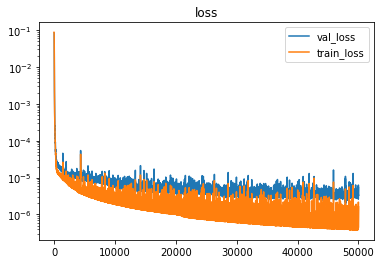

In [20]:
# Monitor learning process
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='train_loss')
plt.yscale('log')
plt.title('loss')
plt.legend()

In [21]:
model.save("my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model\assets


In [22]:
model2 = keras.models.load_model('my_model')

In [23]:
model2.evaluate(X_test_scaled, y_test_scaled) # Returns the loss value & metrics values for the model in test mode.

9/9 [==============================] - 0s 777us/step - loss: 1.8947e-06 - mean_squared_error: 1.5098e-06


[1.8947101807498257e-06, 1.5098225958354305e-06]

In [ ]:
"""
# parameters
input_dim = X_train.shape[1]
num_epochs = 50
num_neurons = 128
num_sigmoid = 8
# design the neural network model
model = Sequential()
model.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(num_neurons, activation='relu', kernel_initializer='random_normal', activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(1,activation='tanh')) # Output layer
#model.add(Dense(1,activation='relu')) # Output layer

# define the loss function and optimization algorithm
opt = keras.optimizers.Adam(learning_rate = 0.0005)
model.compile(loss=MeanAbsoluteError(), optimizer=opt, metrics=['mse'])

# ft the model on the training dataset
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=256, verbose=1)
# make predictions for the input data
y_predict = model.predict(X_test)
"""